In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
Accident_Data_Starter = 'US_Accidents_Dec20_Updated.csv'

In [3]:
Accident_Data_Starter_df = pd.read_csv(Accident_Data_Starter)

In [4]:
SevMapping_df = Accident_Data_Starter_df[['County', 'ID', 'Severity', 'Start_Lat', 'Start_Lng' ]]

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

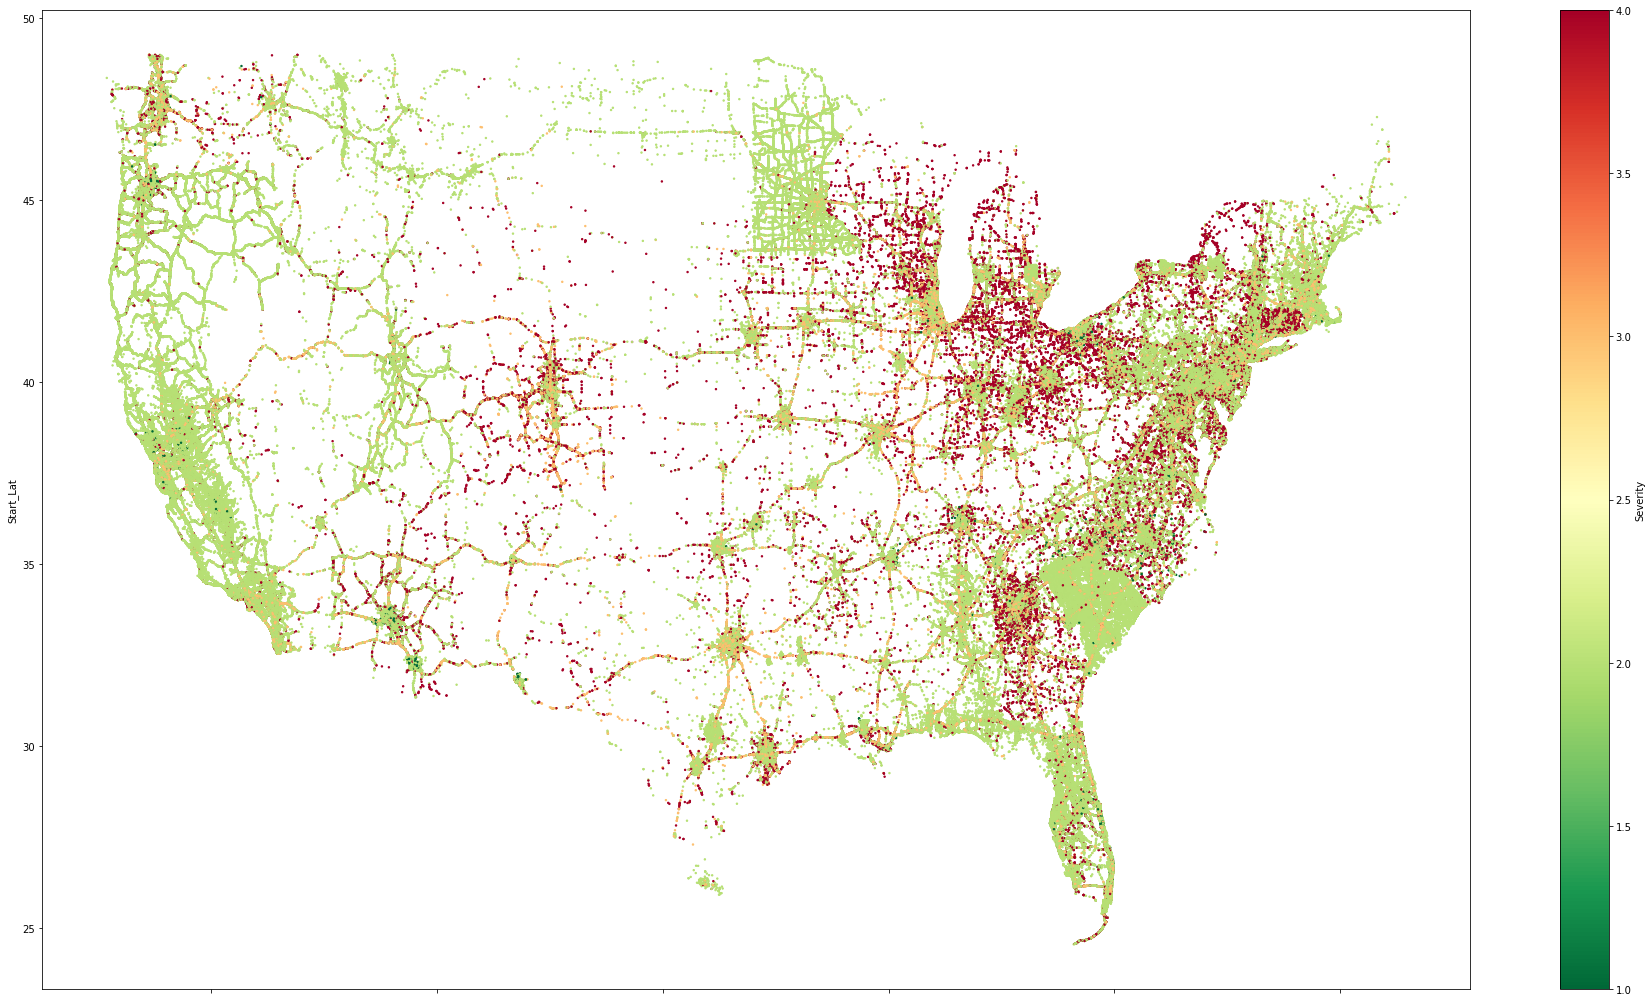

In [5]:
SevMapping_df.plot(y='Start_Lat', x='Start_Lng', kind = 'scatter', figsize= [32,18], c='Severity', colormap= 'RdYlGn_r', s=2, xlabel='', ylabel='')

In [6]:
CountyData_df = pd.read_csv('CountyData.csv')

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
CountyData_df

STATE,C,2 CWA,C,9 COUNTYNAME,C,24  FIPS,C,5 TIME_ZONE,C,2 FE_AREA,C,2  \
0              ME     CAR      Washington   23029.0             E          se   
1              GA     CHS        McIntosh   13191.0             E          se   
2              GA     CHS         Liberty   13179.0             E          se   
3              AS     PPG   Swains Island   60040.0             S         NaN   
4              AS     PPG          Manu'a   60020.0             S         NaN   
...           ...     ...             ...       ...           ...         ...   
1048570       NaN     NaN             NaN       NaN           NaN         NaN   
1048571       NaN     NaN             NaN       NaN           NaN         NaN   
1048572       NaN     NaN             NaN       NaN           NaN         NaN   
1048573       NaN     NaN             NaN       NaN           NaN         NaN   
1048574       NaN     NaN             NaN       NaN           NaN         NaN   

         LON,N,19,11  LAT,N,19,11  
0           -67.6361      45.0363  
1           -81.2646      31.5329  
2           -81.2103      31.7093  
3          -171.0459     -11.0843  
4          -169.5060     -14.2219  
...              ...          ...  
1048570          NaN          NaN  
1048571          NaN          NaN  
1048572          NaN          NaN  
1048573          NaN          NaN  
1048574          NaN          NaN  

[1048575 rows x 8 columns]

In [11]:
CountyData_df = CountyData_df.rename(columns={'COUNTYNAME,C,24': 'County', 'STATE,C,2' : 'State', 'LON,N,19,11':'Lng', 'LAT,N,19,11':'Lat'})
CountyData_df

State CWA,C,9         County  FIPS,C,5 TIME_ZONE,C,2 FE_AREA,C,2  \
0          ME     CAR     Washington   23029.0             E          se   
1          GA     CHS       McIntosh   13191.0             E          se   
2          GA     CHS        Liberty   13179.0             E          se   
3          AS     PPG  Swains Island   60040.0             S         NaN   
4          AS     PPG         Manu'a   60020.0             S         NaN   
...       ...     ...            ...       ...           ...         ...   
1048570   NaN     NaN            NaN       NaN           NaN         NaN   
1048571   NaN     NaN            NaN       NaN           NaN         NaN   
1048572   NaN     NaN            NaN       NaN           NaN         NaN   
1048573   NaN     NaN            NaN       NaN           NaN         NaN   
1048574   NaN     NaN            NaN       NaN           NaN         NaN   

              Lng      Lat  
0        -67.6361  45.0363  
1        -81.2646  31.5329  
2        -81.2103  31.7093  
3       -171.0459 -11.0843  
4       -169.5060 -14.2219  
...           ...      ...  
1048570       NaN      NaN  
1048571       NaN      NaN  
1048572       NaN      NaN  
1048573       NaN      NaN  
1048574       NaN      NaN  

[1048575 rows x 8 columns]

In [10]:
County_Acc_df = Accident_Data_Starter_df[['ID', 'Severity', 'County', 'State']]
County_Acc_df

ID  Severity          County State
0              A-1         2      Greenville    SC
1              A-2         2     Mecklenburg    NC
2              A-3         2     Santa Clara    CA
3              A-4         2         Douglas    NV
4              A-5         3         Broward    FL
...            ...       ...             ...   ...
2906605  A-2906606         2          Harris    TX
2906606  A-2906607         2  San Bernardino    CA
2906607  A-2906608         2      Miami-Dade    FL
2906608  A-2906609         2       Salt Lake    UT
2906609  A-2906610         2         El Paso    CO

[2906610 rows x 4 columns]

In [13]:
join_df = pd.merge(County_Acc_df, CountyData_df, how = 'left', on = ['County', 'State'])

In [15]:
join_df.dropna()

ID  Severity          County State    CWA,C,9  FIPS,C,5  \
0              A-1         2      Greenville    SC        GSP   45045.0   
1              A-2         2     Mecklenburg    NC        GSP   37119.0   
2              A-3         2     Santa Clara    CA        MTR    6085.0   
3              A-4         2         Douglas    NV        REV   32005.0   
4              A-5         3         Broward    FL        MFL   12011.0   
...            ...       ...             ...   ...        ...       ...   
3131714  A-2906606         2          Harris    TX        HGX   48201.0   
3131715  A-2906607         2  San Bernardino    CA  VEFSGXPSR    6071.0   
3131716  A-2906608         2      Miami-Dade    FL        MFL   12086.0   
3131717  A-2906609         2       Salt Lake    UT        SLC   49035.0   
3131718  A-2906610         2         El Paso    CO        PUB    8041.0   

        TIME_ZONE,C,2 FE_AREA,C,2       Lng      Lat  
0                   E          up  -82.3708  34.8944  
1                   E          pd  -80.8328  35.2468  
2                   P          nn -121.6963  37.2325  
3                   P          ww -119.6164  38.9123  
4                   E          se  -80.4886  26.1519  
...               ...         ...       ...      ...  
3131714             C          se  -95.1819  29.7371  
3131715             P          ss -116.1784  34.8415  
3131716             E          se  -80.5682  25.6171  
3131717             M          nn -111.9239  40.6676  
3131718             M          ec -104.5256  38.8321  

[3042880 rows x 10 columns]

In [16]:
join_df['County'] = join_df['County'] + ' ' + join_df['State']

In [20]:
CountyGroup_df = join_df.groupby(['County'])
print(CountyGroup_df)

In [26]:
CountyGroup_df

In [22]:
join_df['Mean'] = CountyGroup_df['Severity'].mean() 

In [ ]:
CountyGroup_df['Mean'] = CountyGroup_df['Severity'].mean()

In [25]:
join_df

ID  Severity             County State    CWA,C,9  FIPS,C,5  \
0              A-1         2      Greenville SC    SC        GSP   45045.0   
1              A-2         2     Mecklenburg NC    NC        GSP   37119.0   
2              A-3         2     Santa Clara CA    CA        MTR    6085.0   
3              A-4         2         Douglas NV    NV        REV   32005.0   
4              A-5         3         Broward FL    FL        MFL   12011.0   
...            ...       ...                ...   ...        ...       ...   
3131714  A-2906606         2          Harris TX    TX        HGX   48201.0   
3131715  A-2906607         2  San Bernardino CA    CA  VEFSGXPSR    6071.0   
3131716  A-2906608         2      Miami-Dade FL    FL        MFL   12086.0   
3131717  A-2906609         2       Salt Lake UT    UT        SLC   49035.0   
3131718  A-2906610         2         El Paso CO    CO        PUB    8041.0   

        TIME_ZONE,C,2 FE_AREA,C,2       Lng      Lat  Mean  
0                   E          up  -82.3708  34.8944   NaN  
1                   E          pd  -80.8328  35.2468   NaN  
2                   P          nn -121.6963  37.2325   NaN  
3                   P          ww -119.6164  38.9123   NaN  
4                   E          se  -80.4886  26.1519   NaN  
...               ...         ...       ...      ...   ...  
3131714             C          se  -95.1819  29.7371   NaN  
3131715             P          ss -116.1784  34.8415   NaN  
3131716             E          se  -80.5682  25.6171   NaN  
3131717             M          nn -111.9239  40.6676   NaN  
3131718             M          ec -104.5256  38.8321   NaN  

[3131719 rows x 11 columns]

C:\Users\Owner\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


KeyboardInterrupt: 

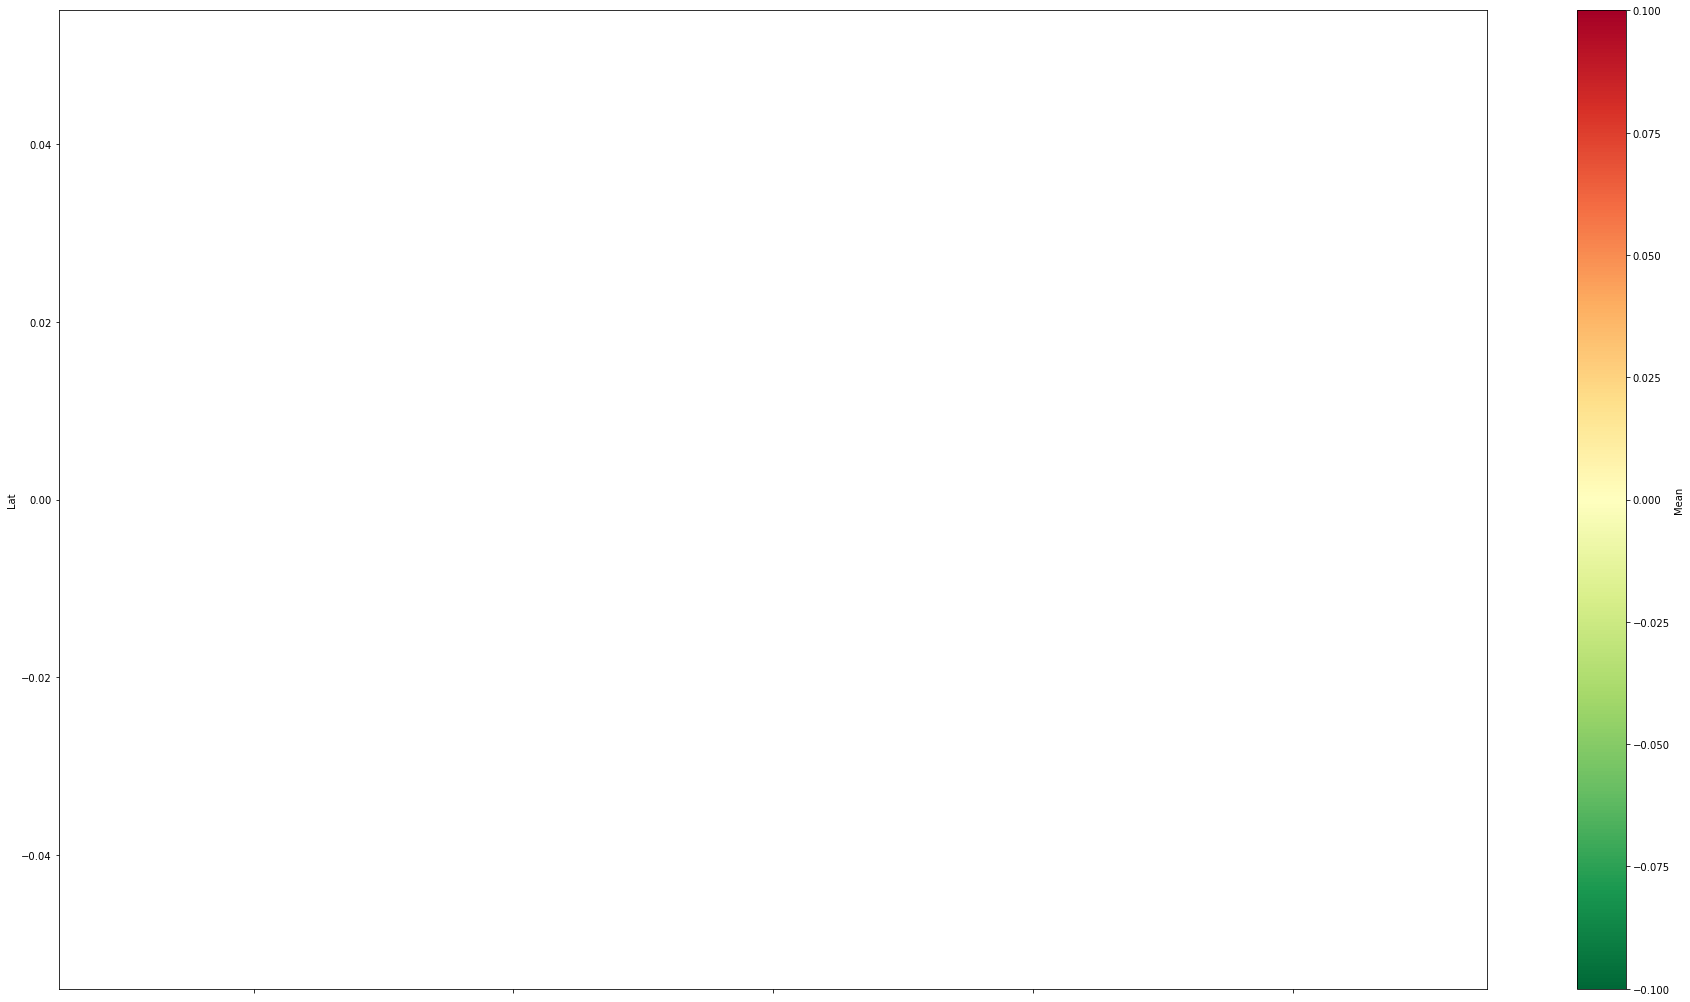

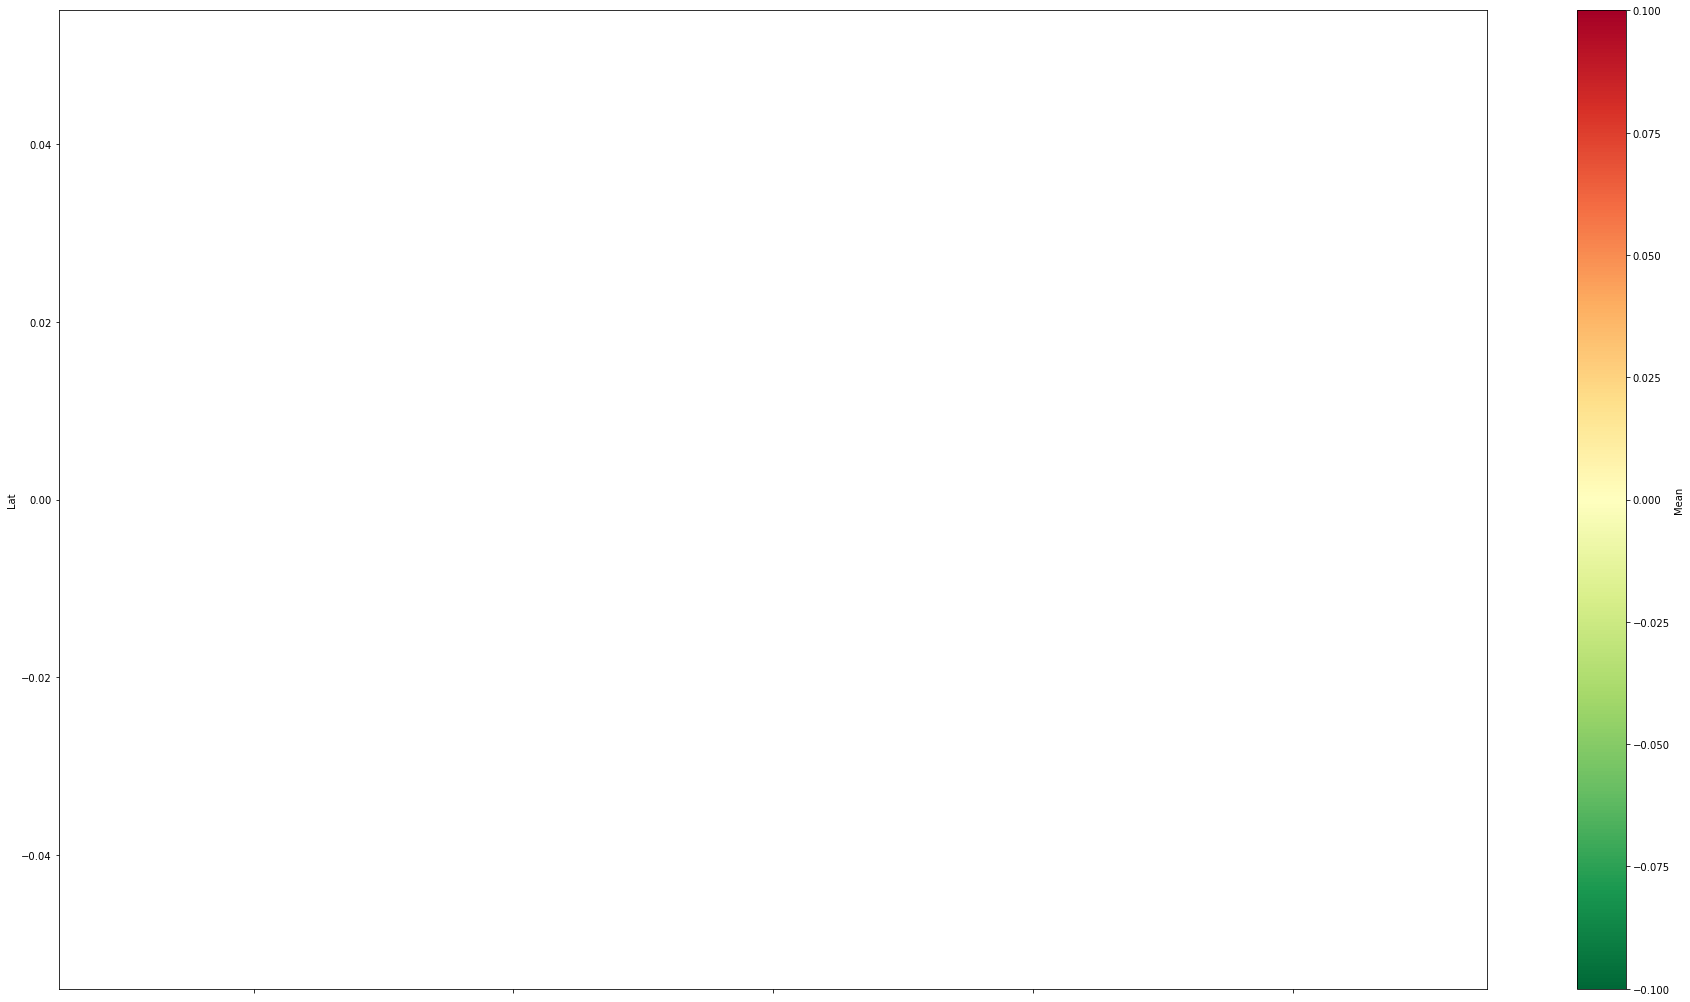

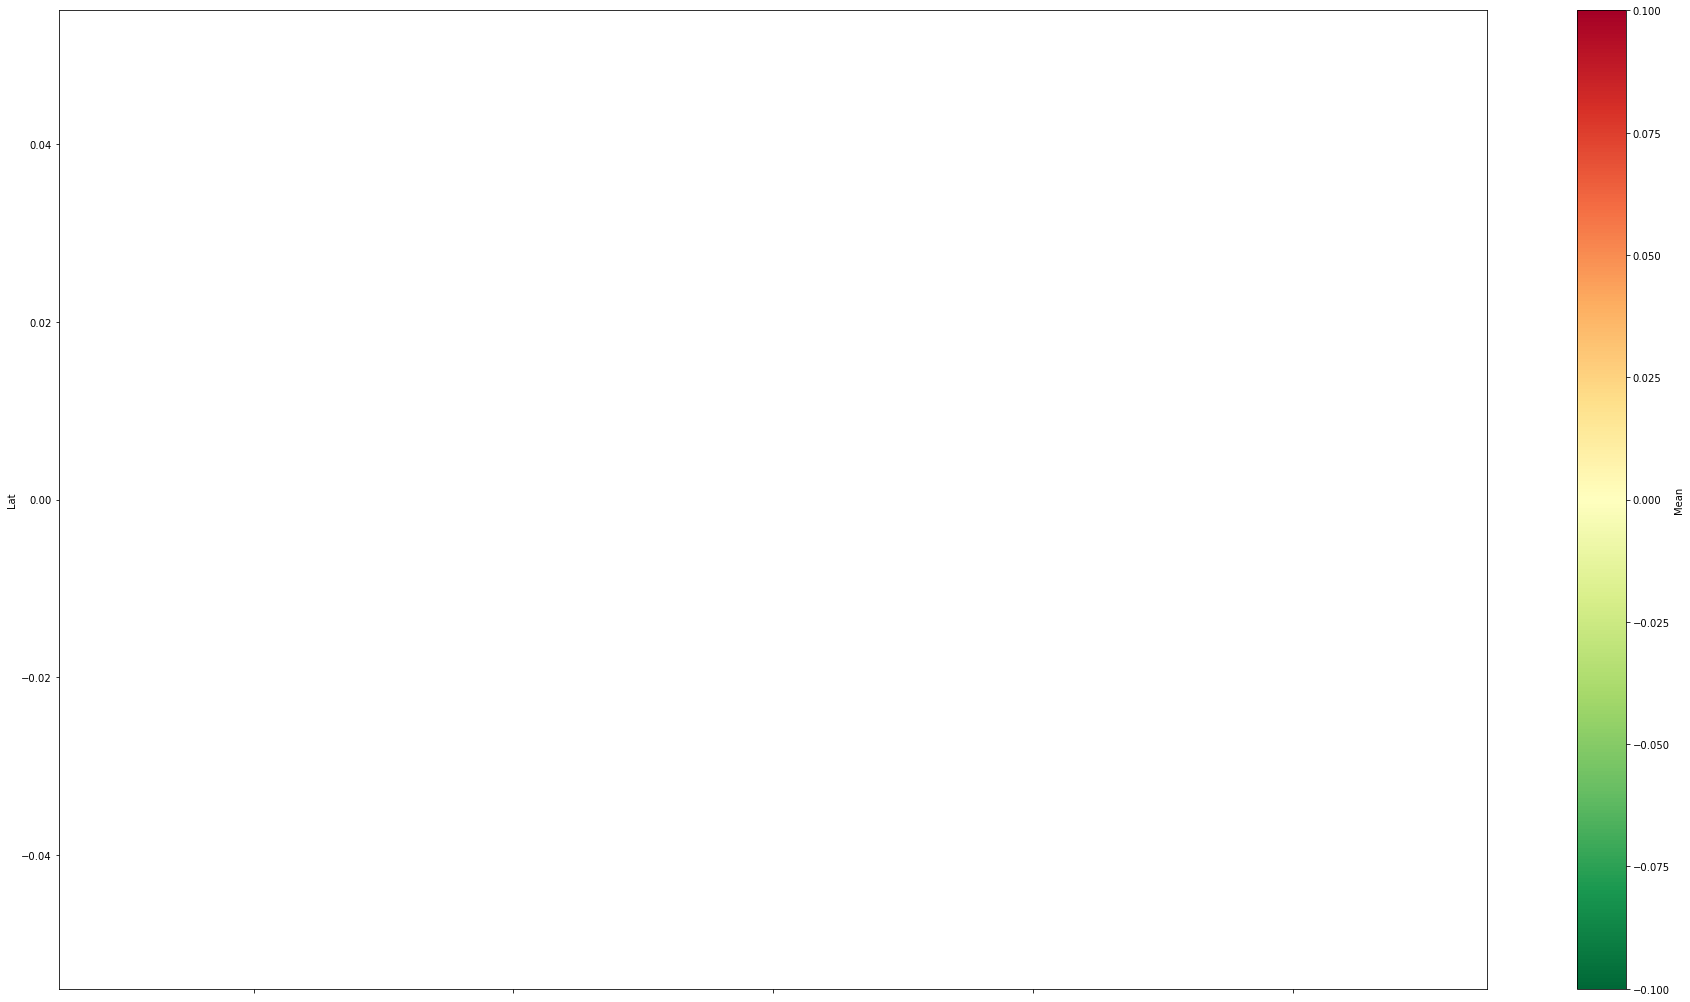

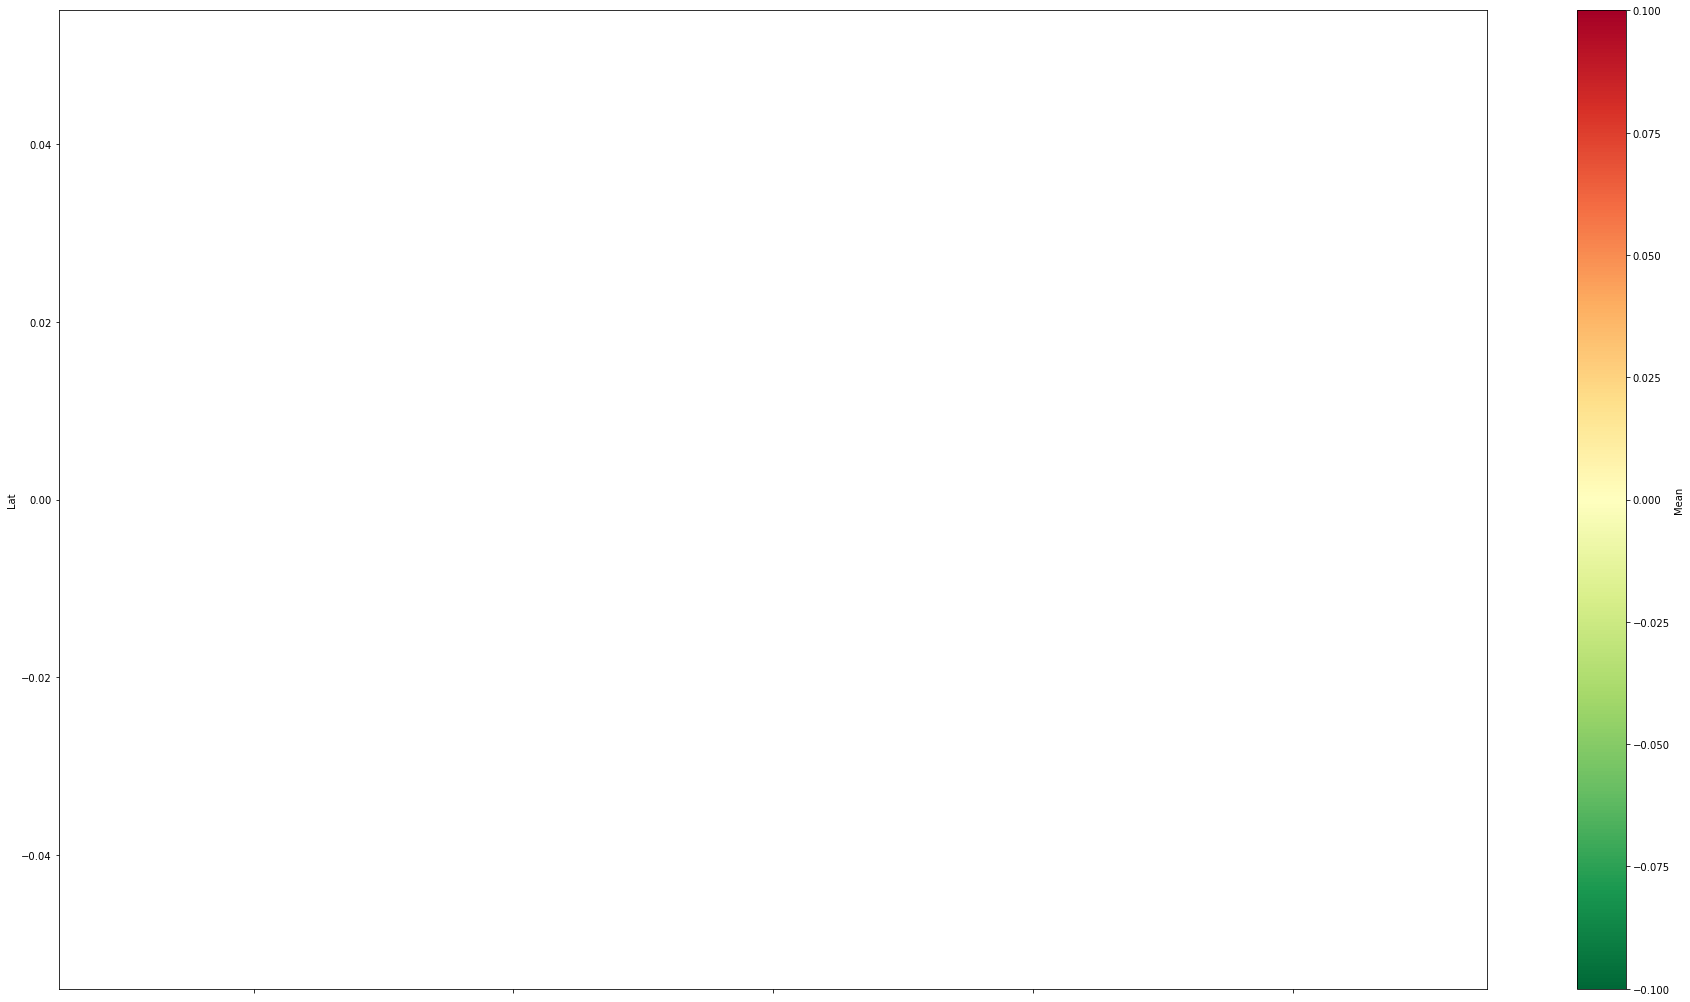

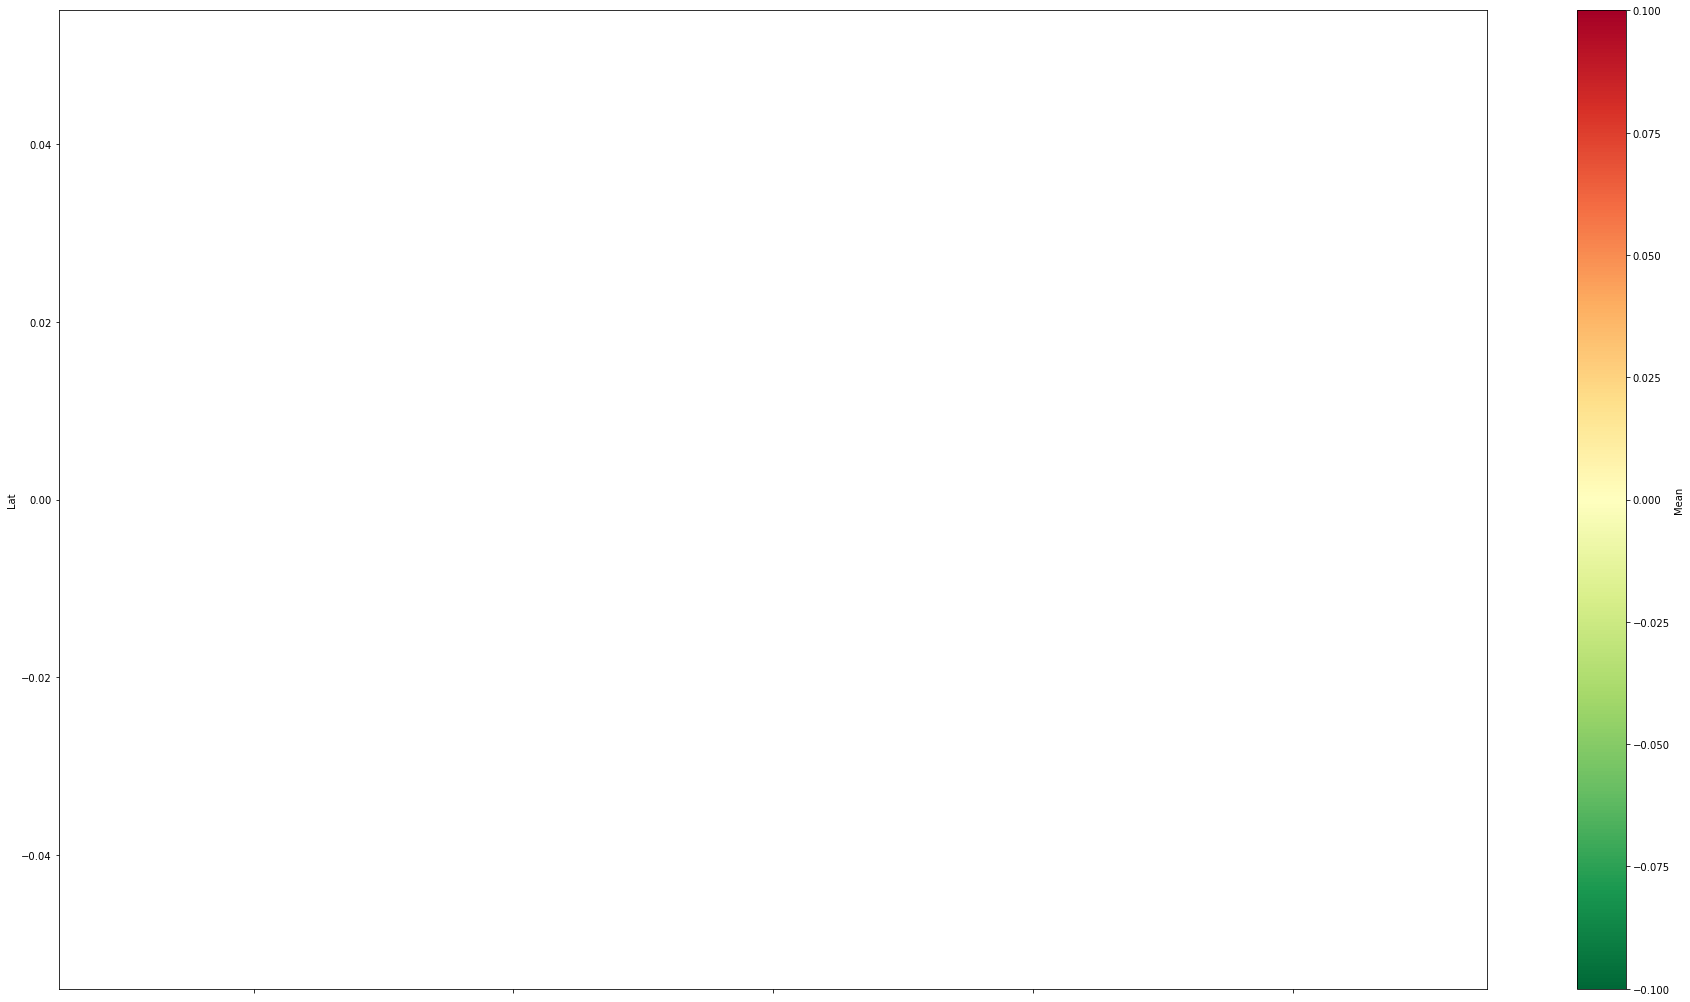

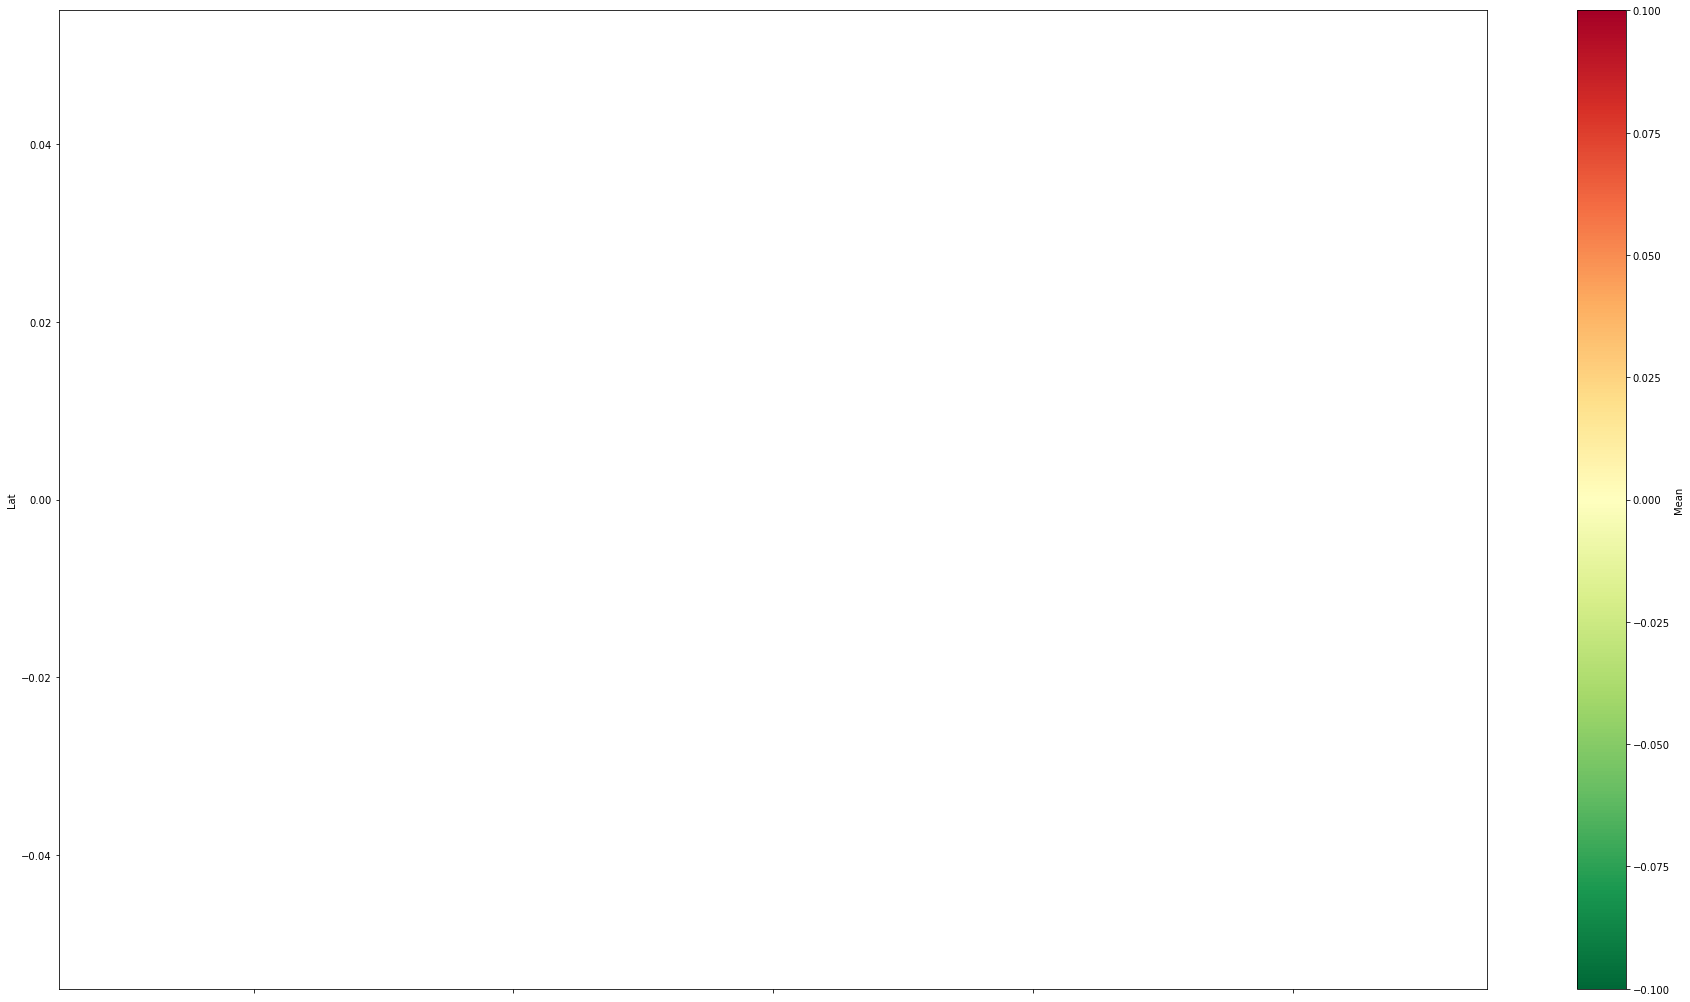

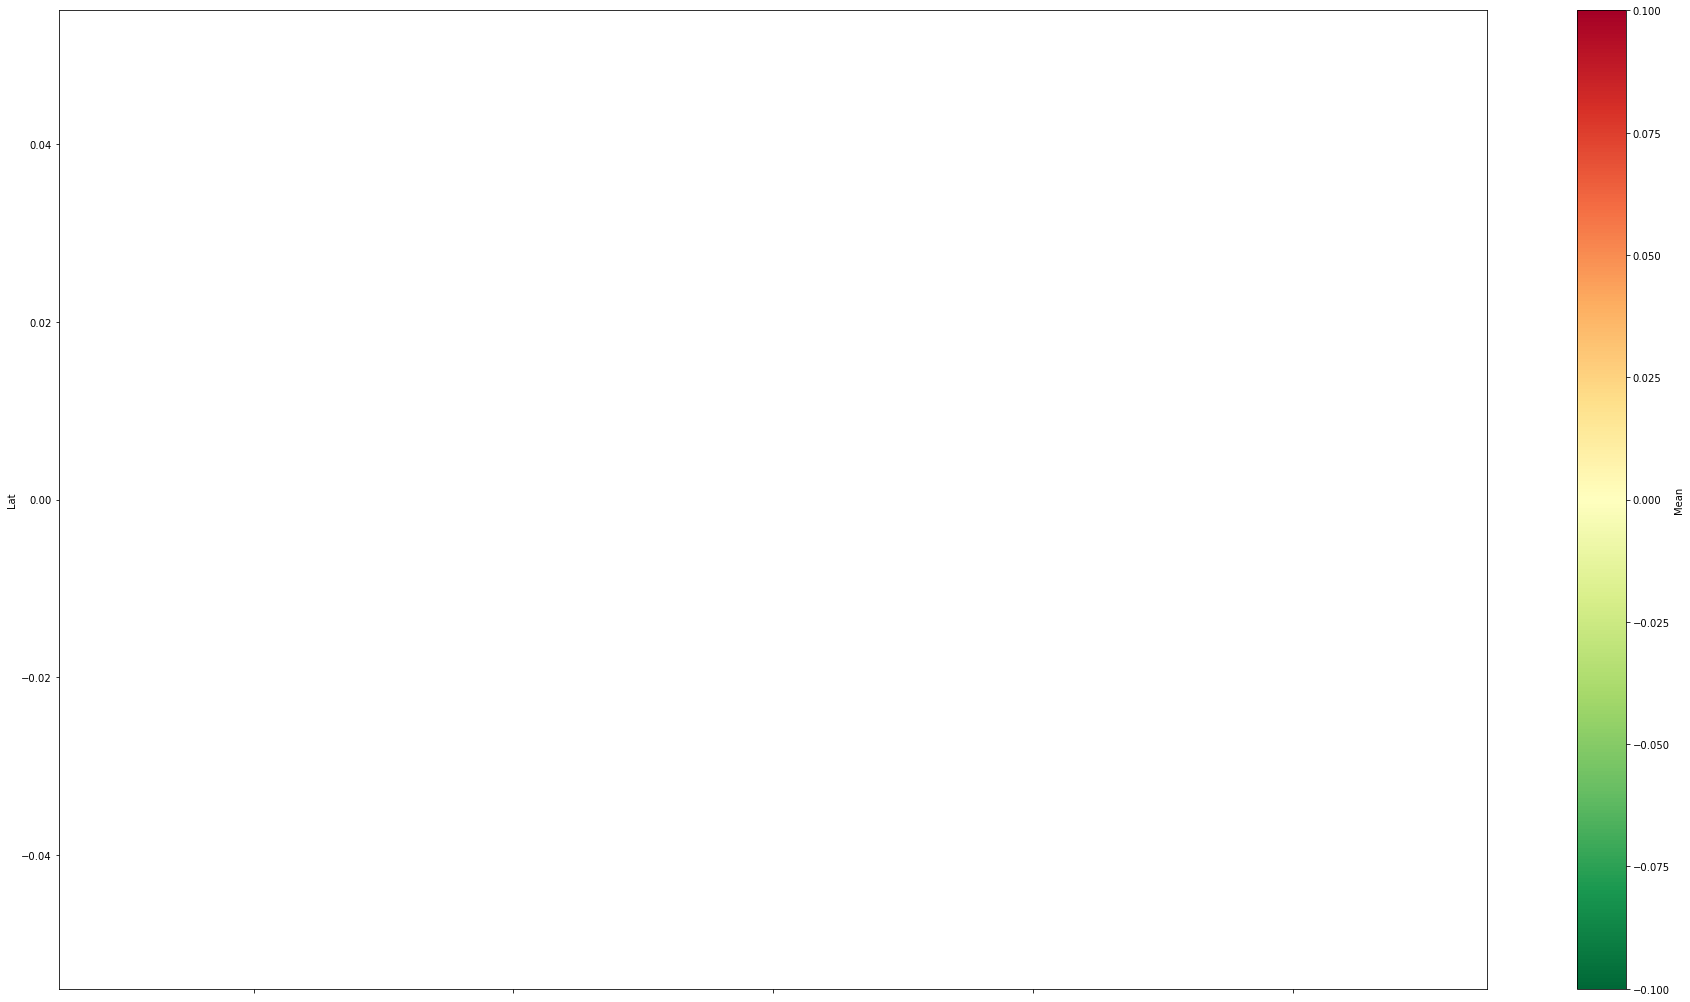

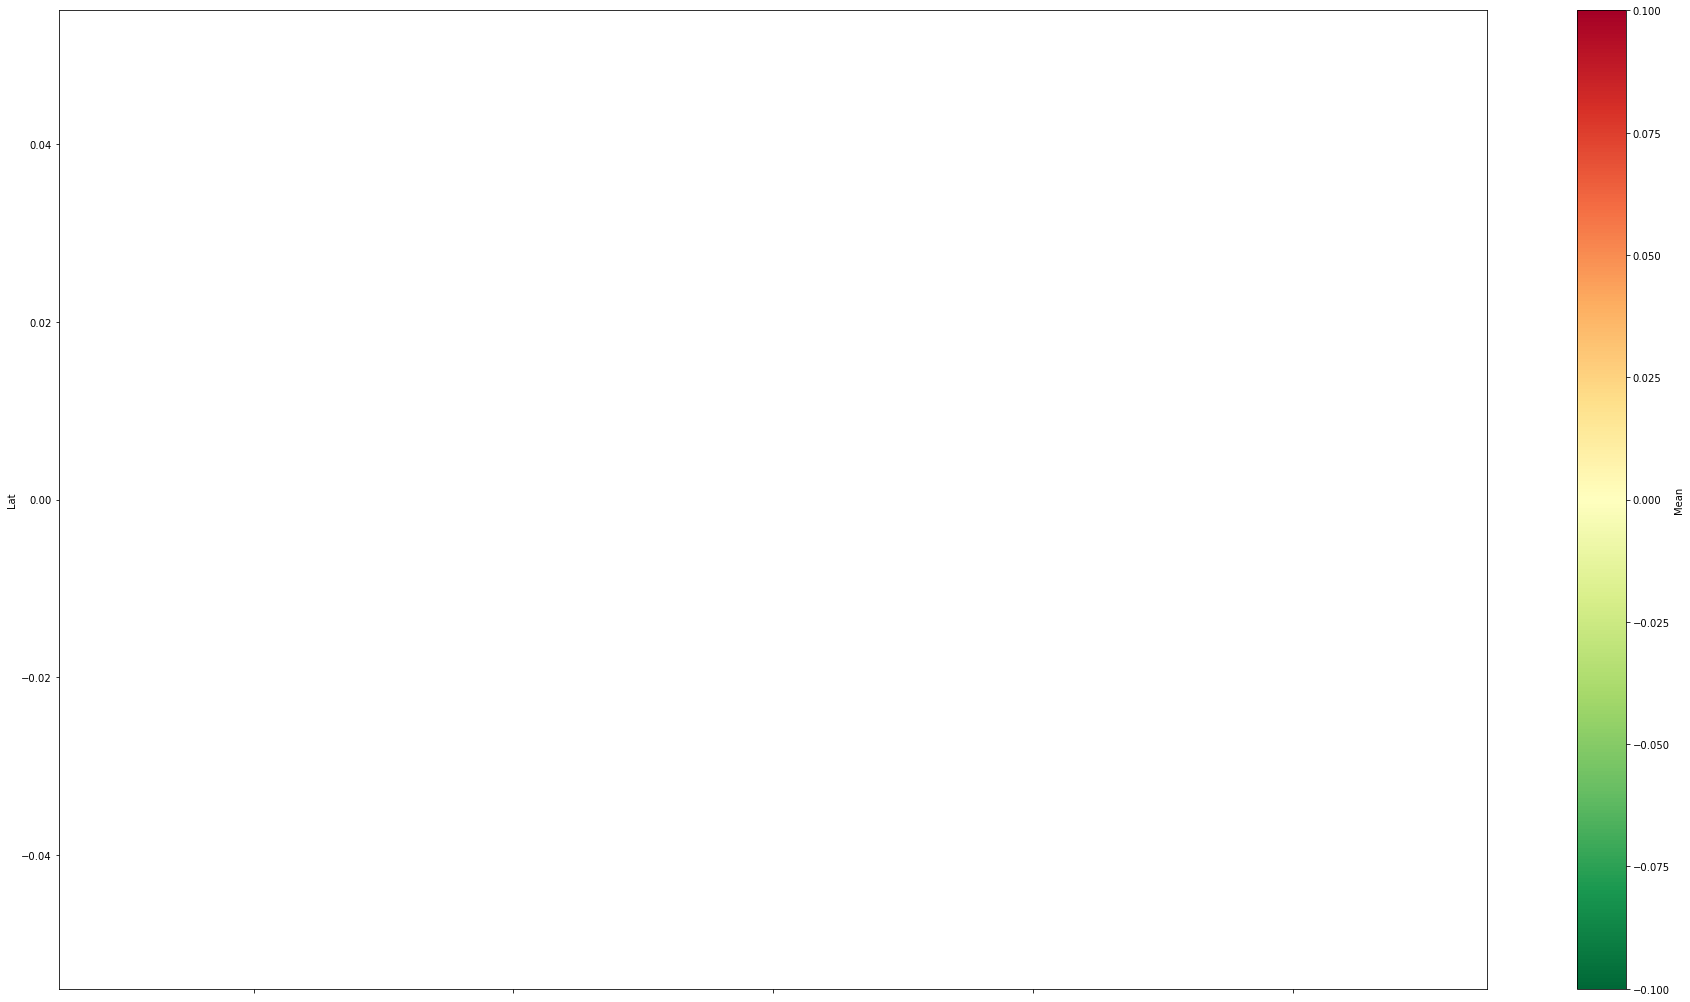

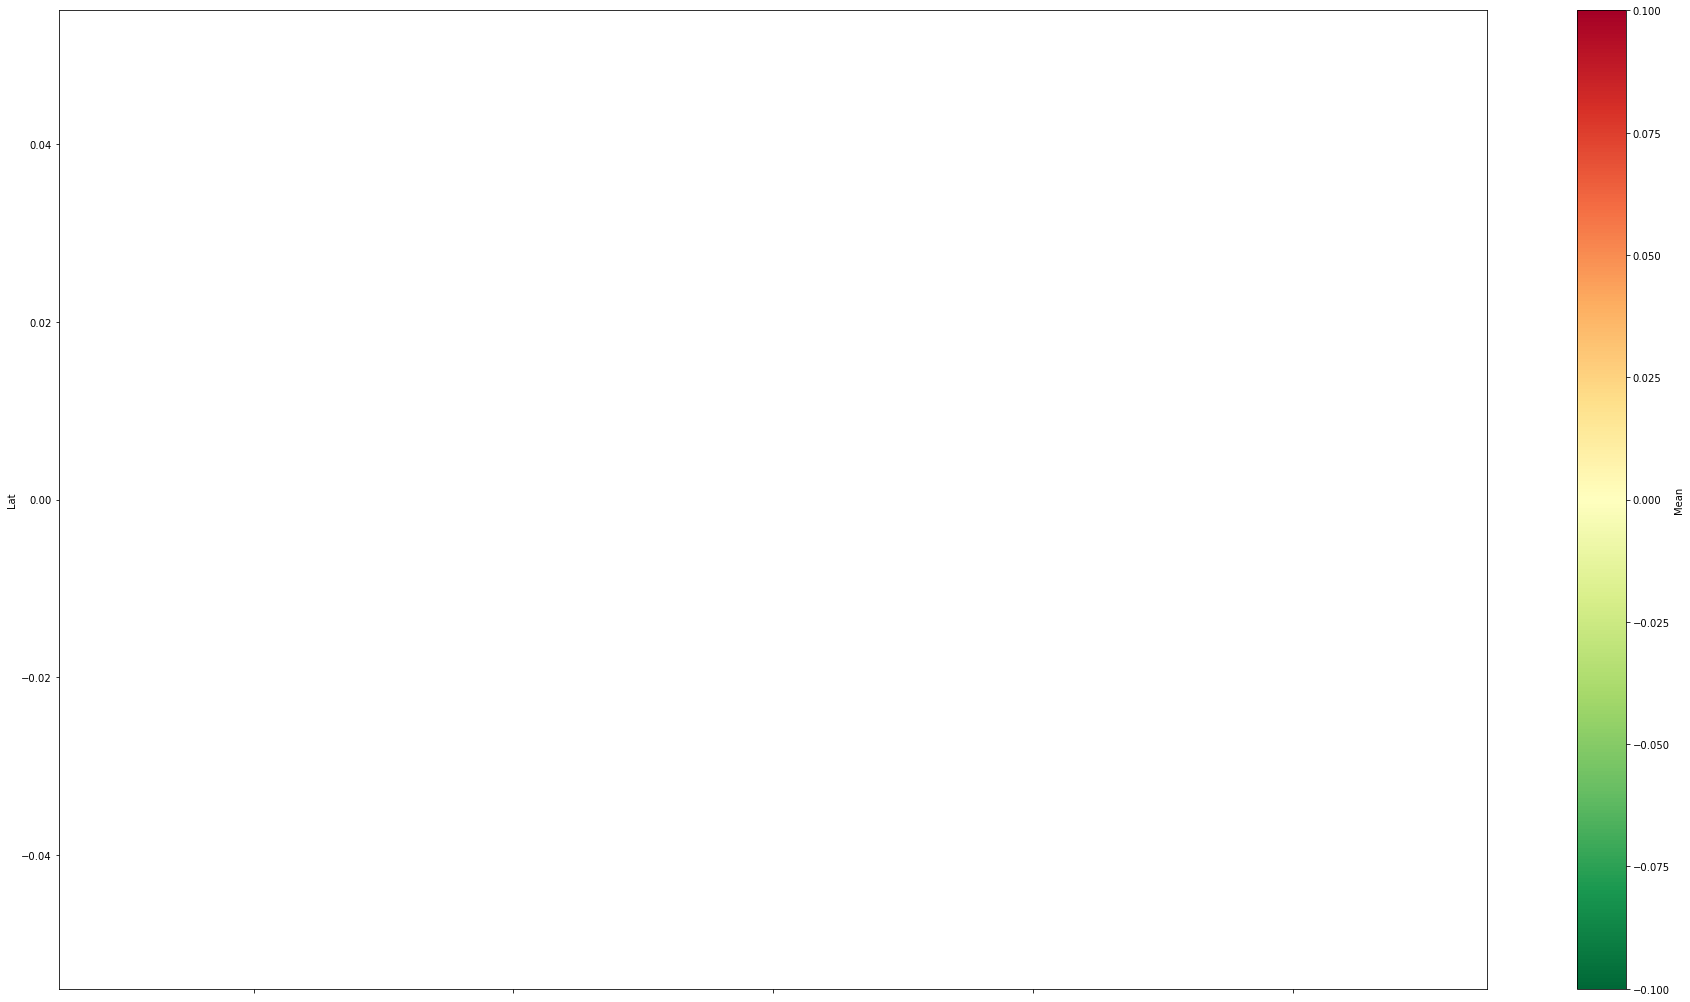

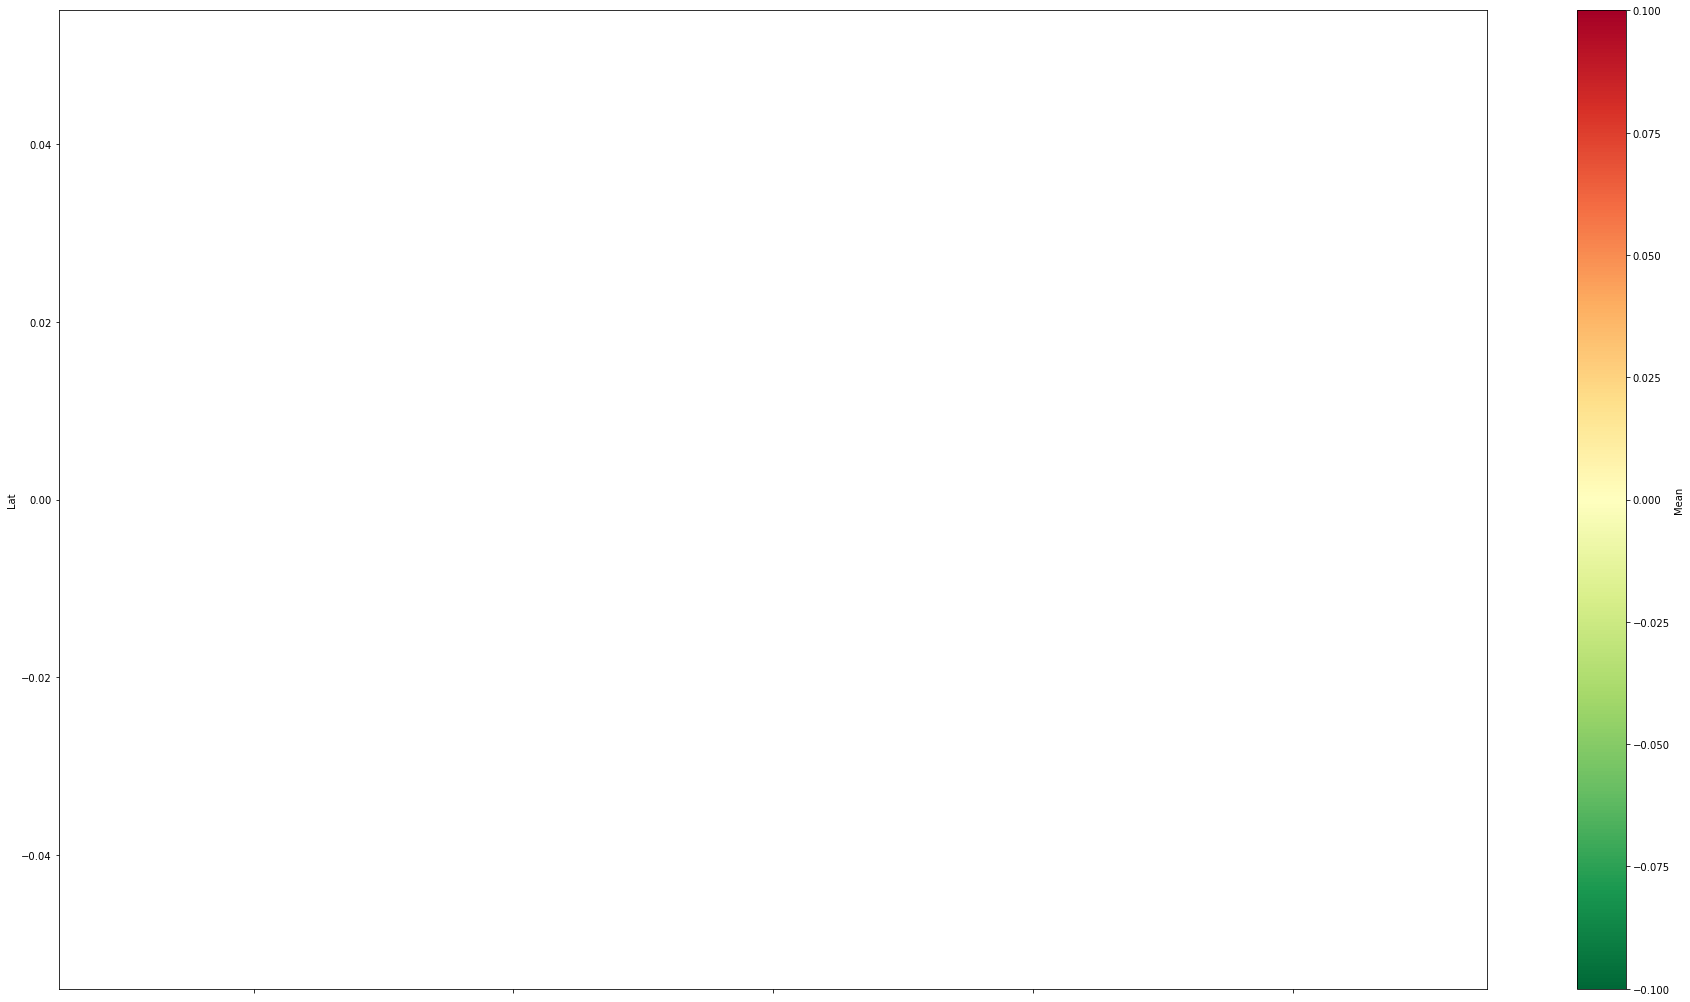

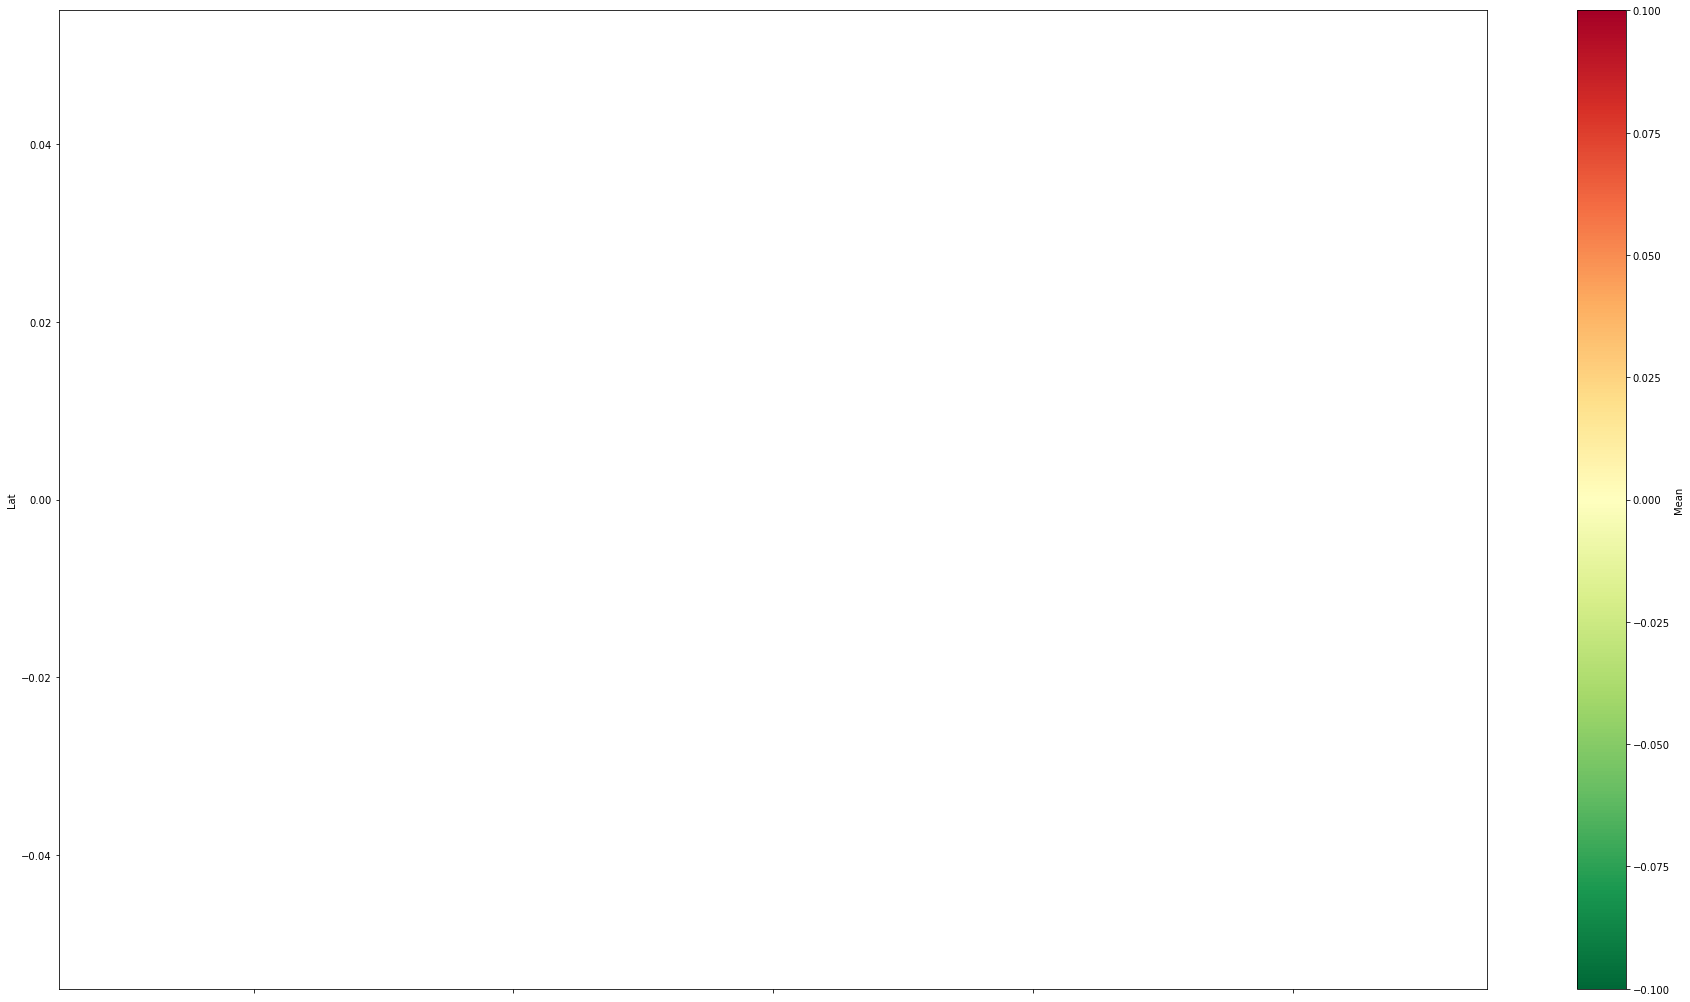

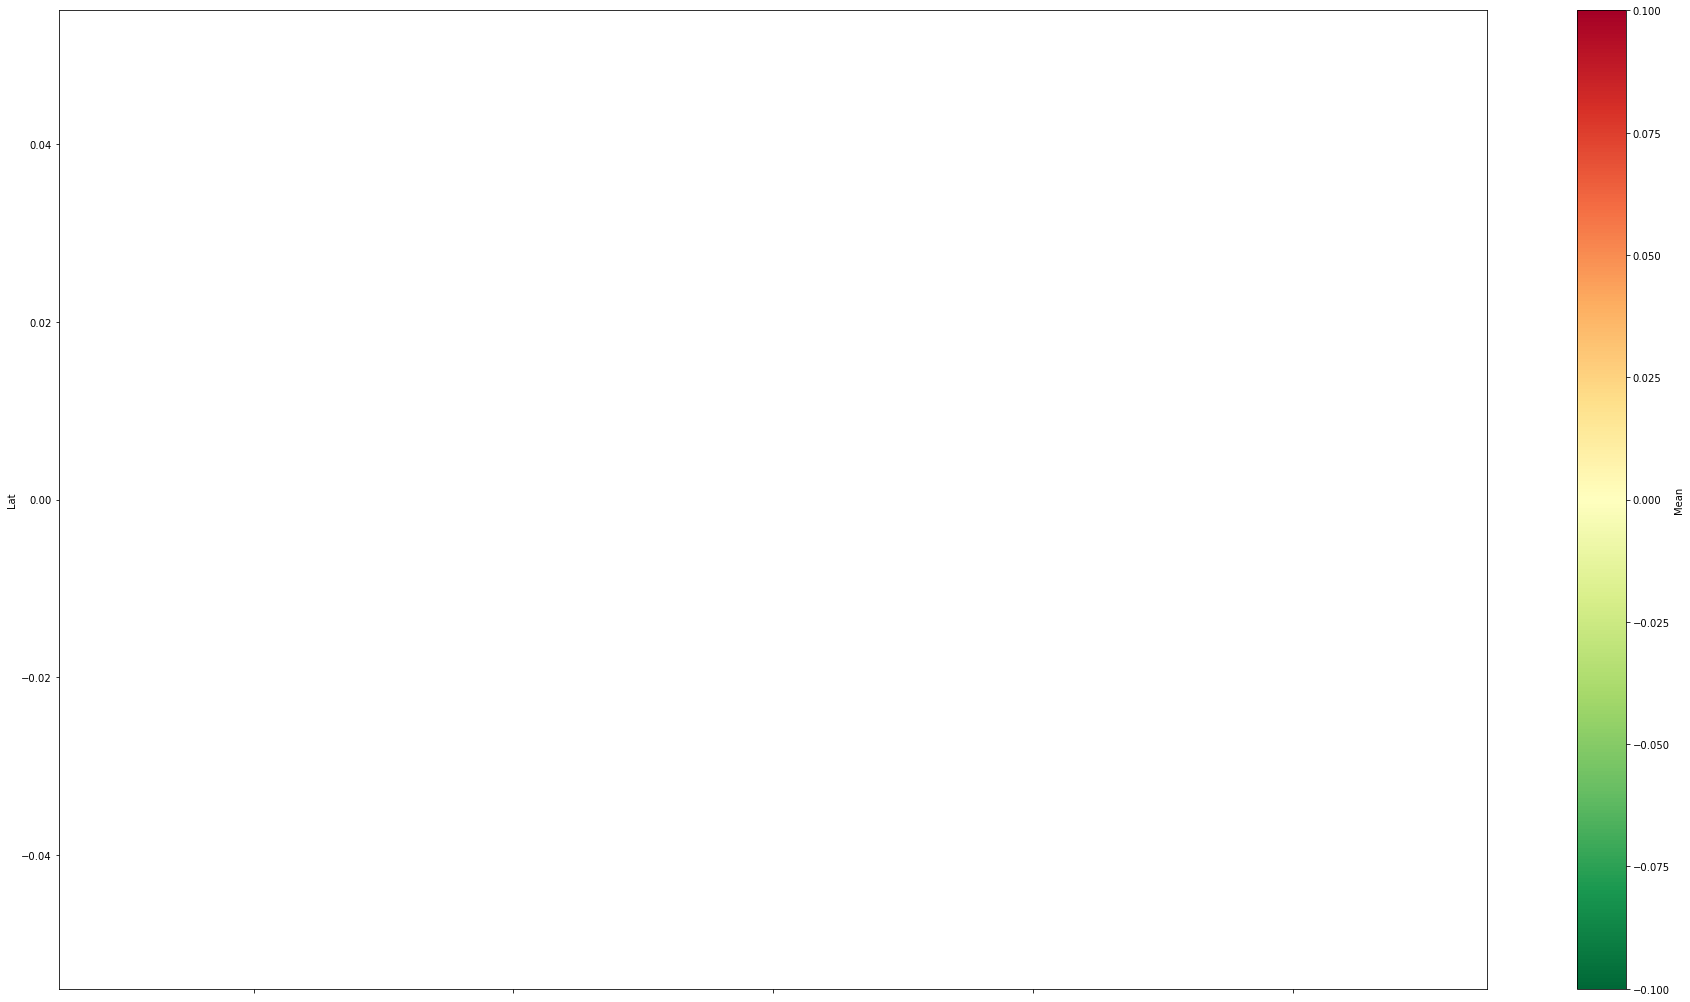

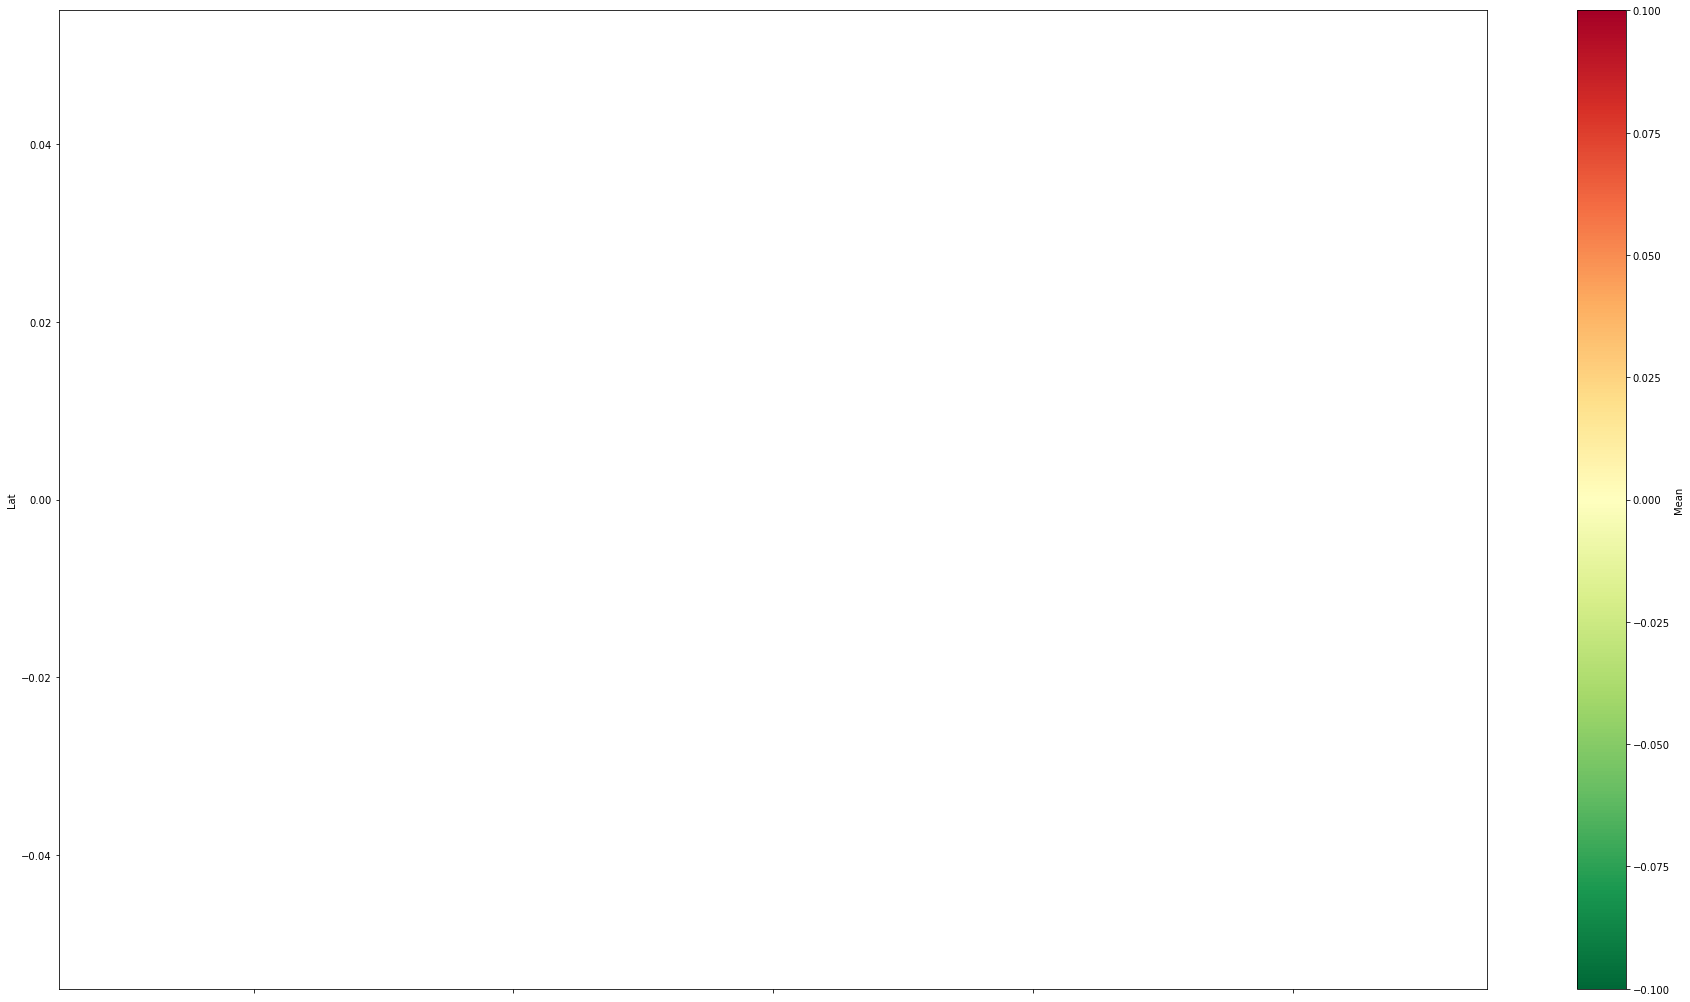

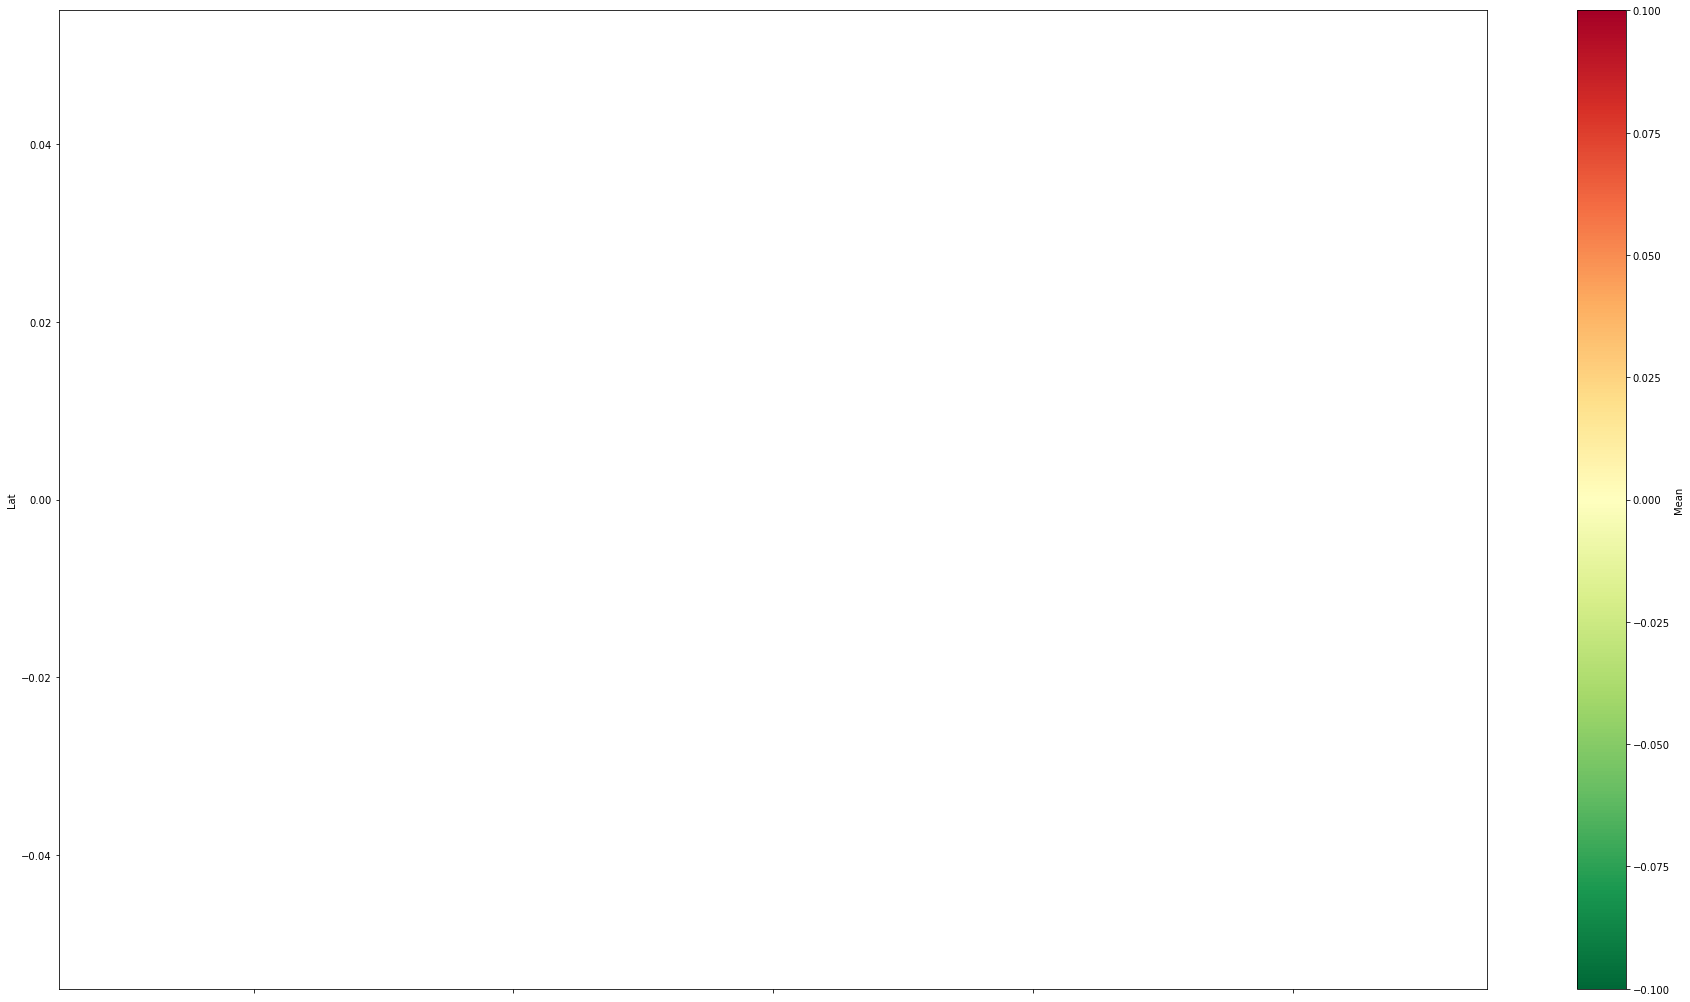

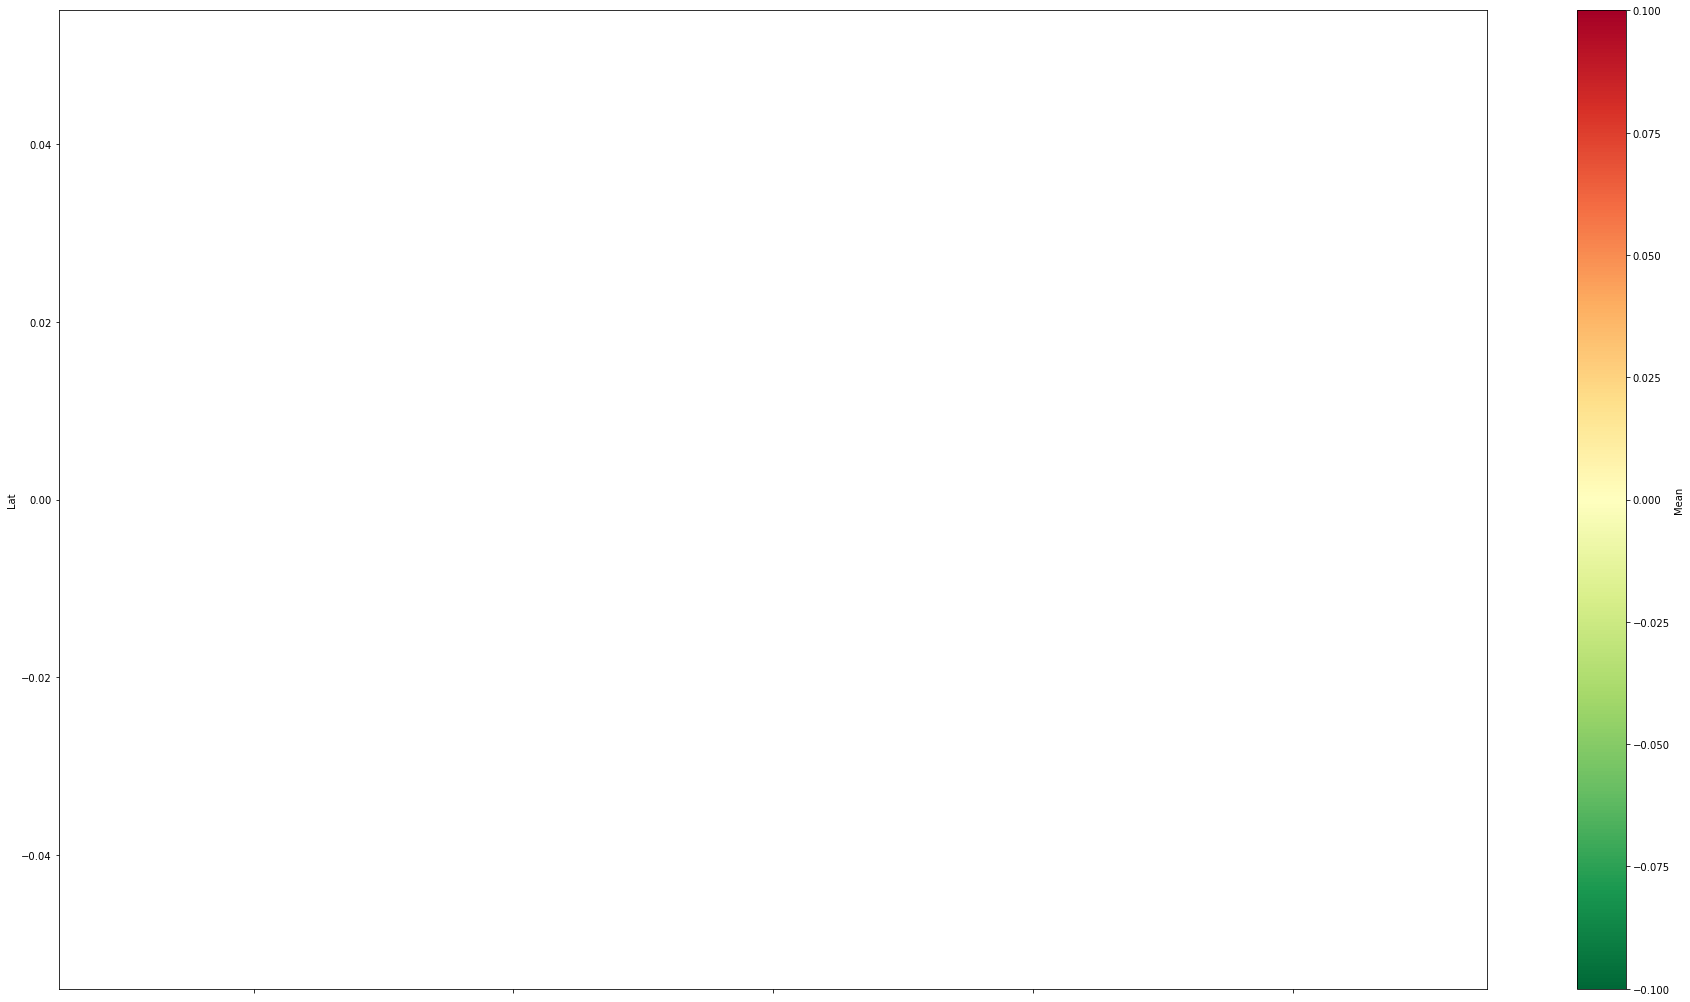

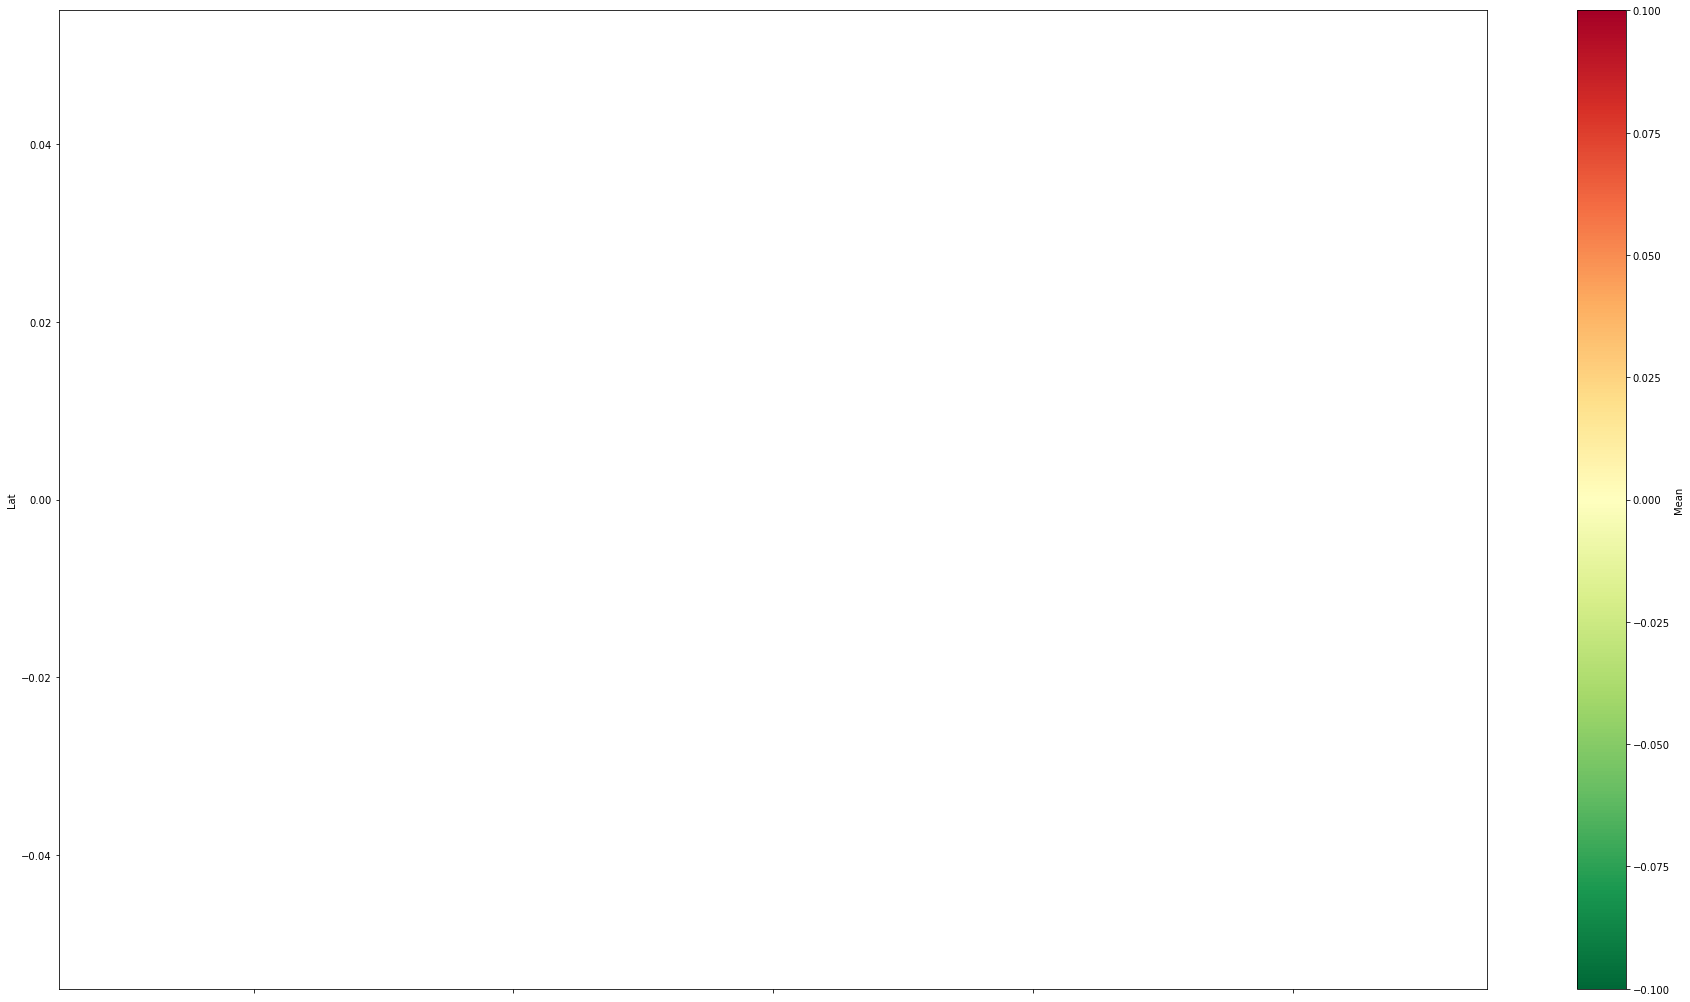

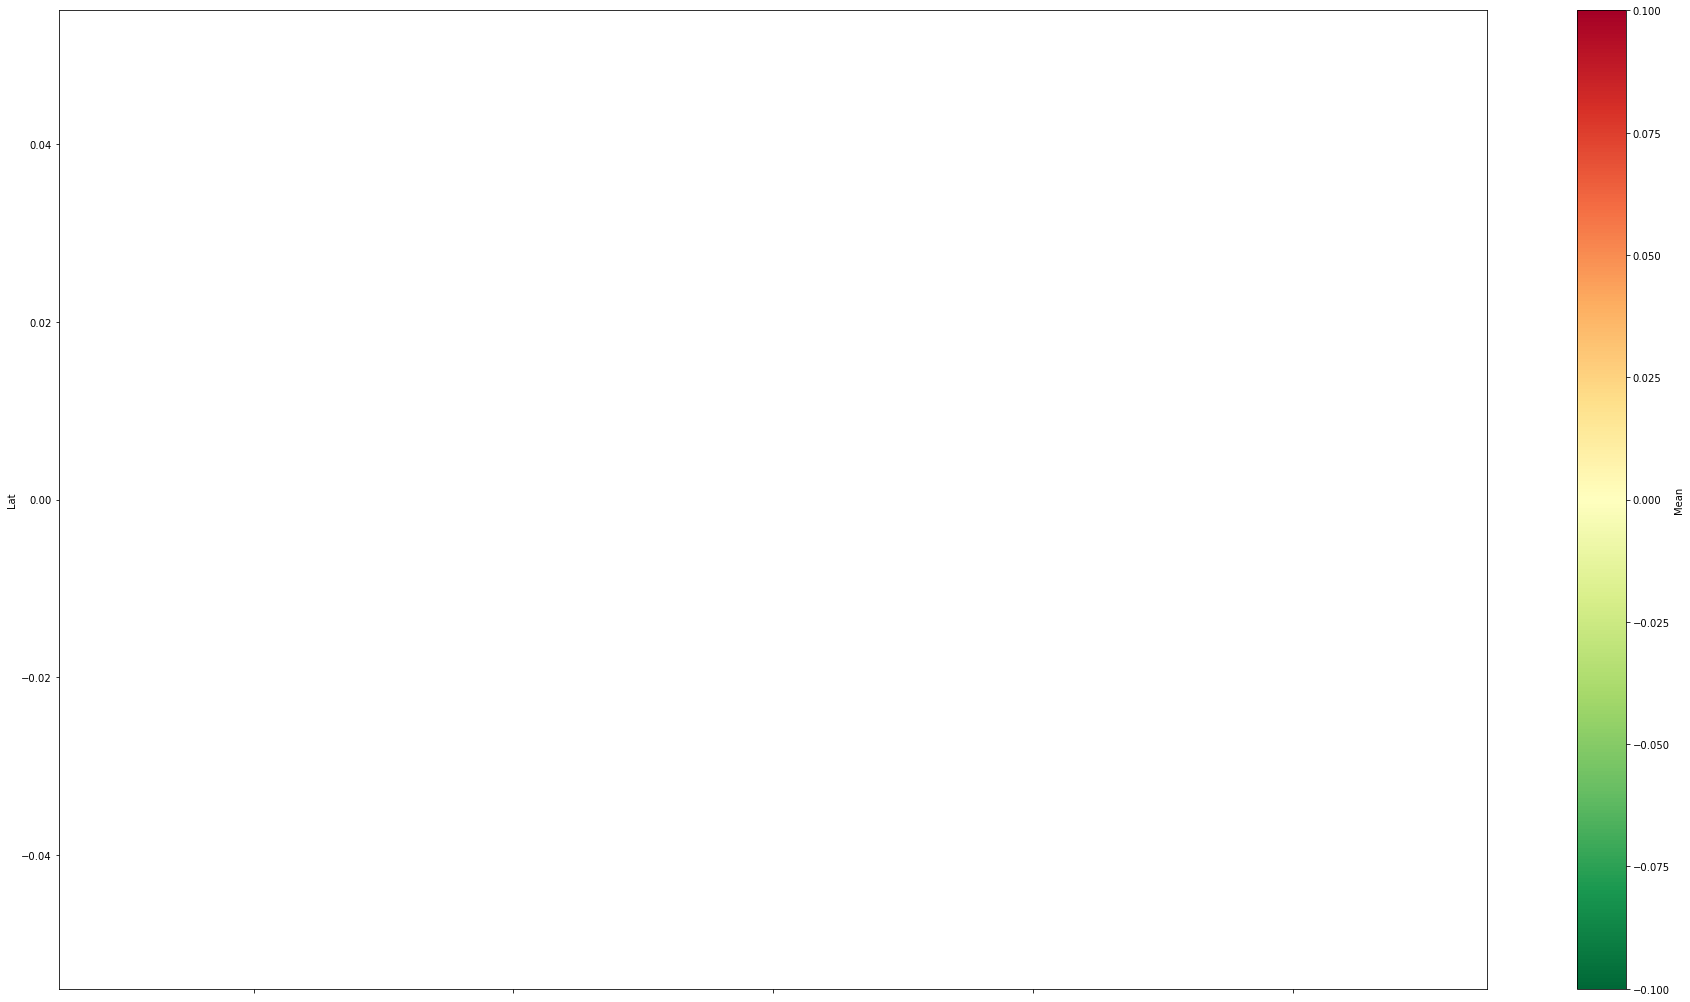

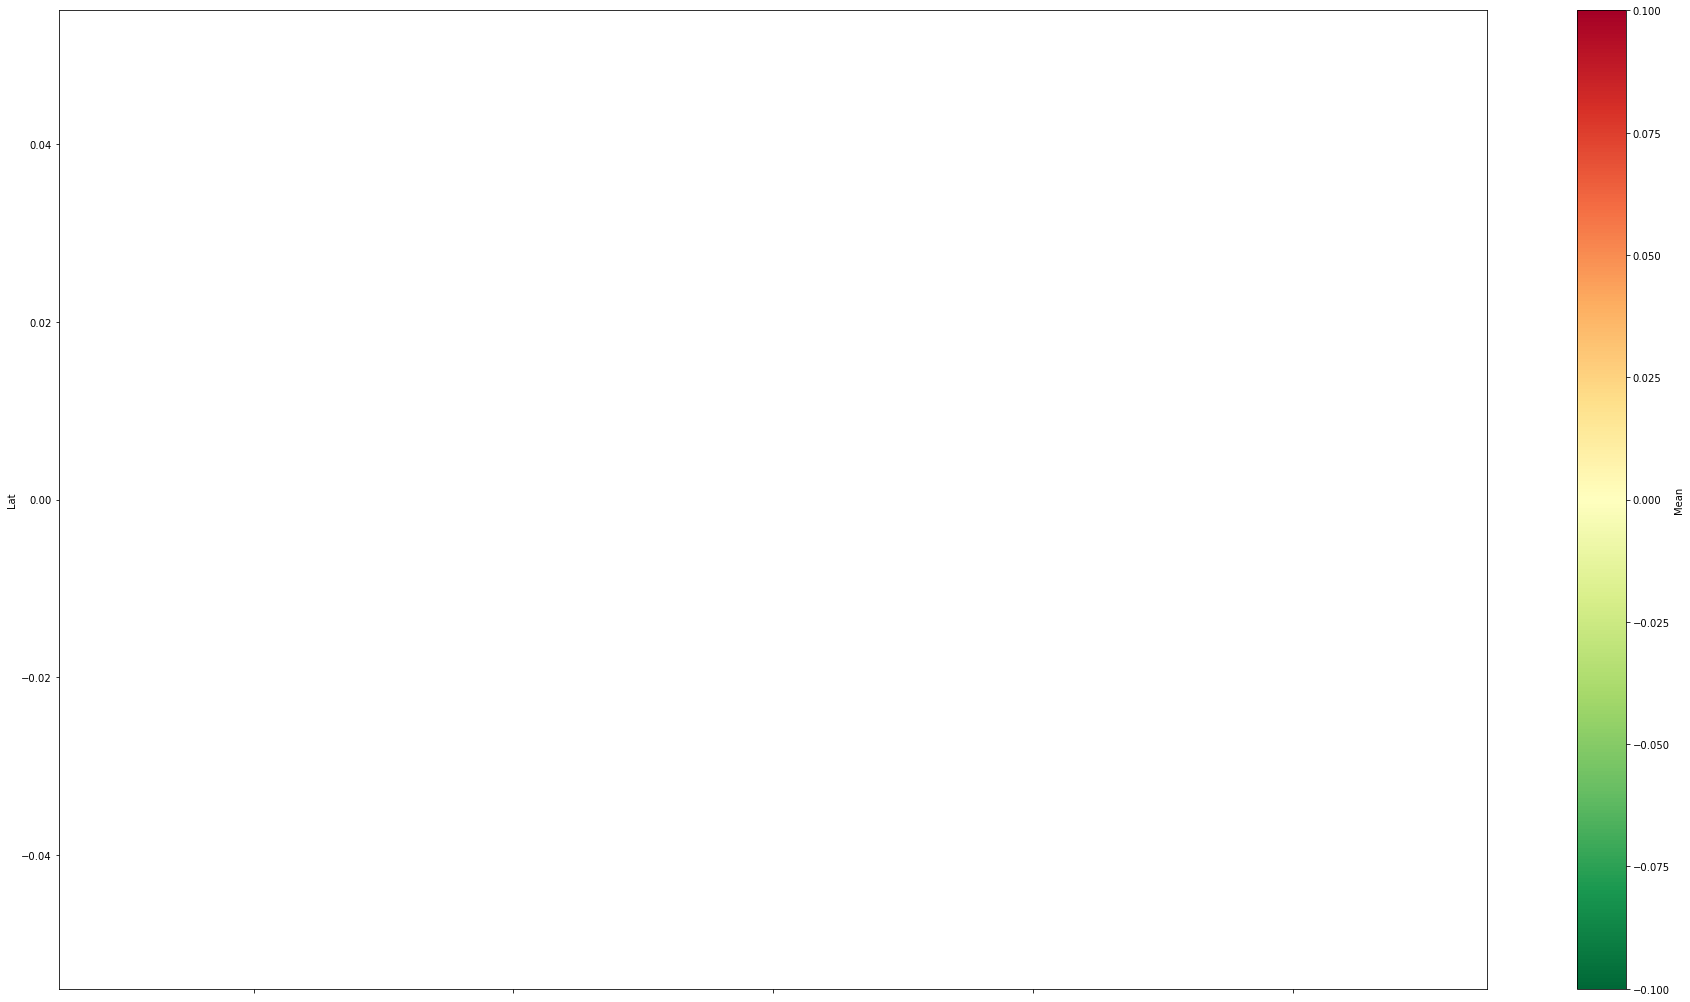

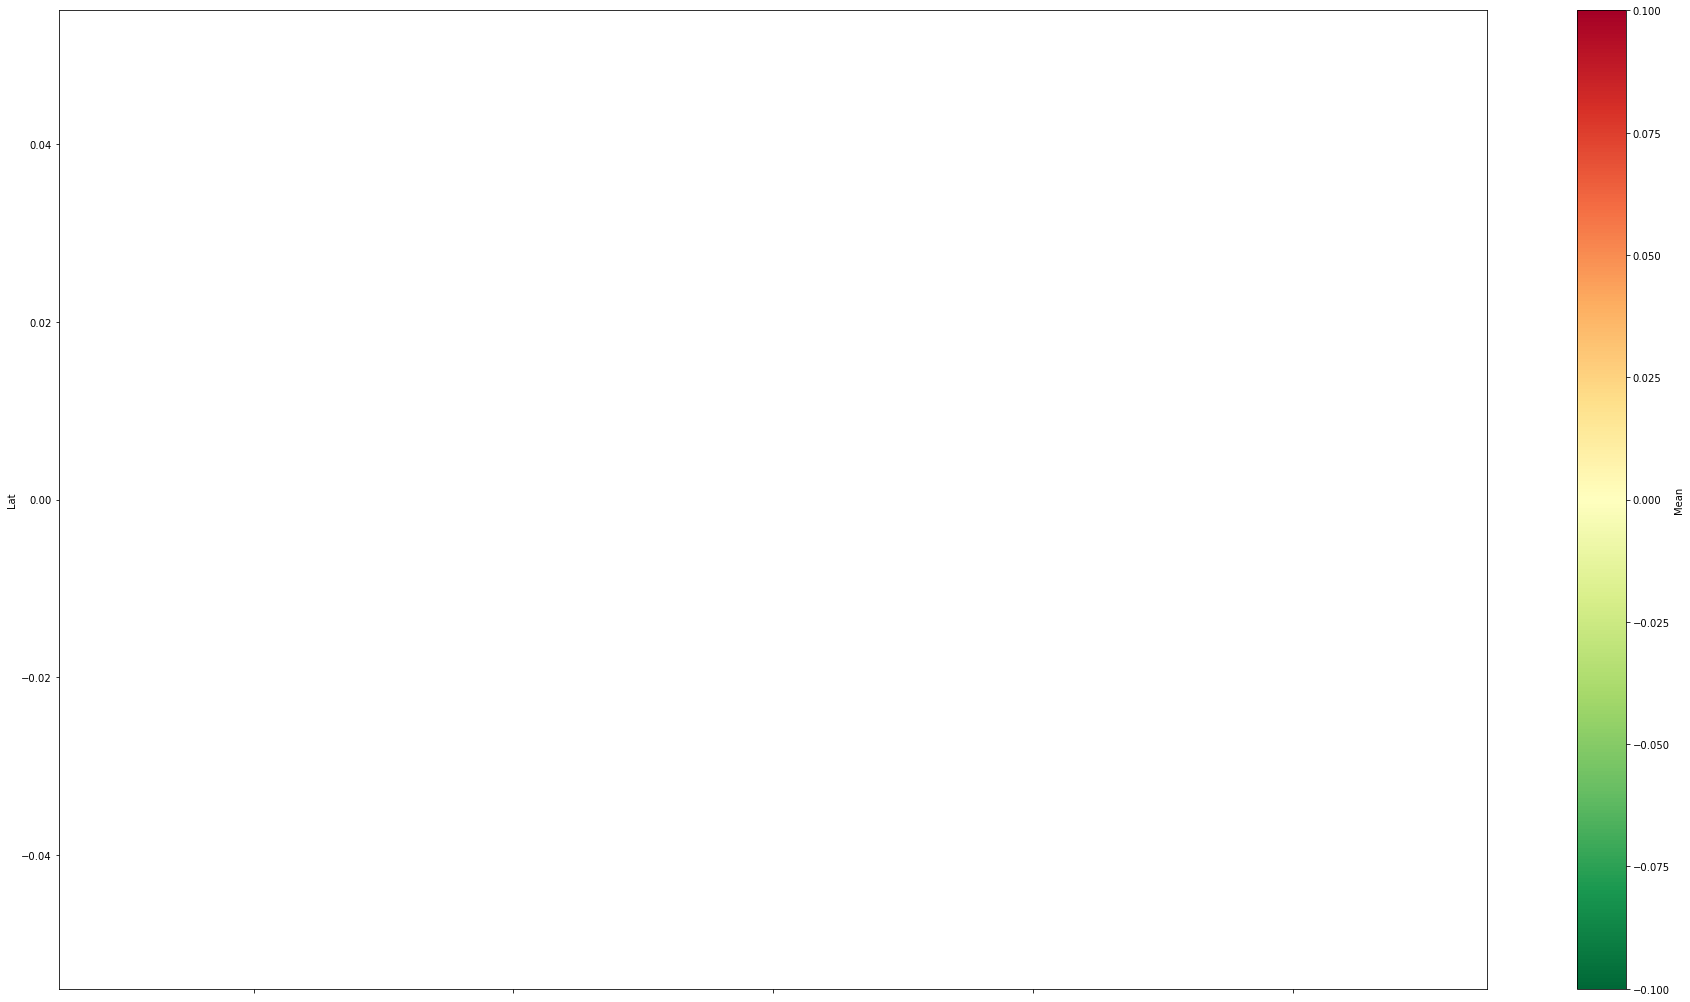

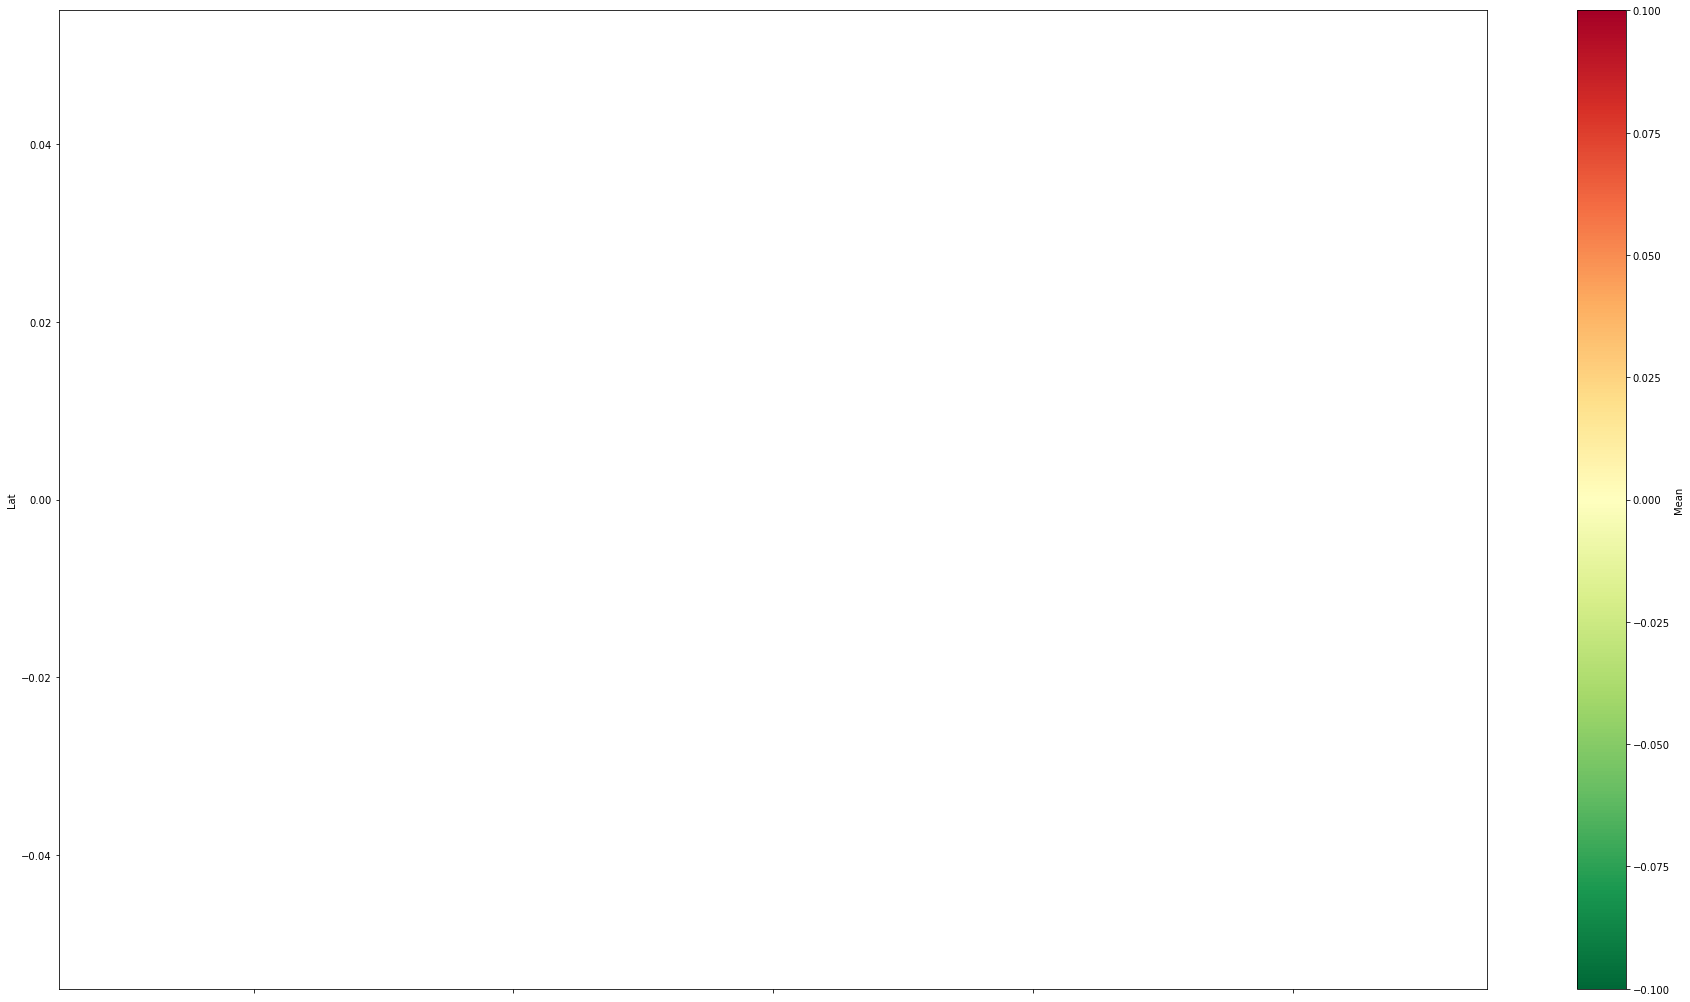

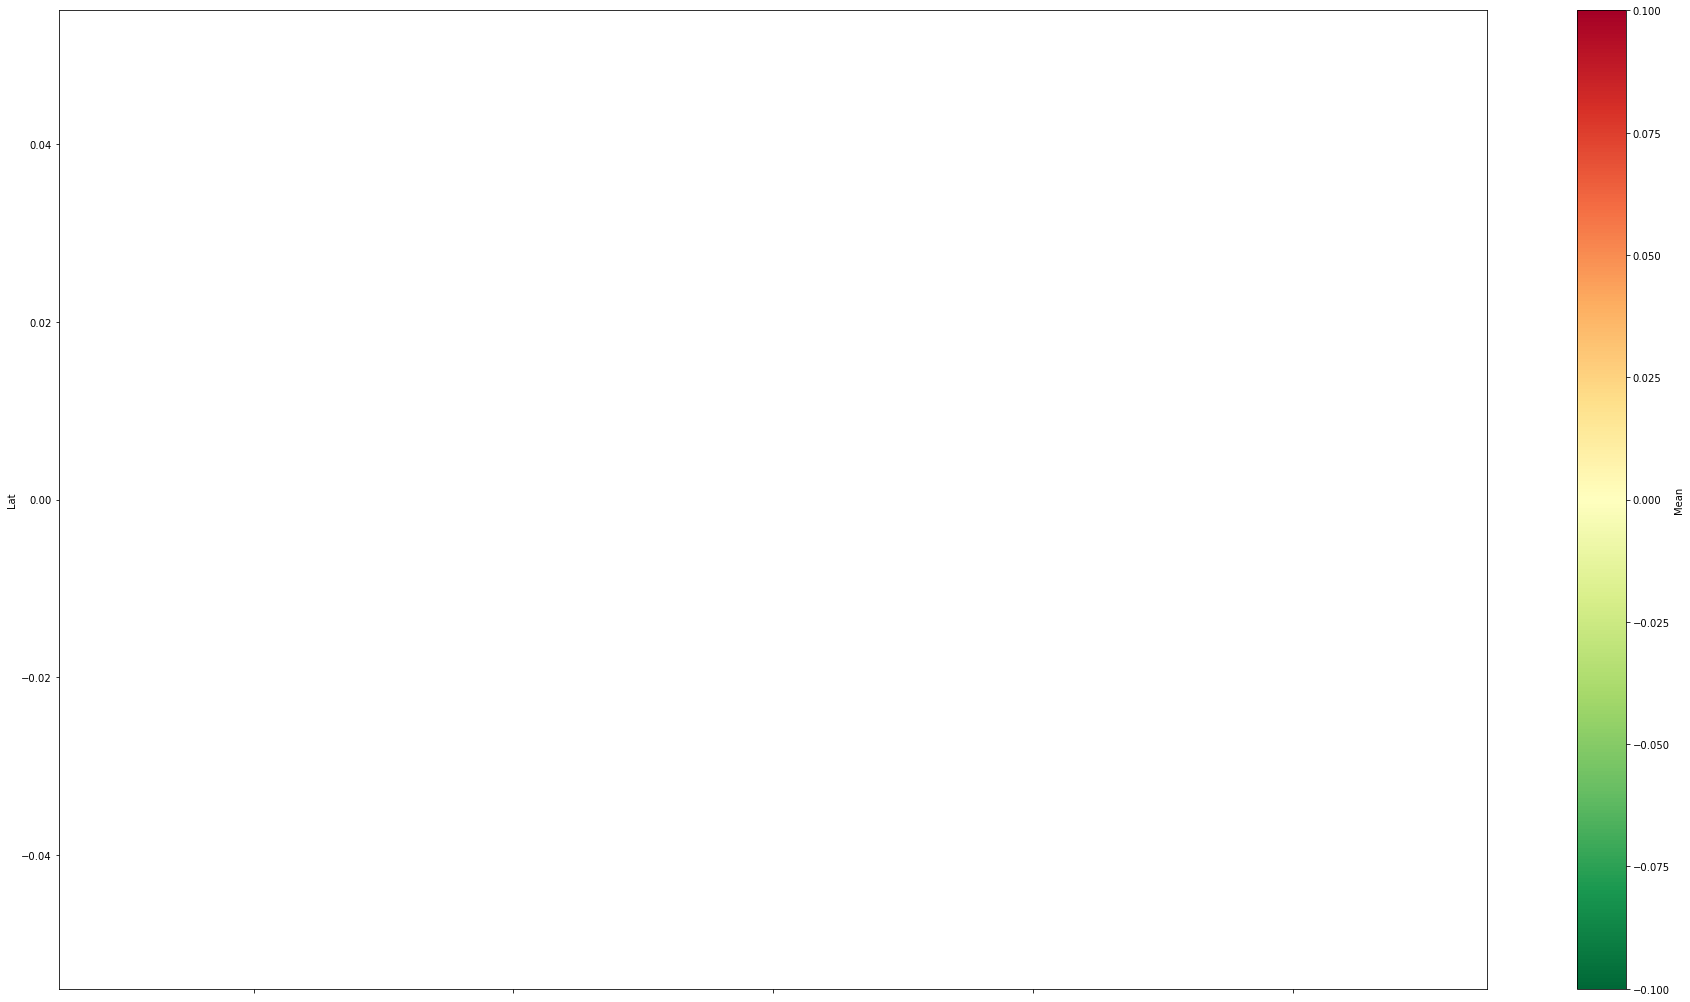

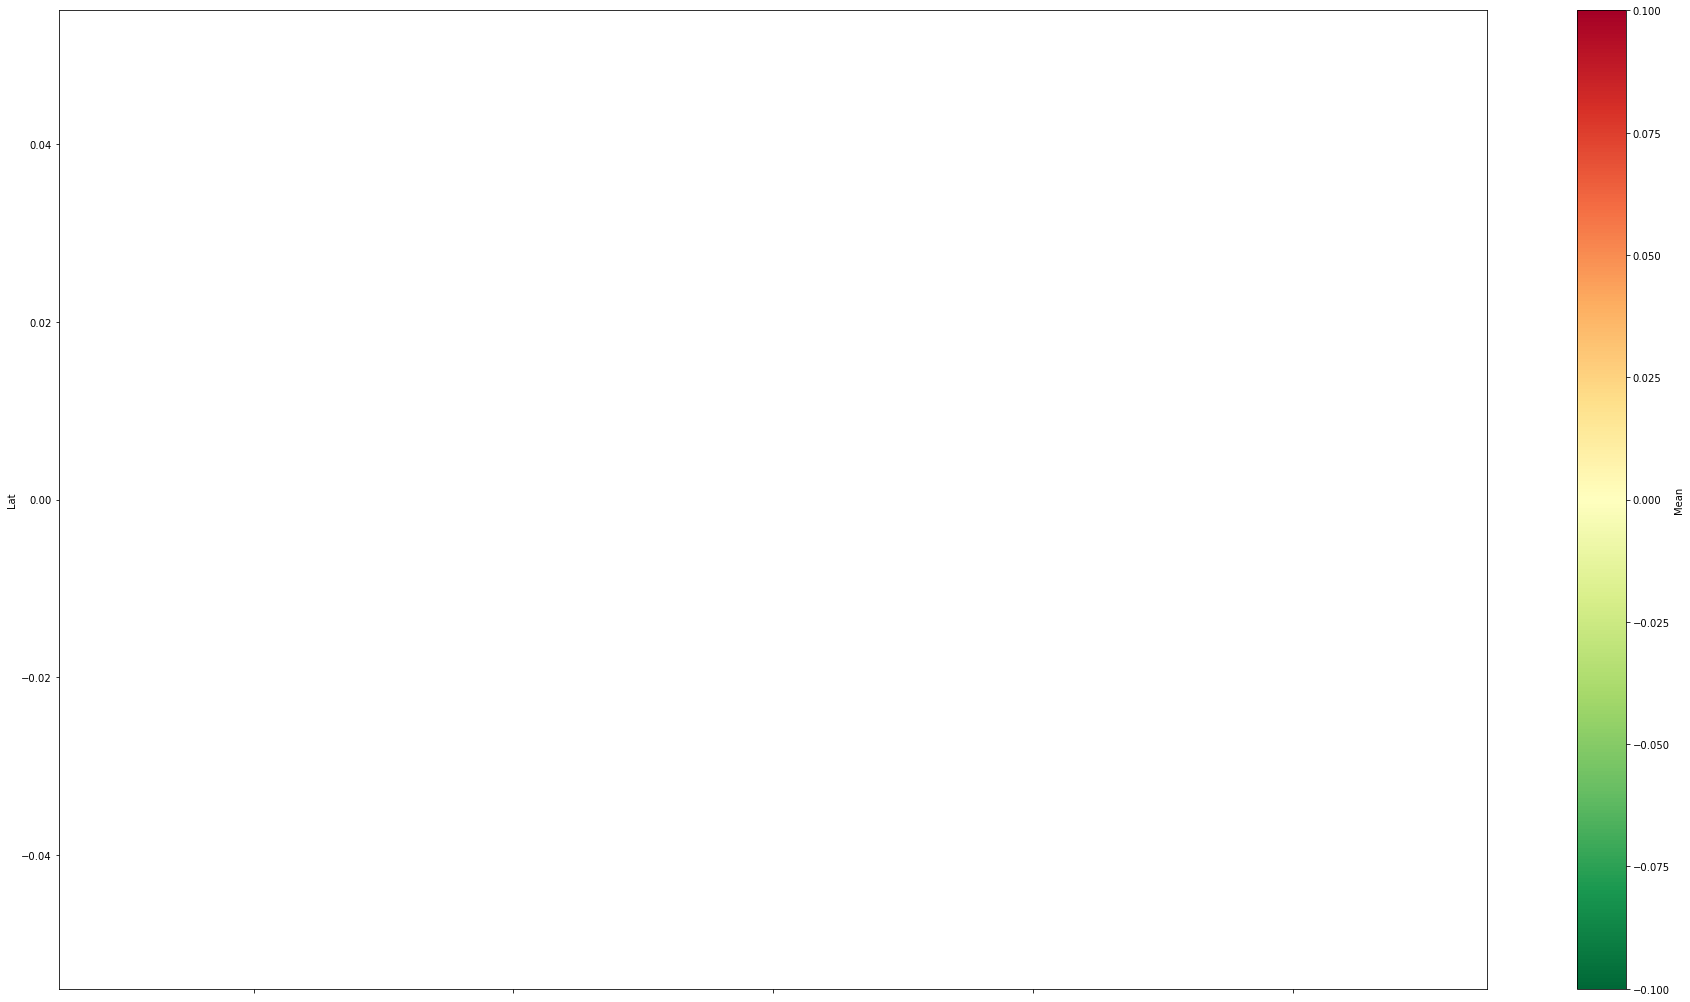

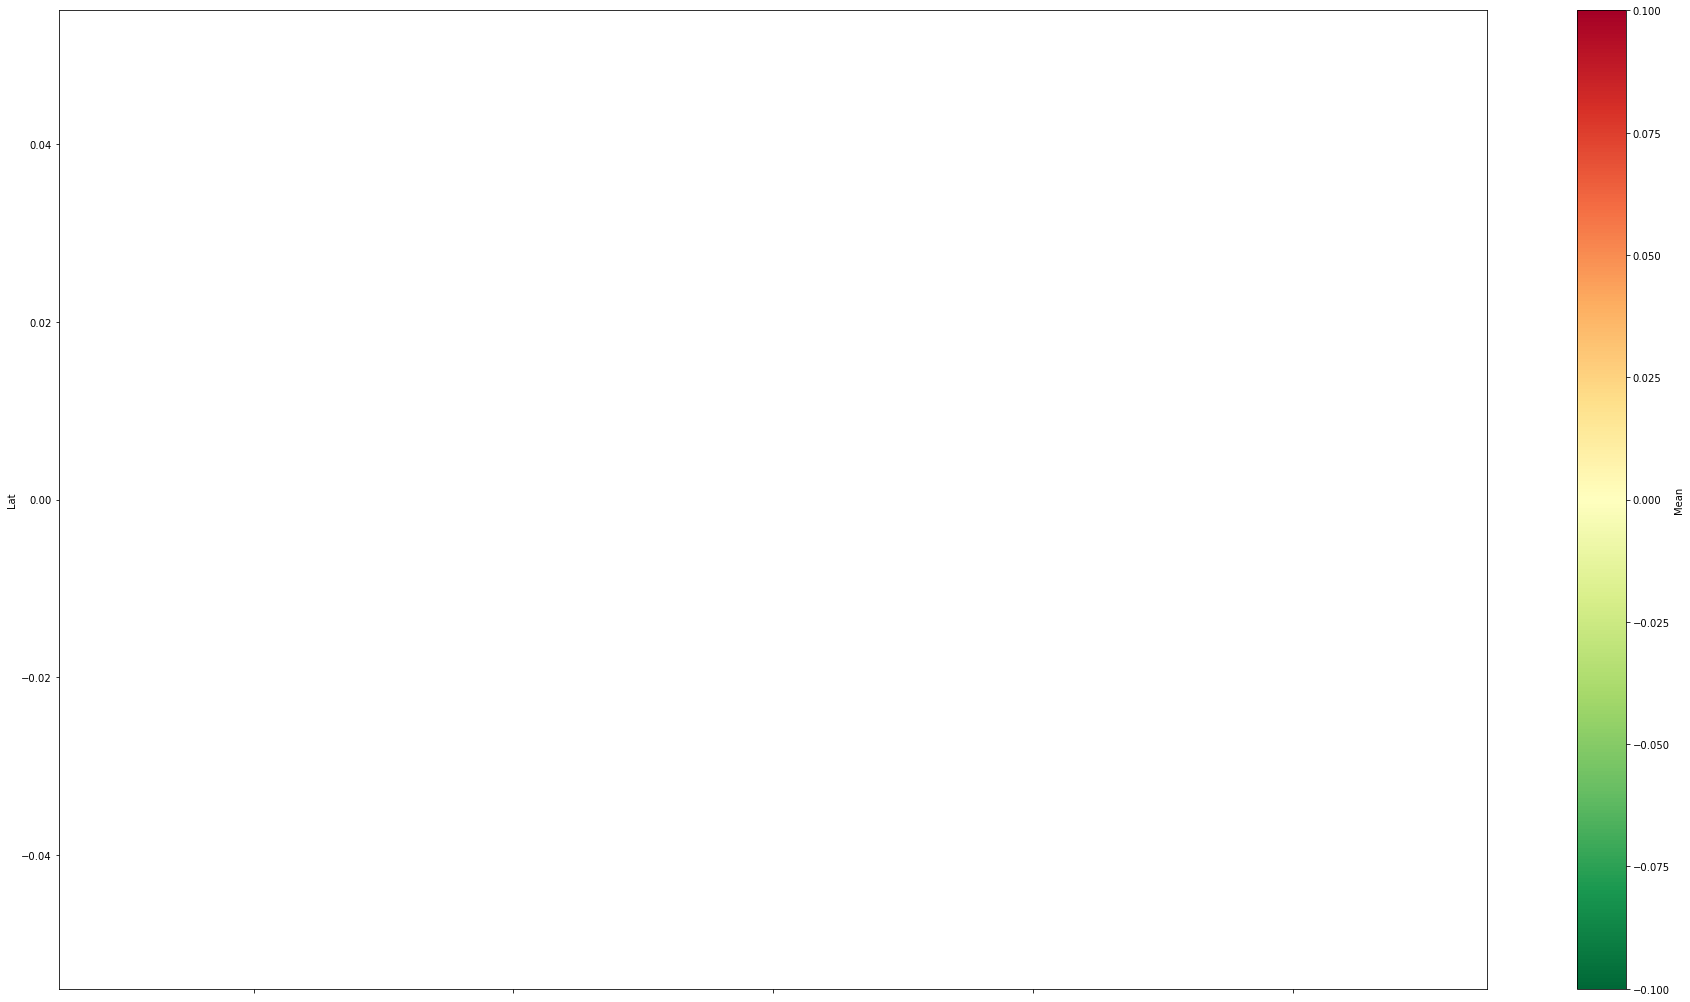

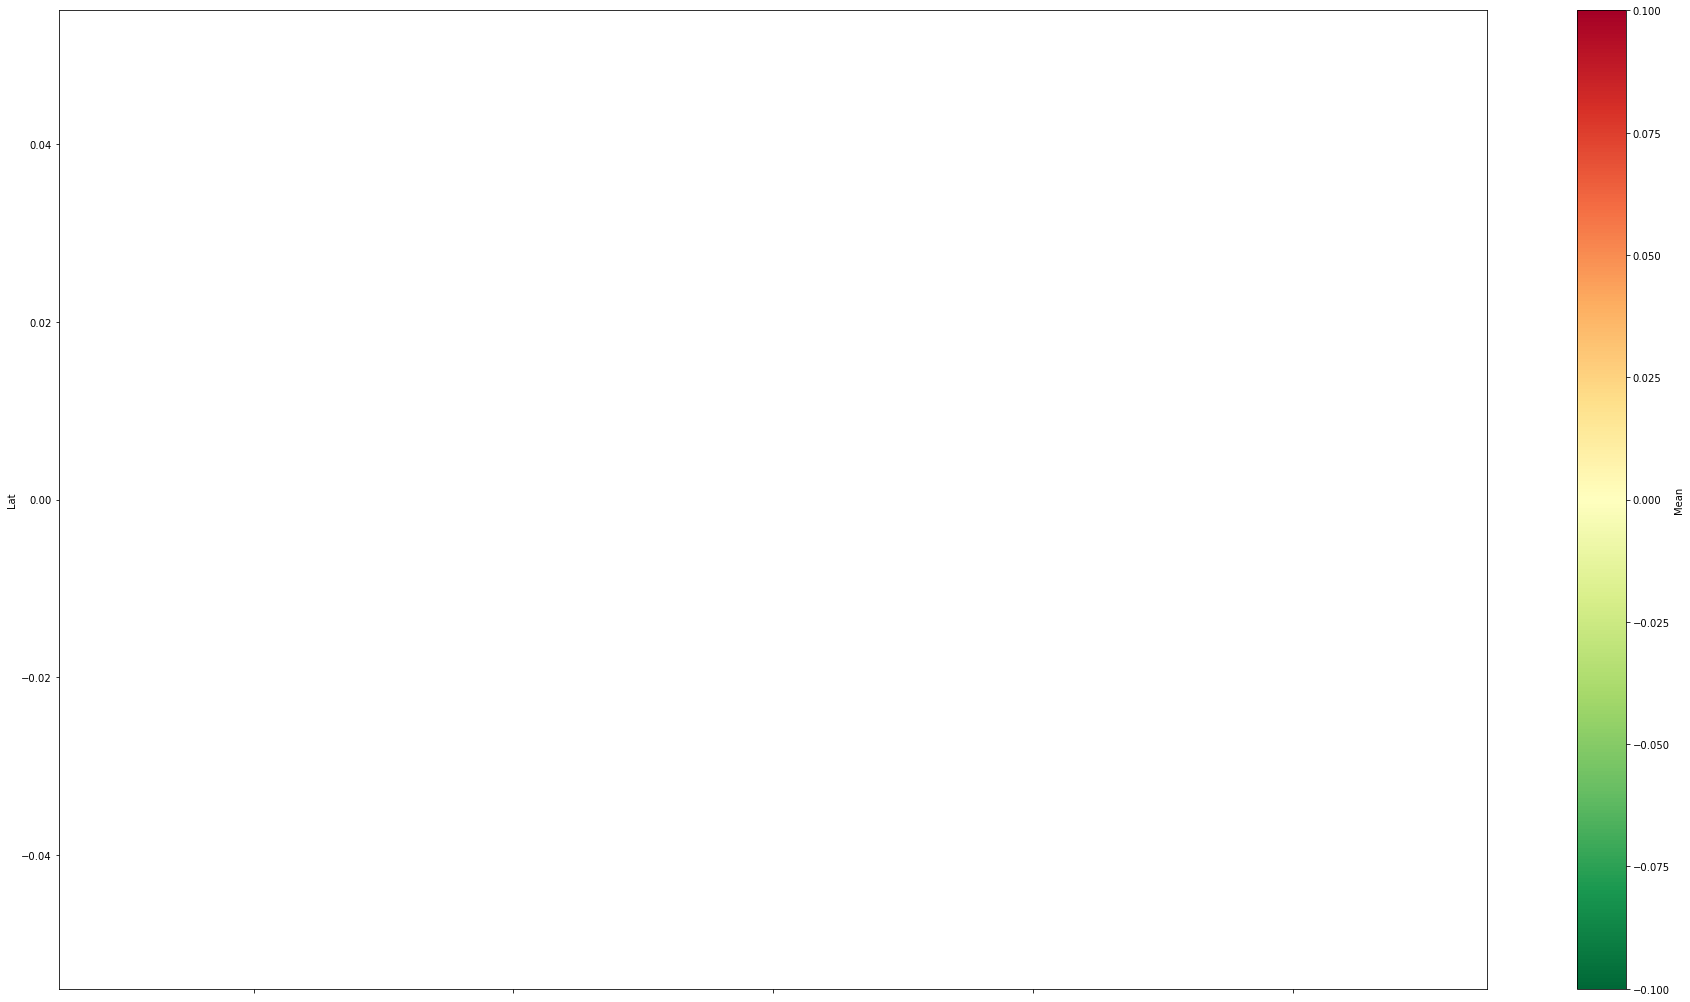

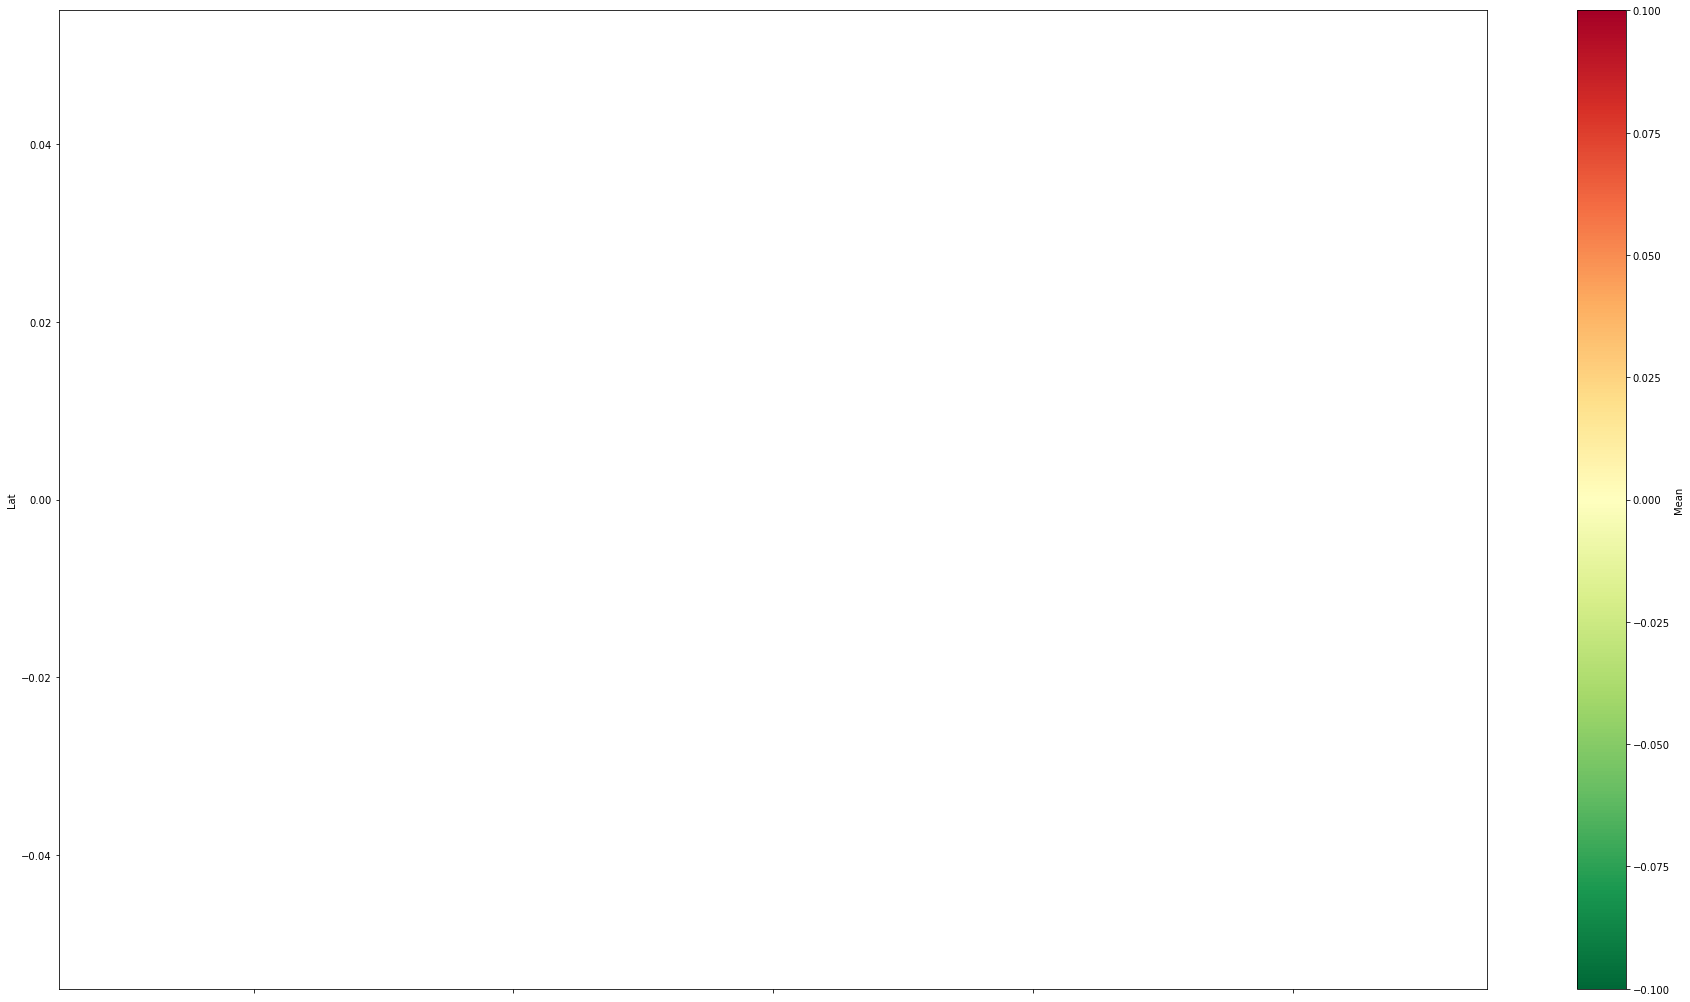

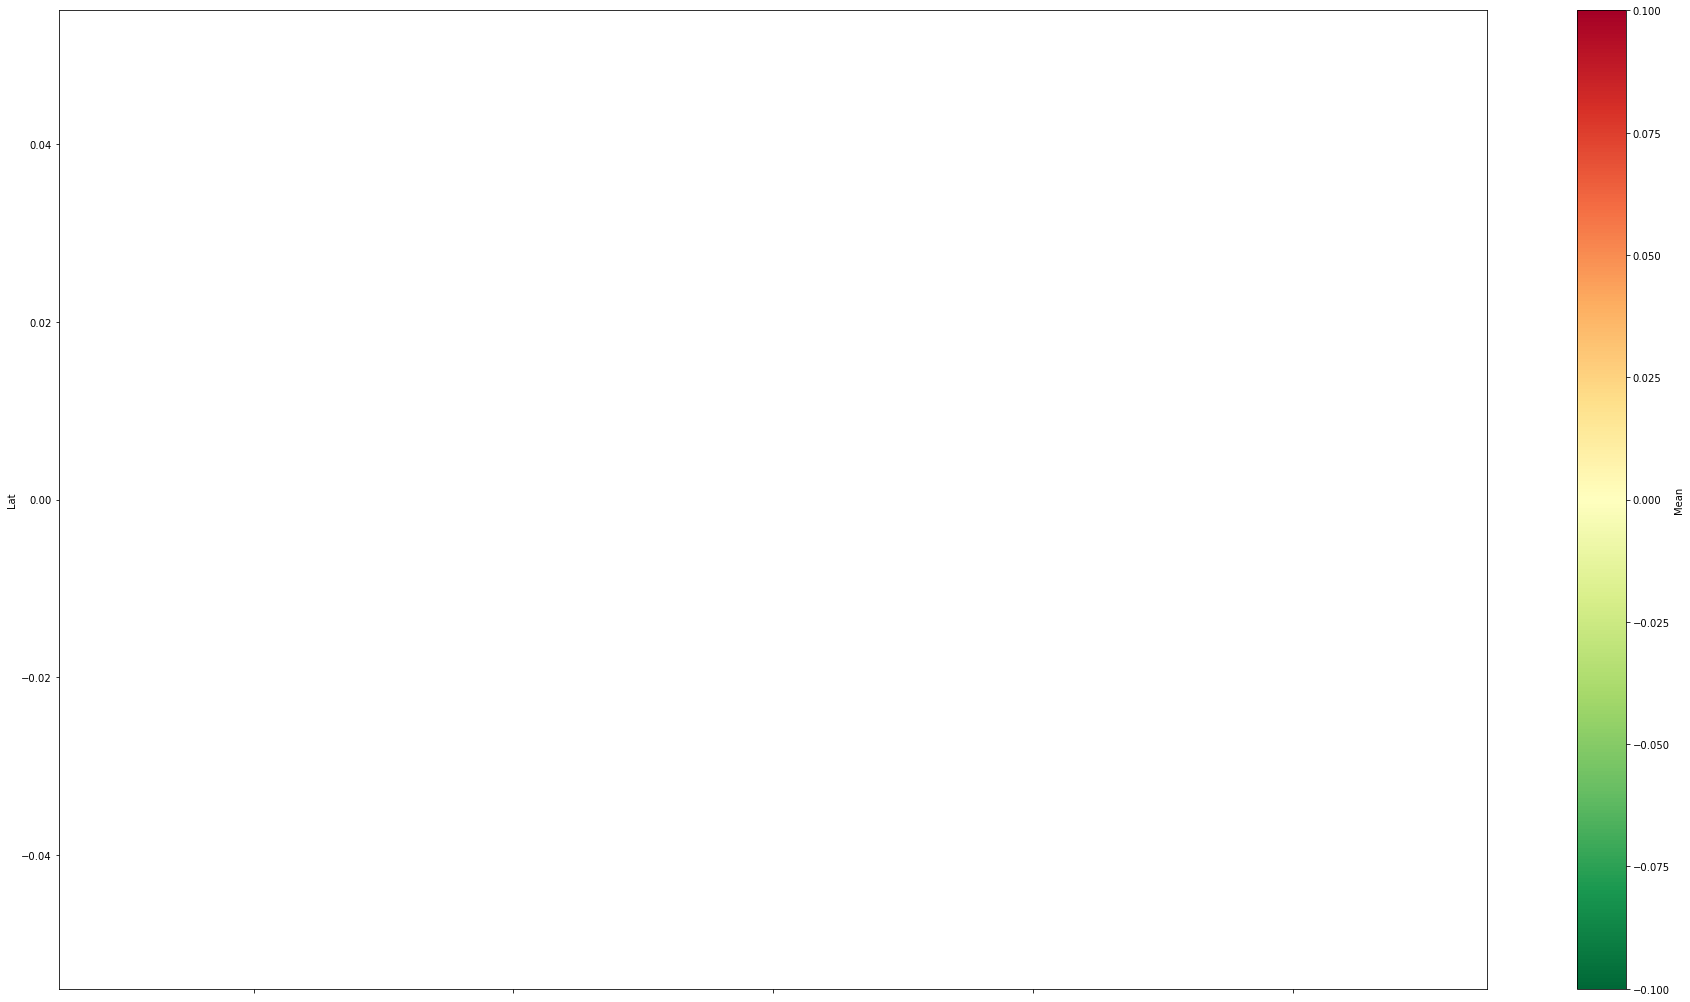

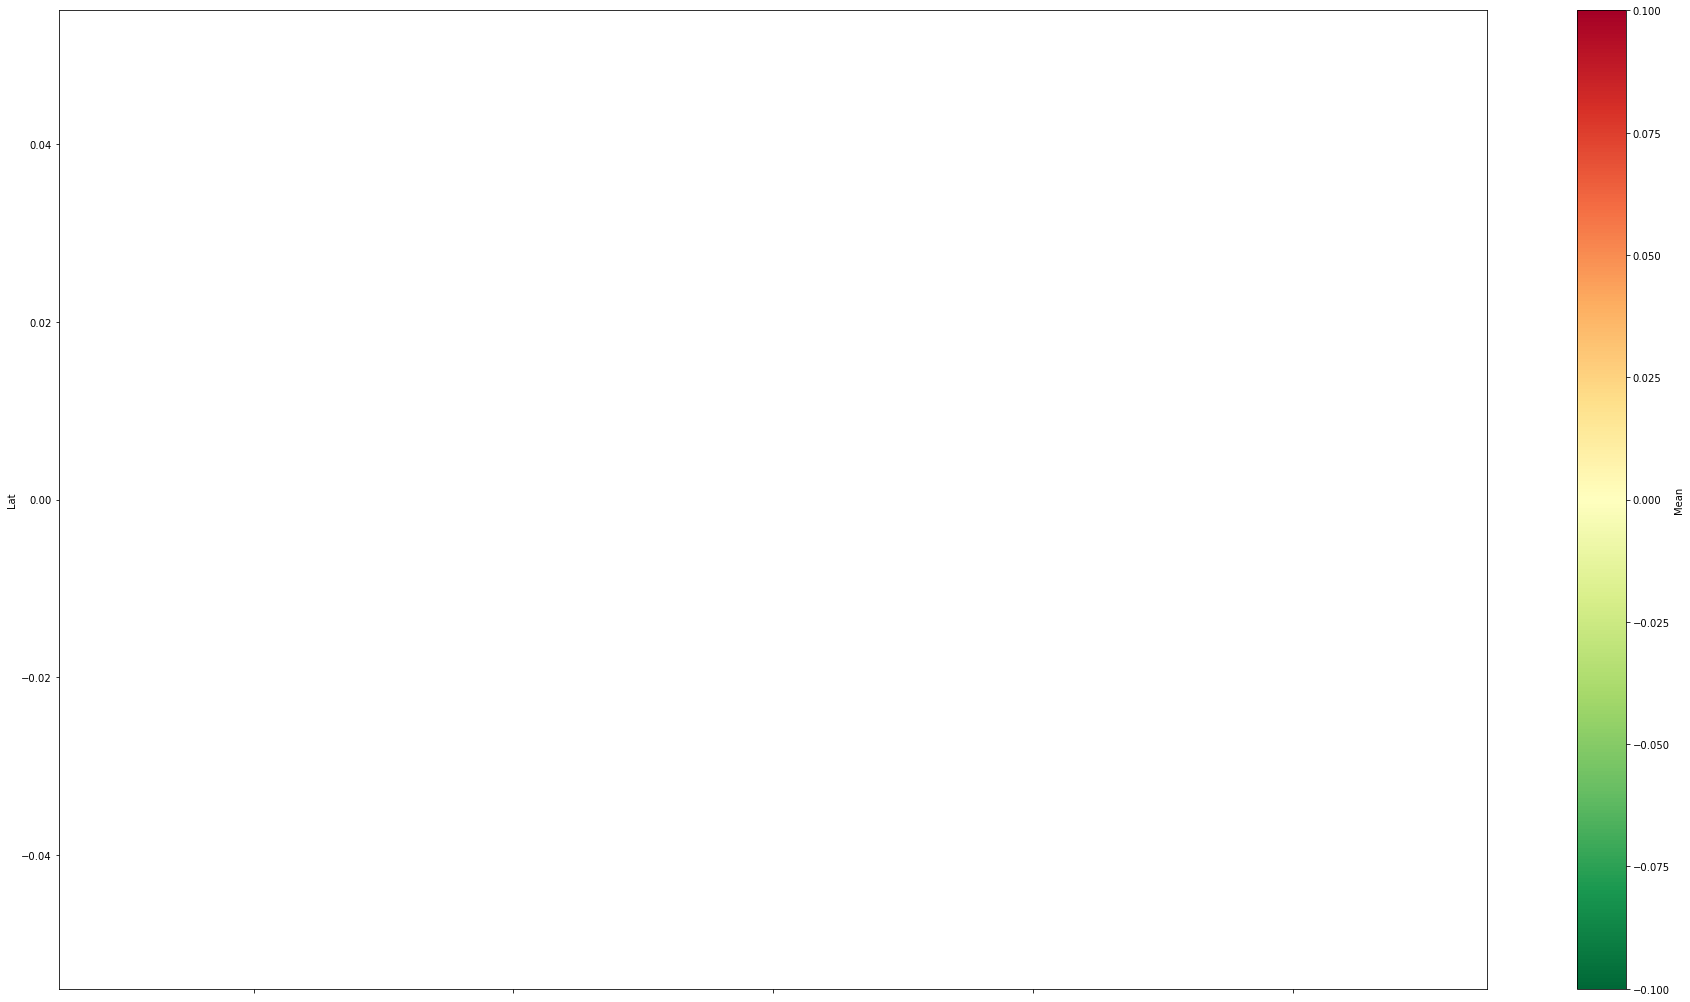

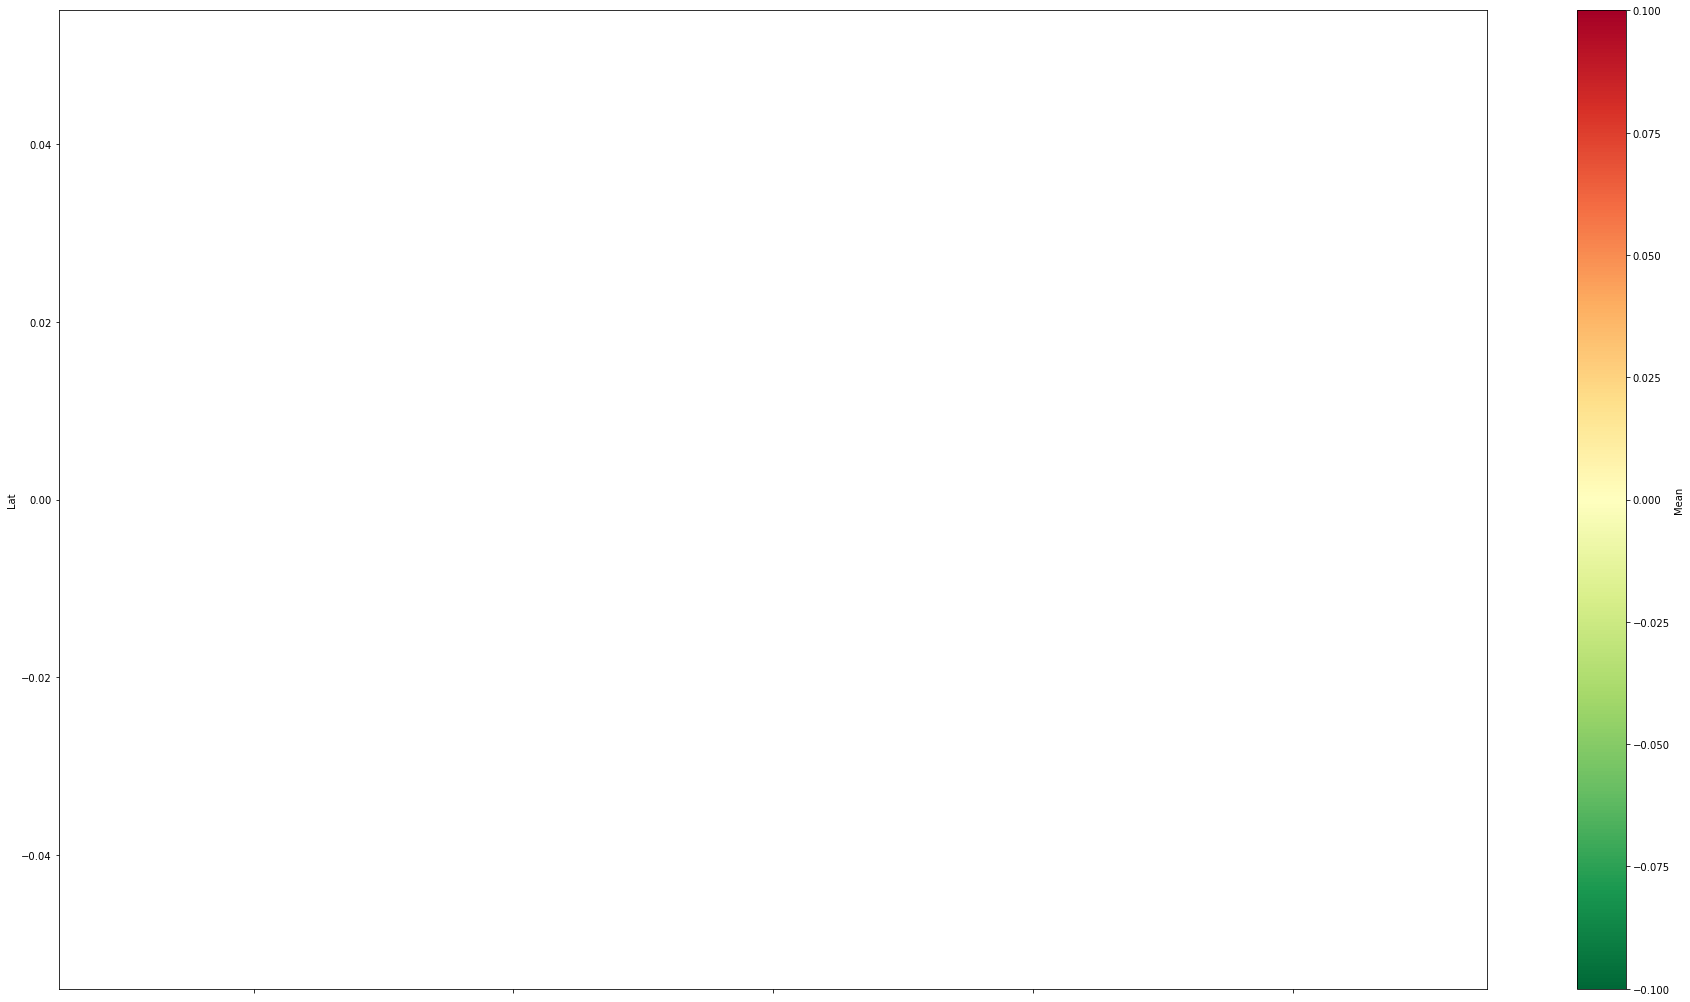

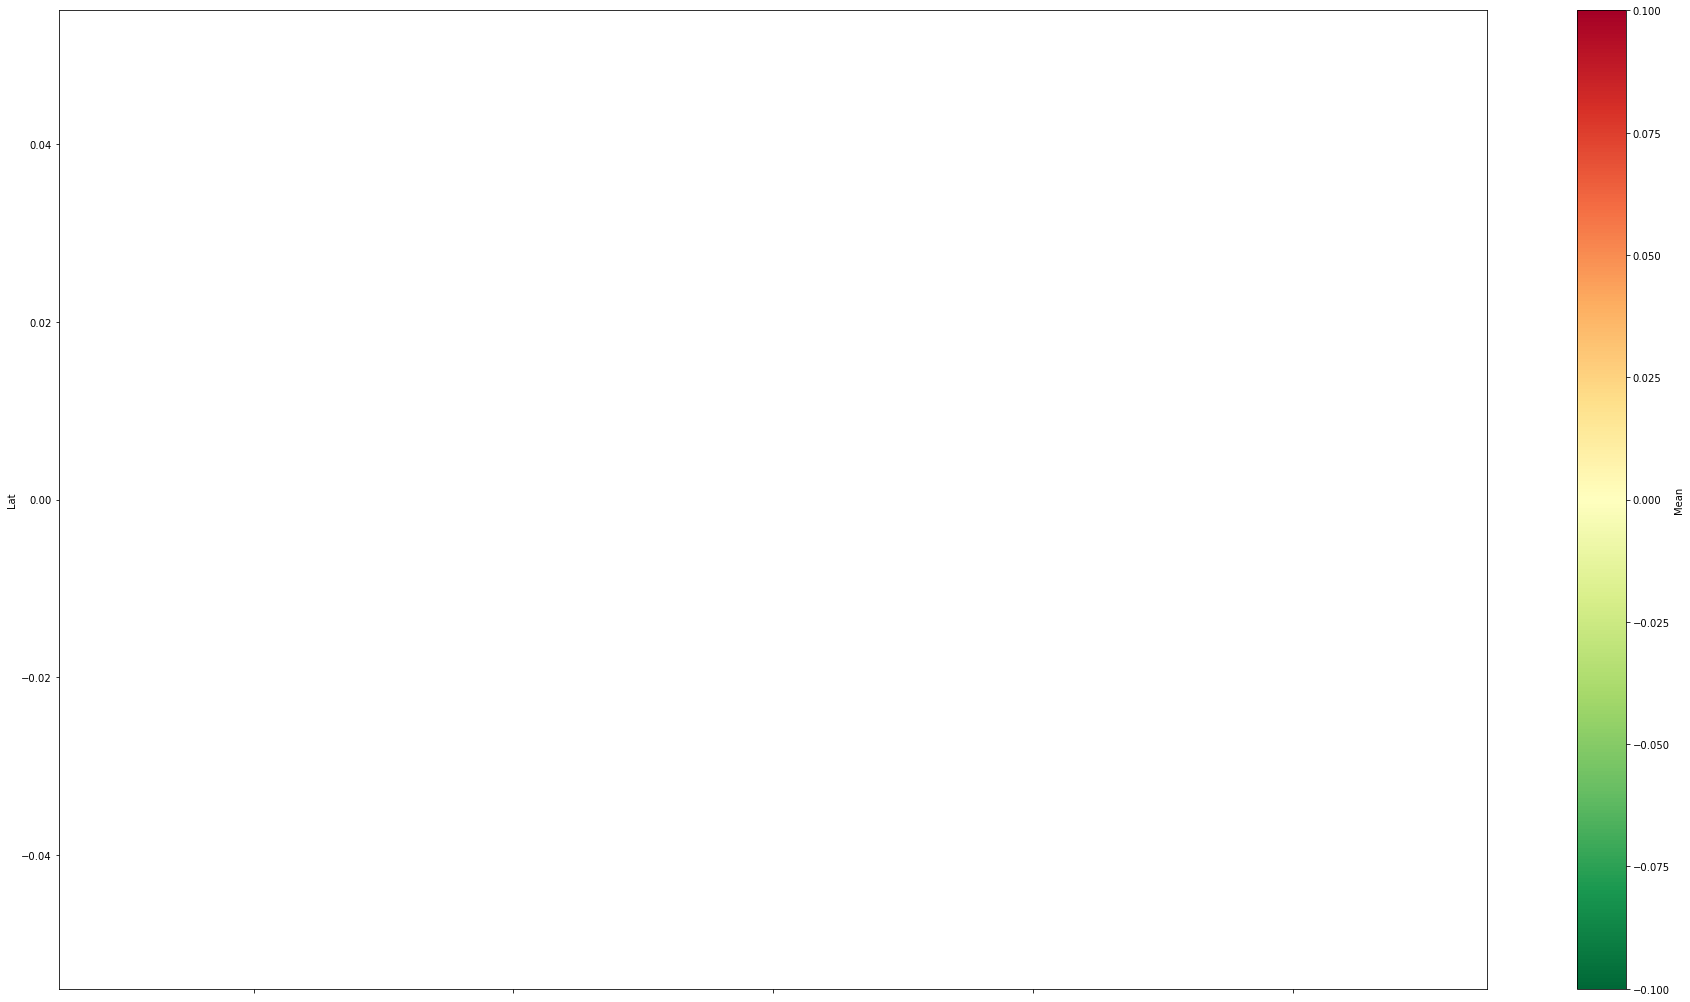

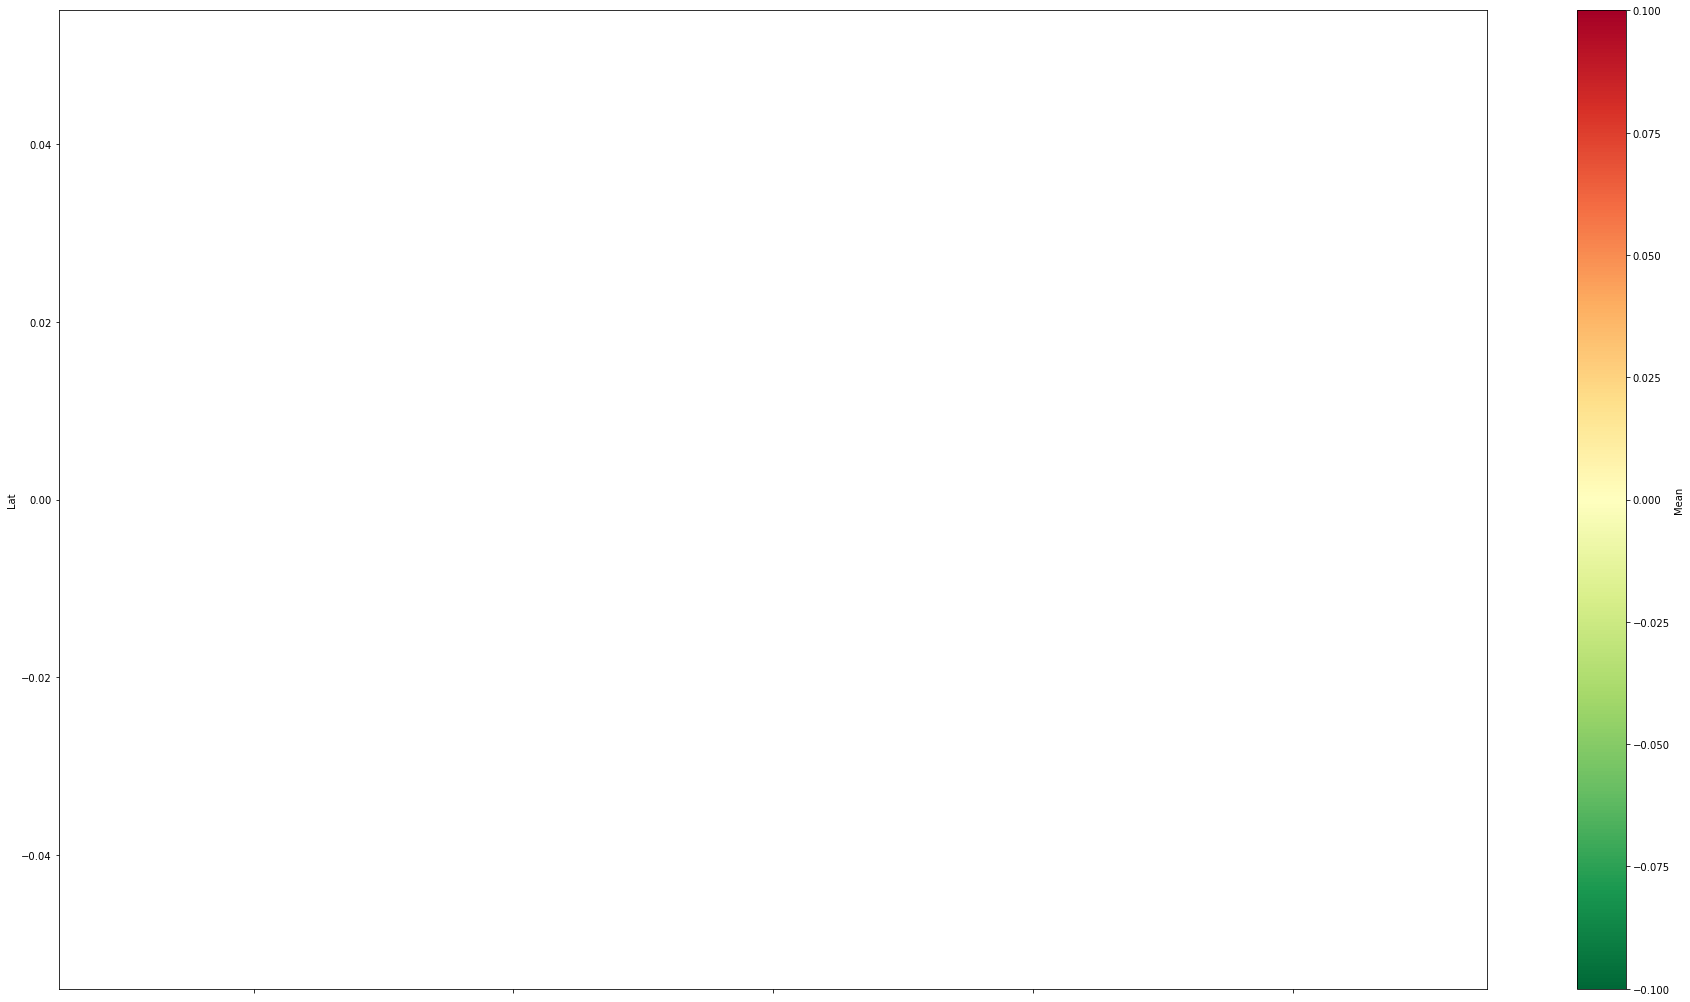

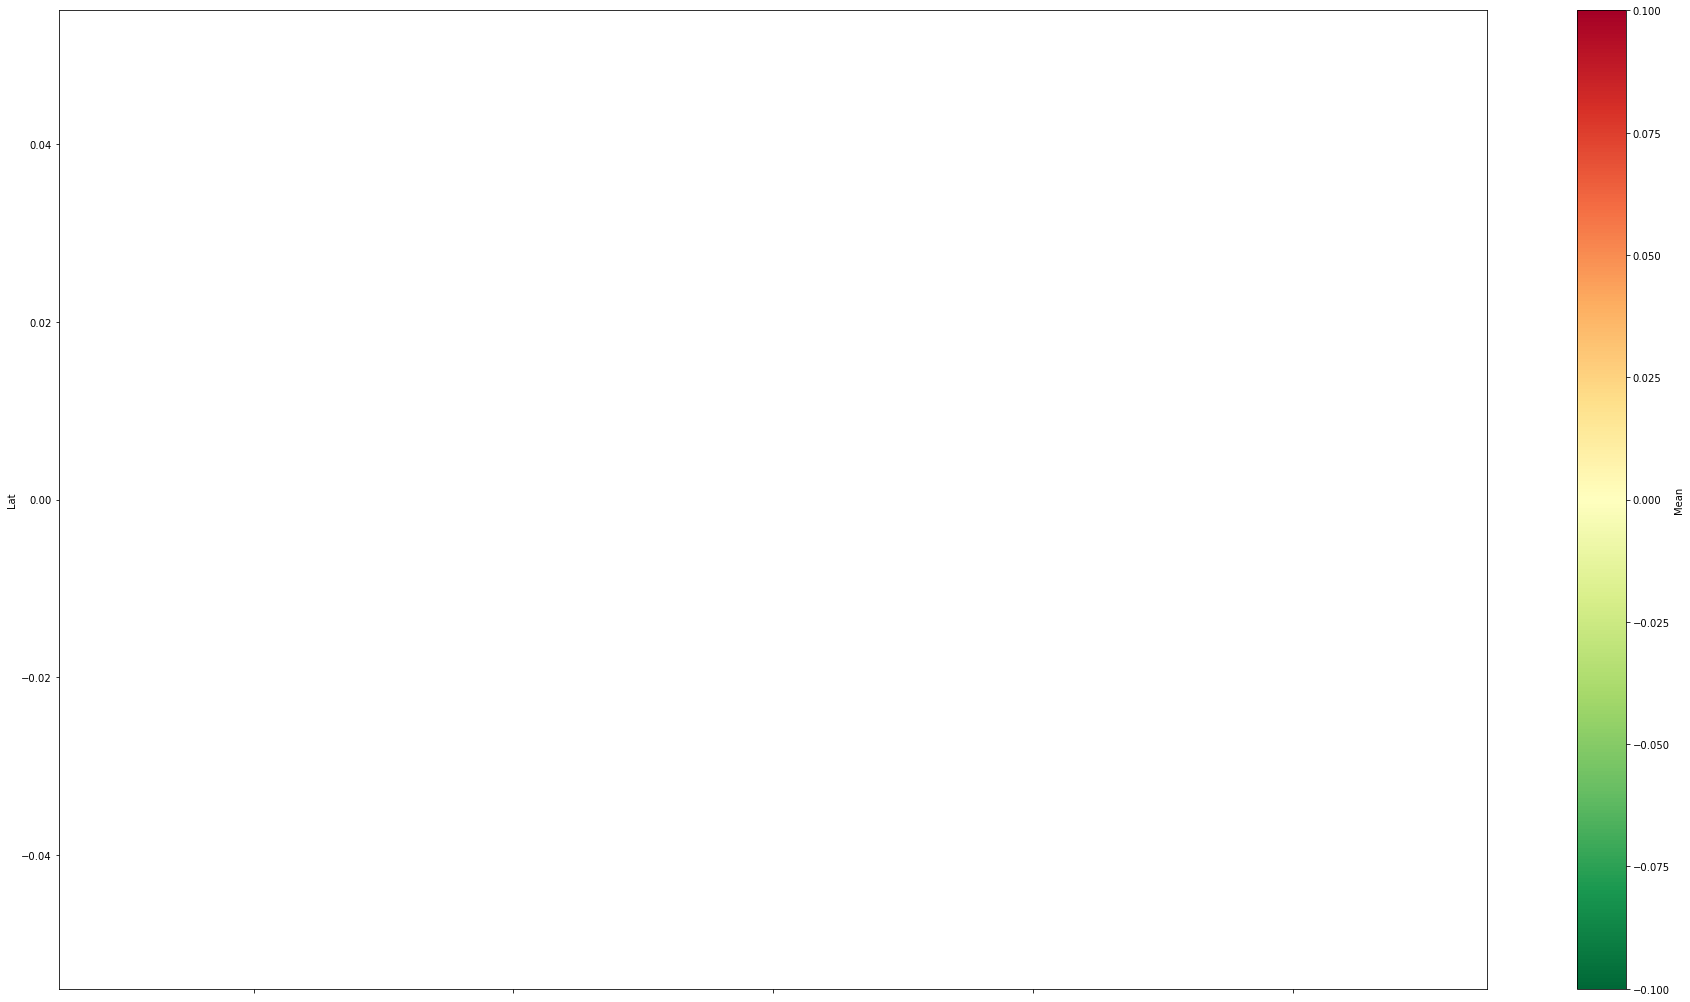

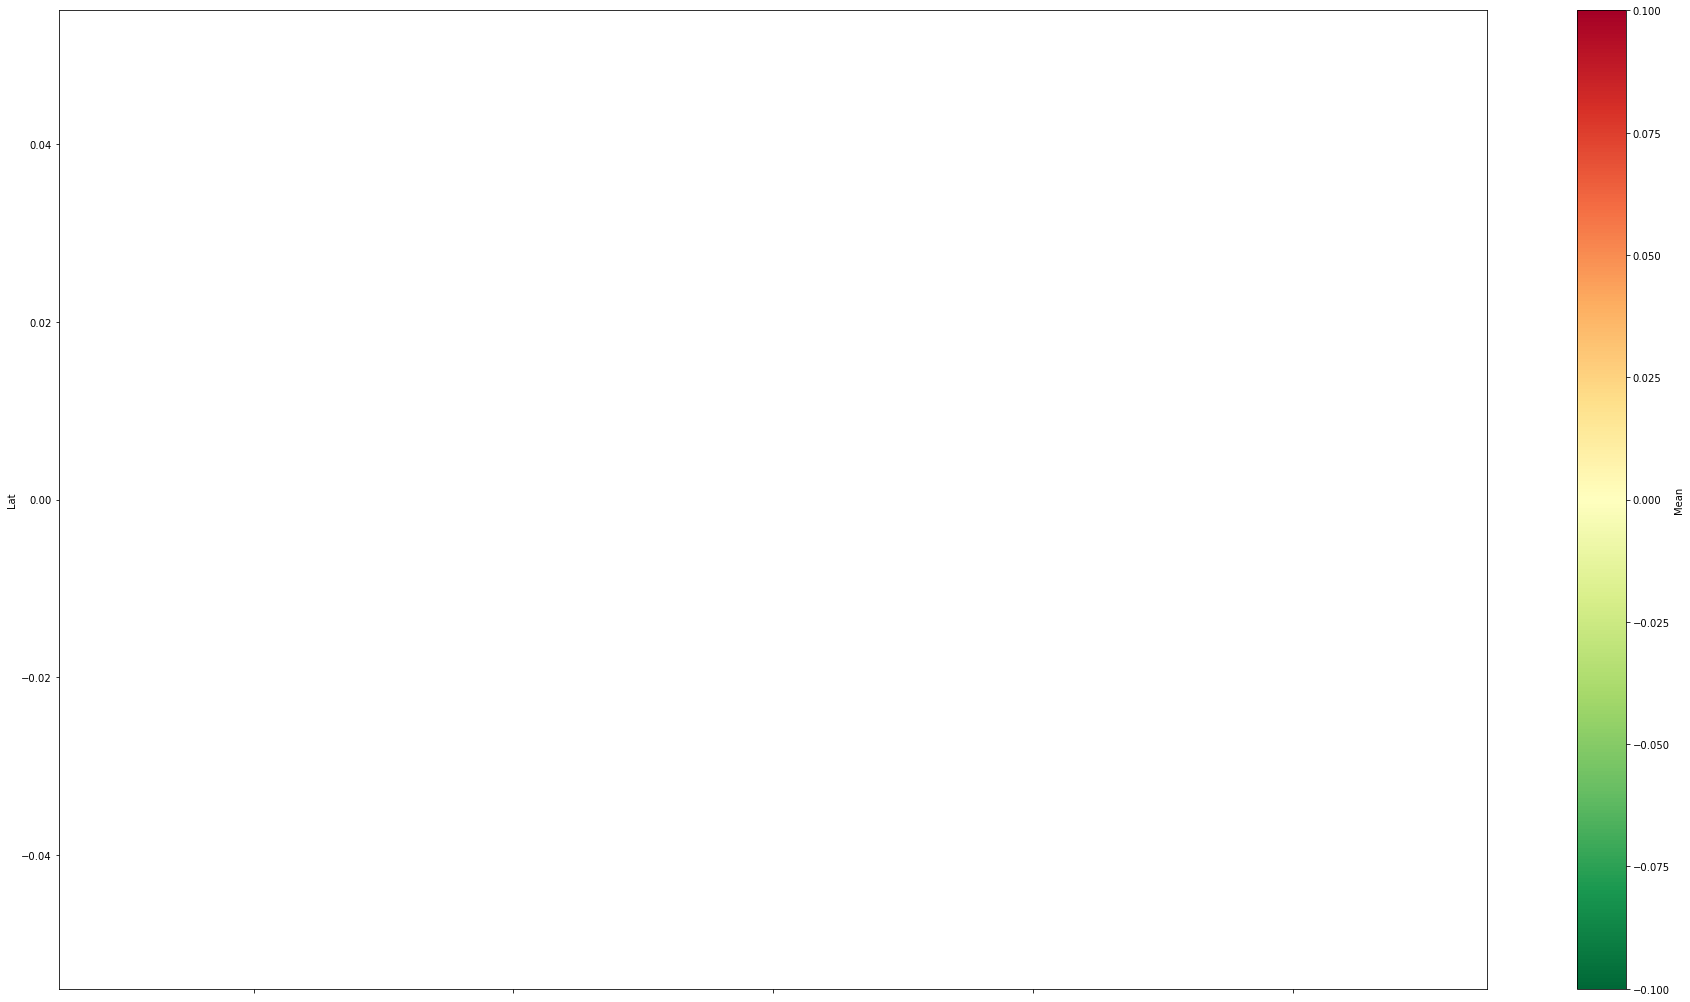

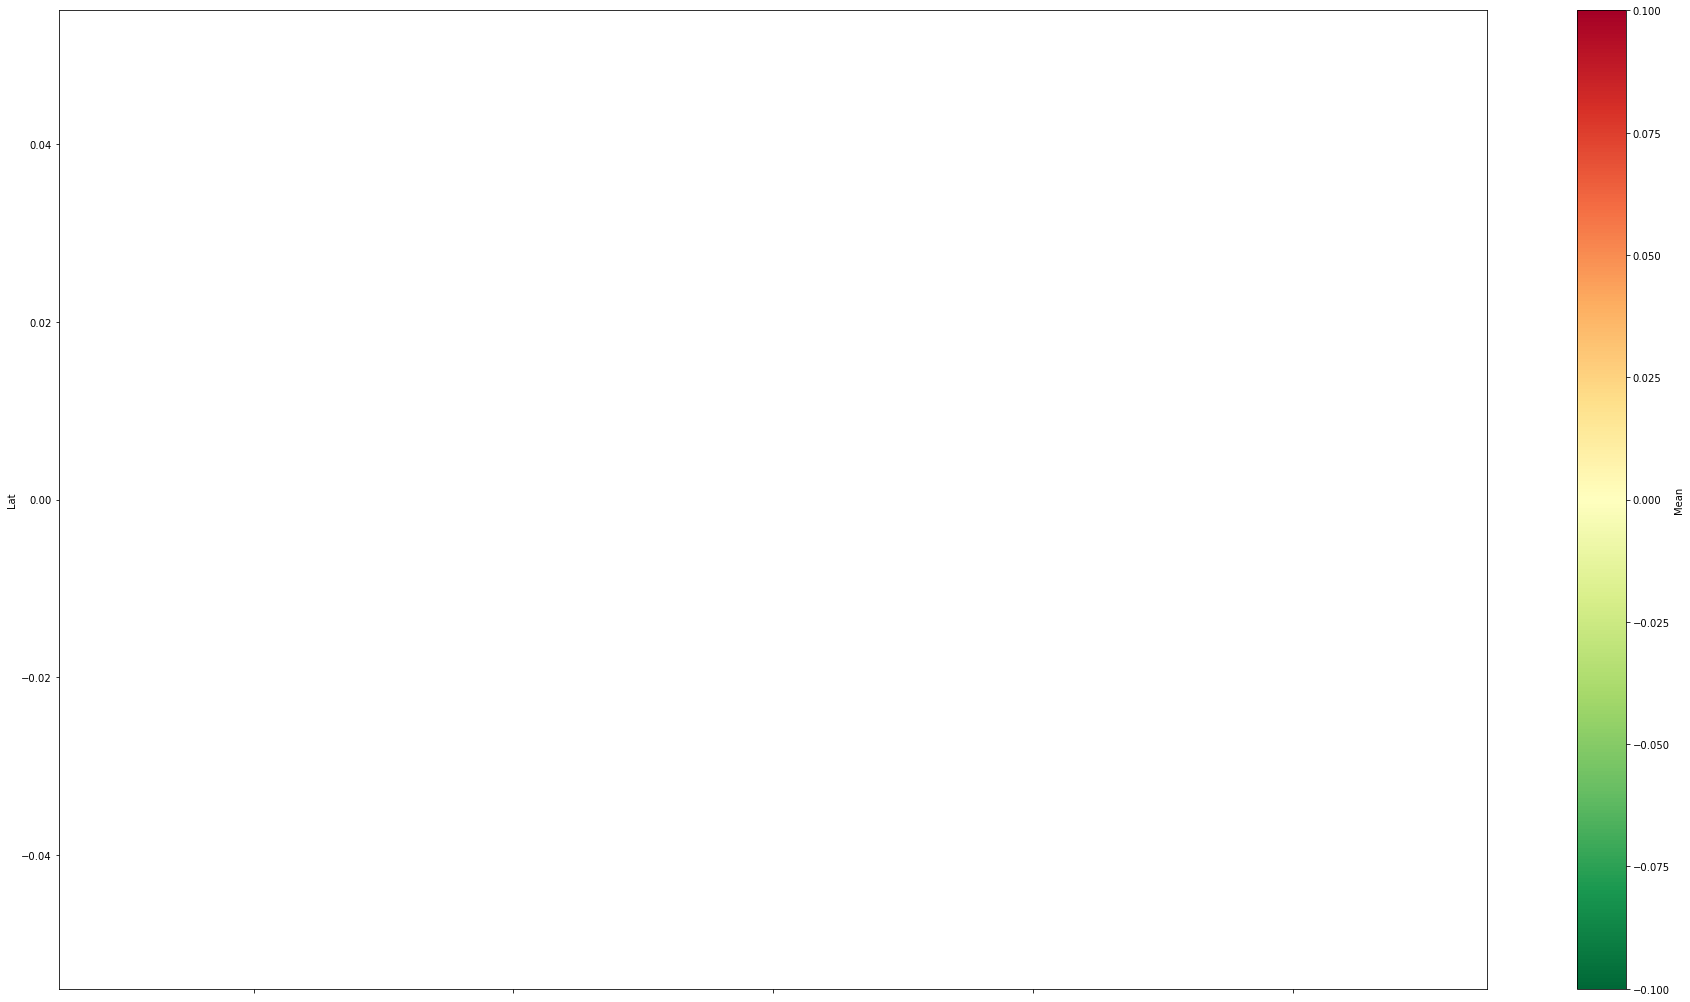

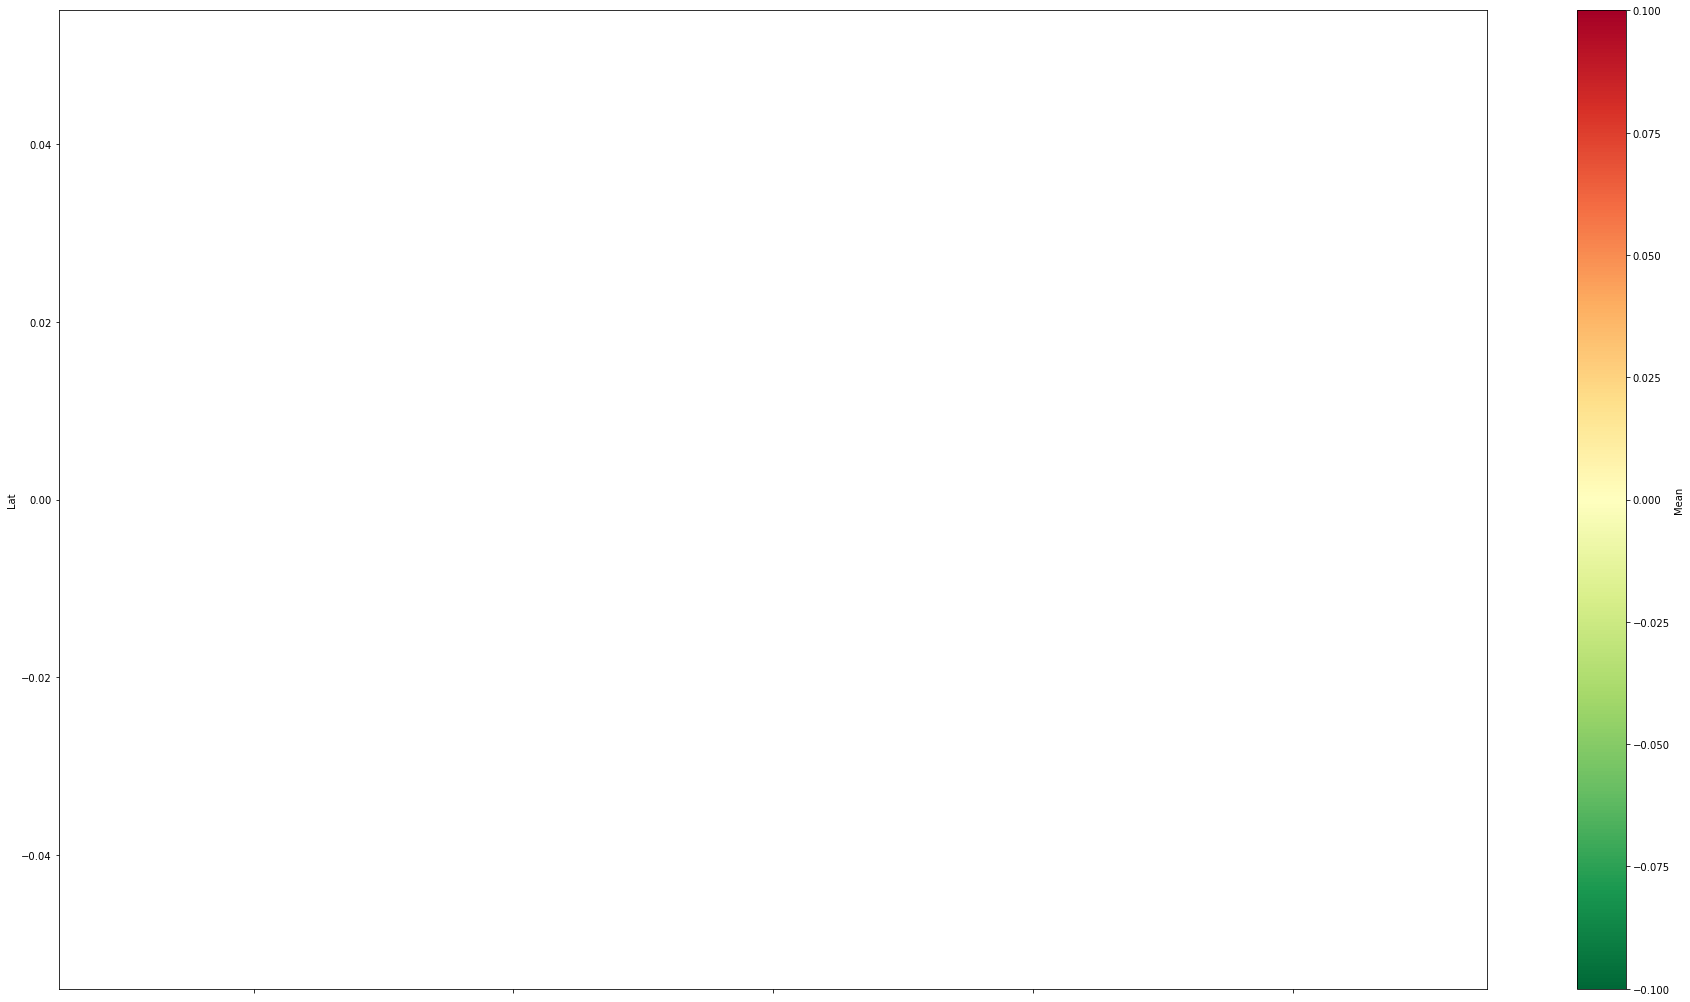

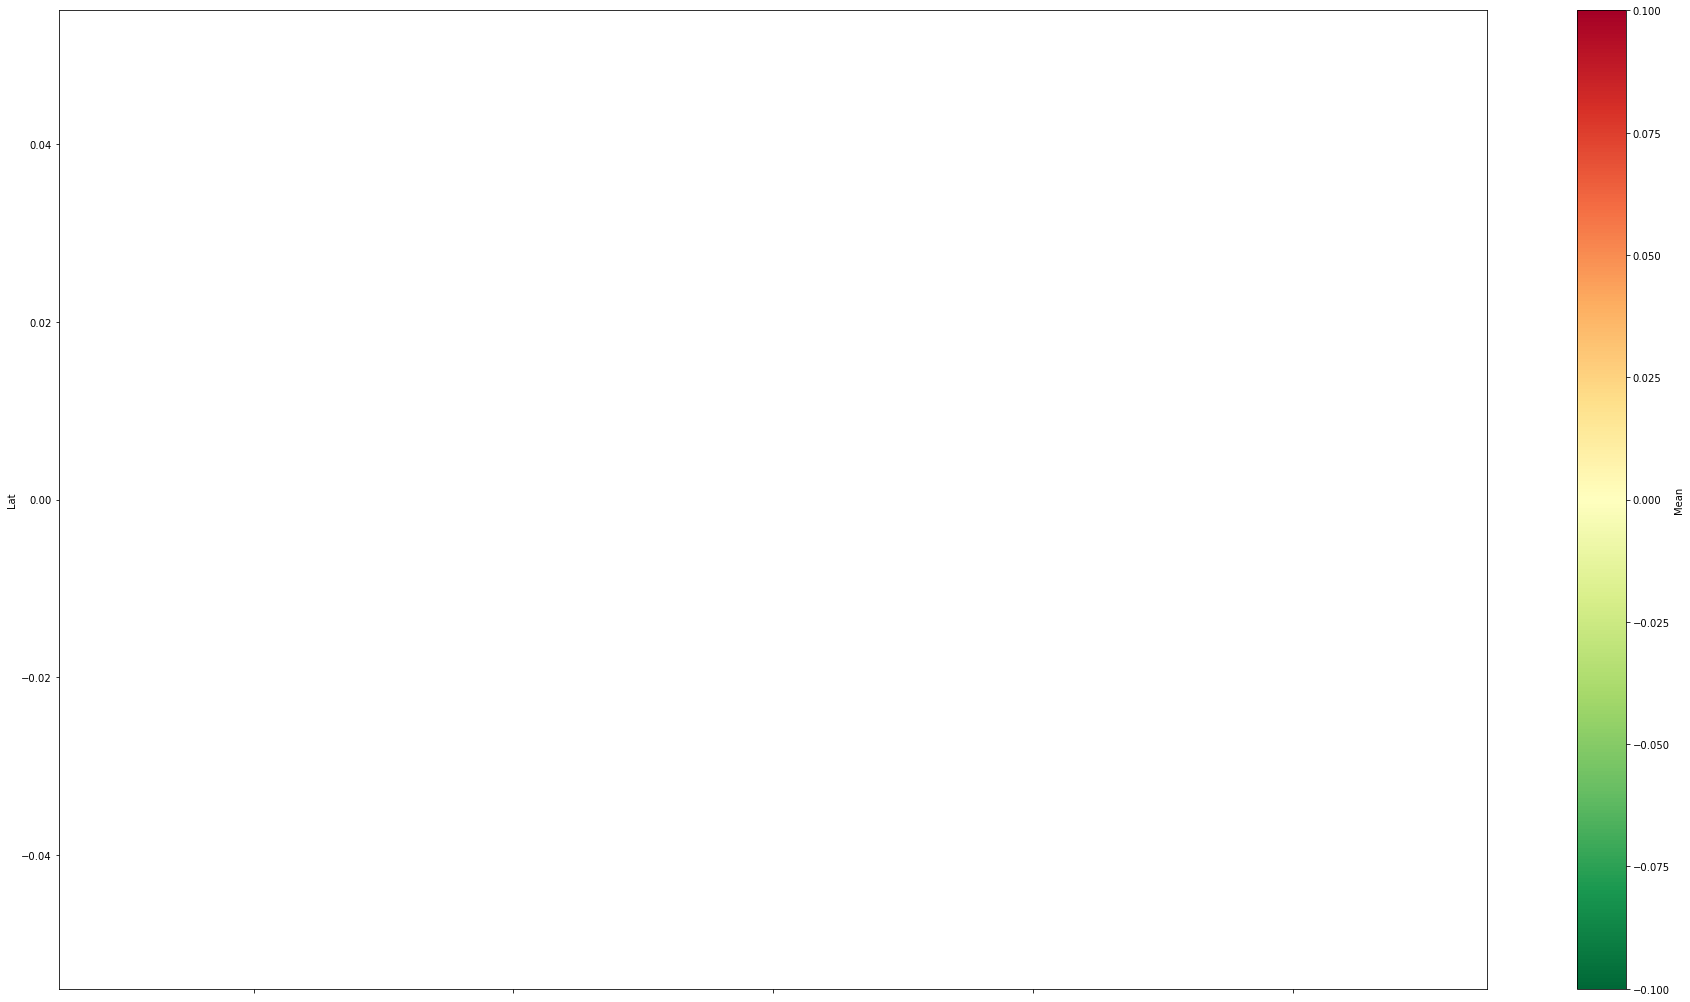

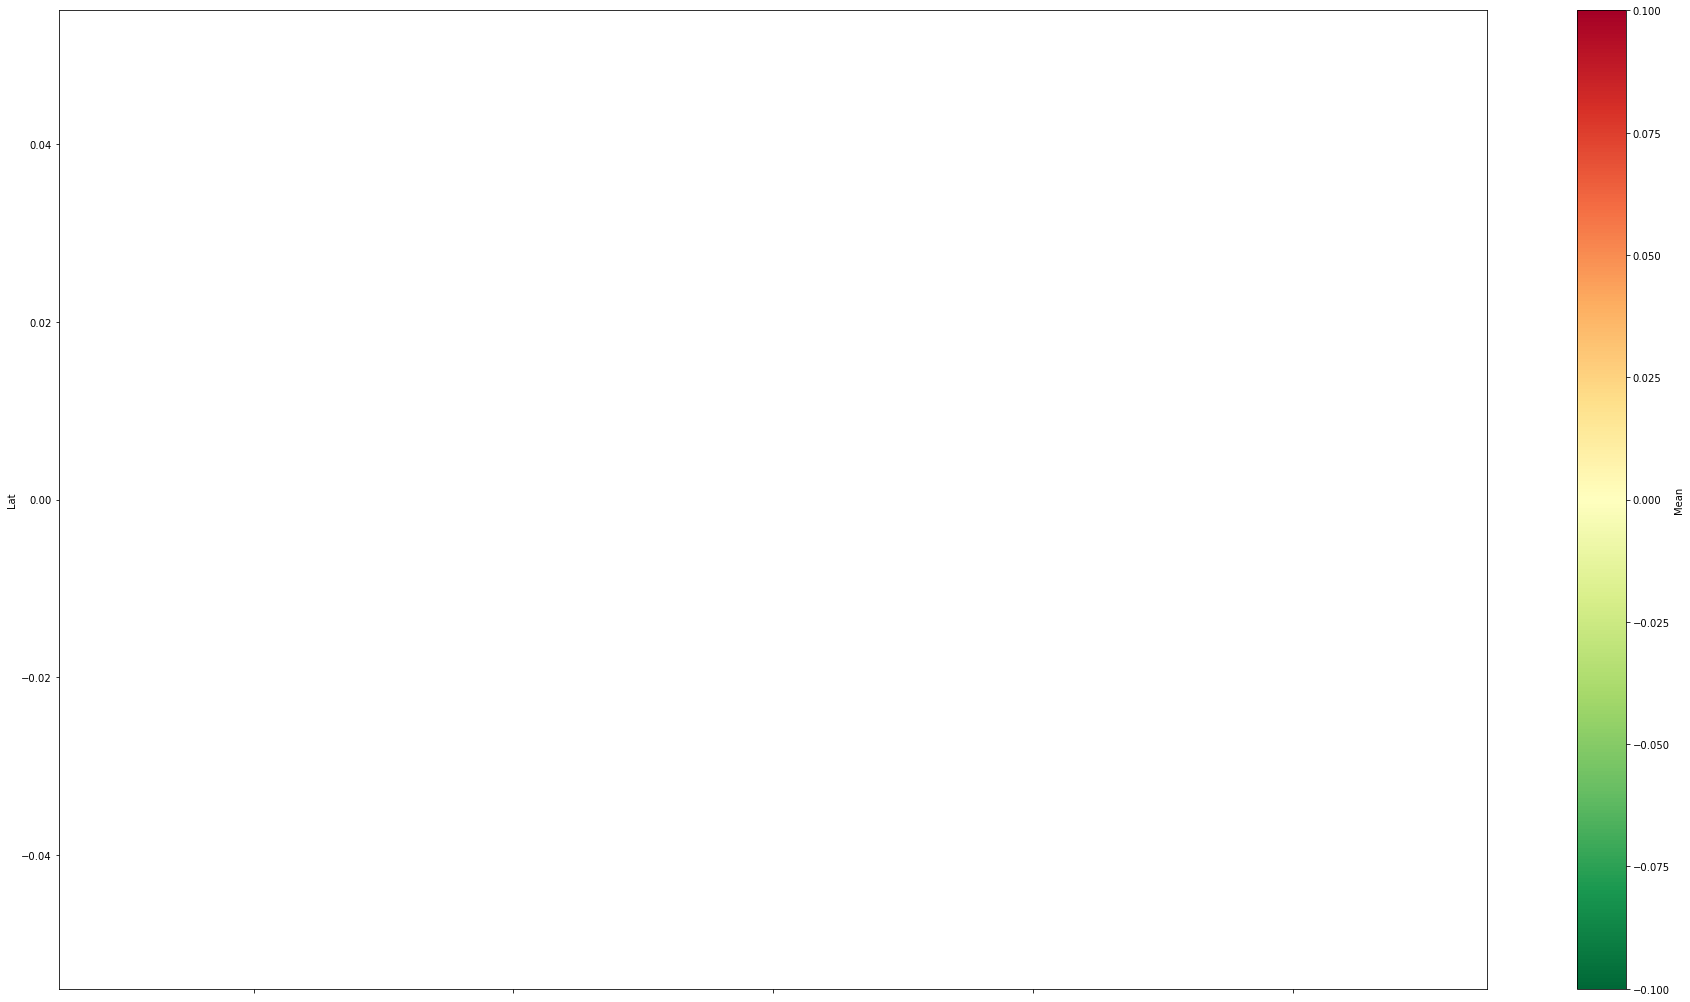

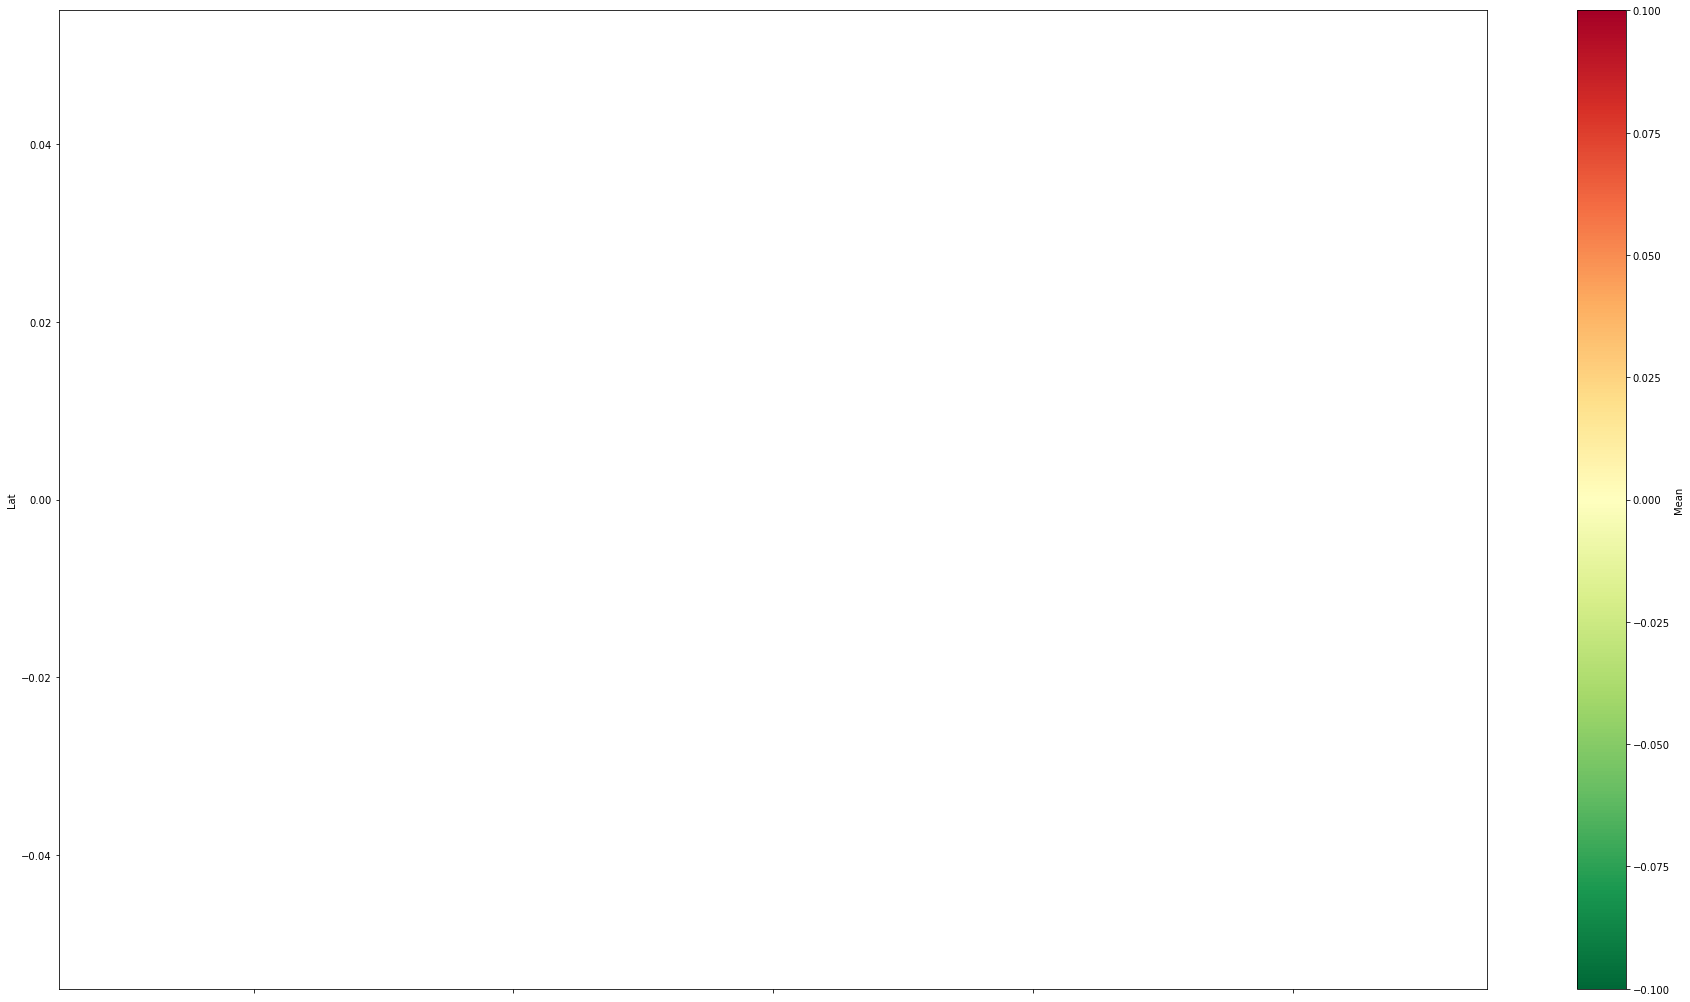

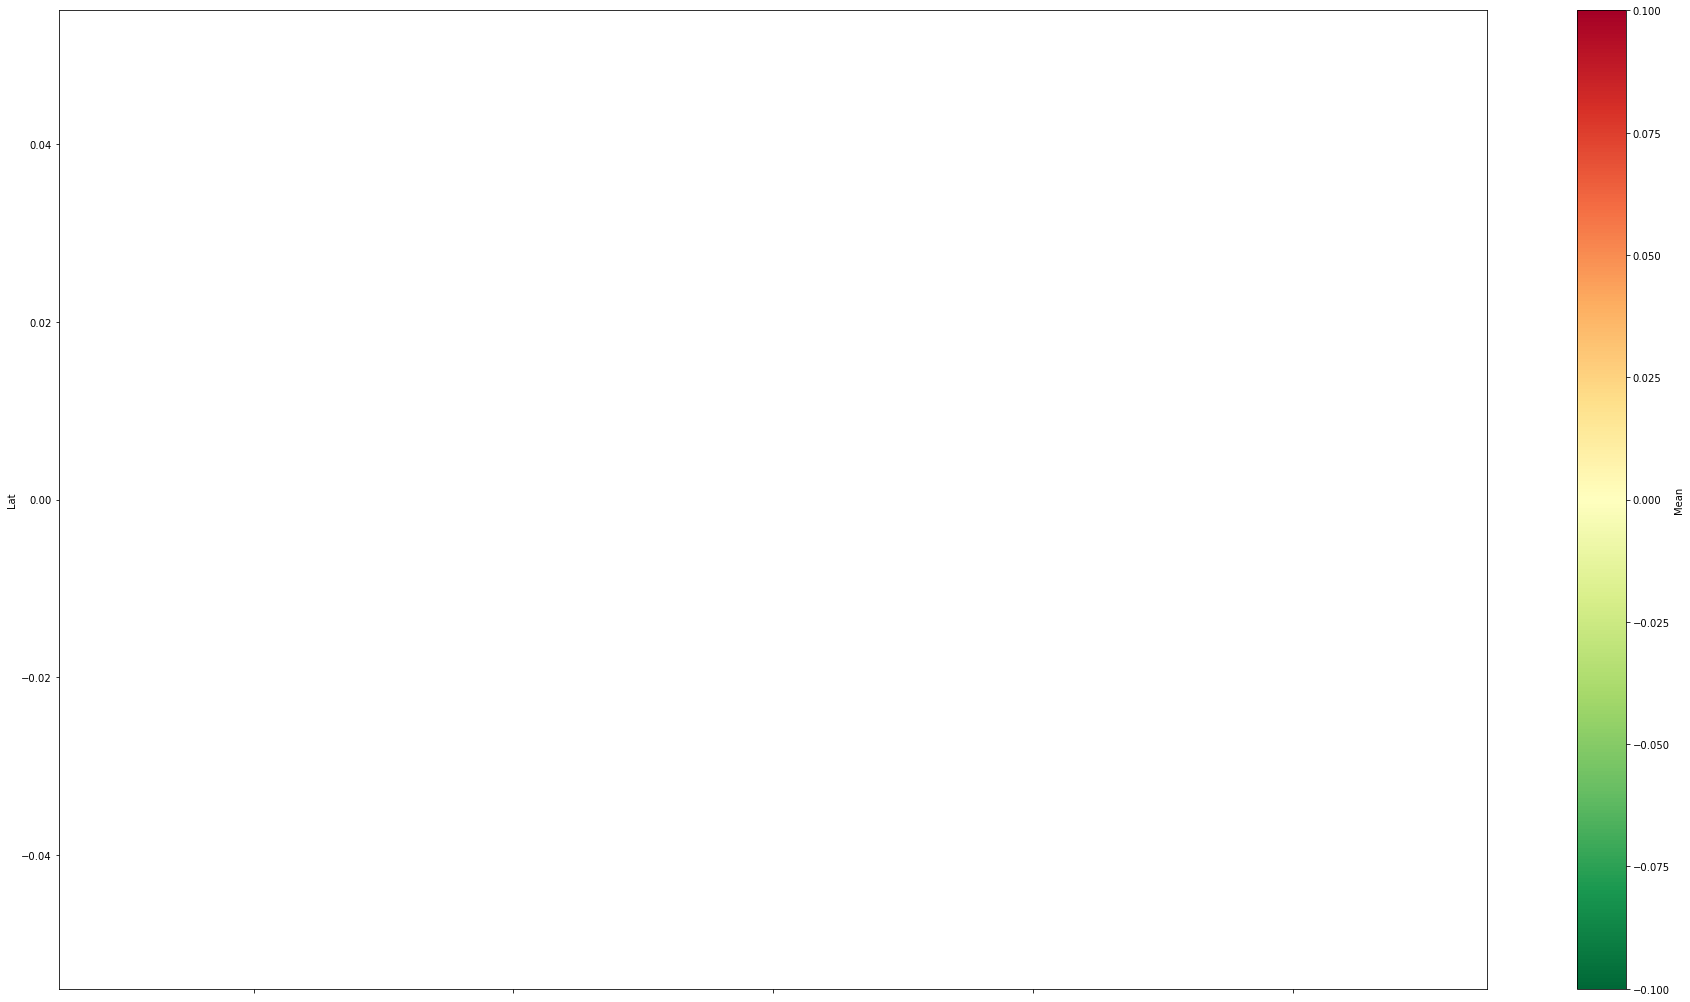

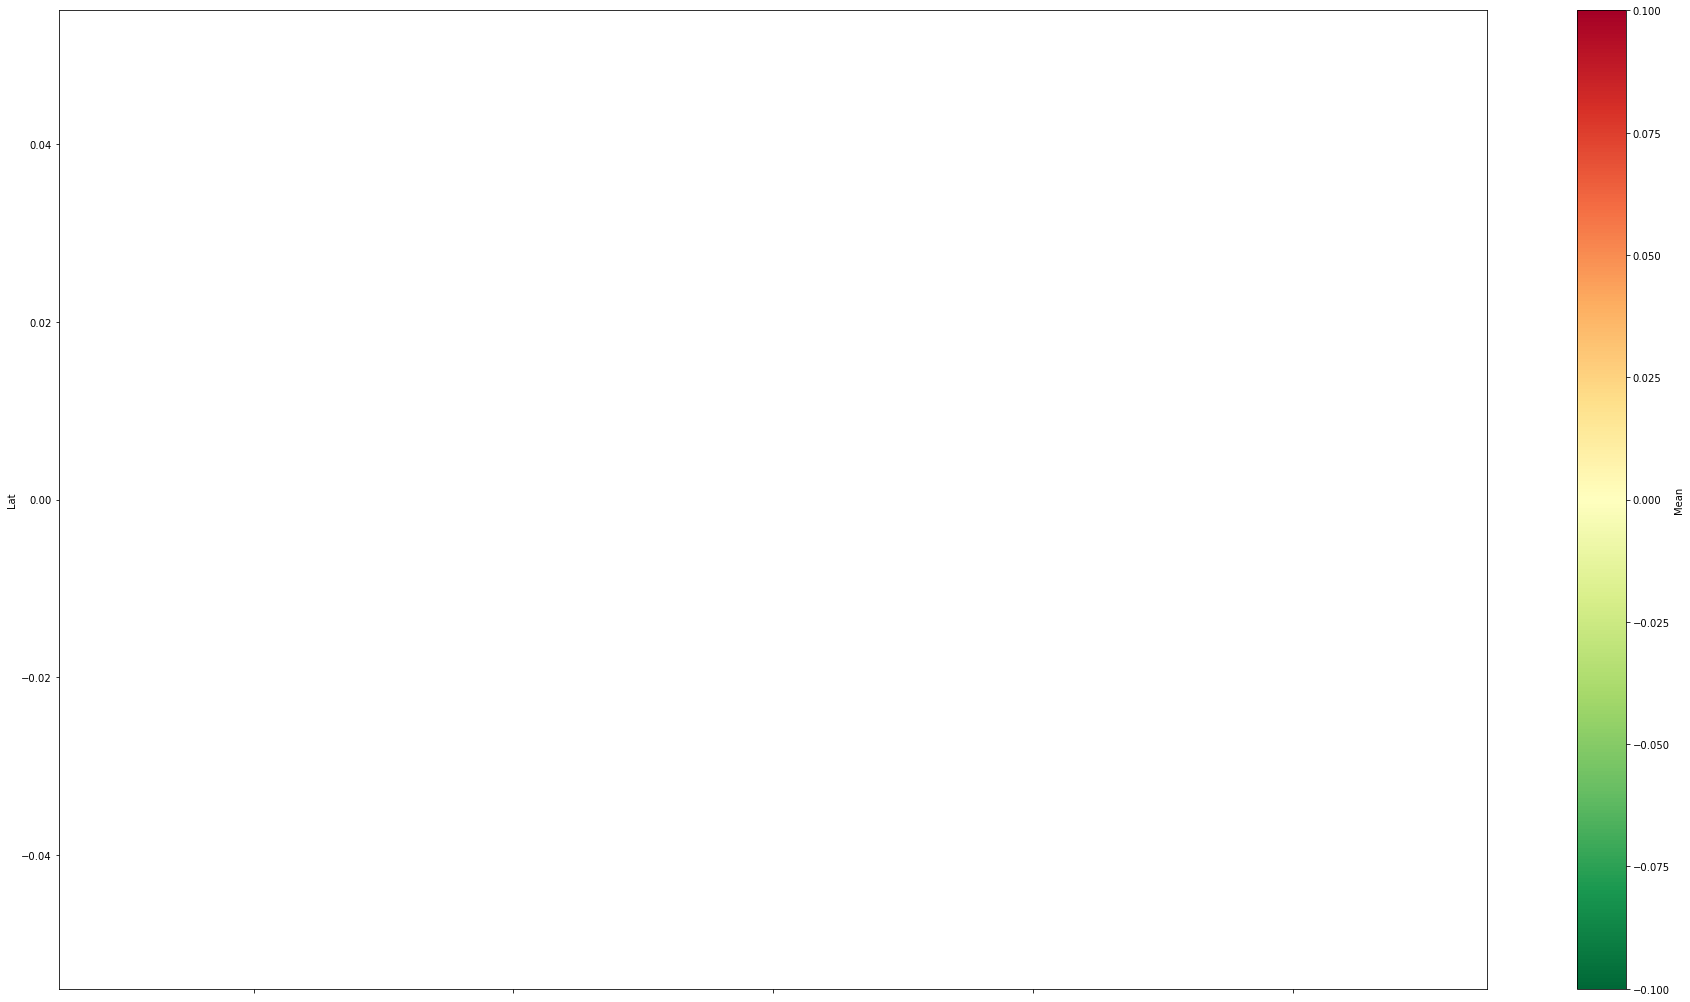

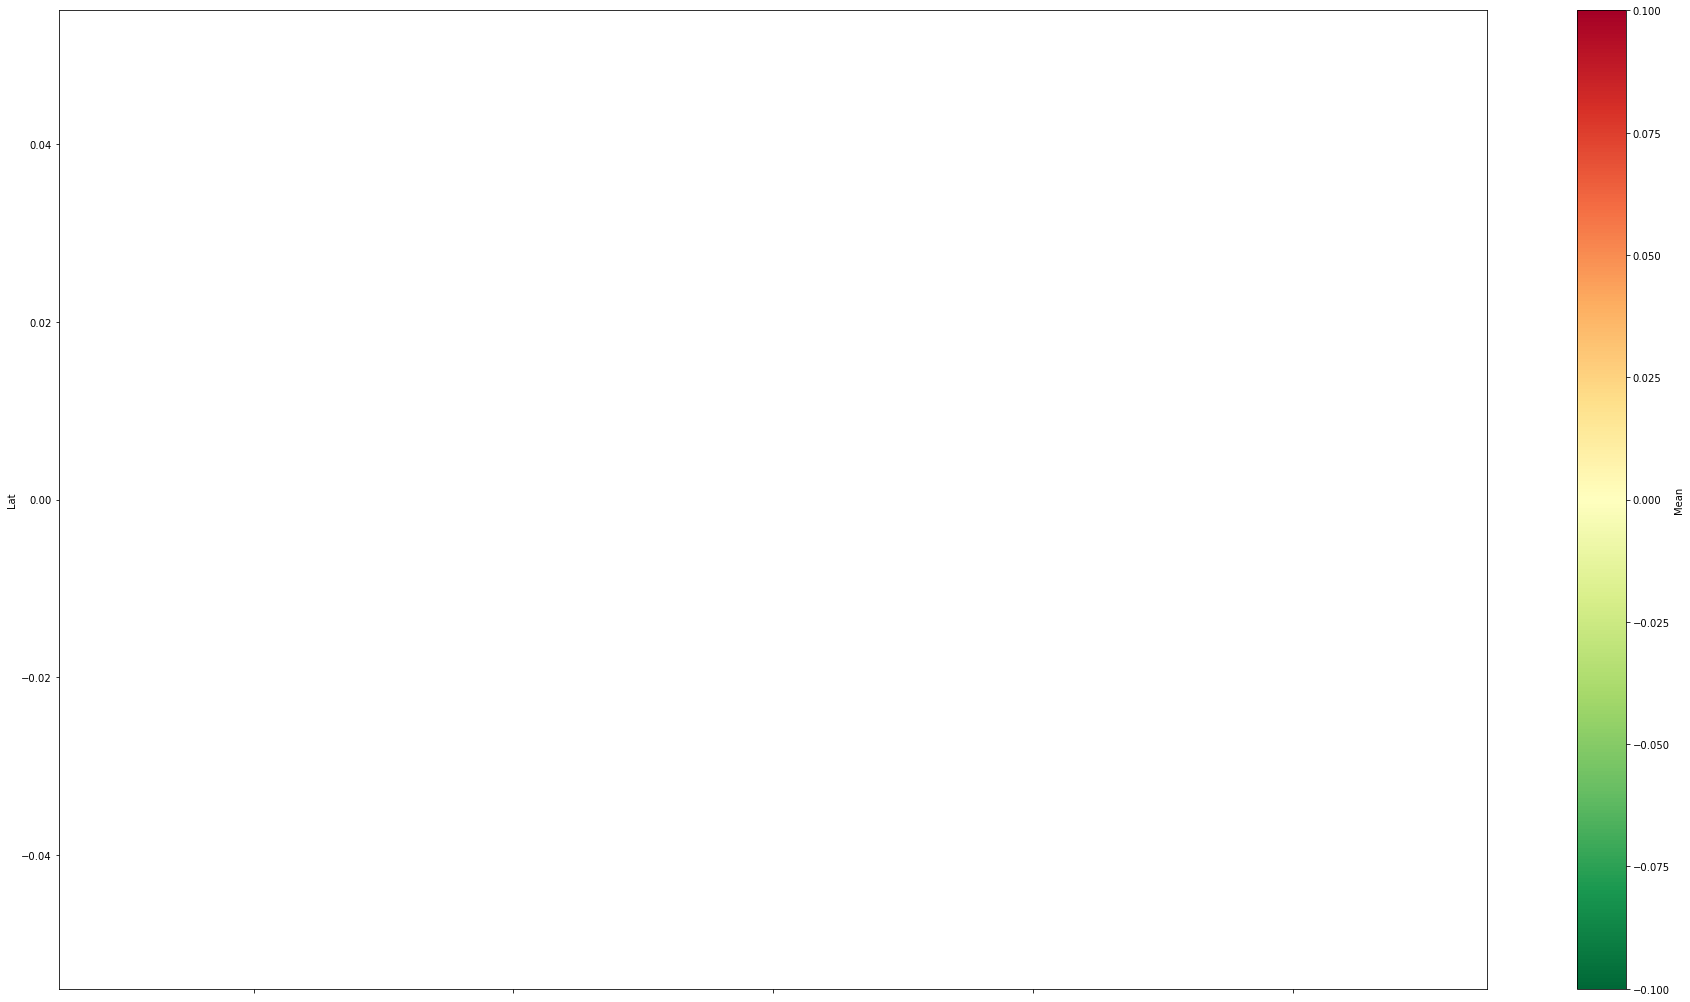

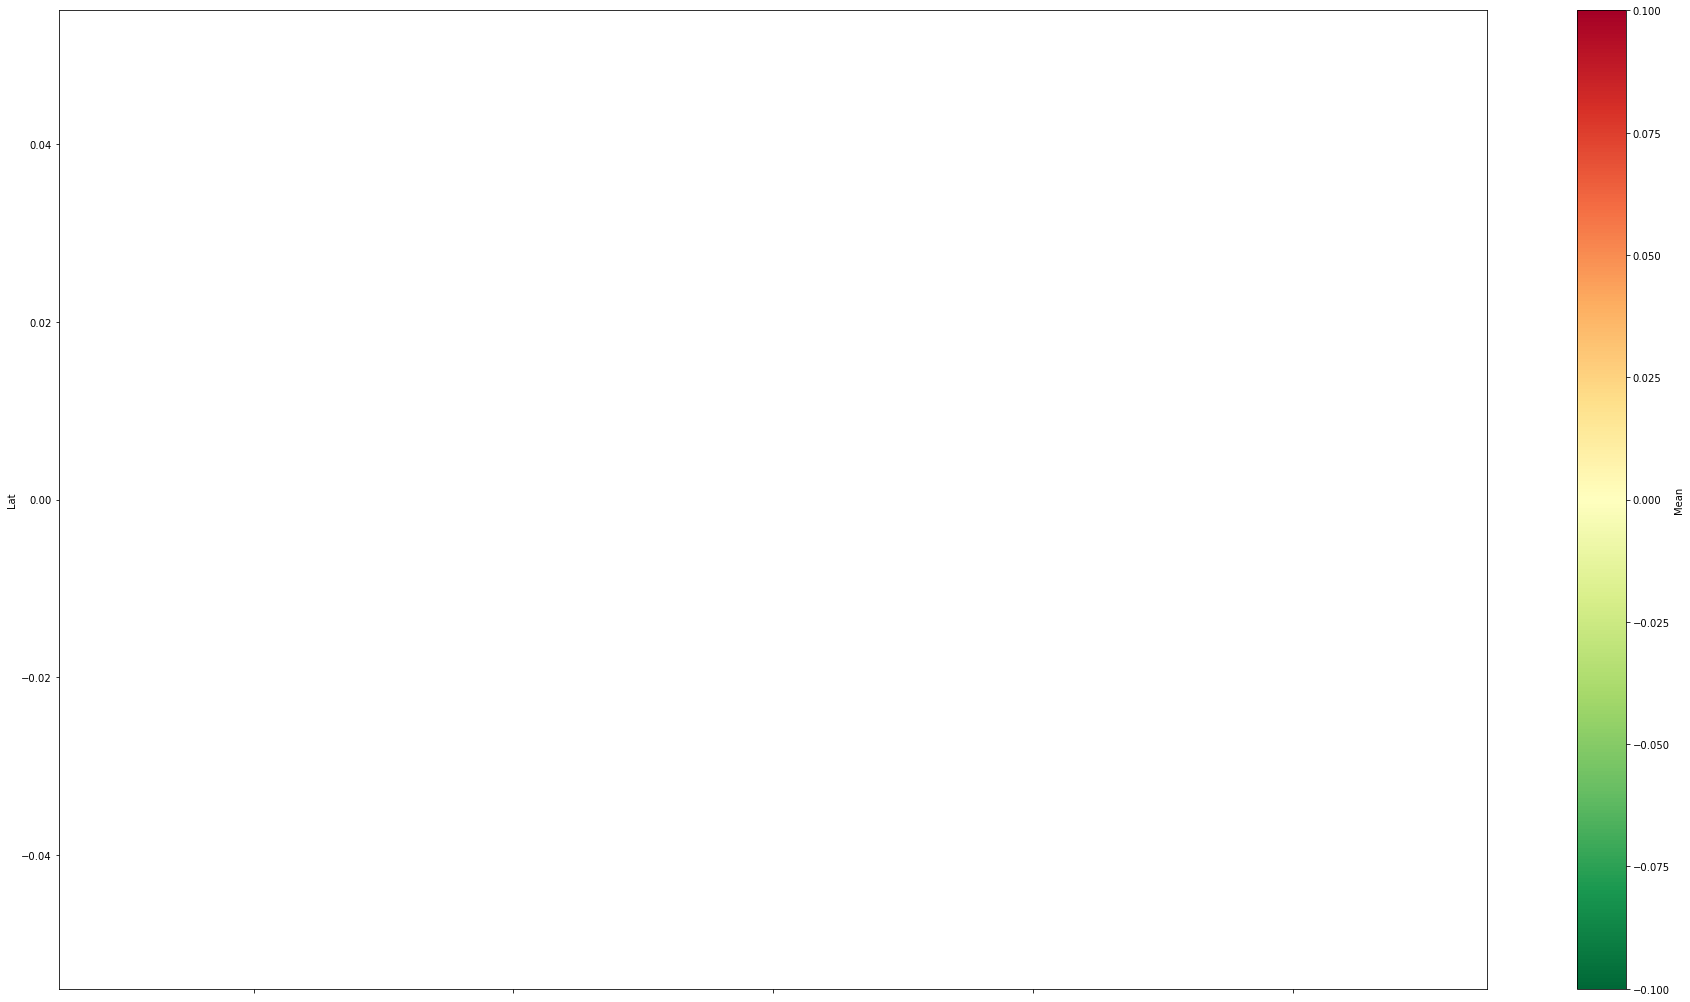

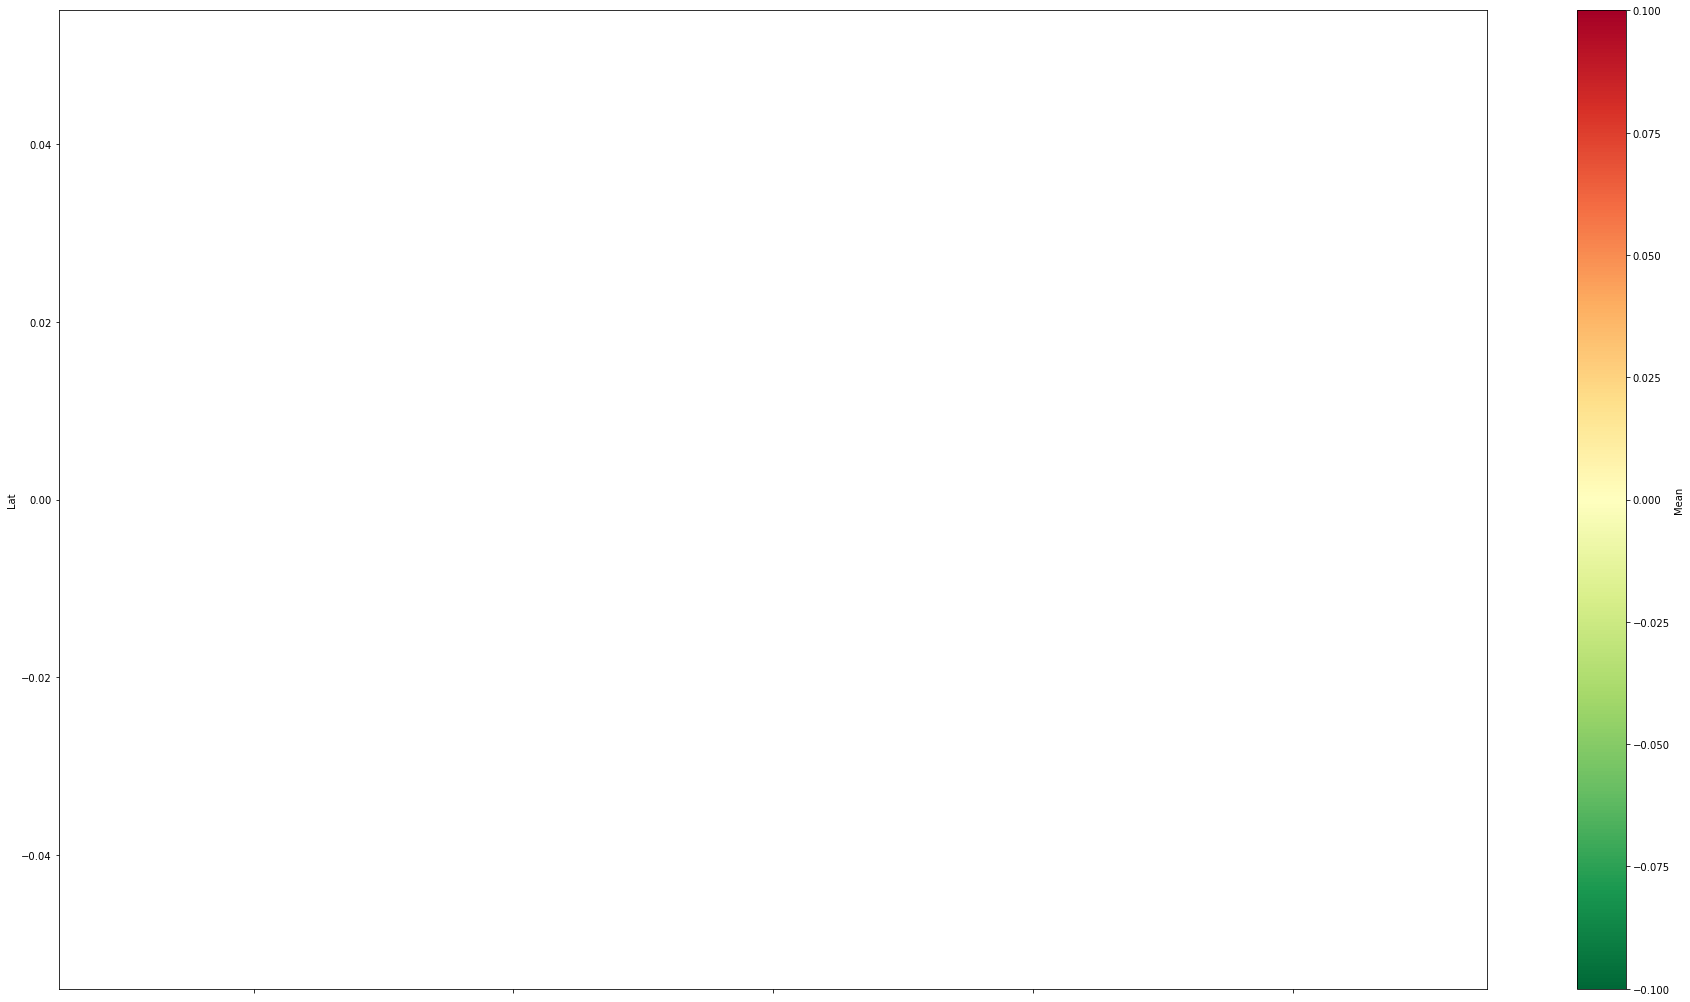

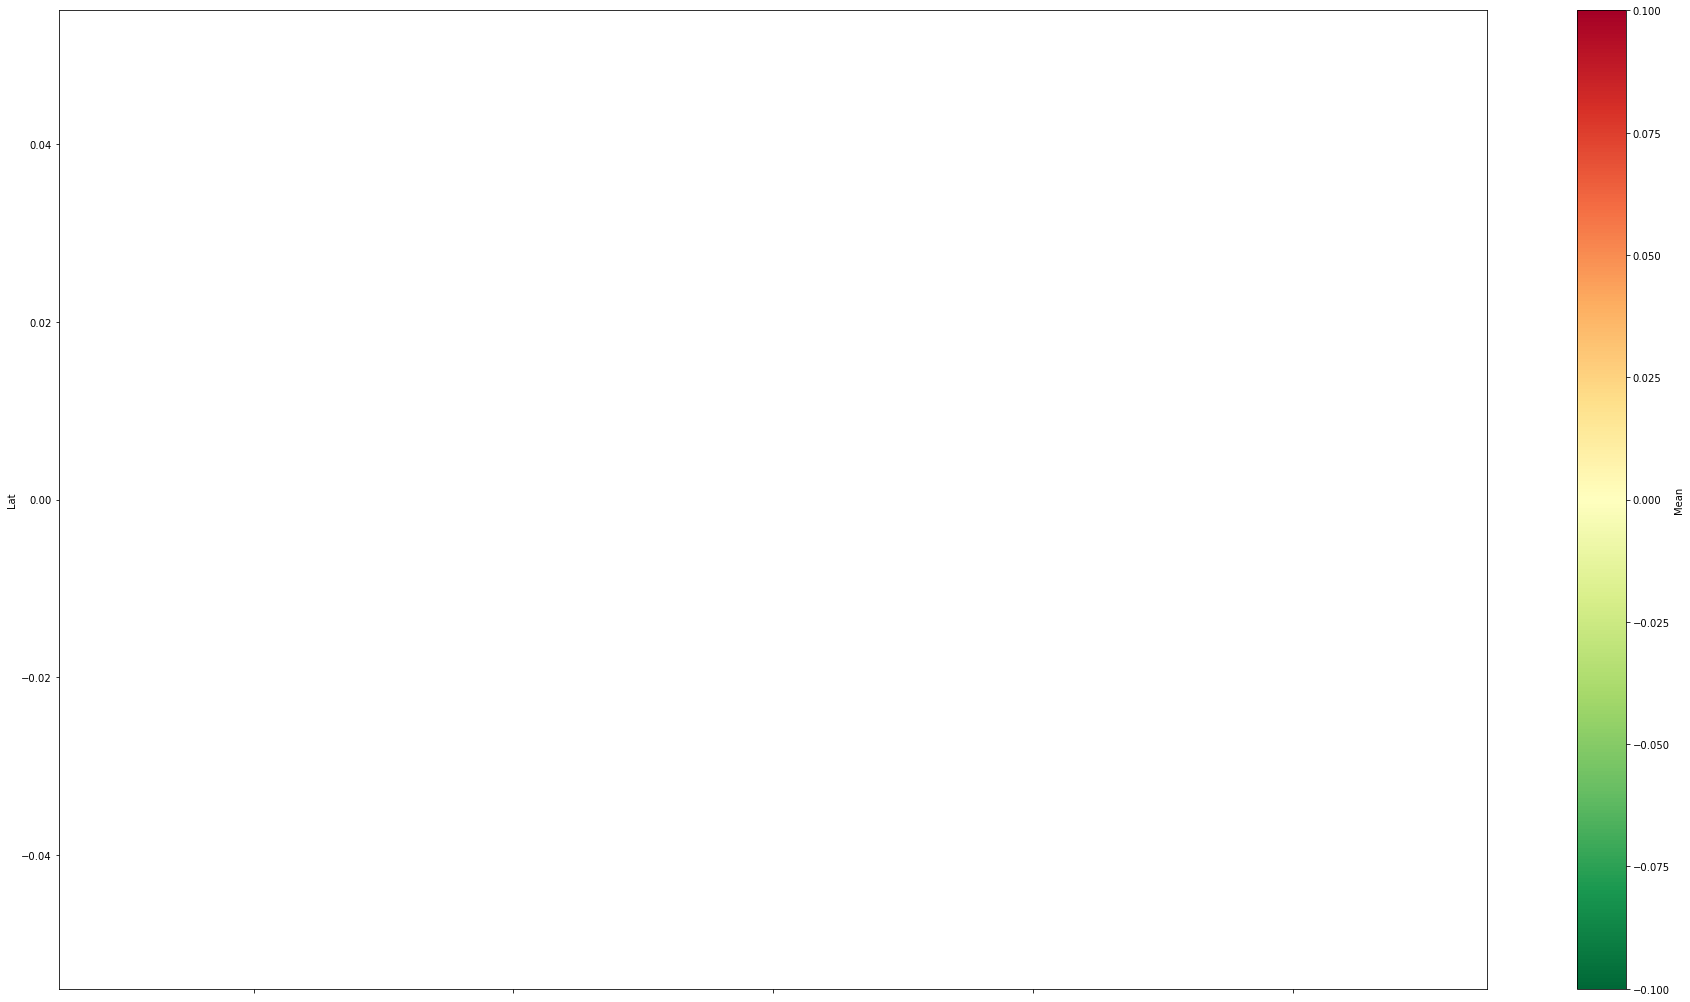

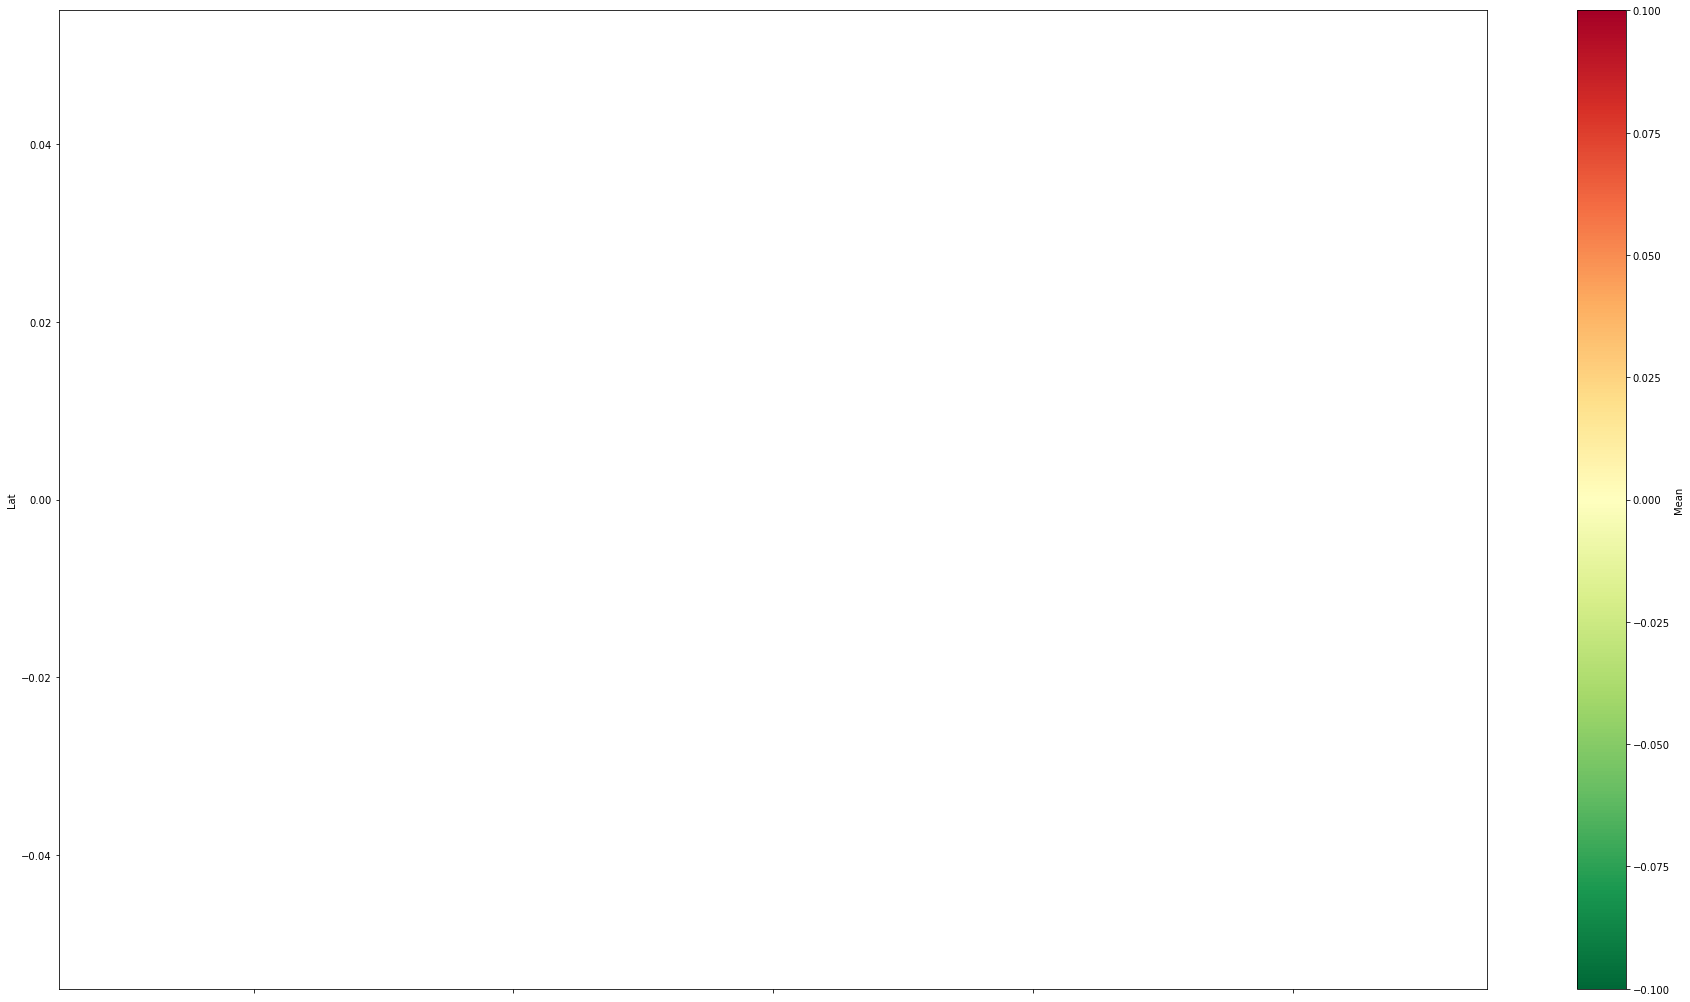

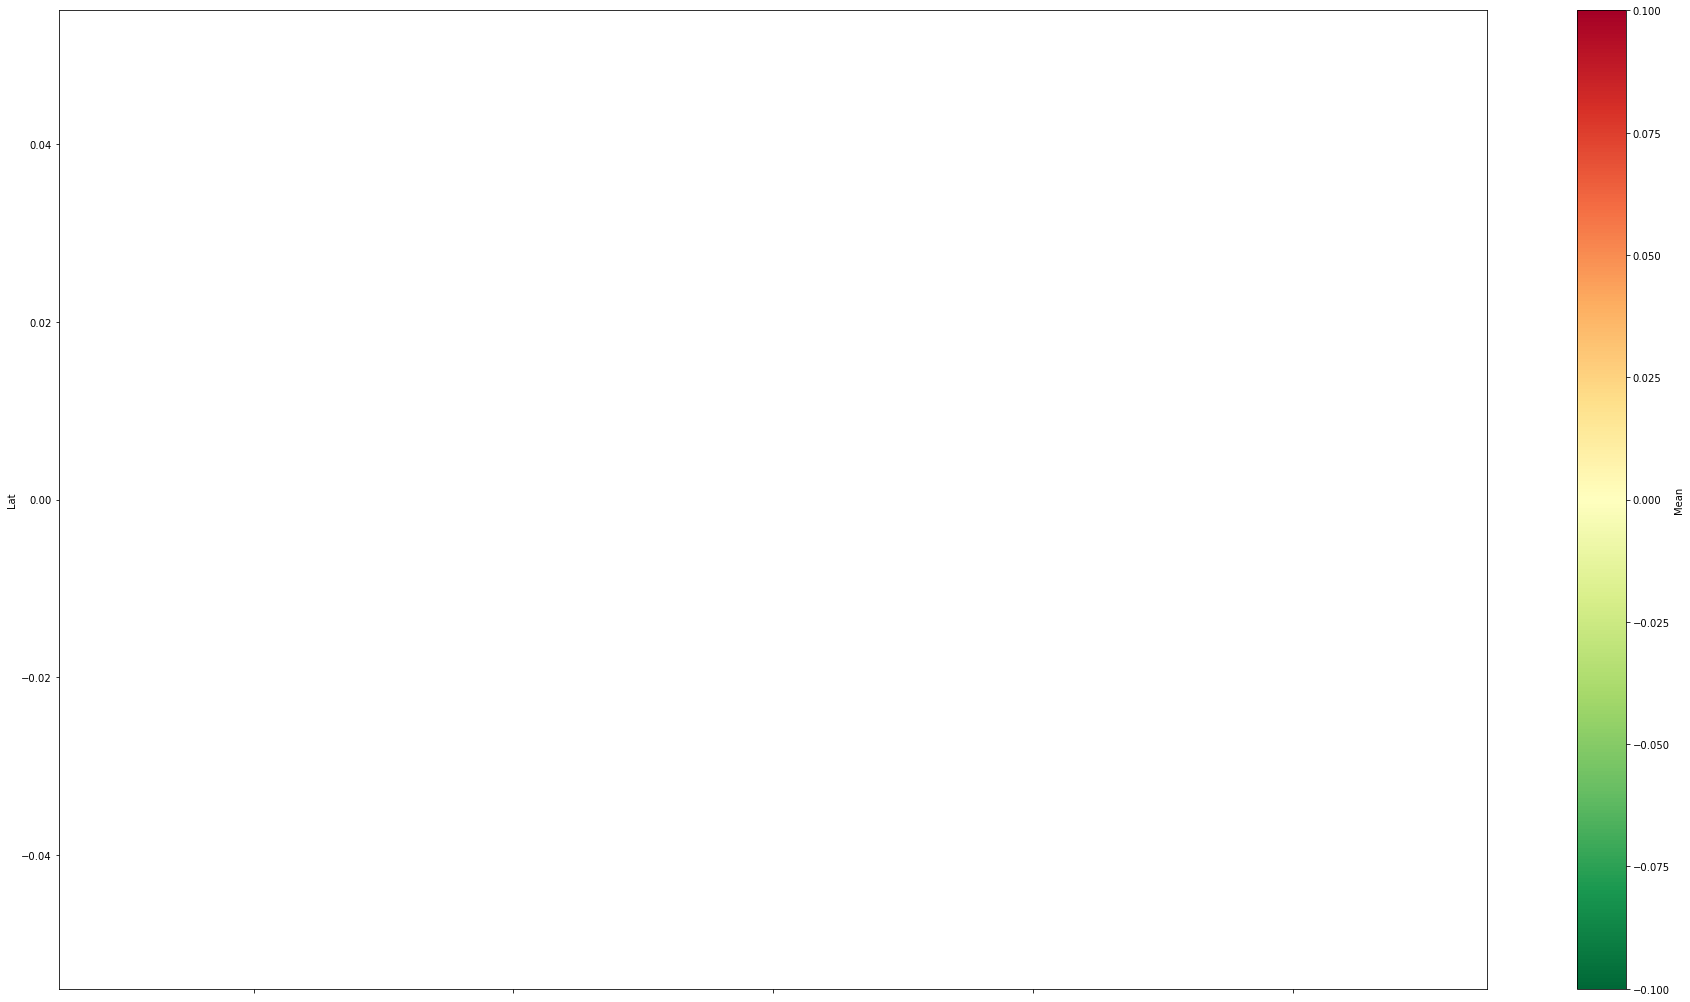

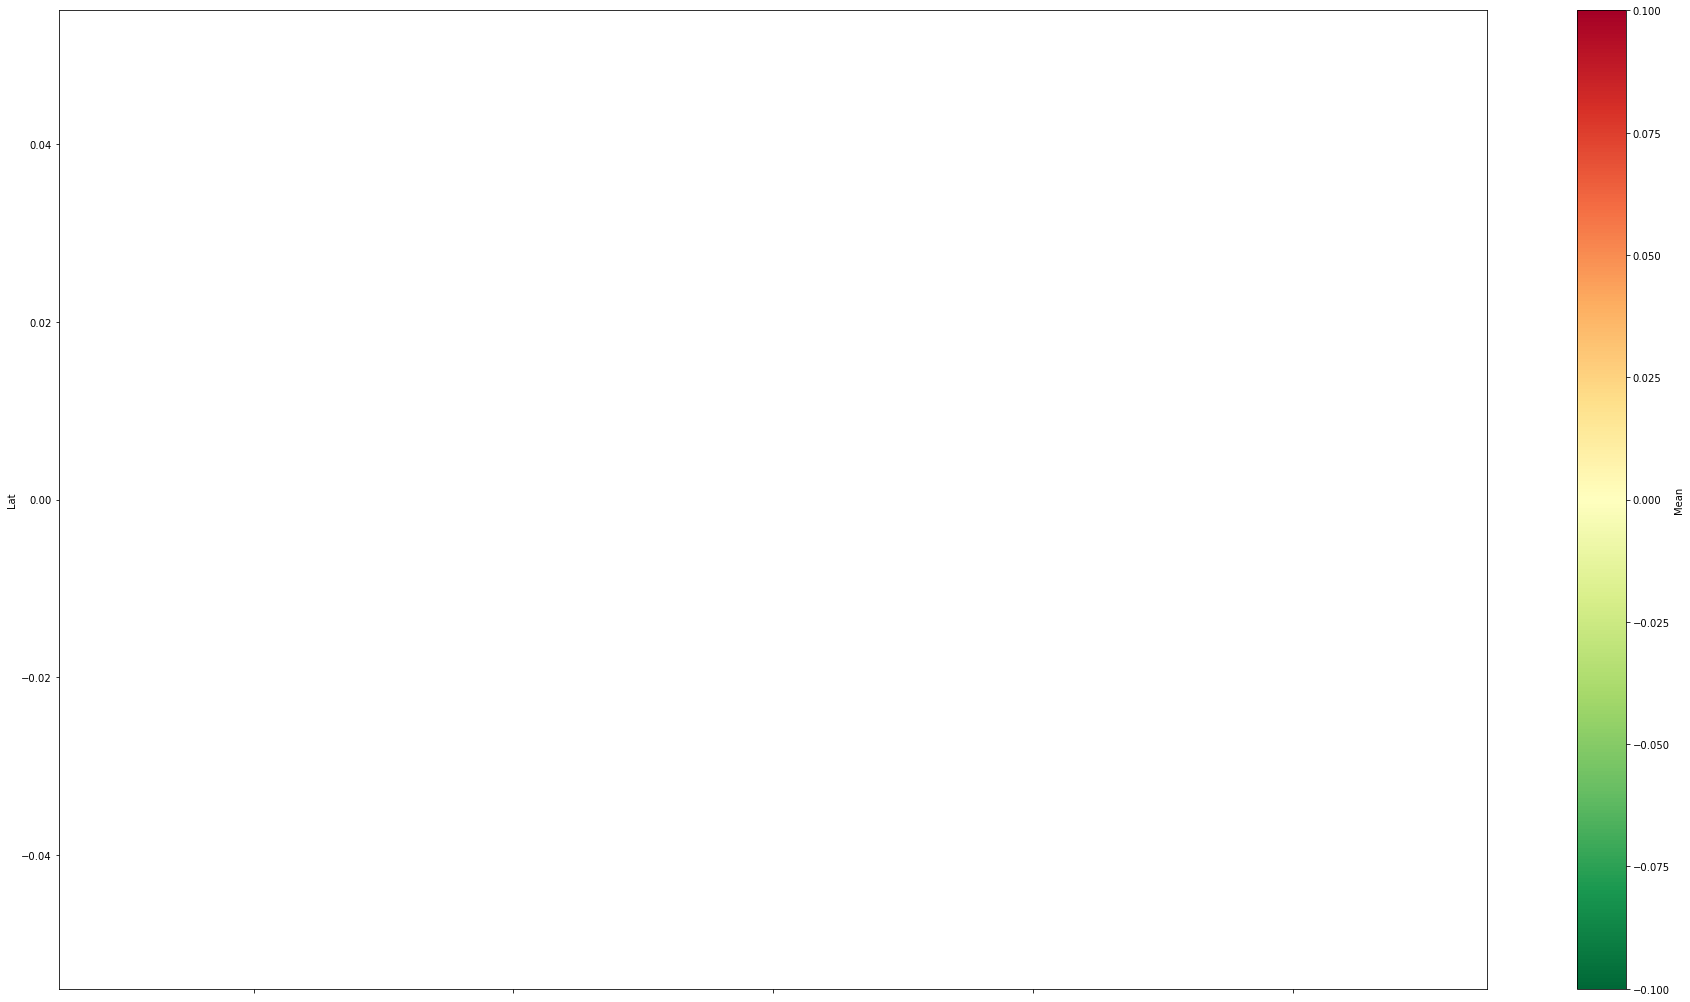

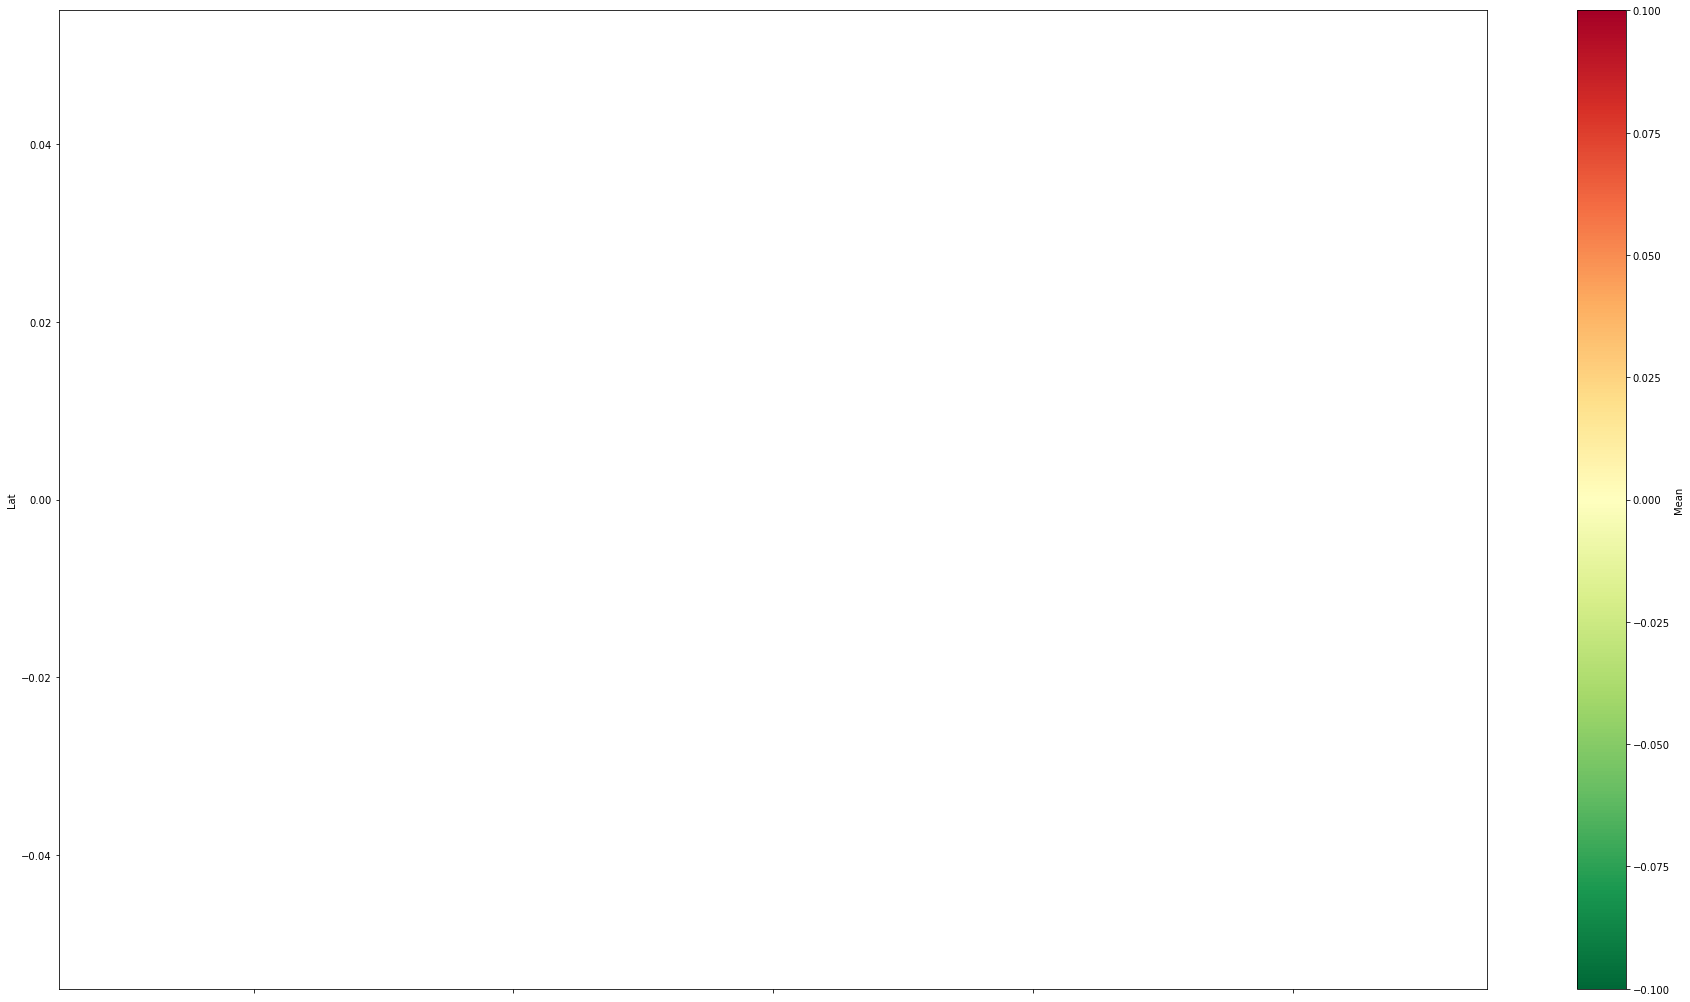

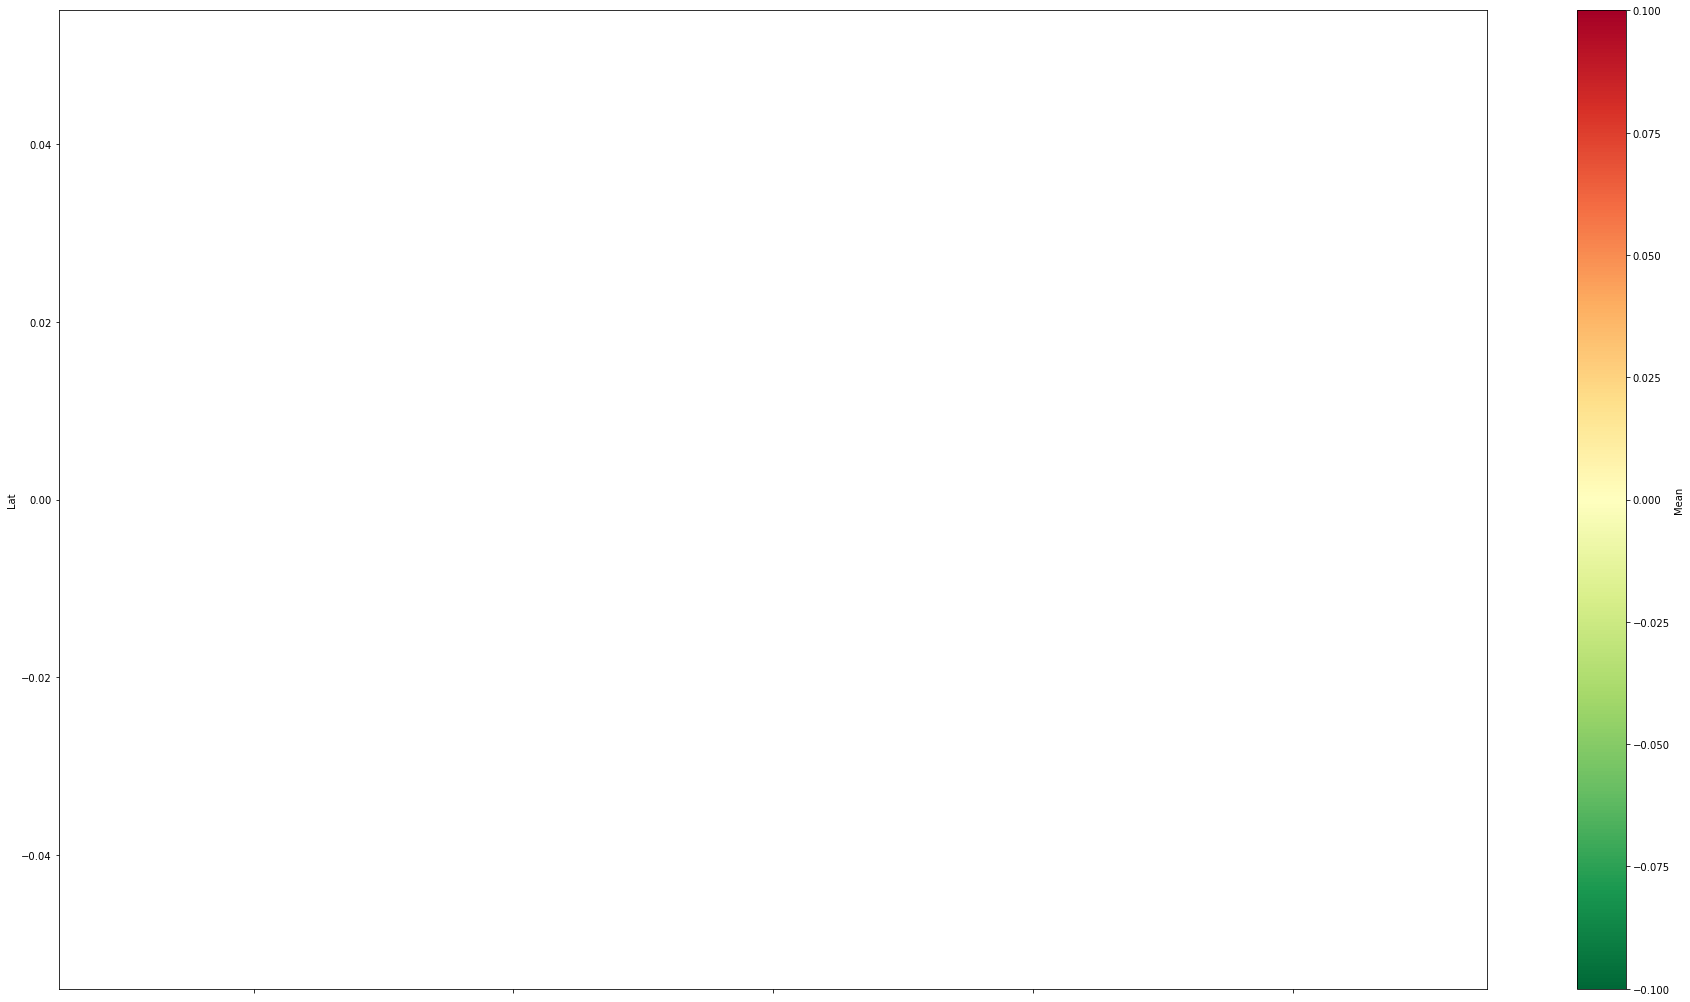

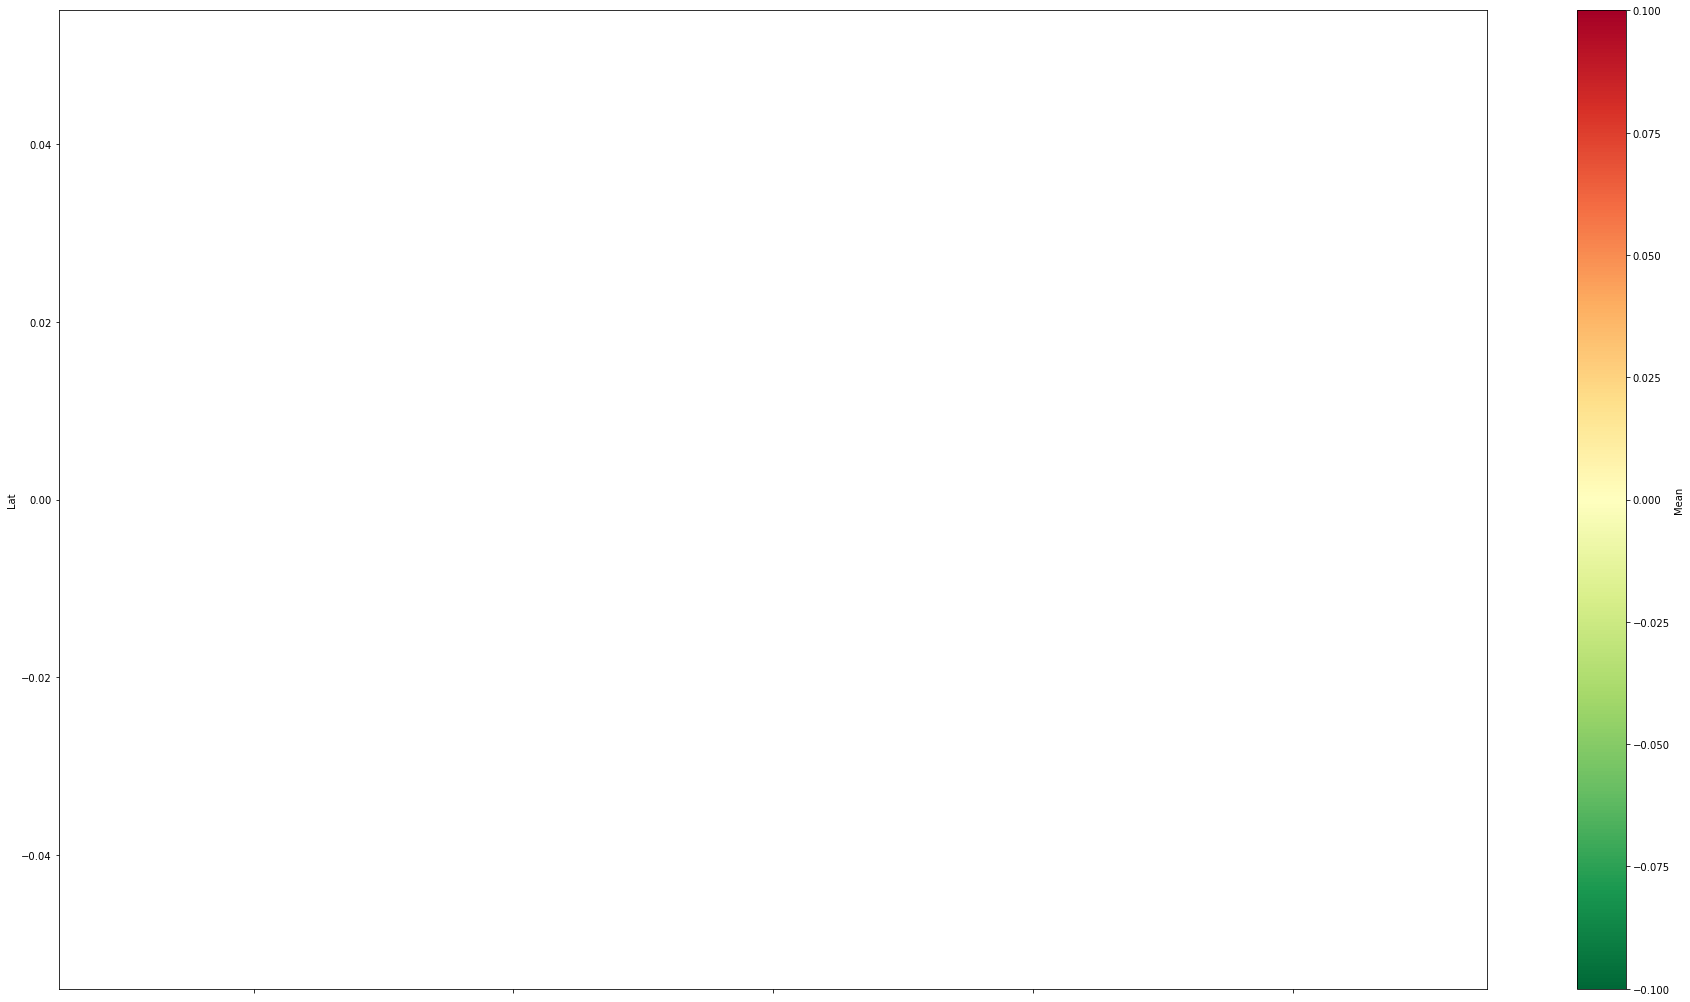

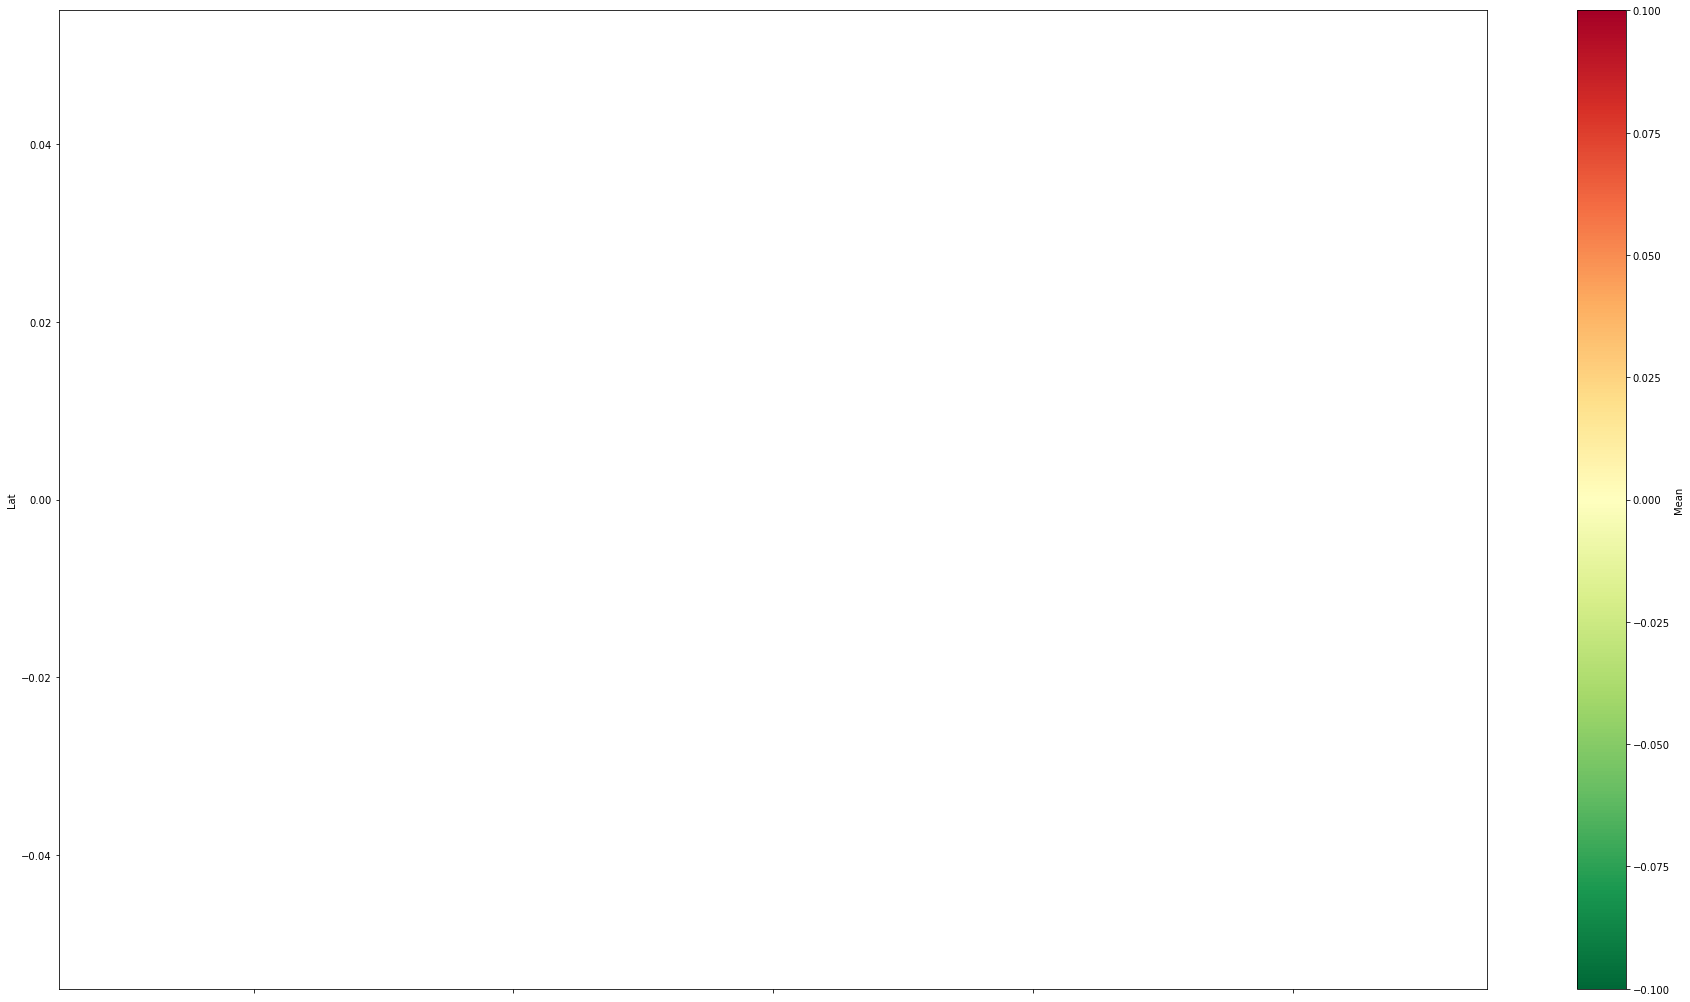

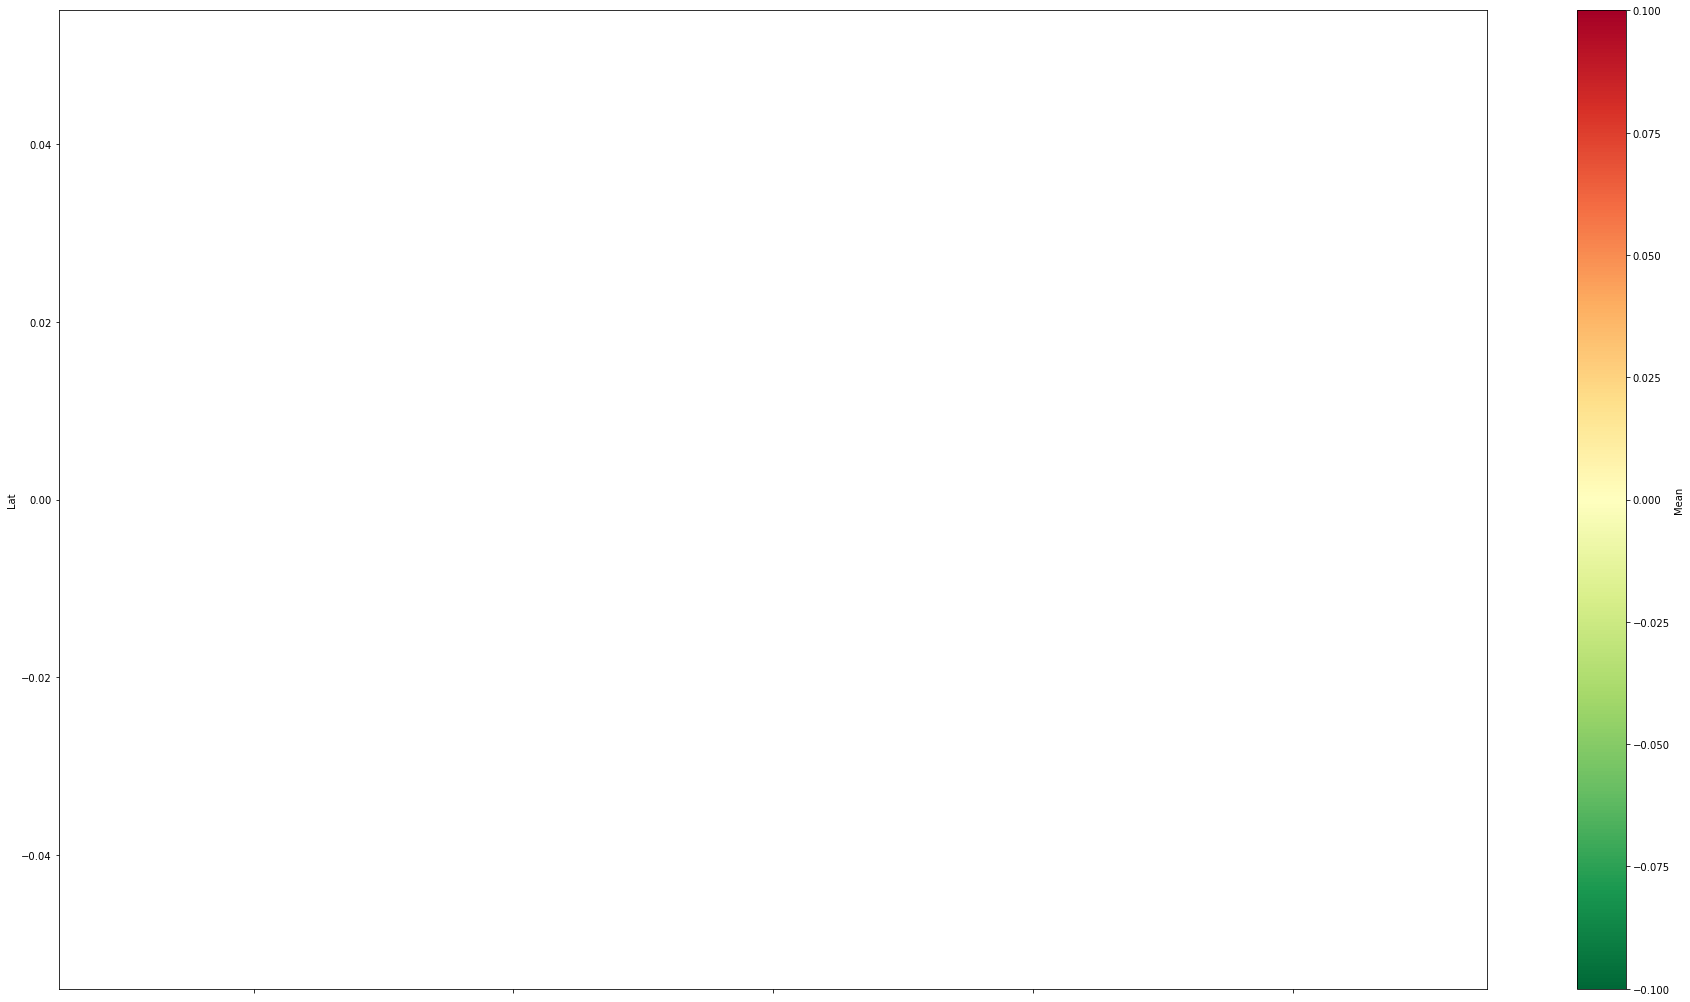

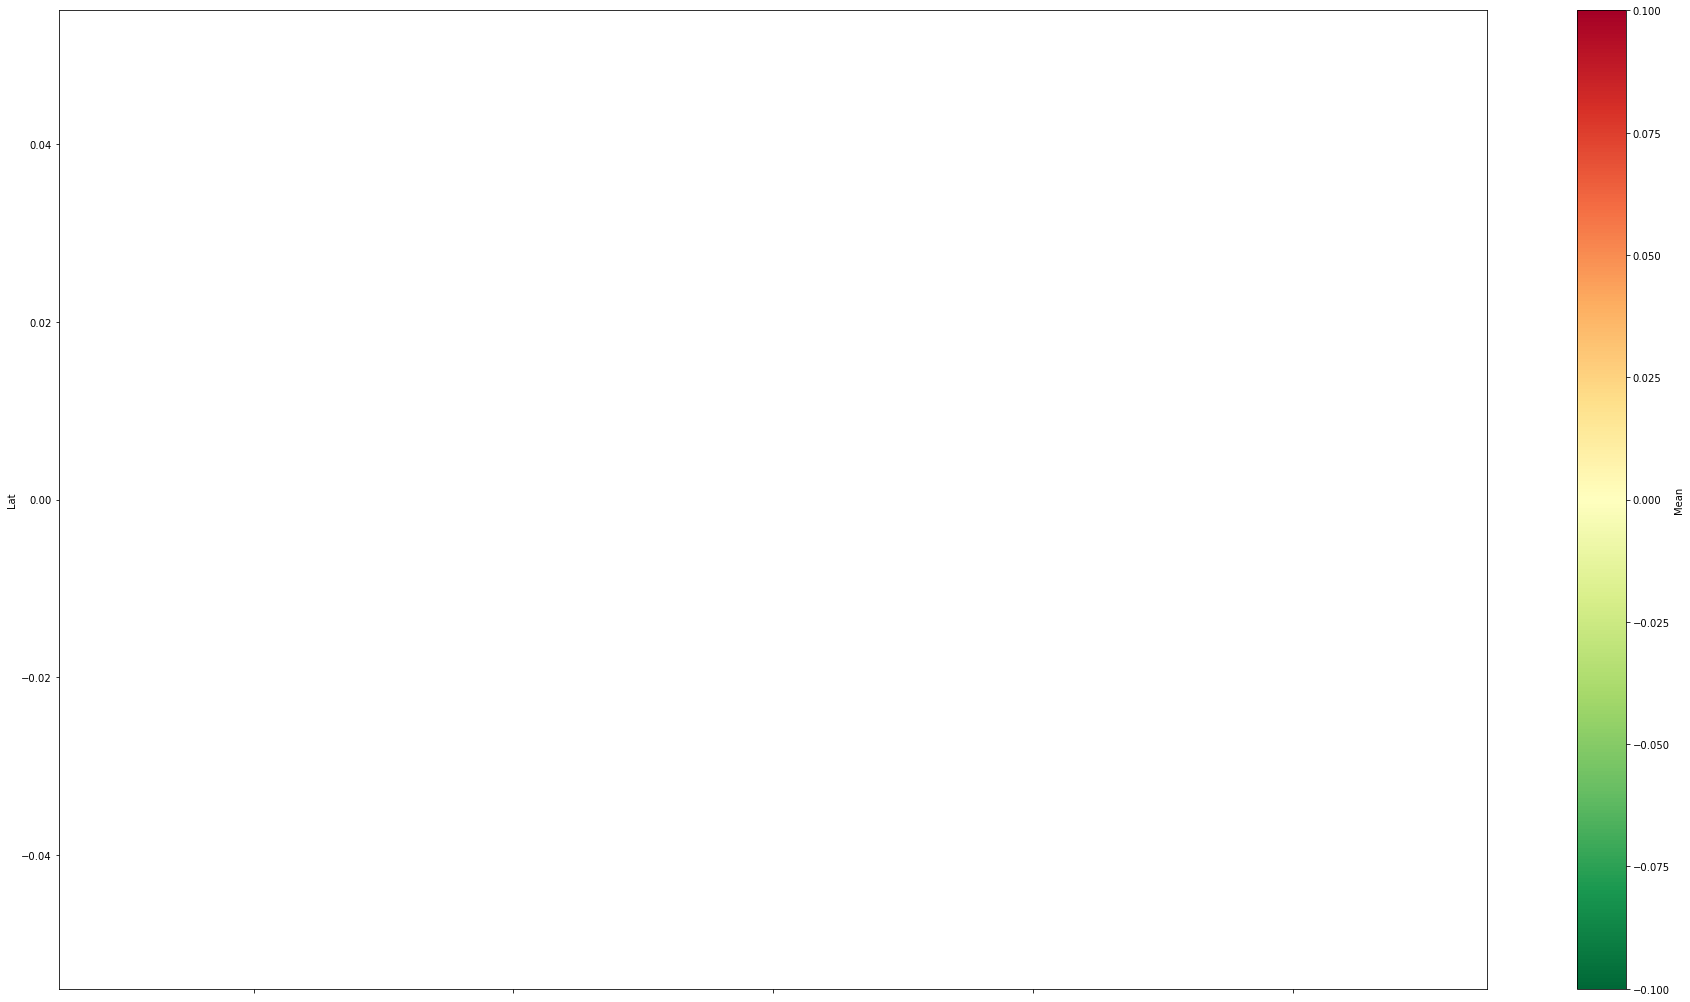

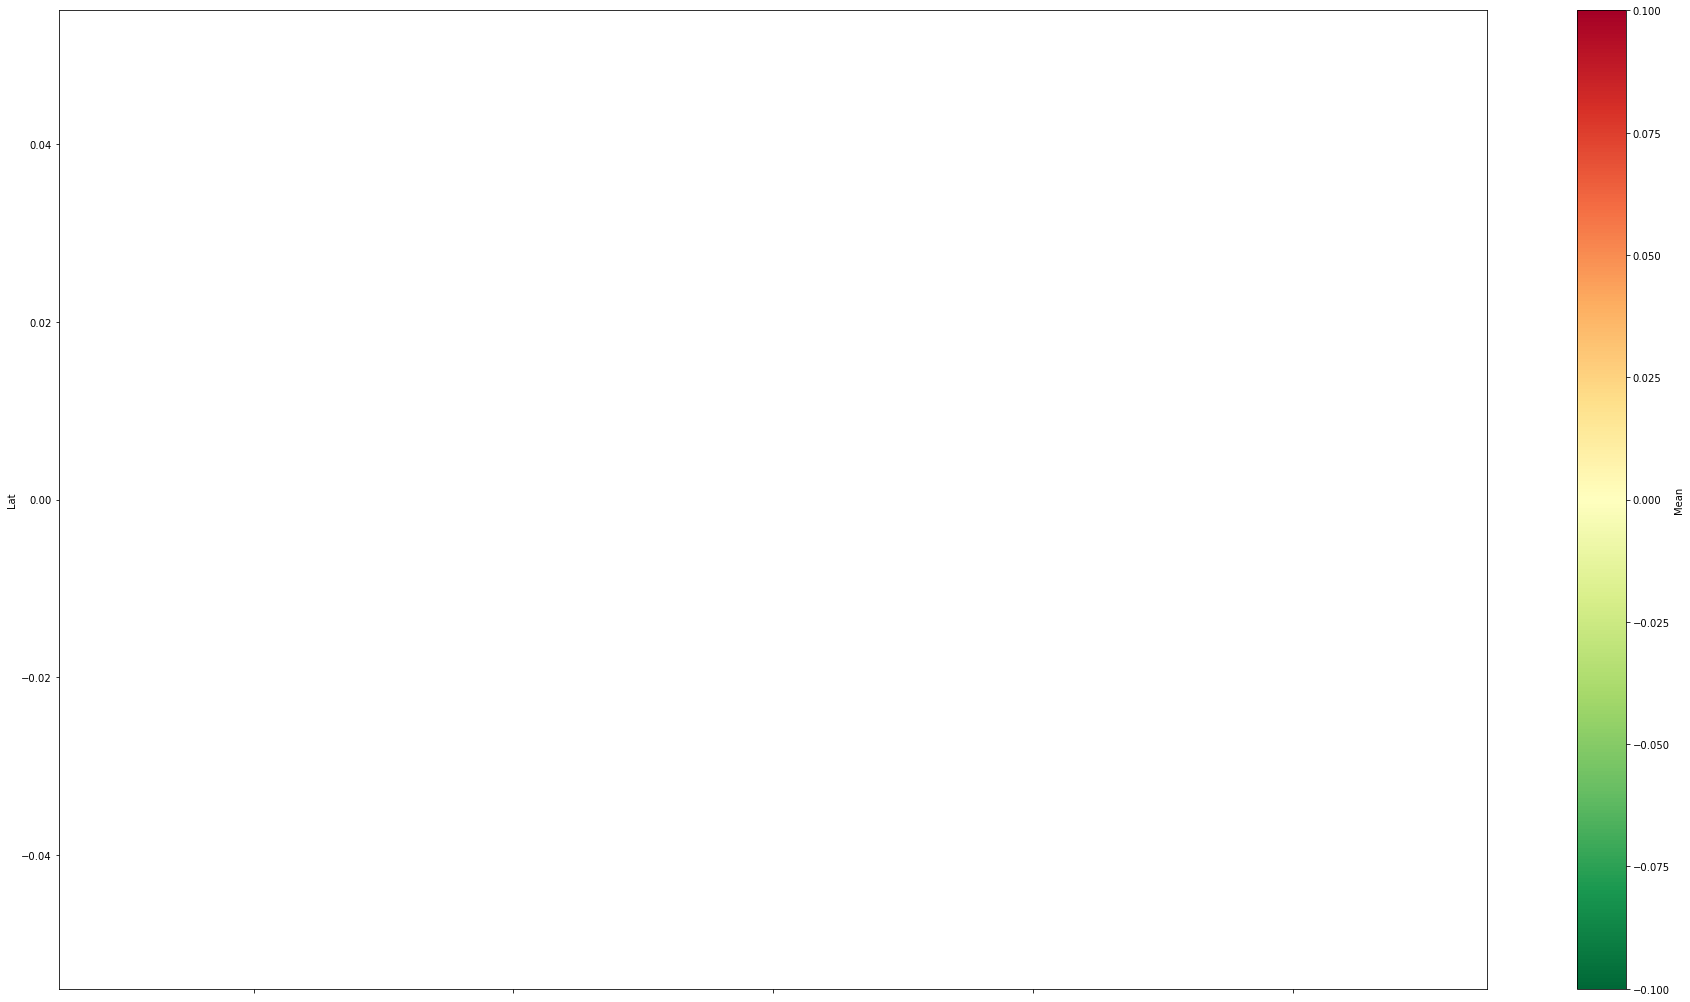

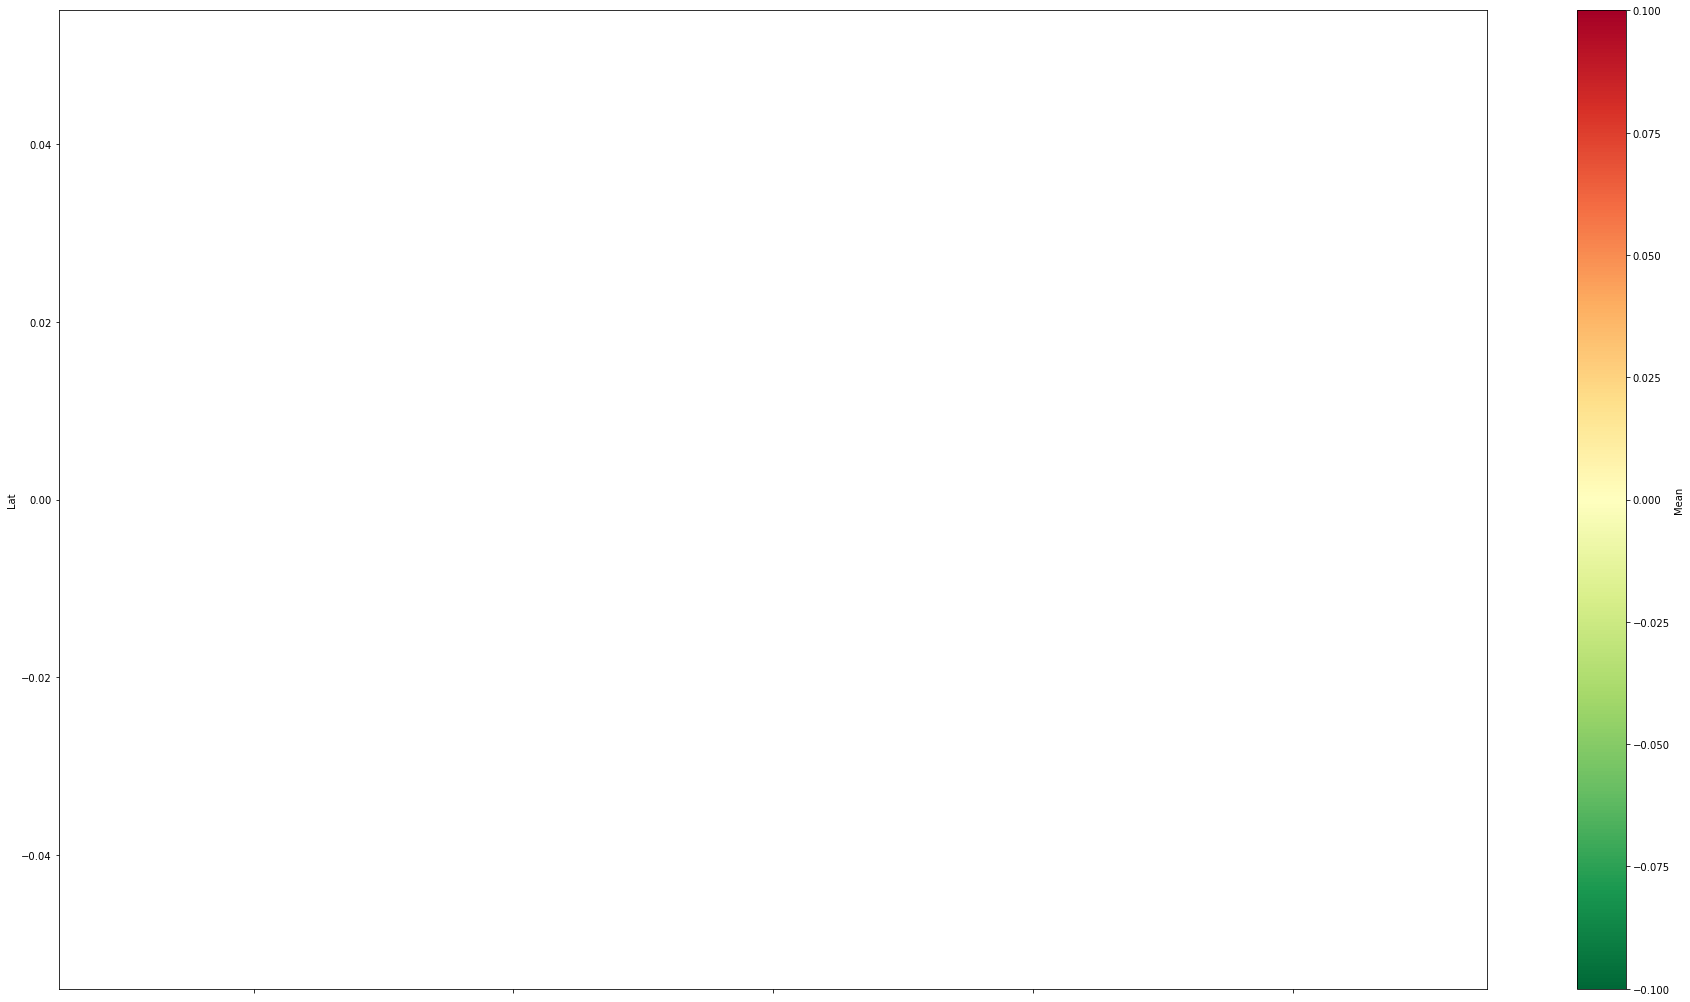

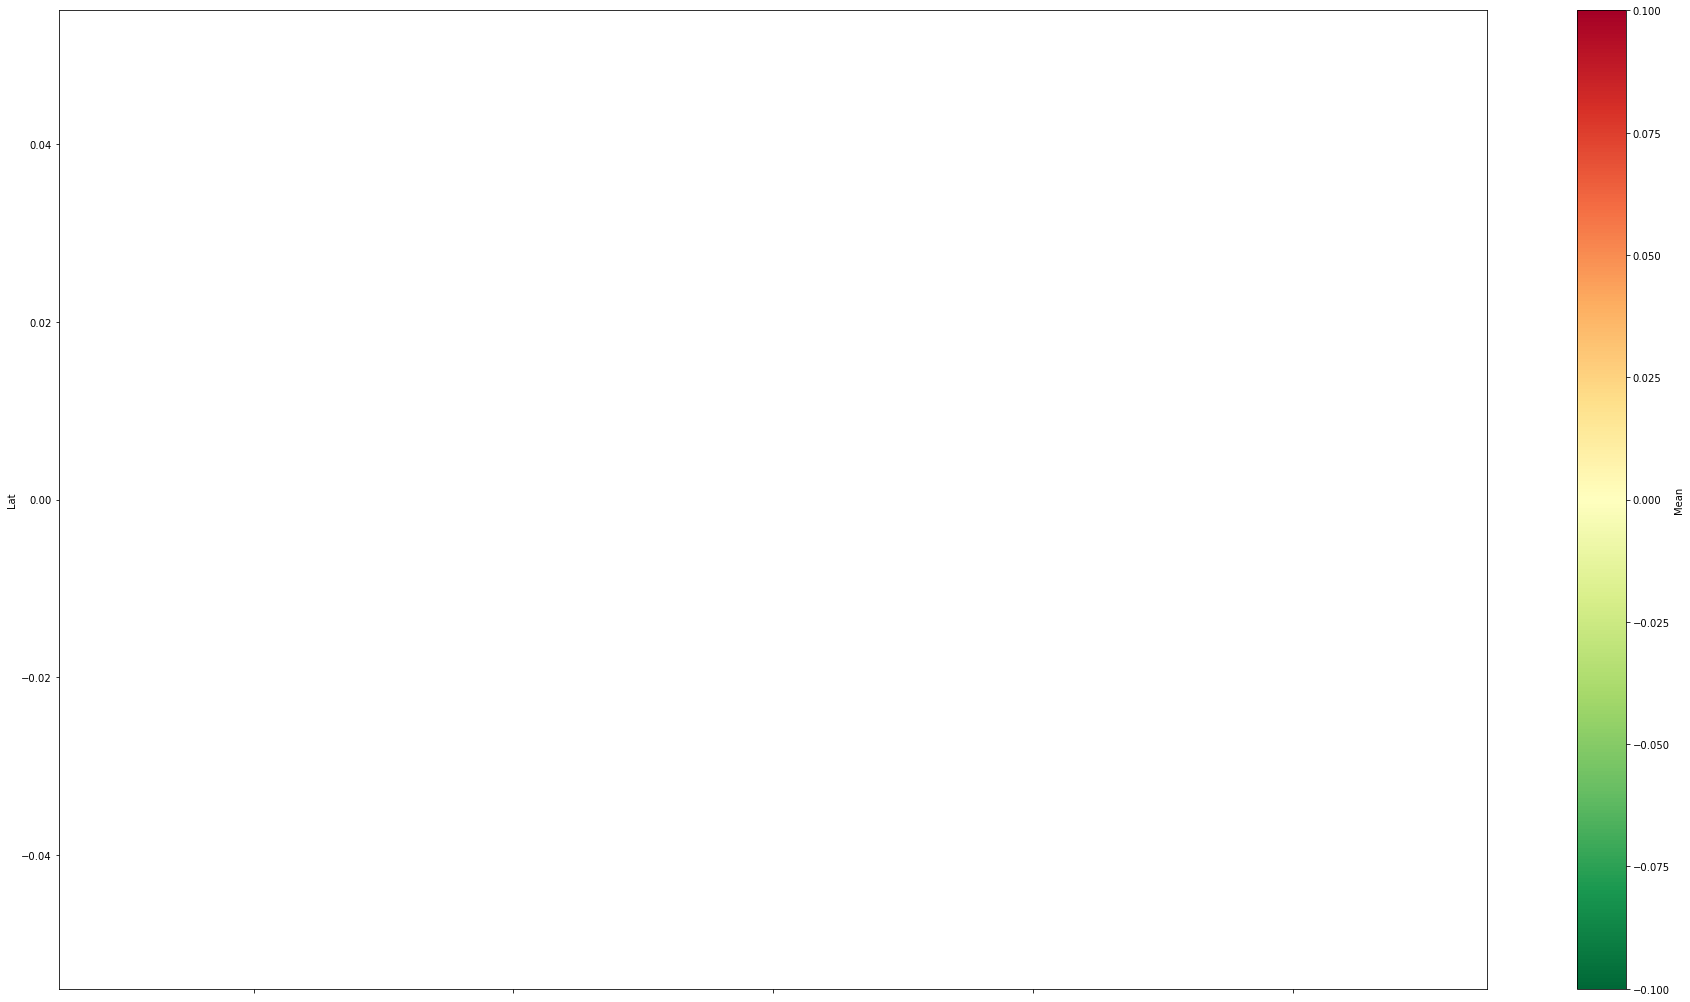

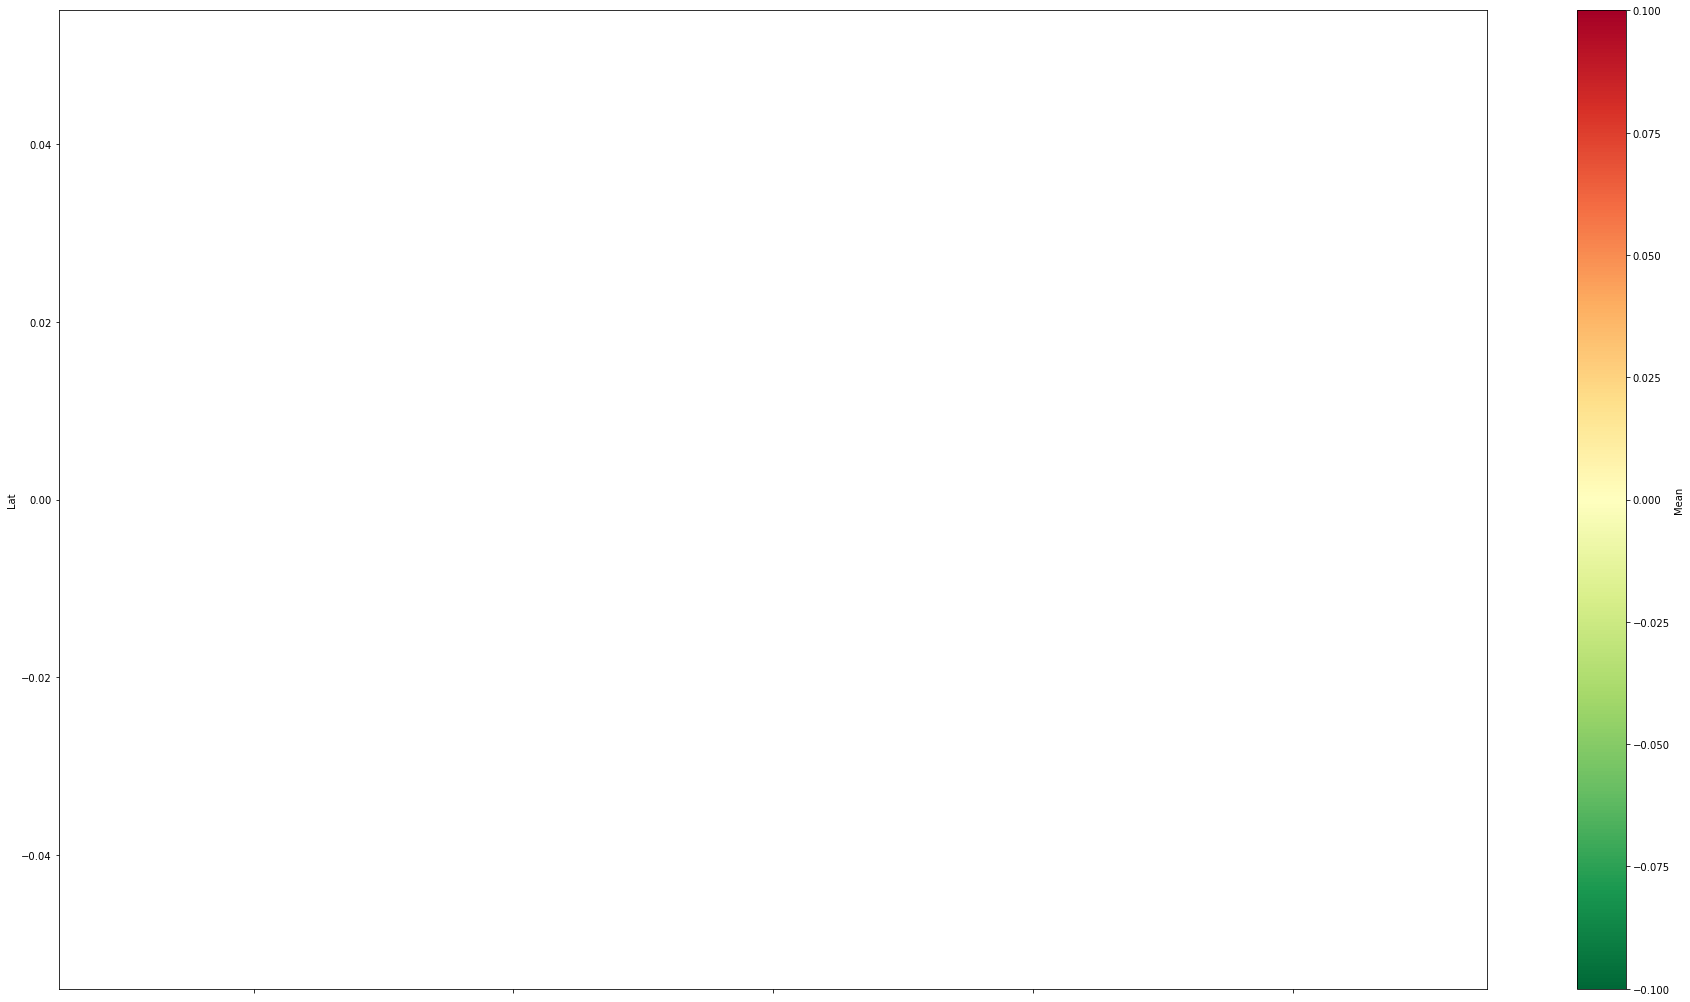

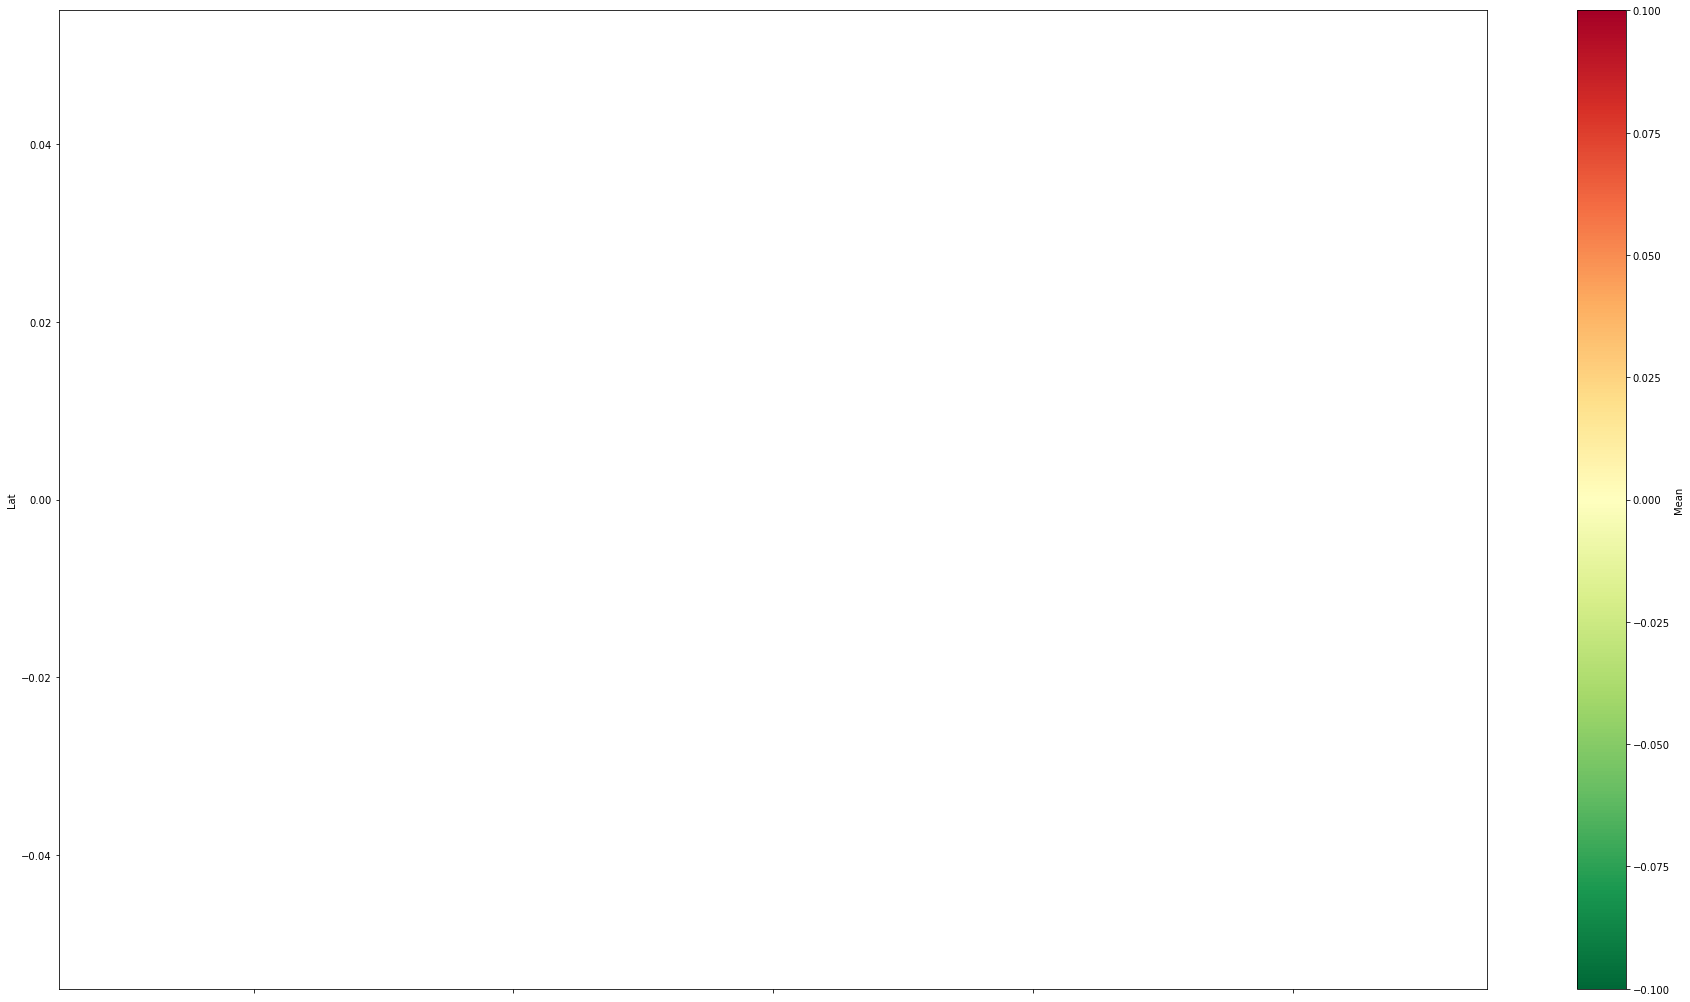

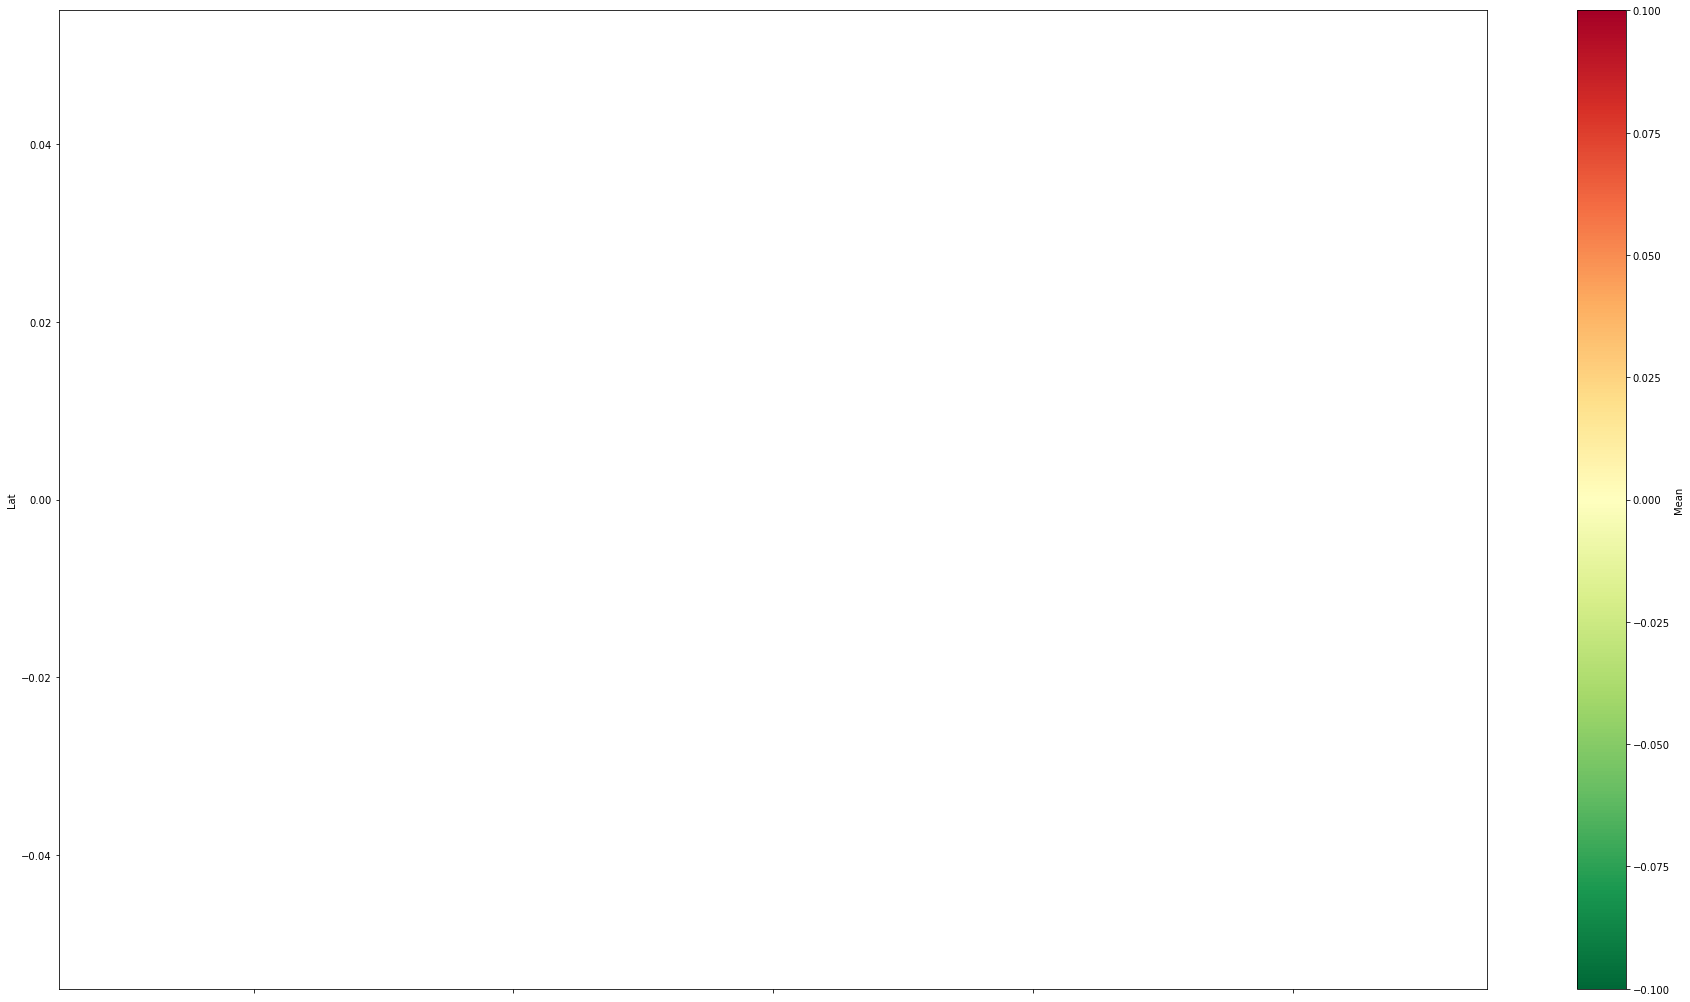

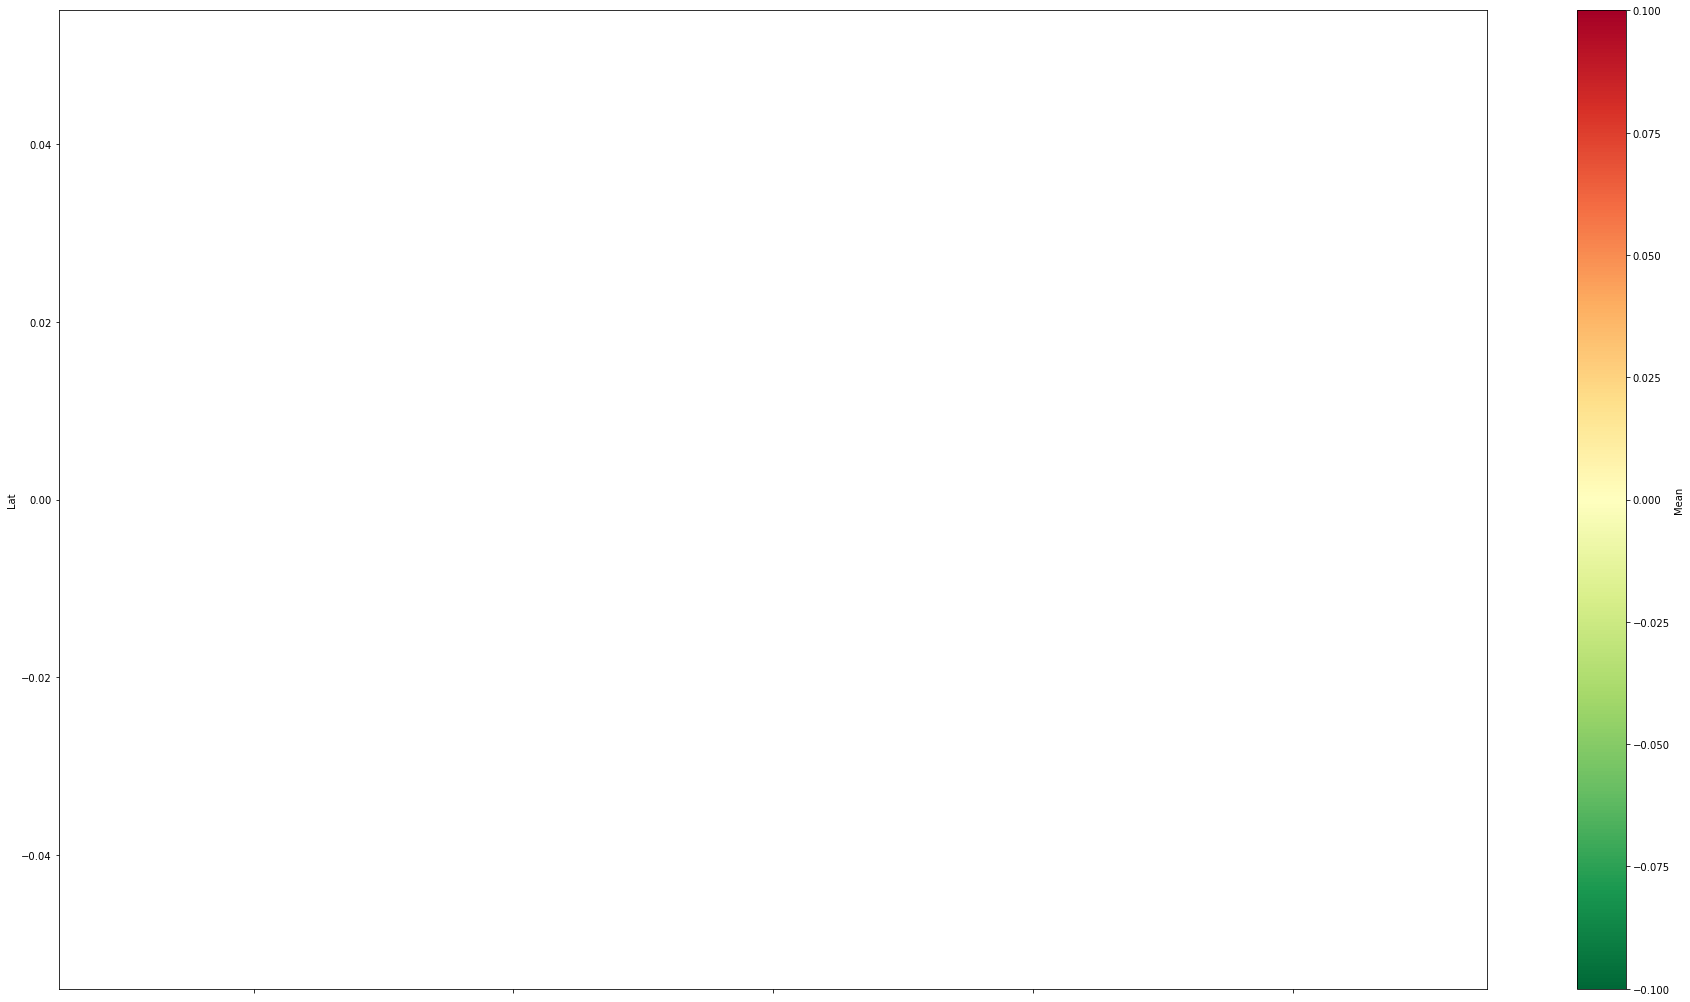

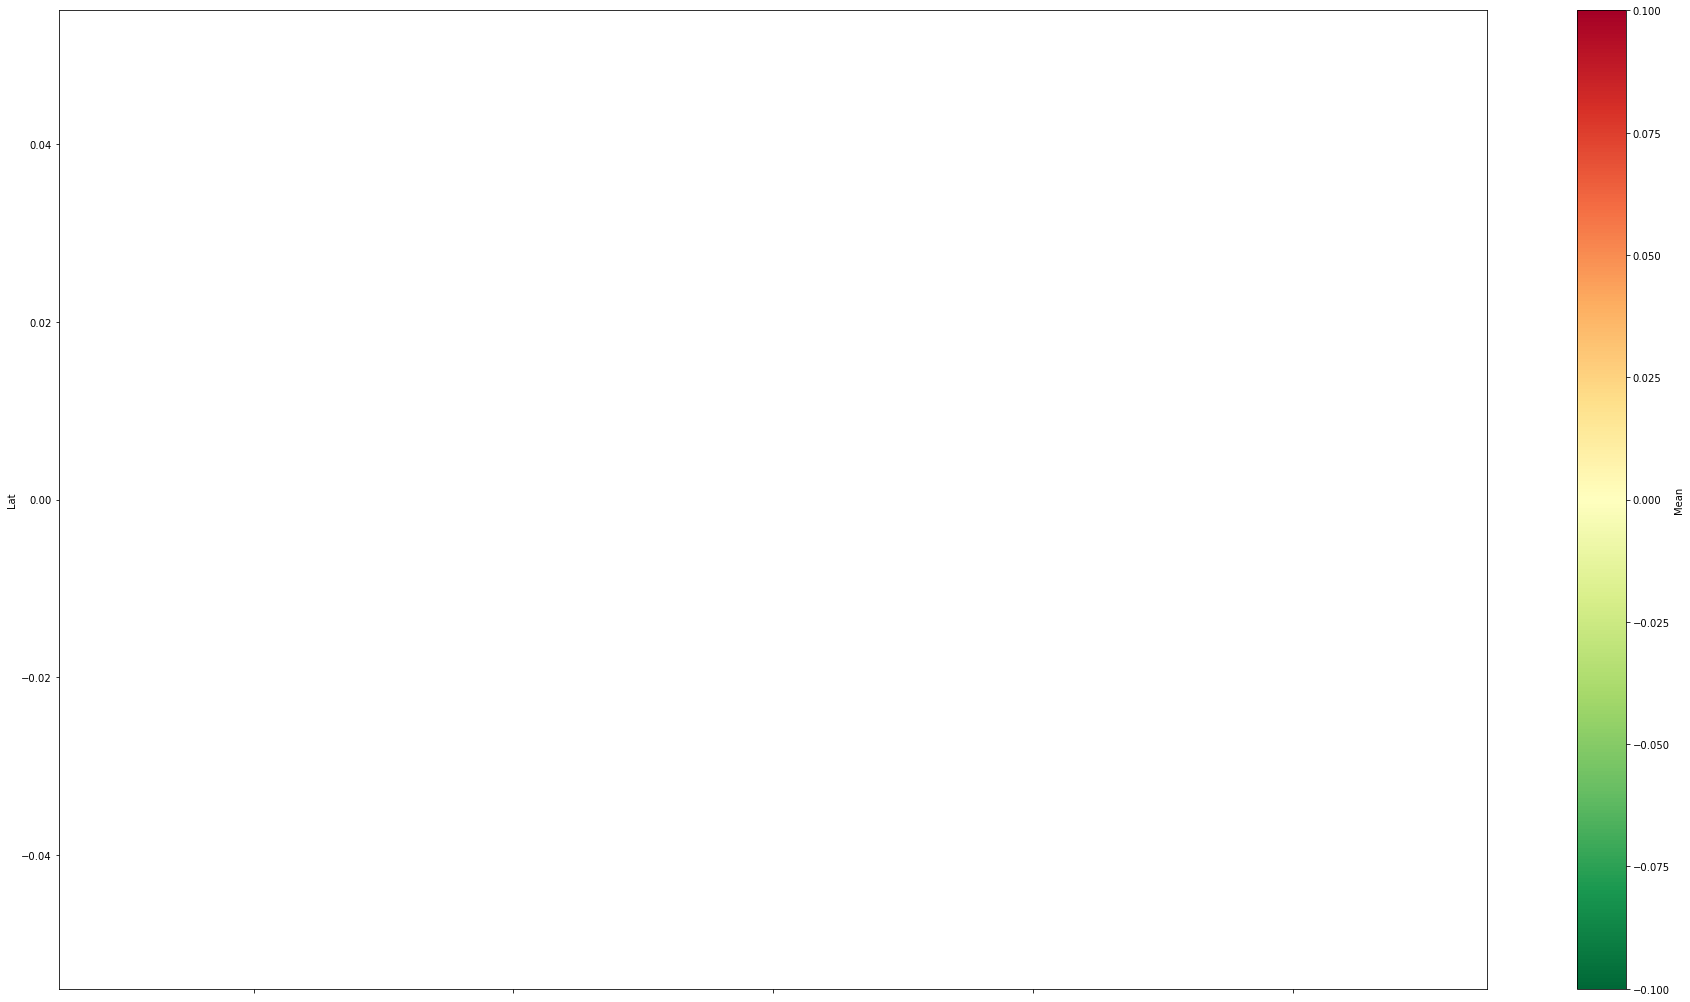

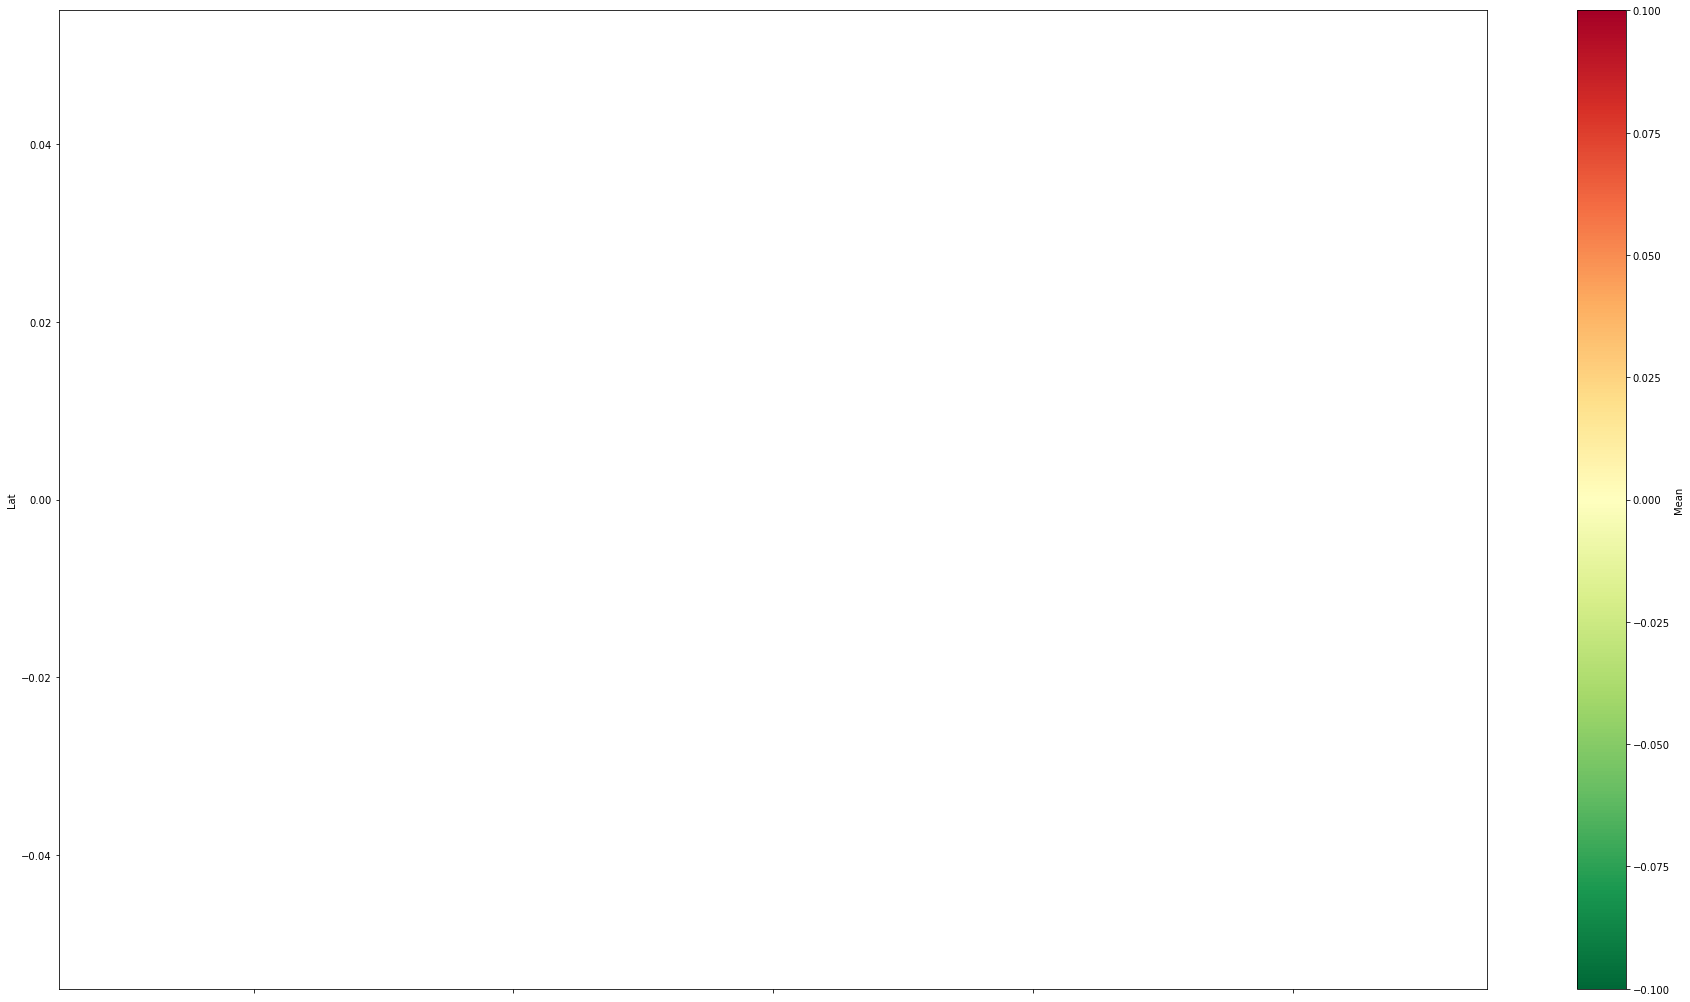

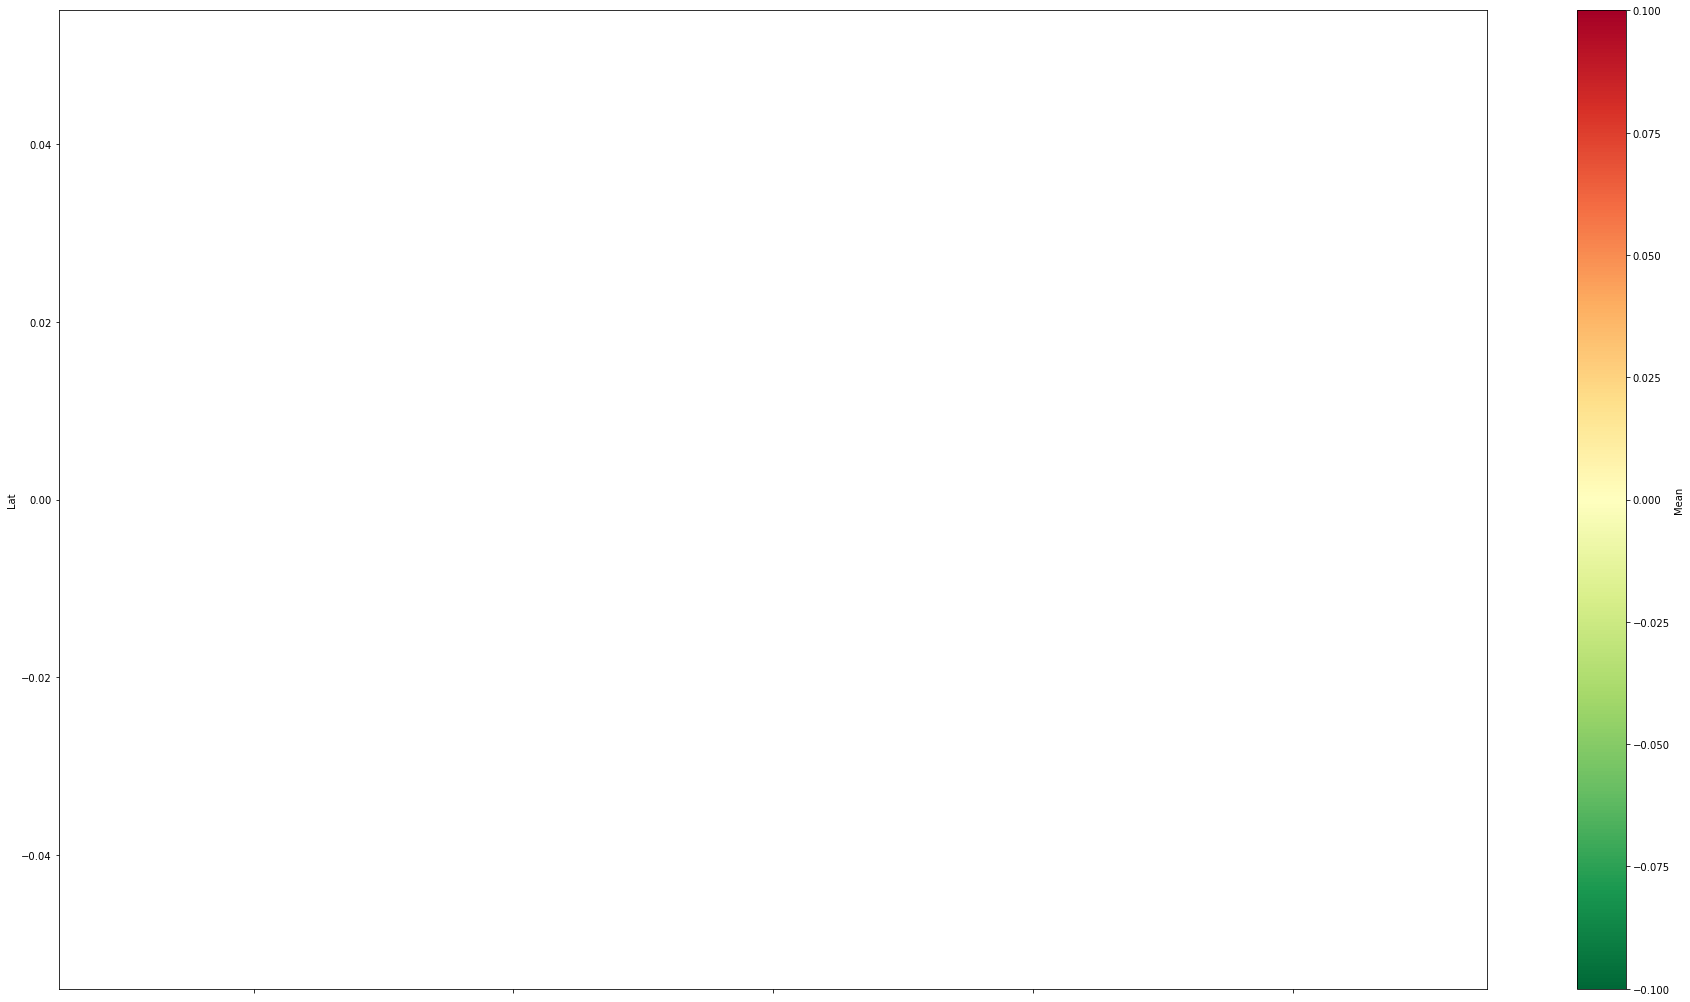

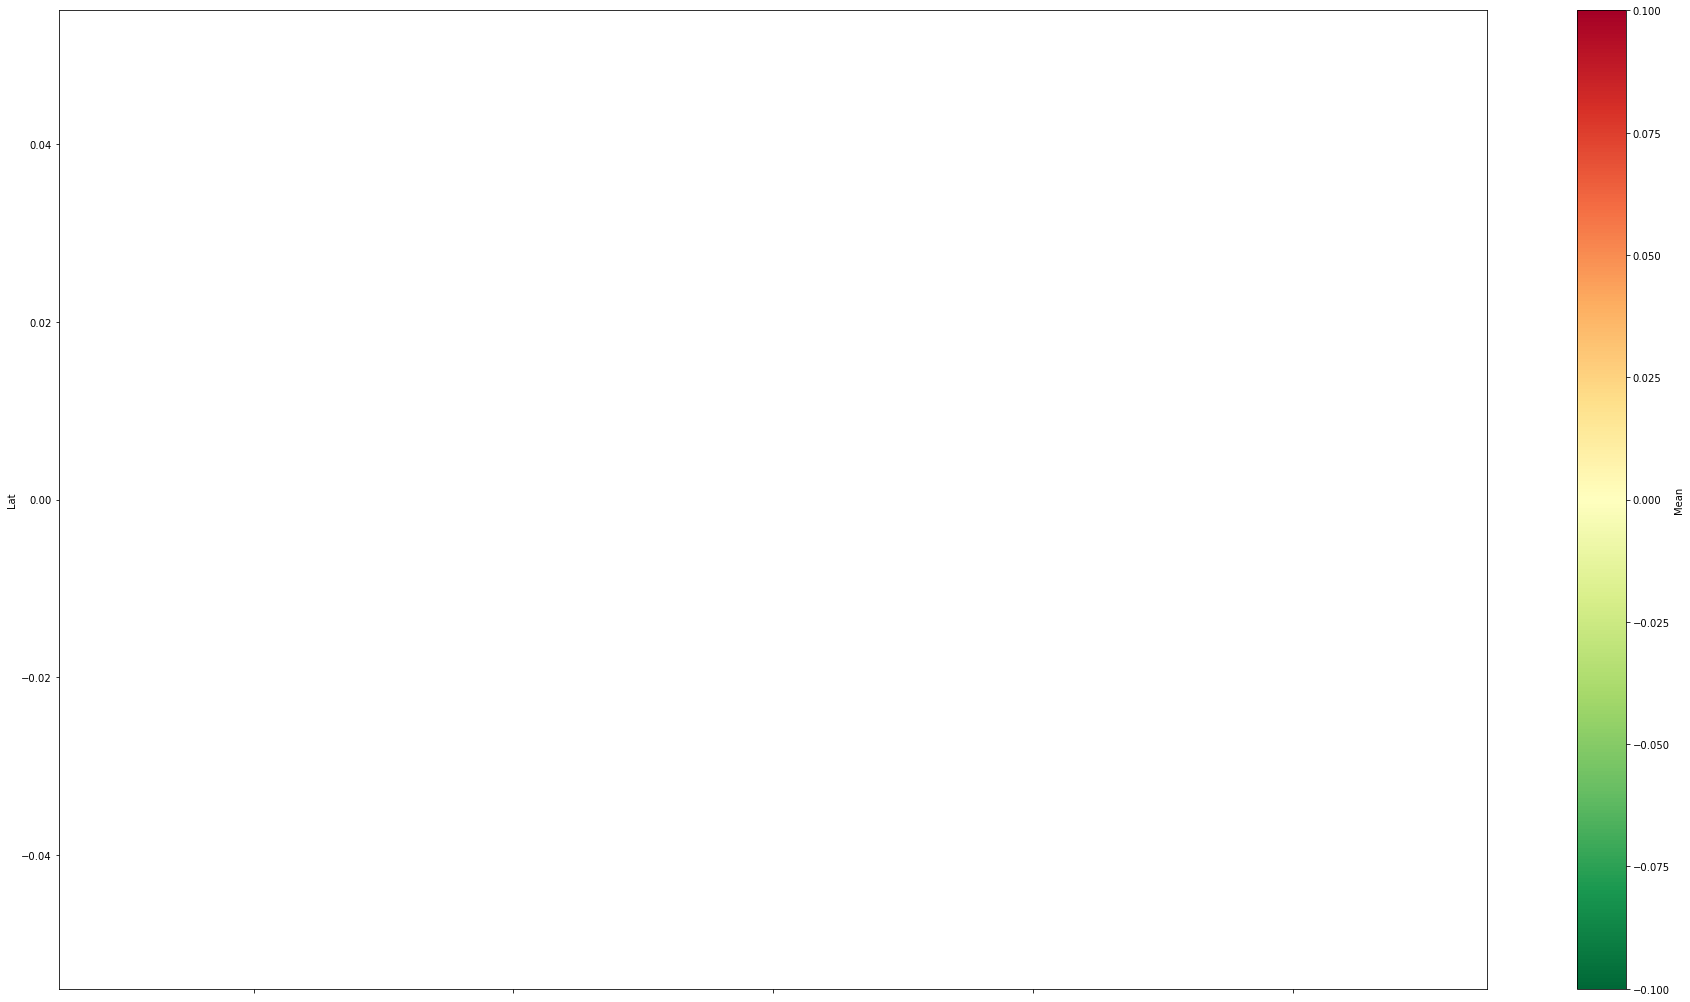

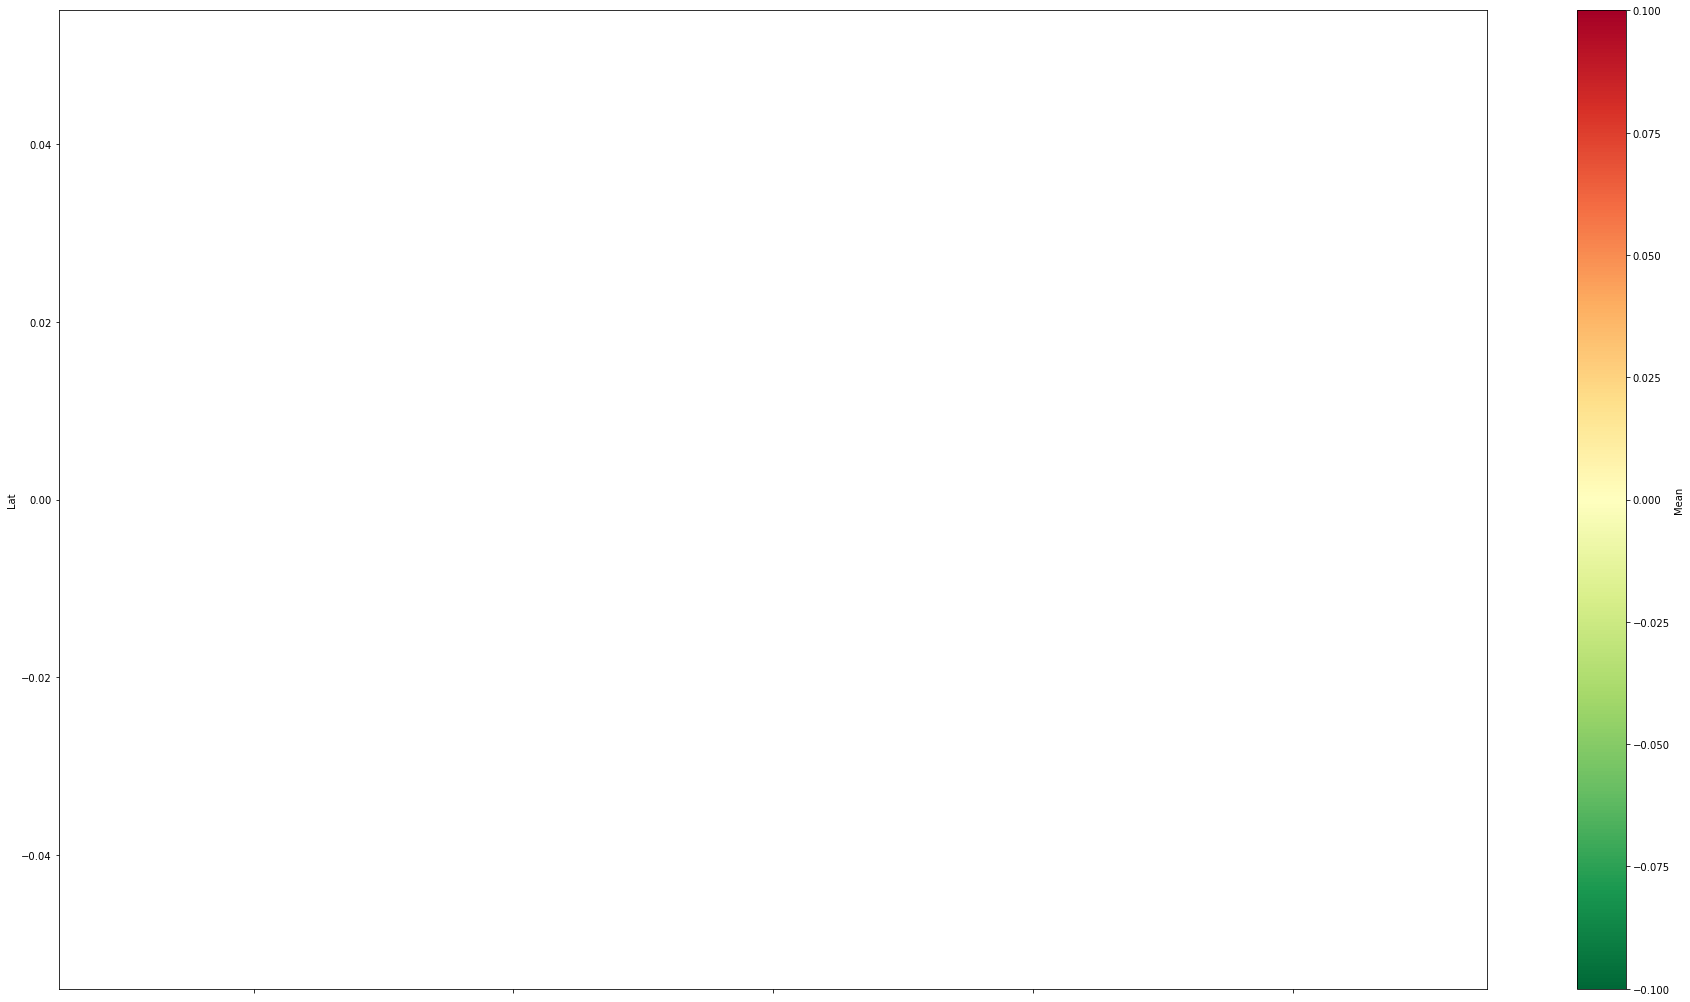

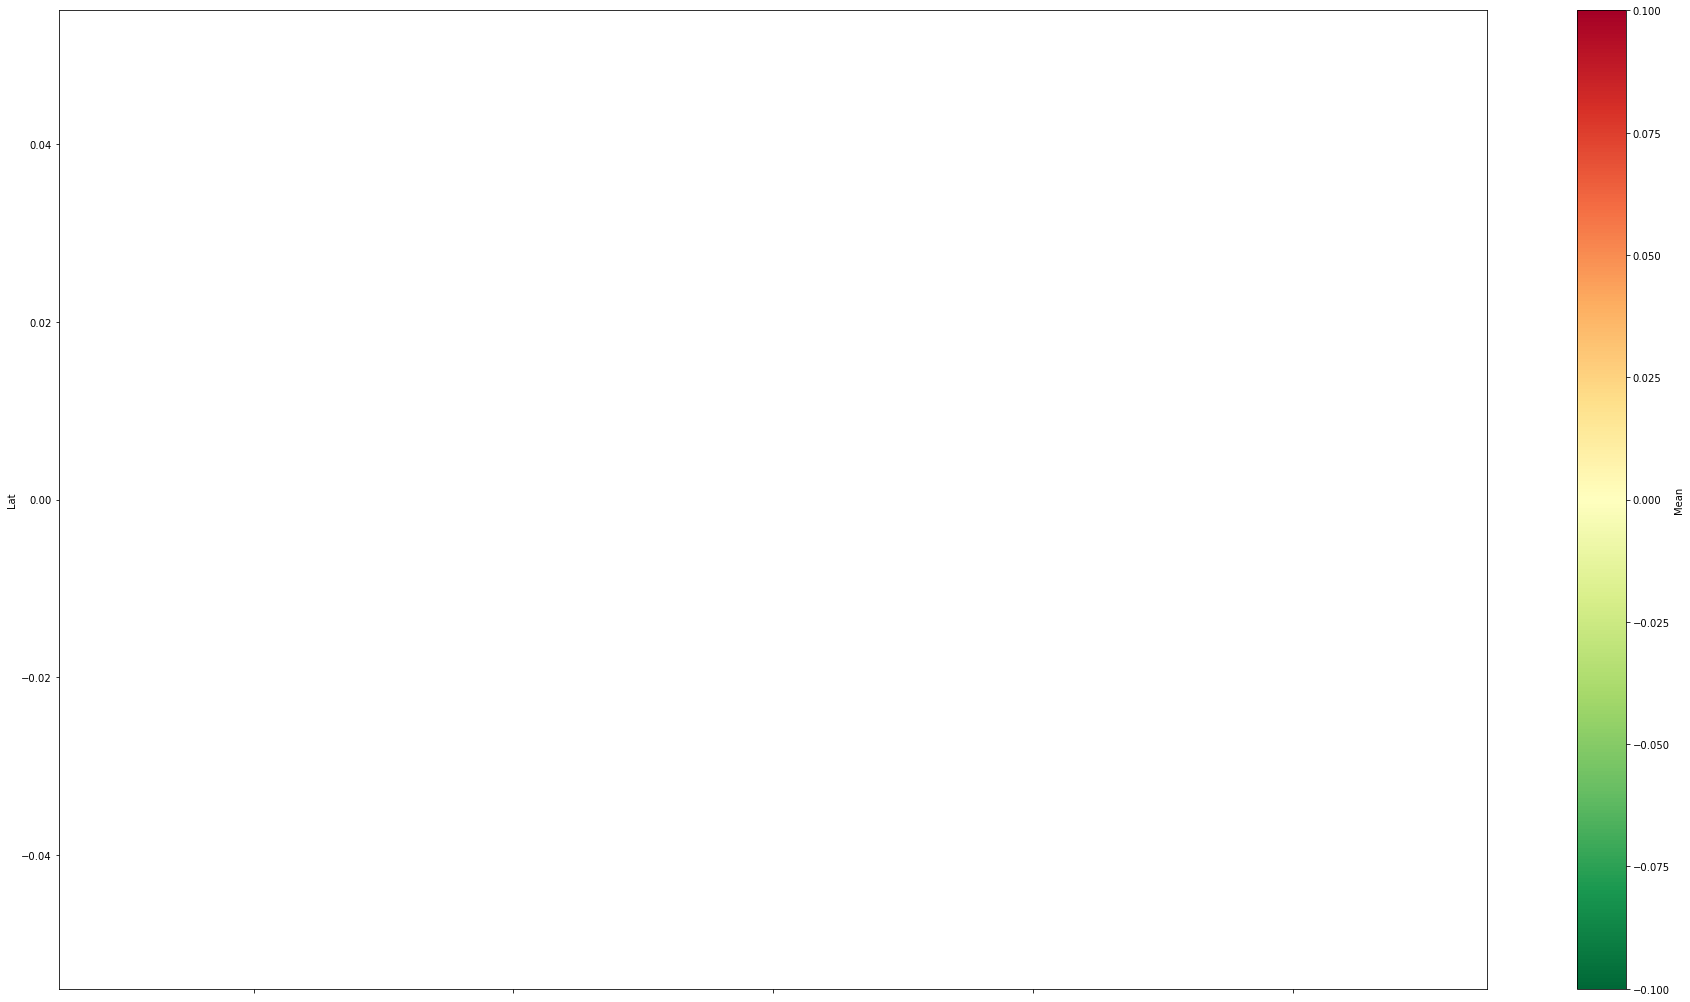

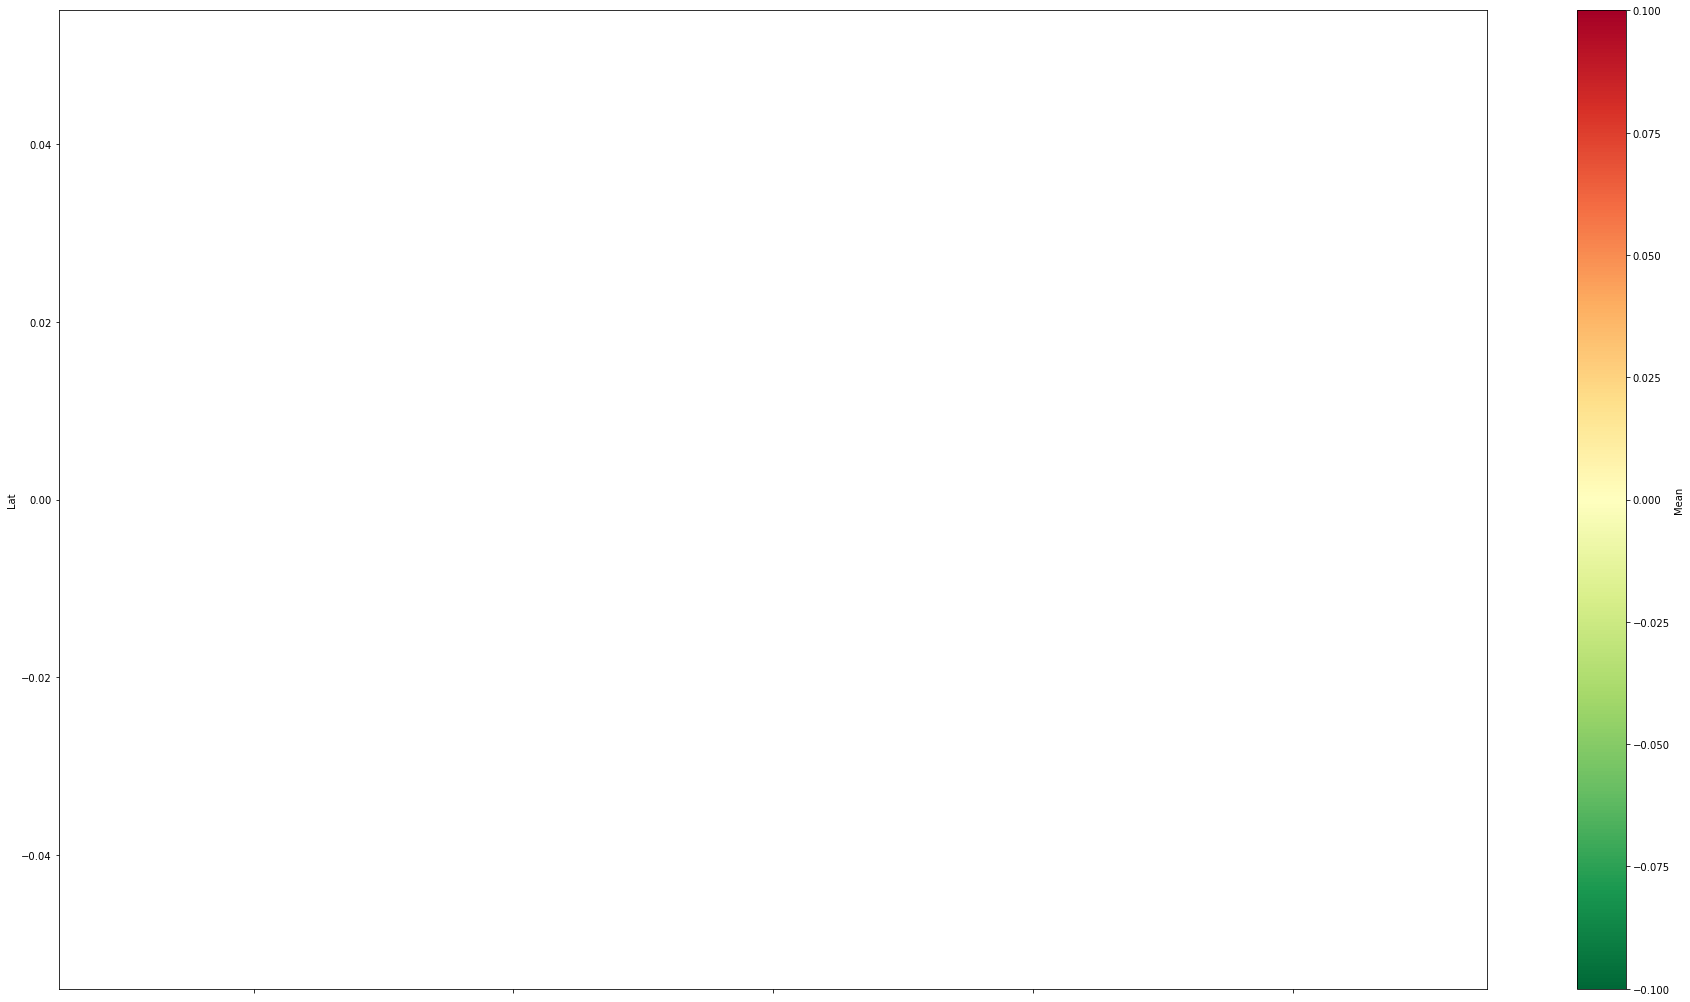

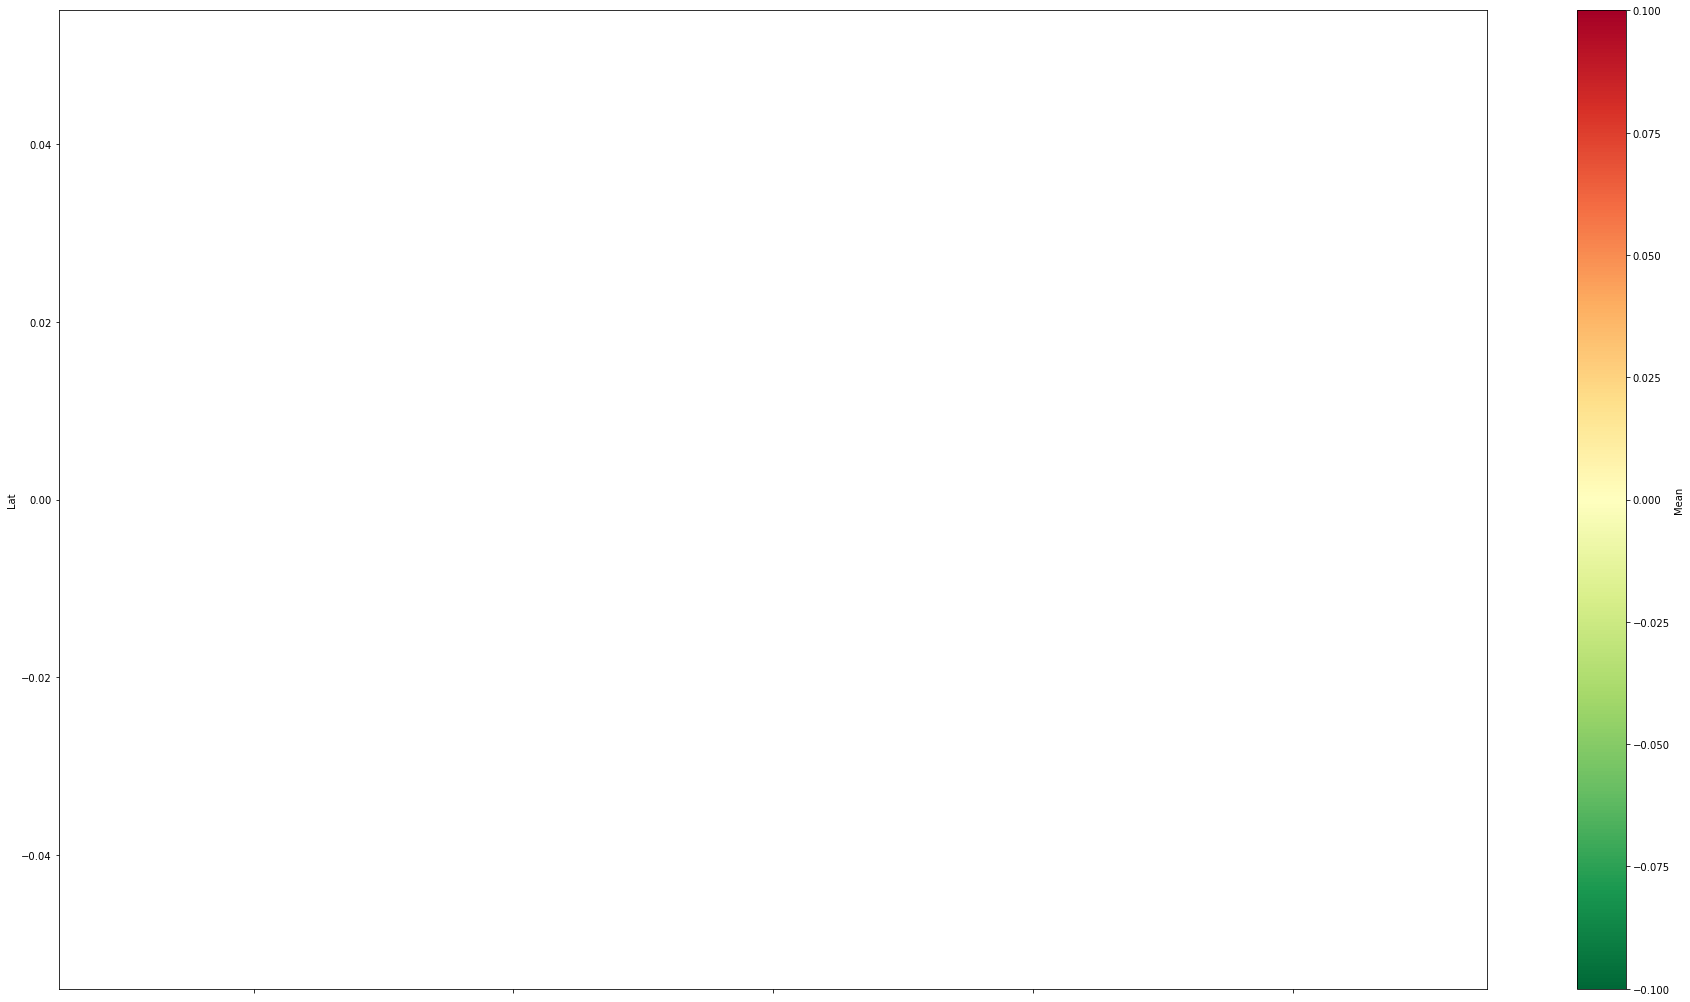

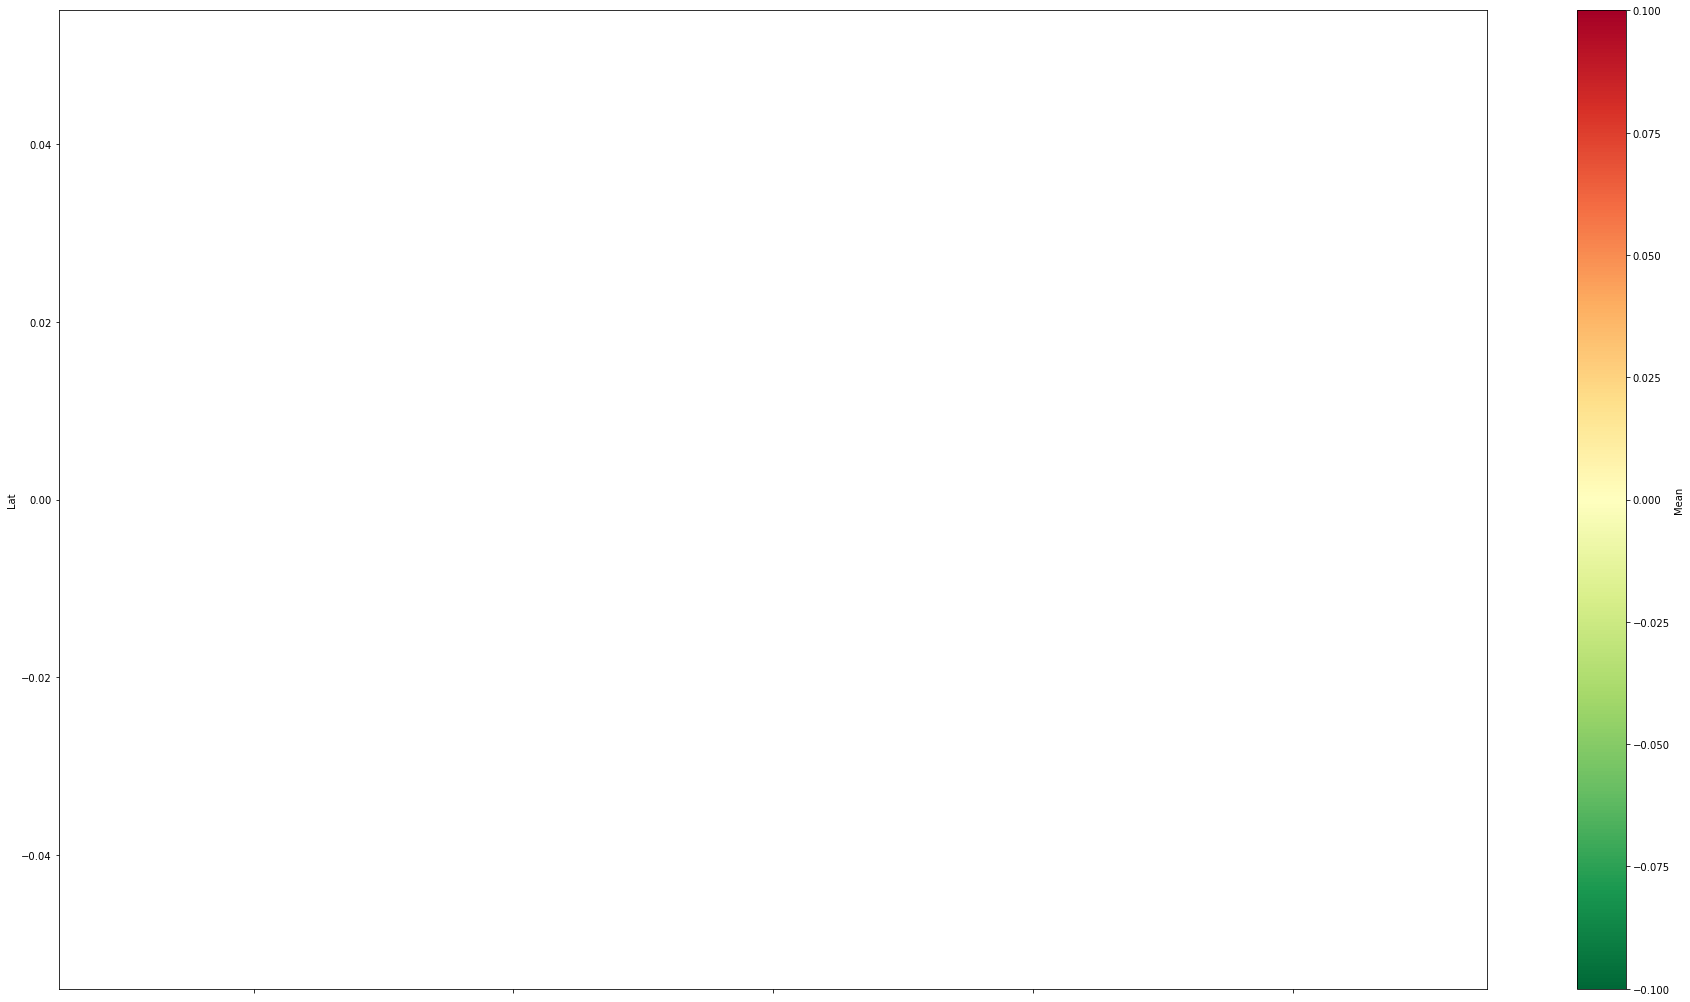

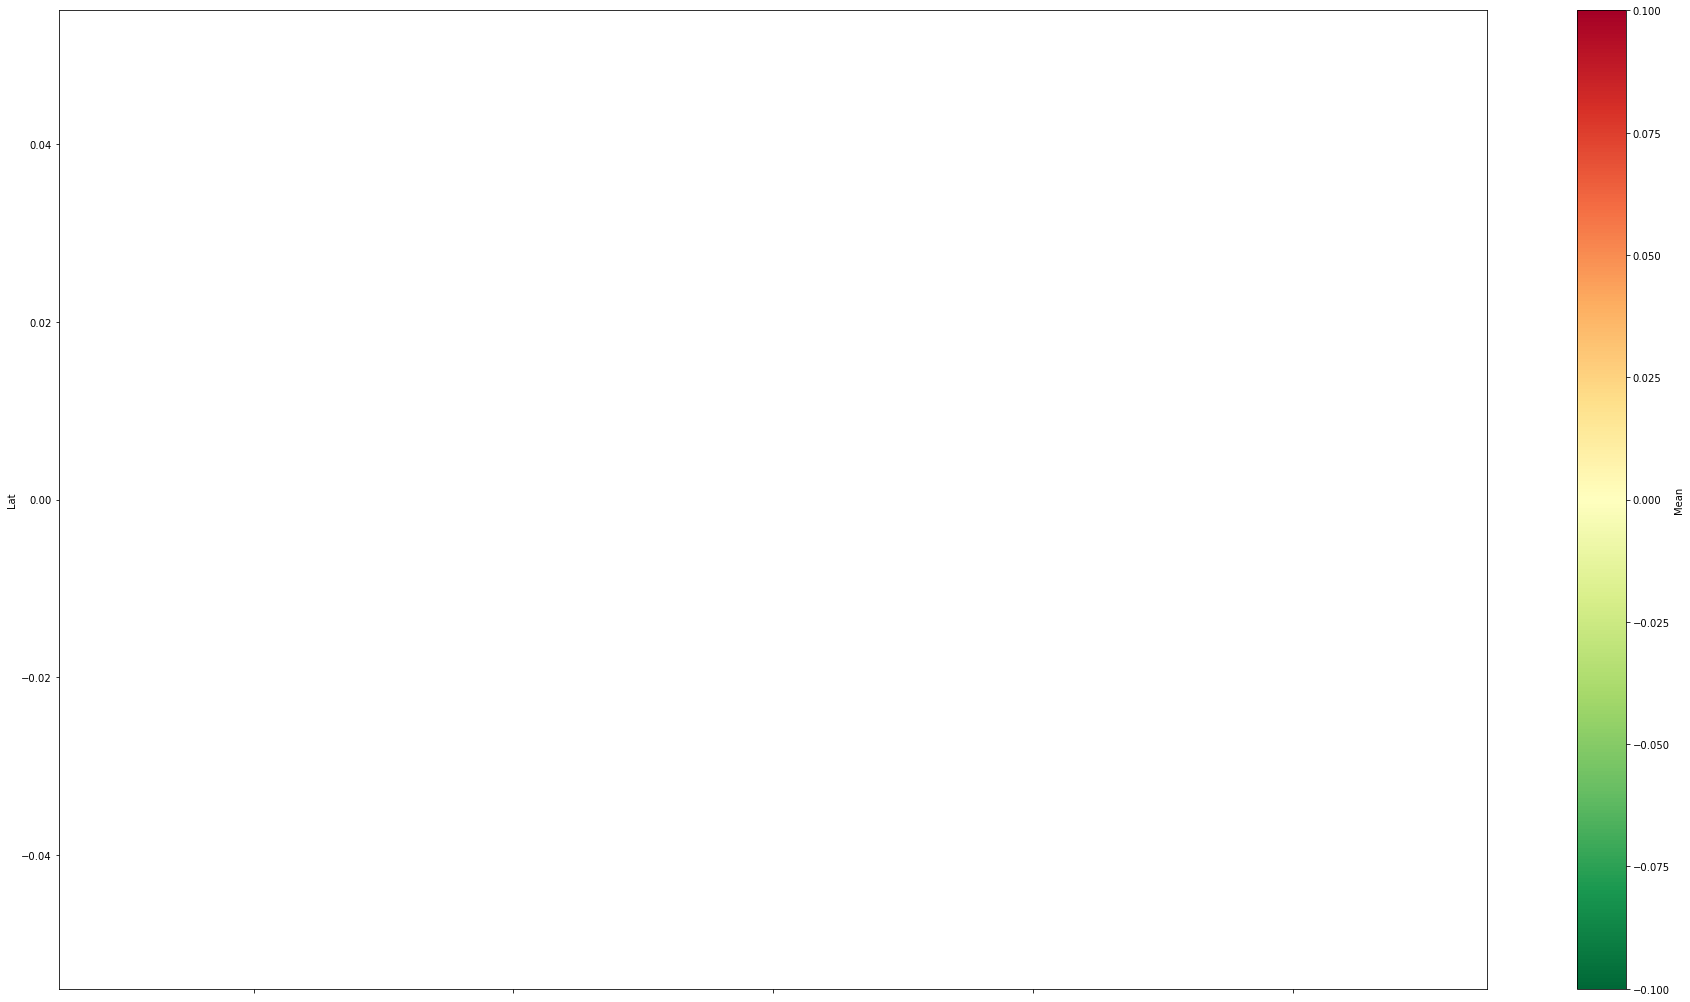

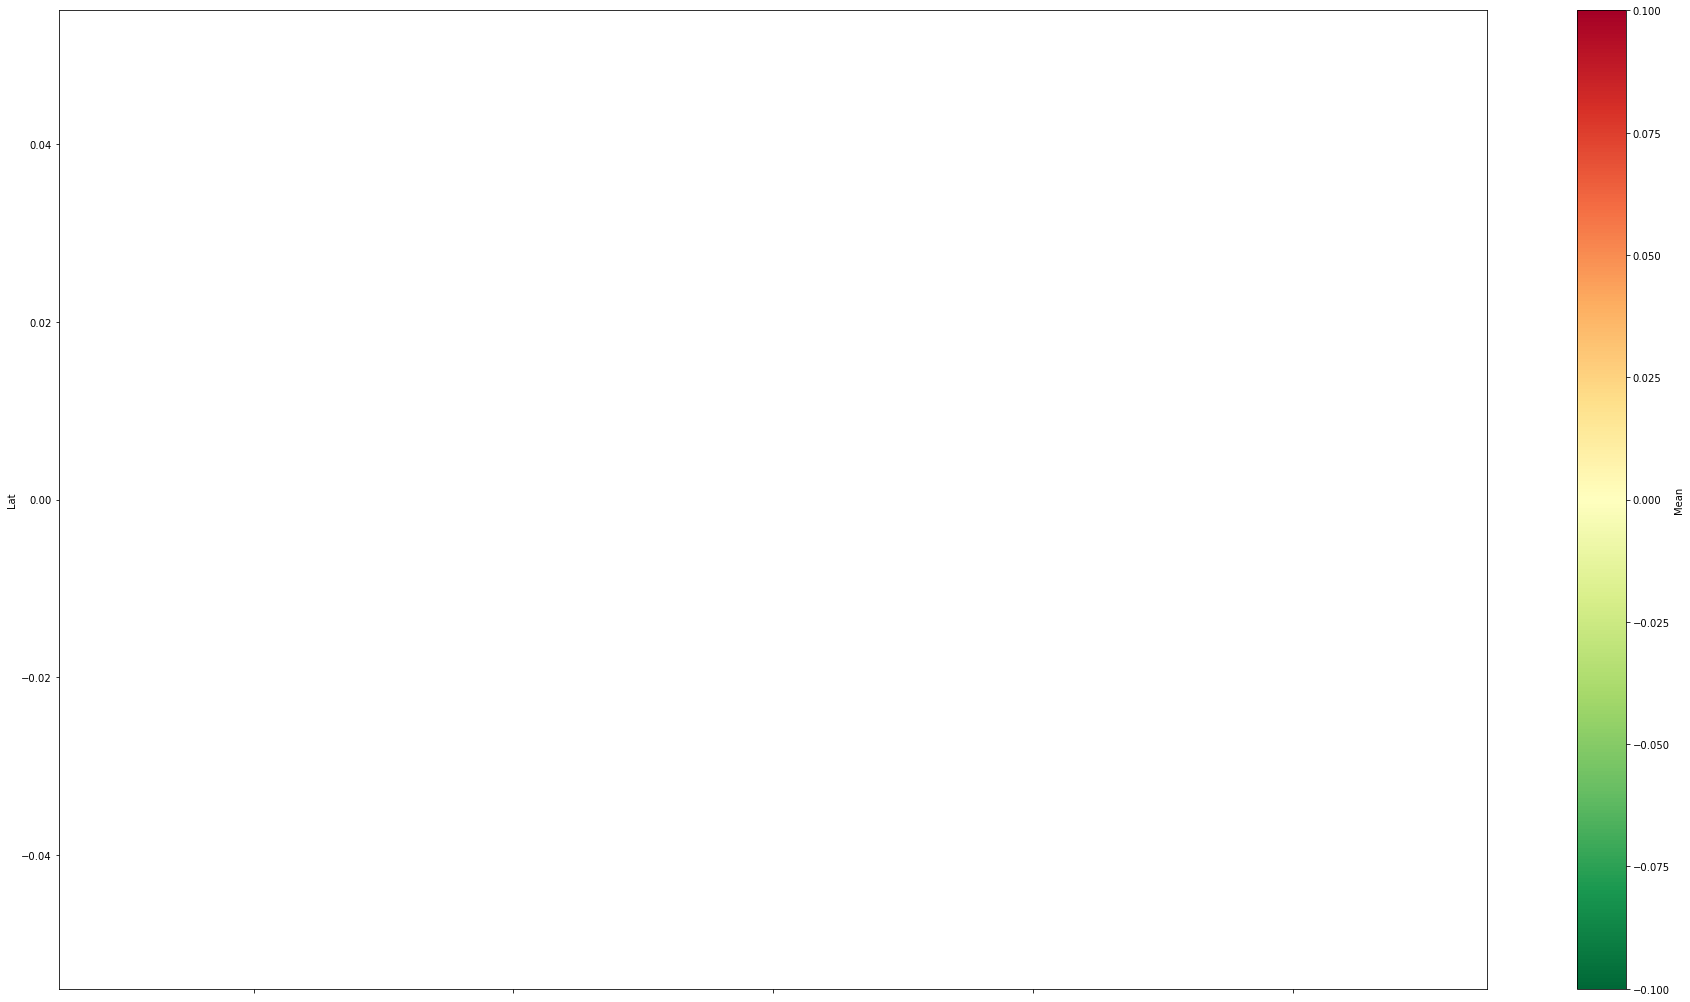

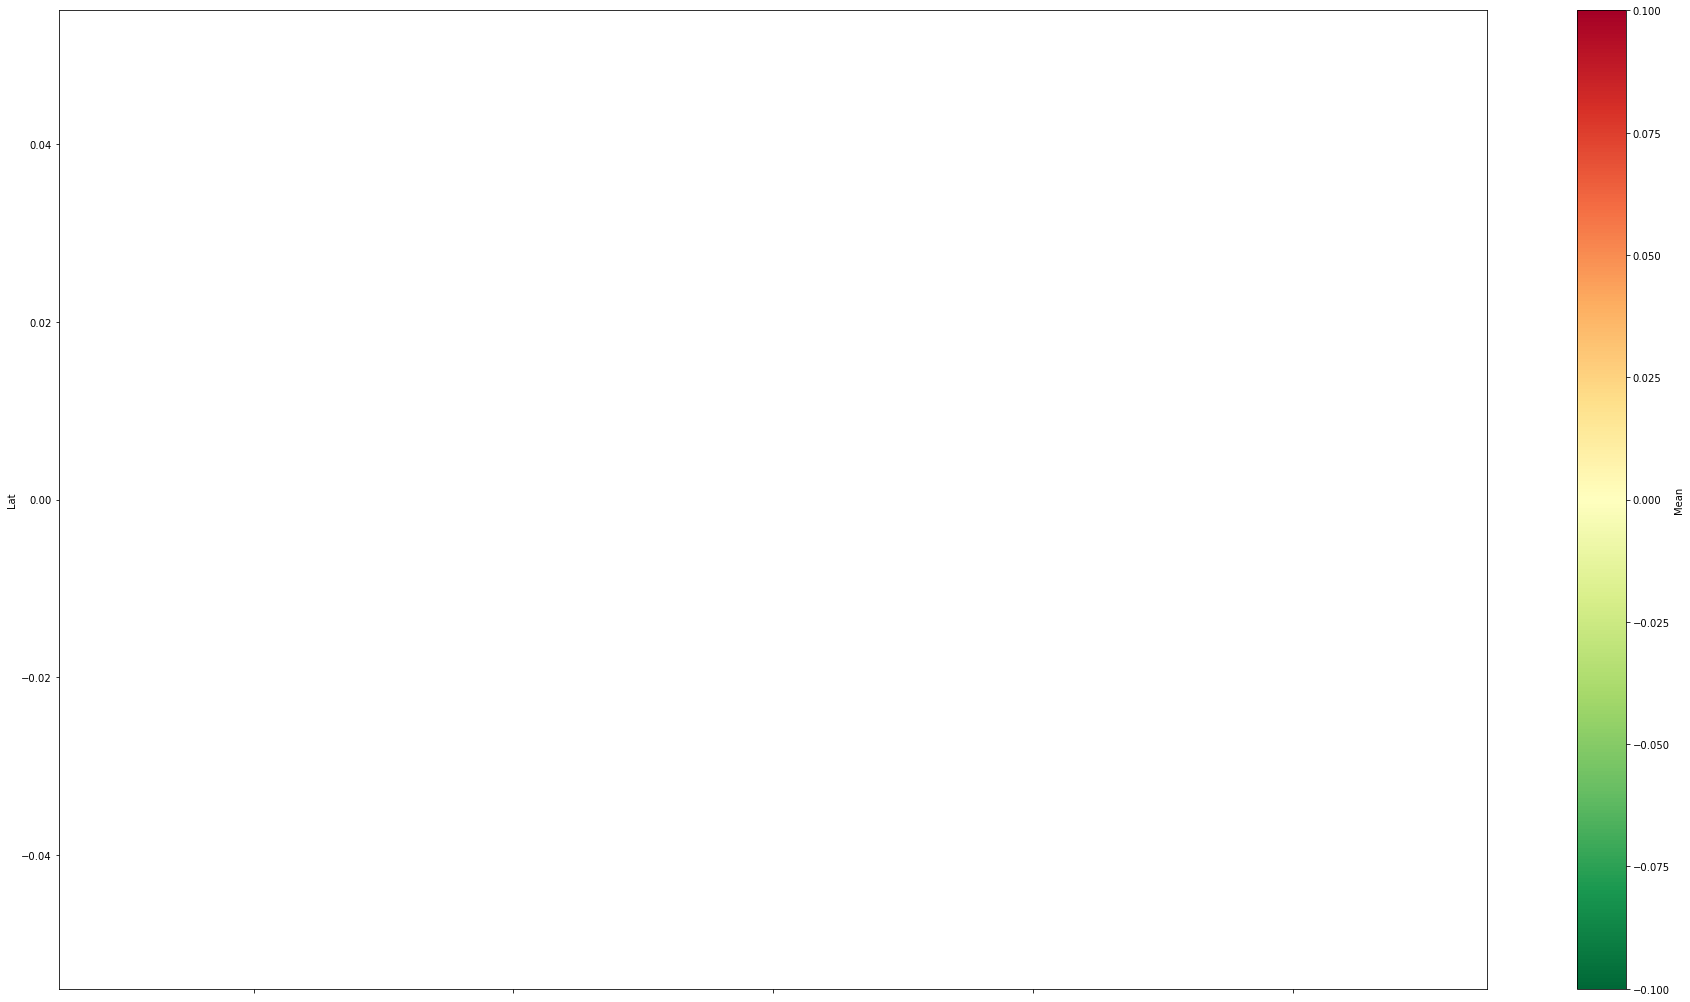

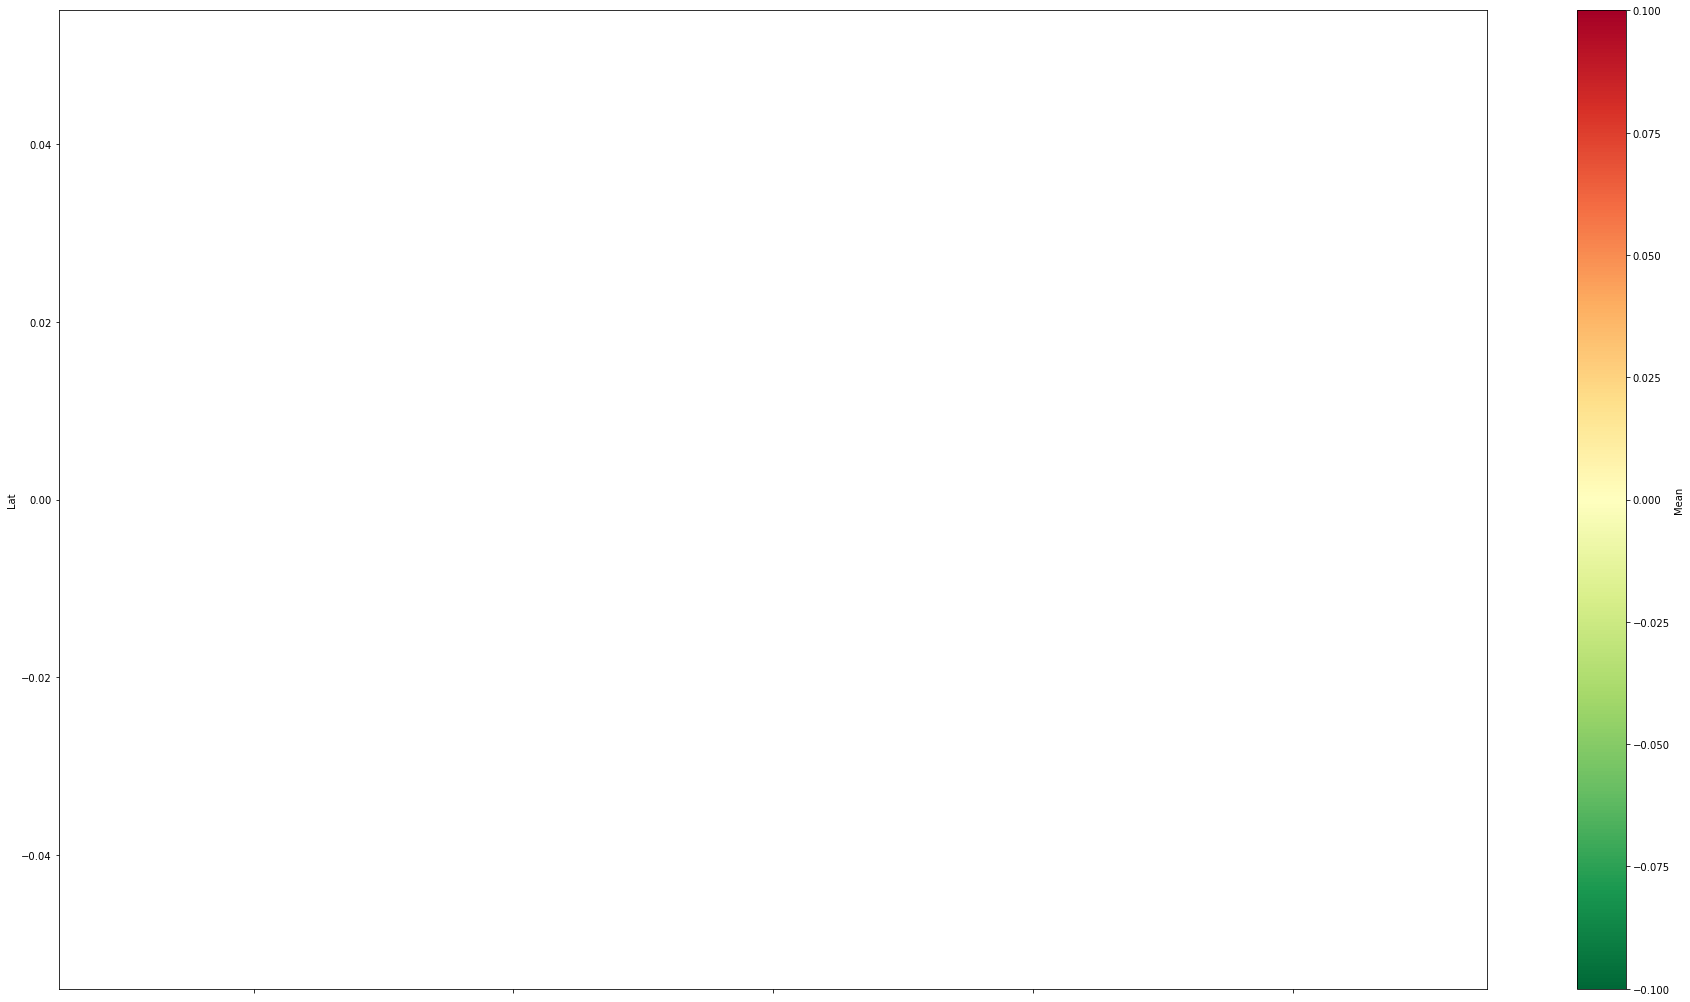

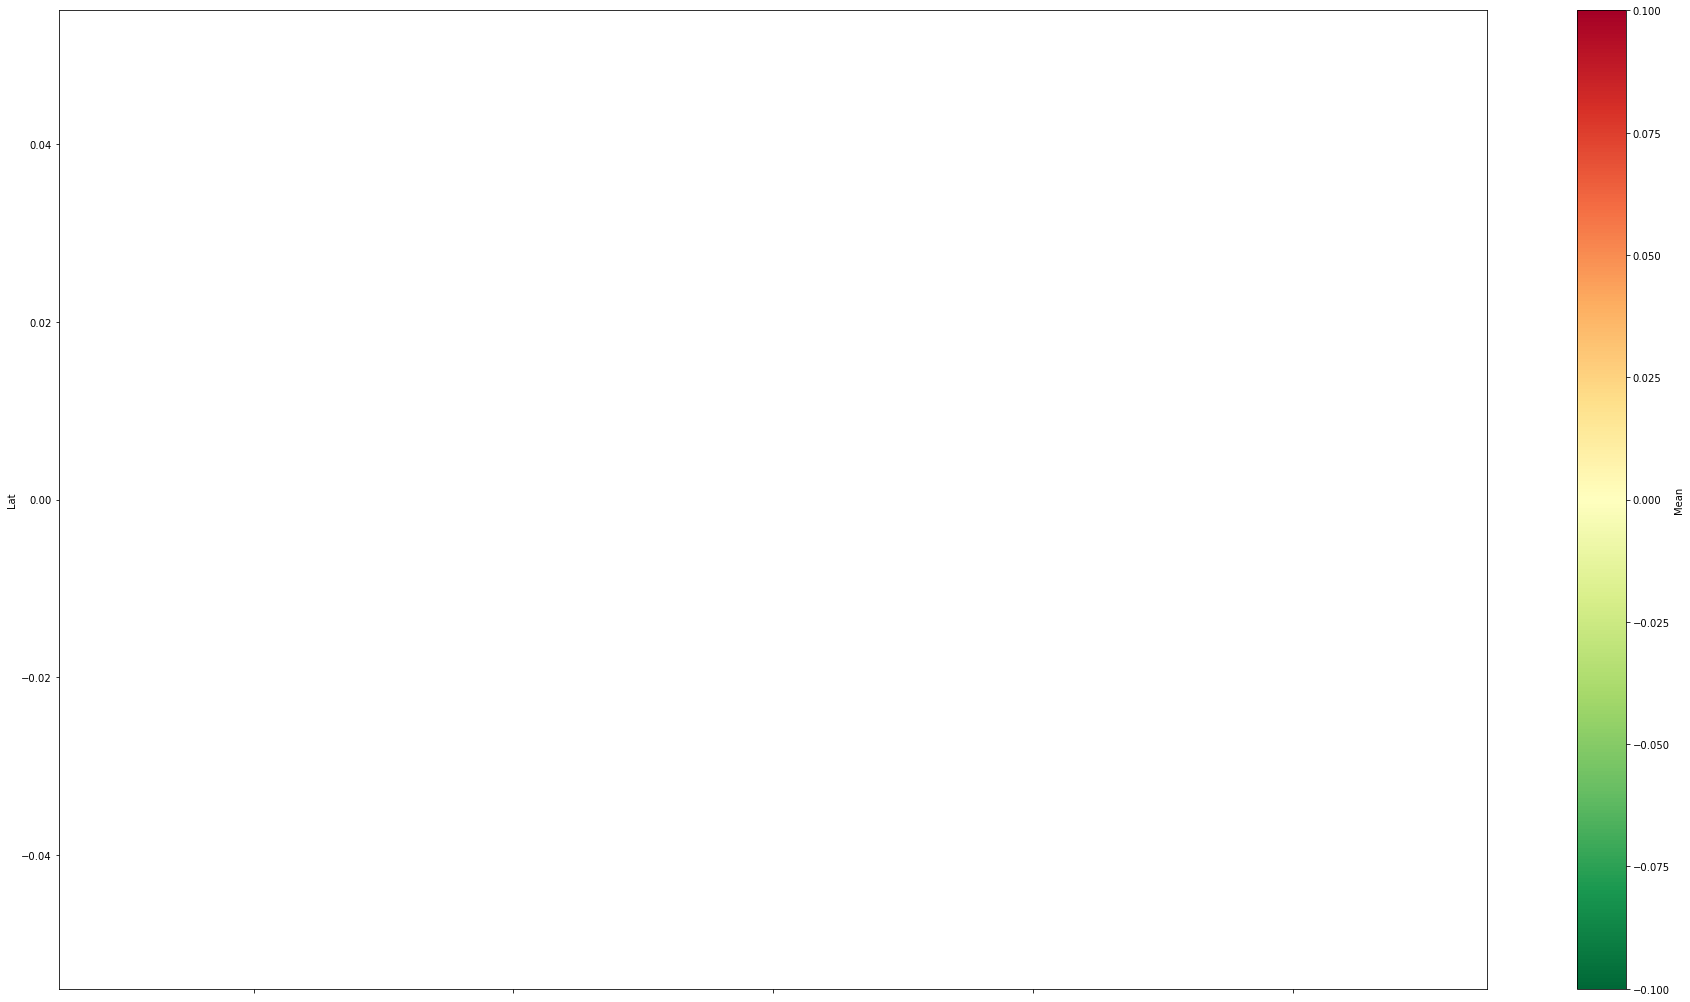

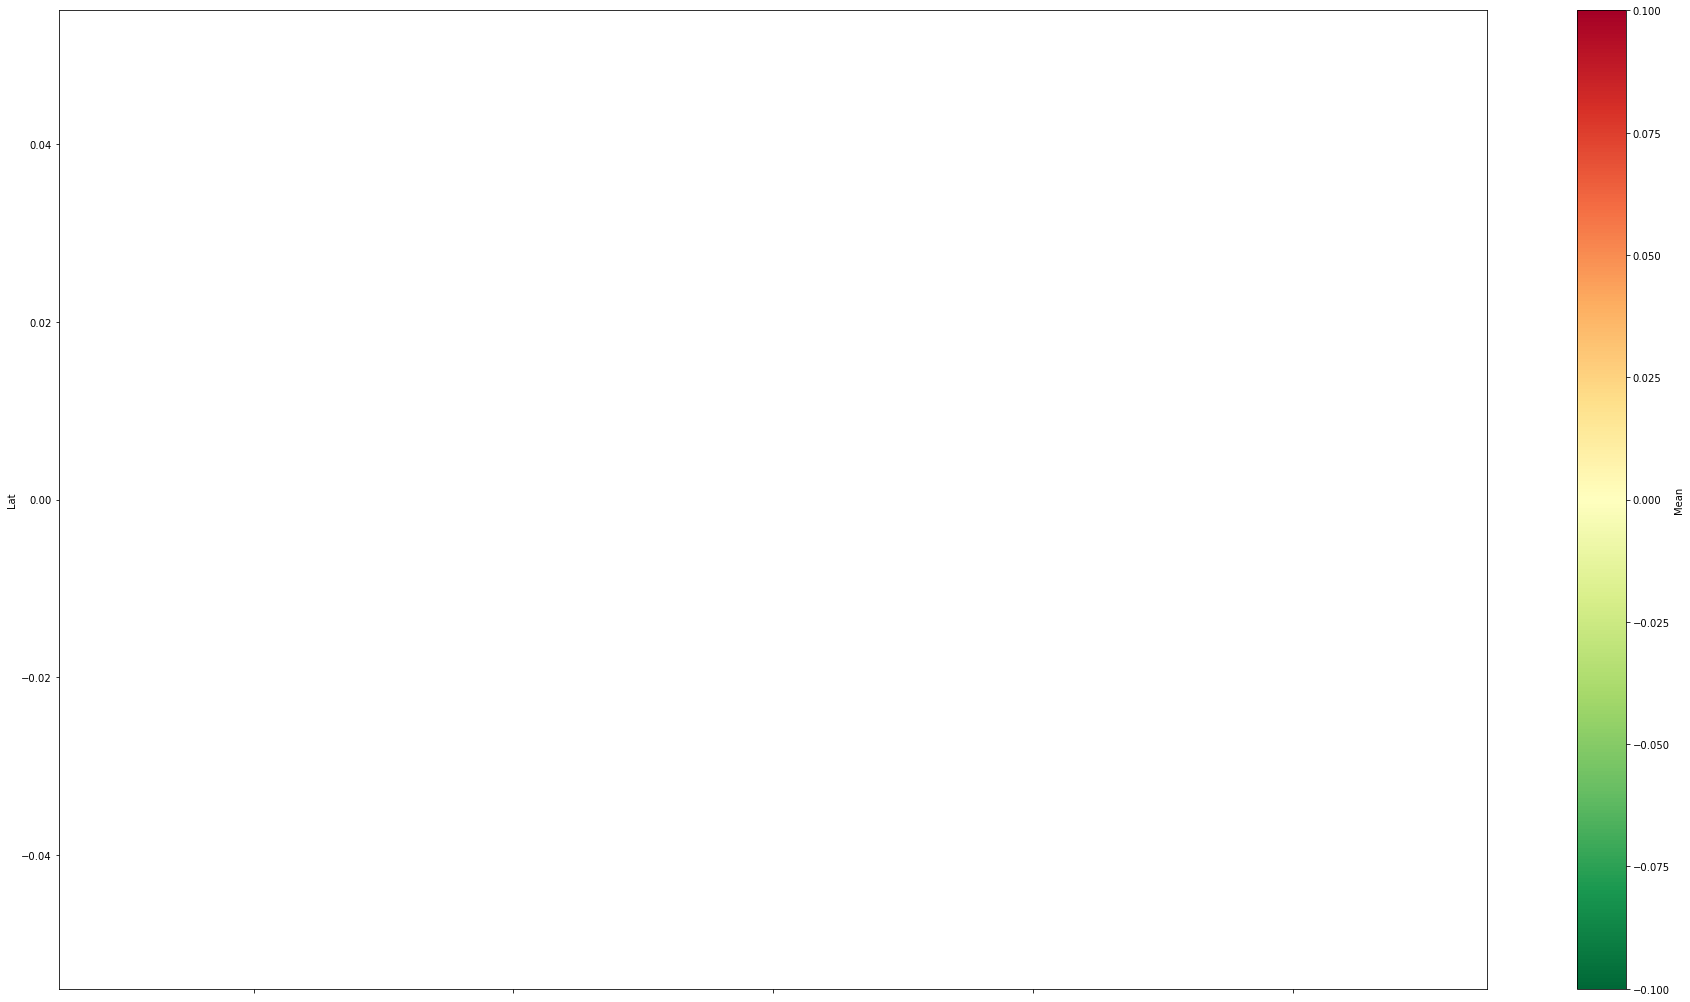

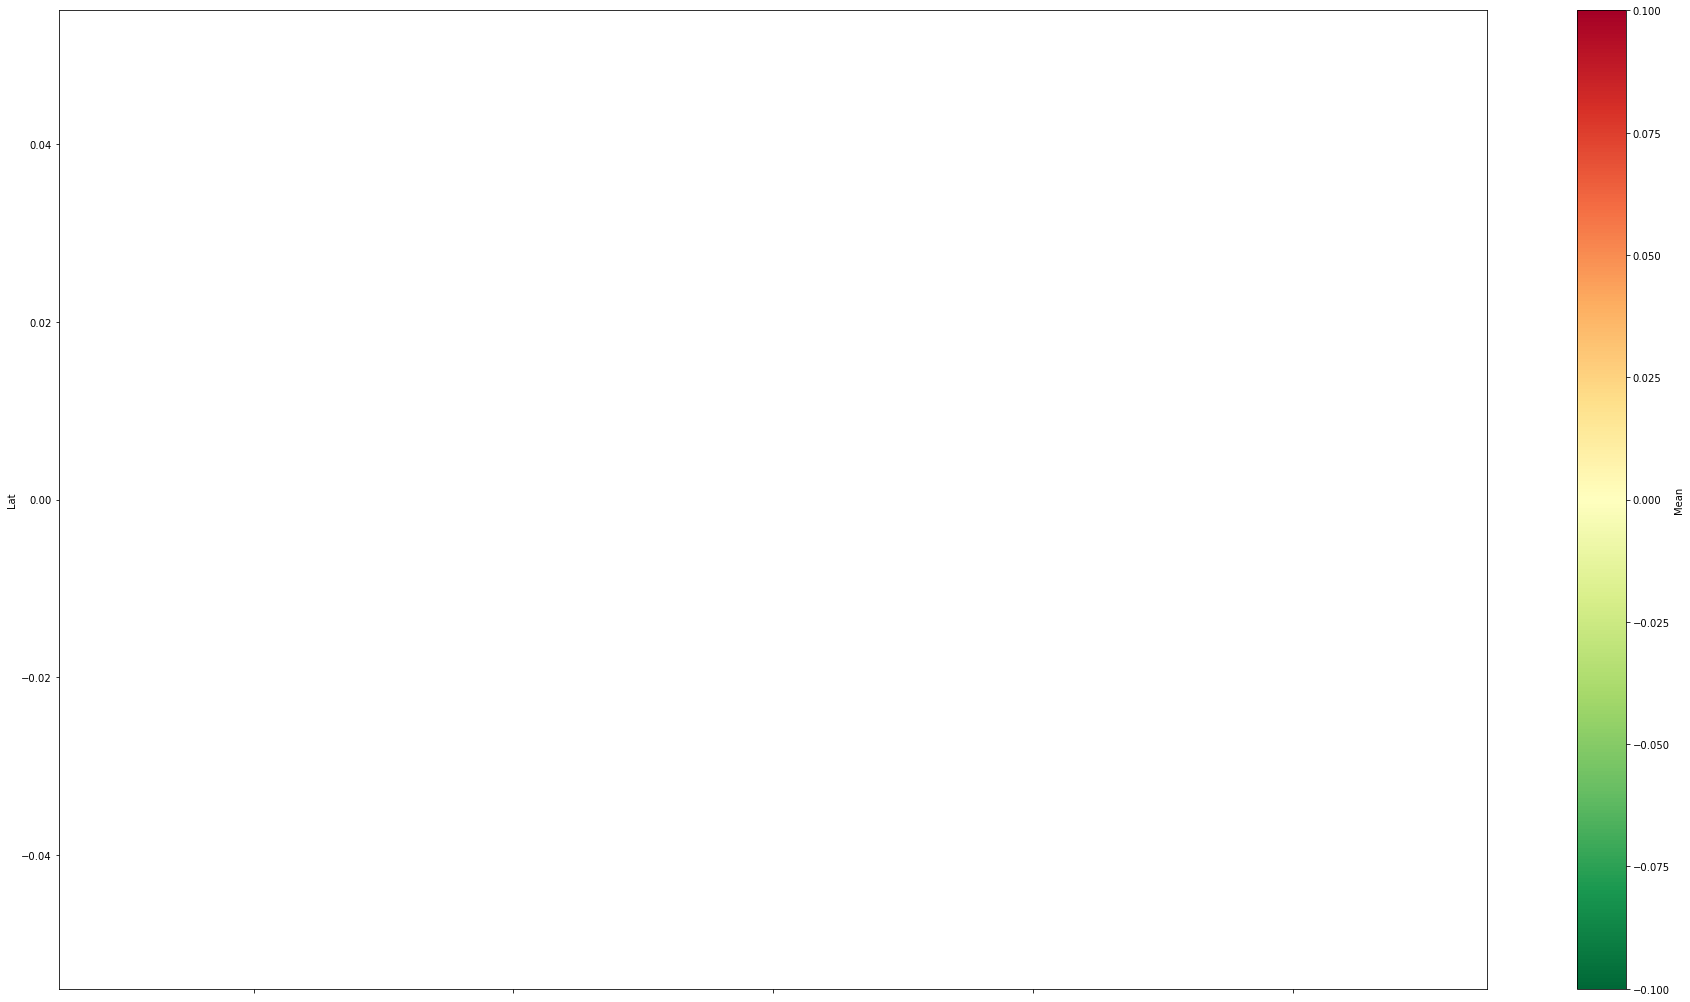

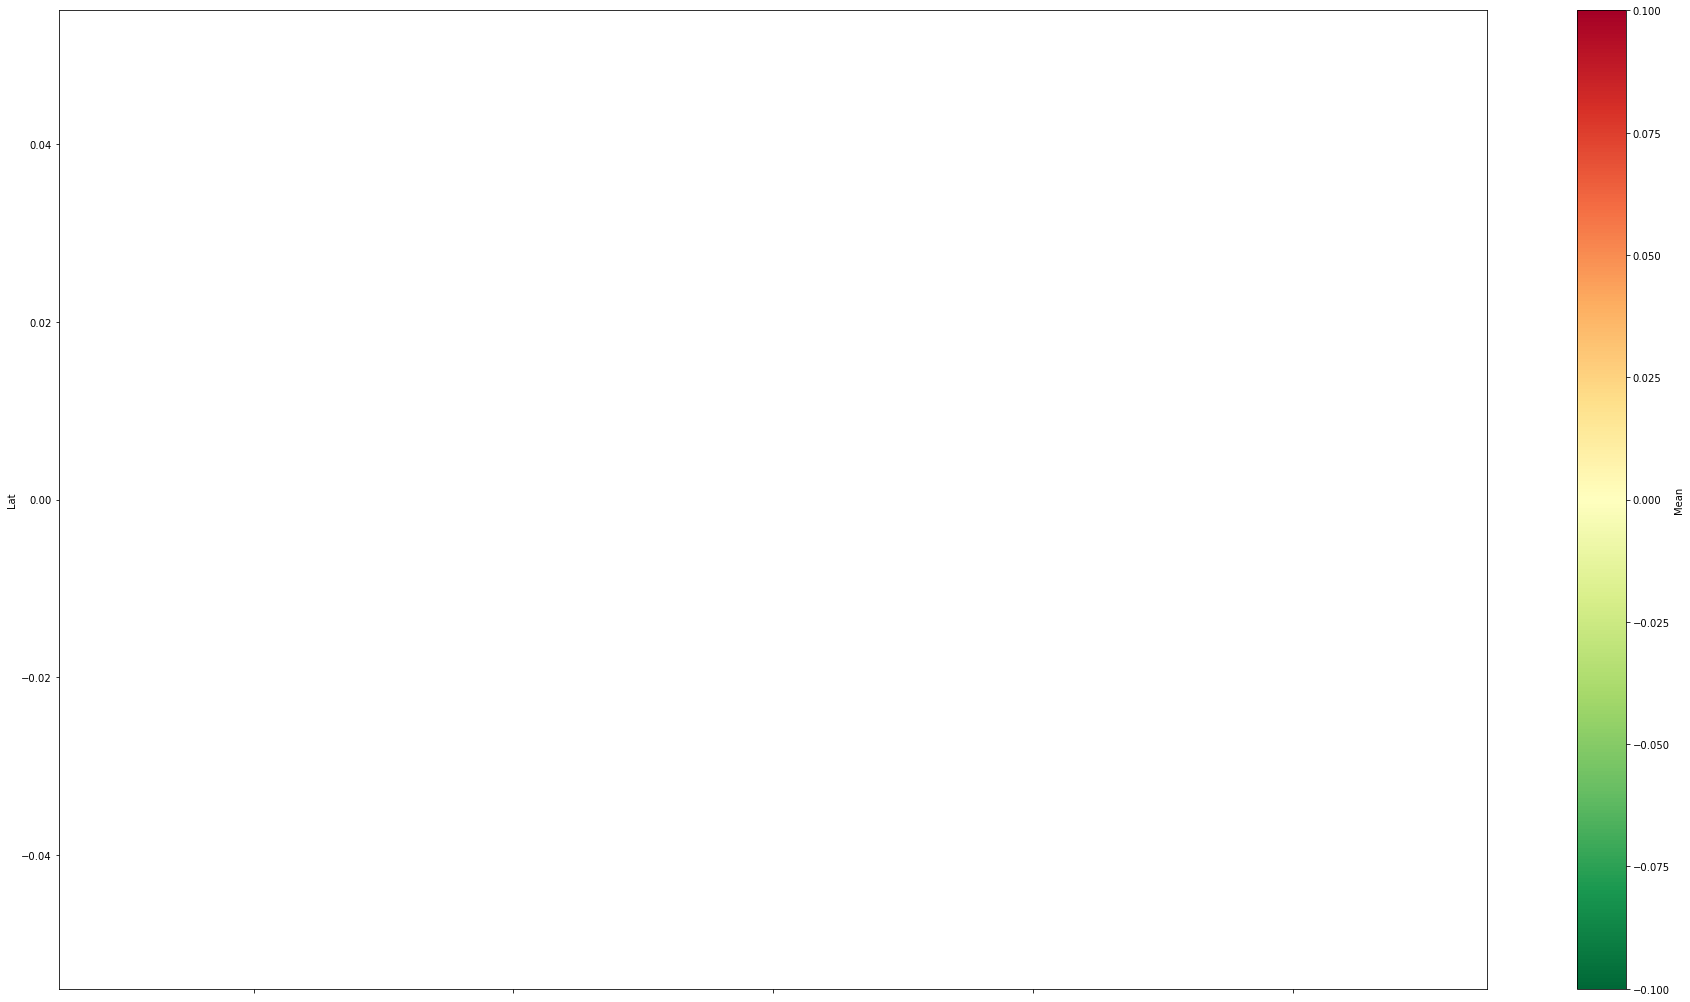

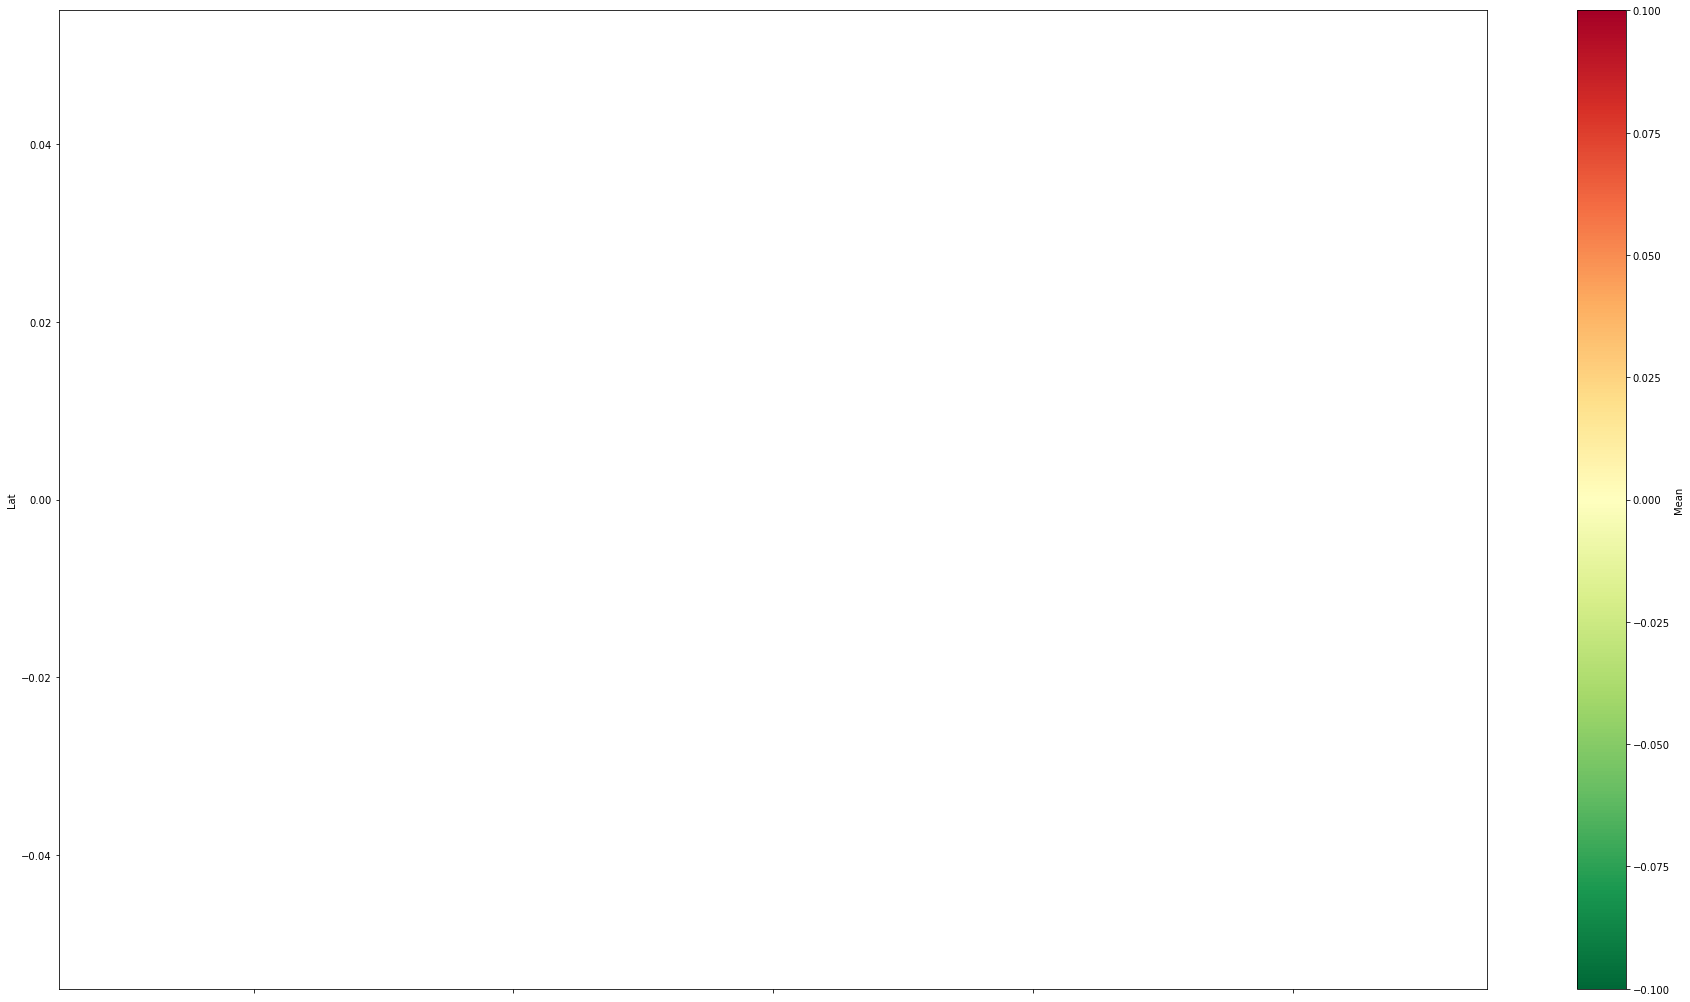

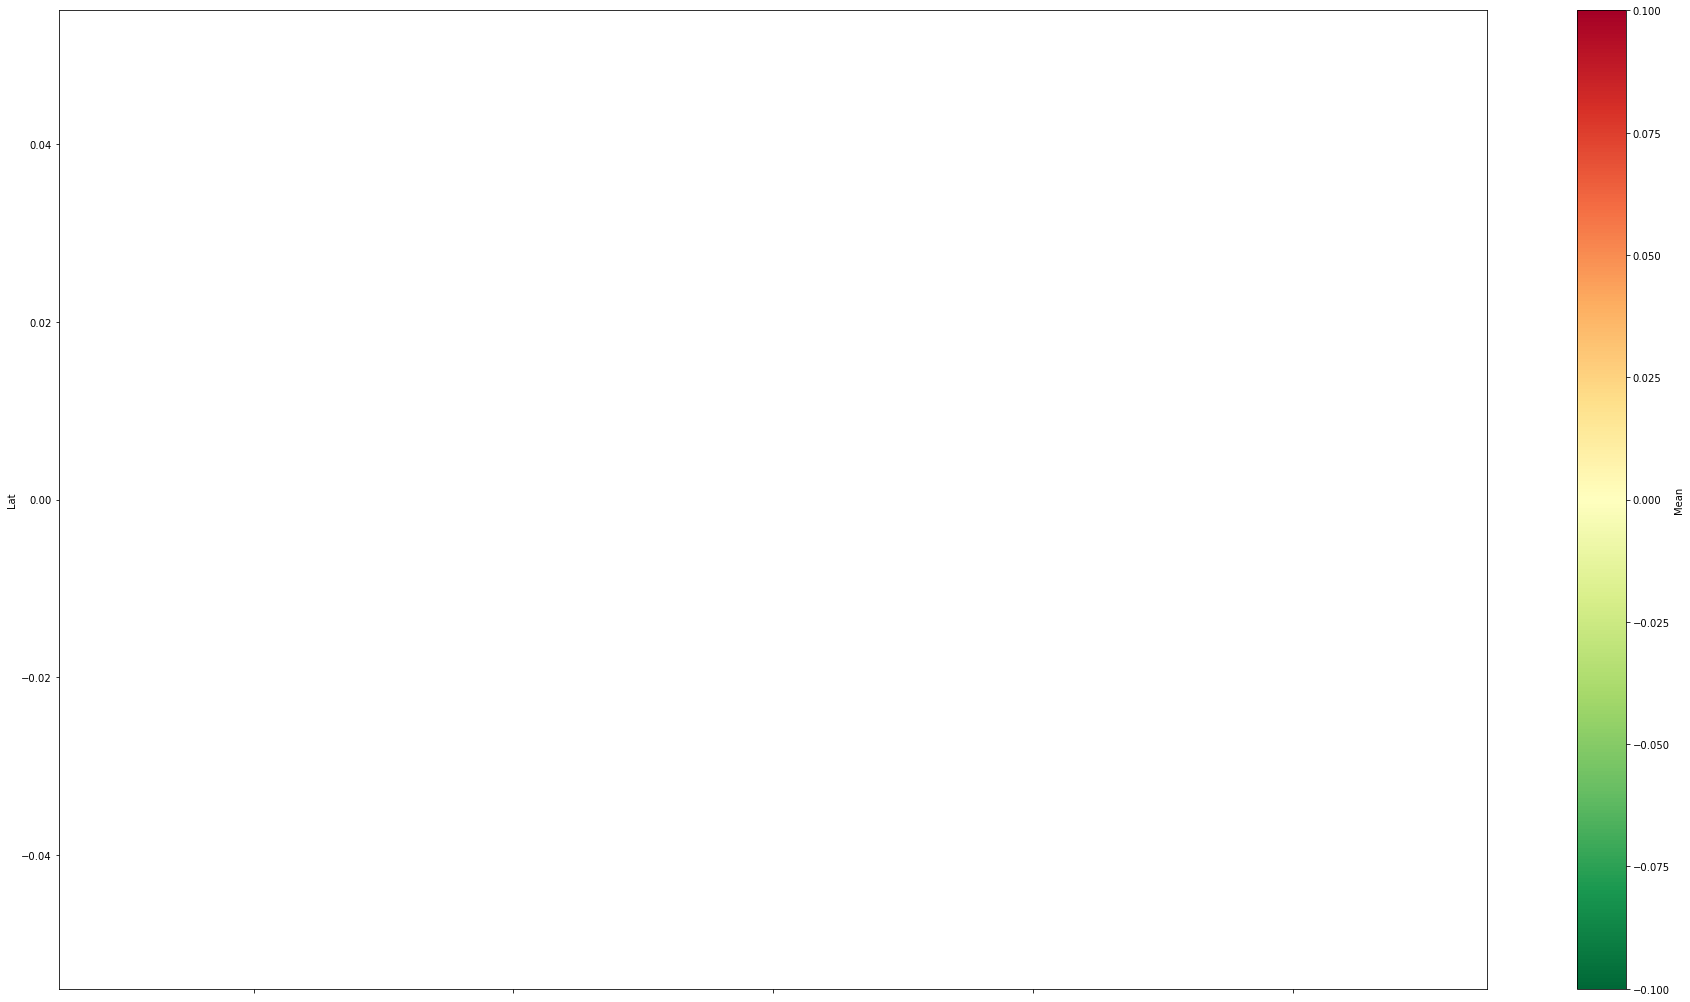

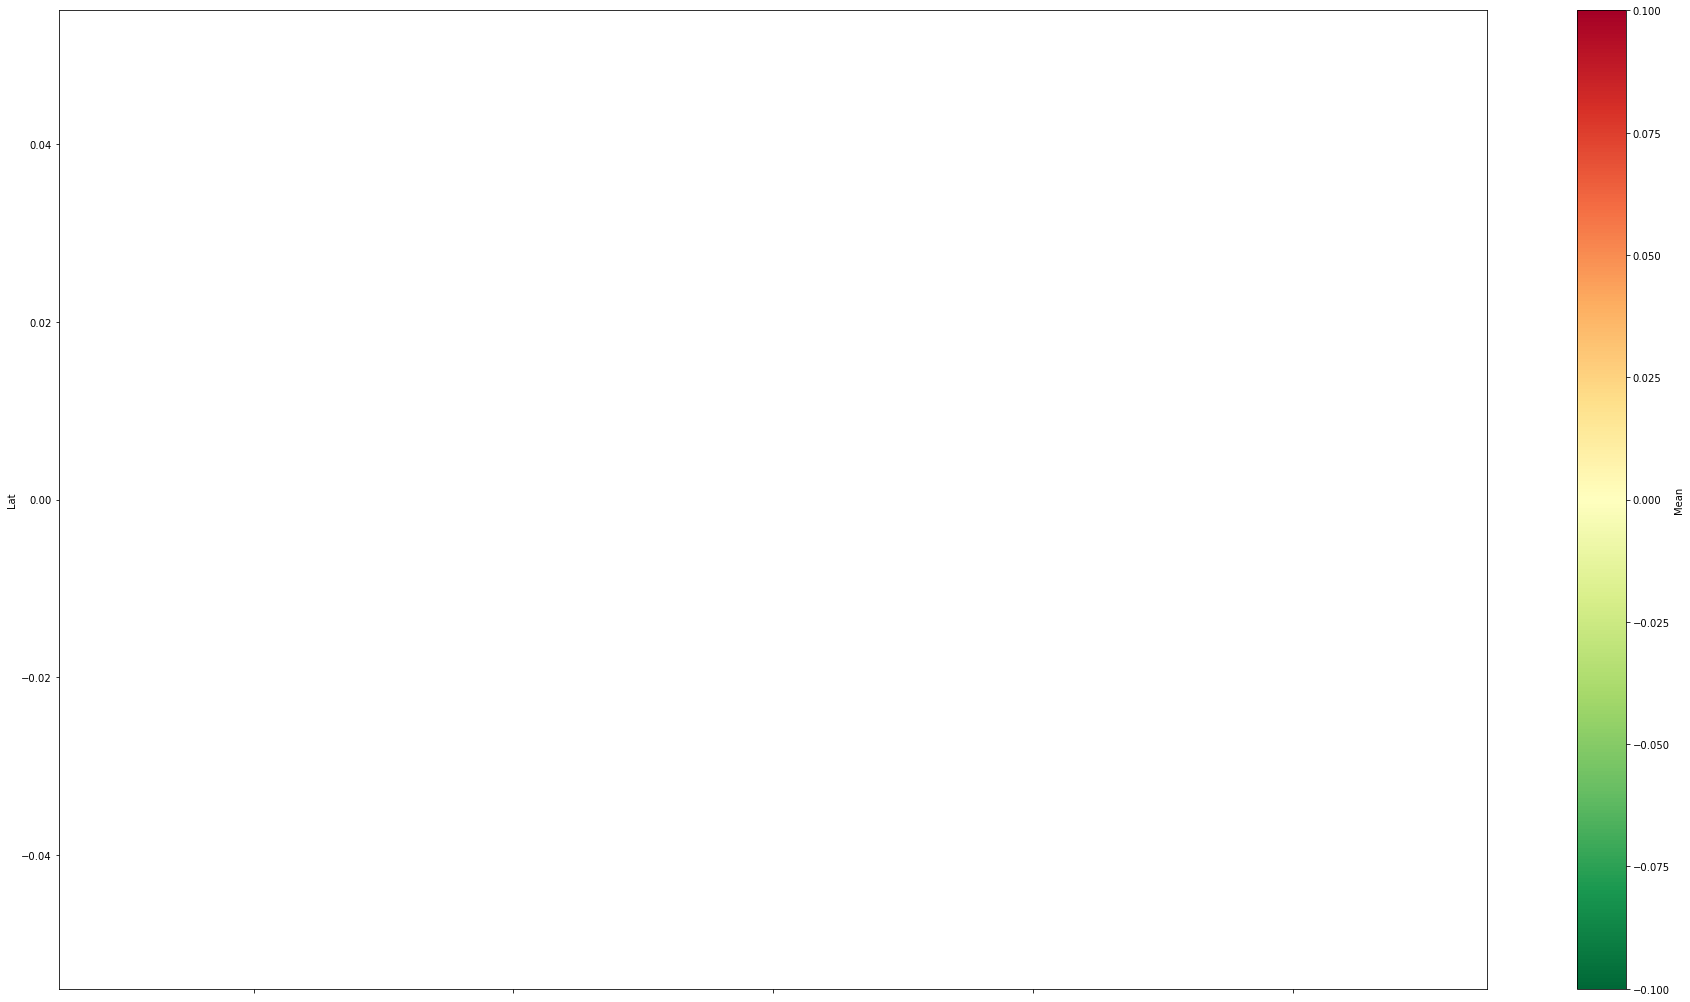

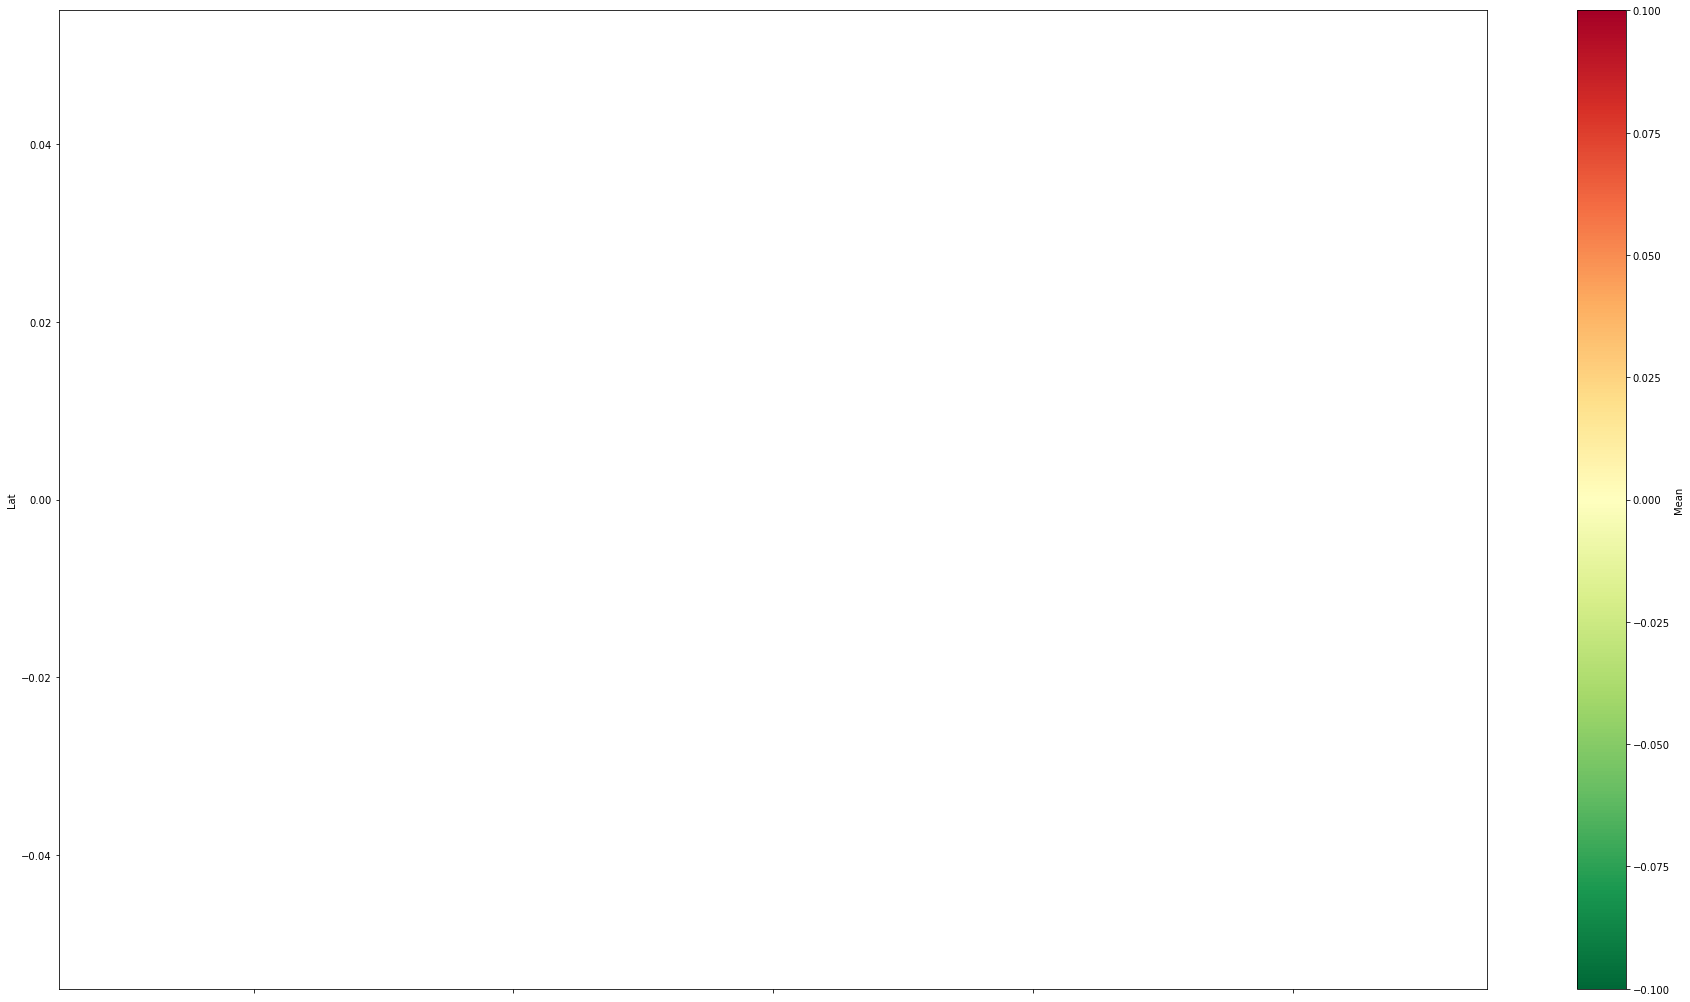

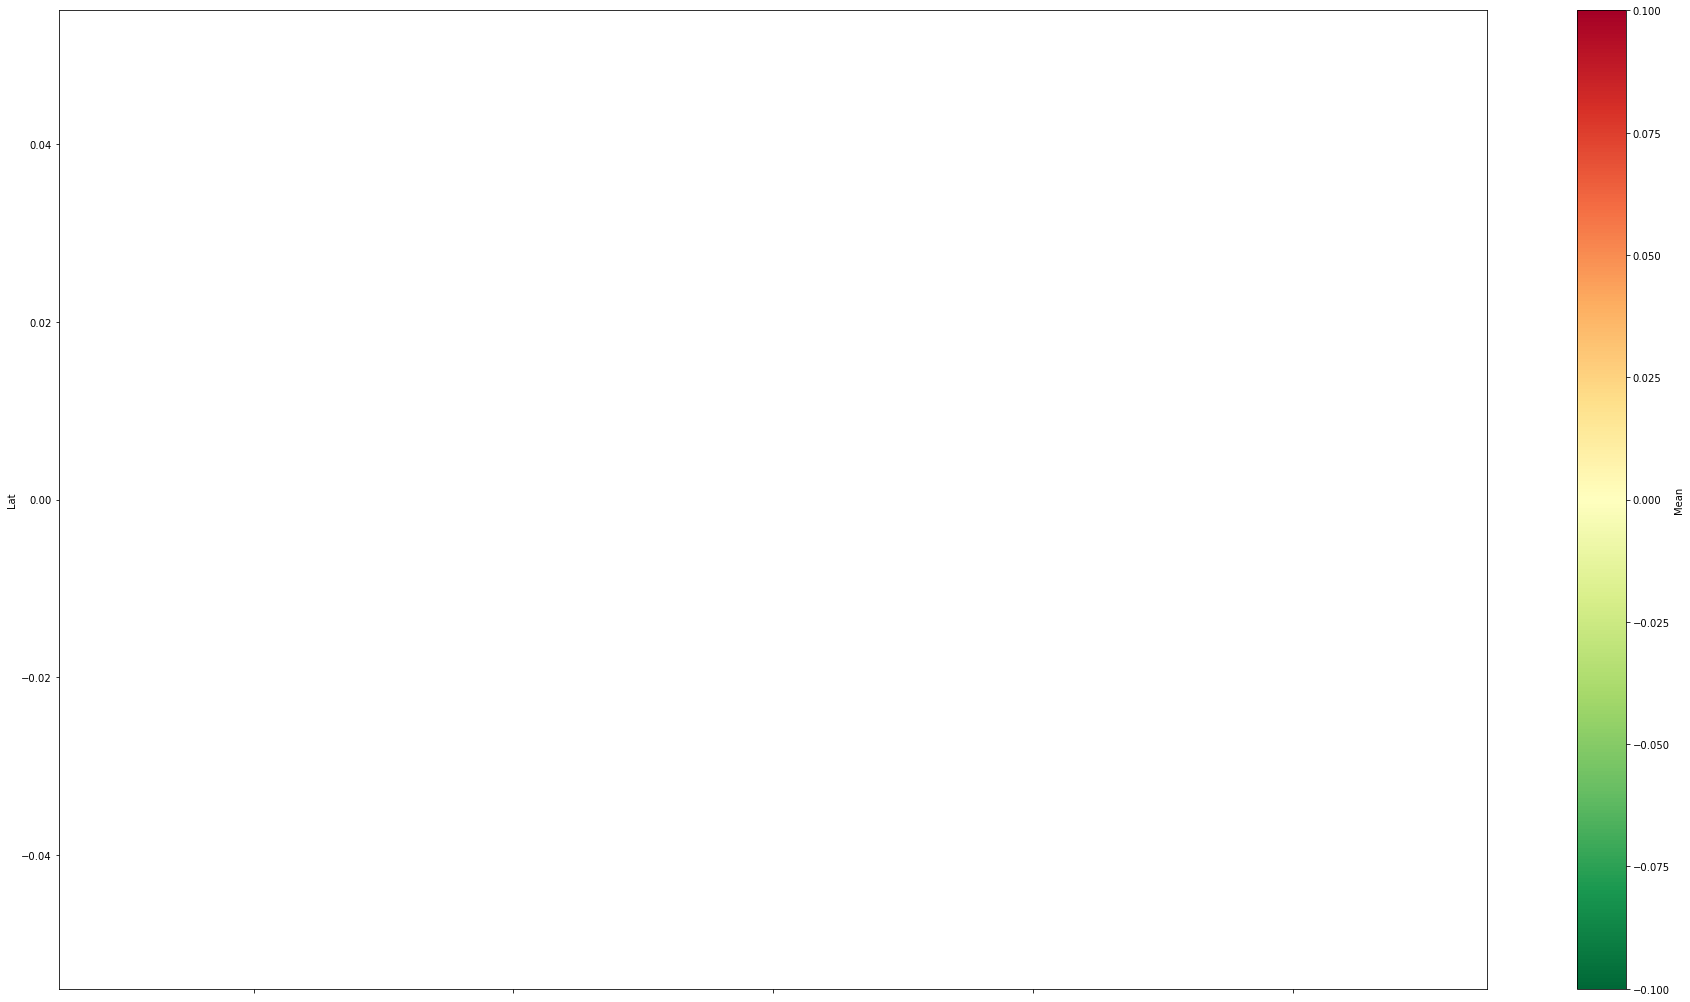

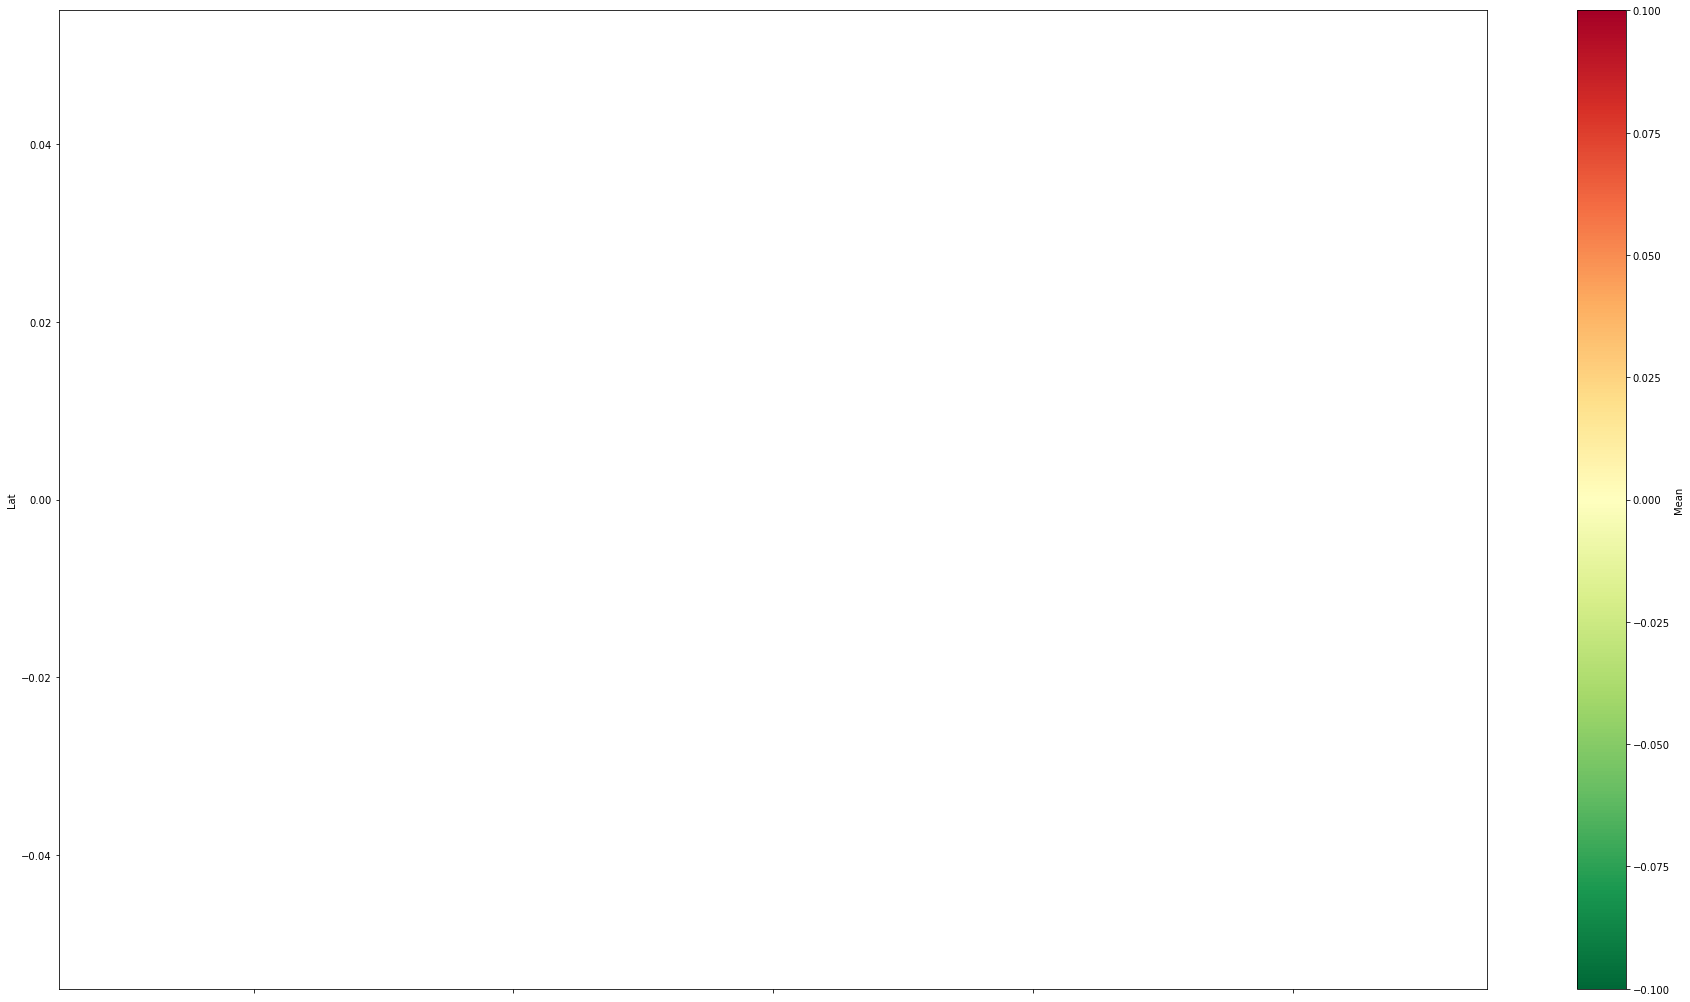

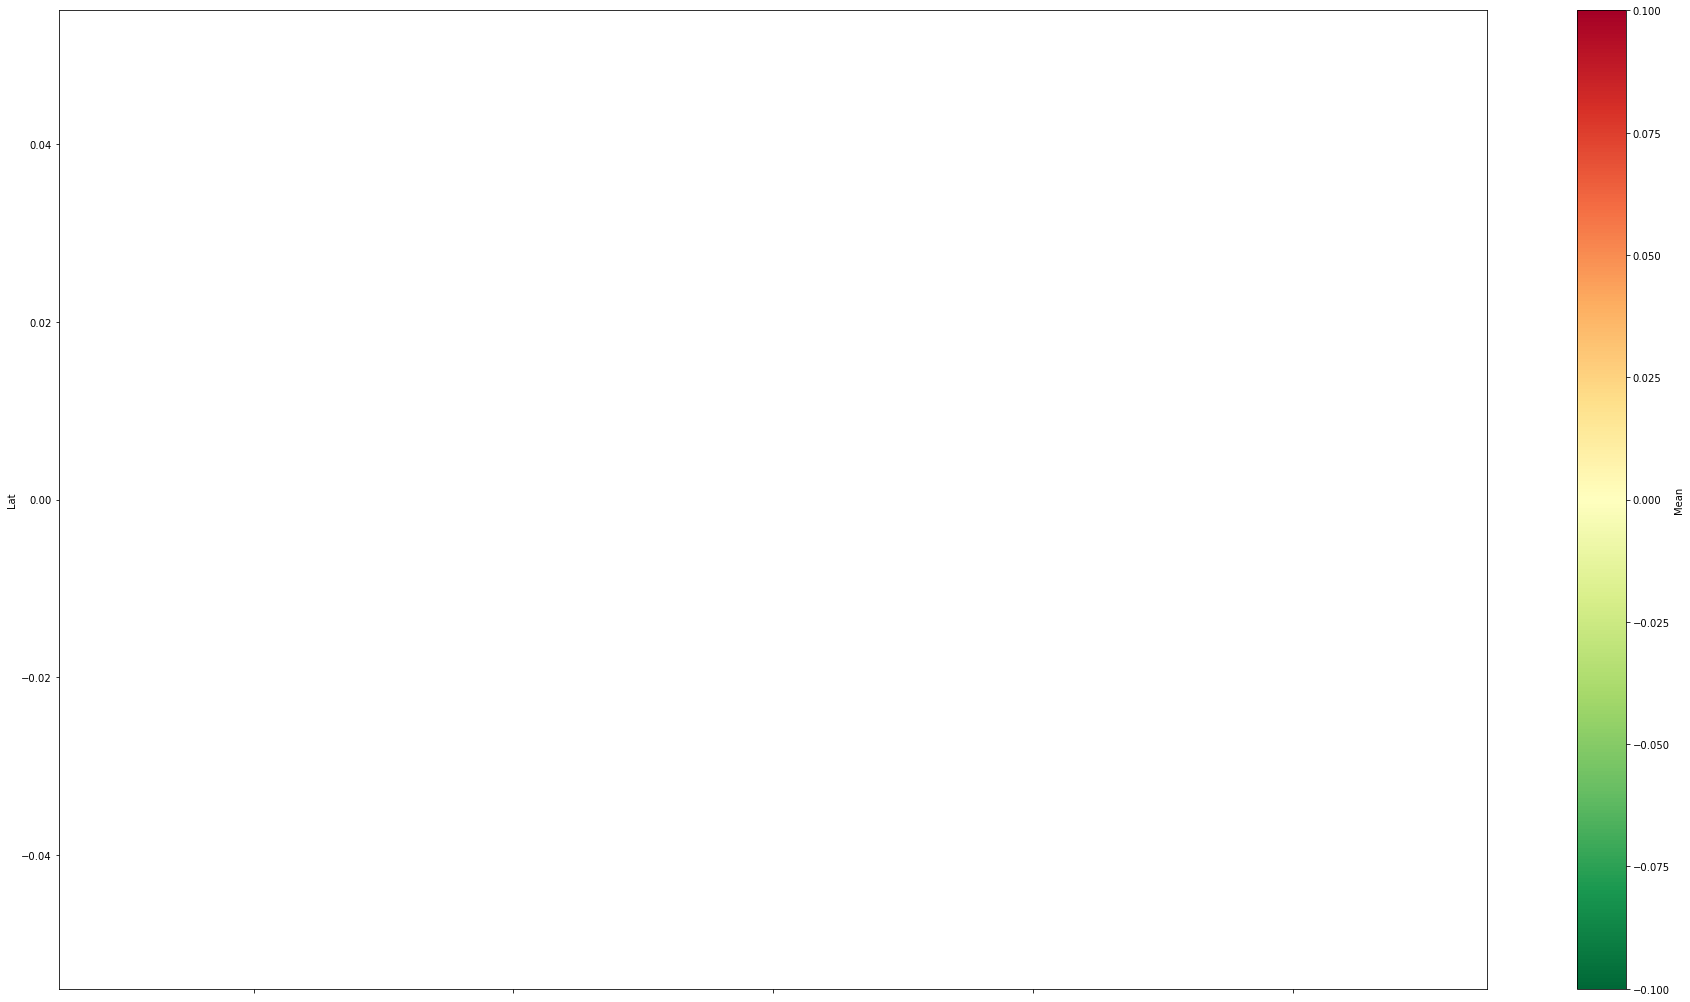

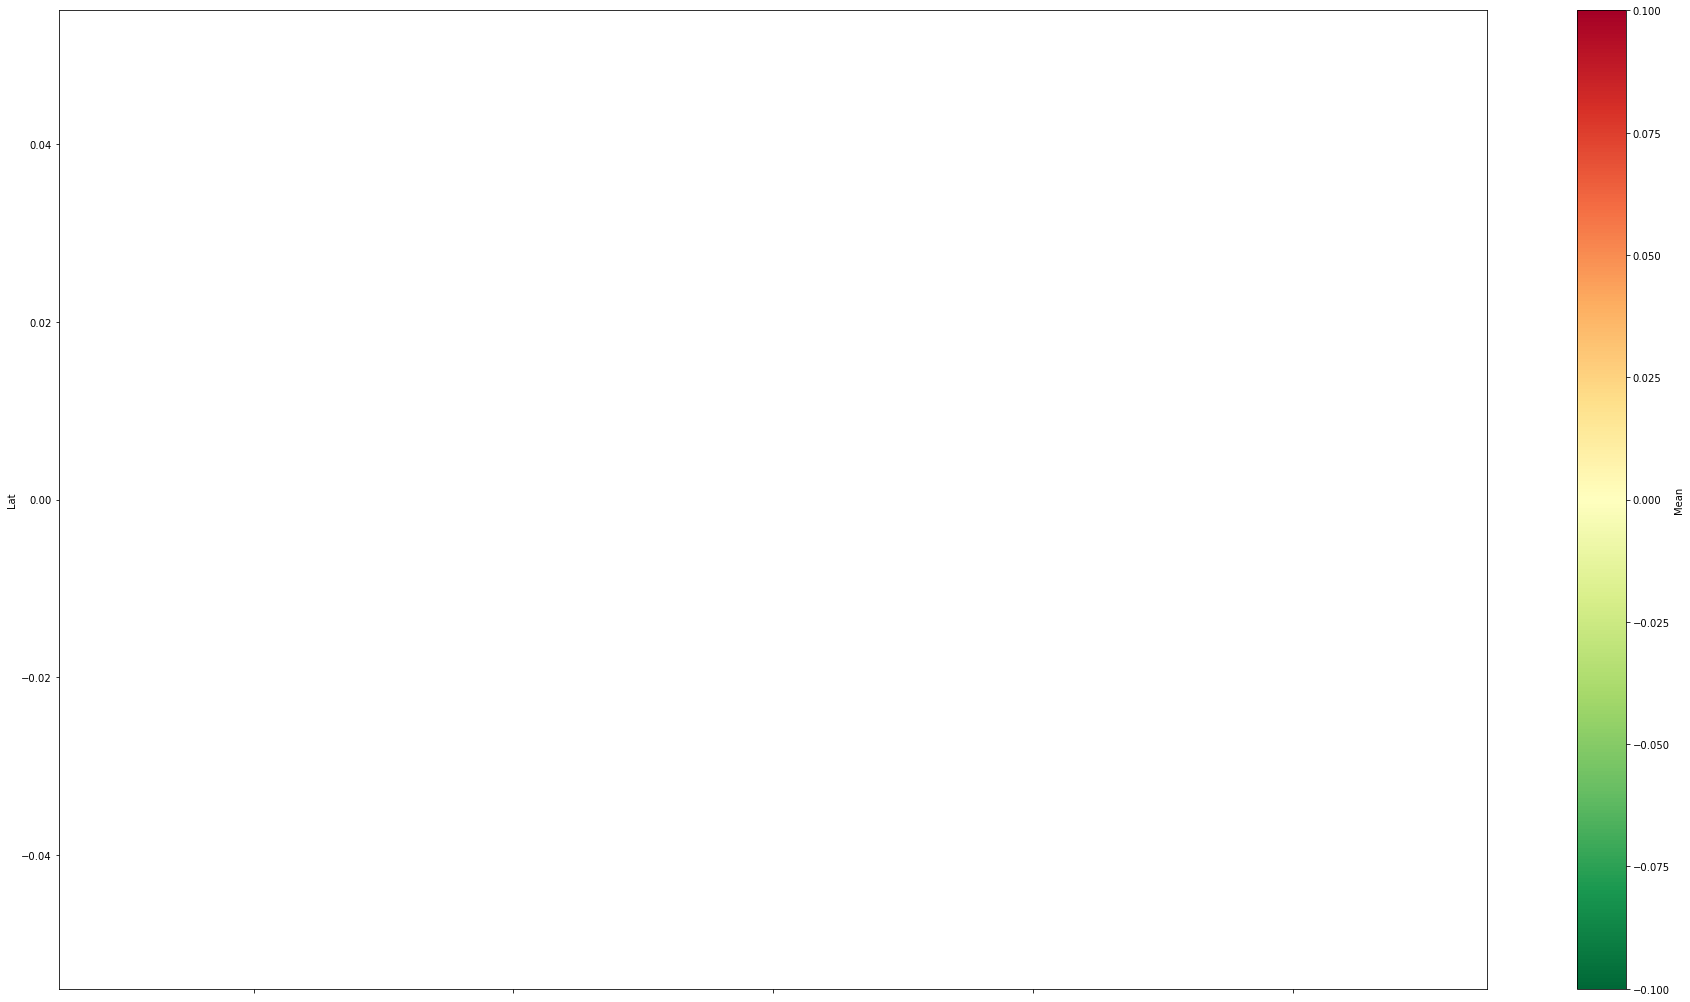

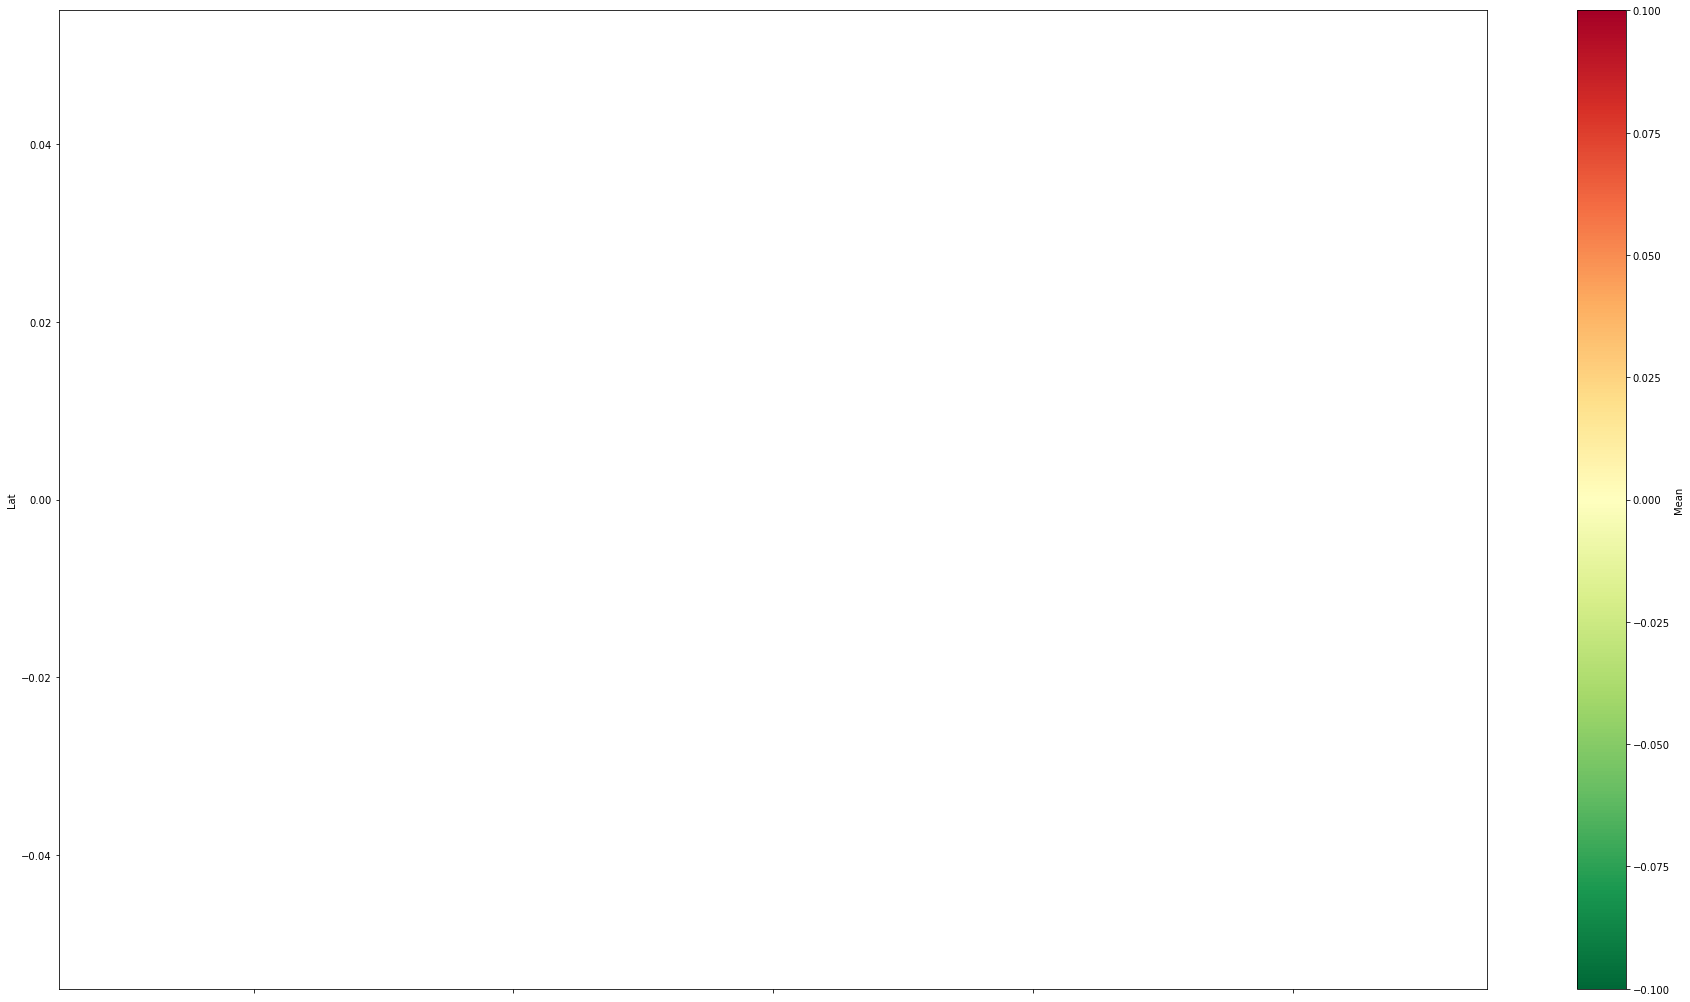

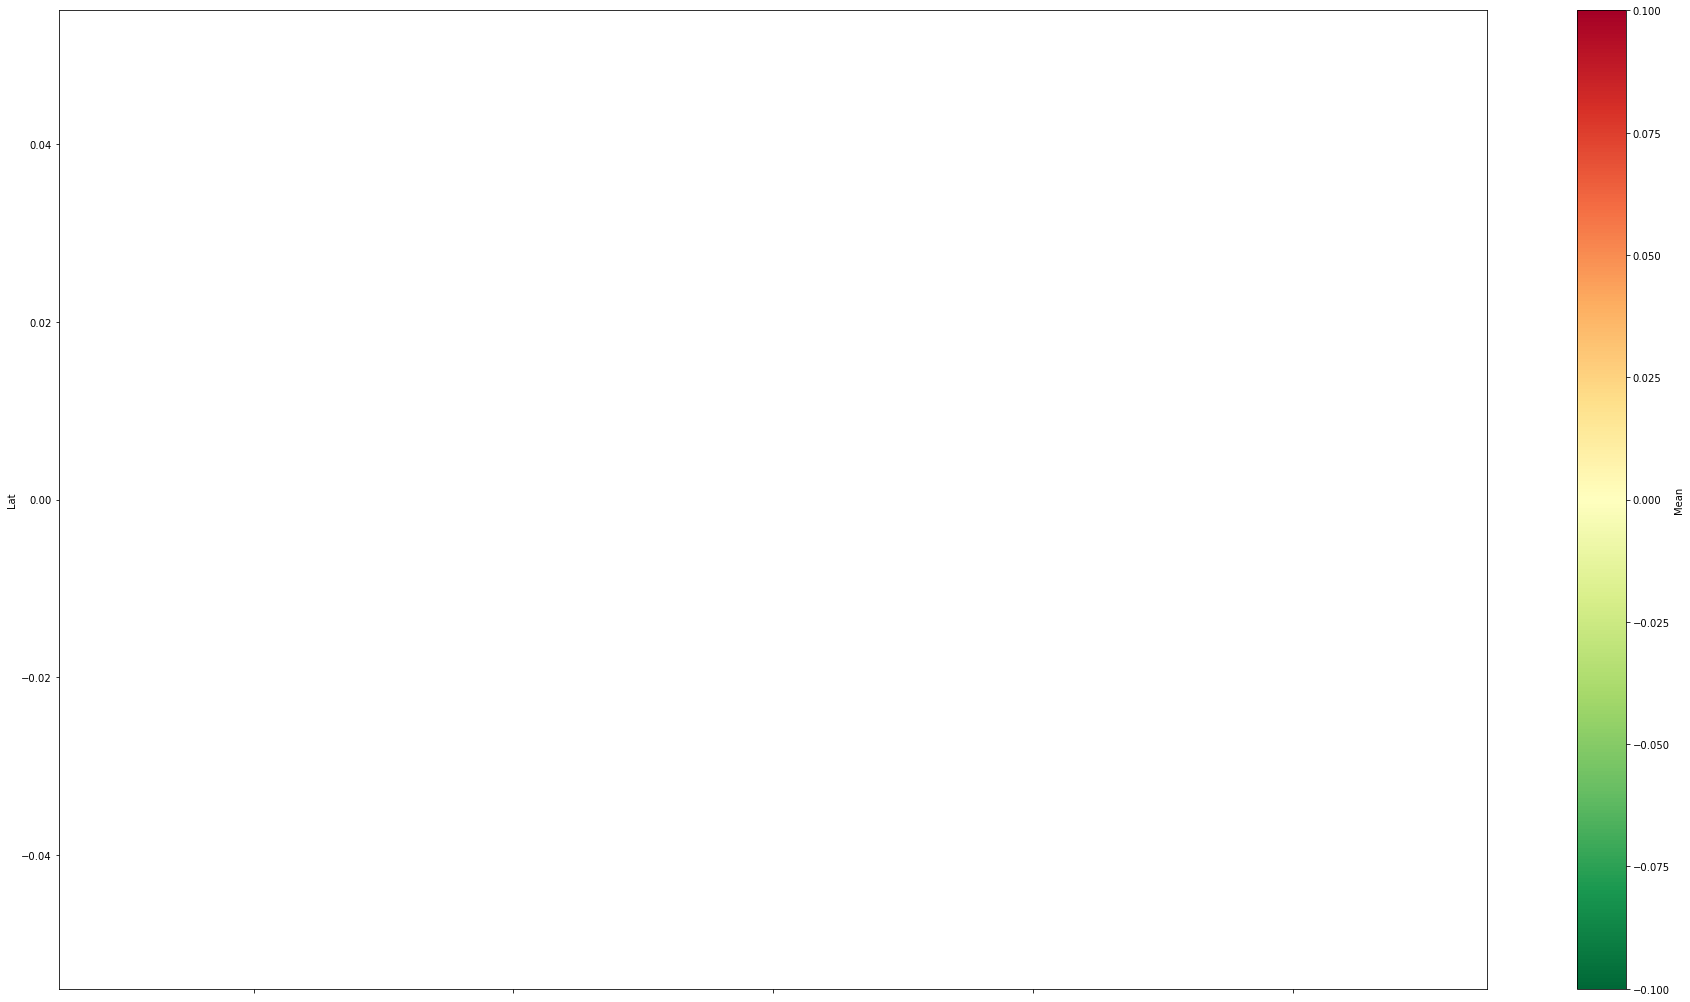

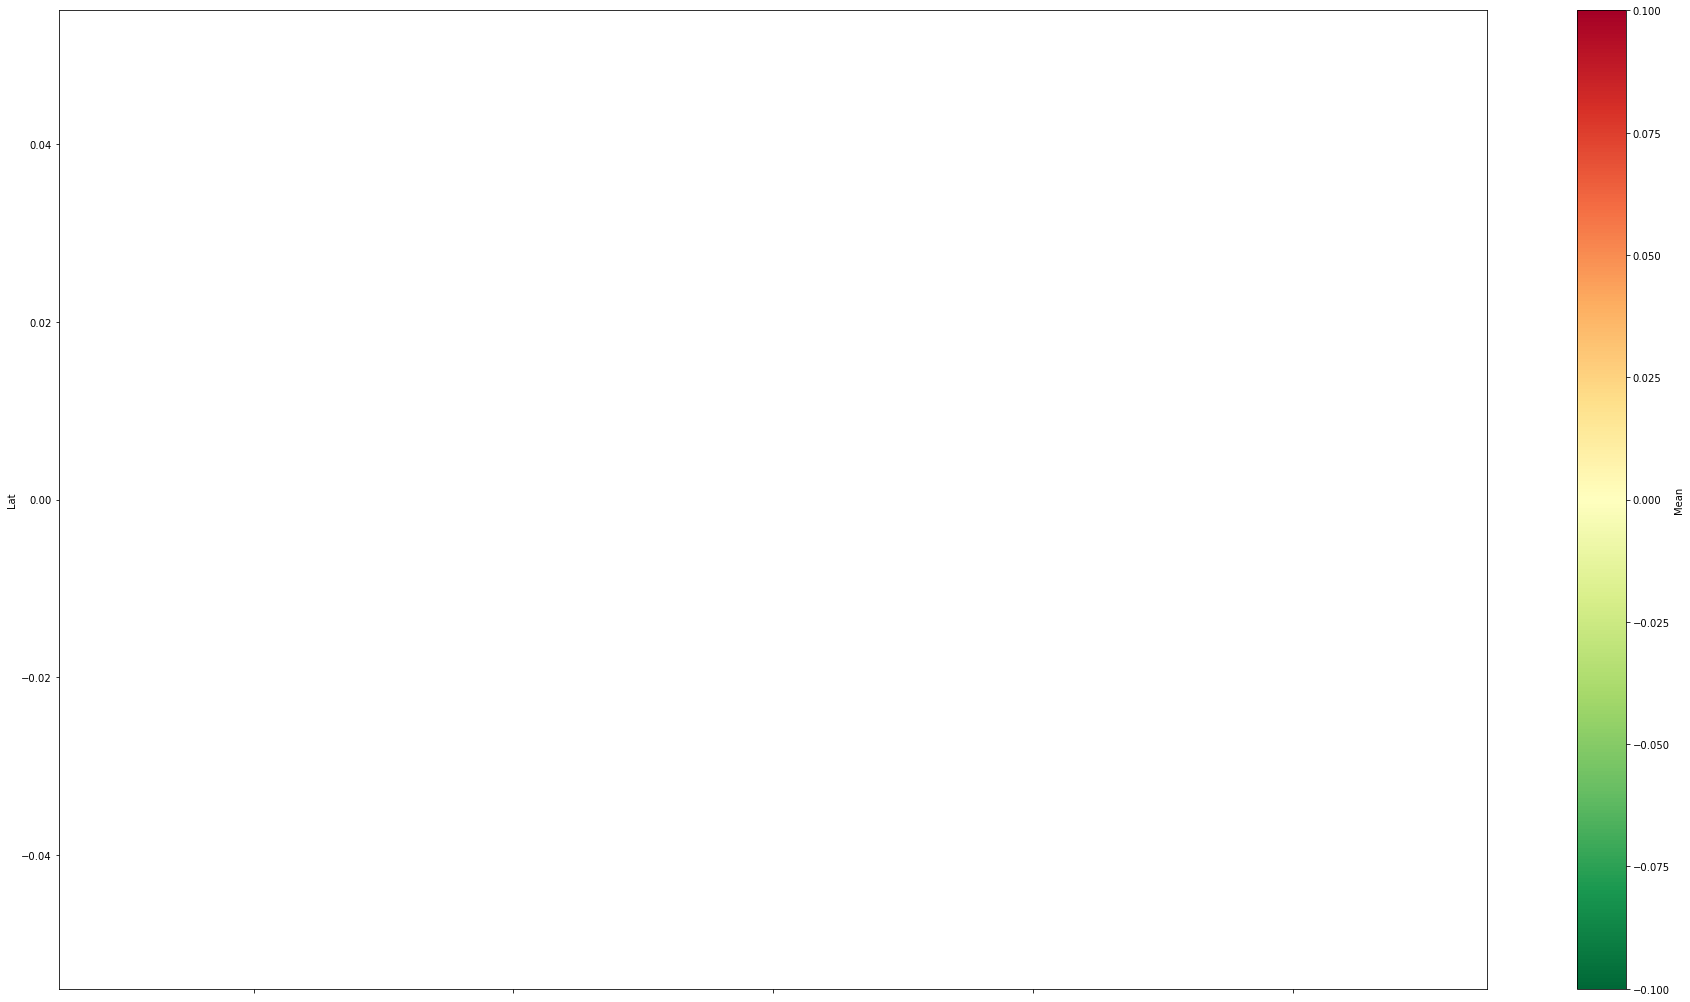

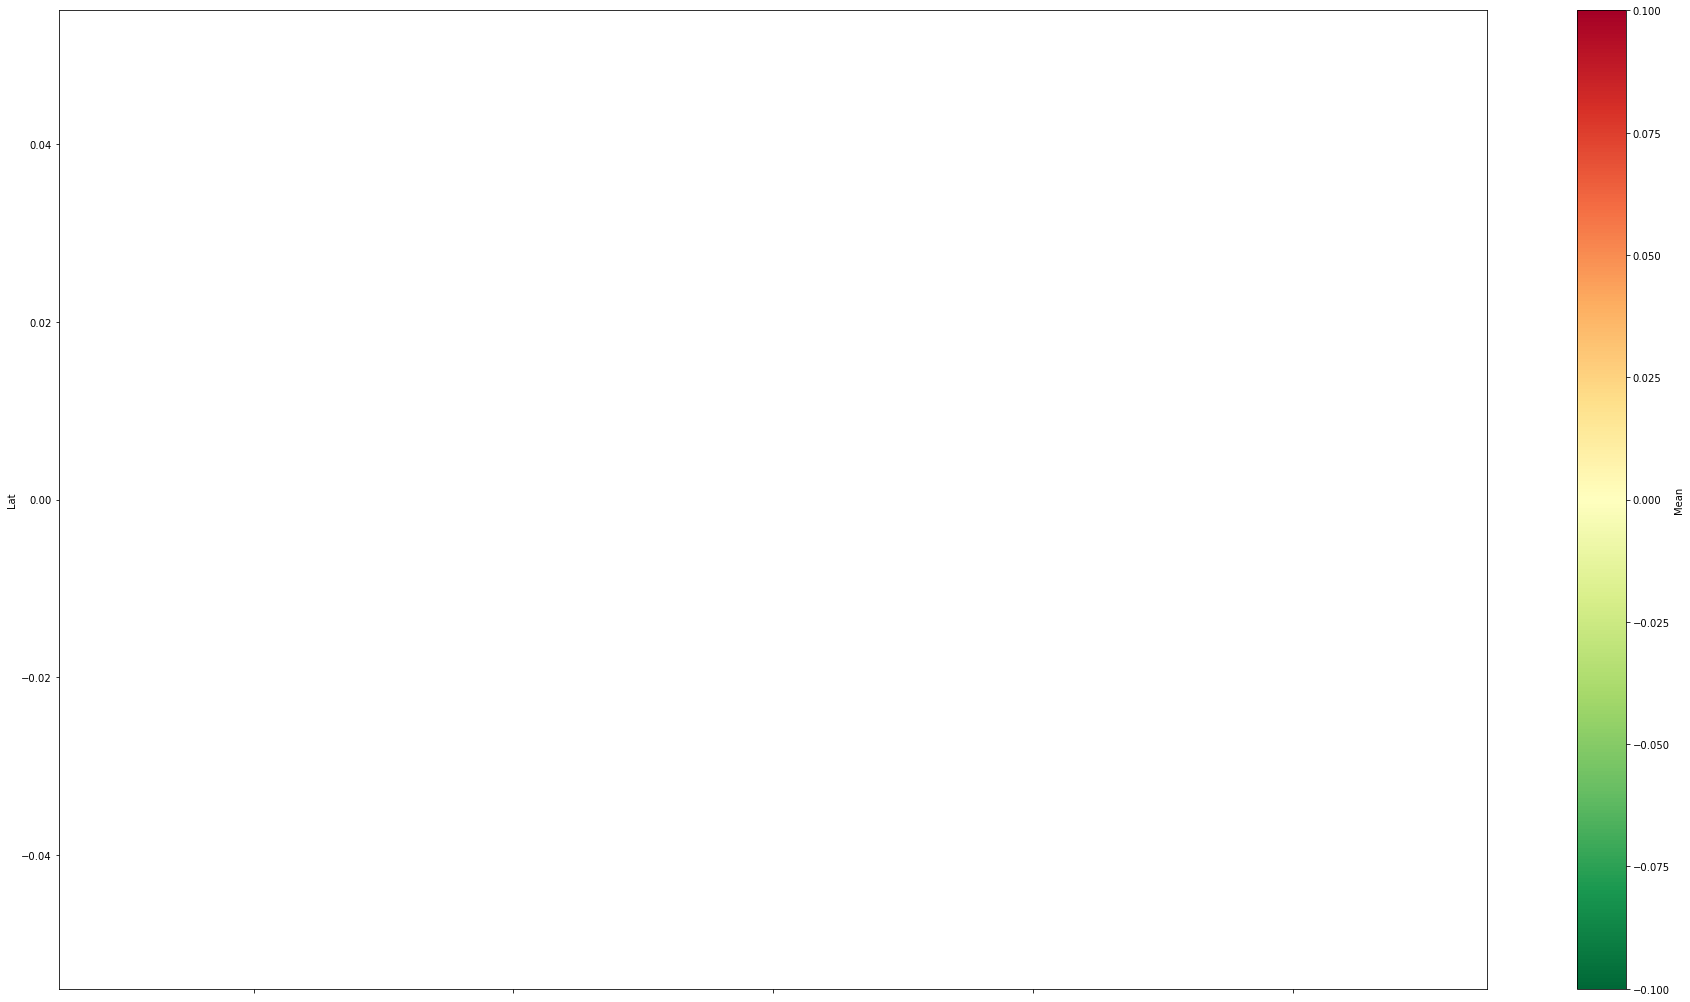

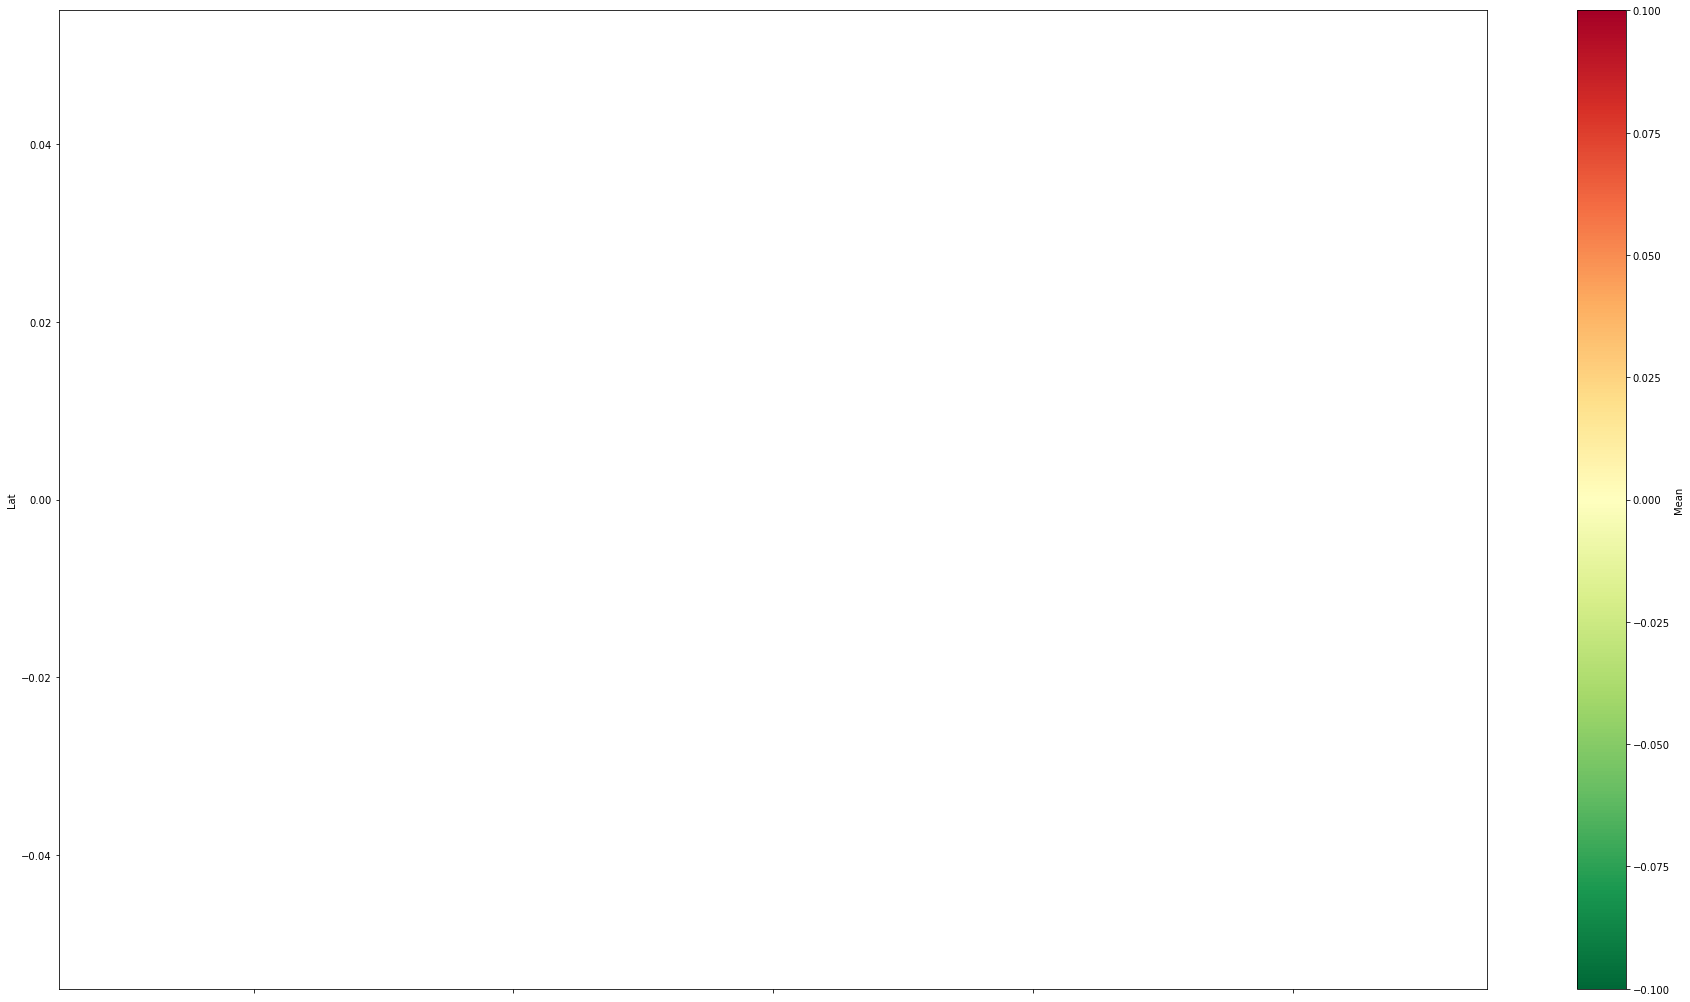

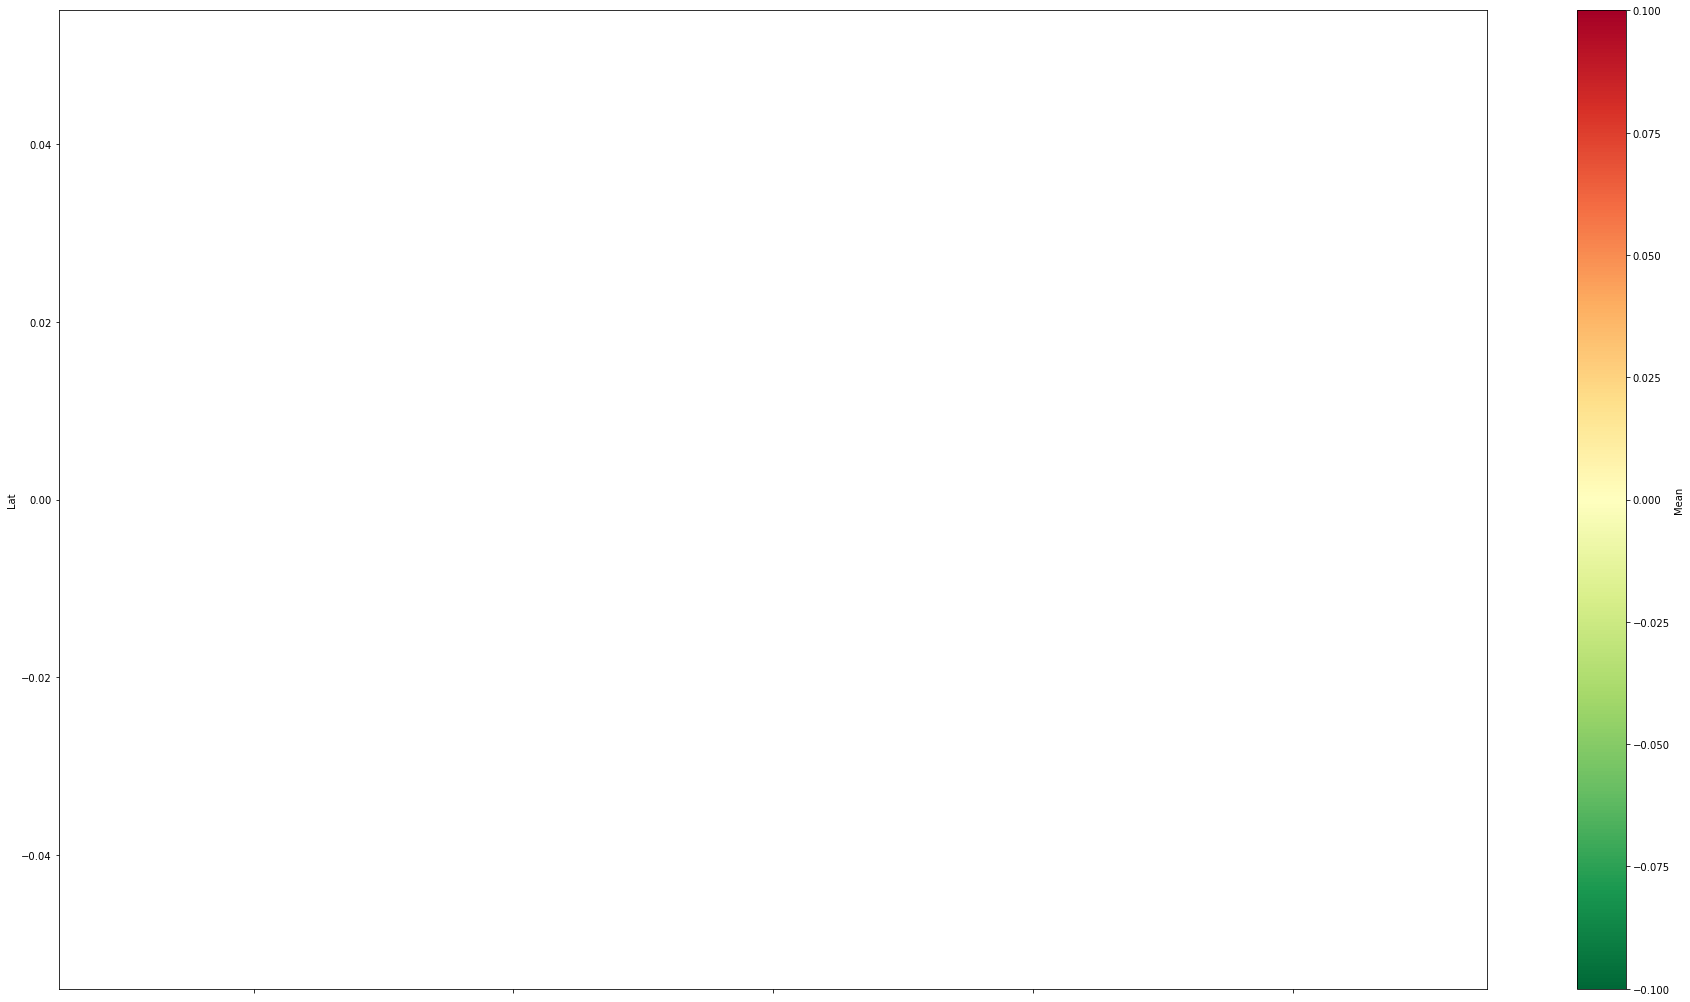

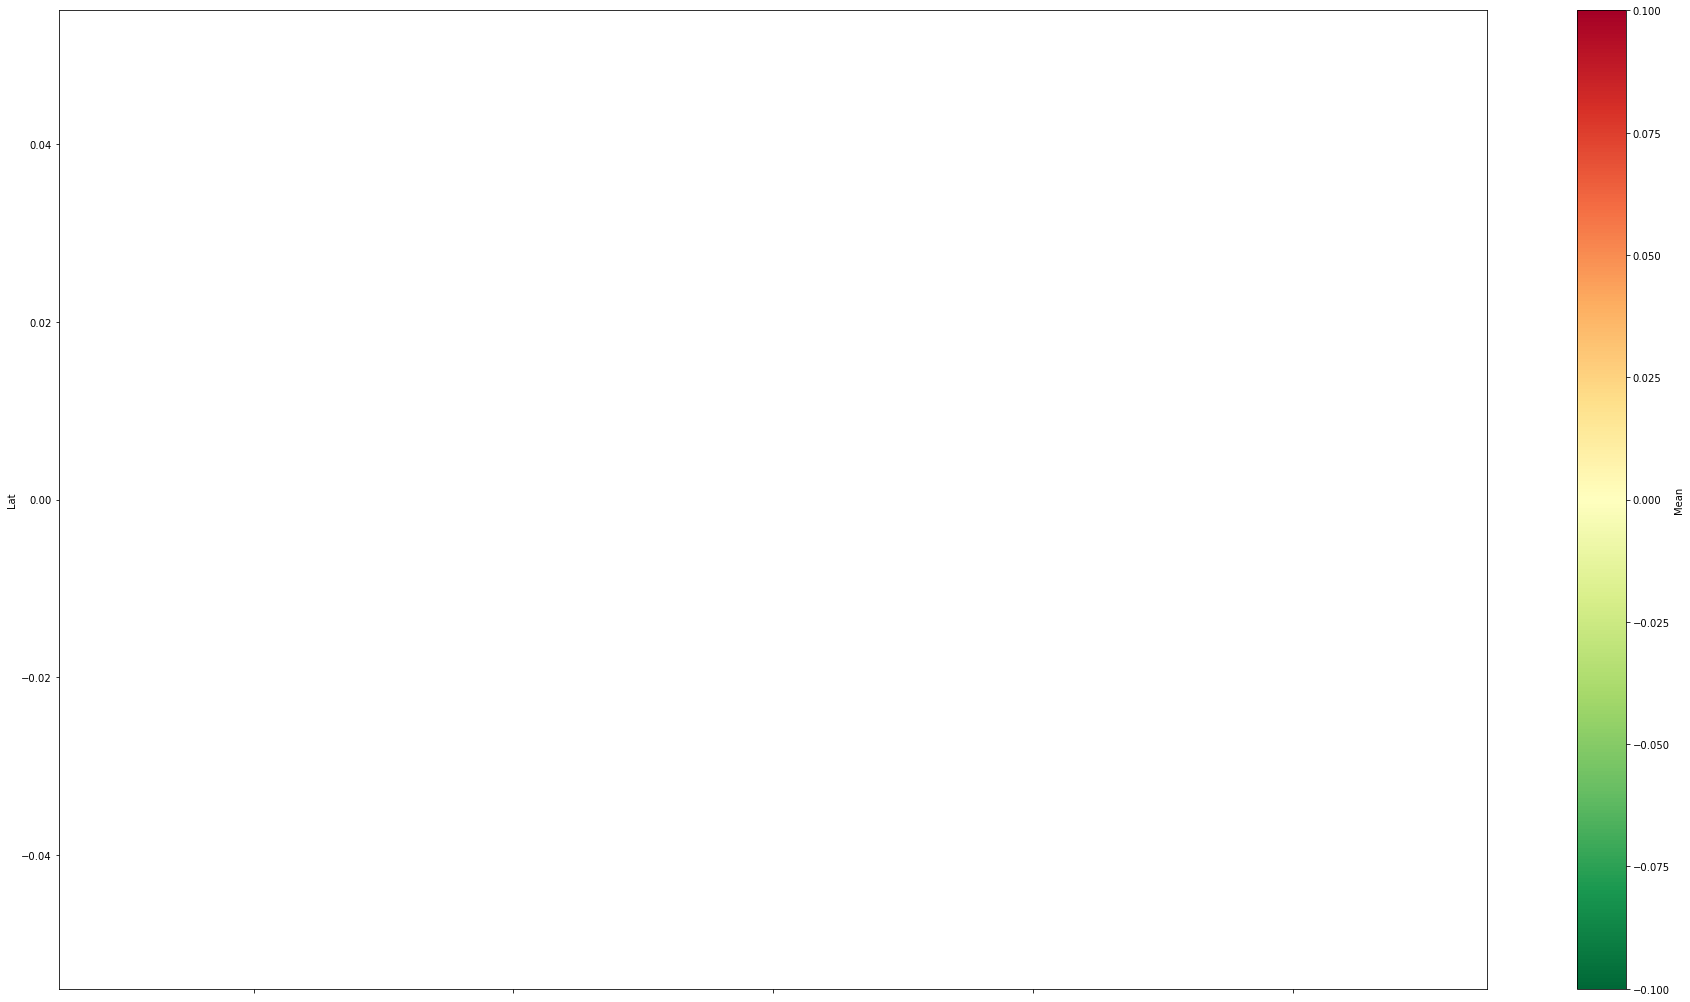

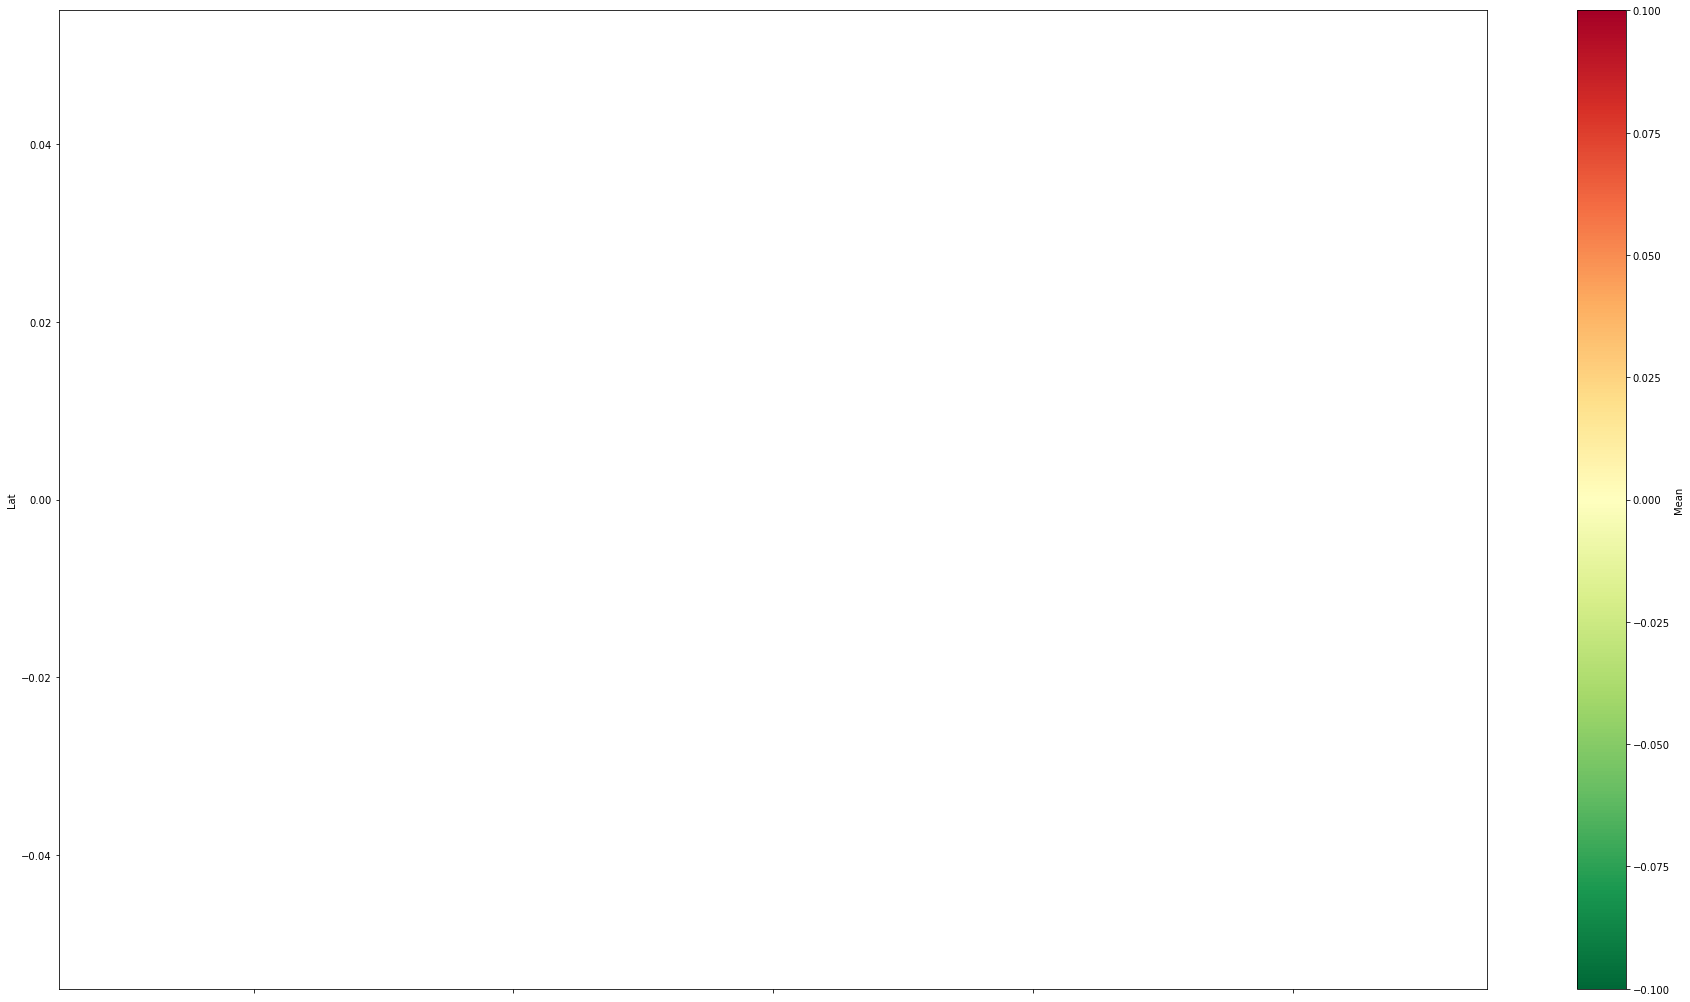

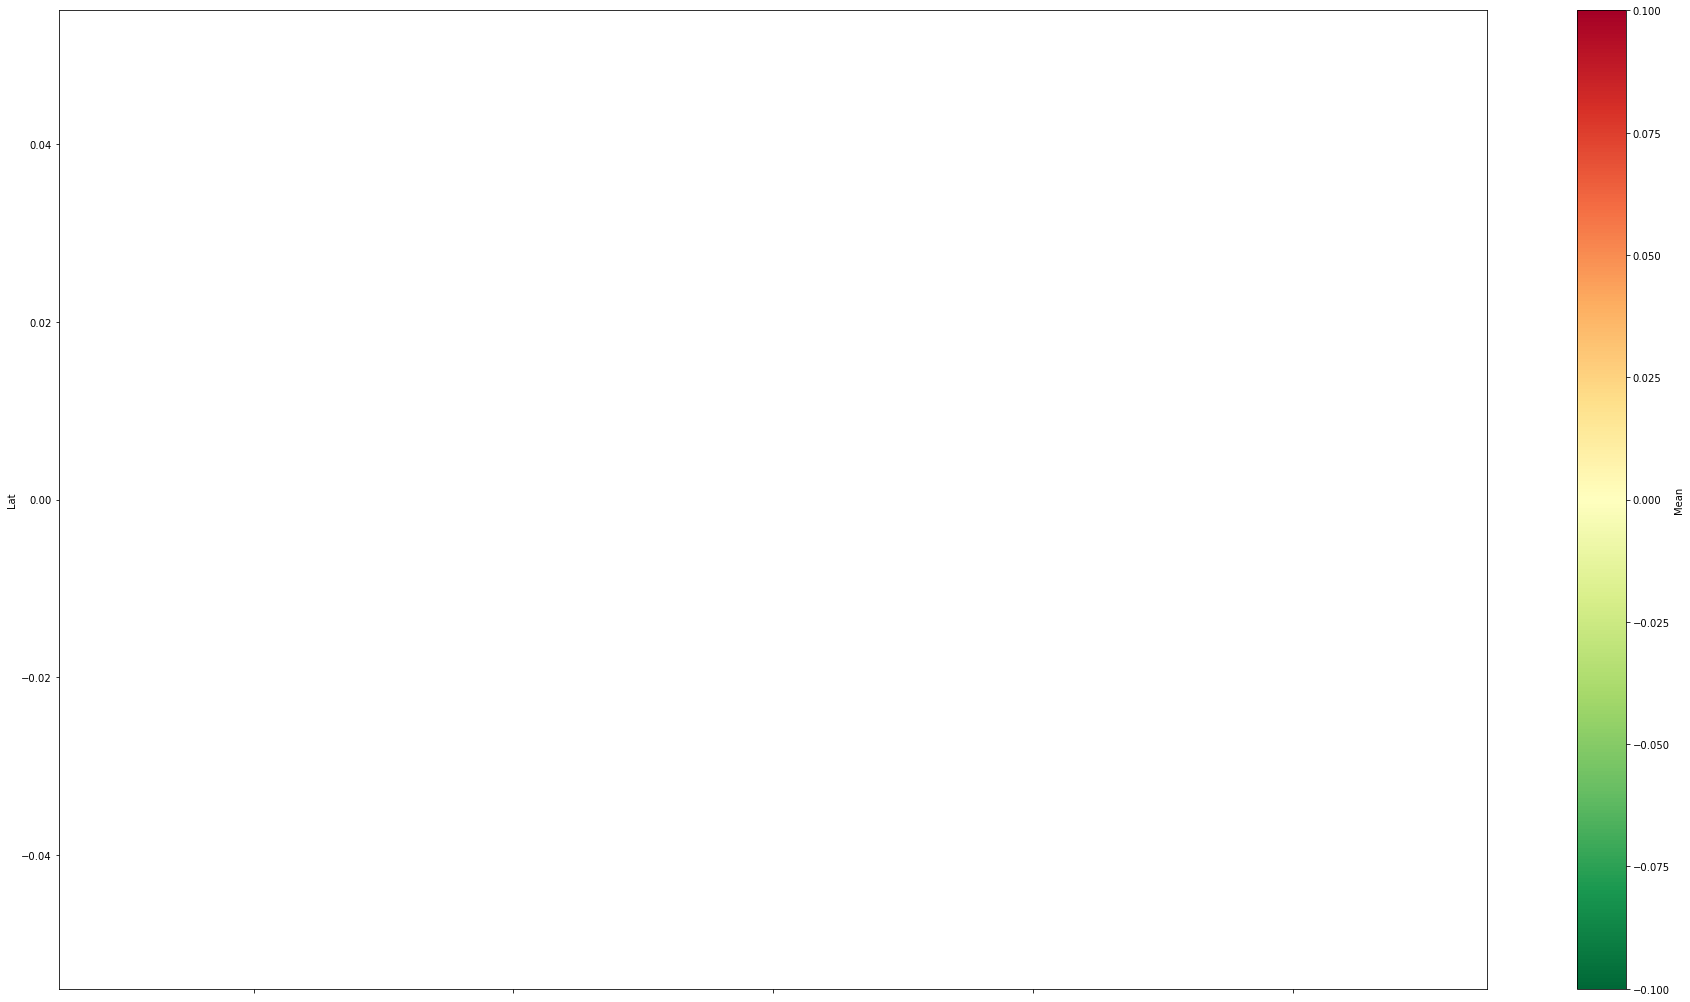

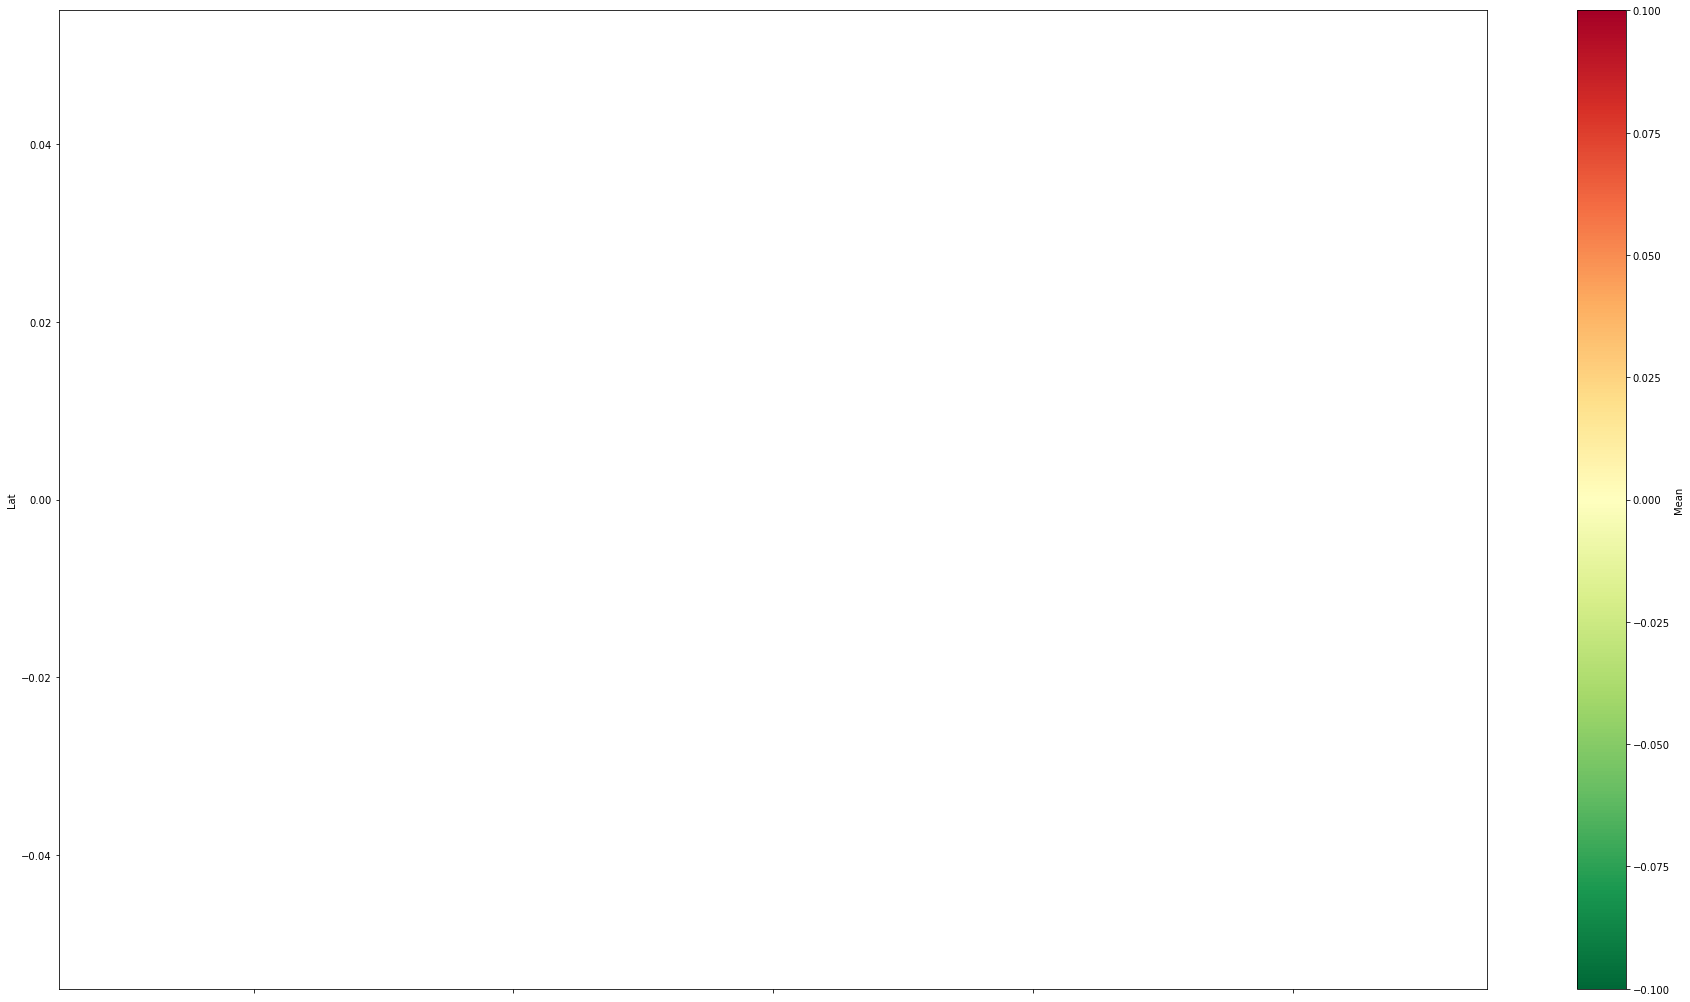

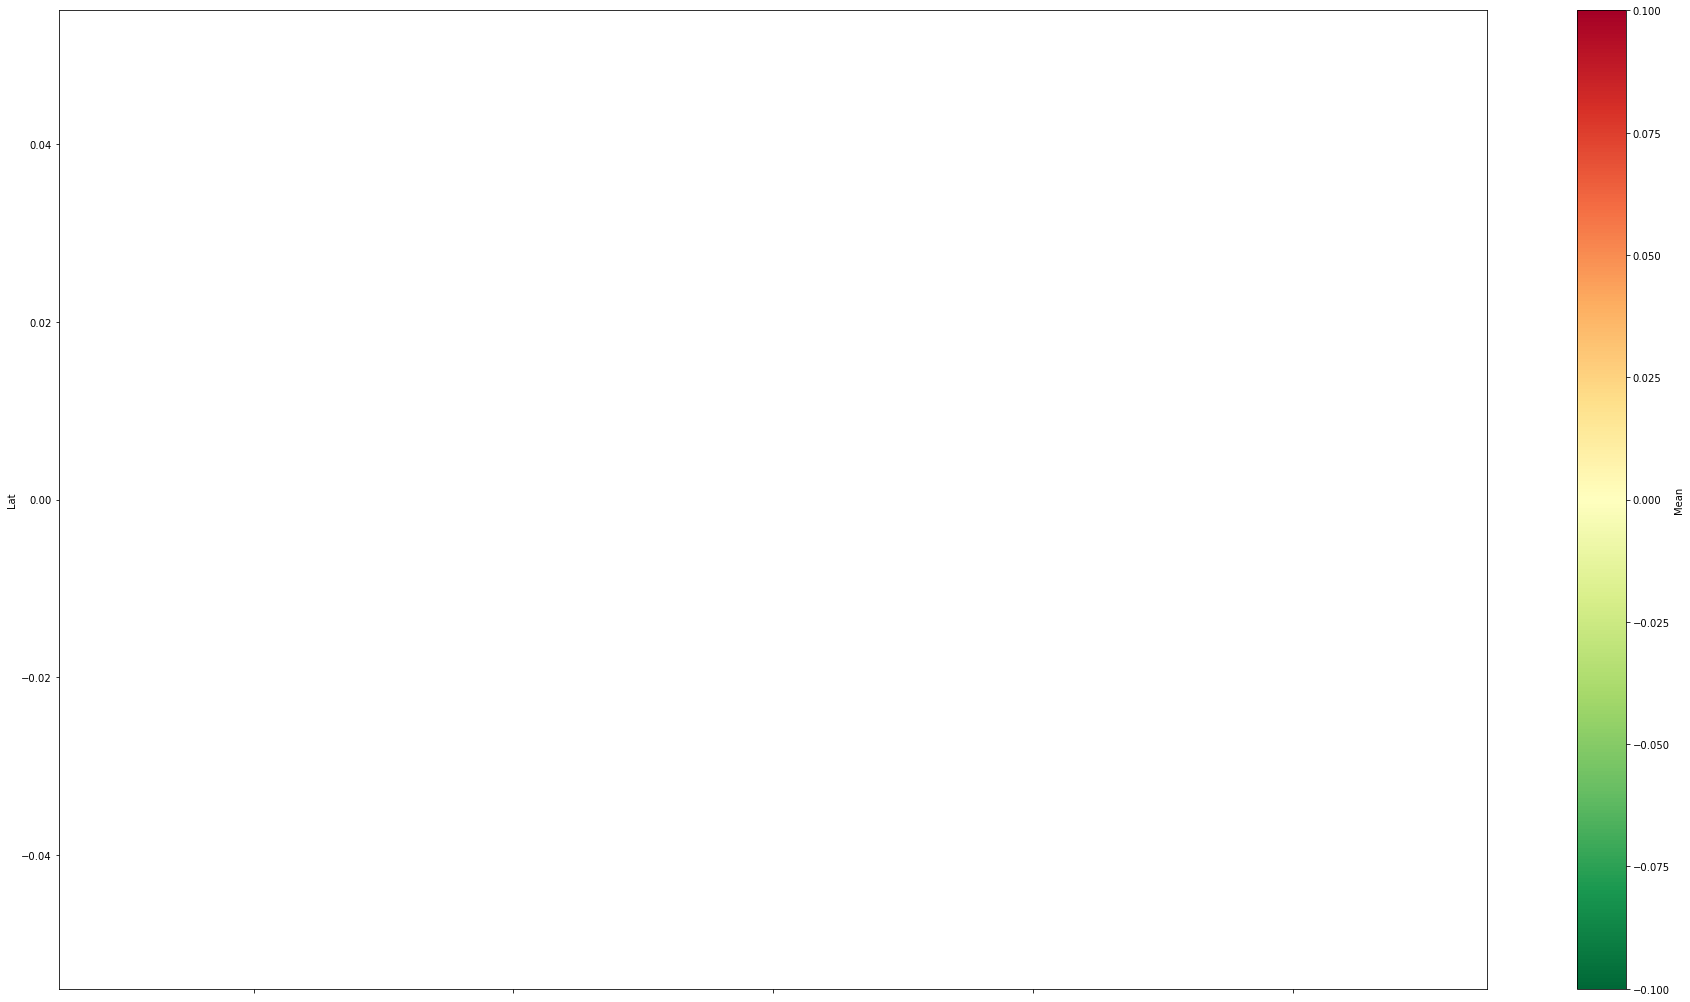

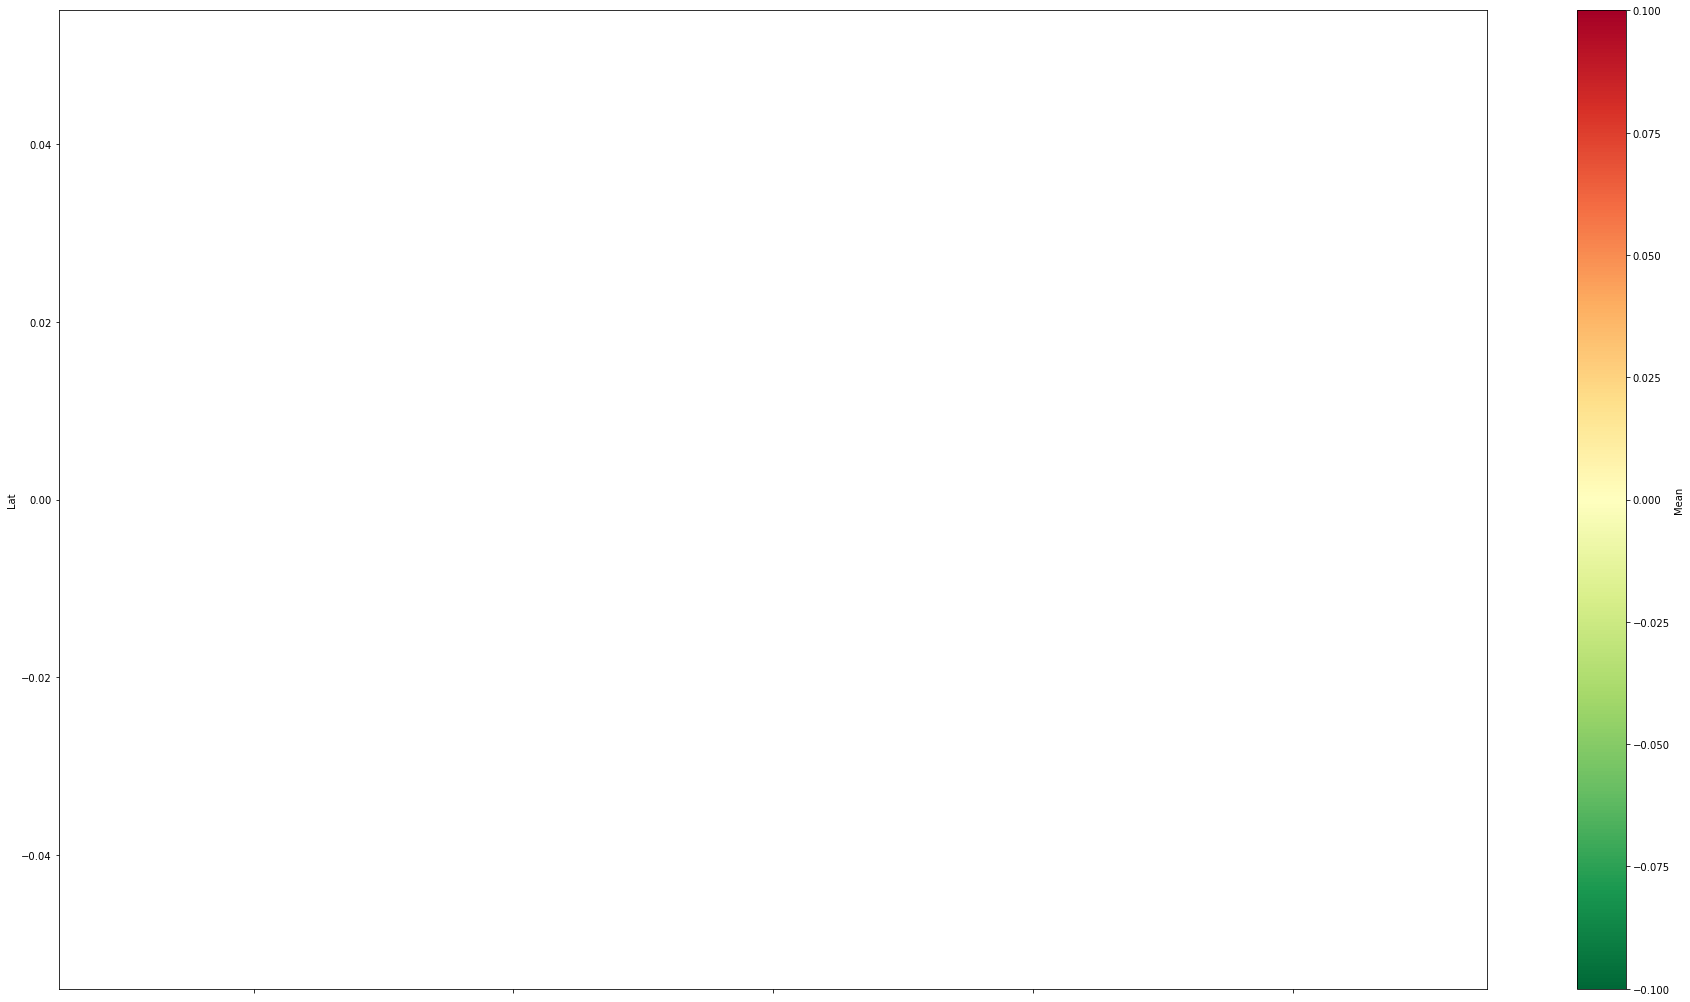

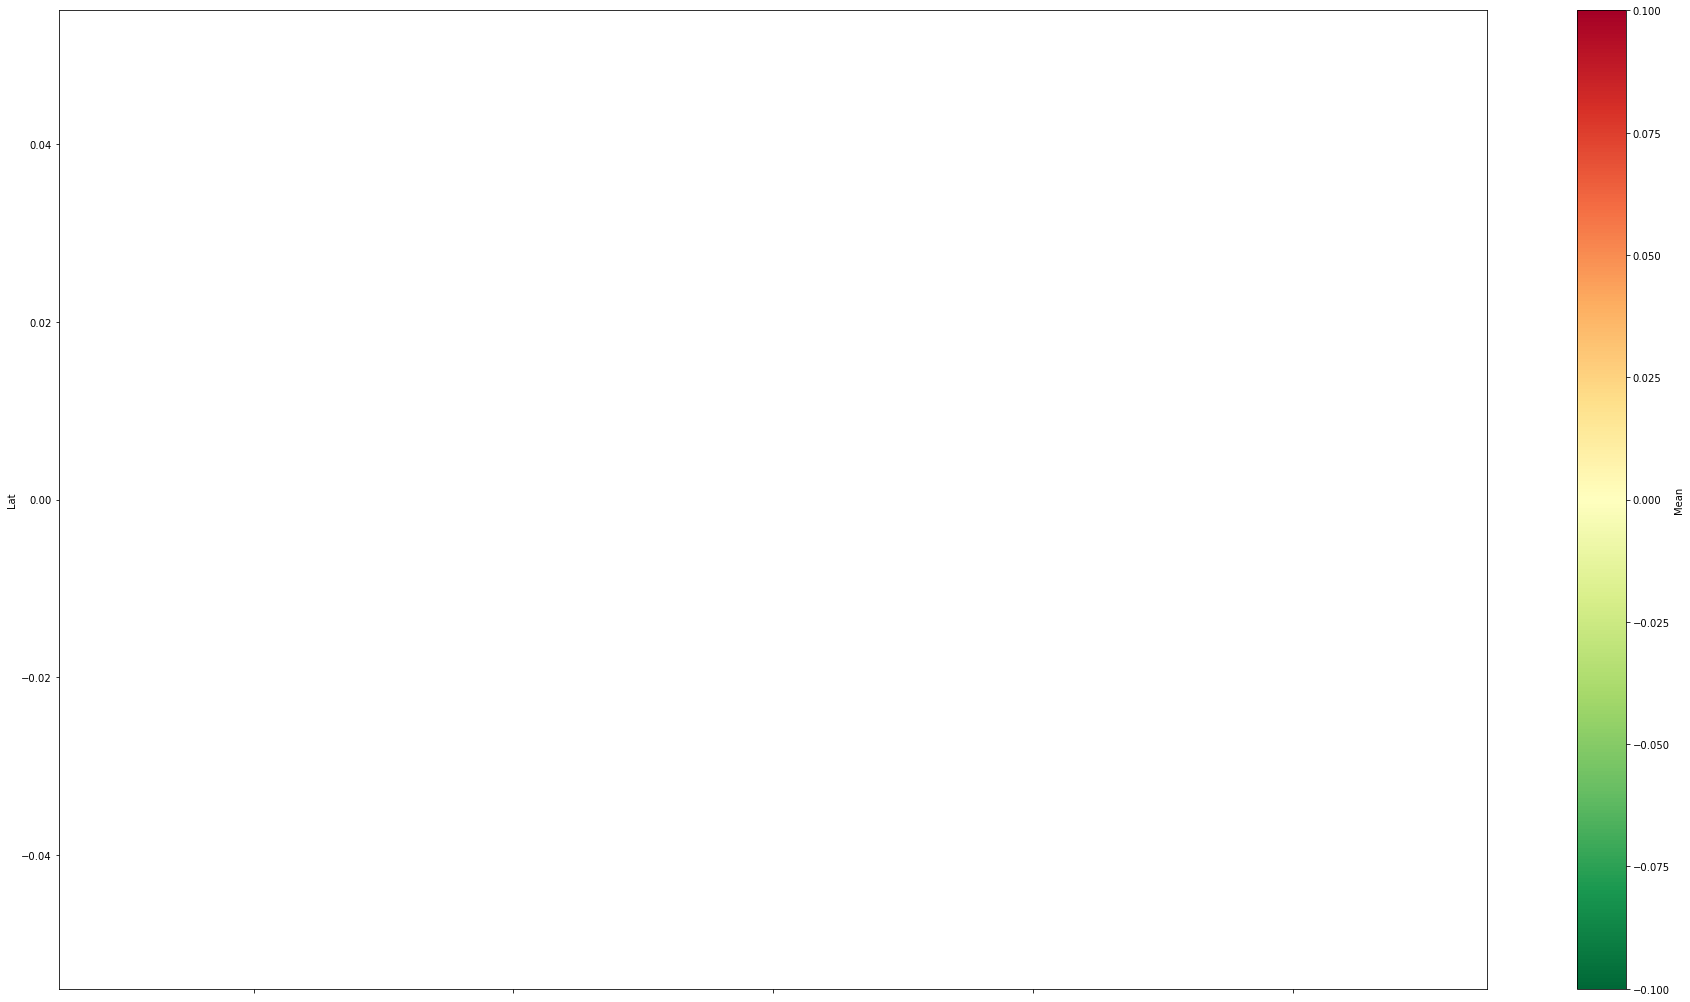

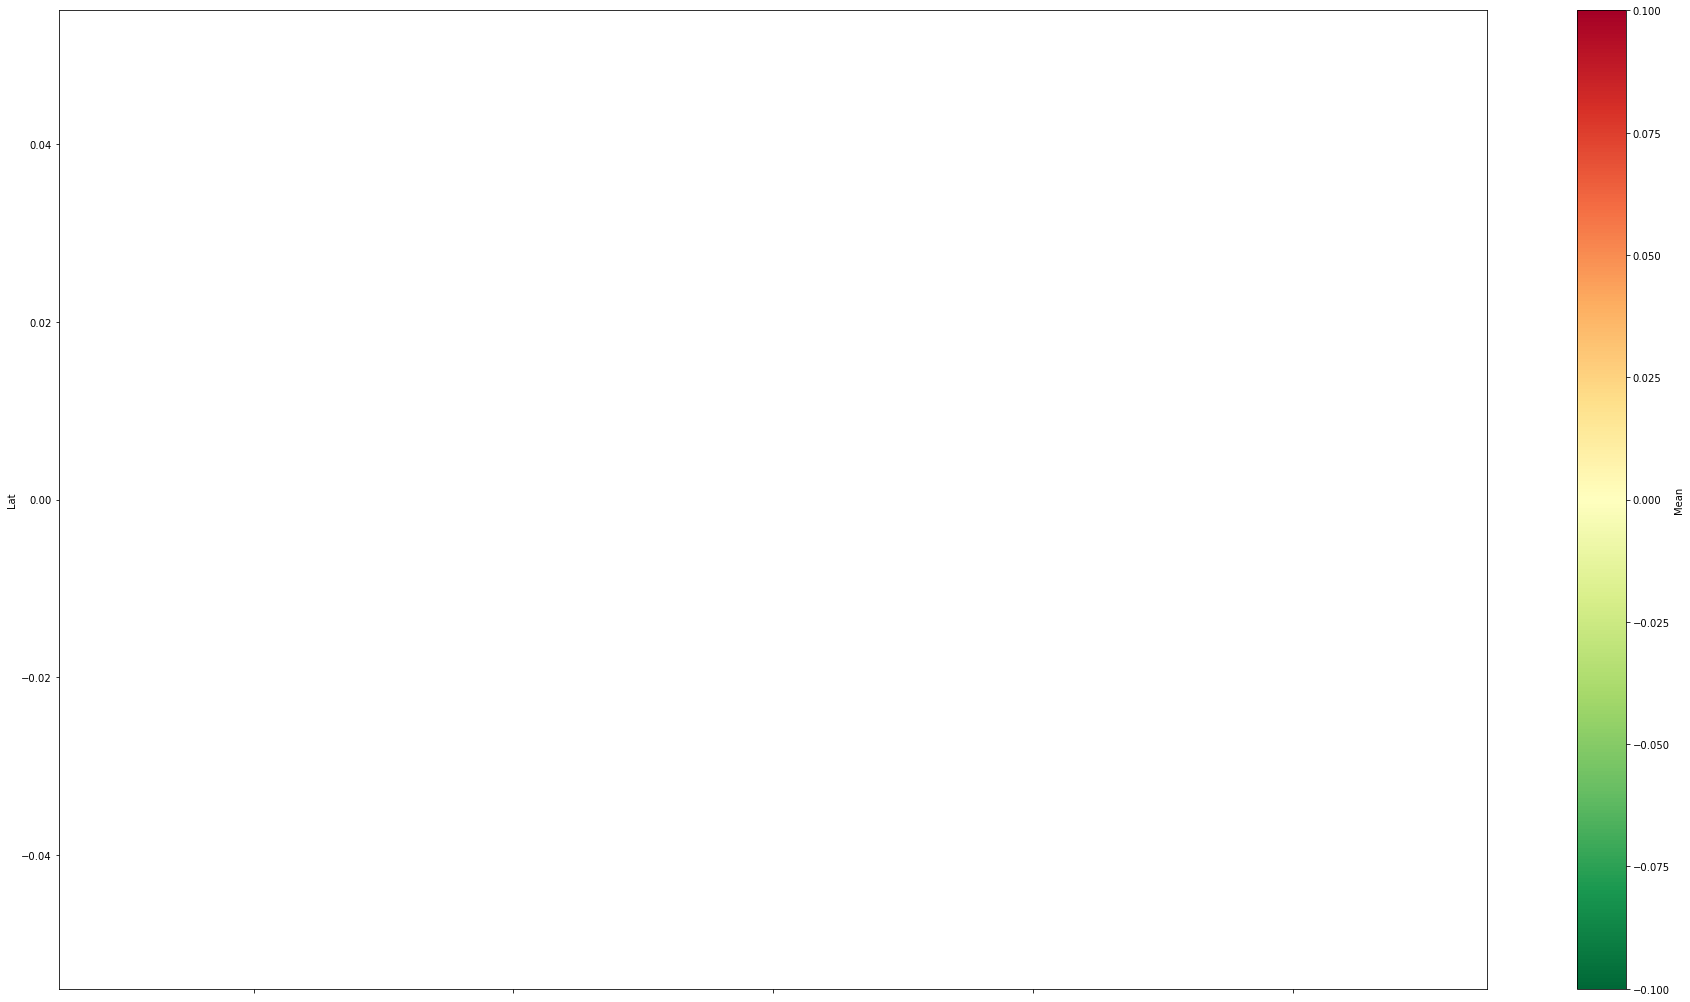

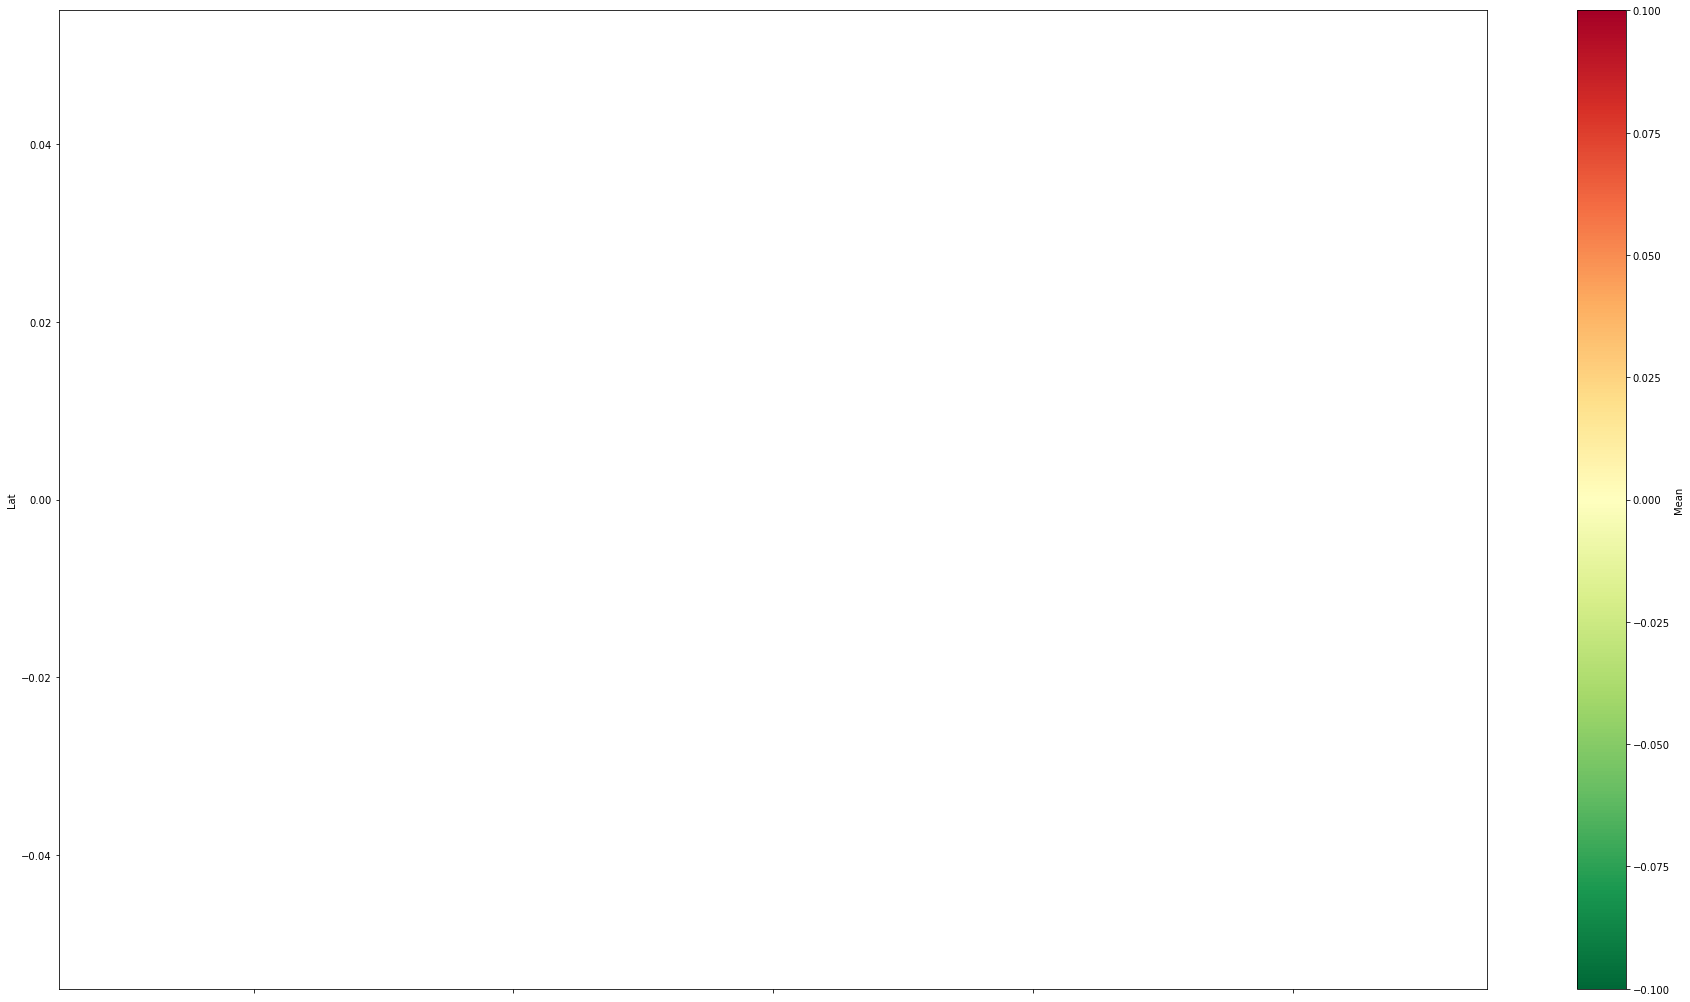

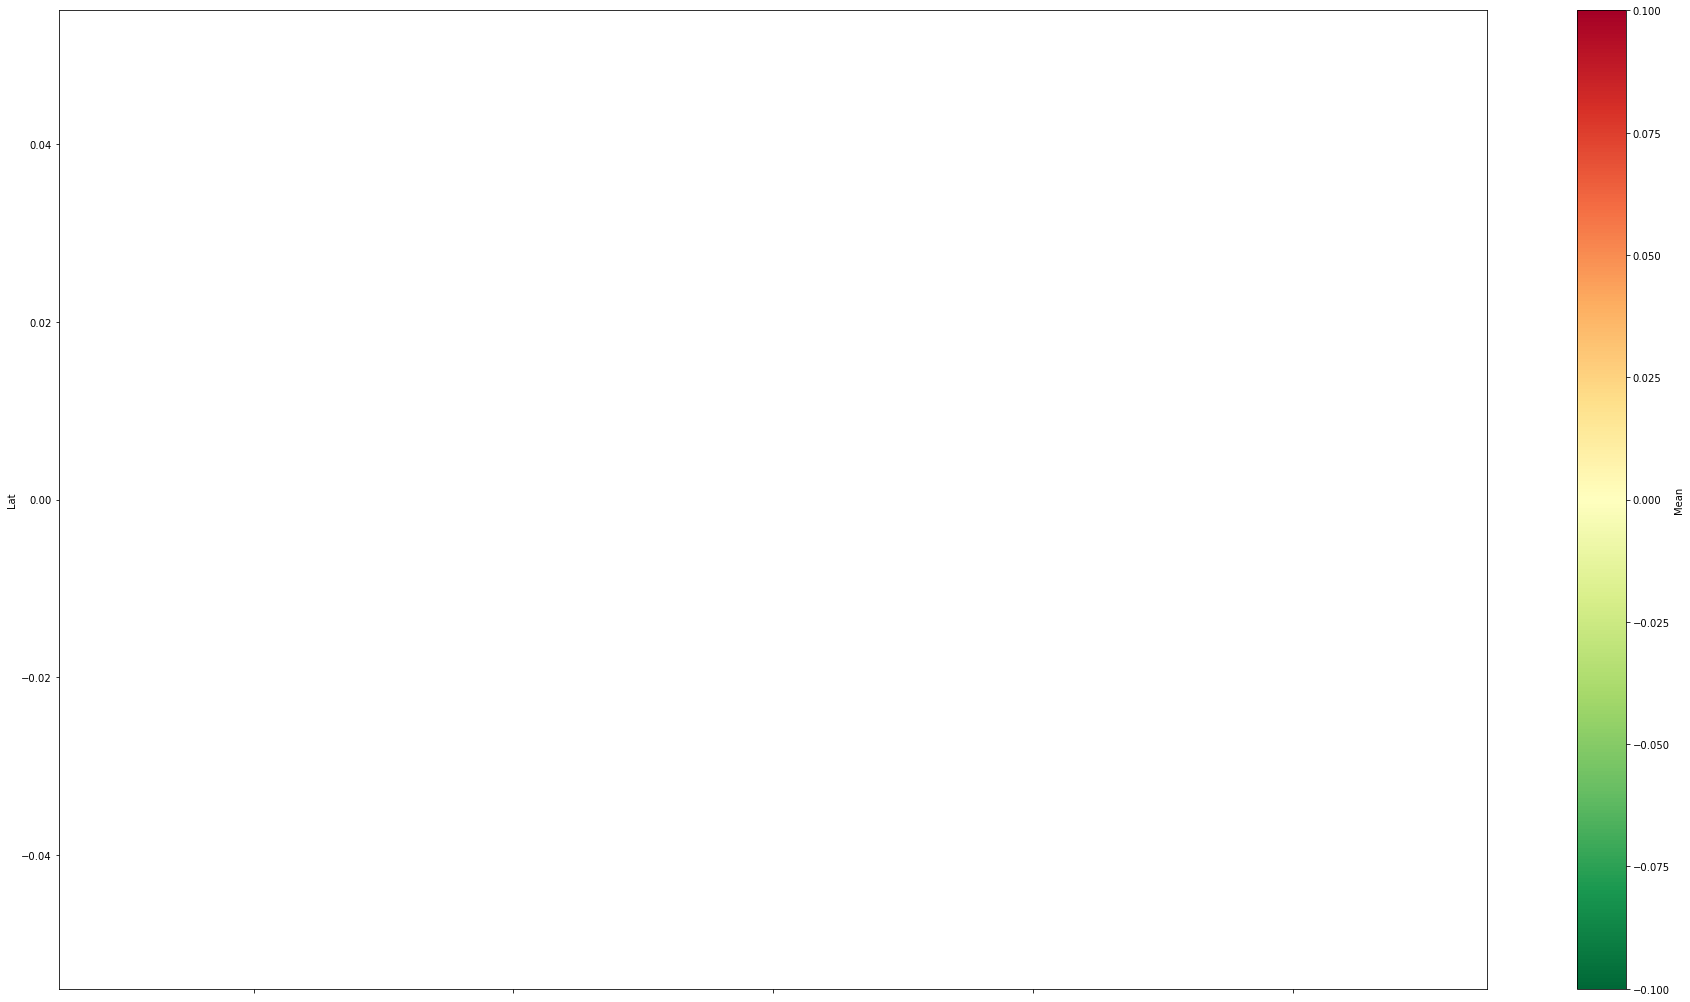

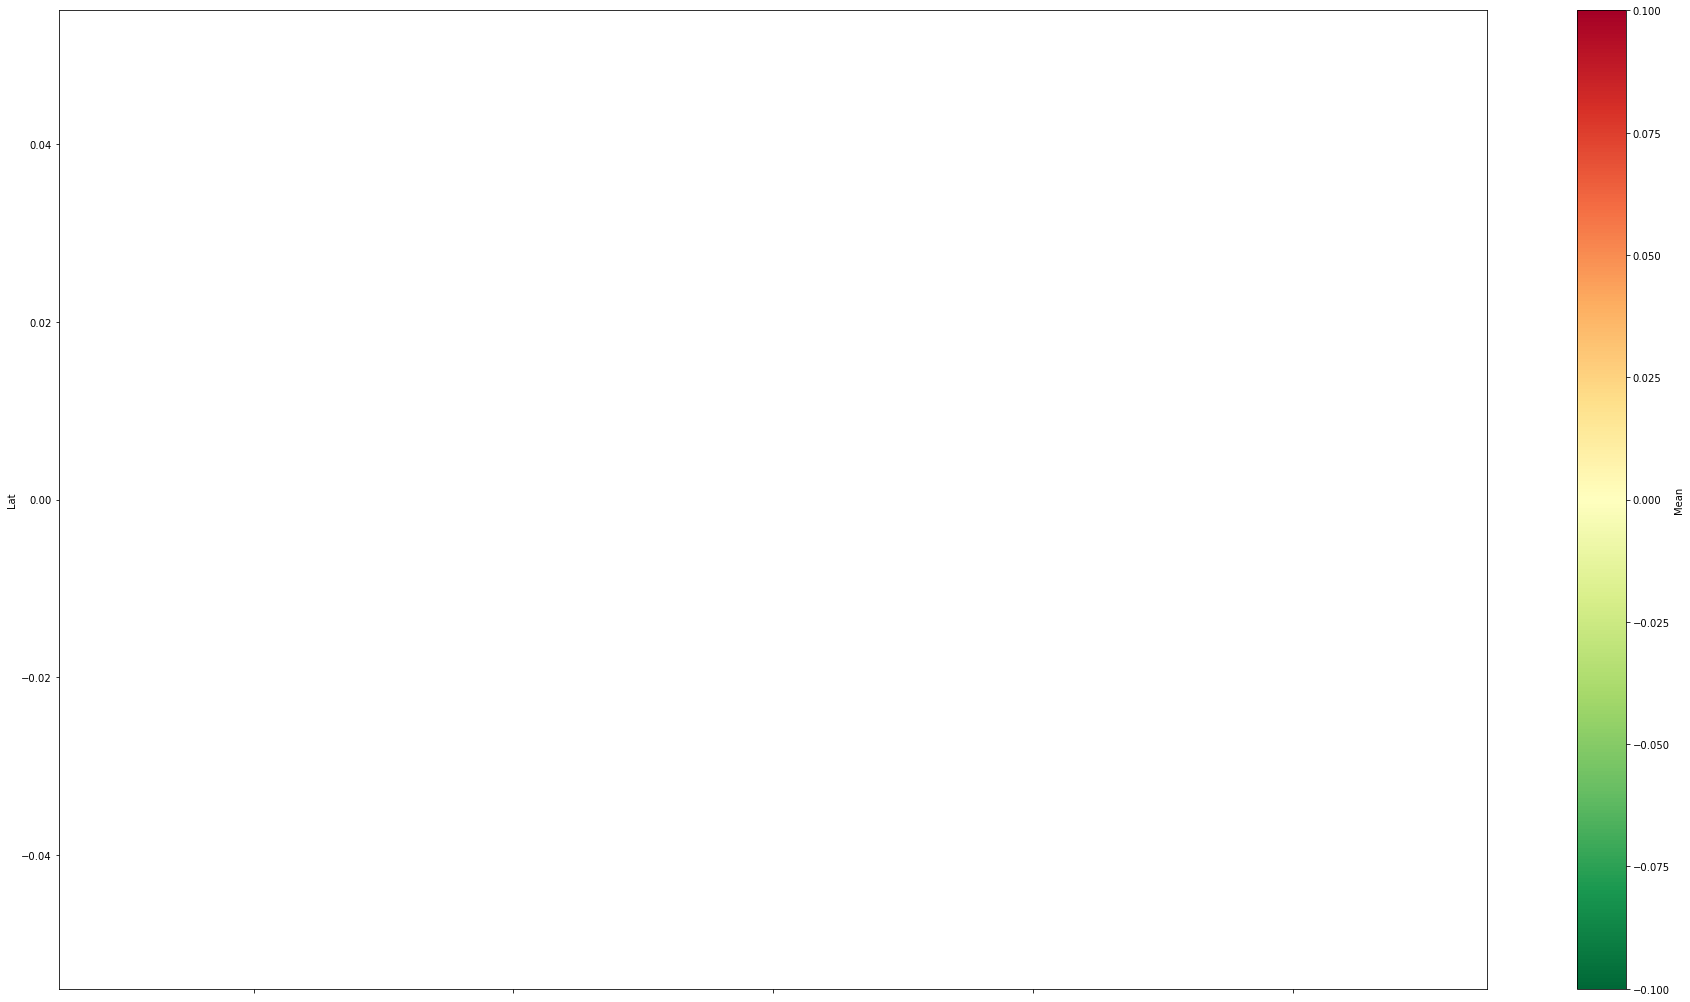

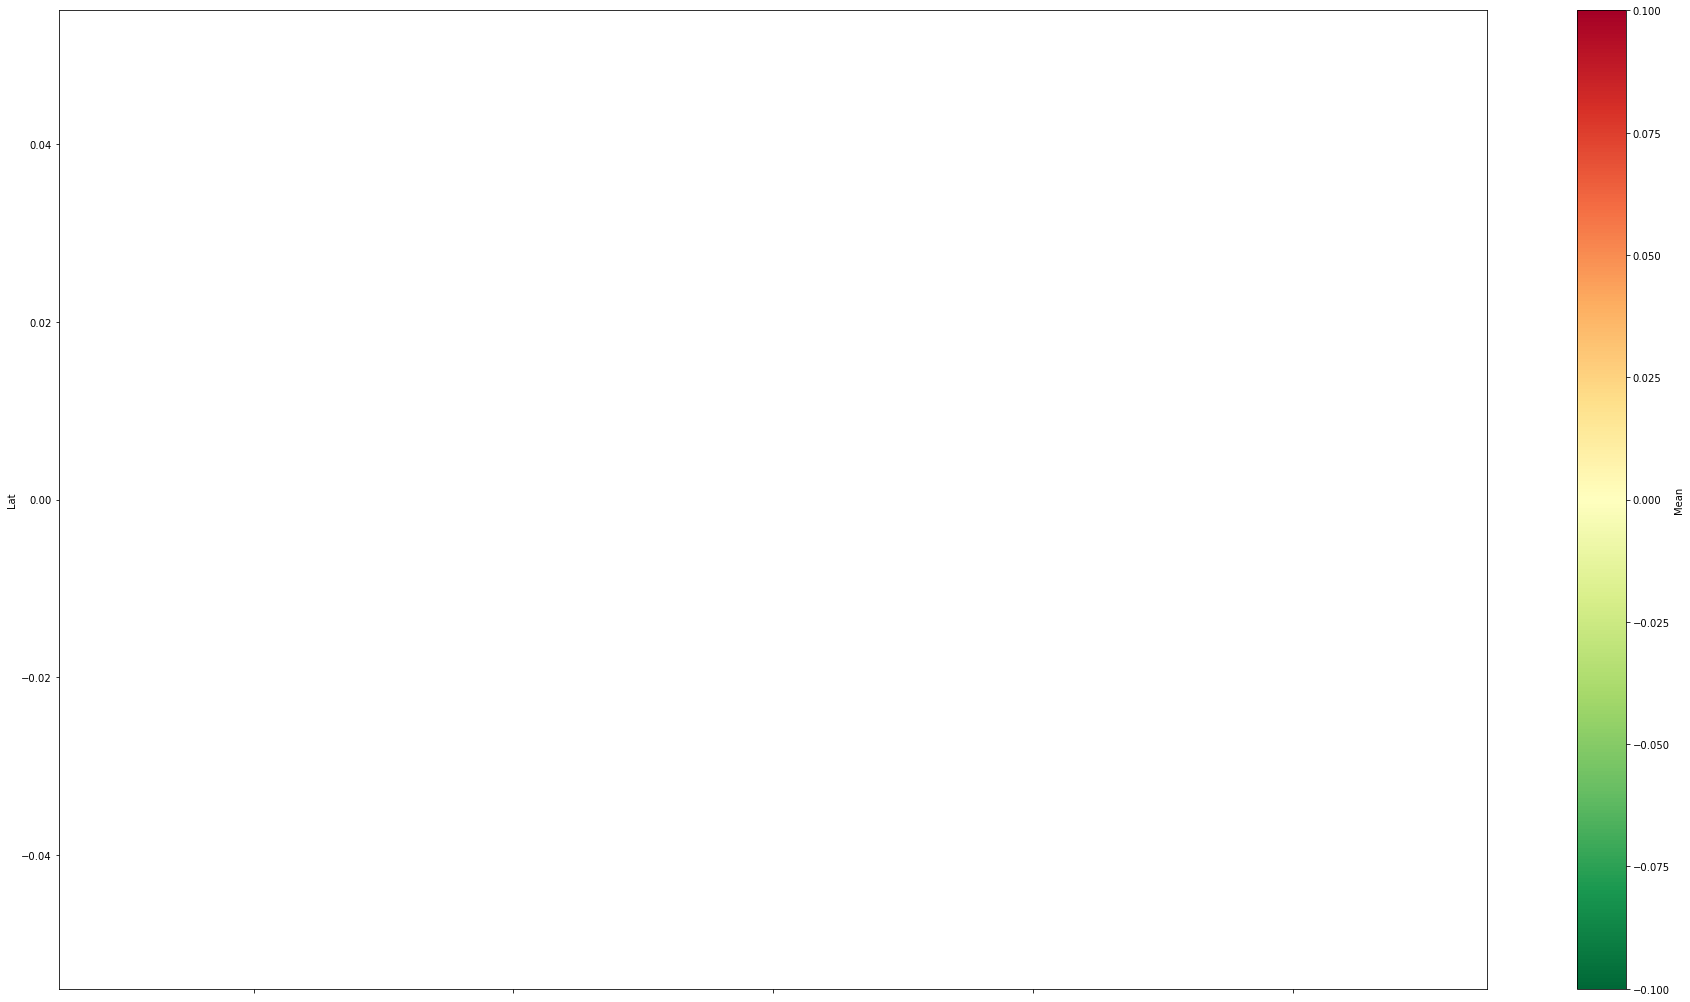

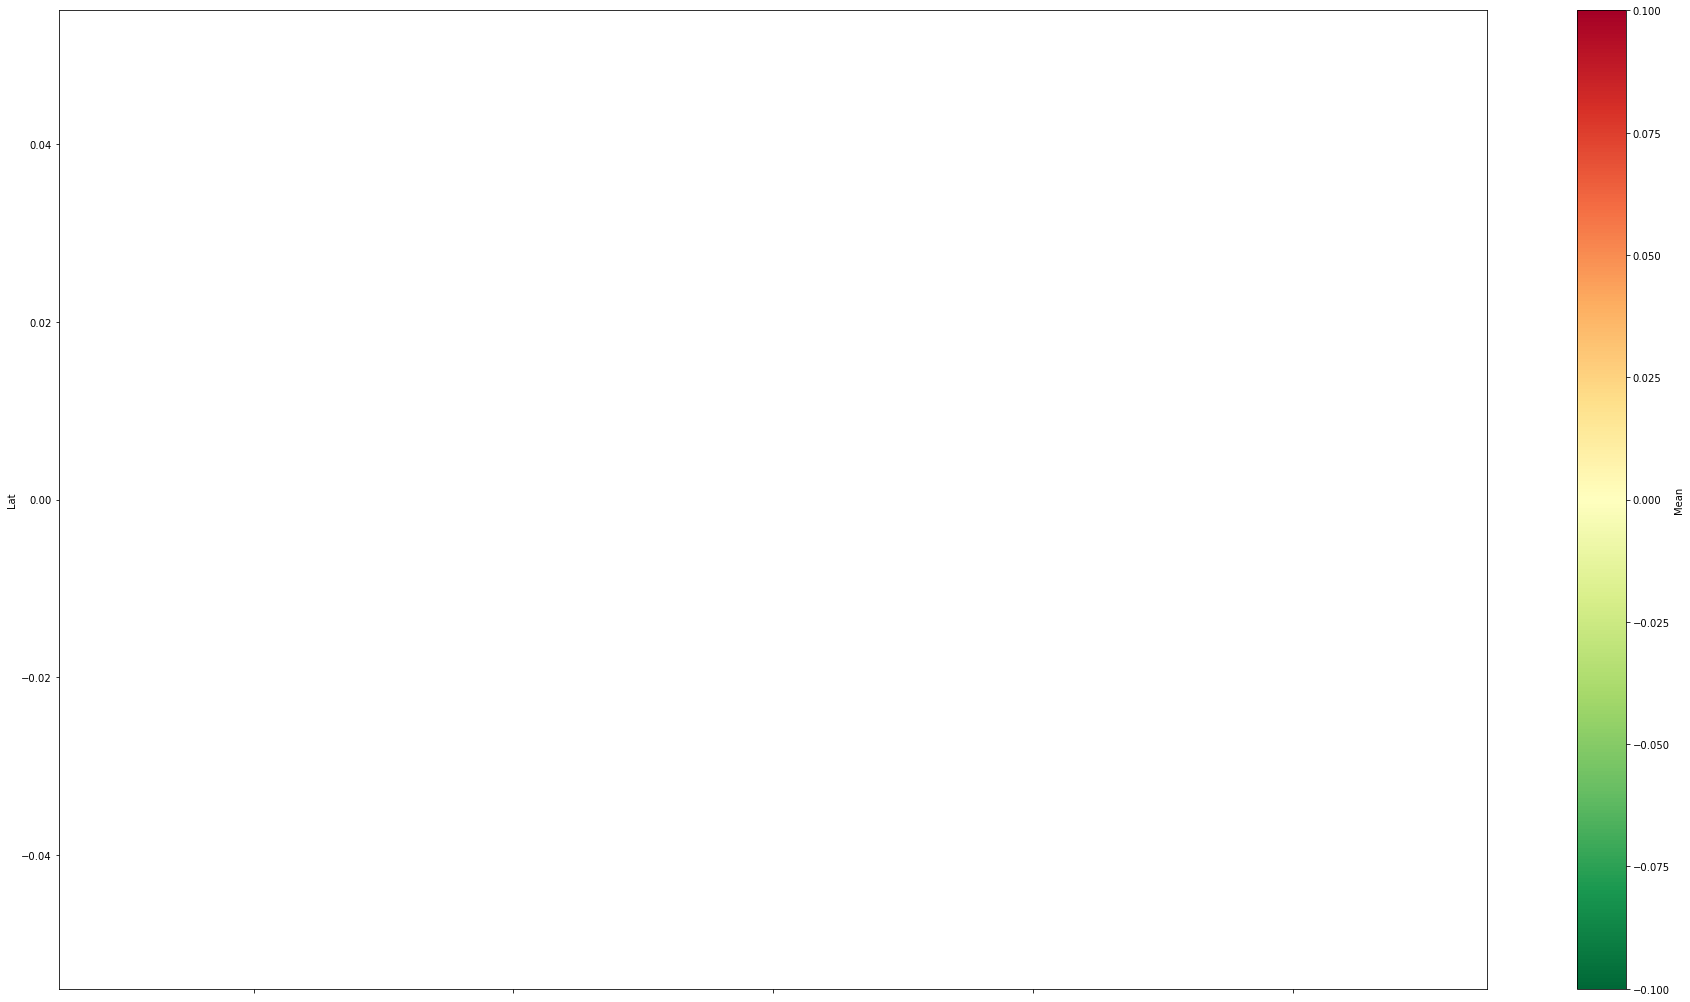

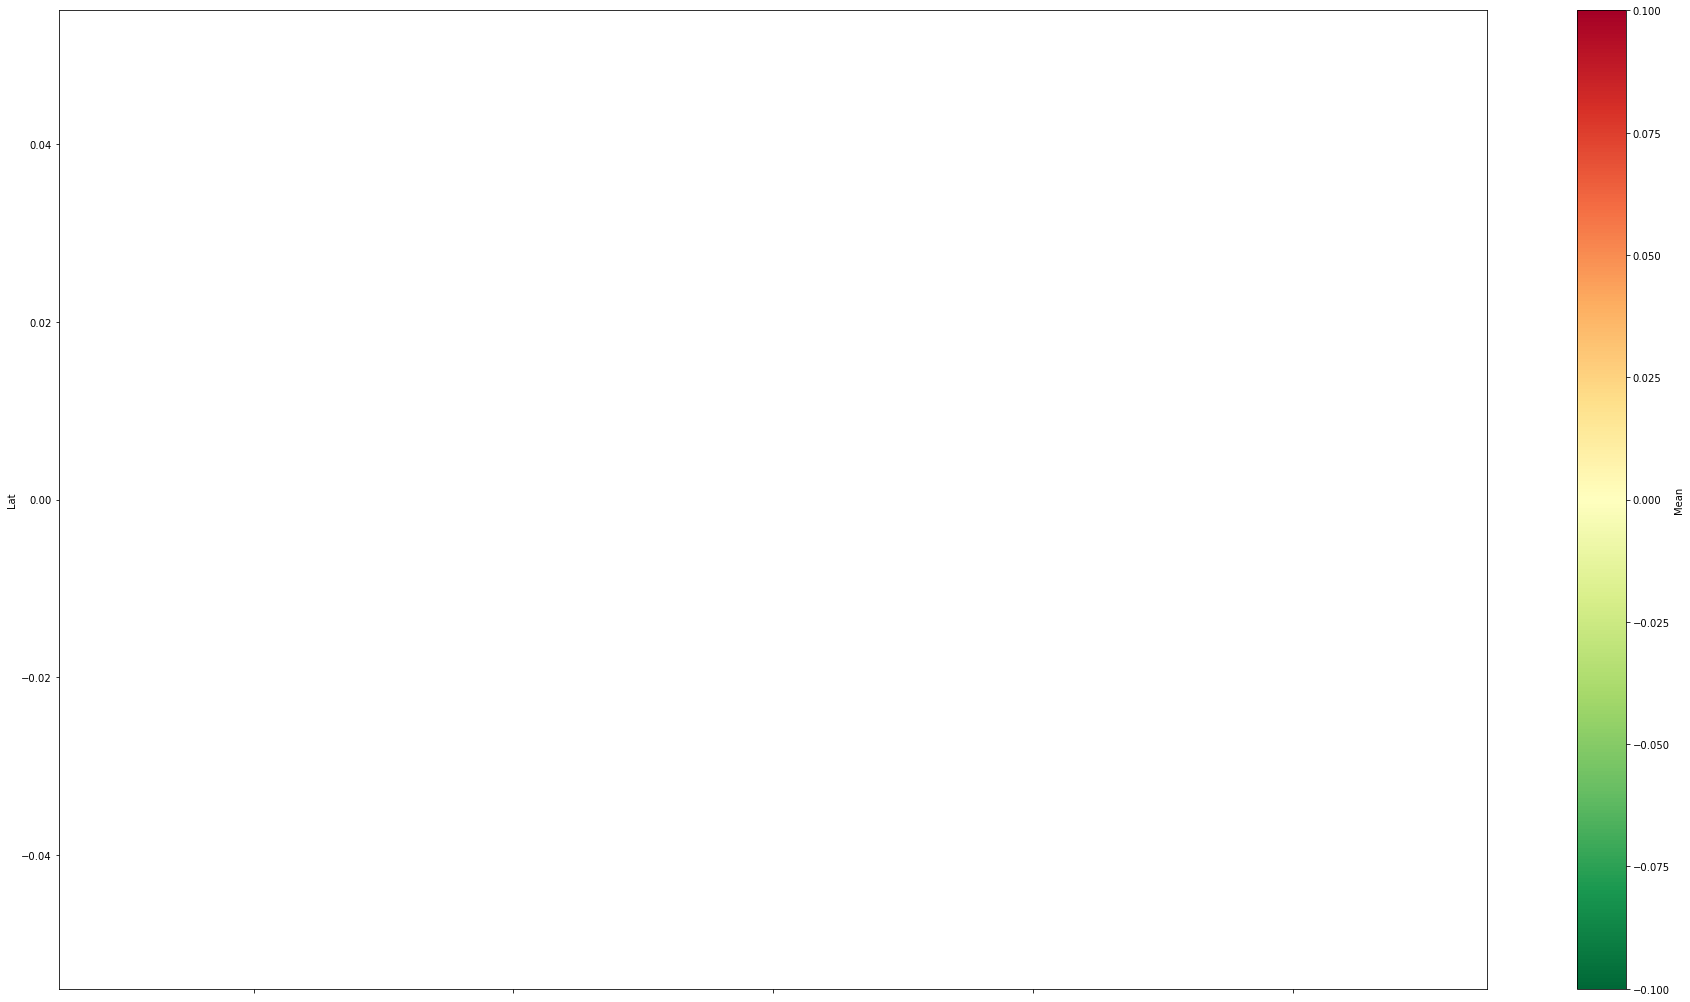

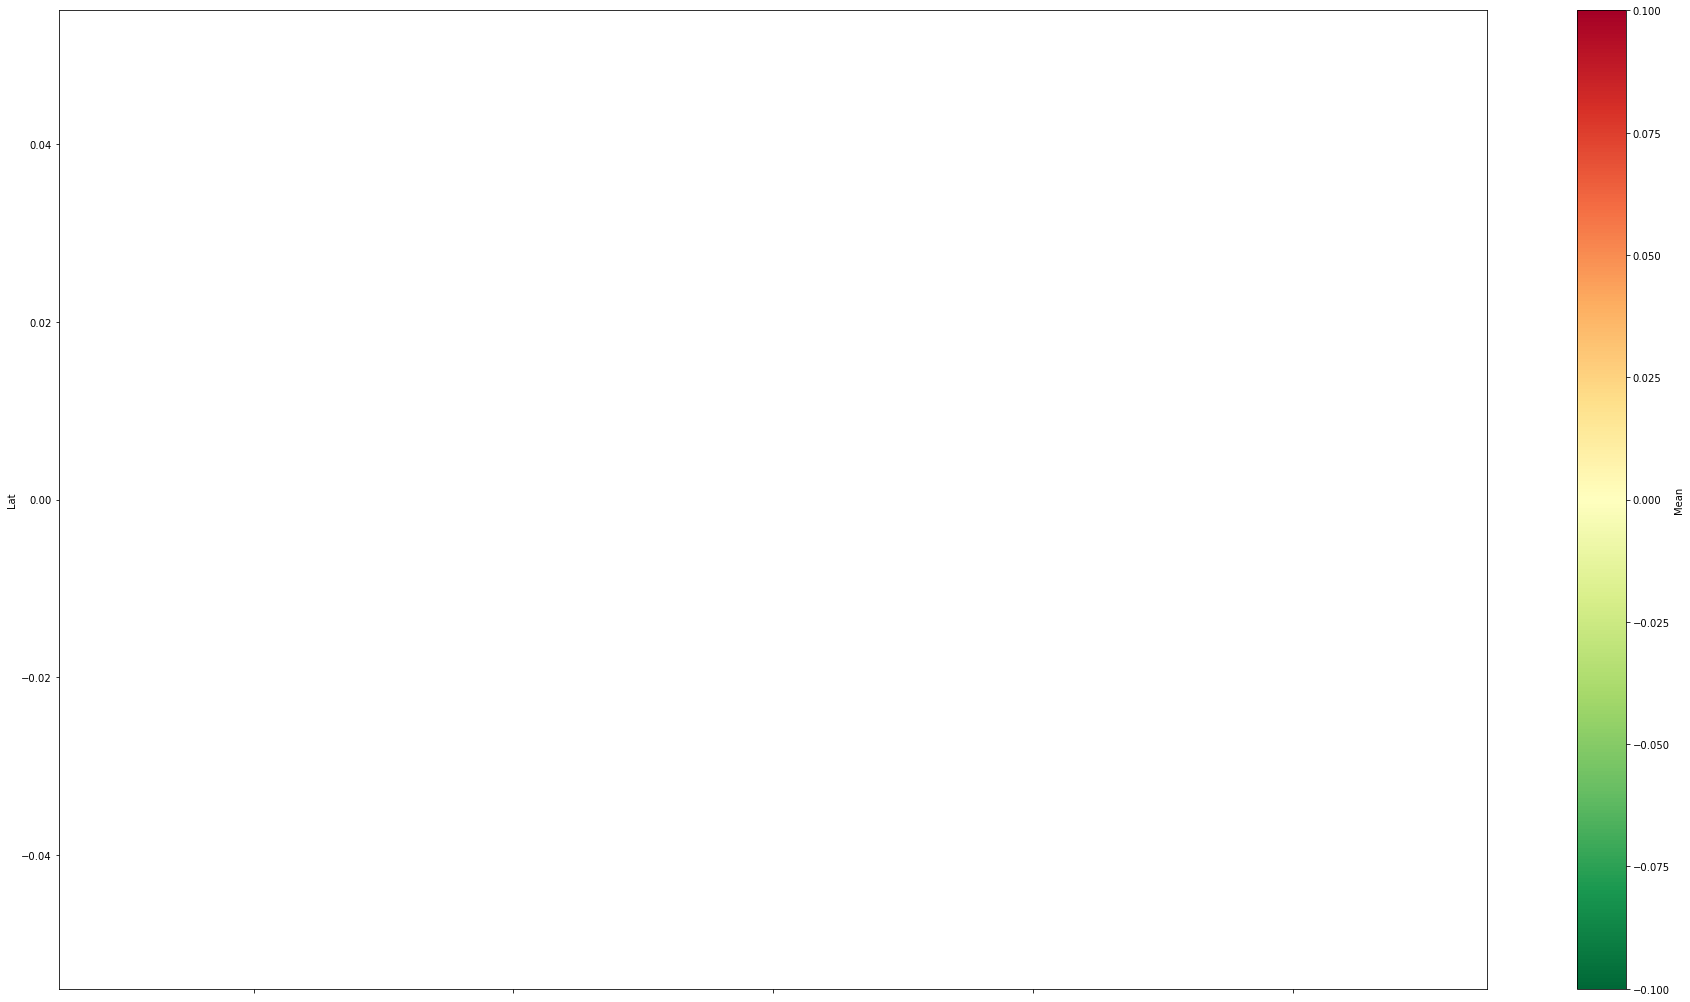

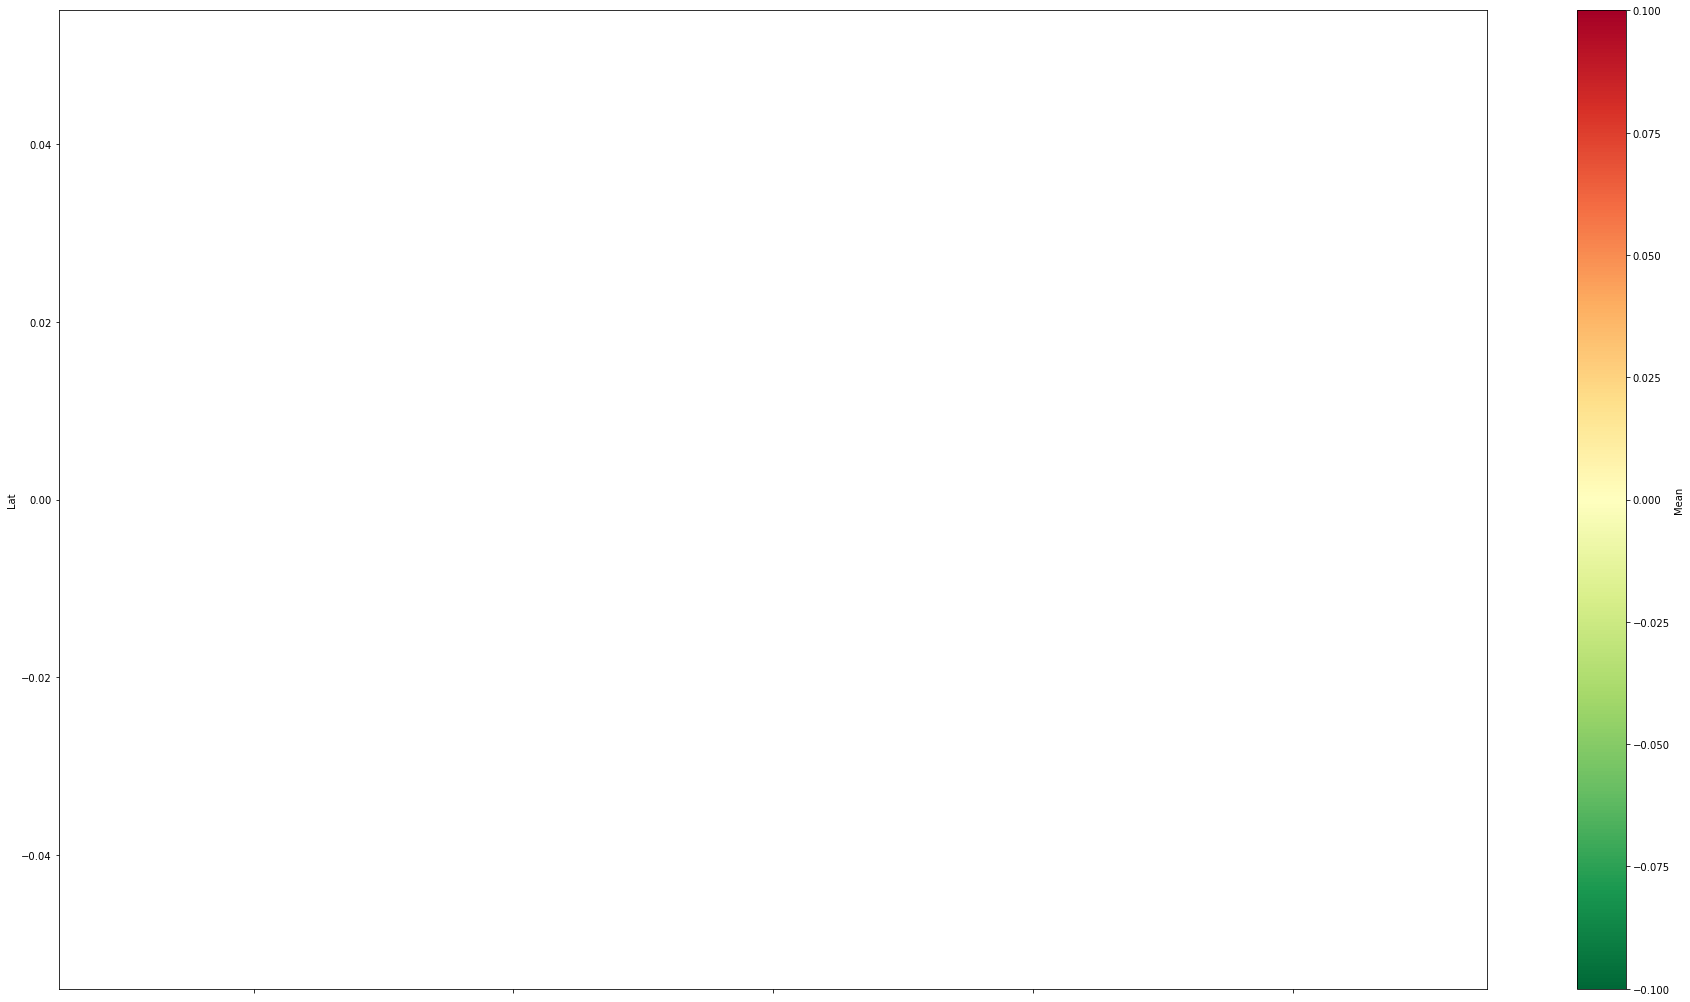

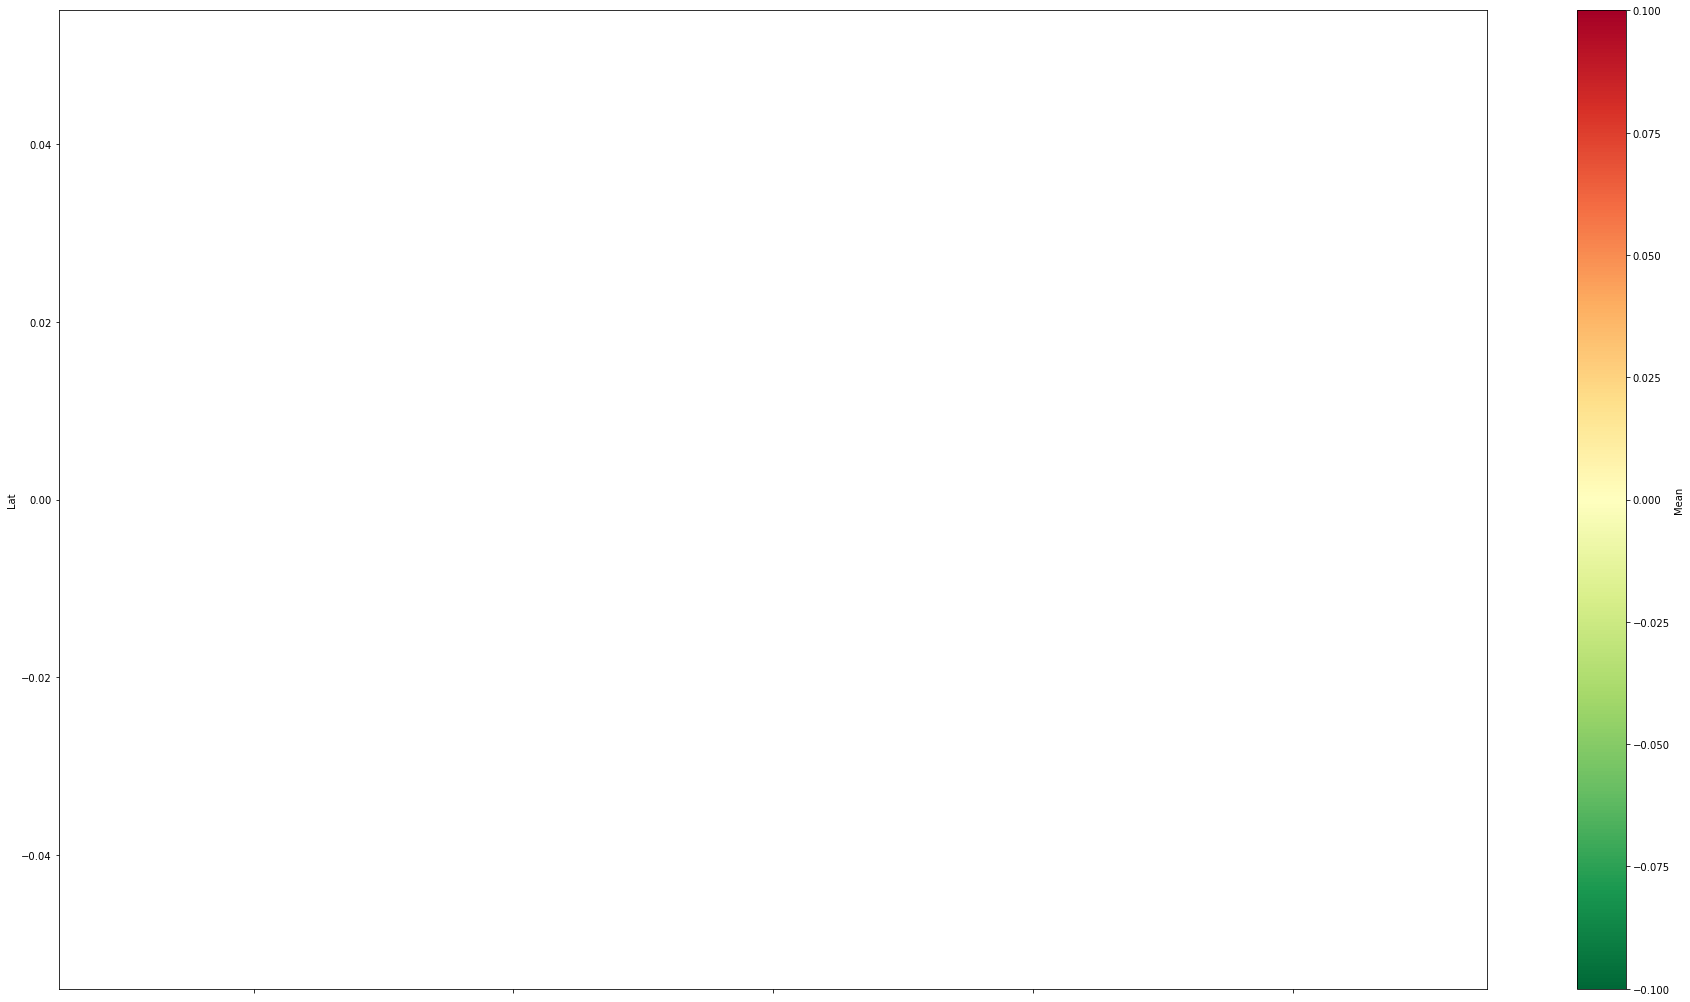

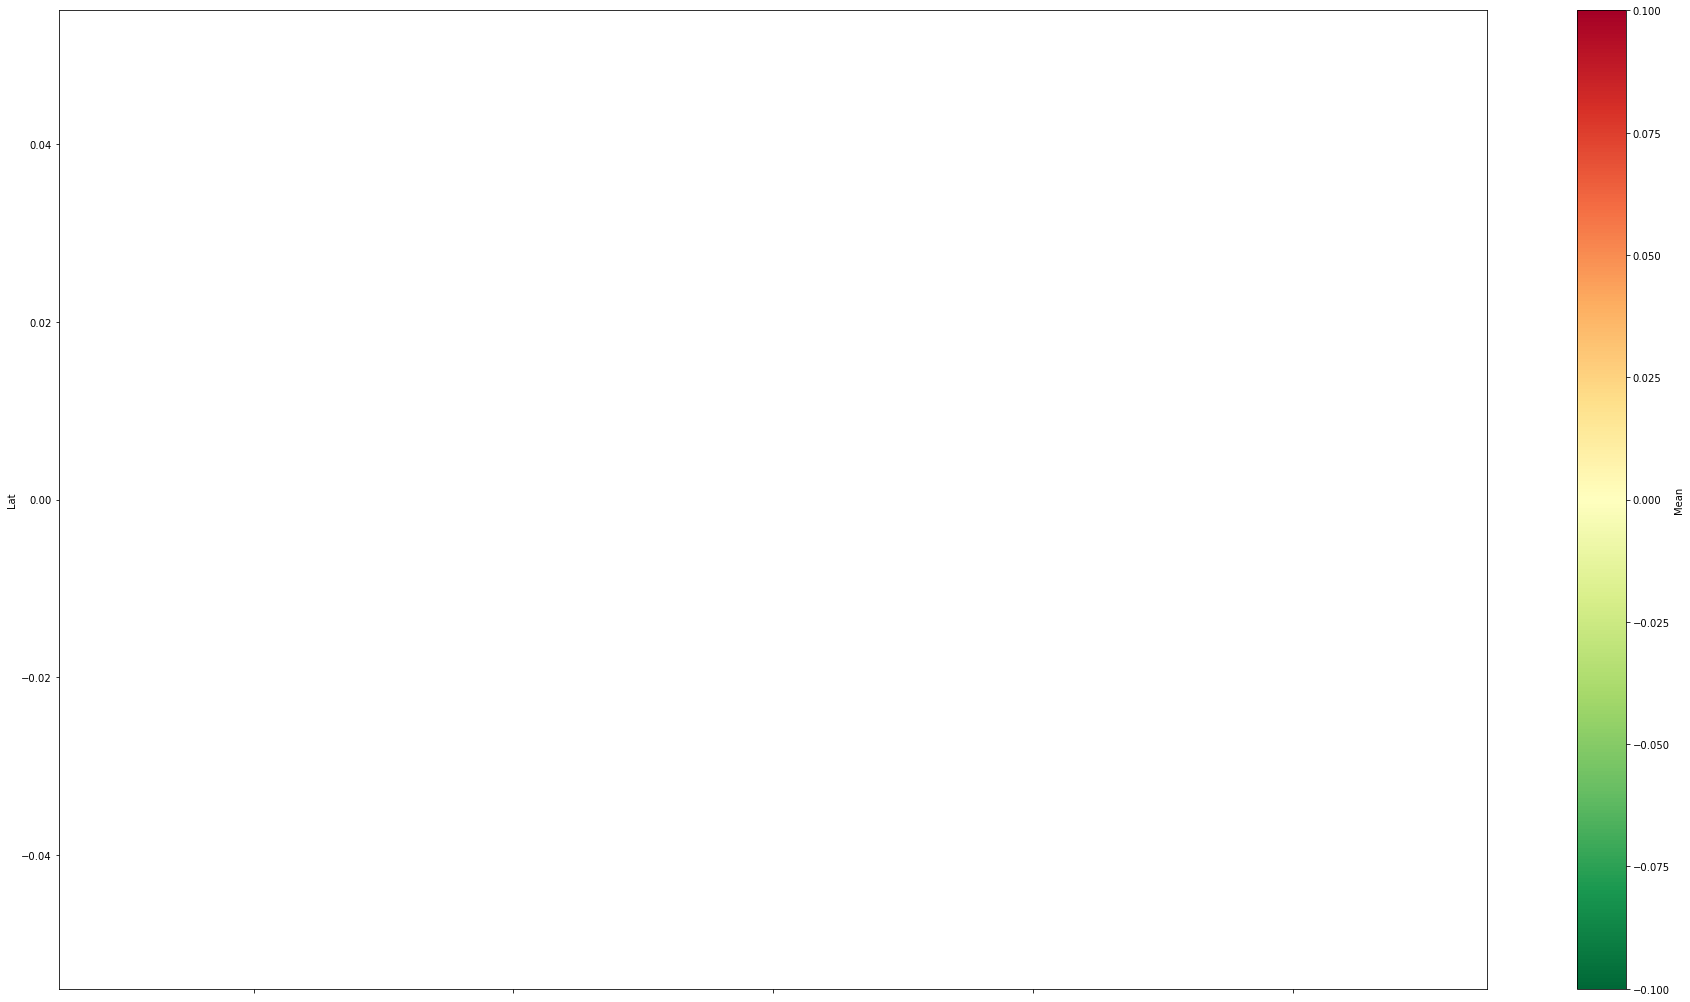

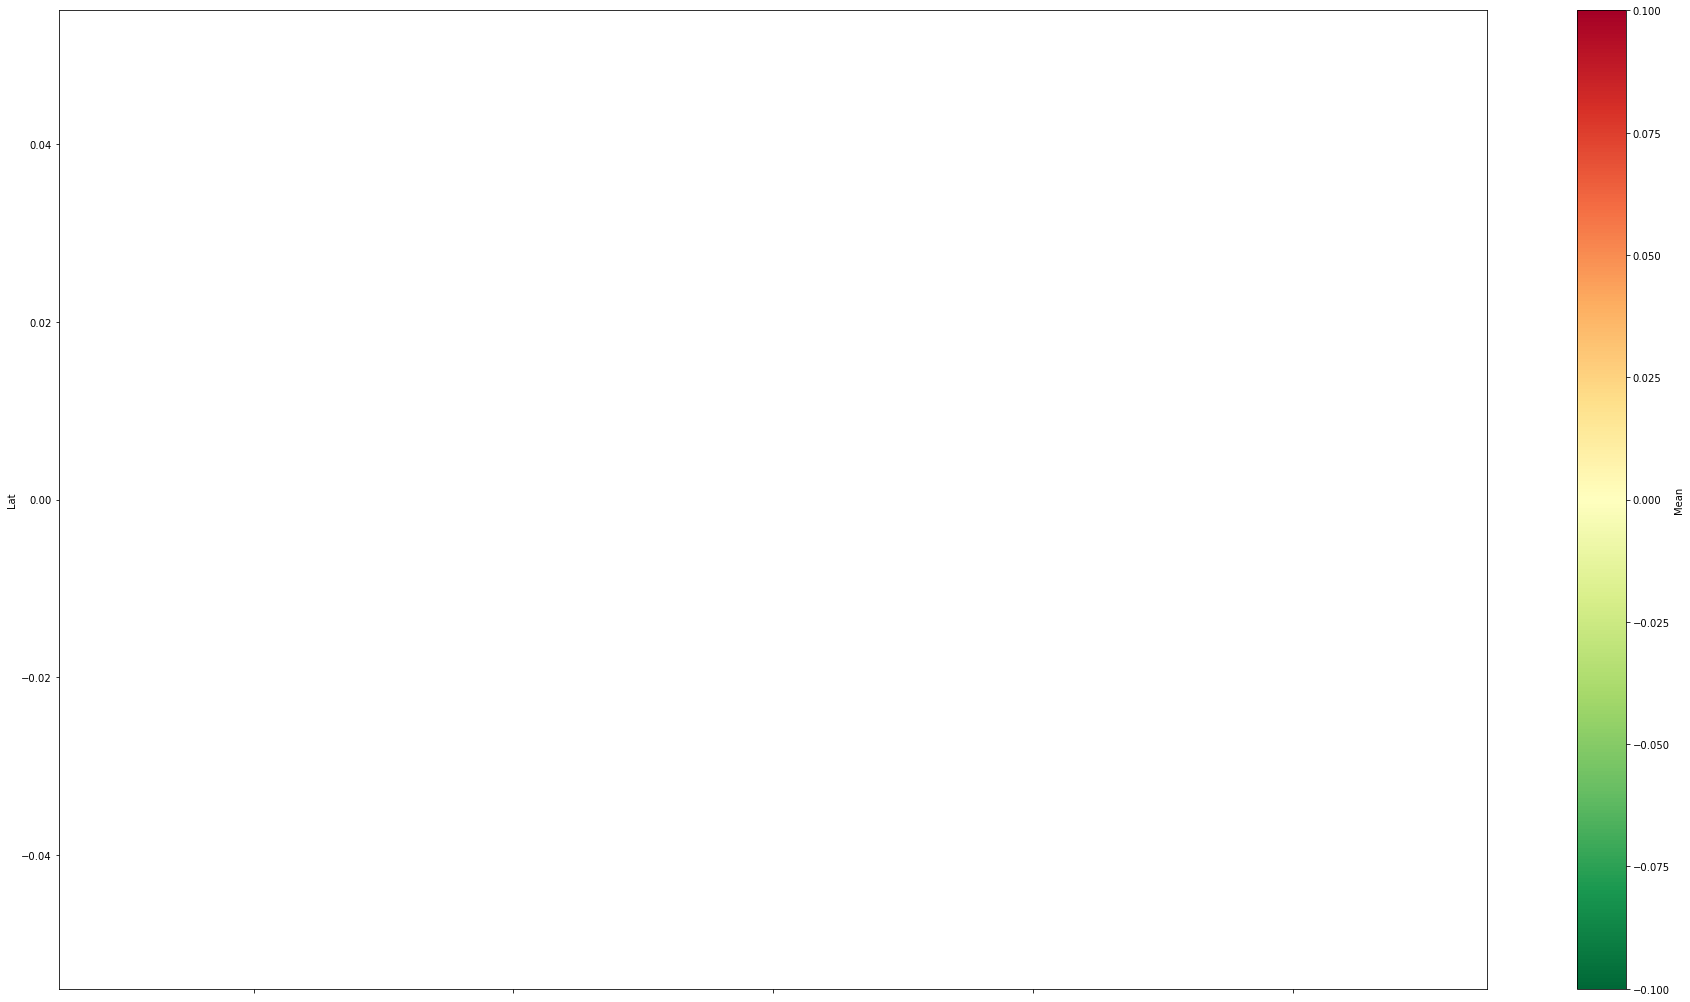

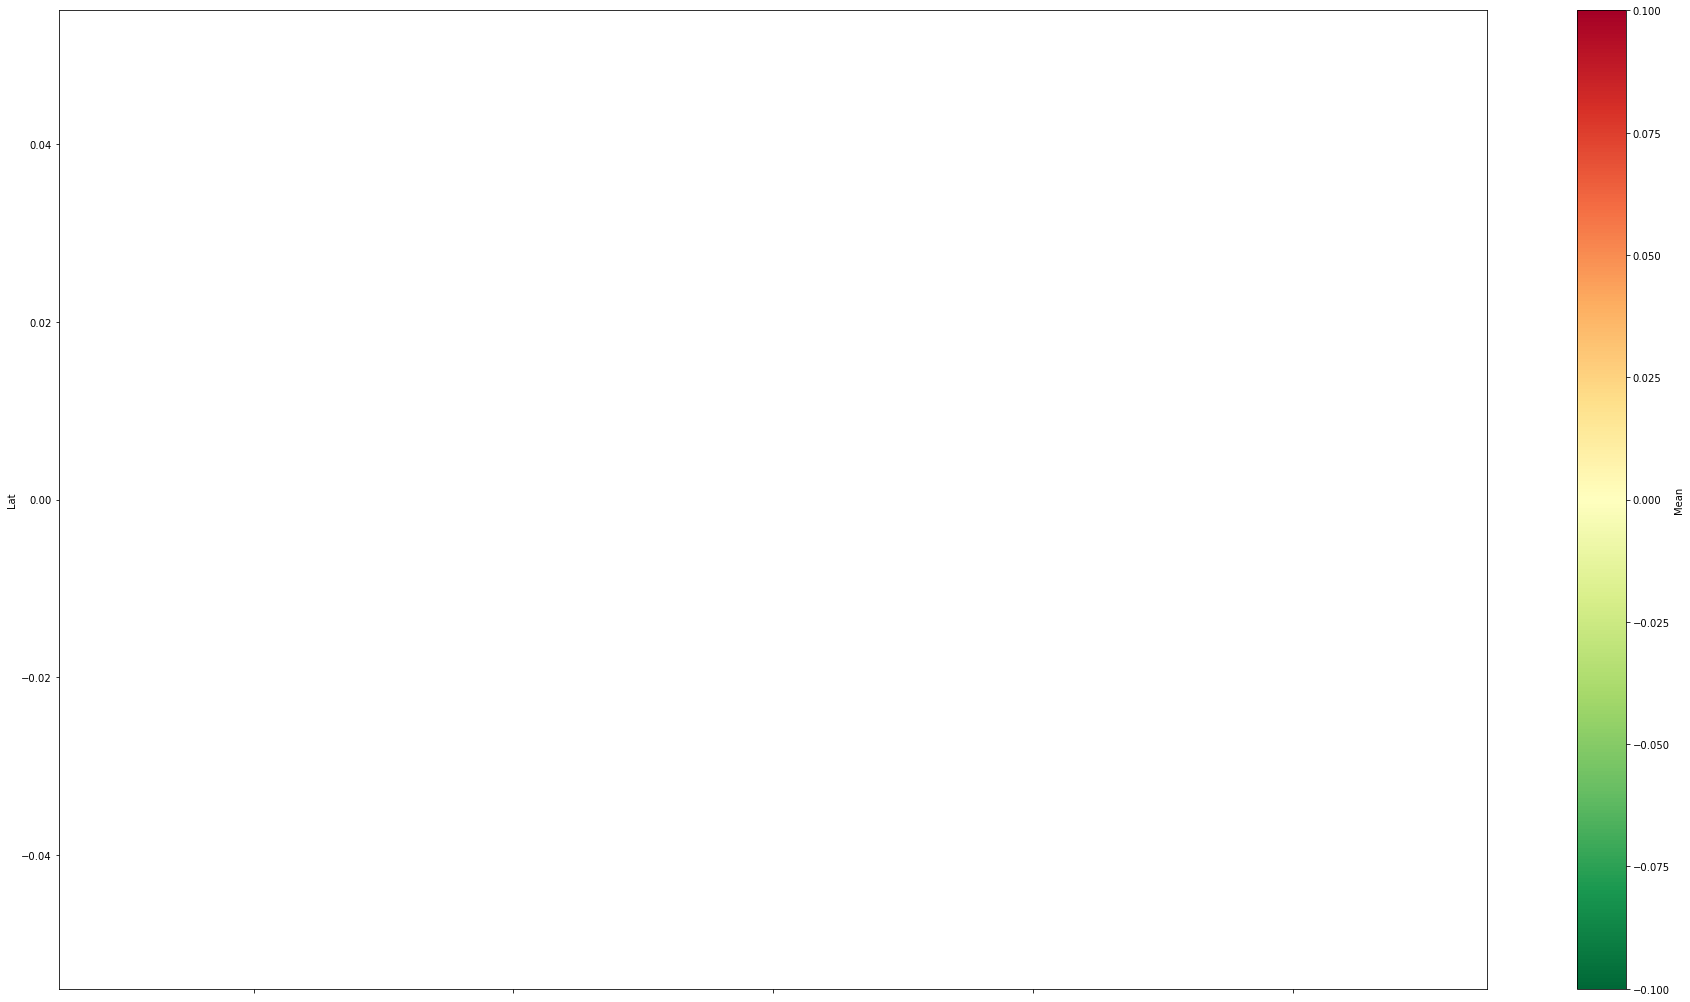

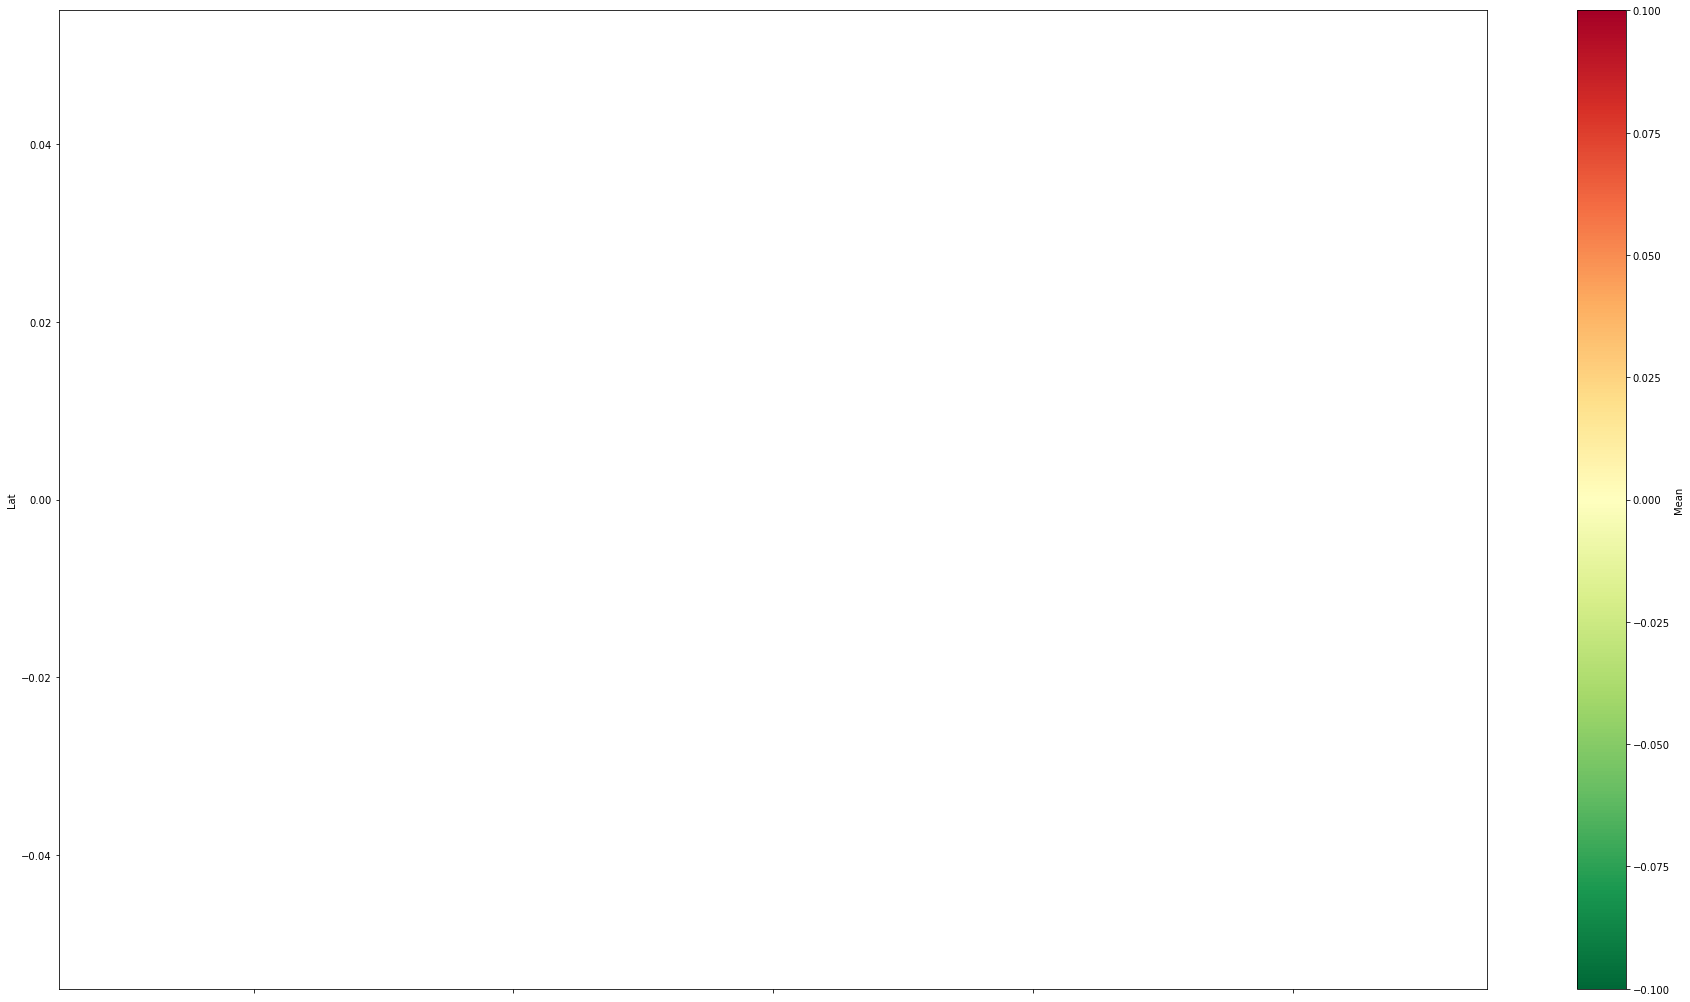

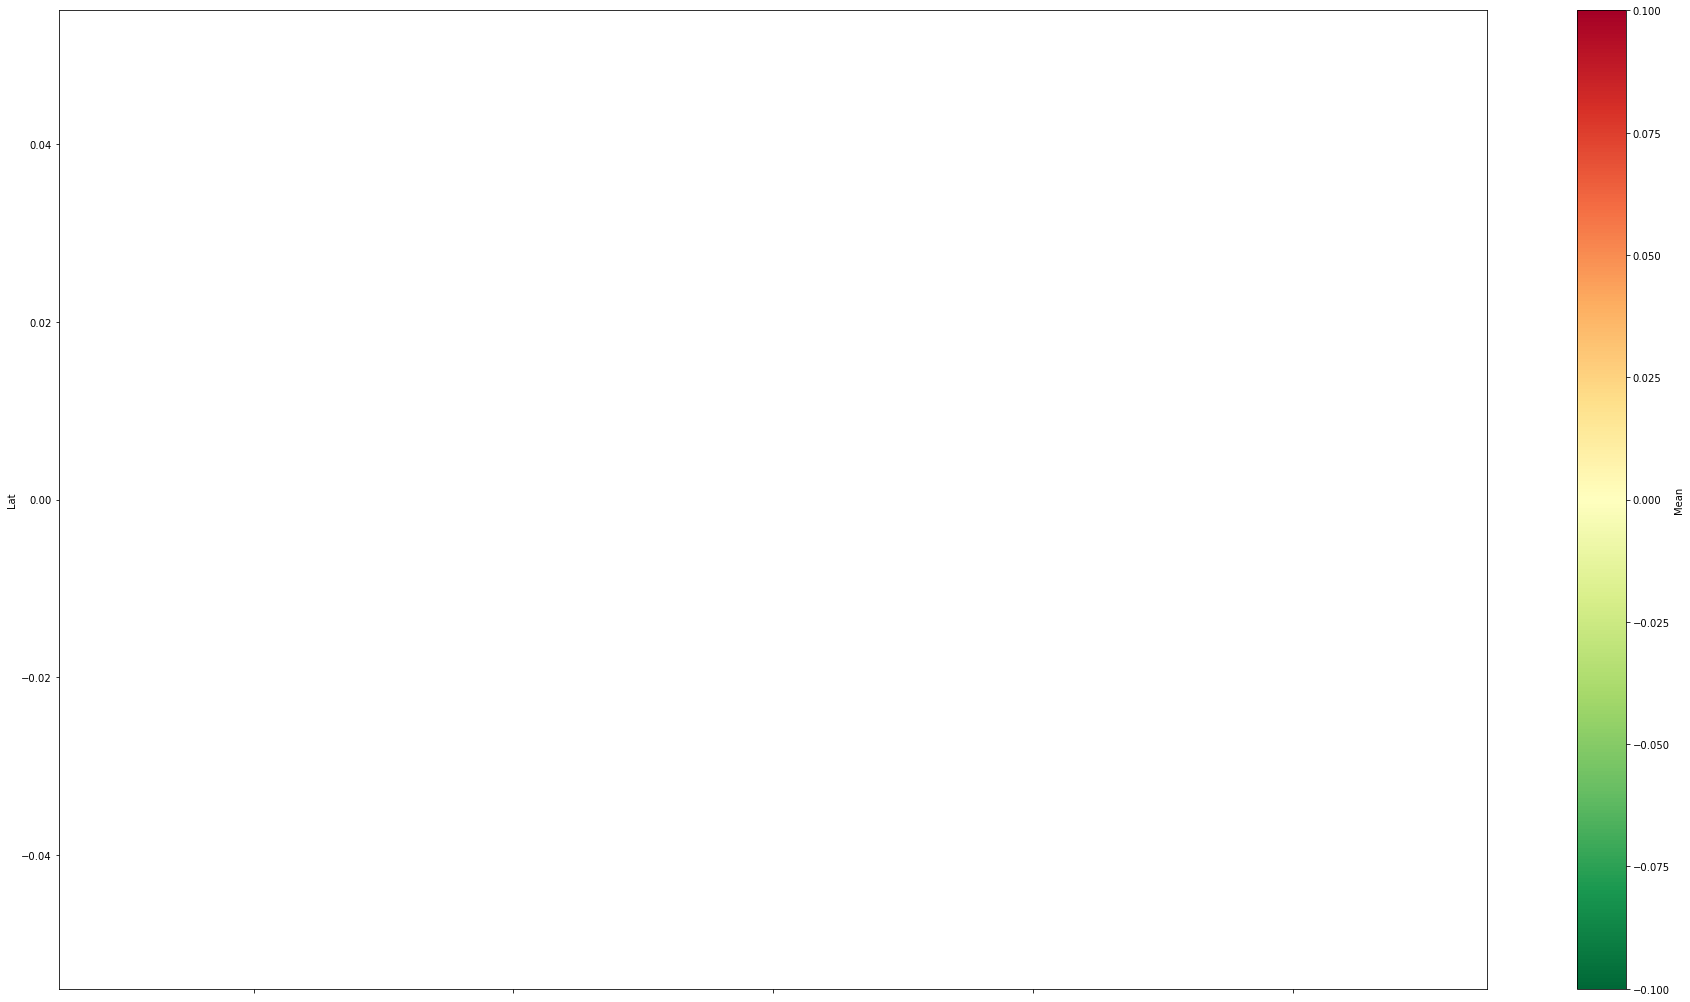

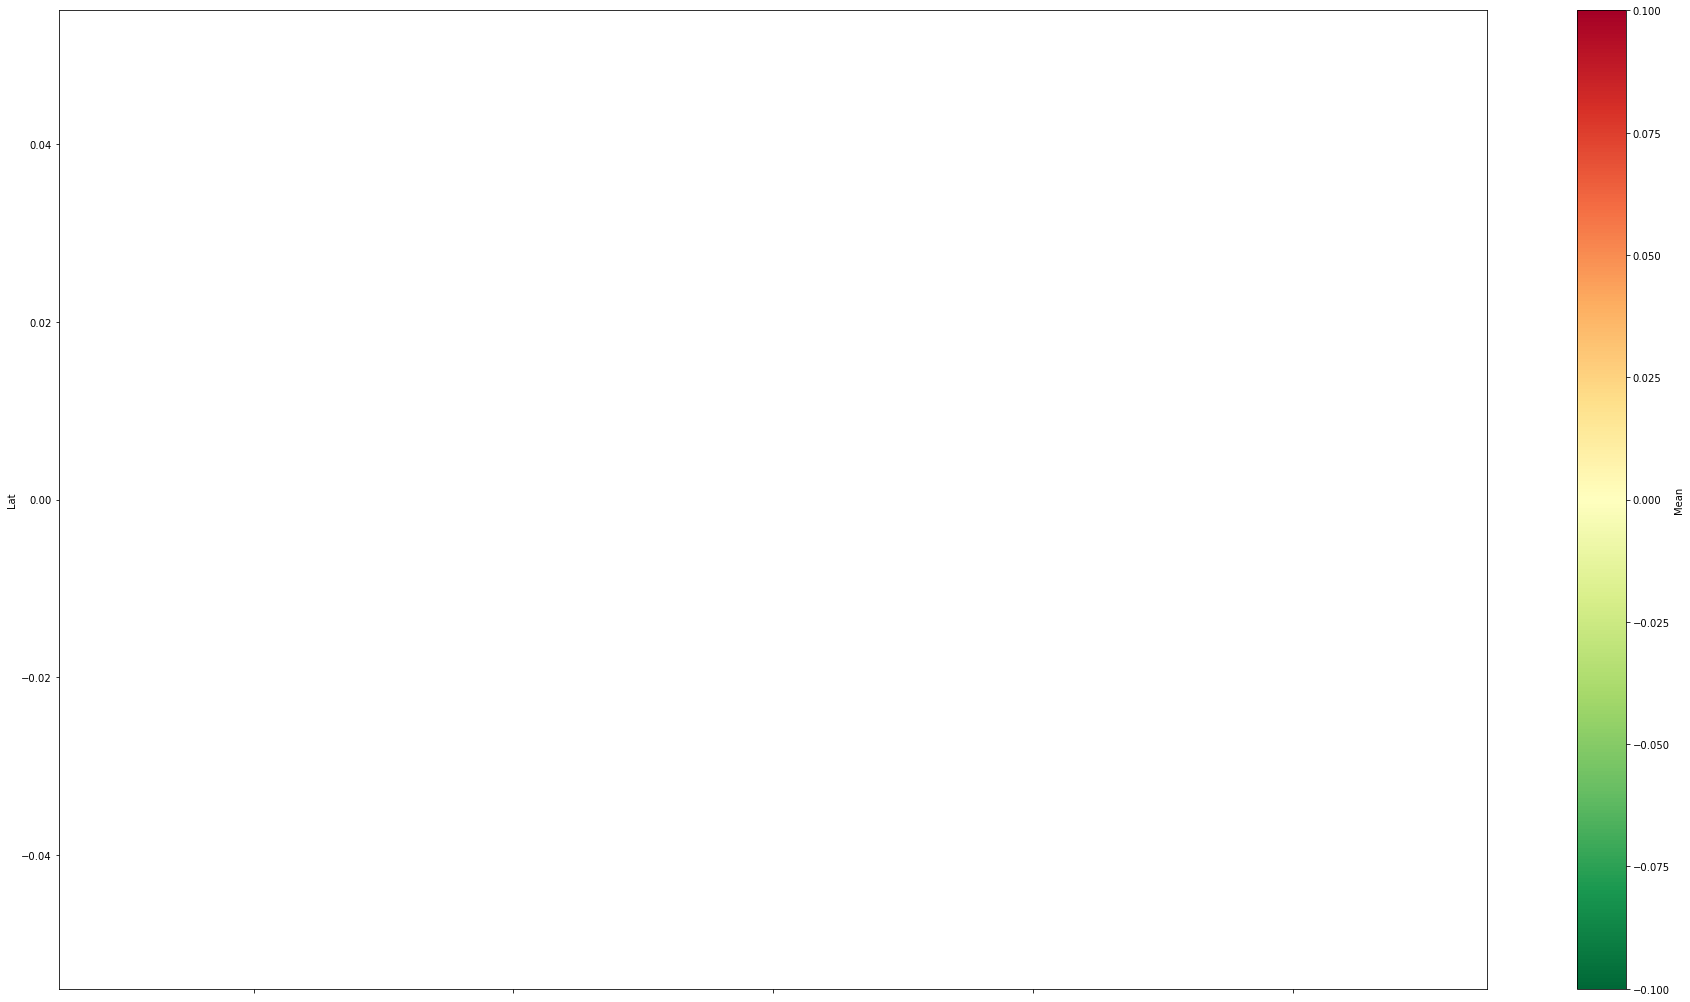

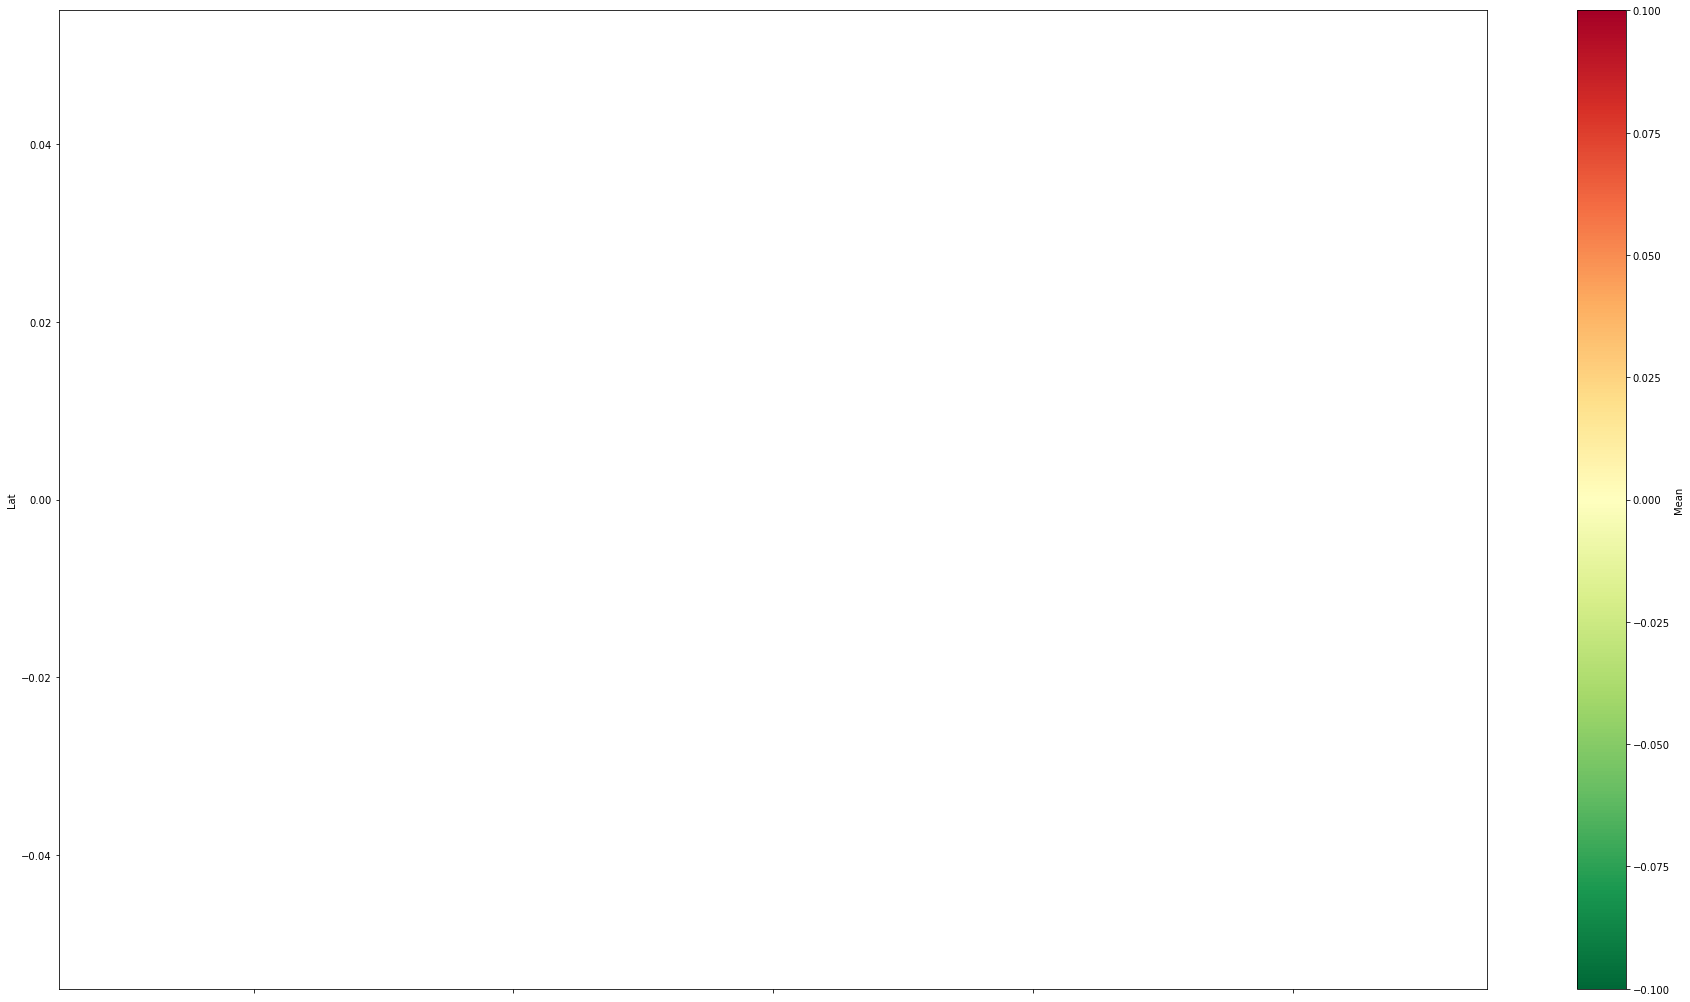

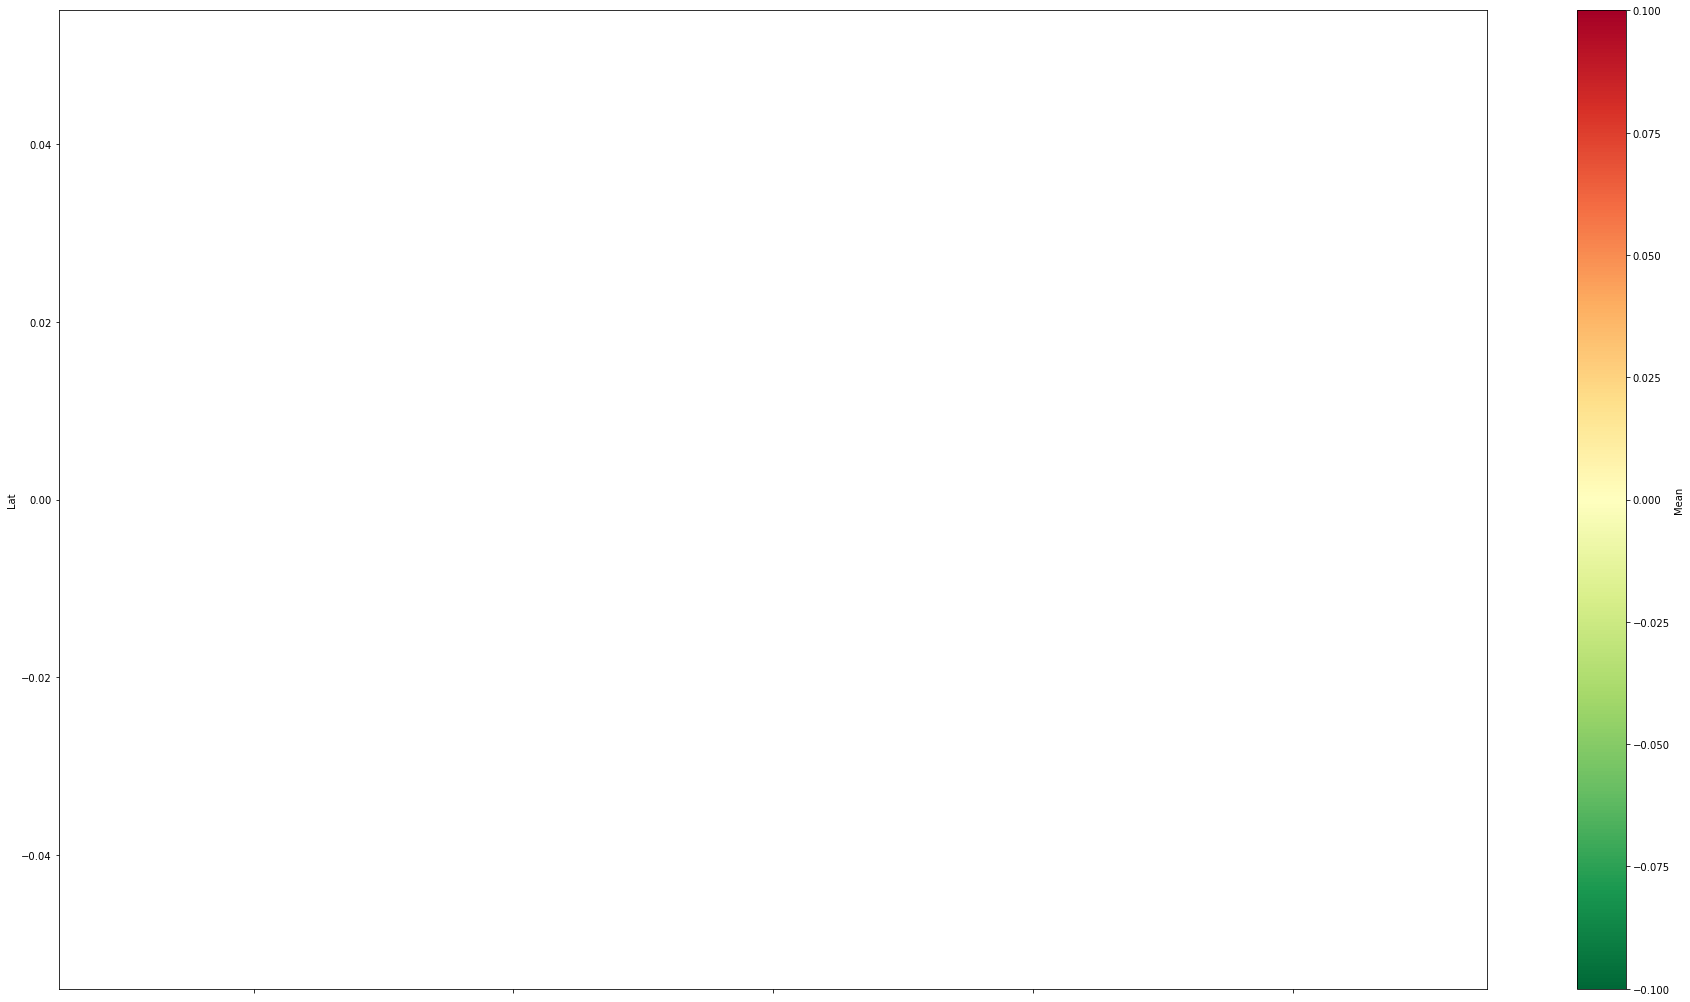

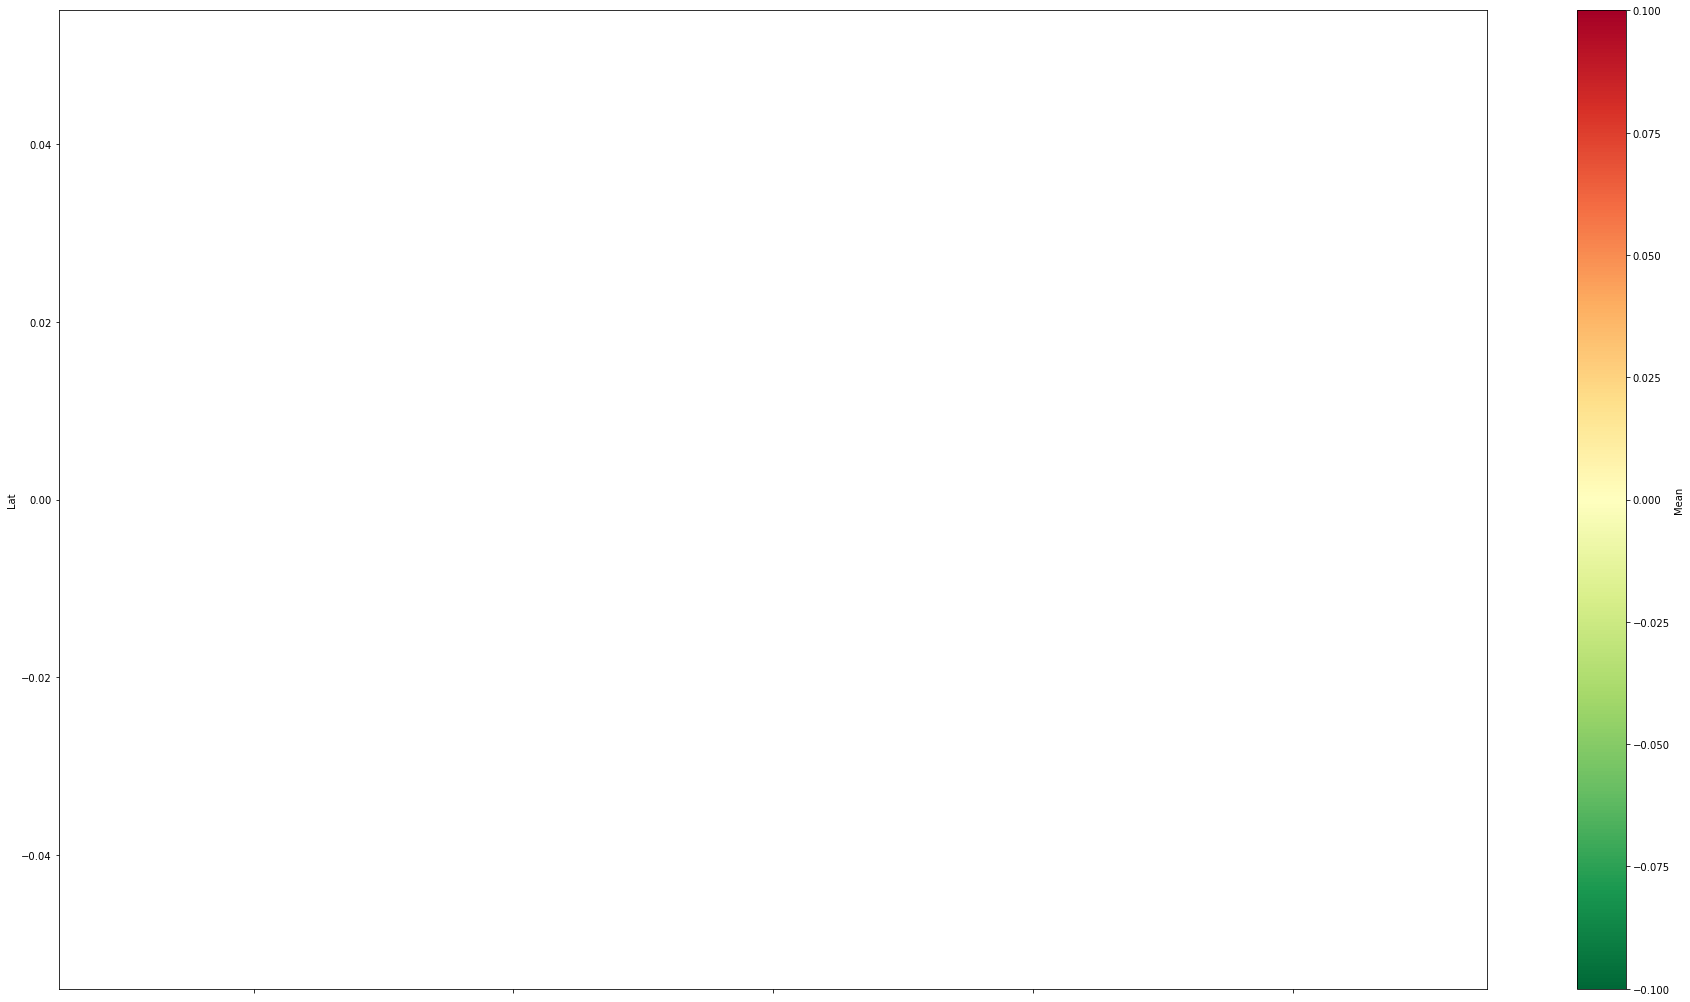

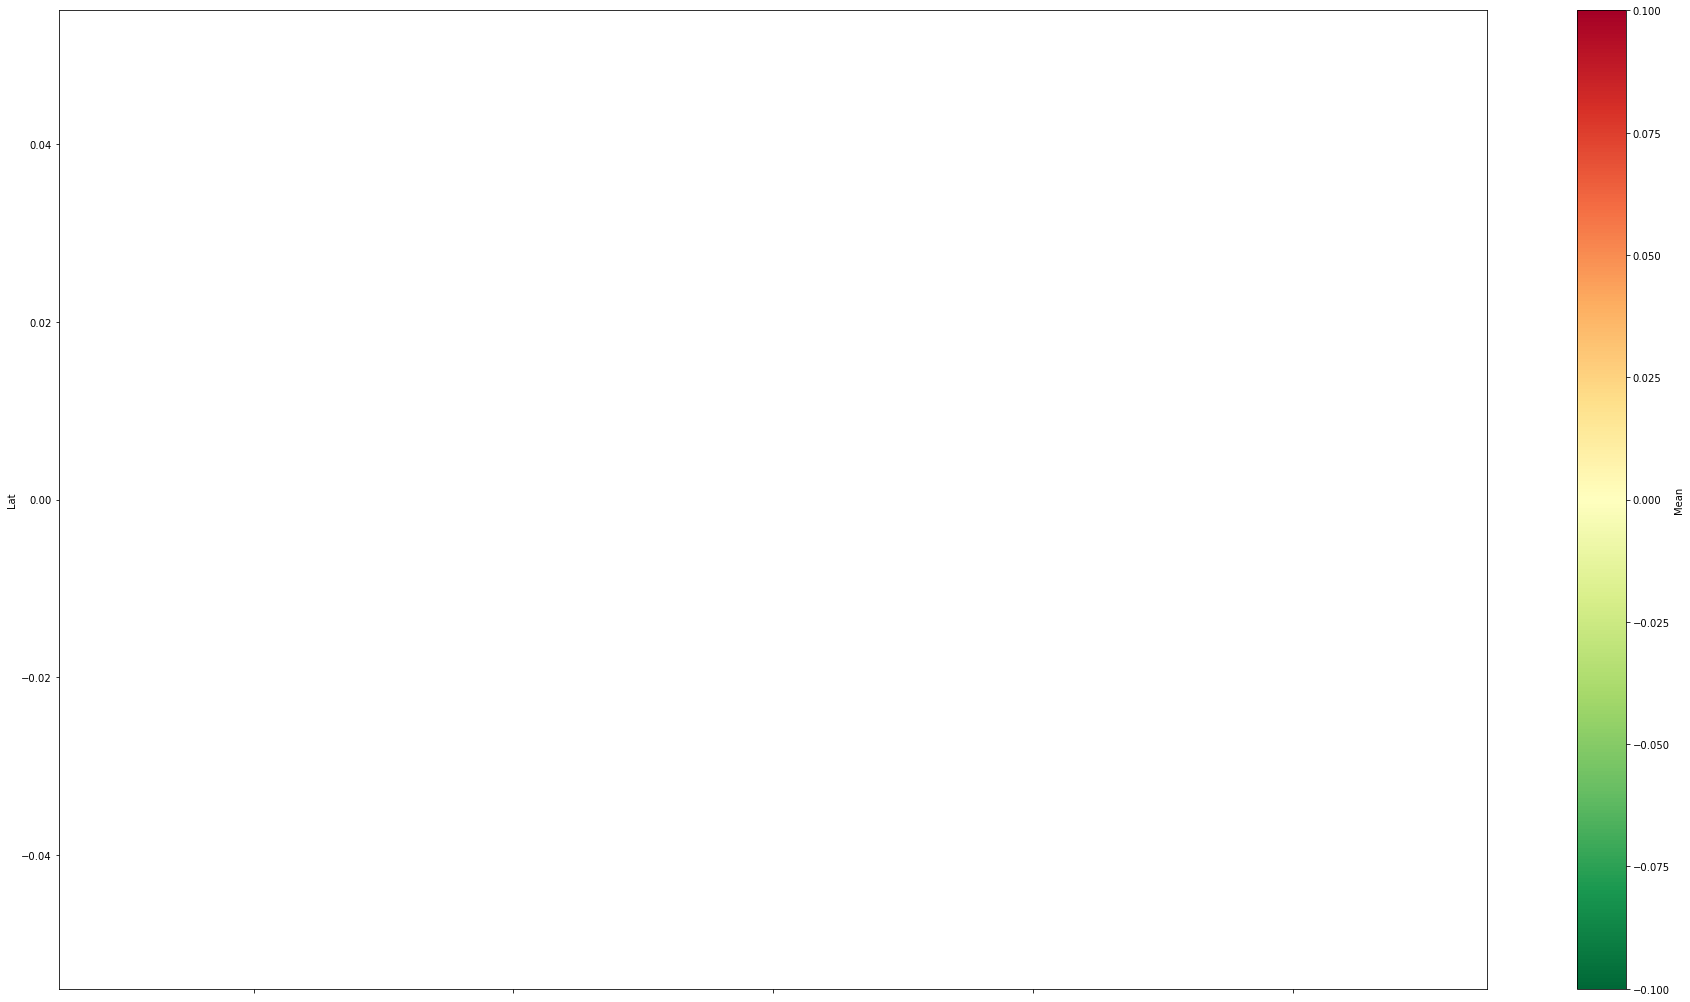

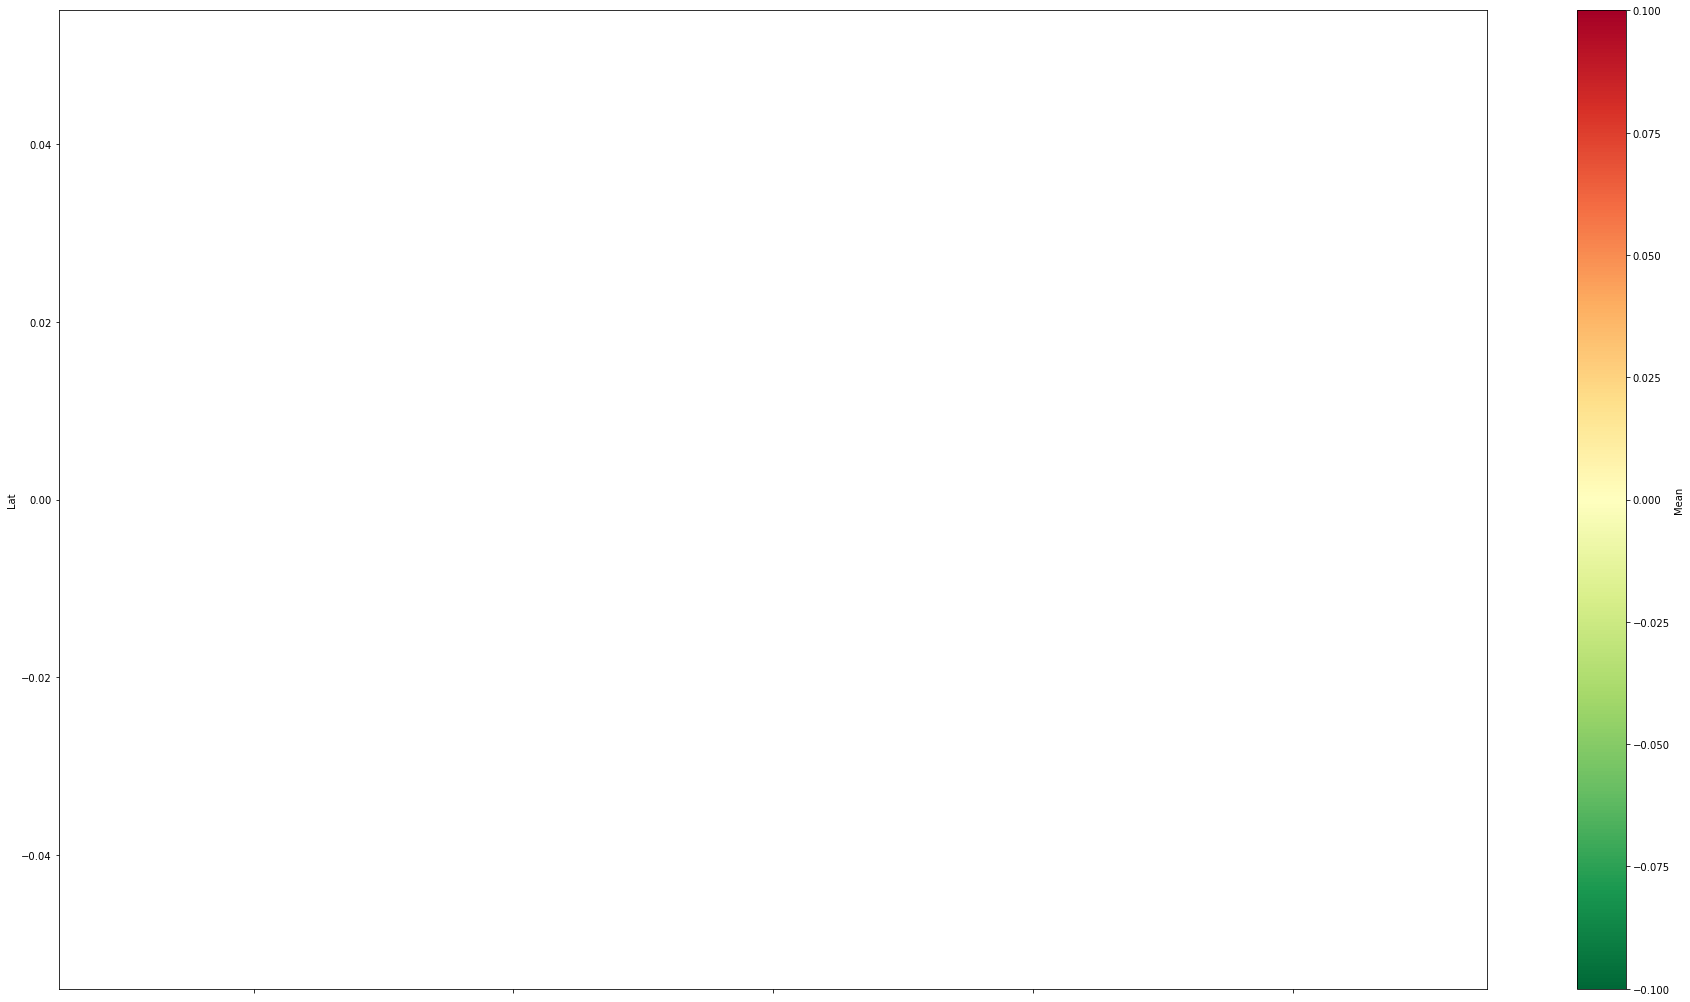

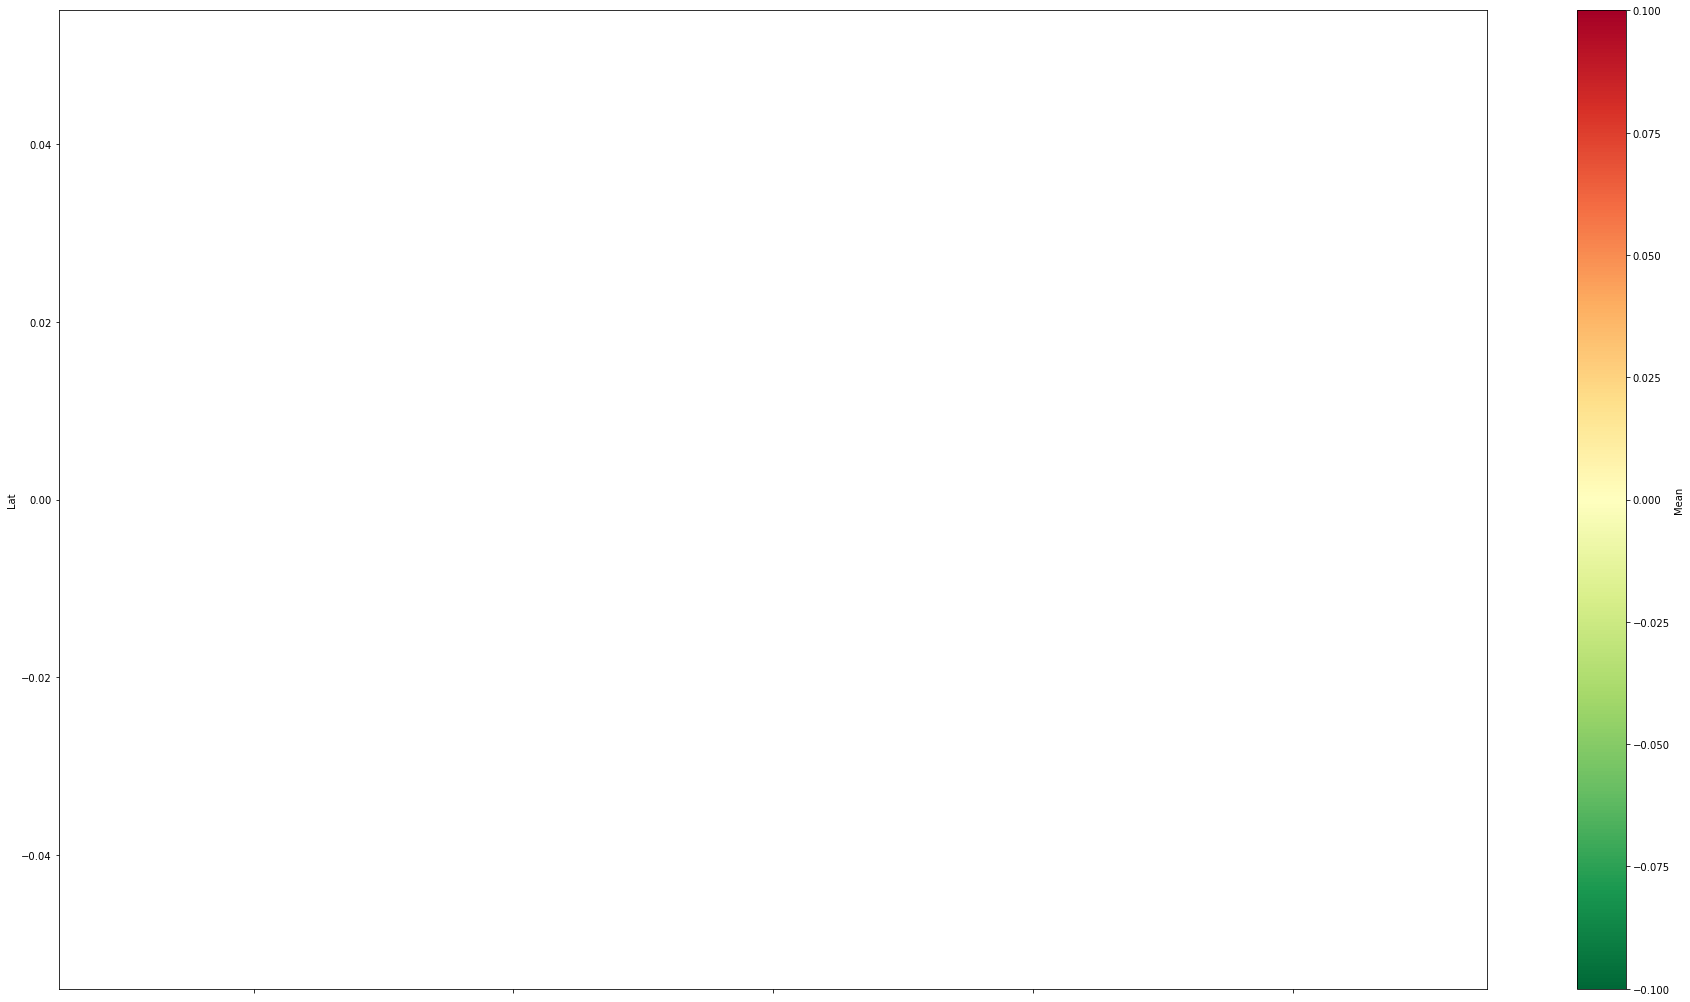

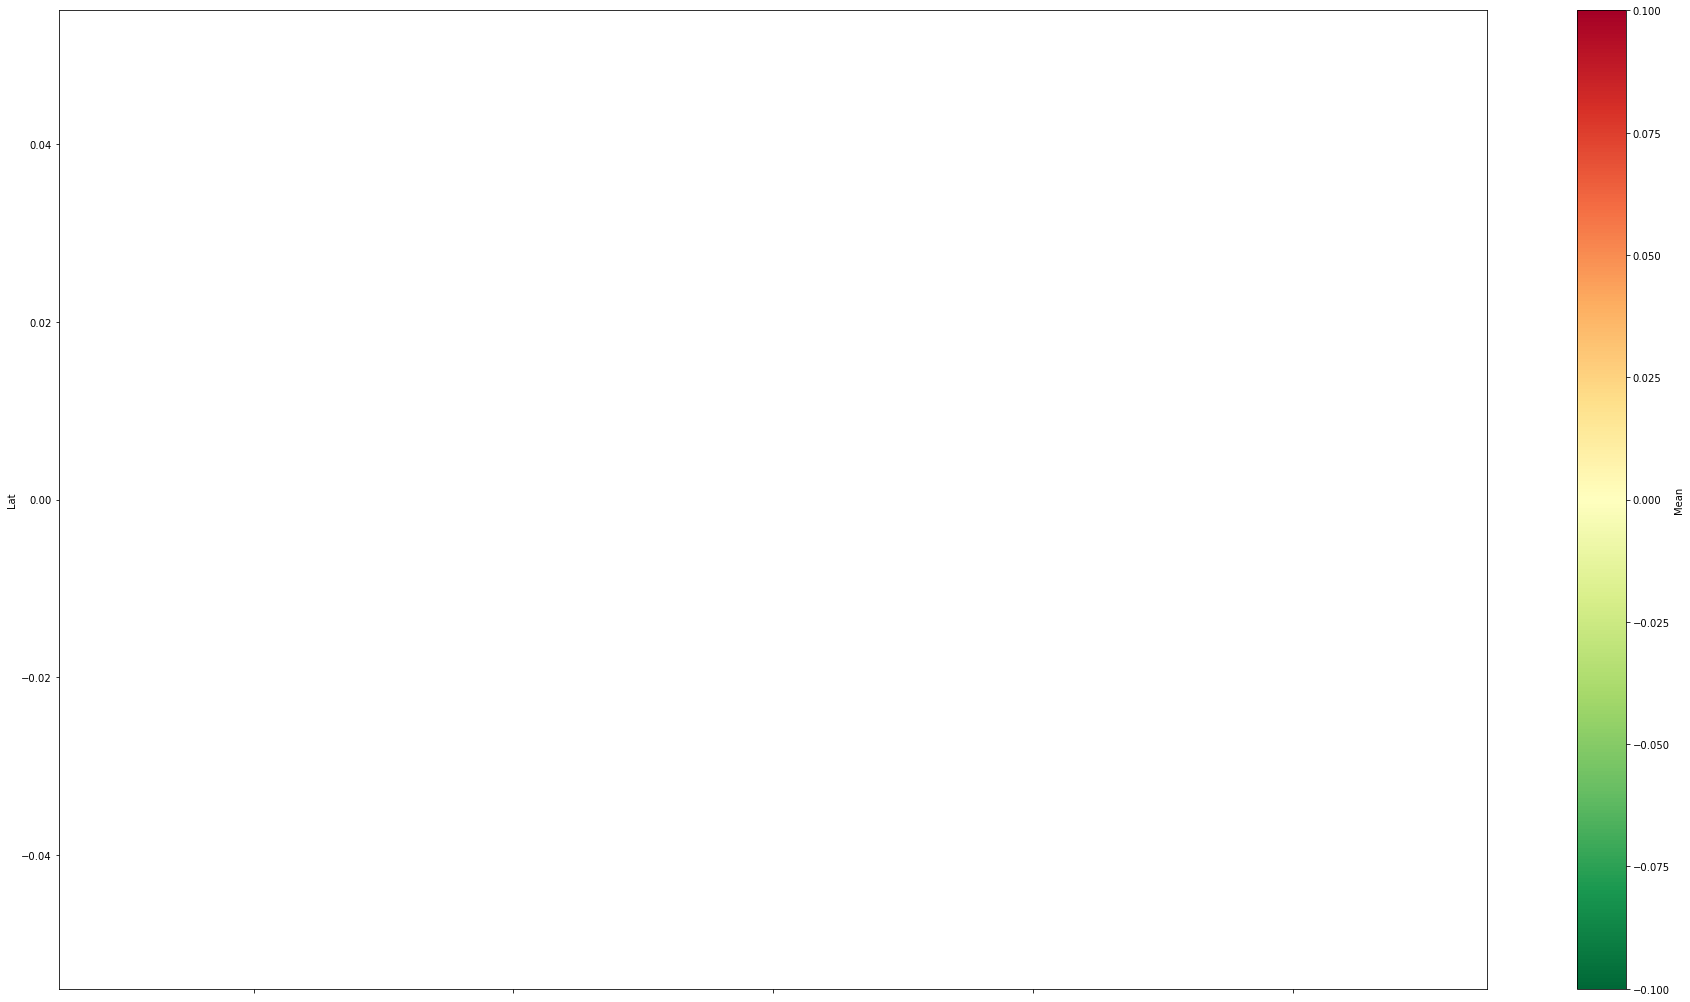

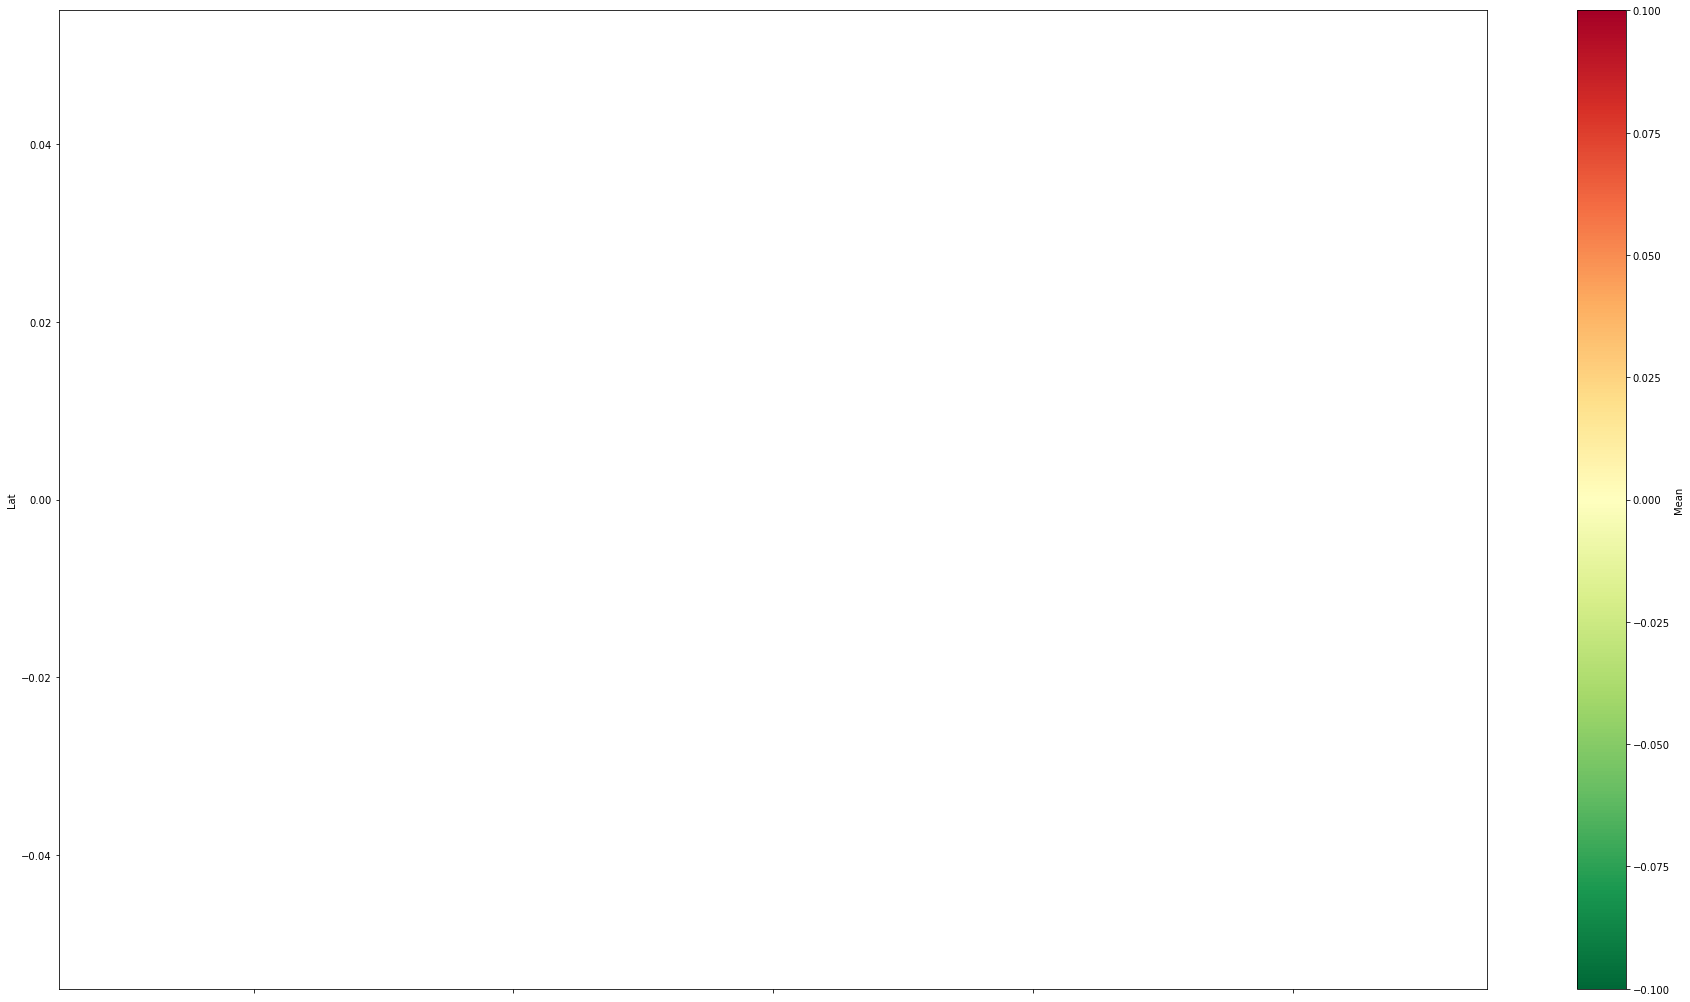

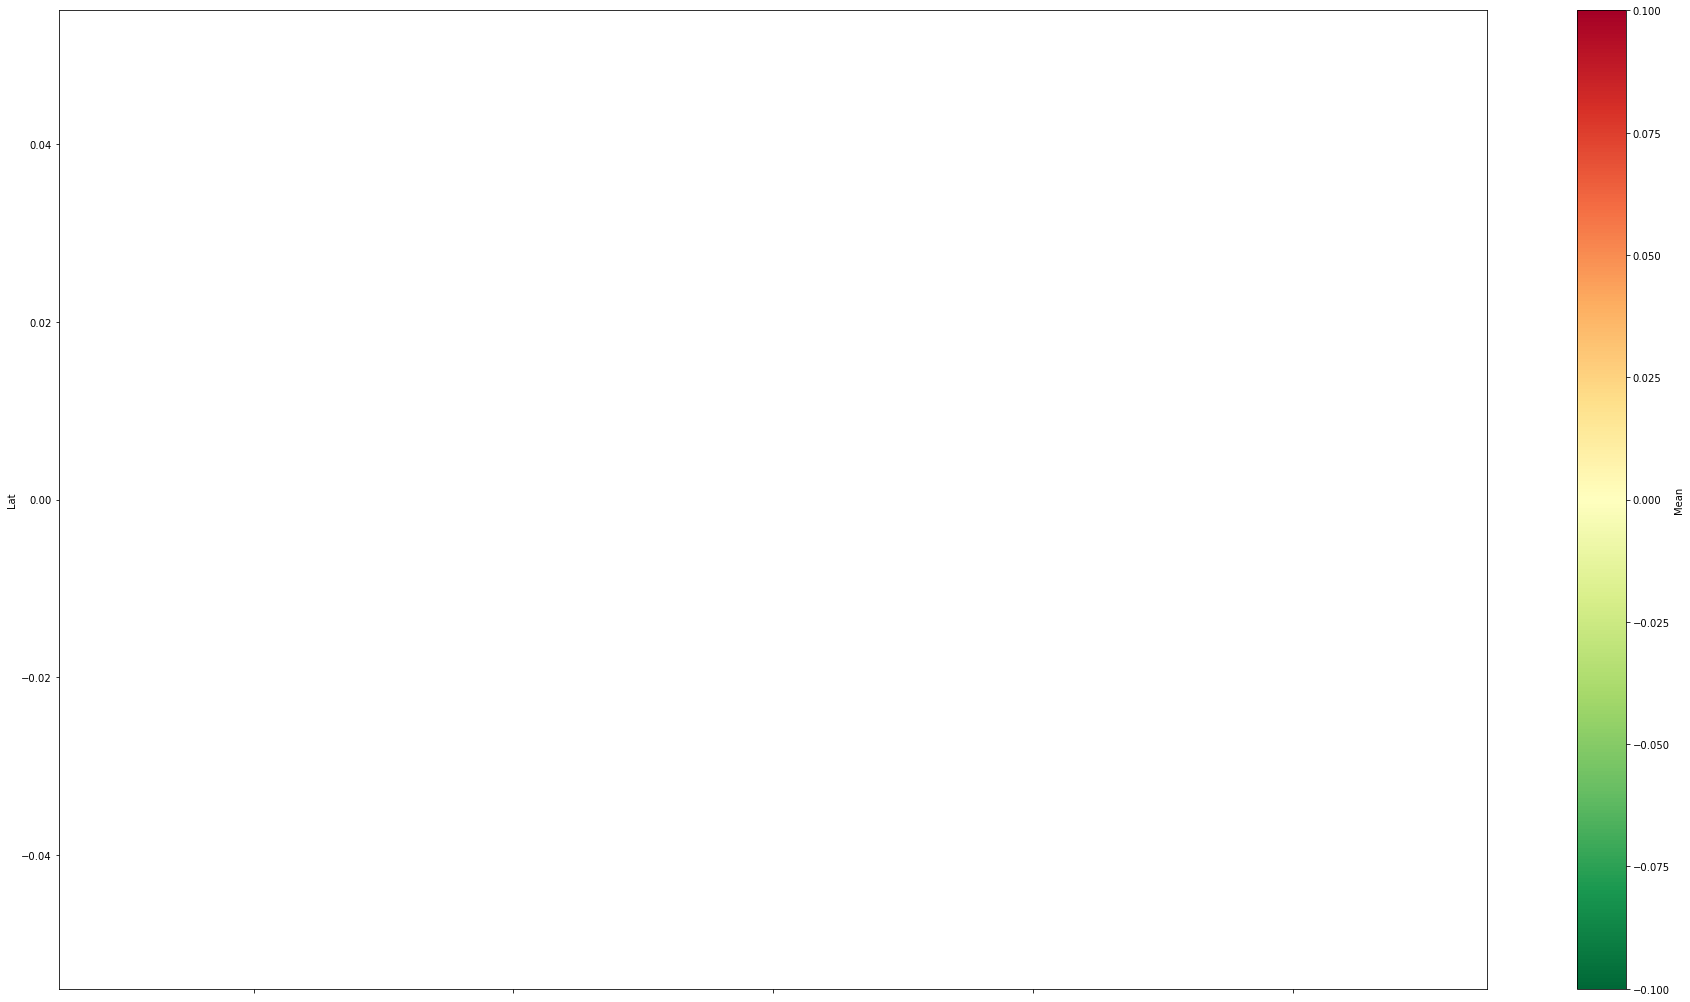

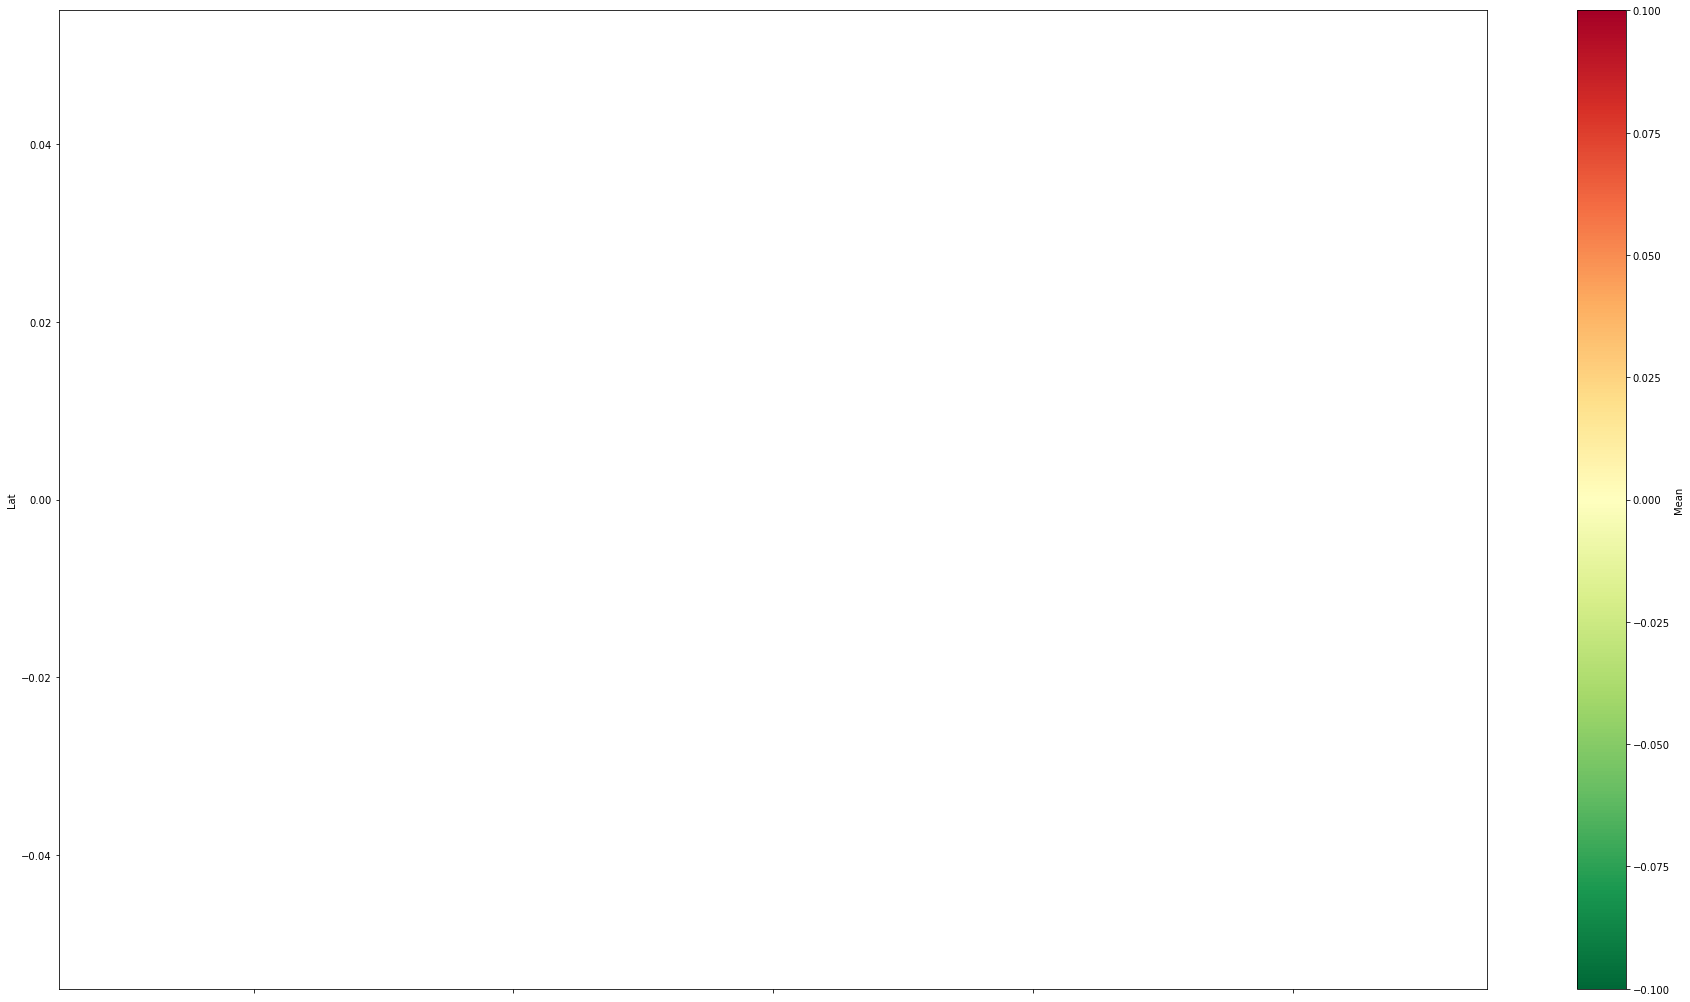

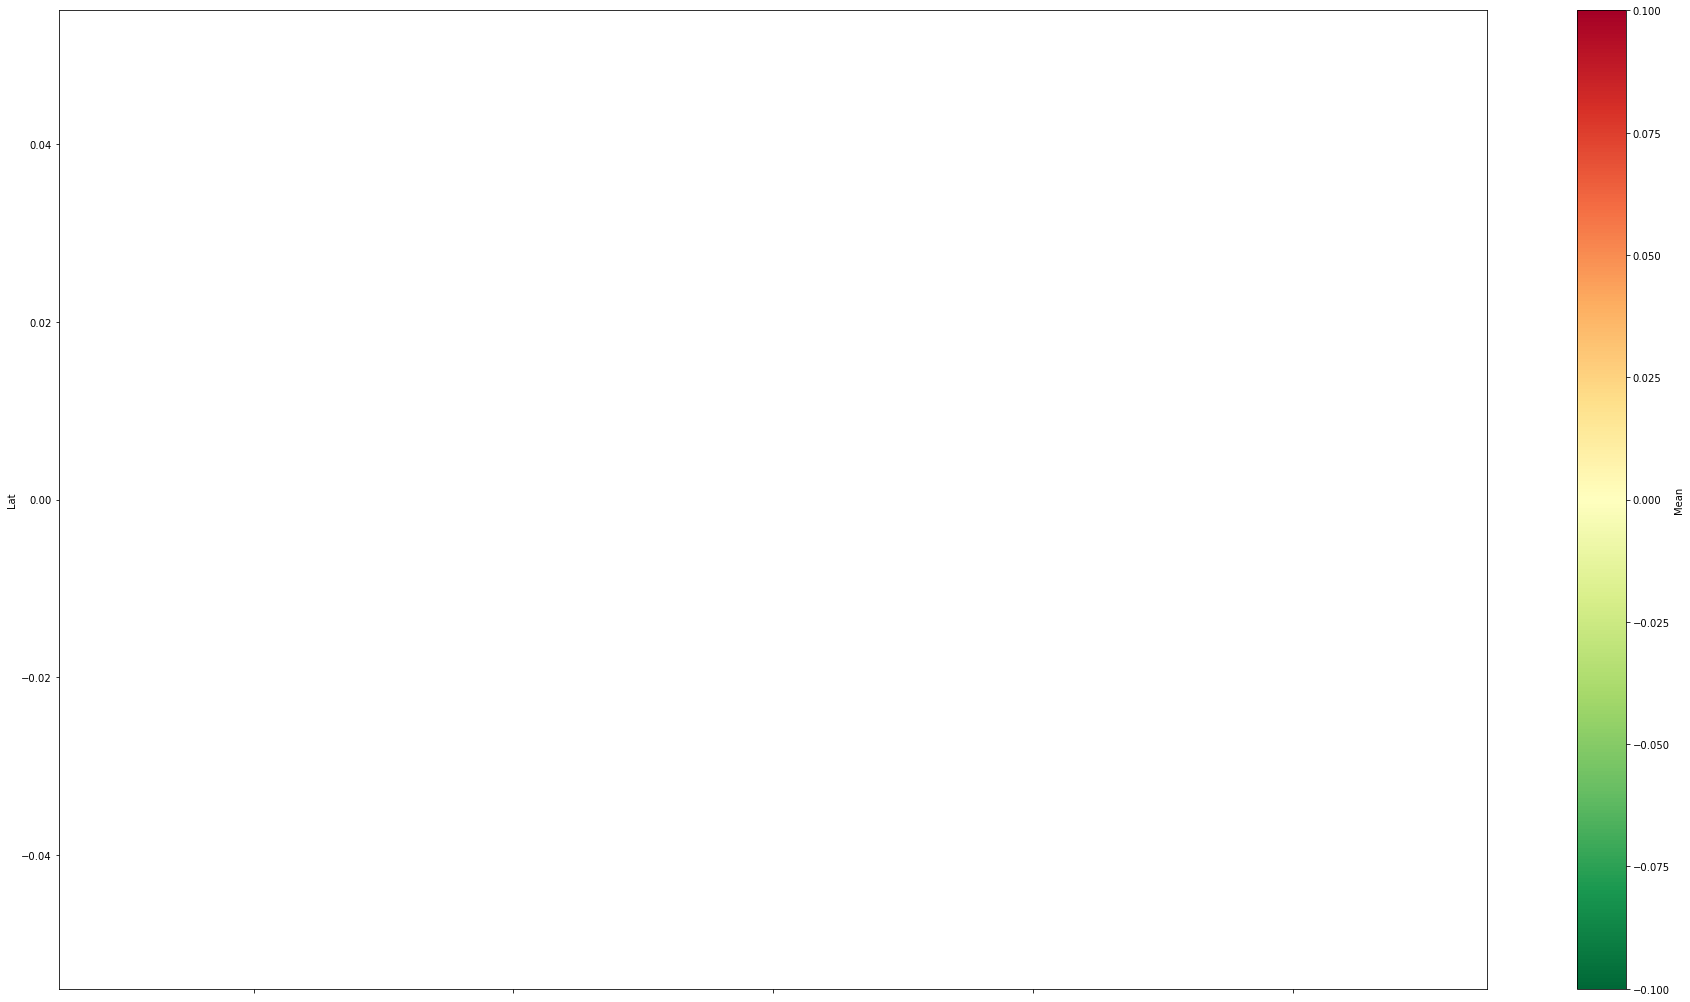

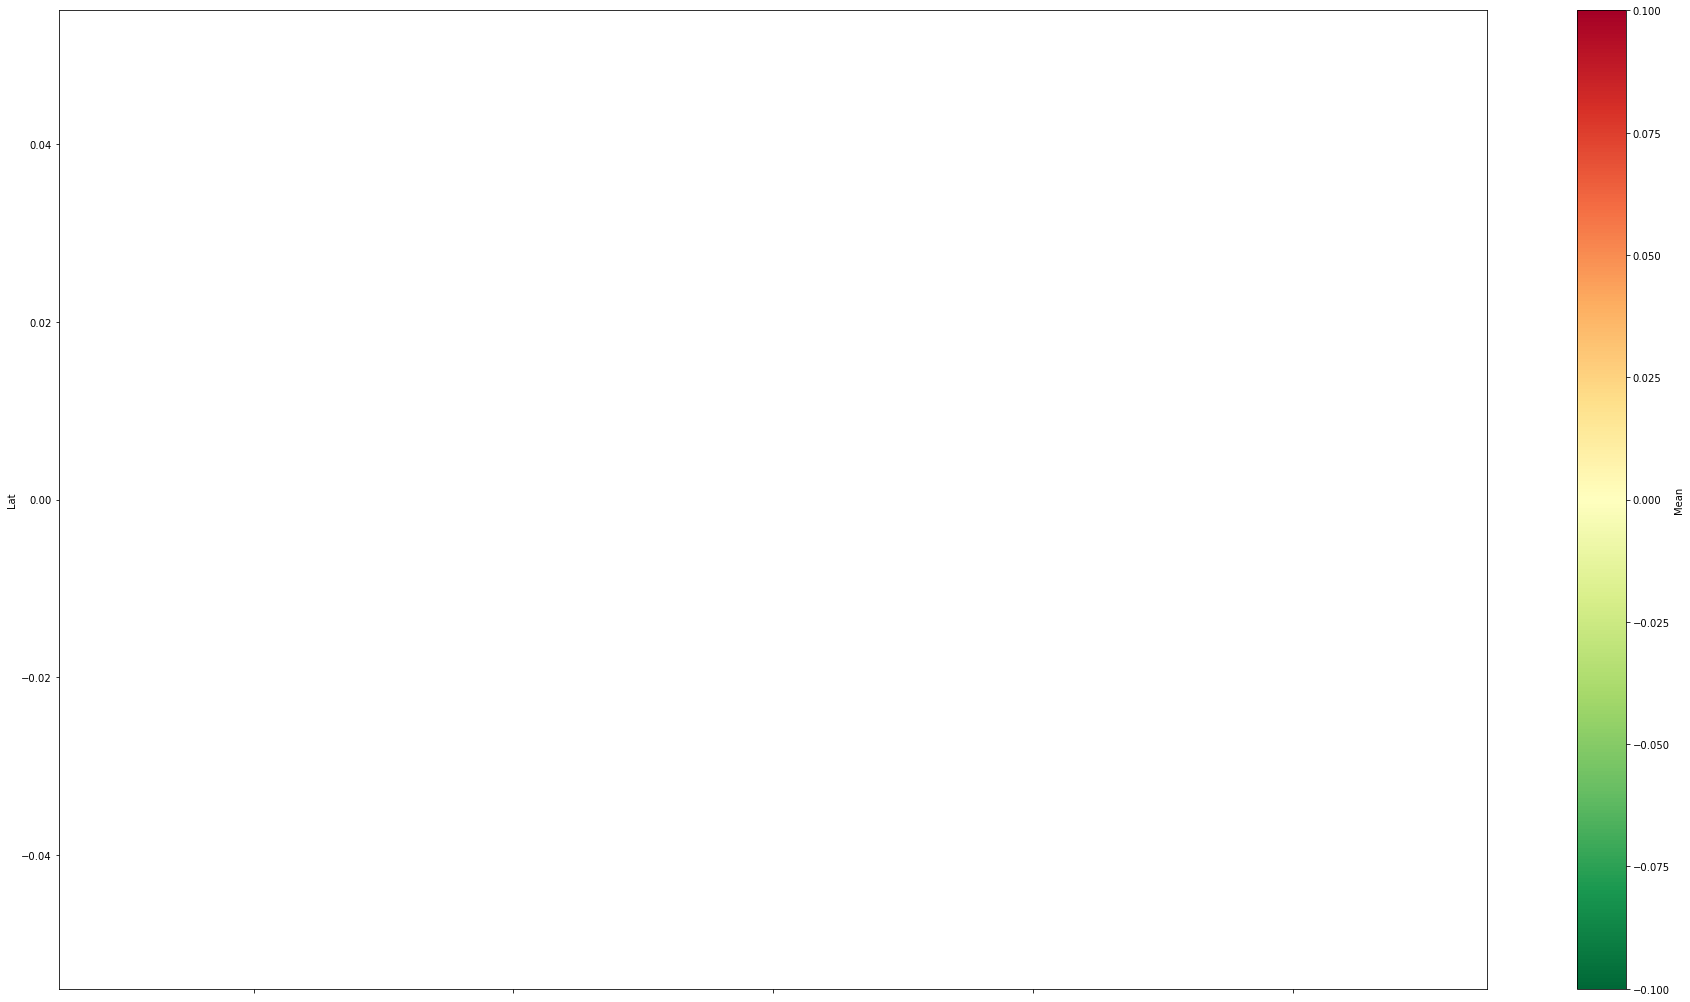

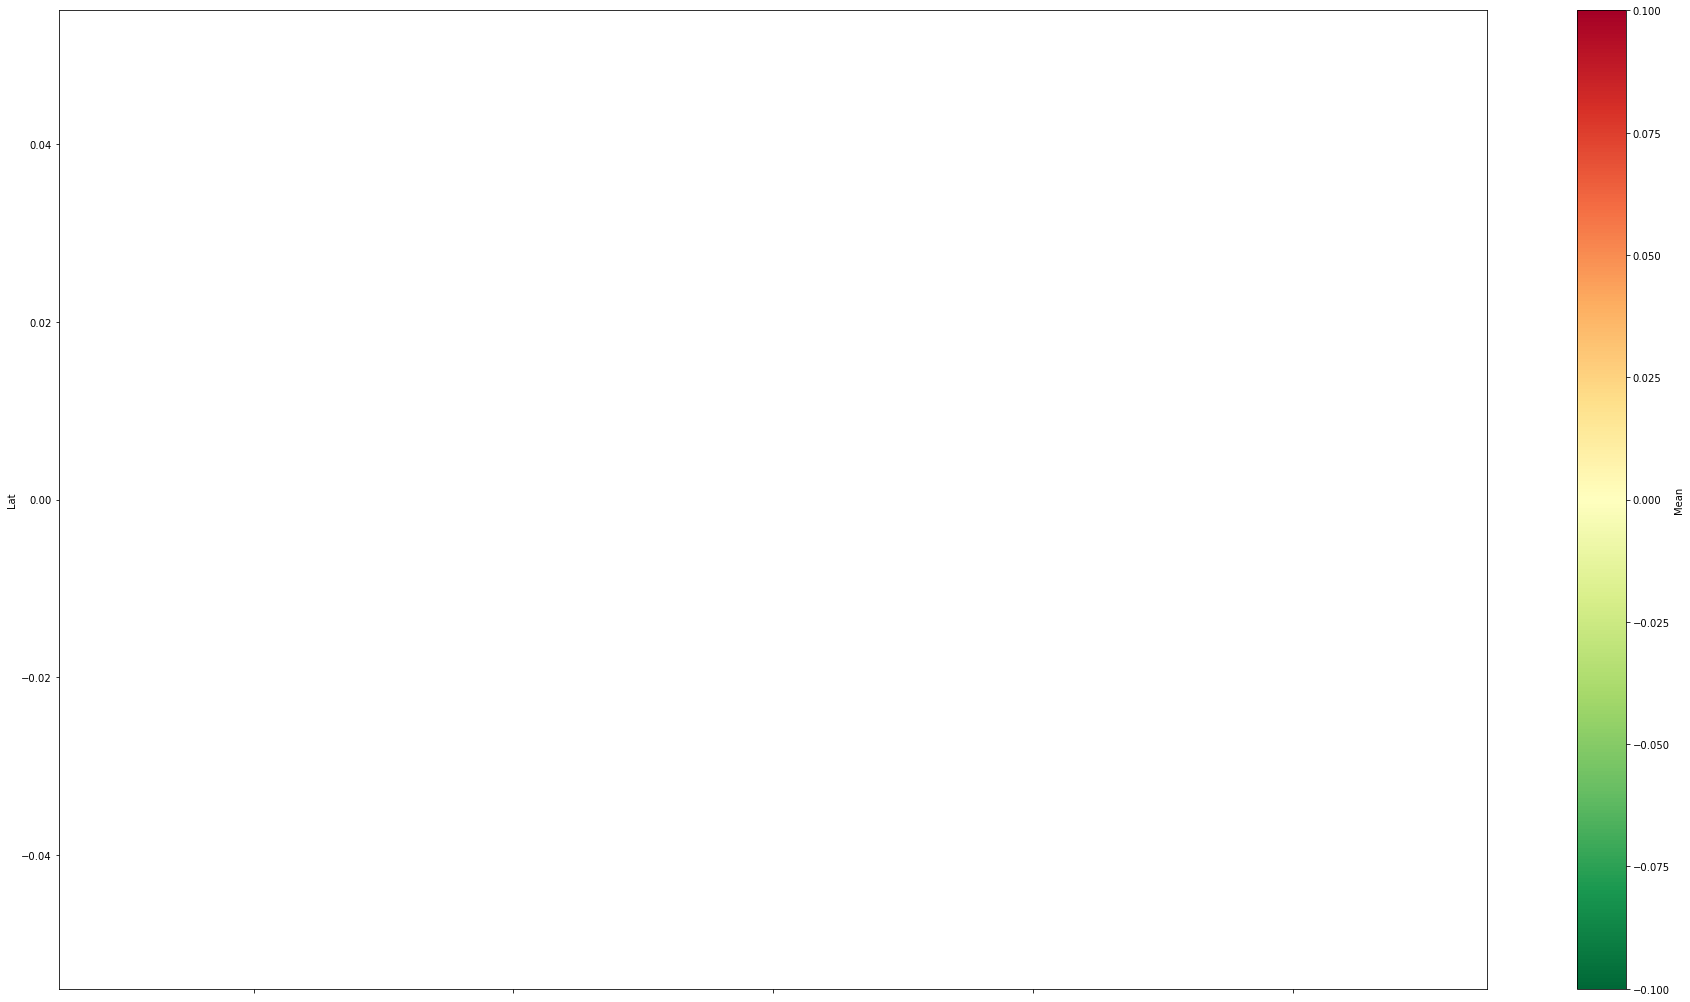

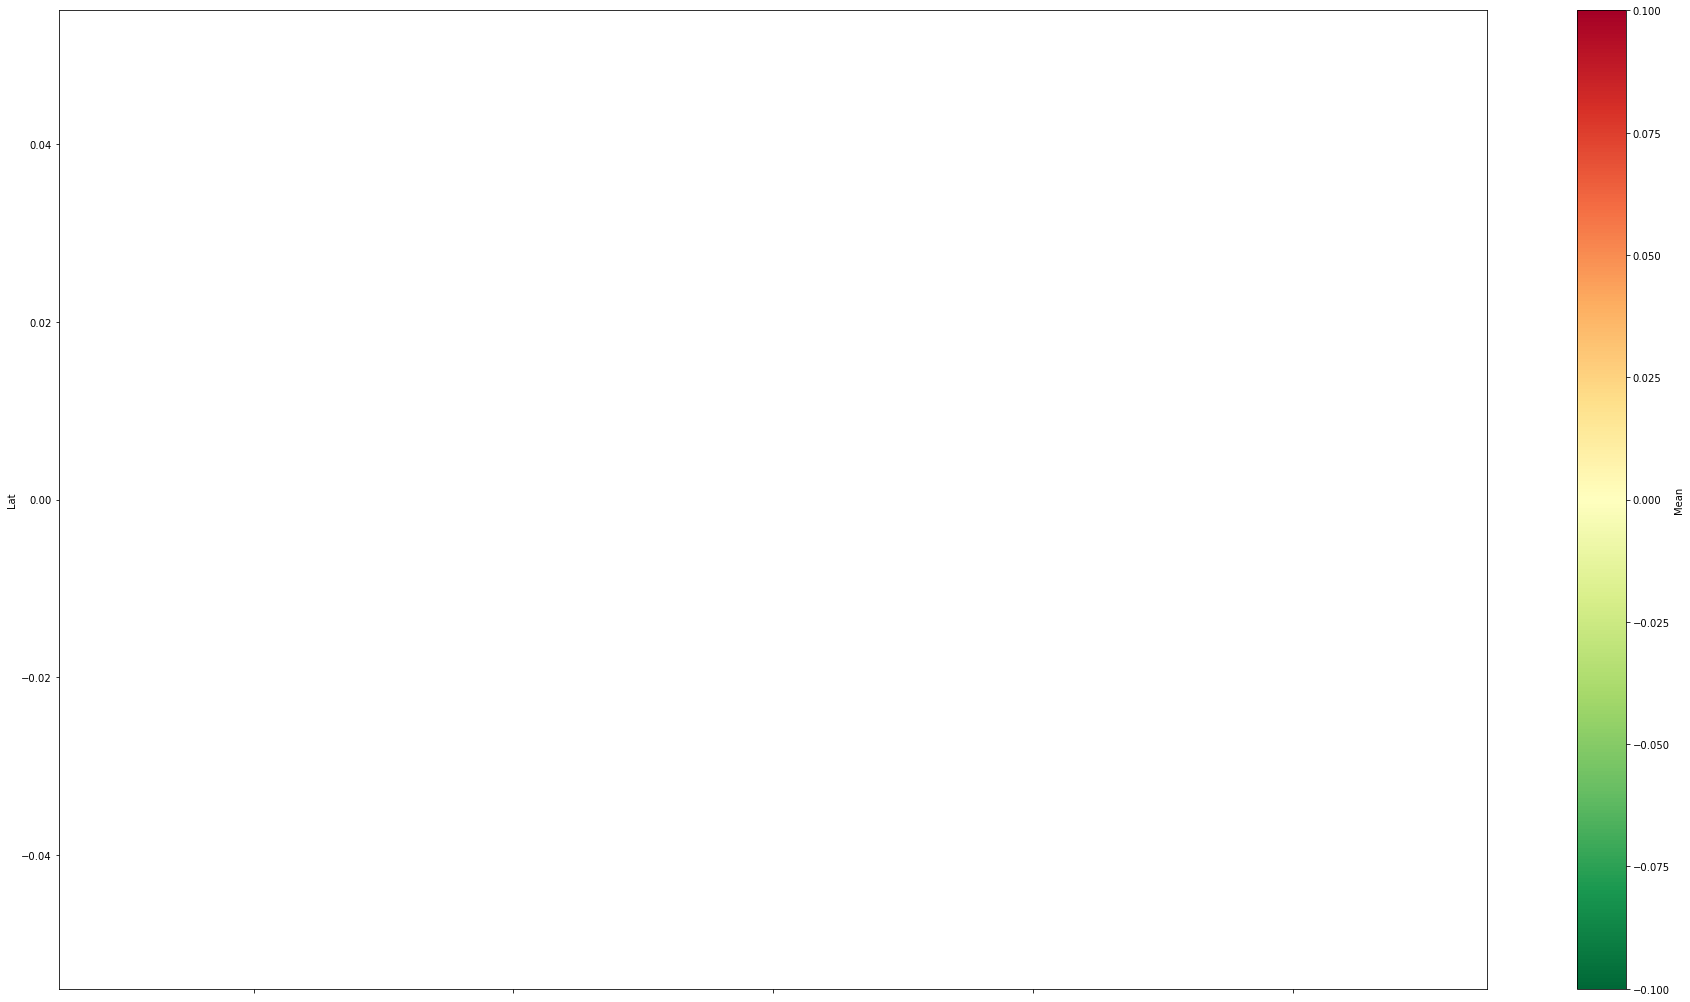

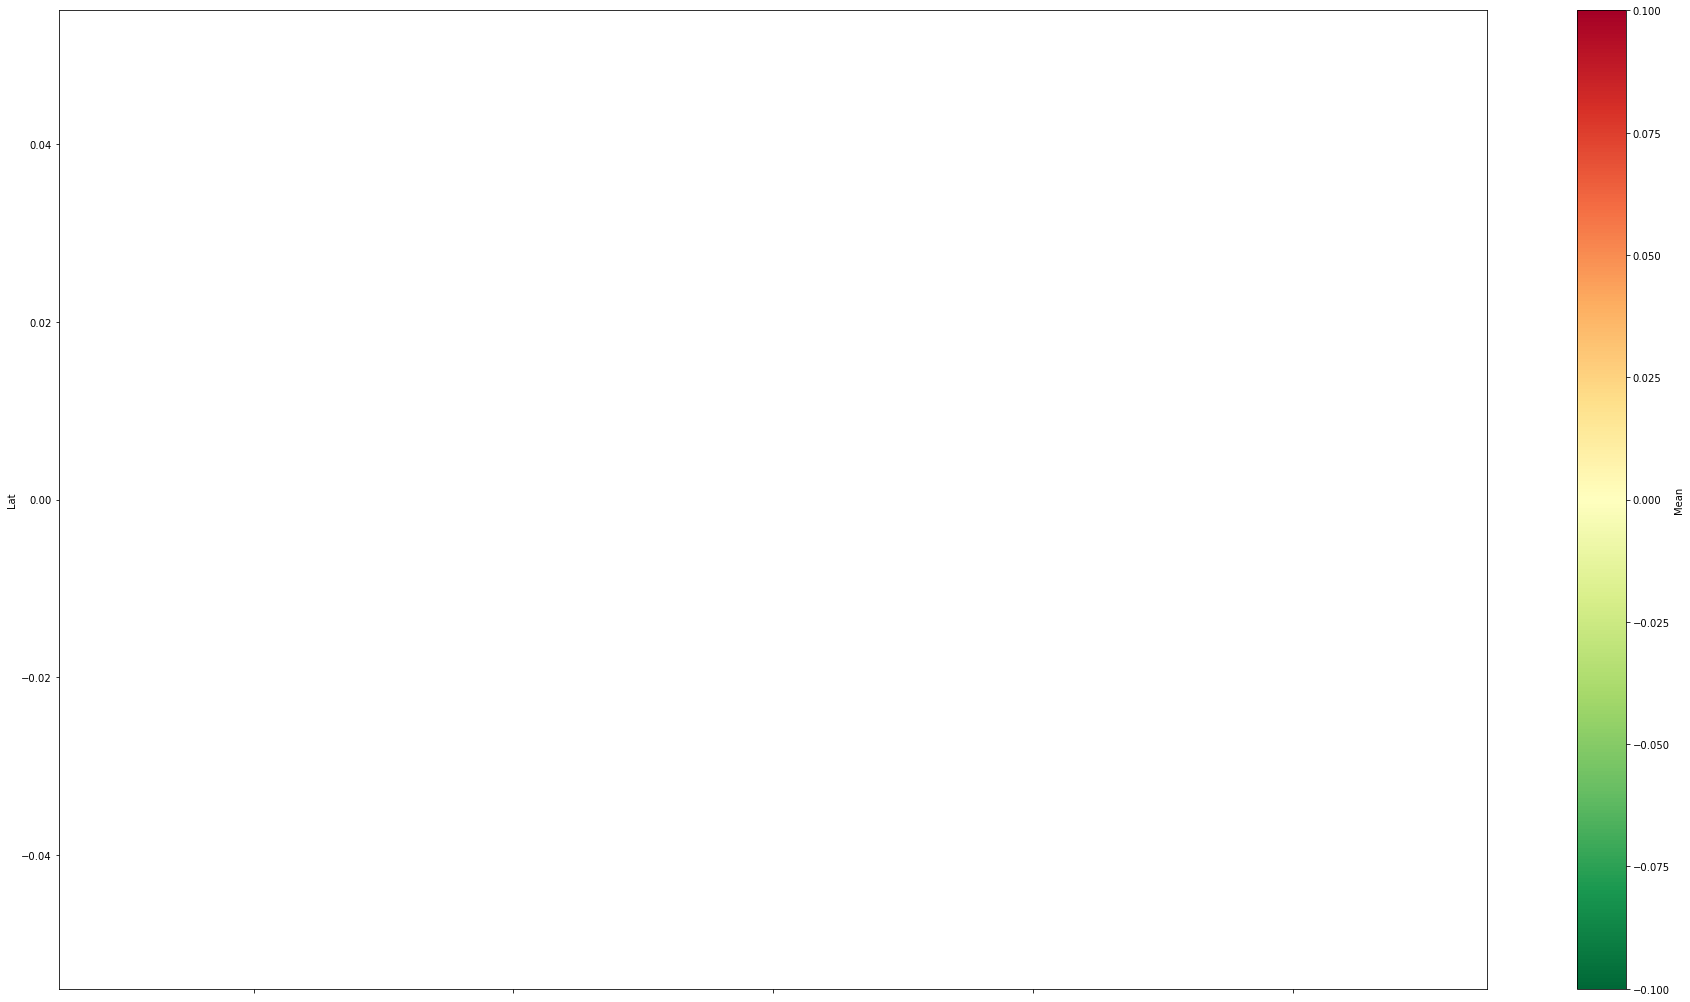

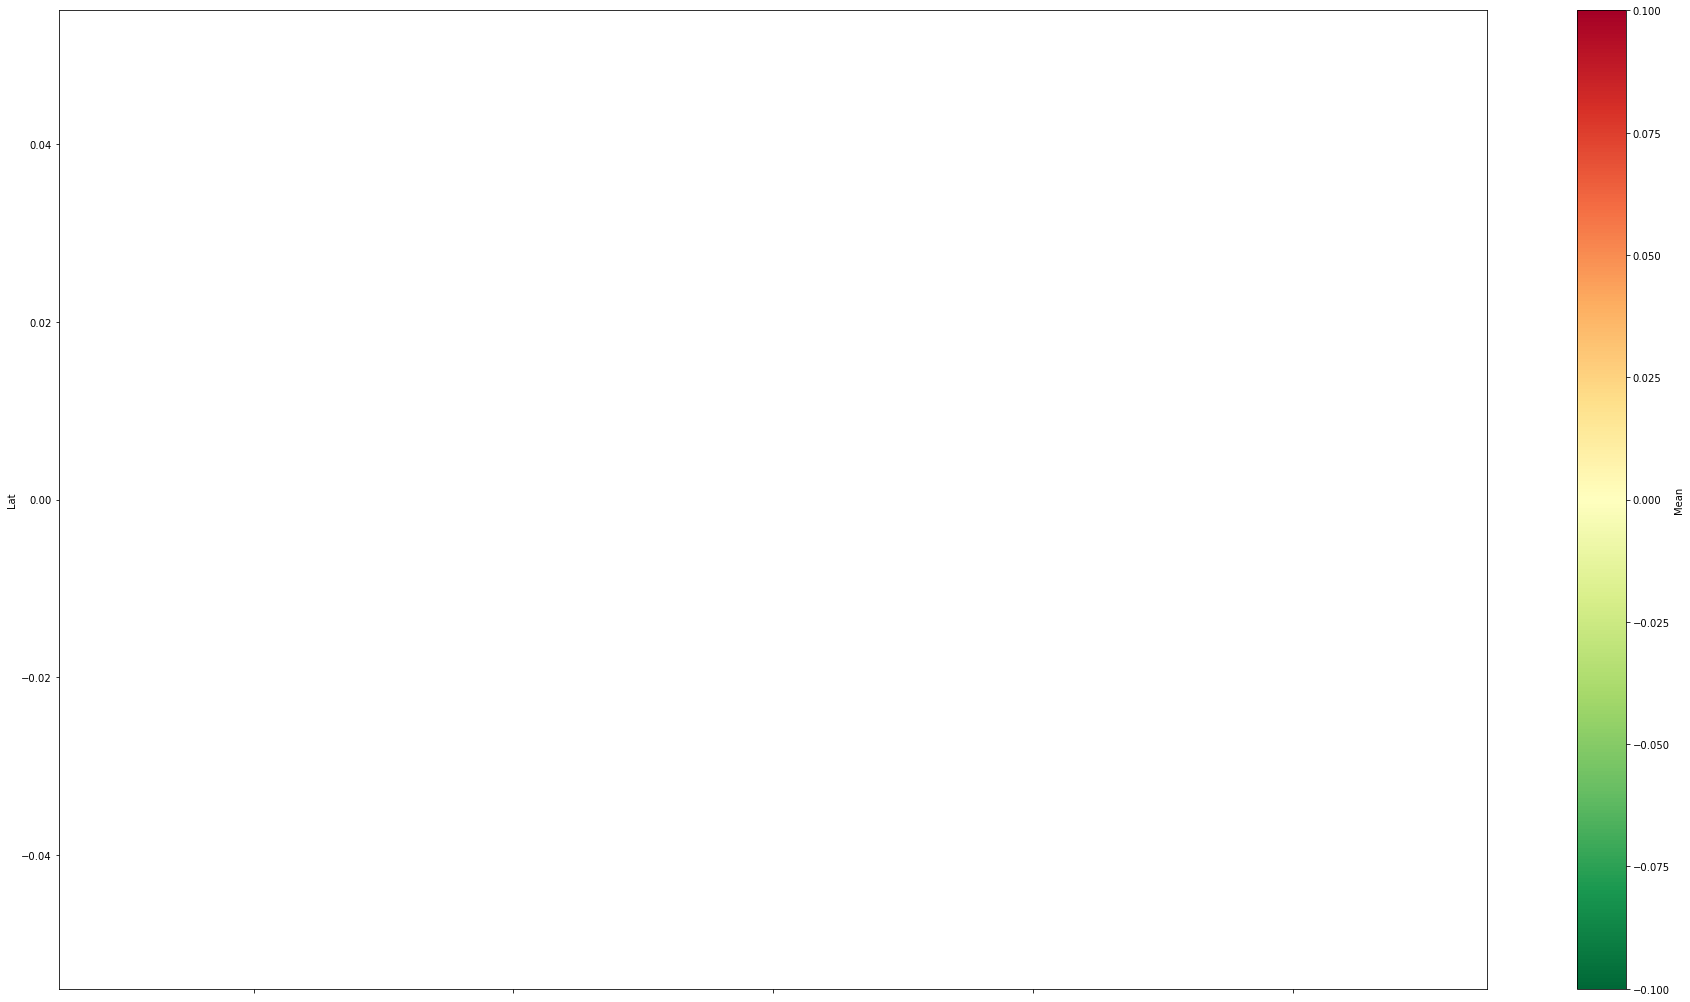

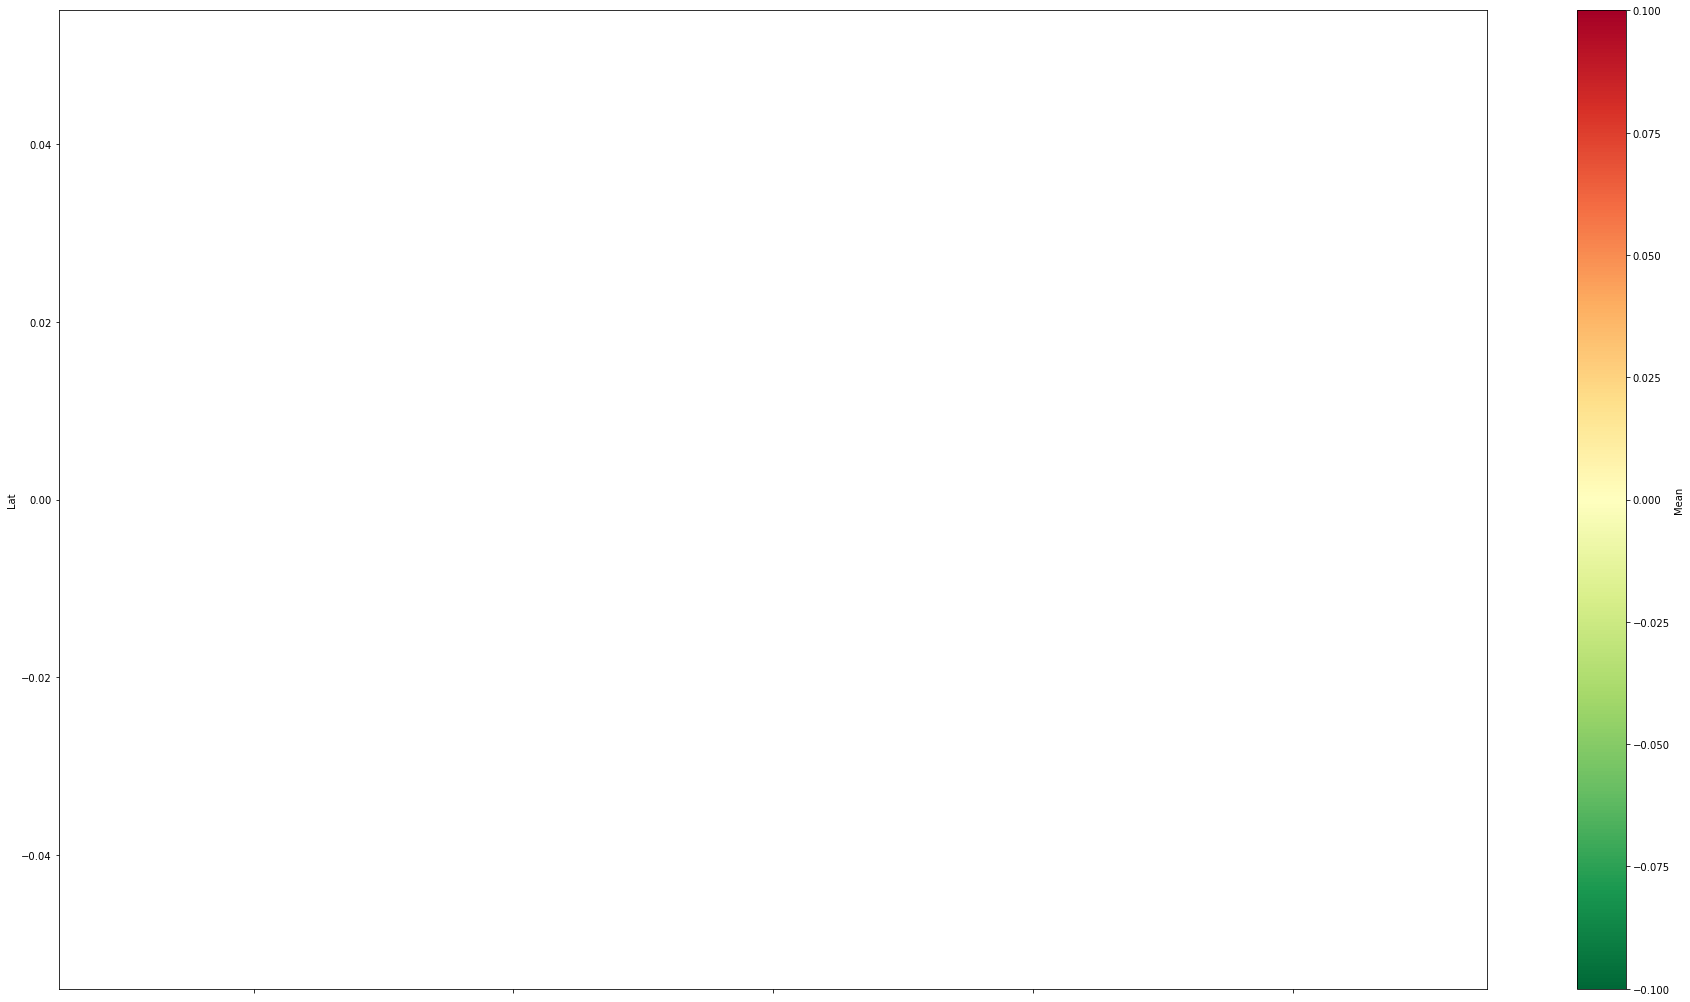

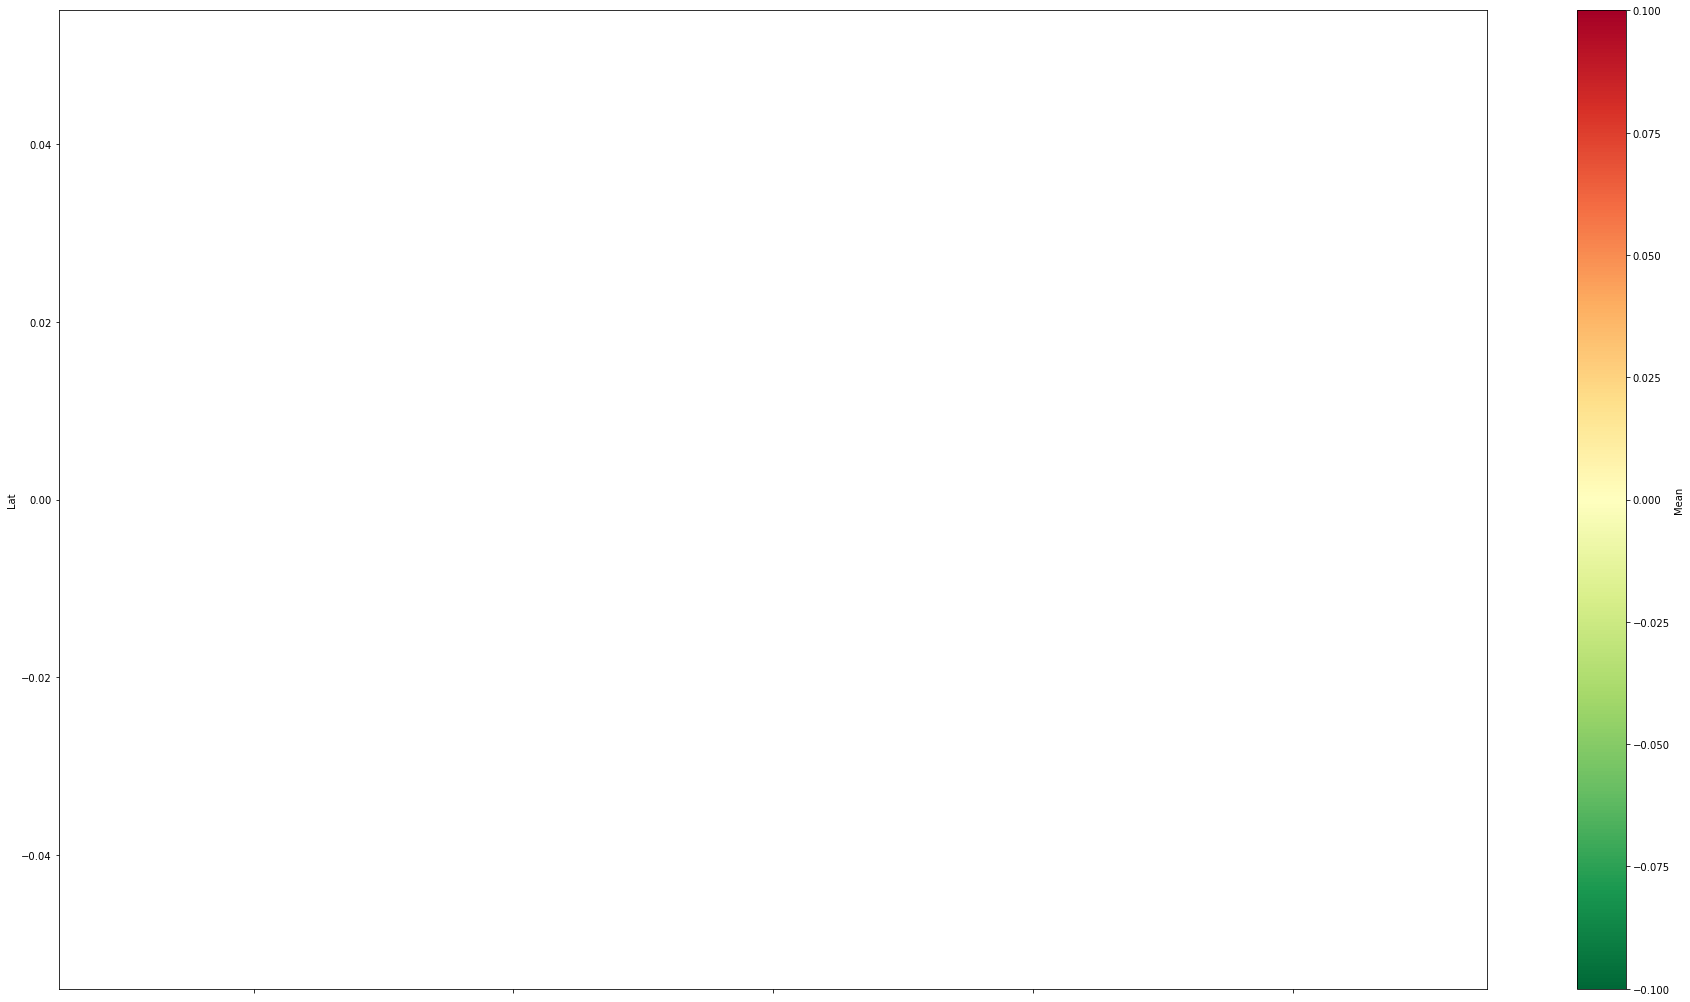

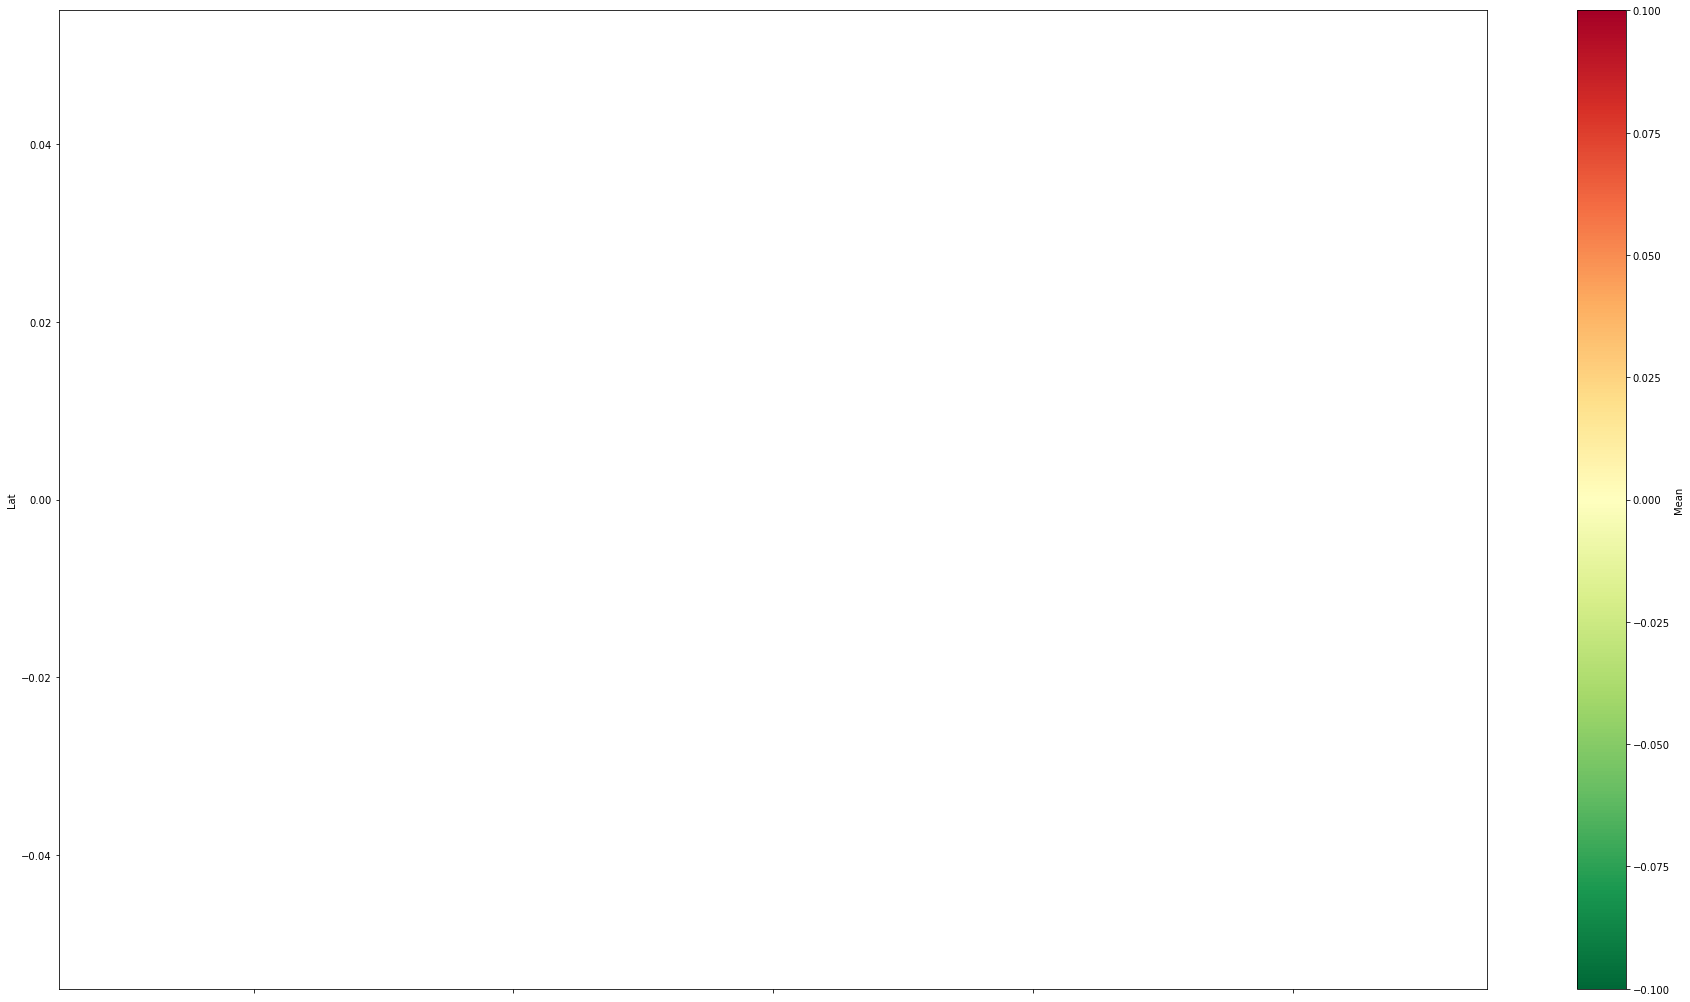

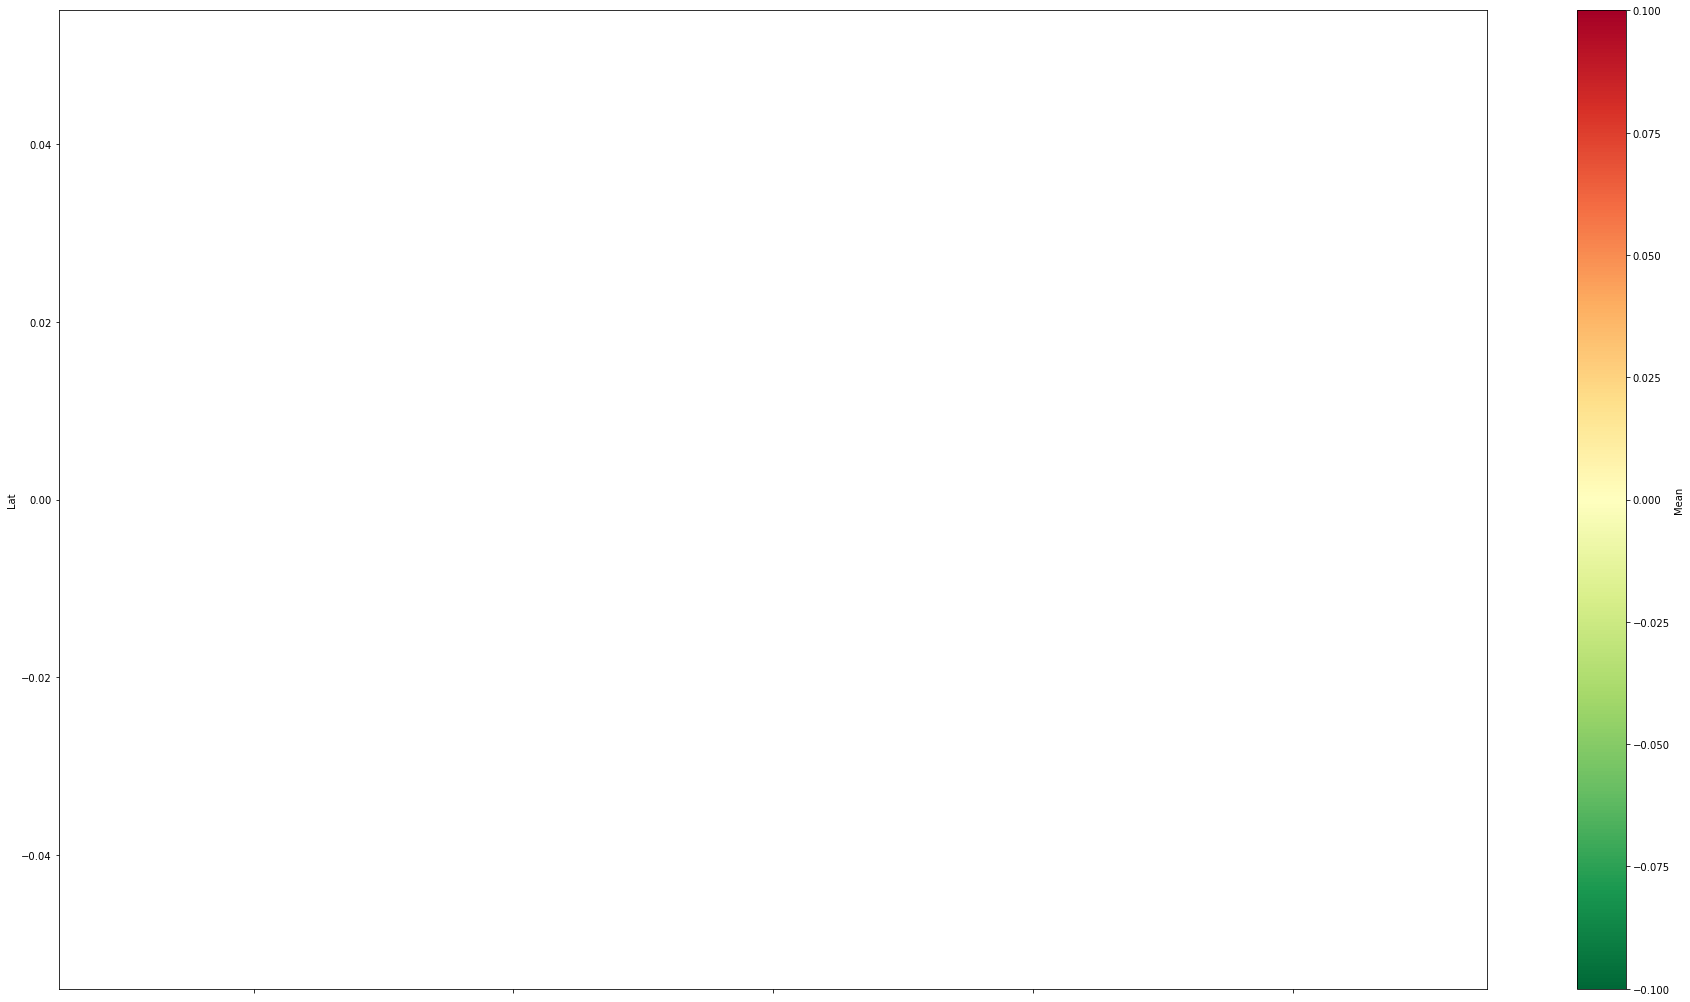

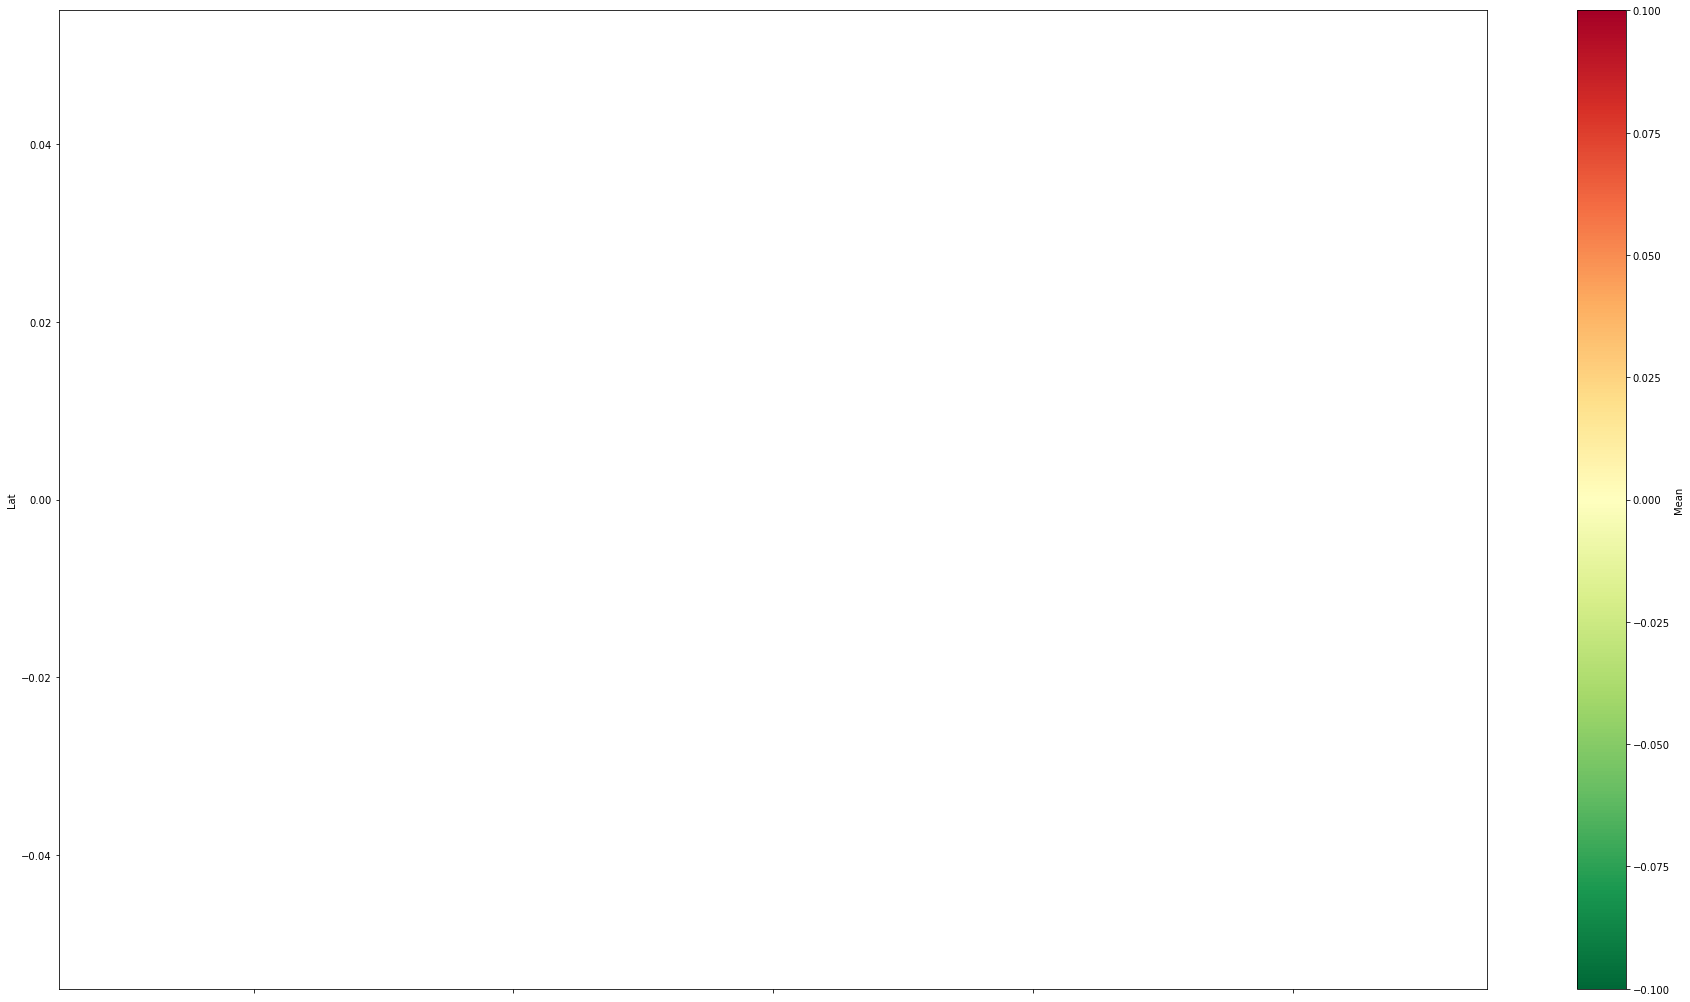

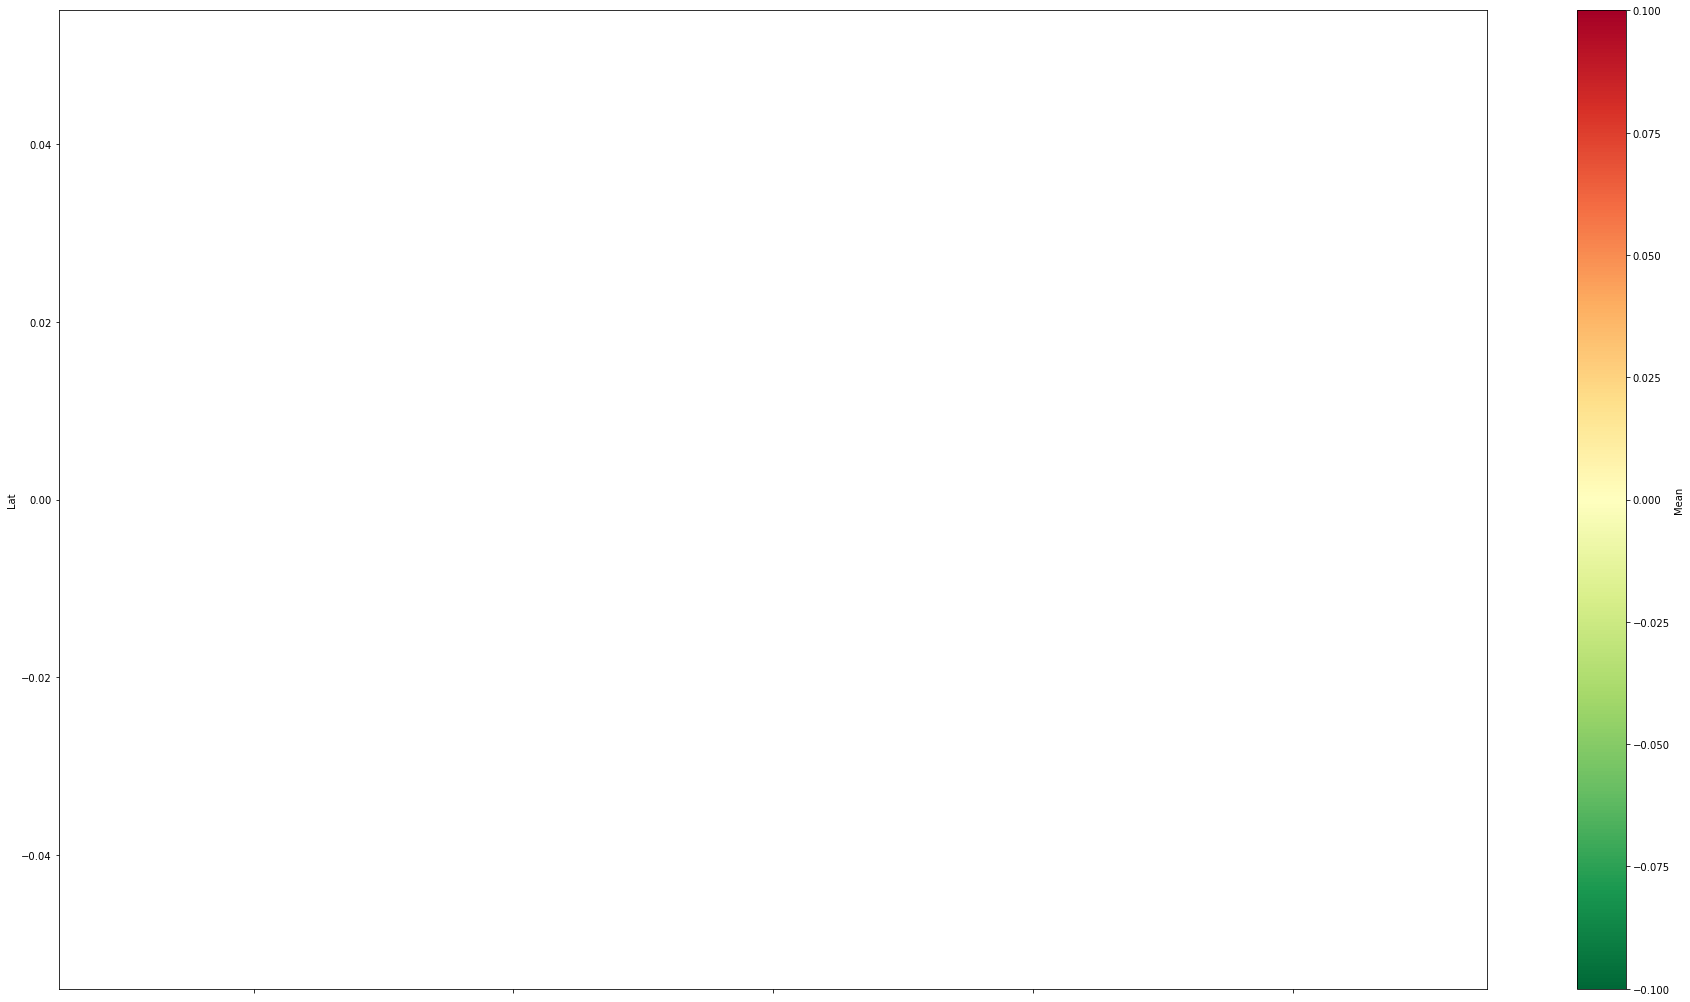

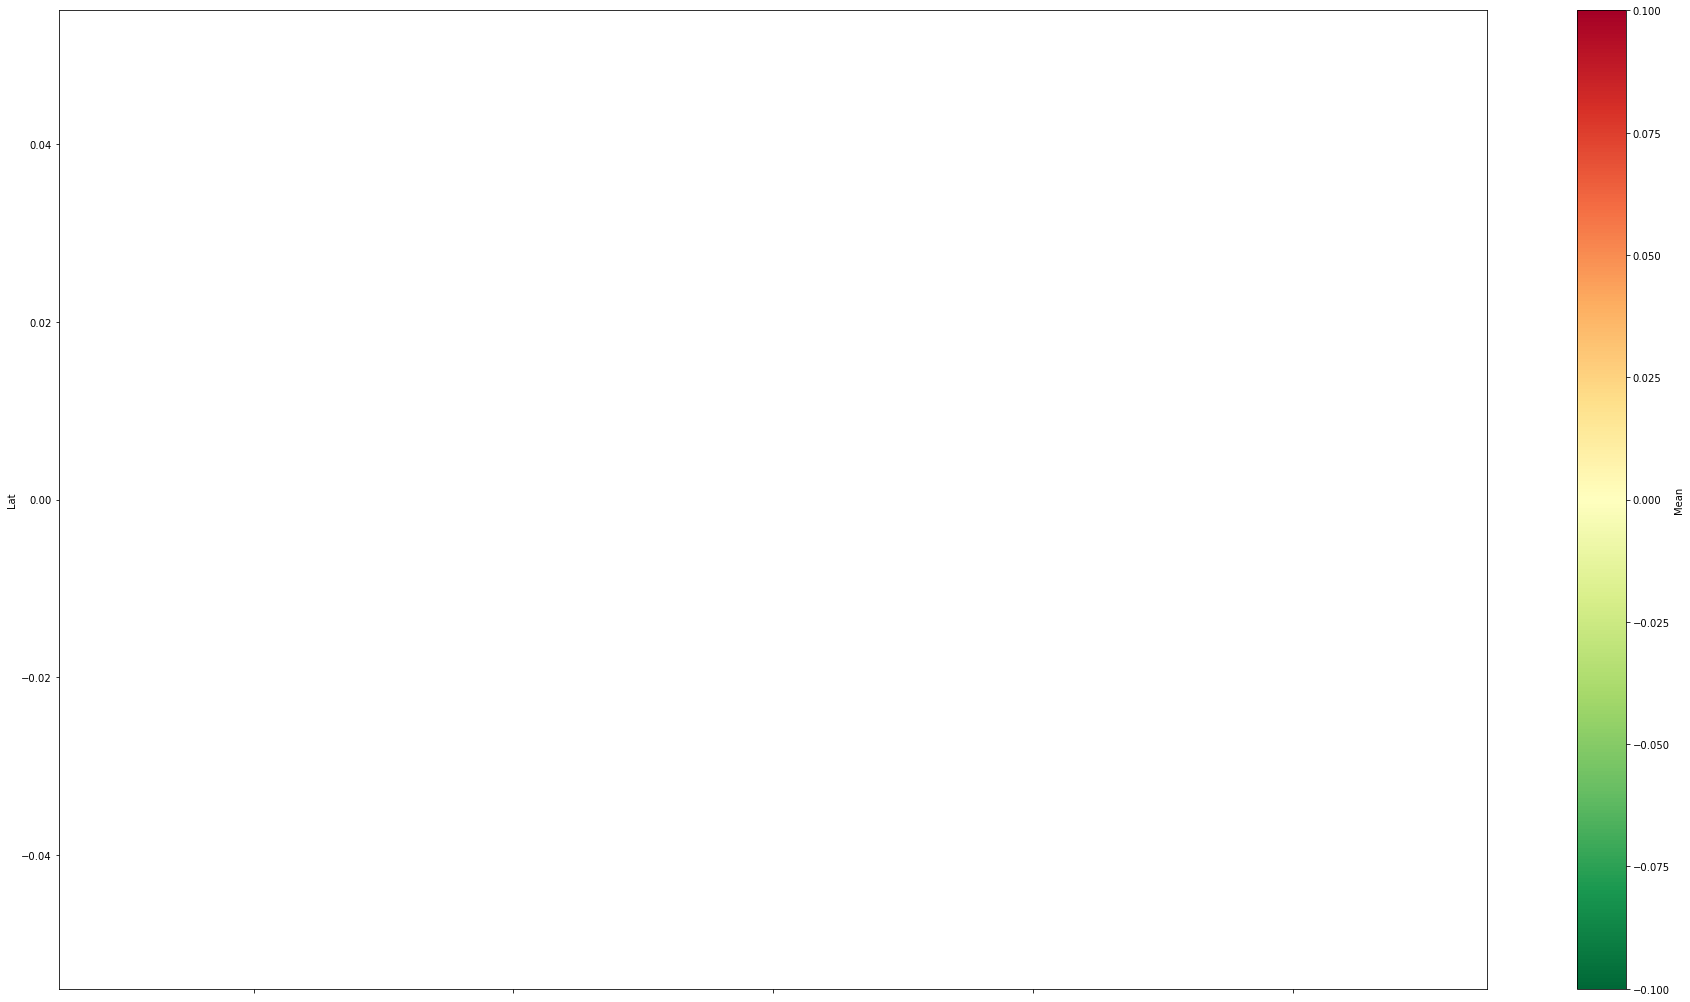

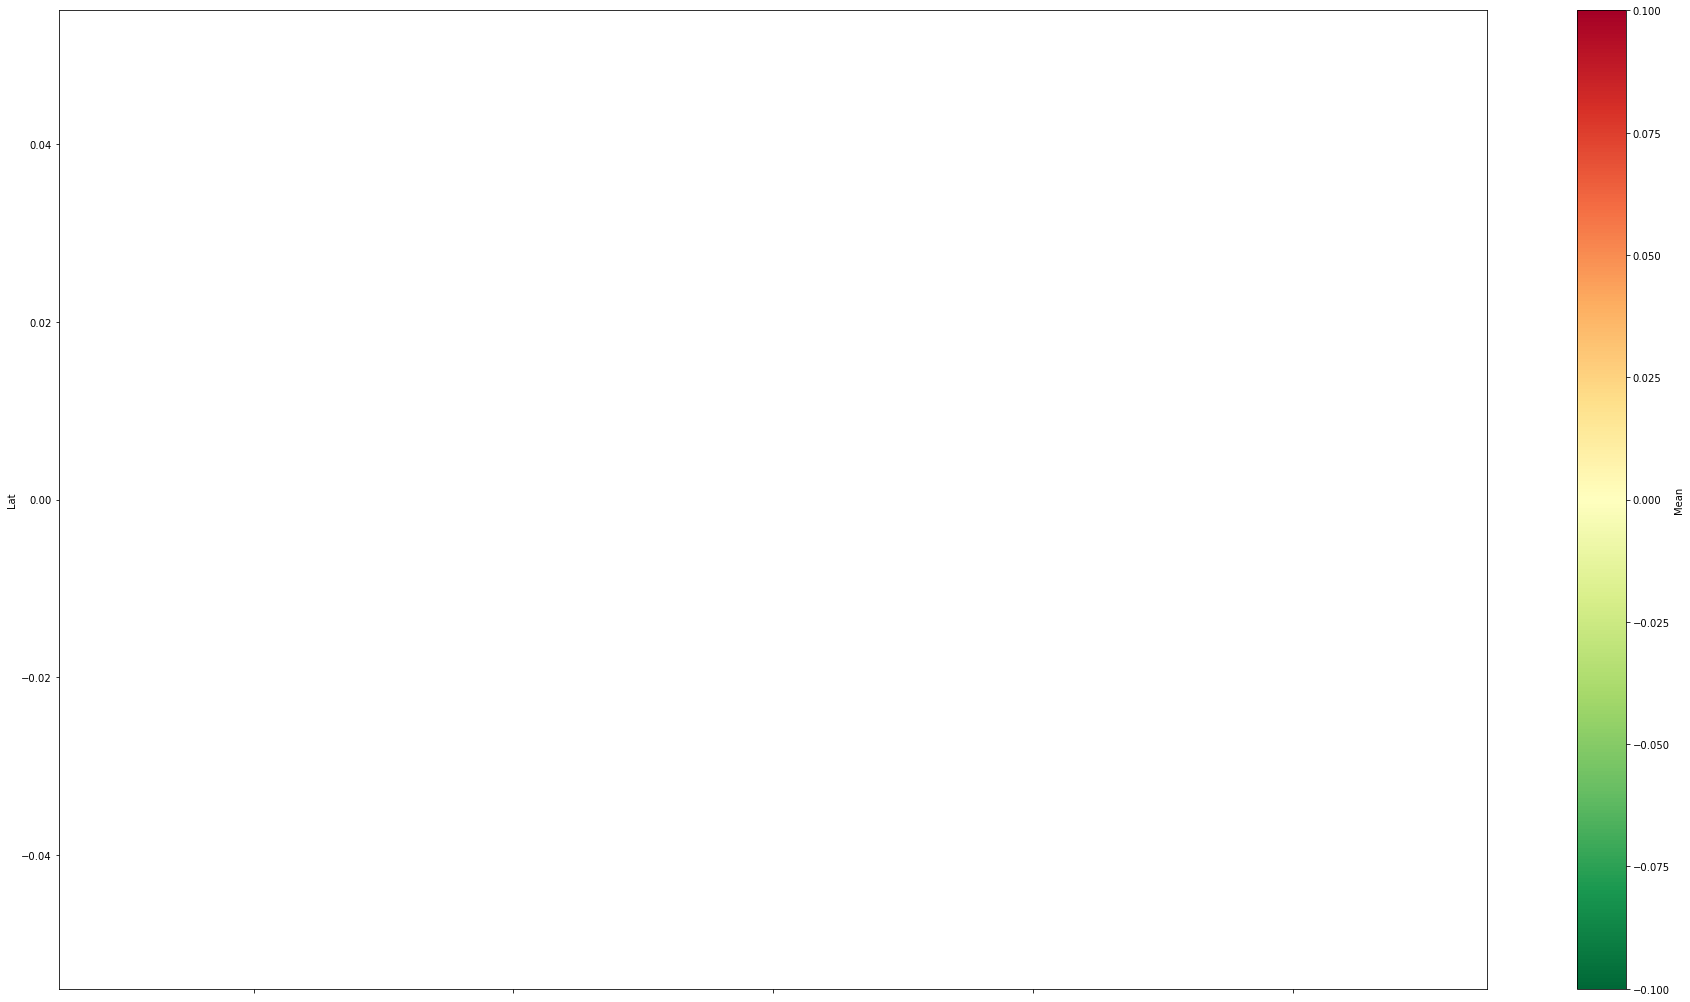

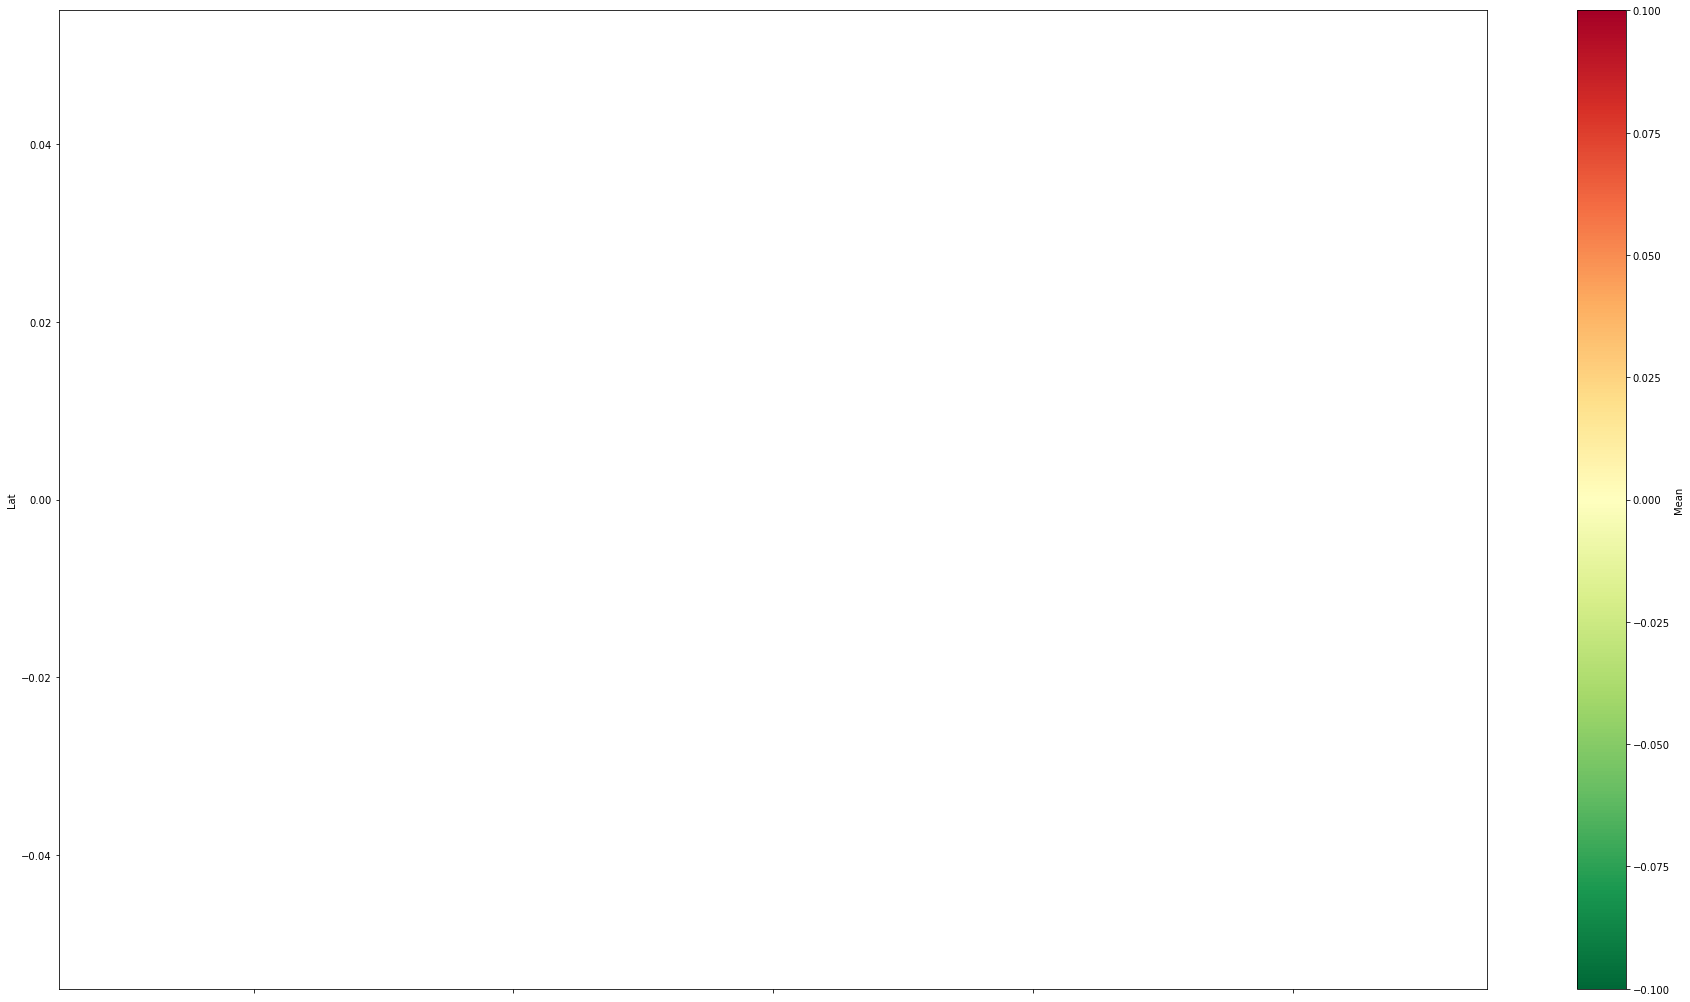

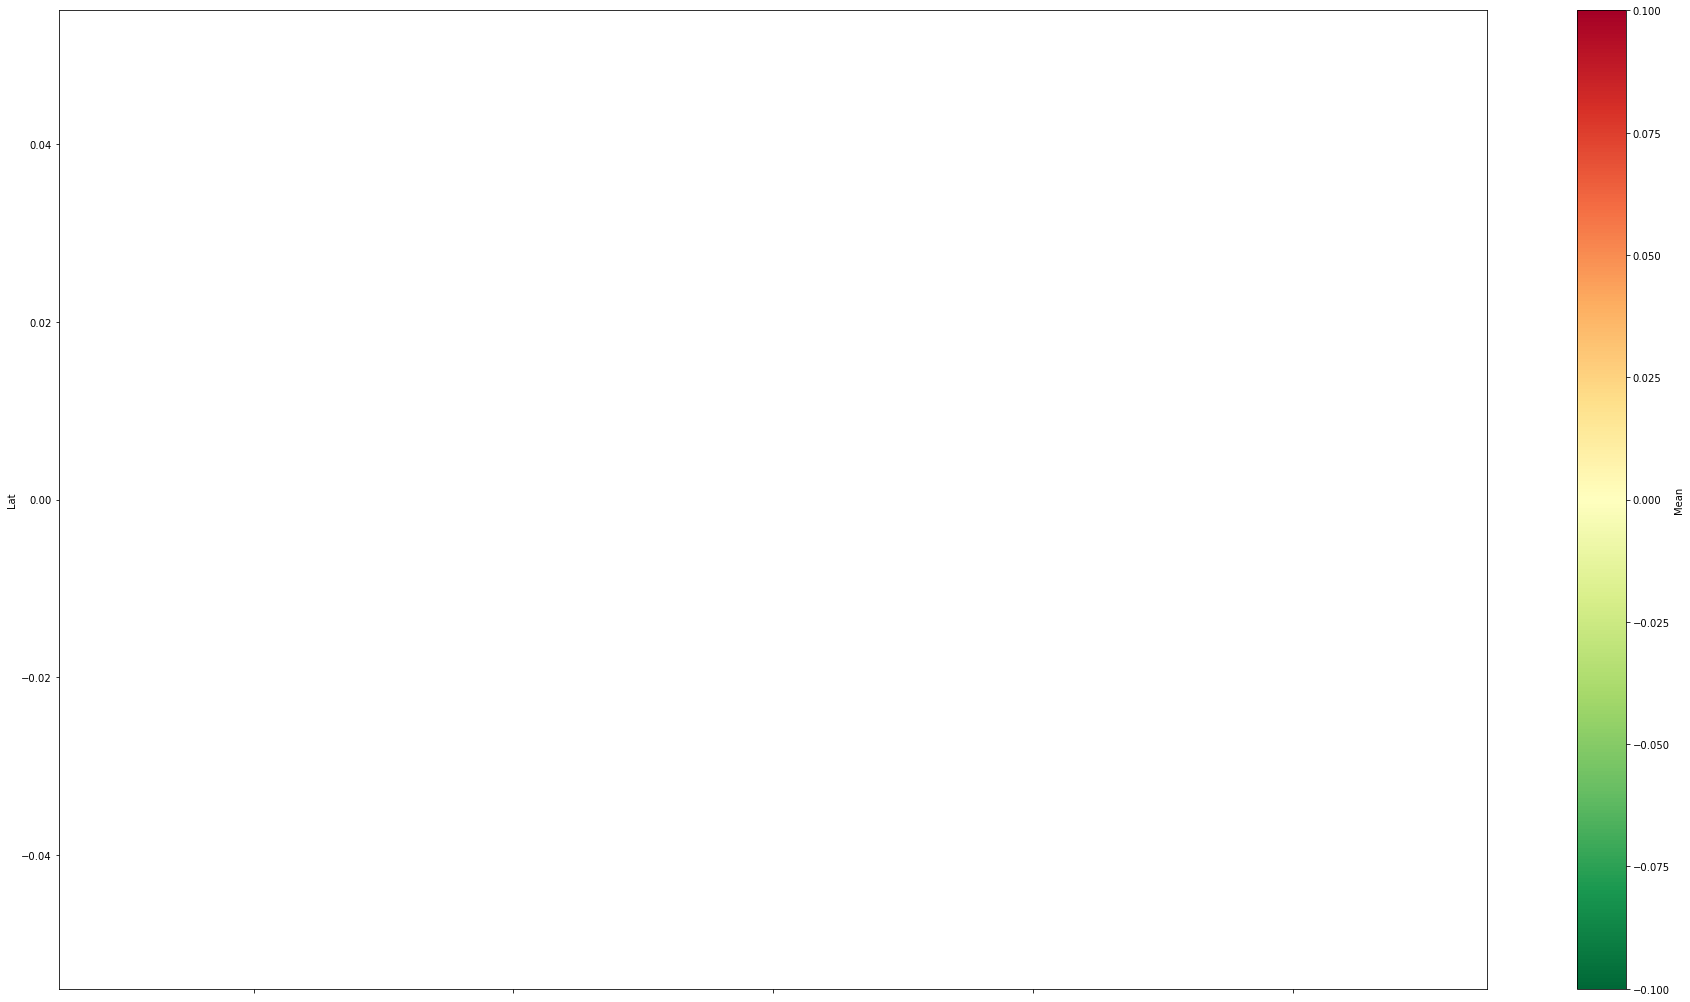

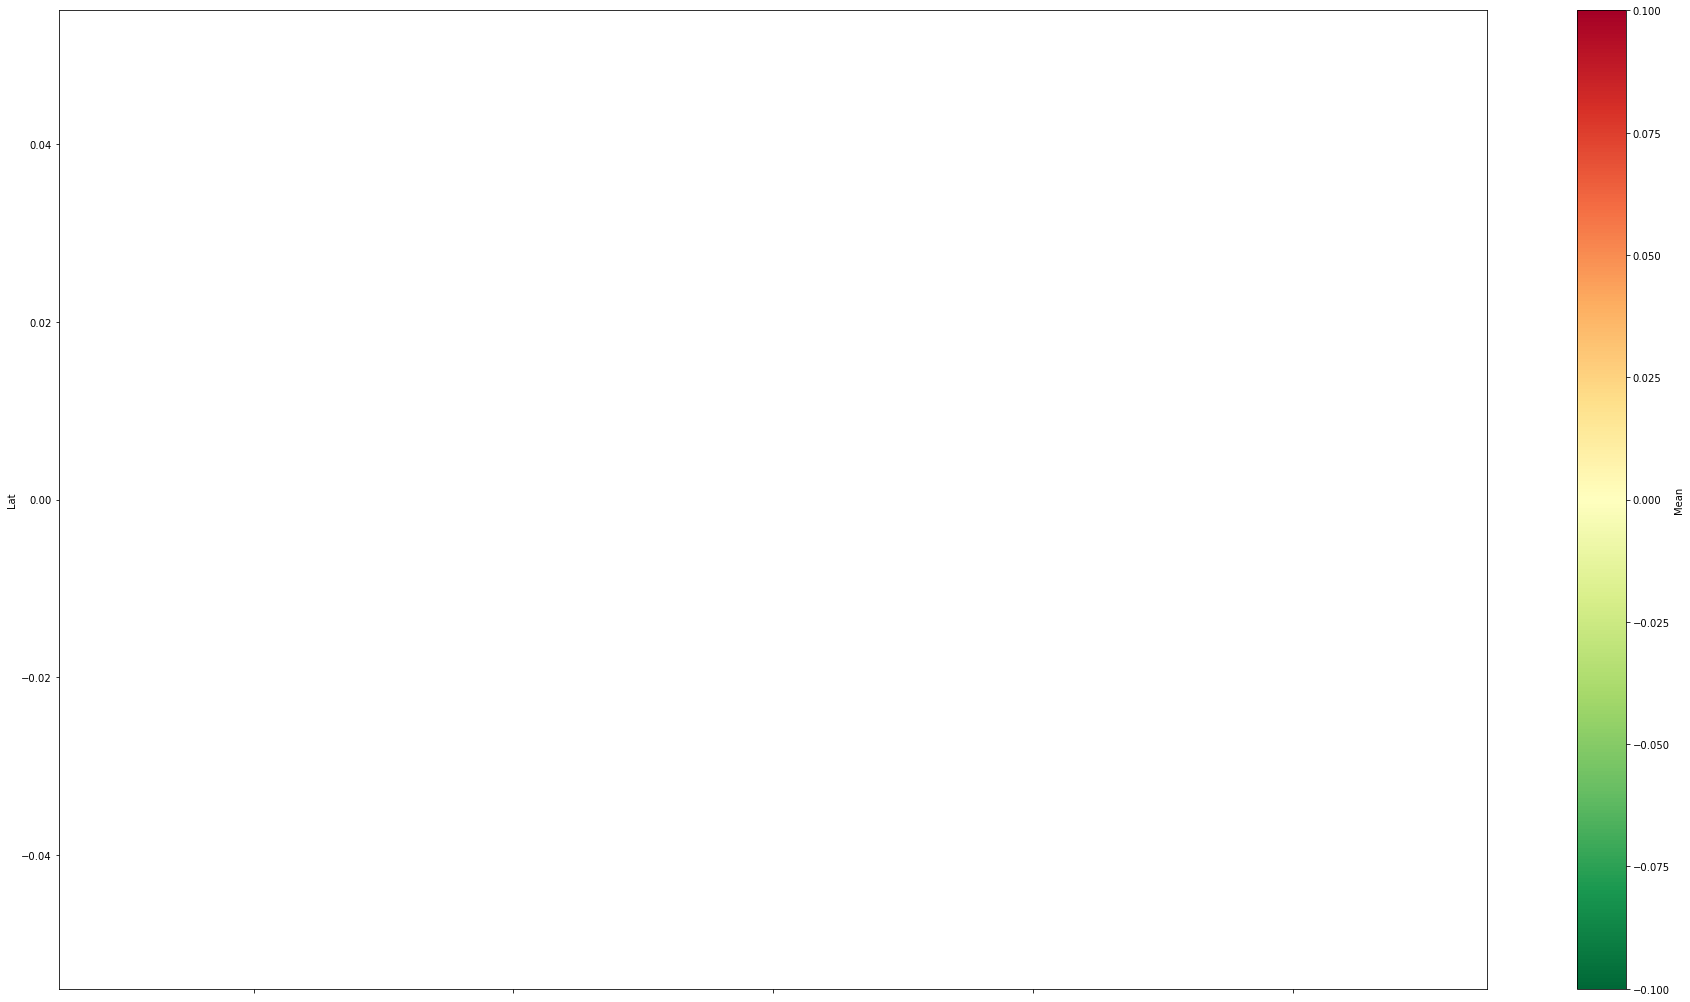

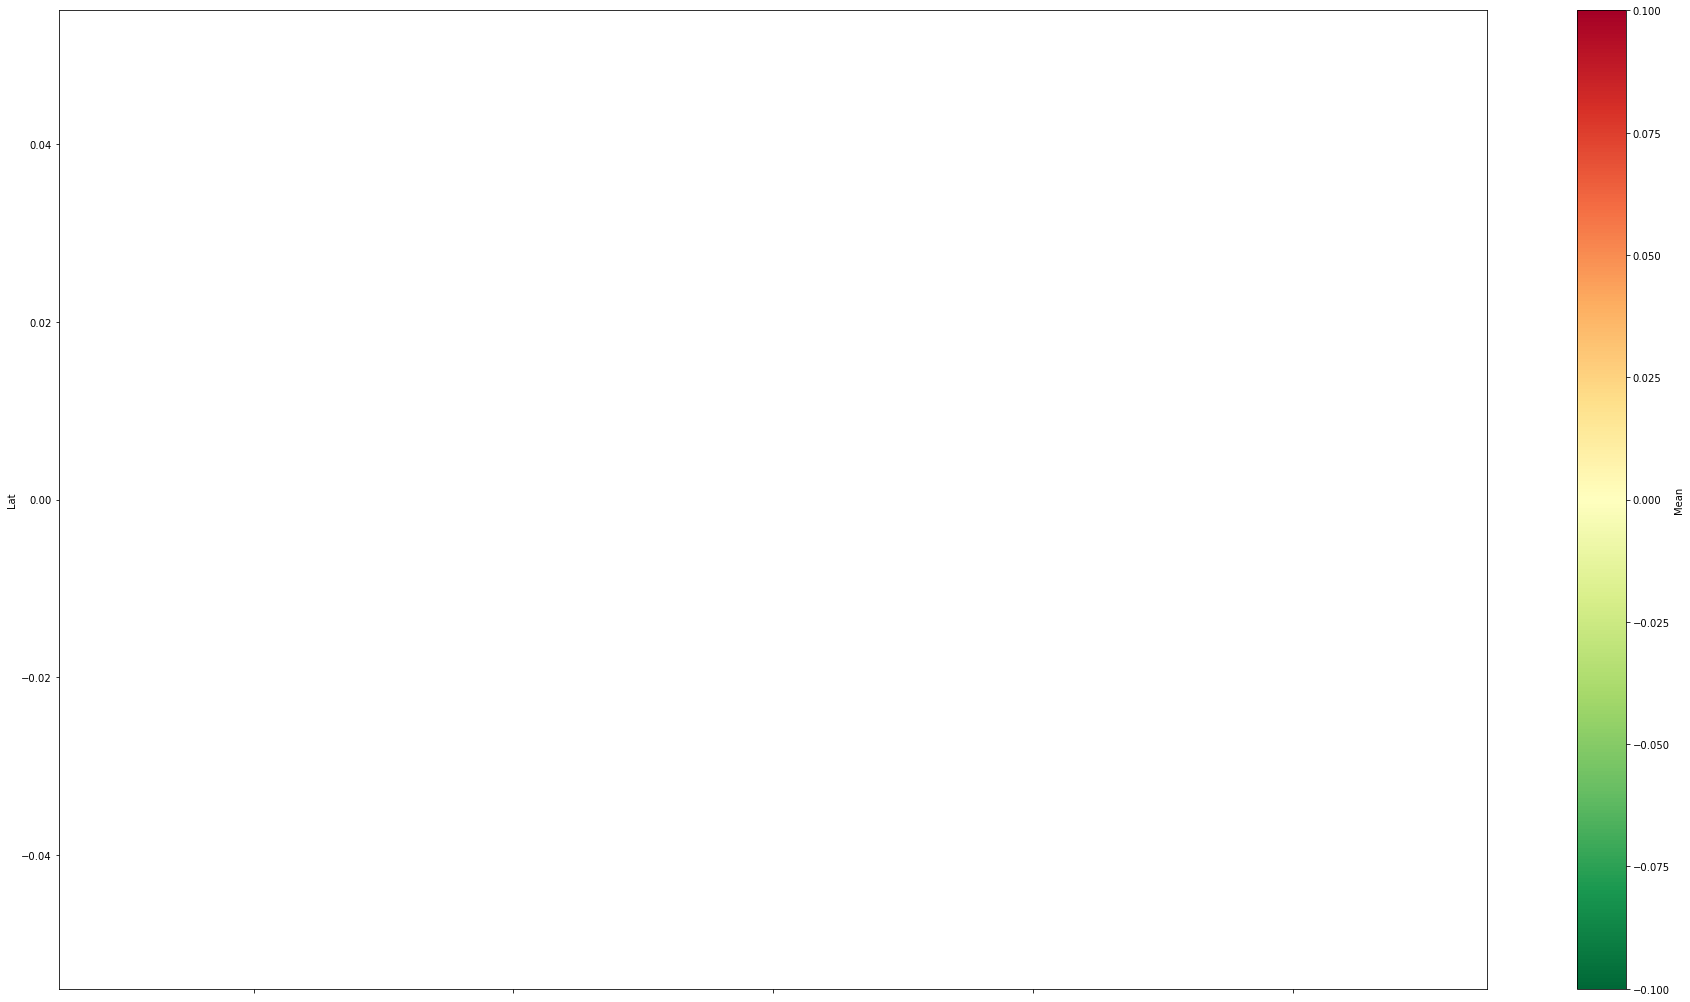

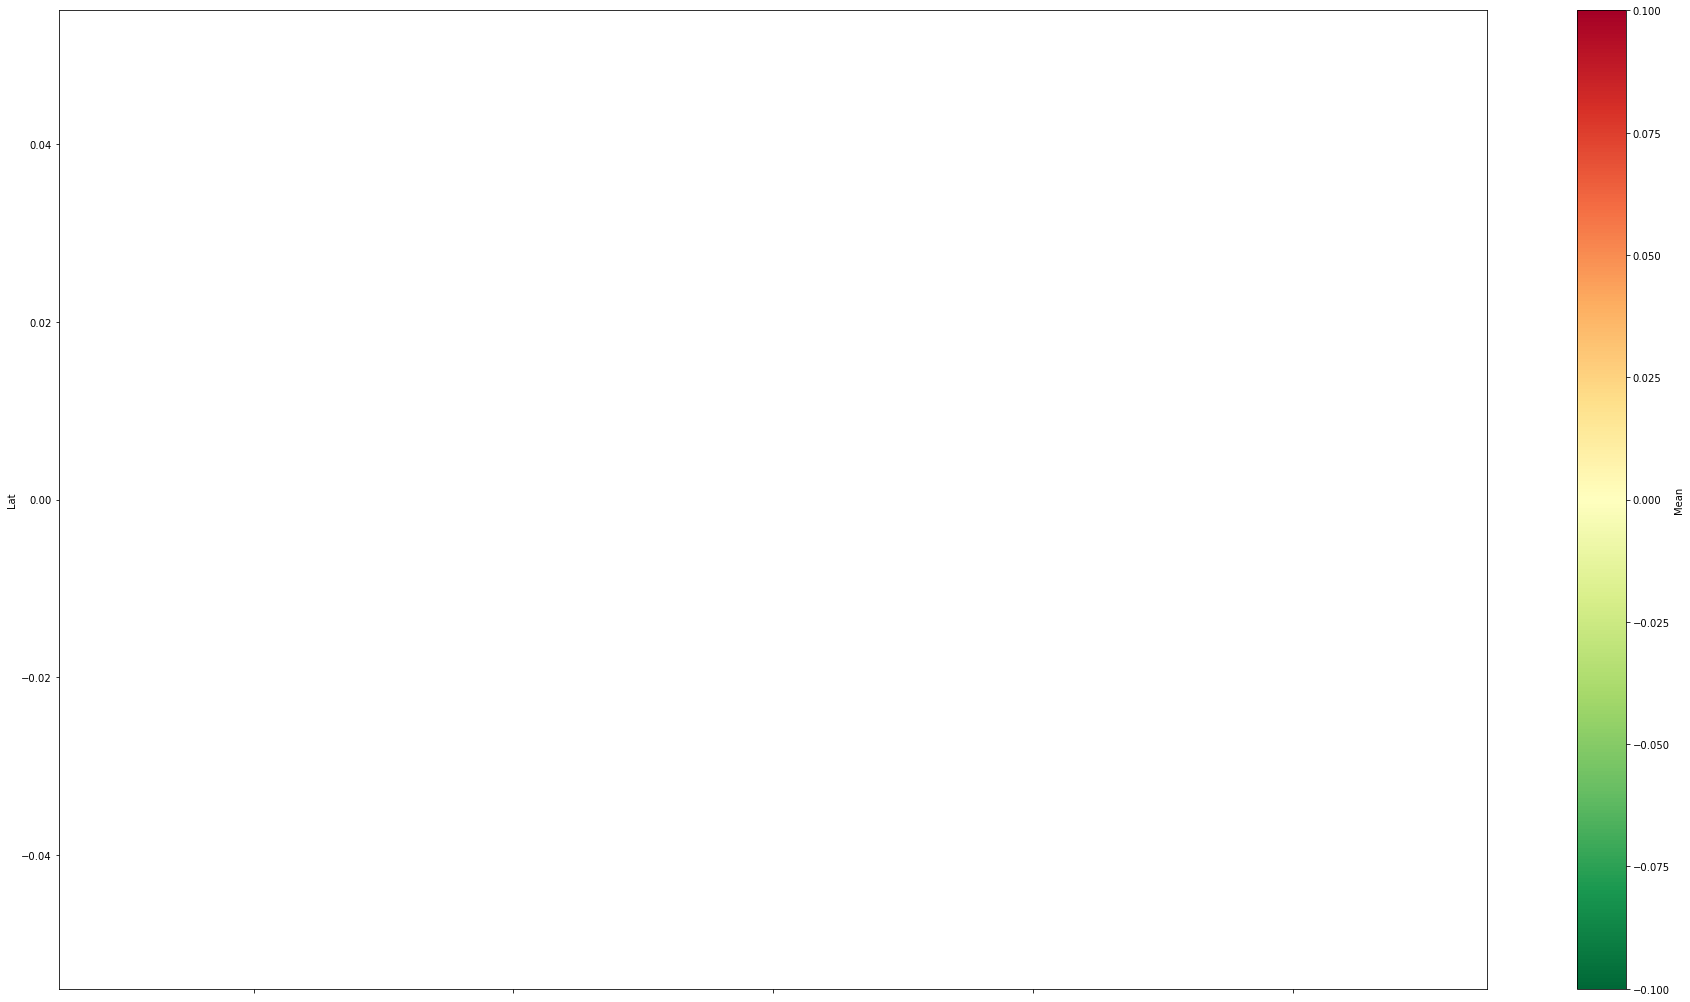

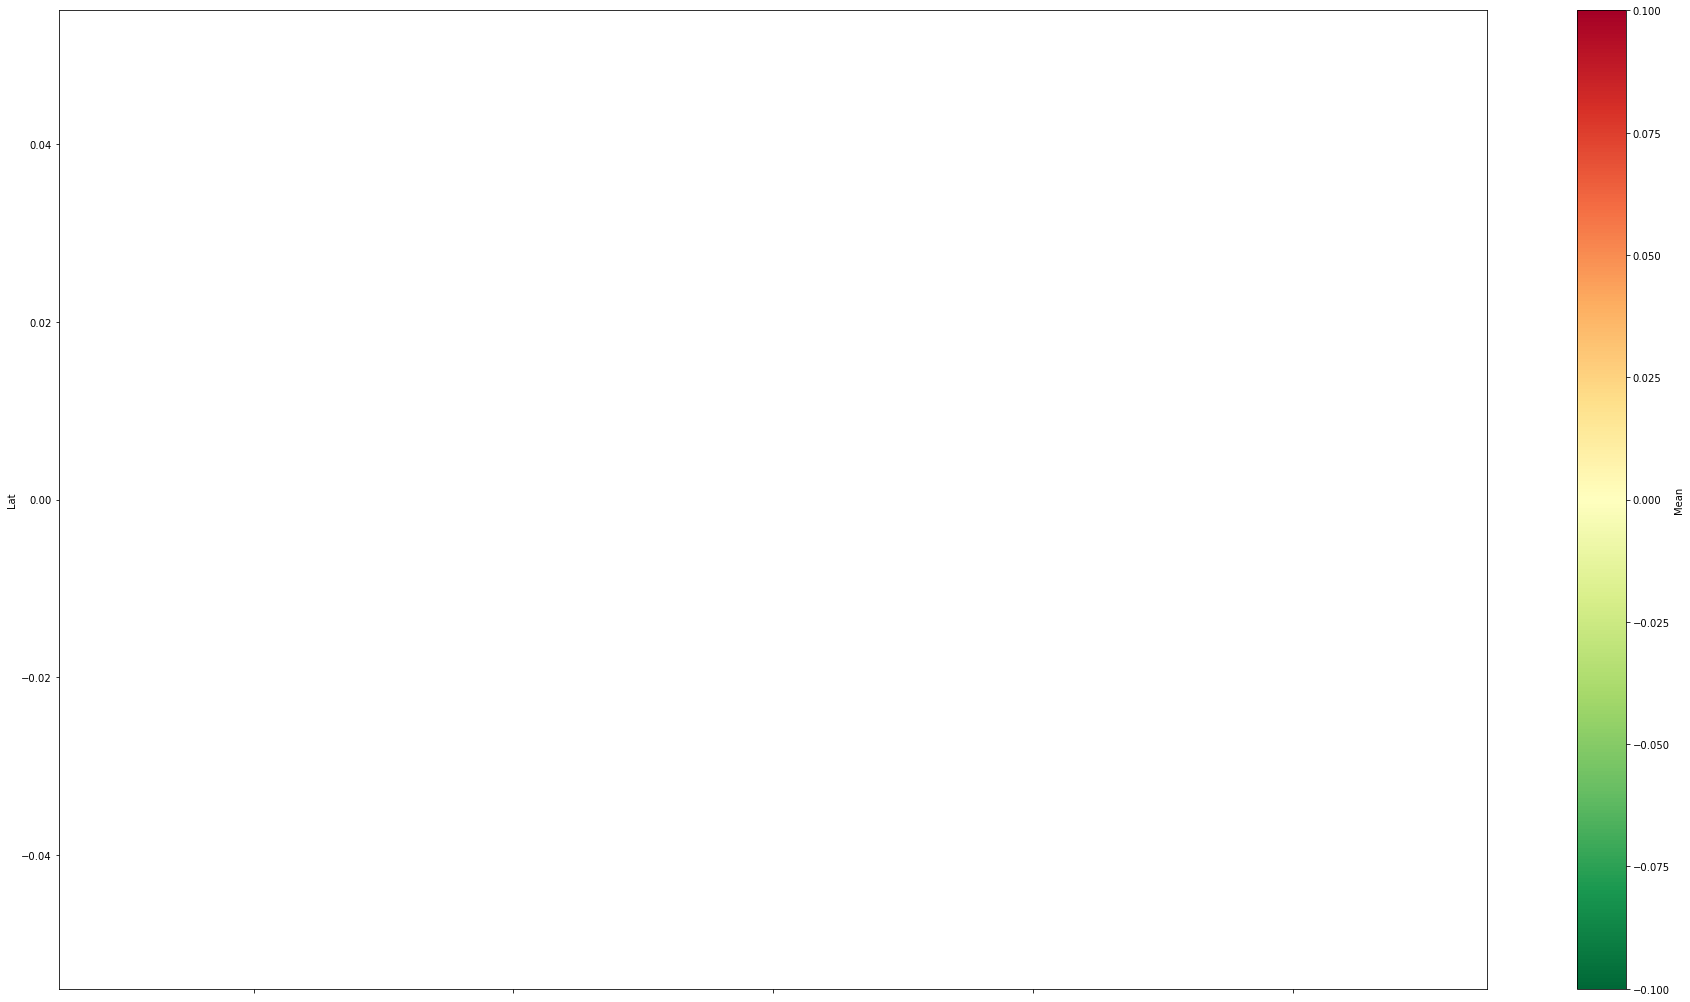

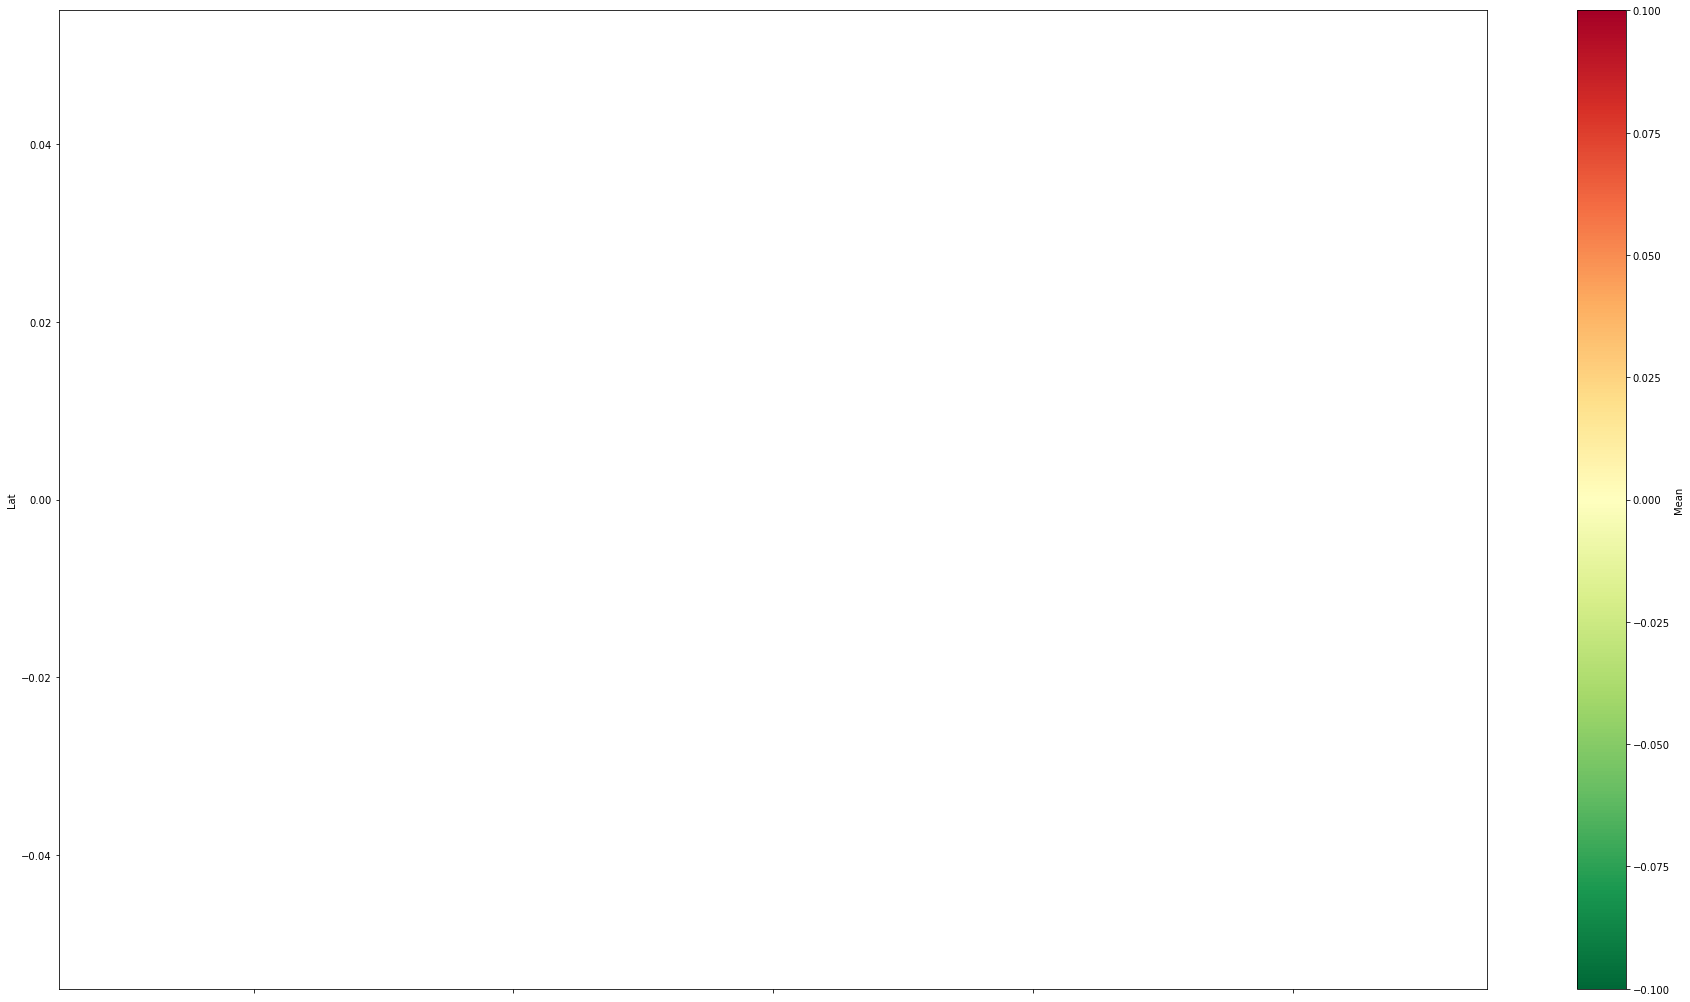

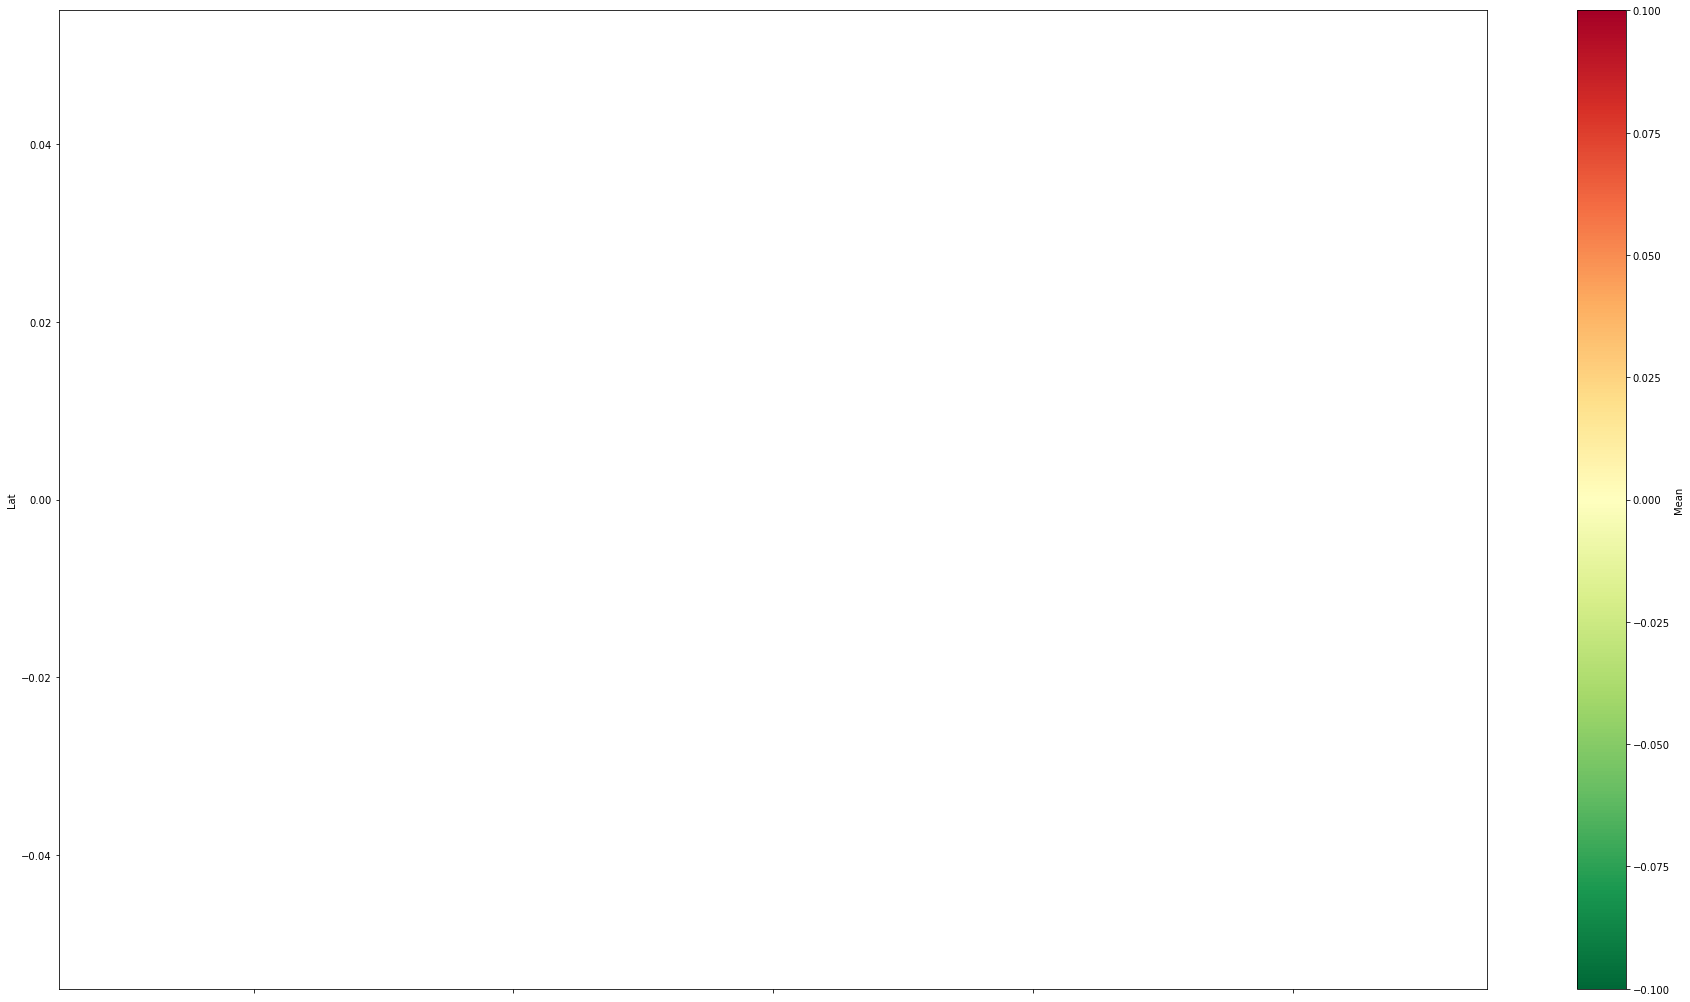

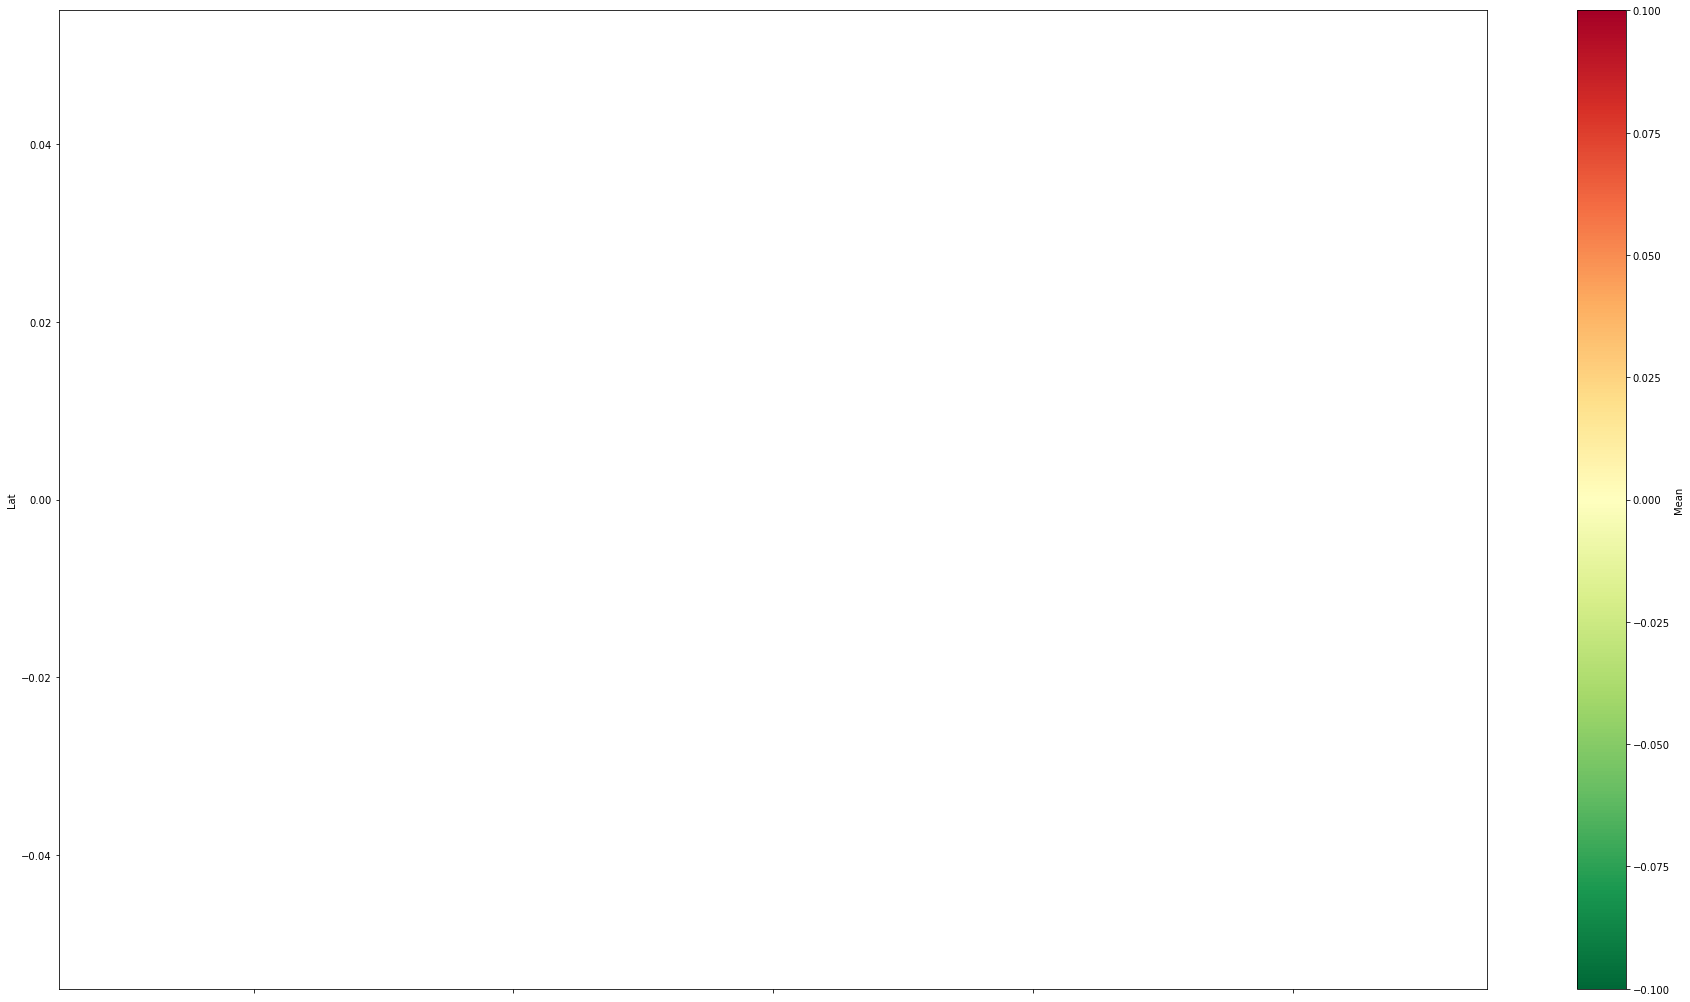

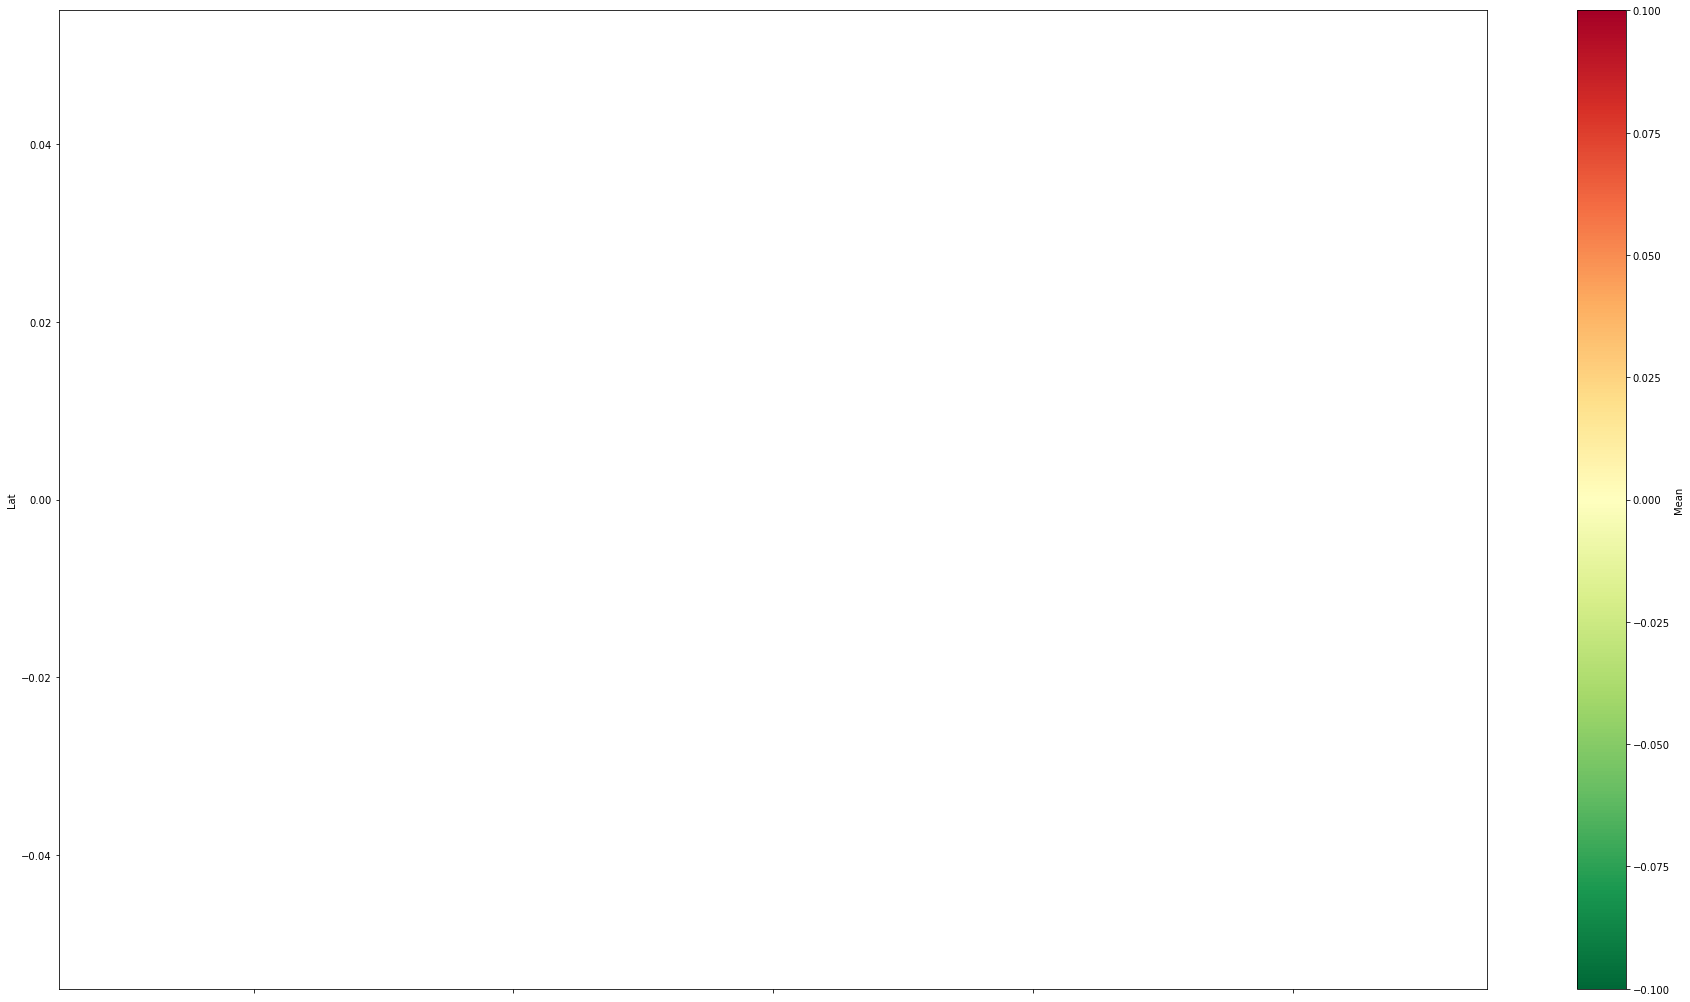

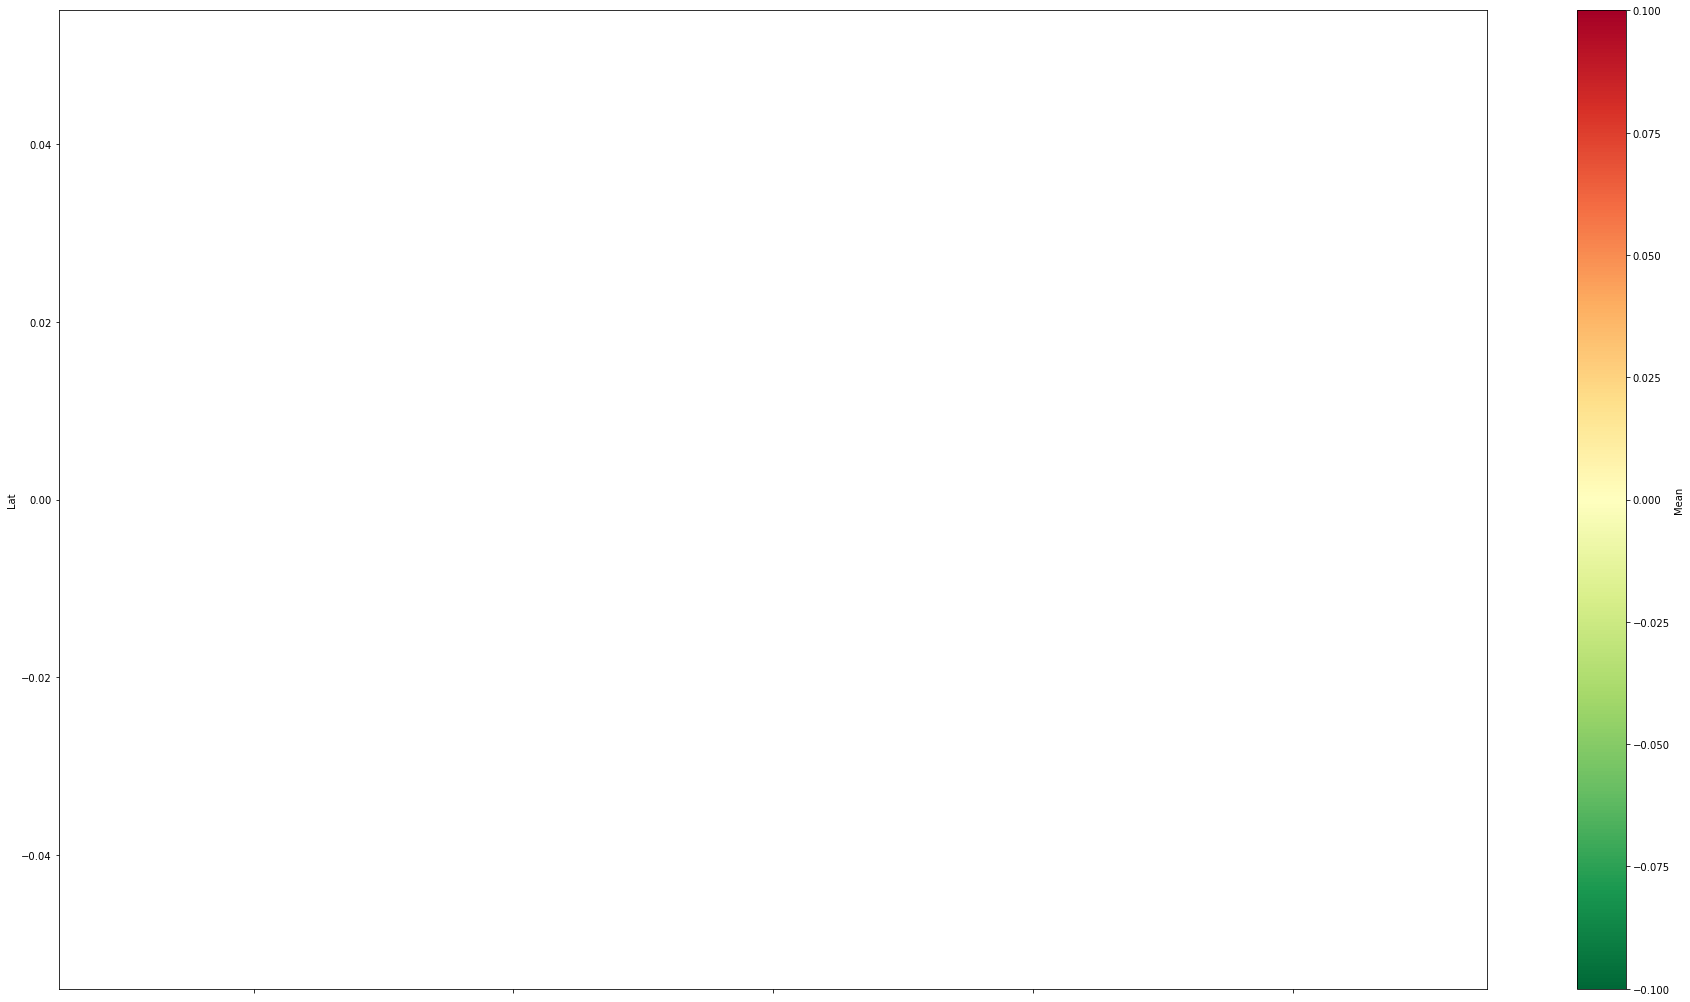

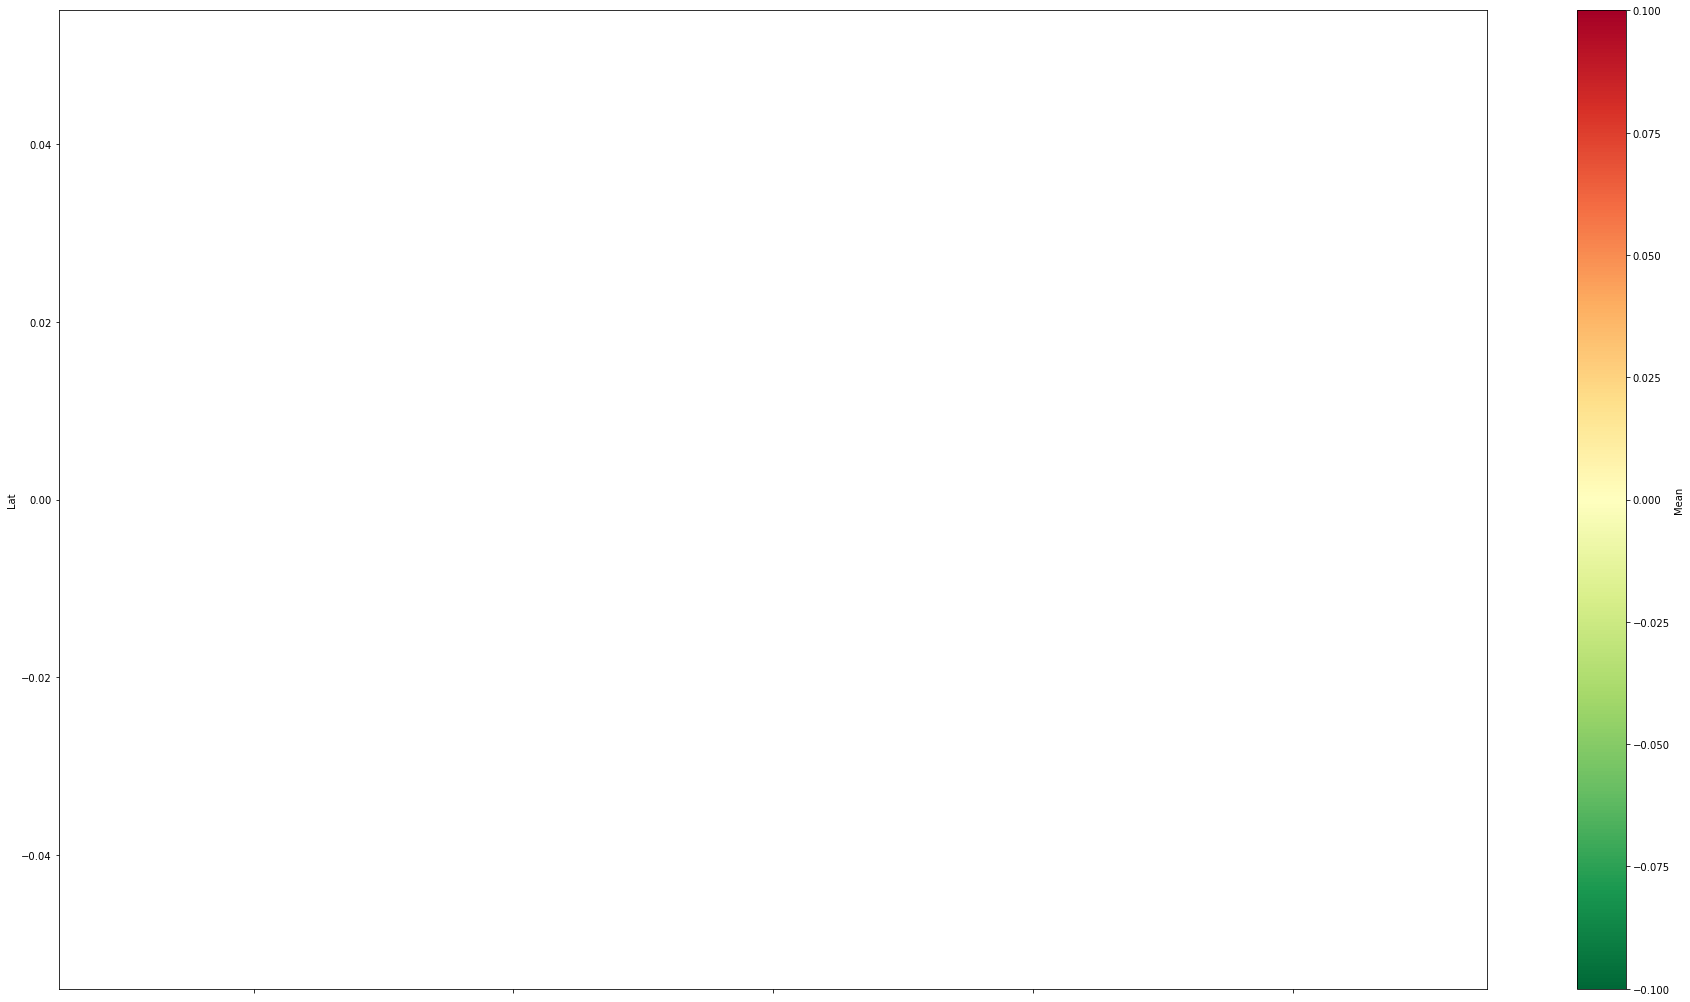

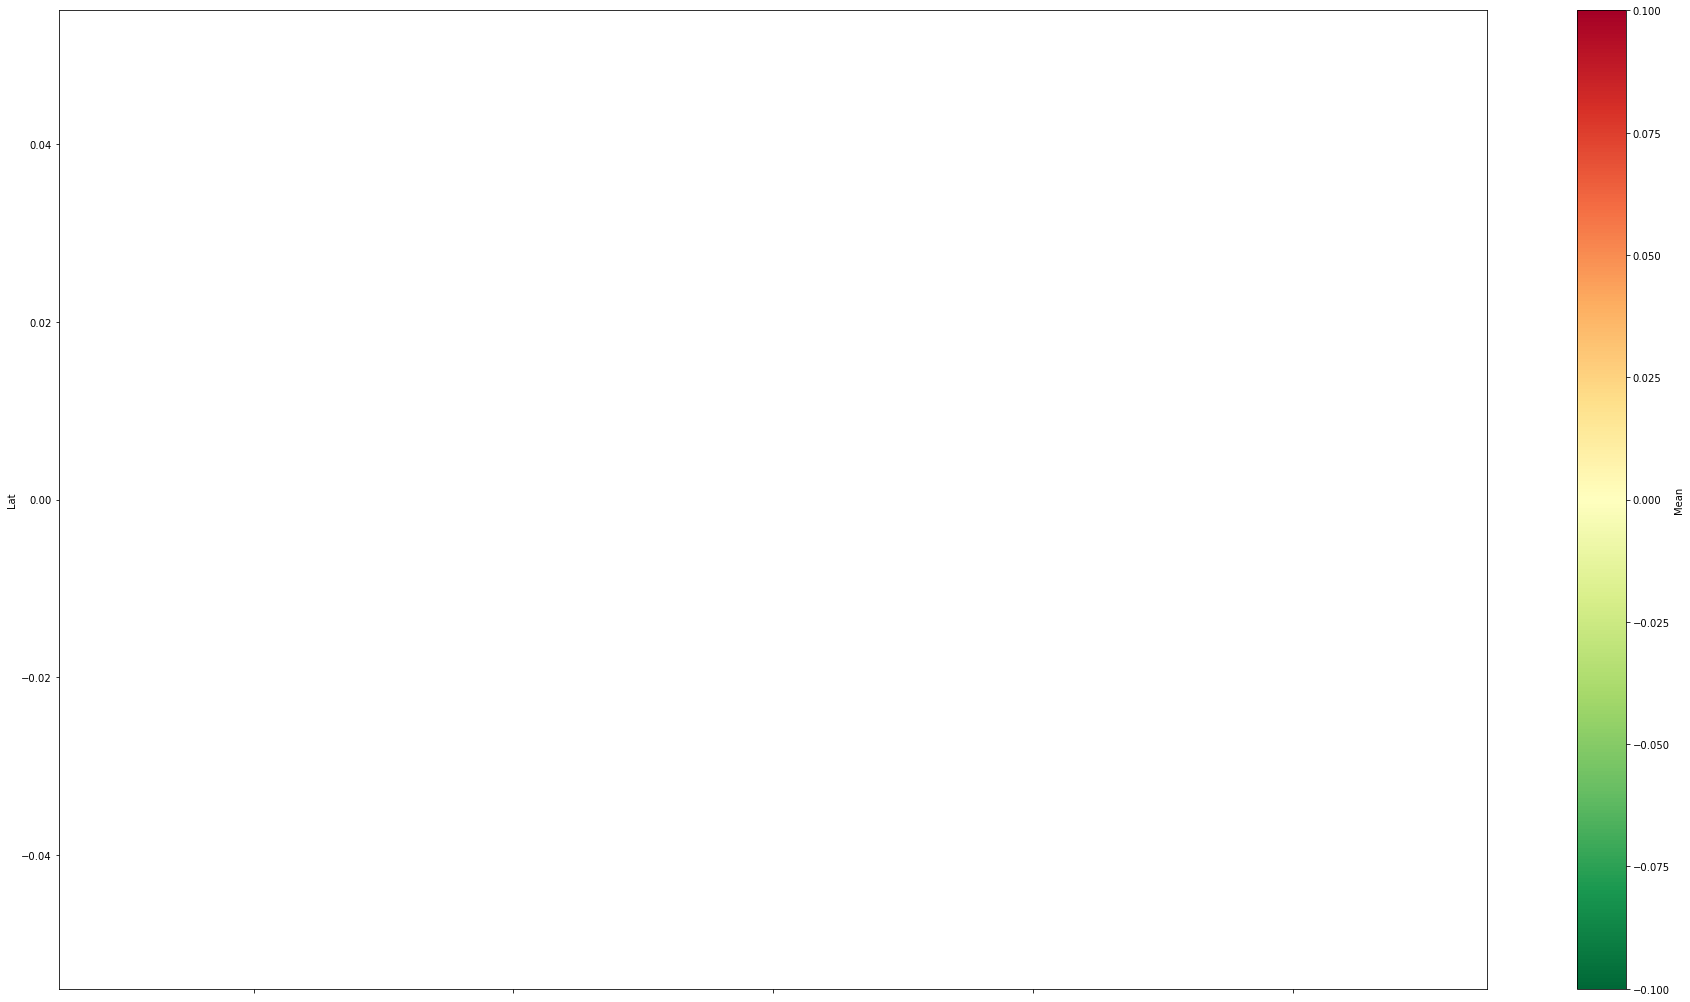

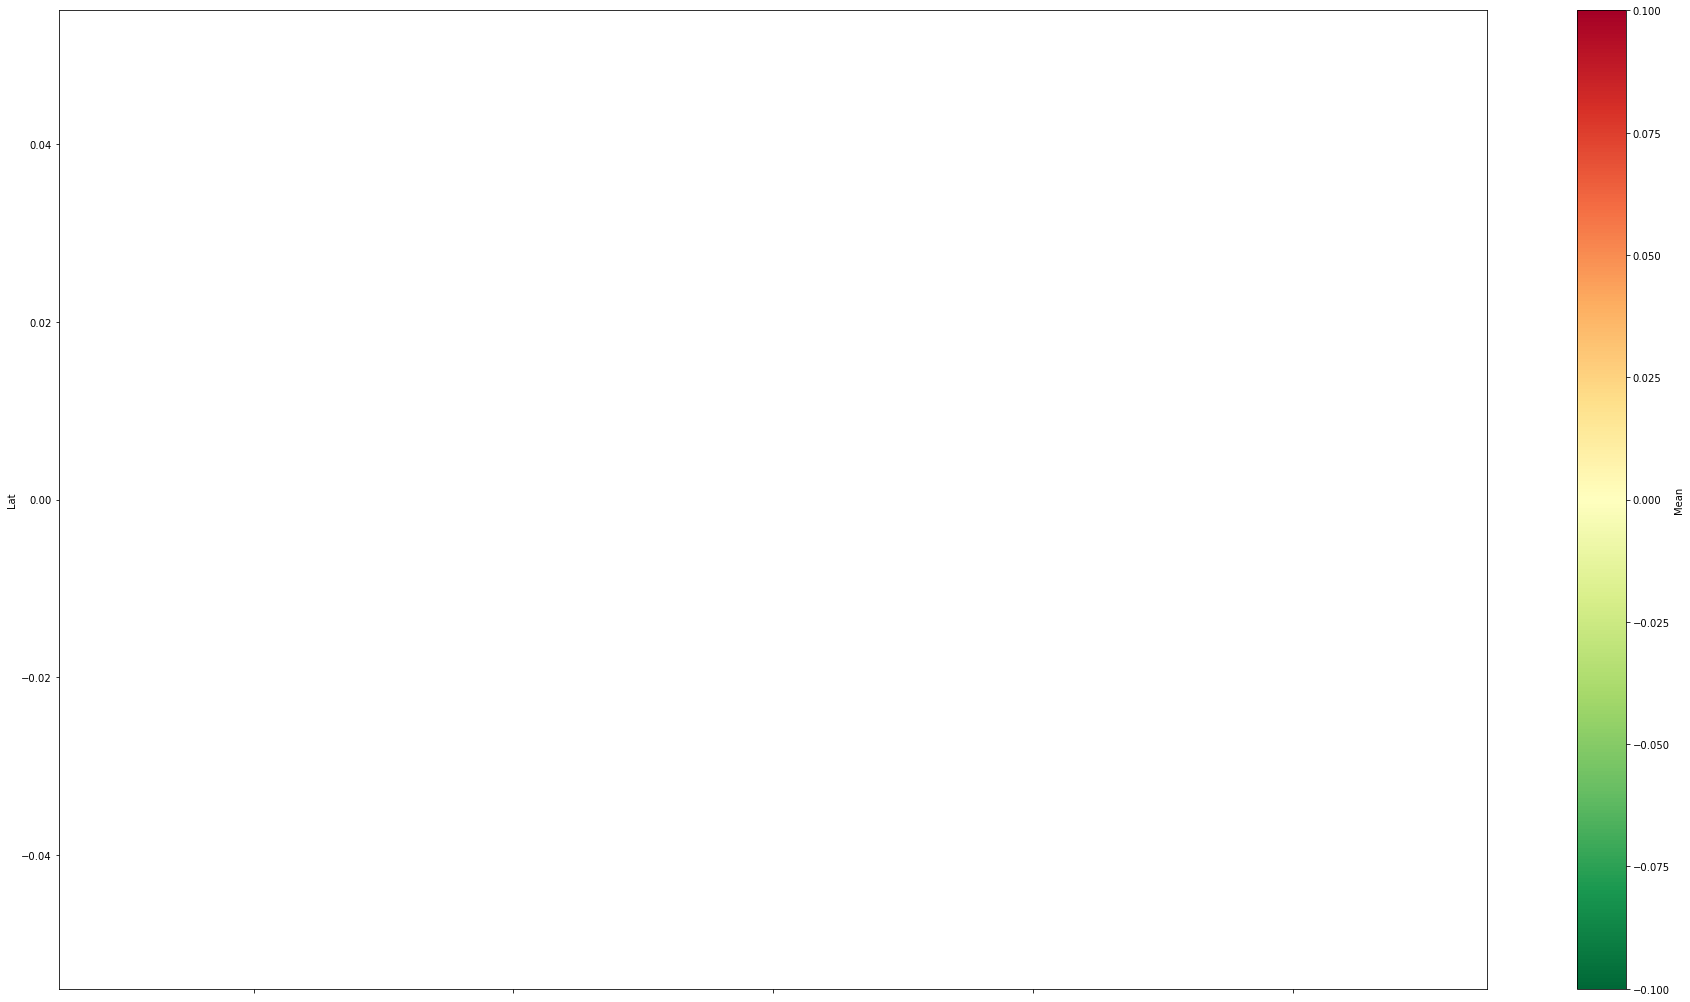

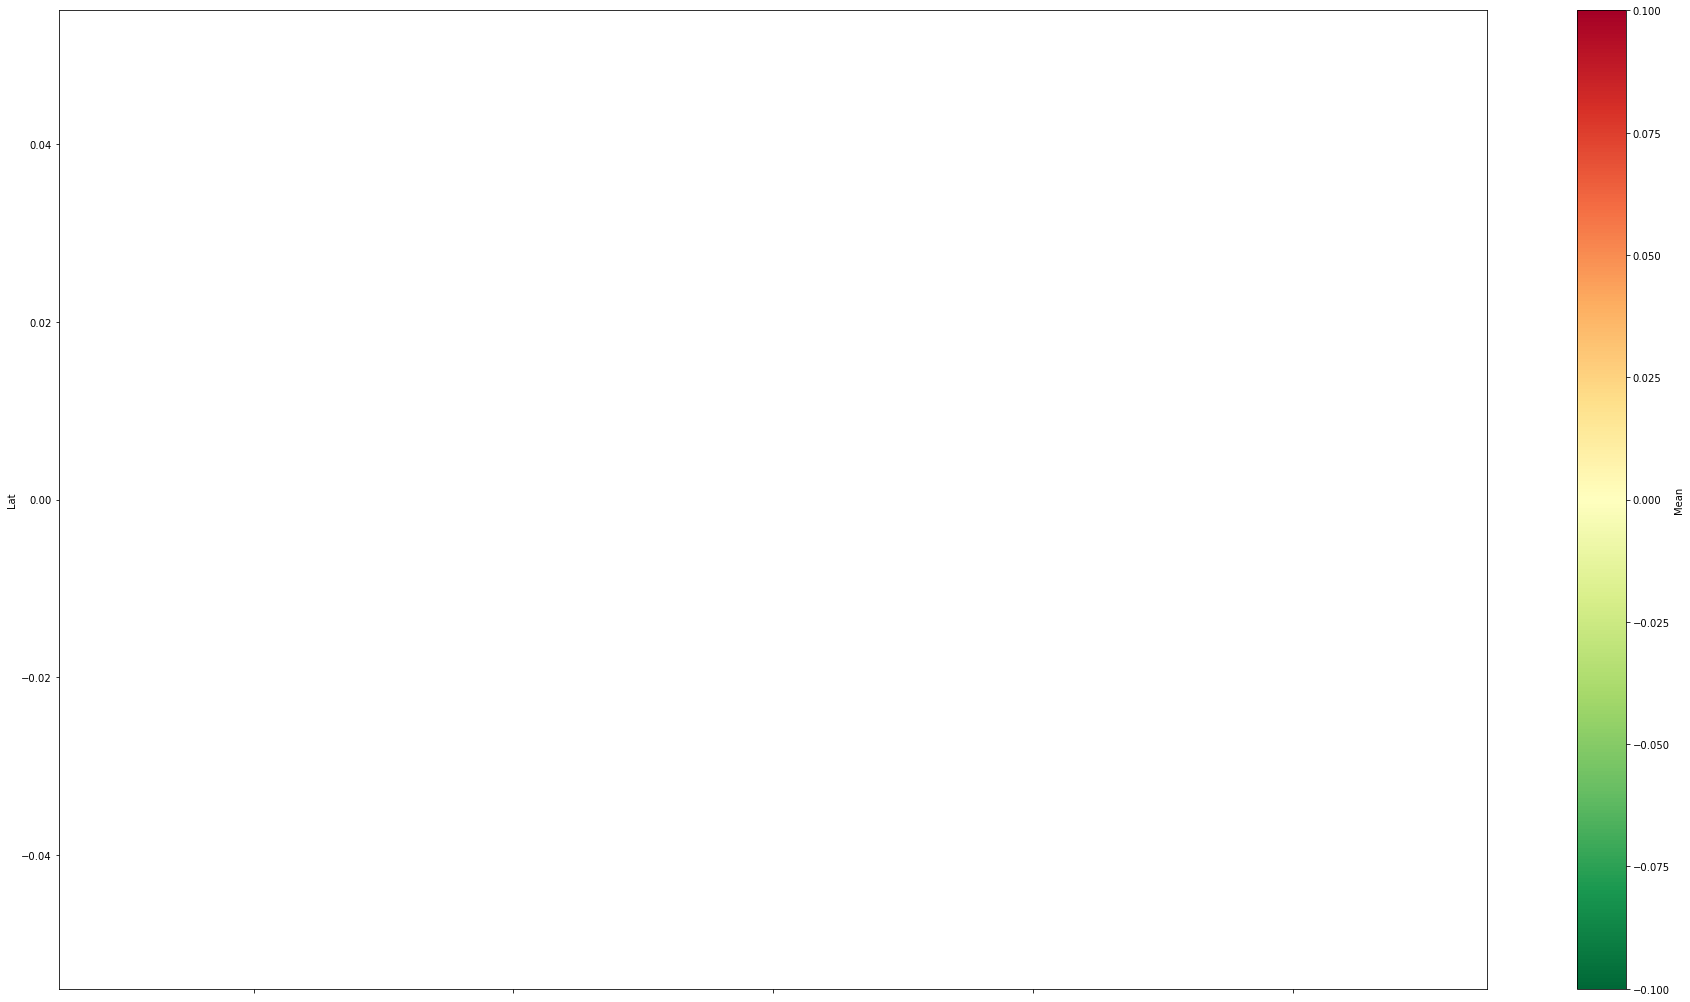

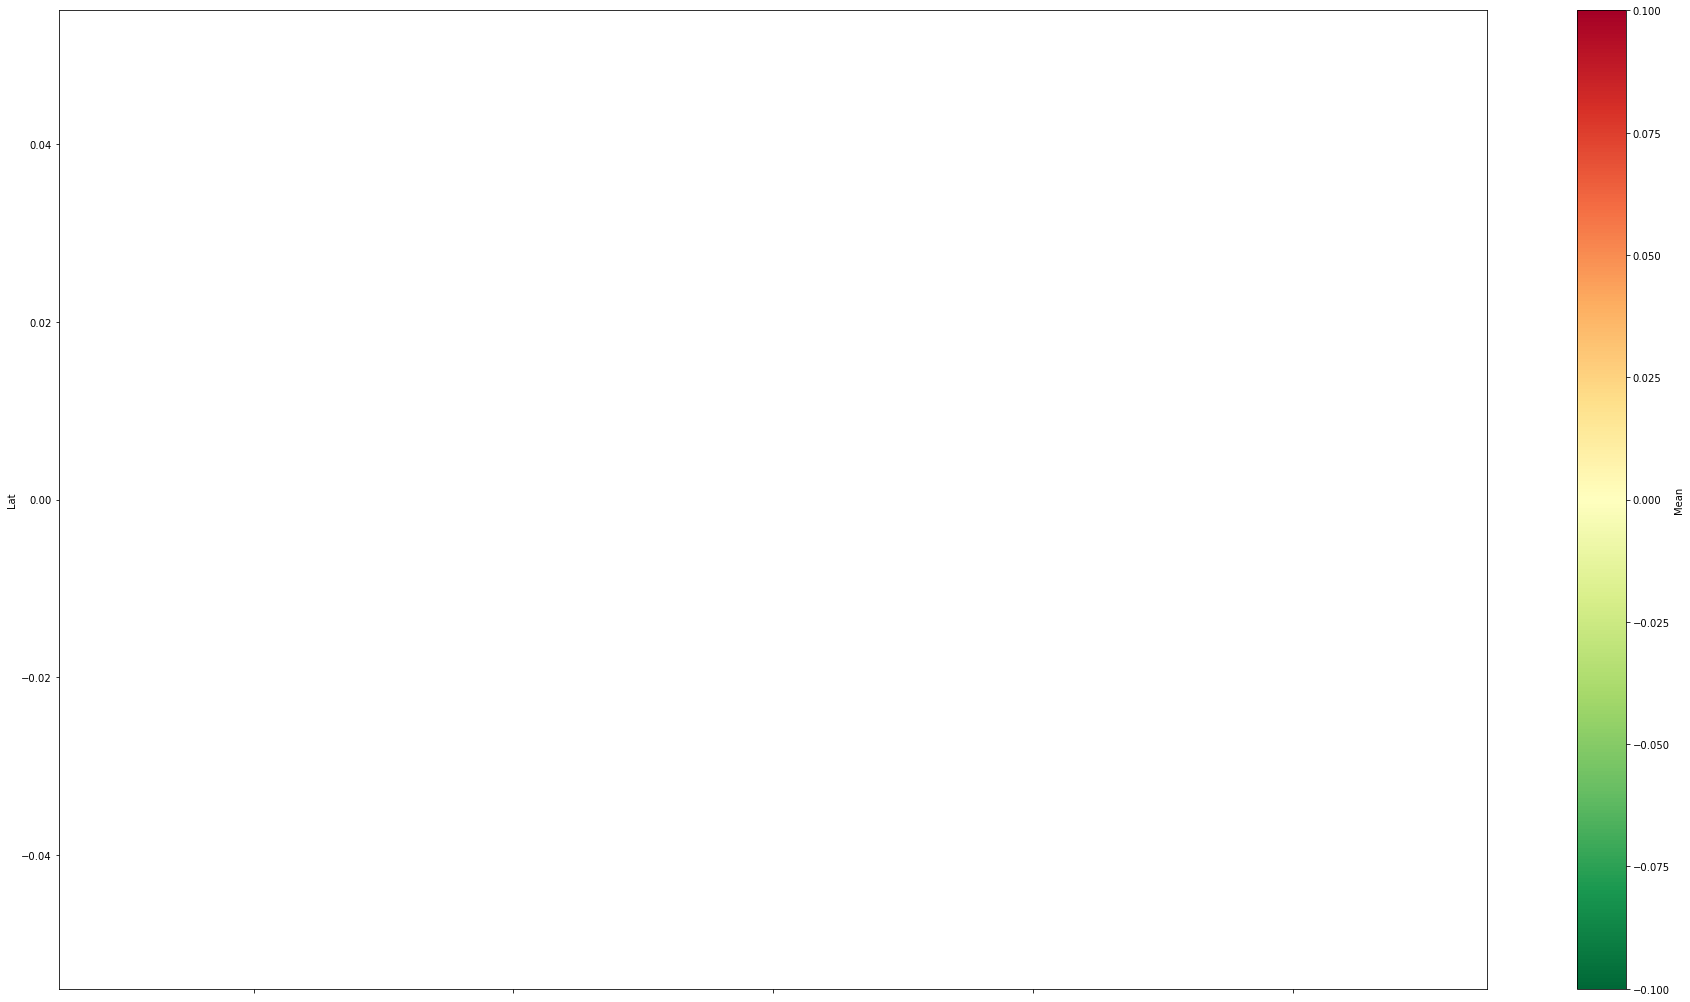

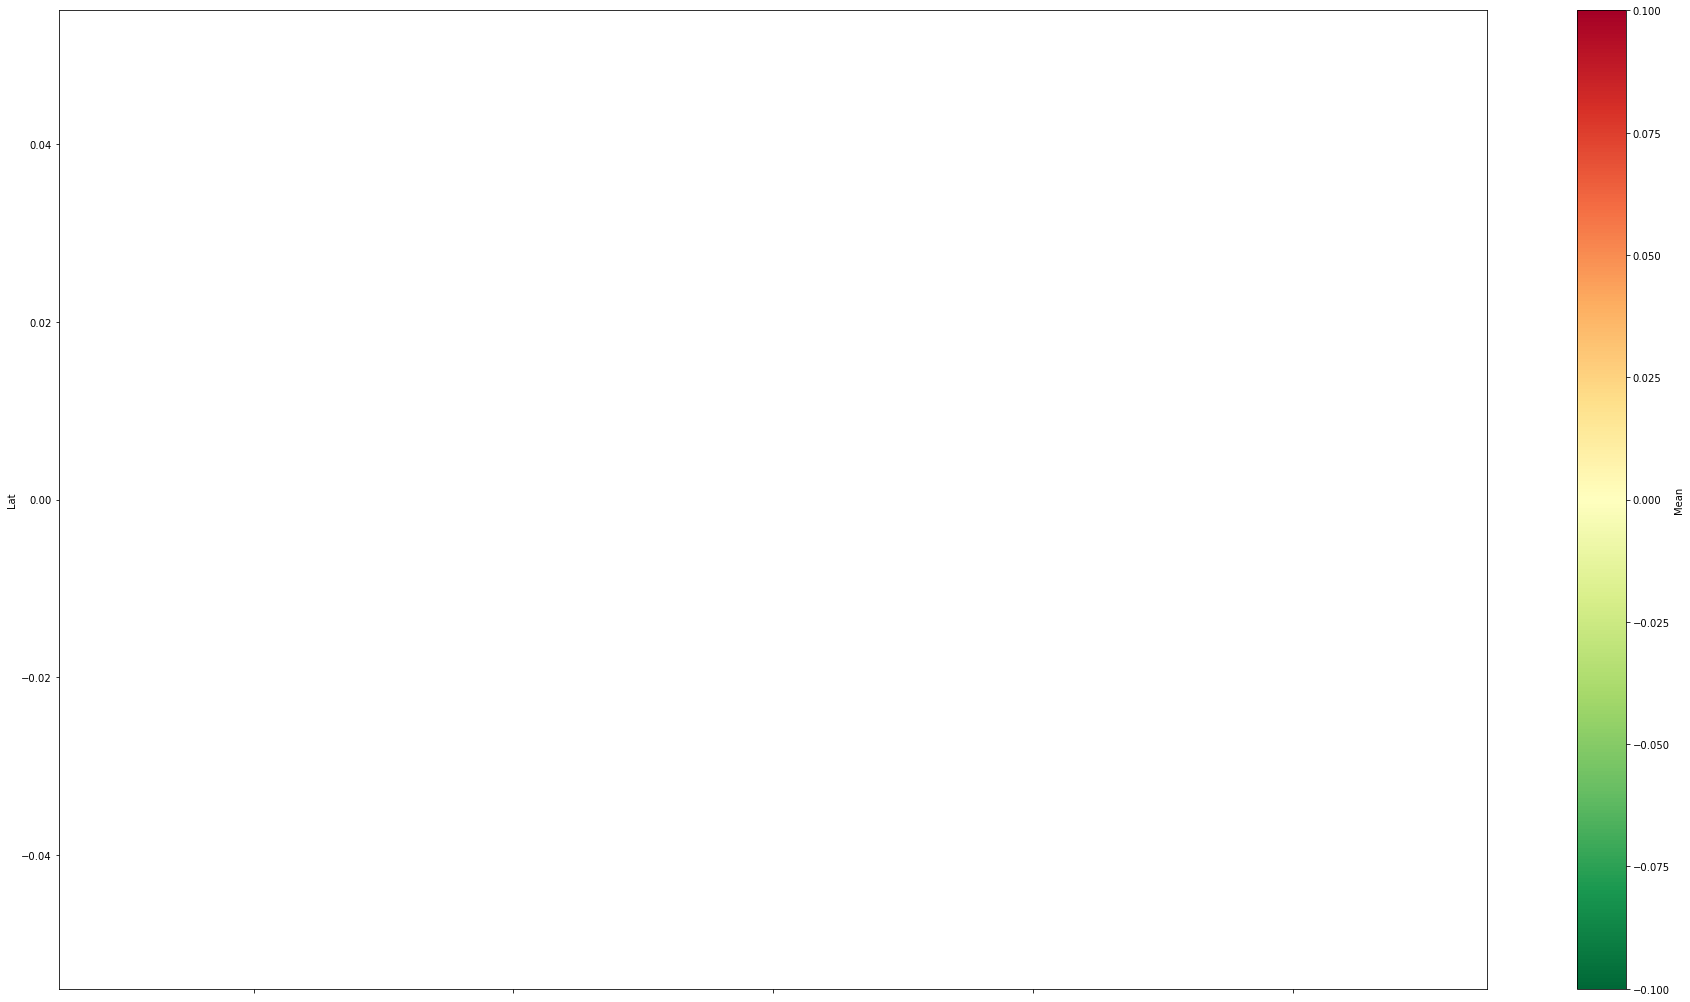

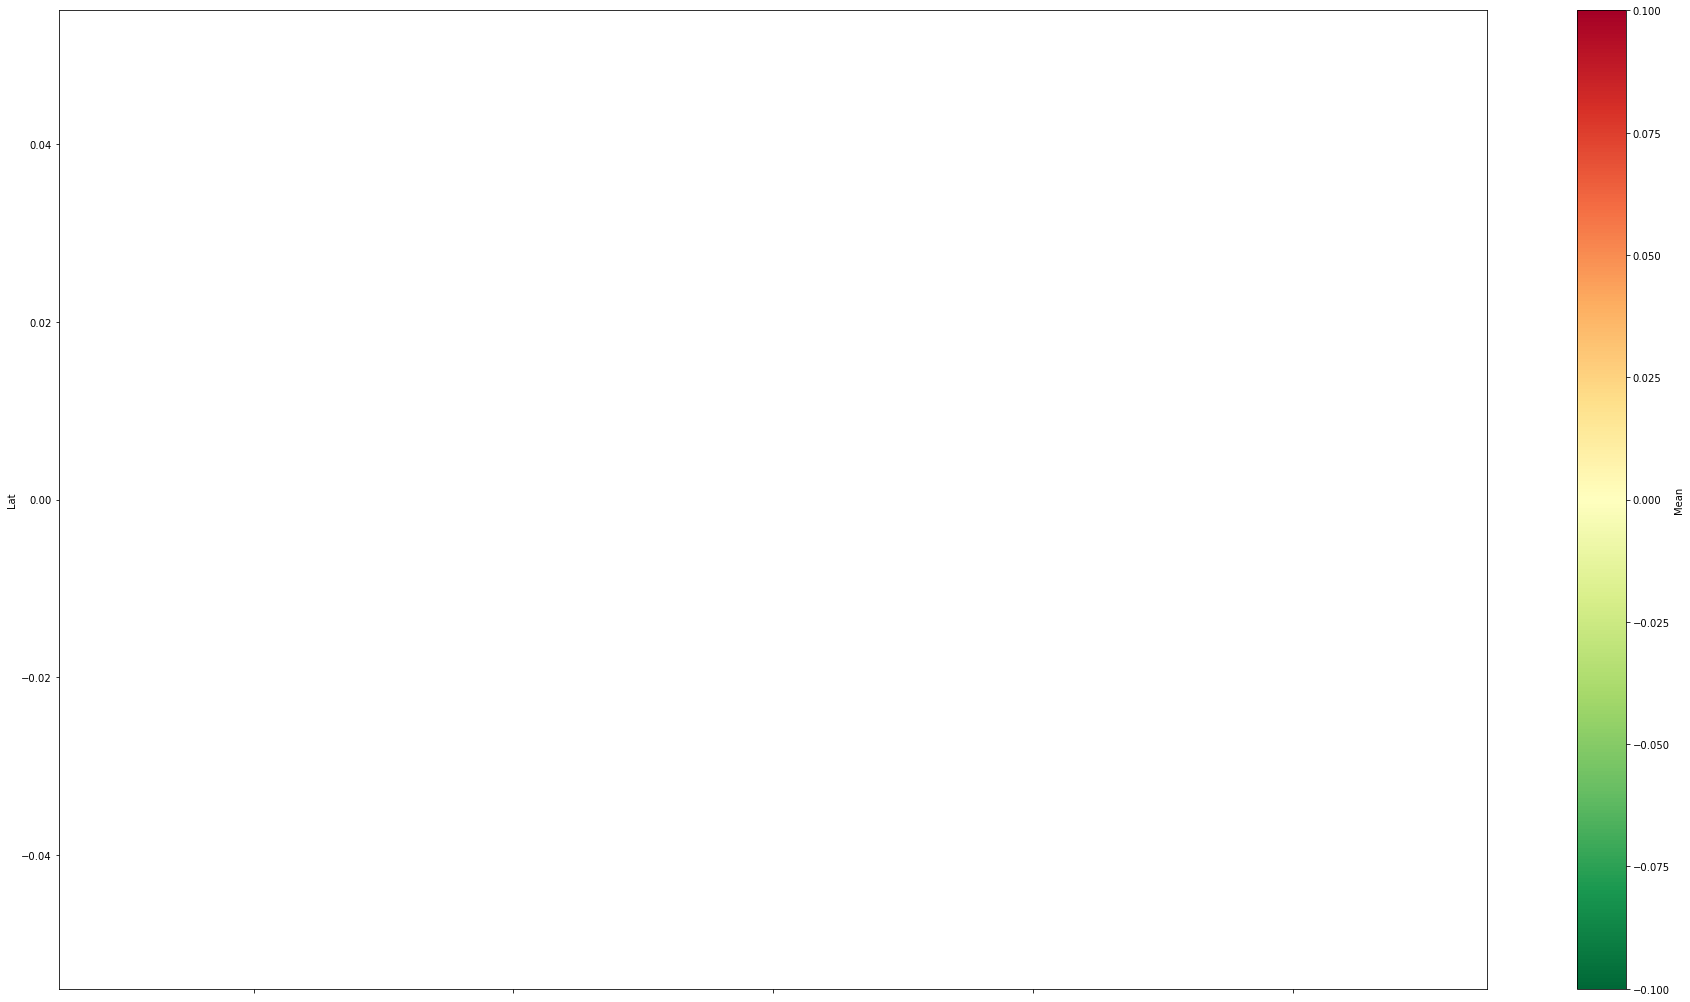

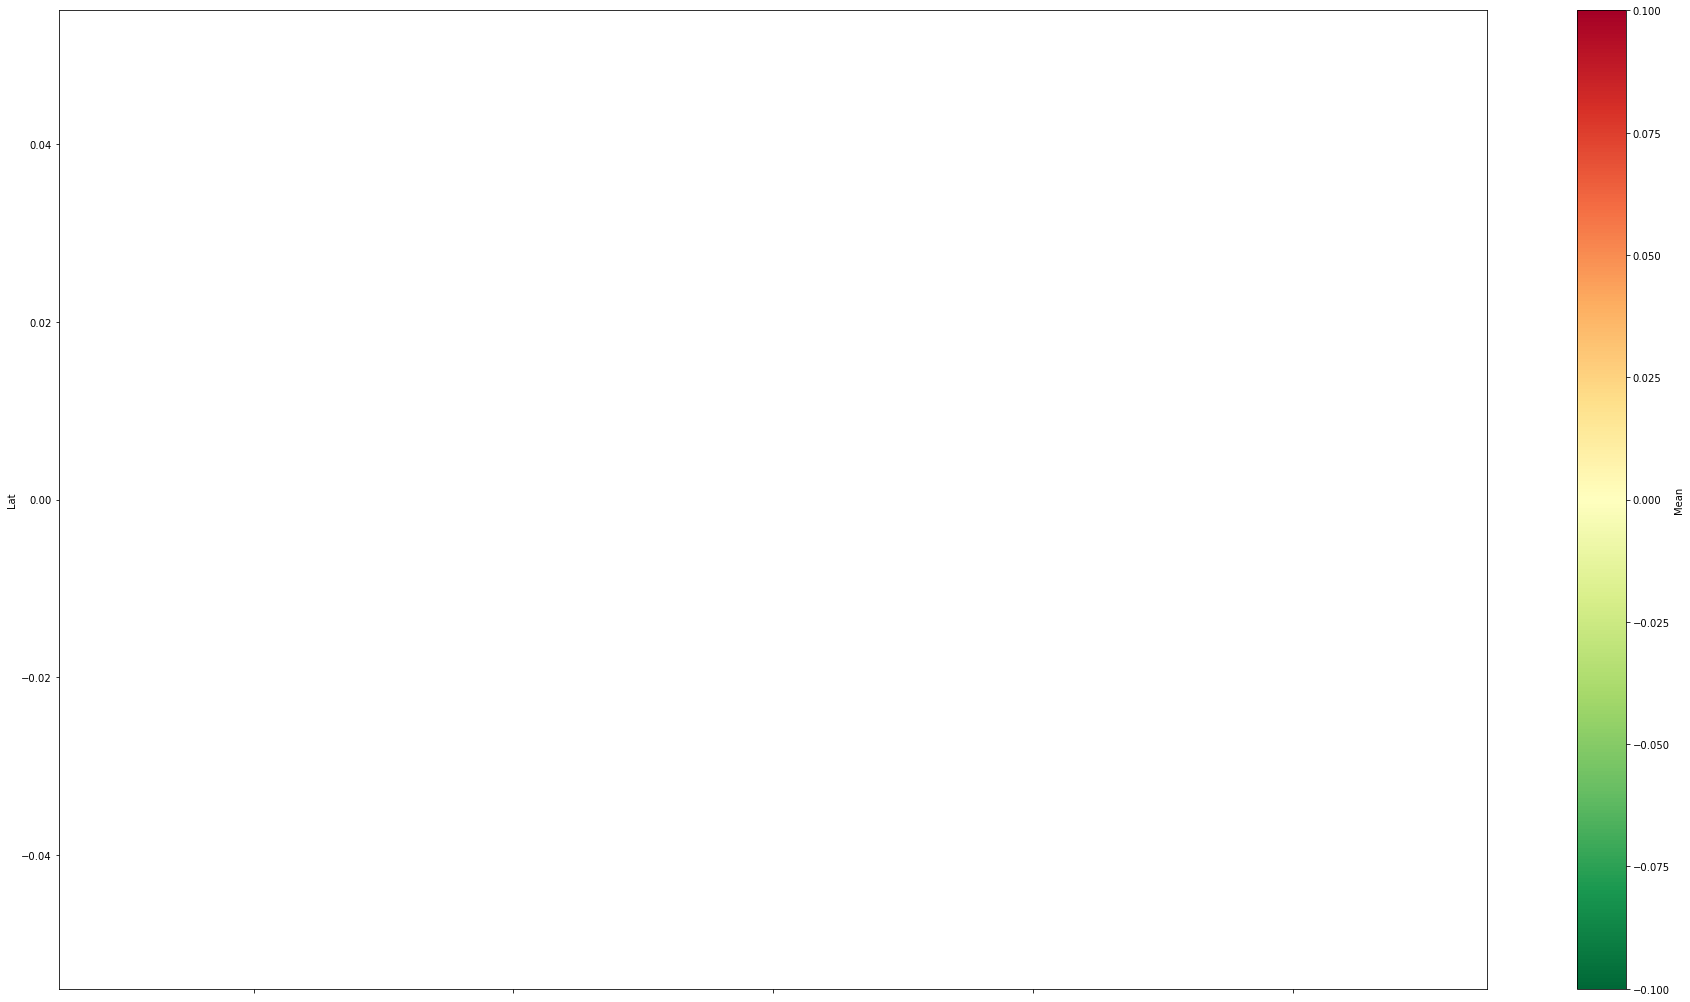

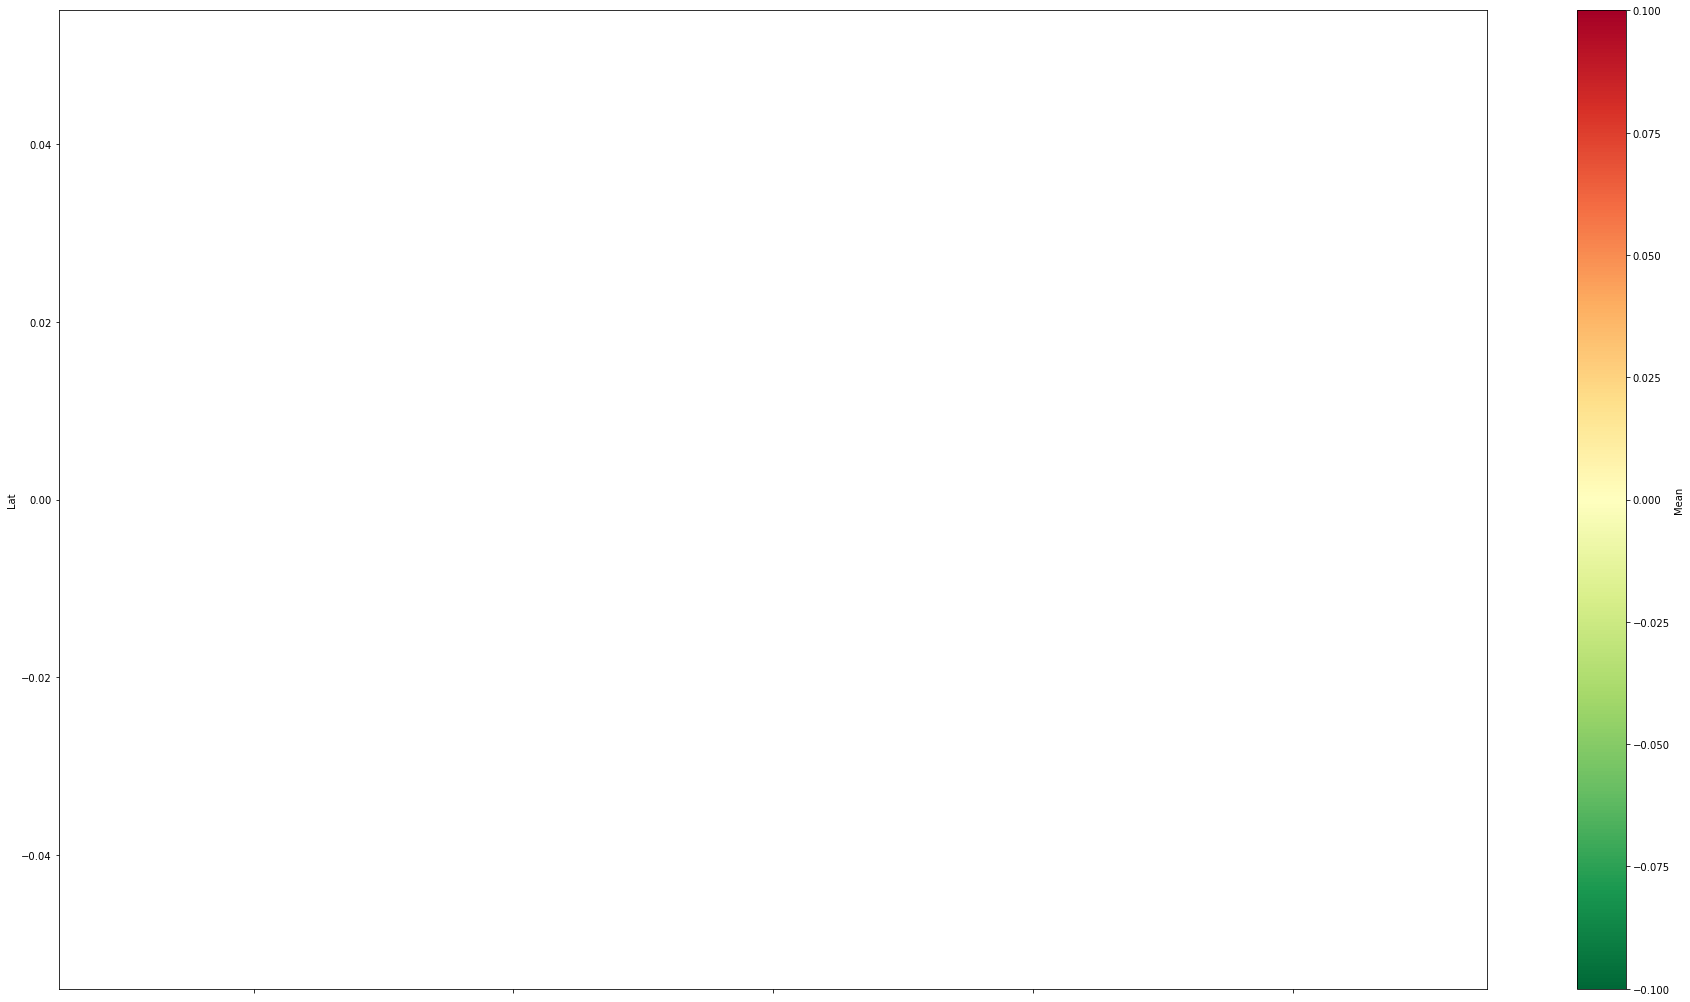

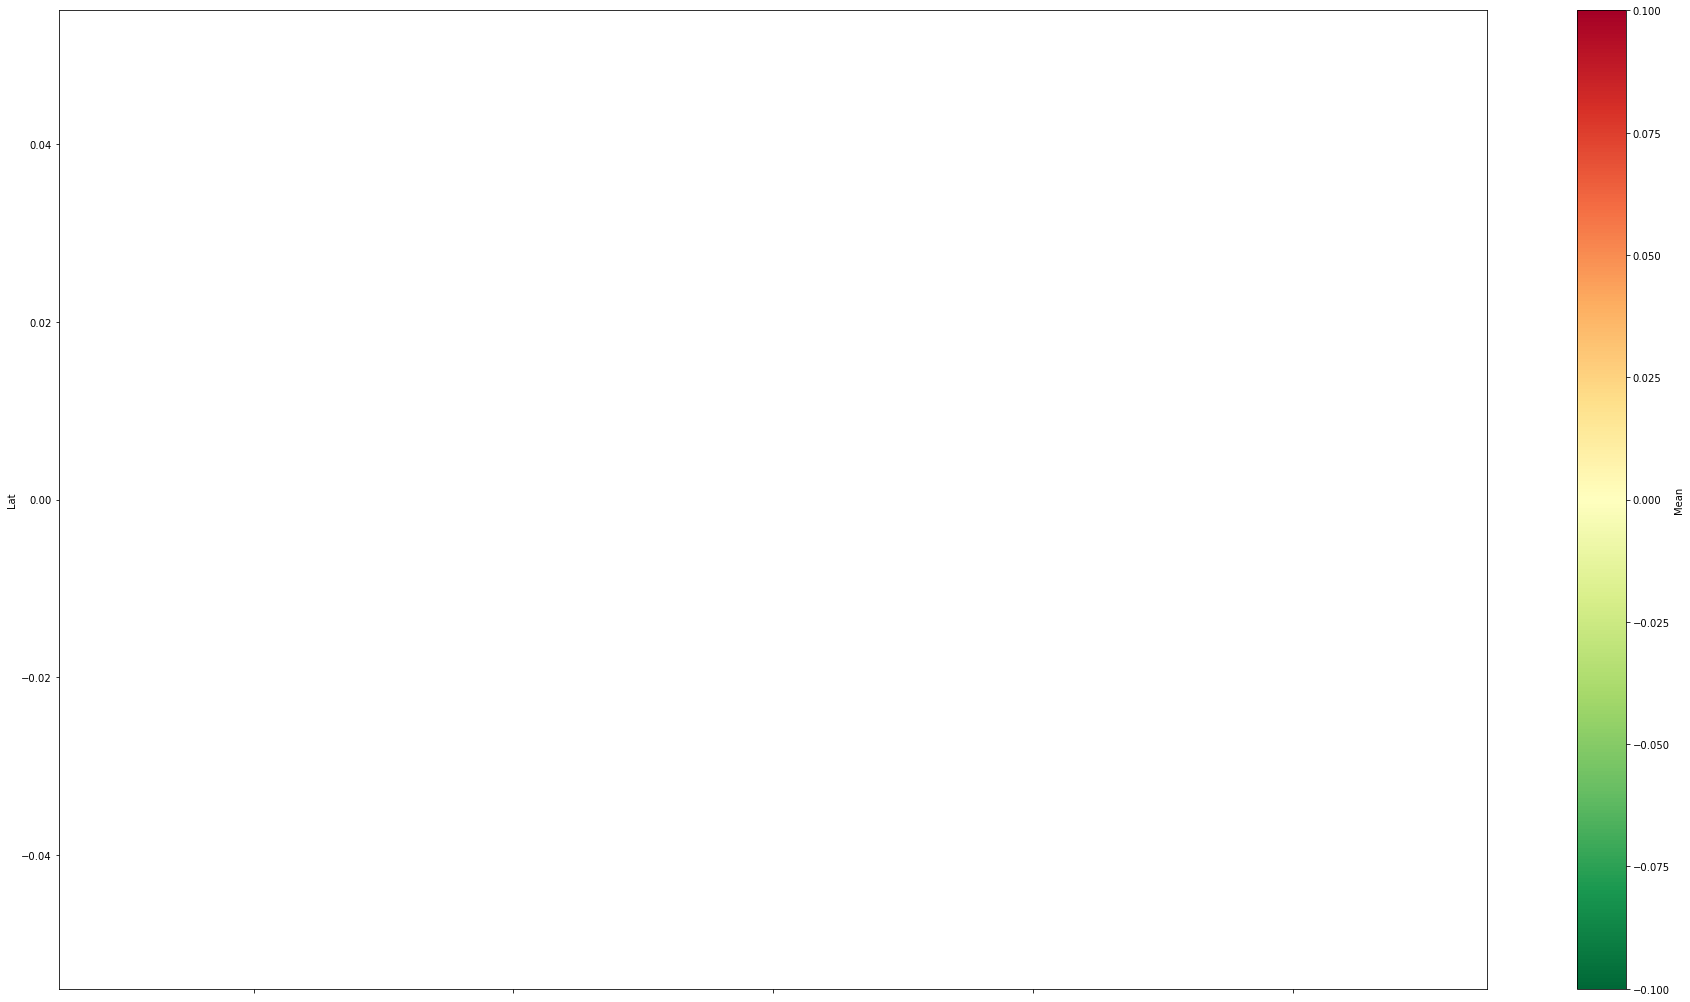

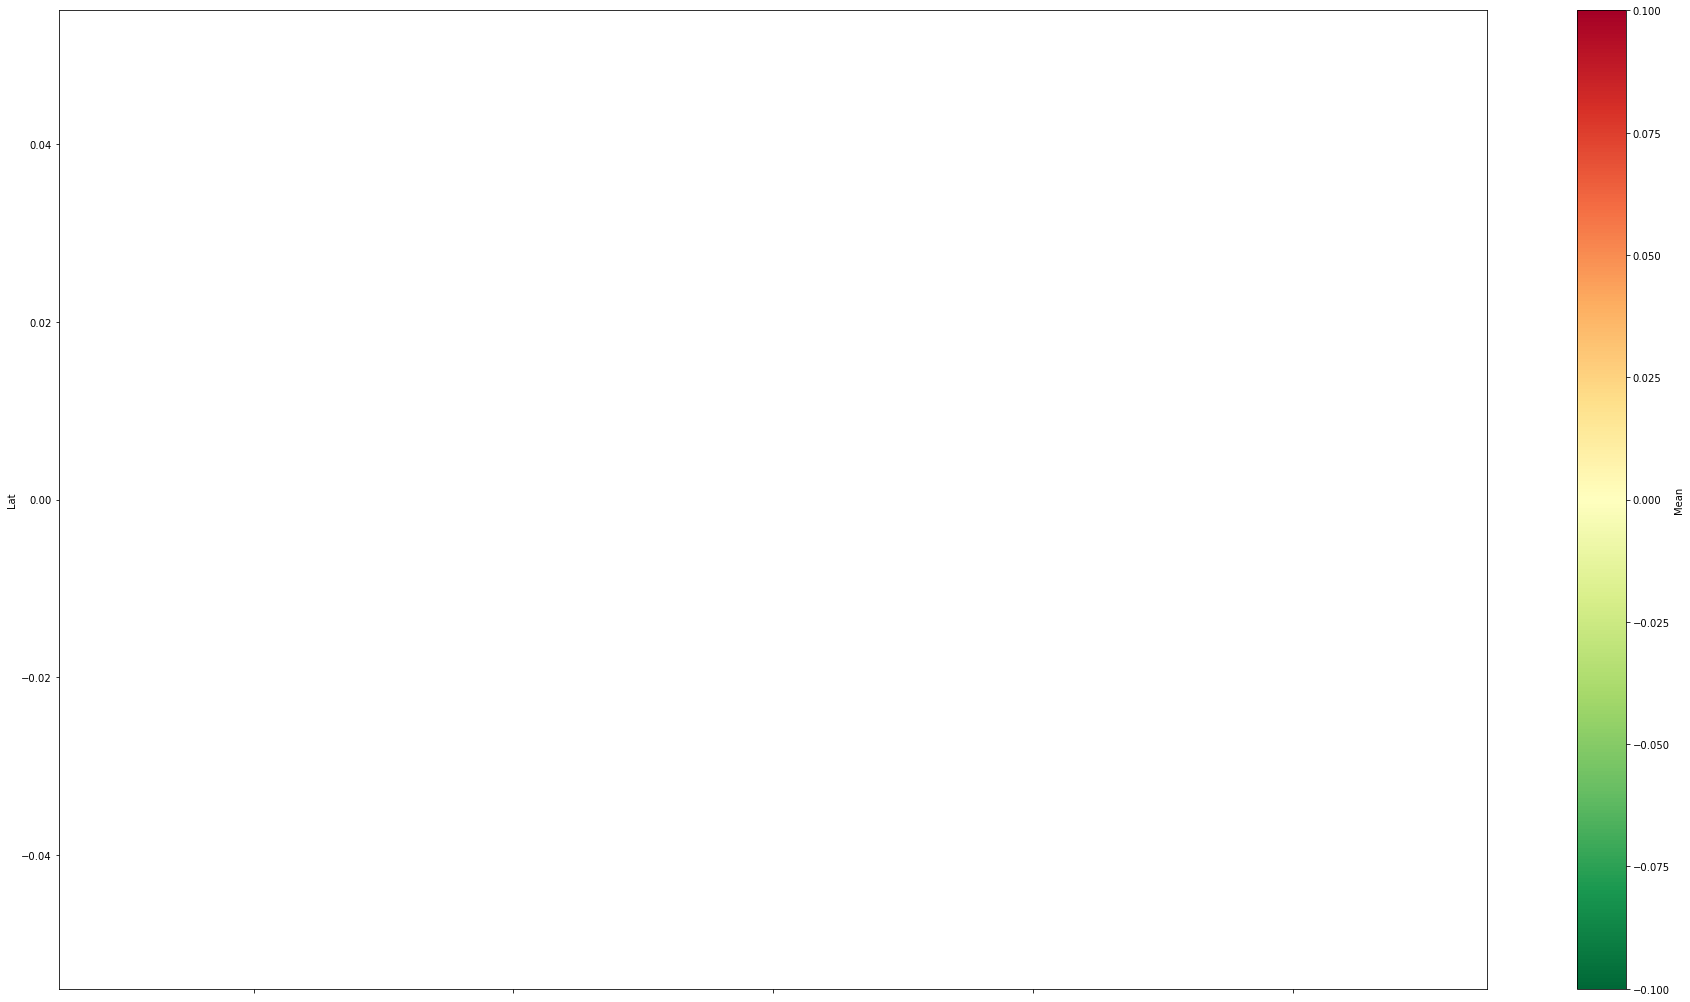

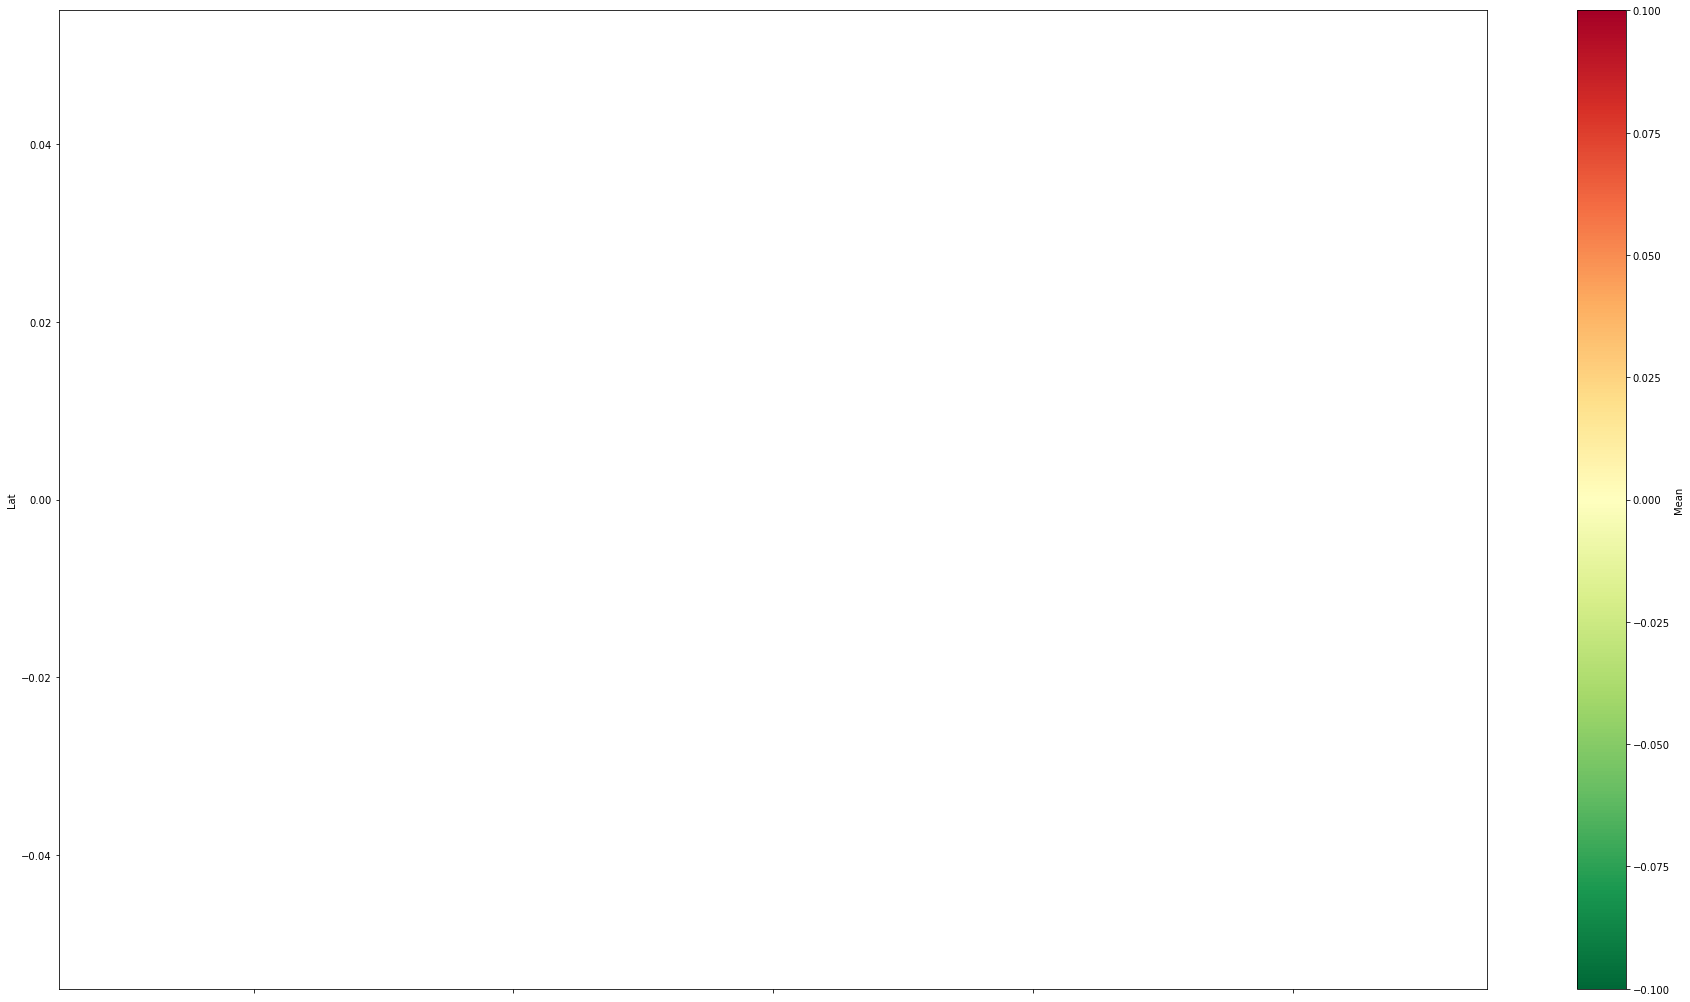

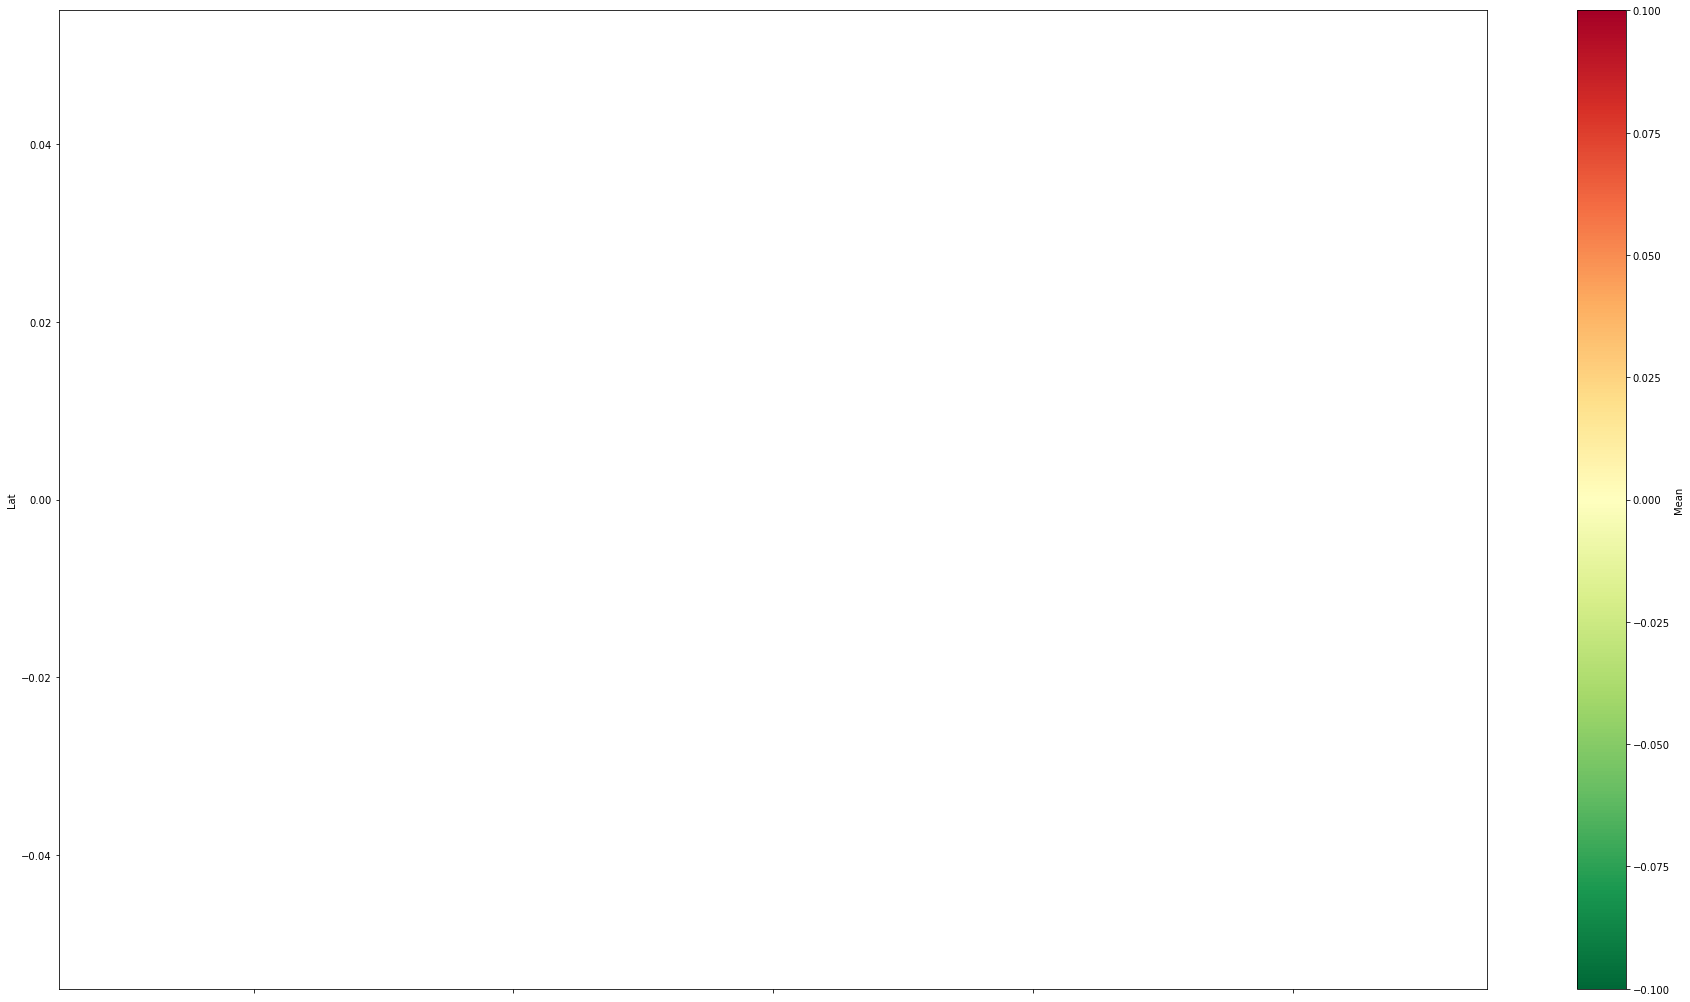

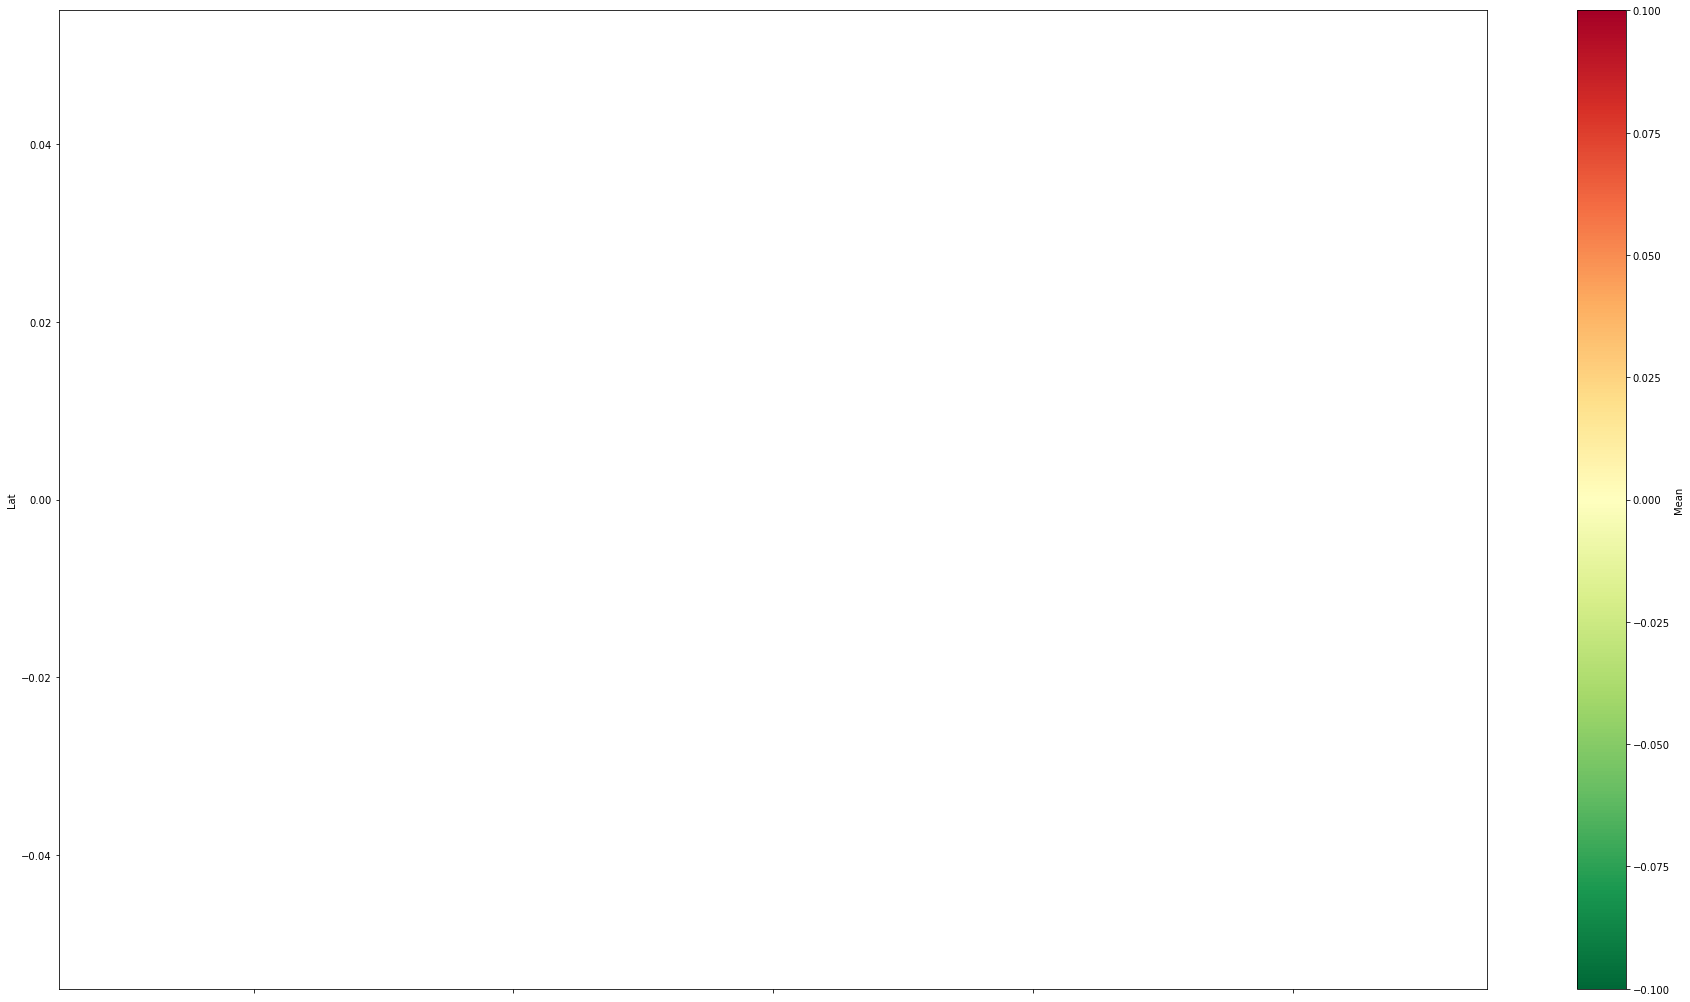

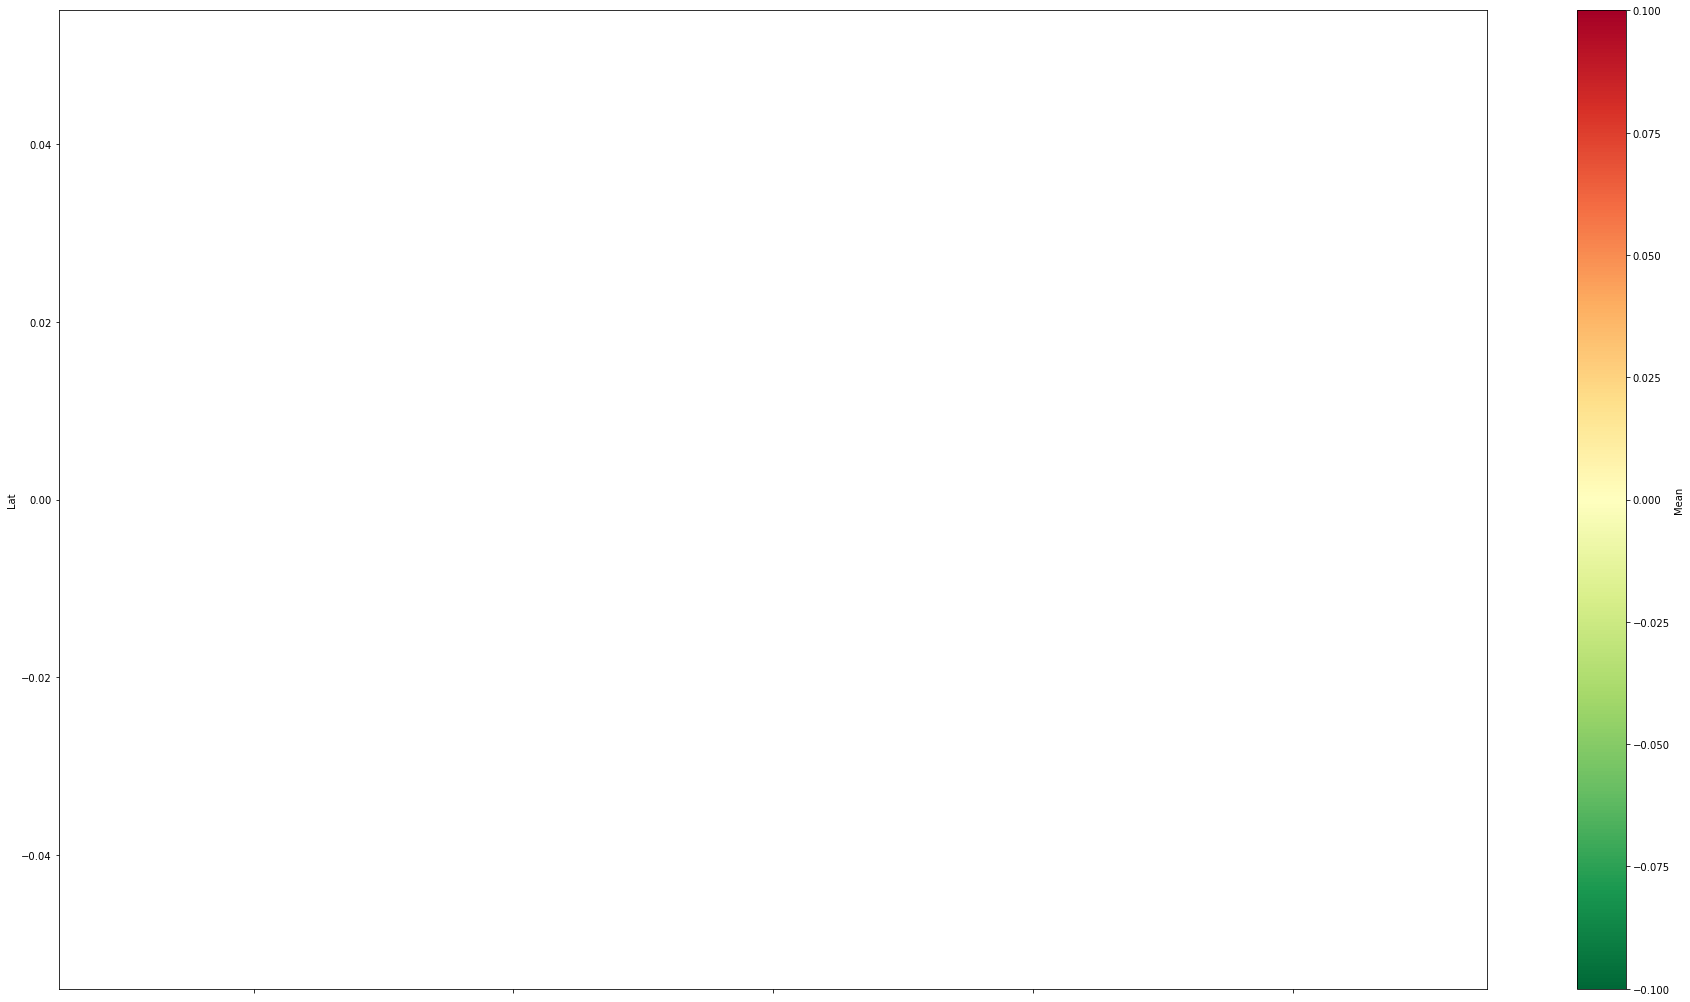

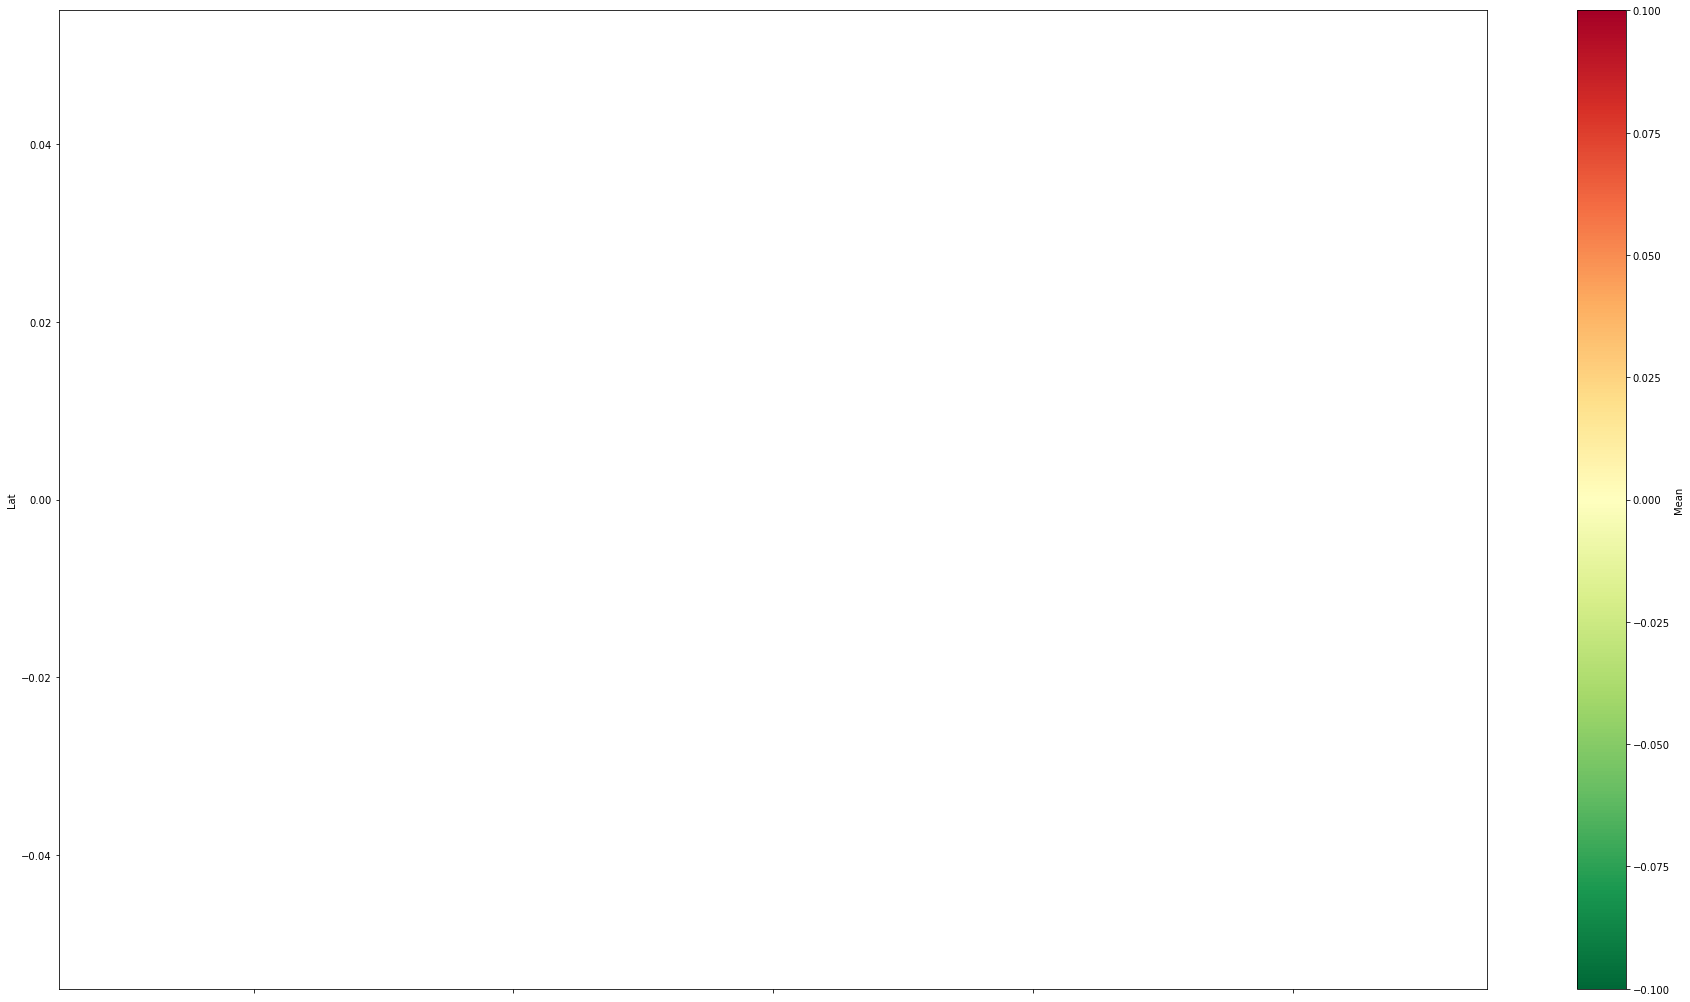

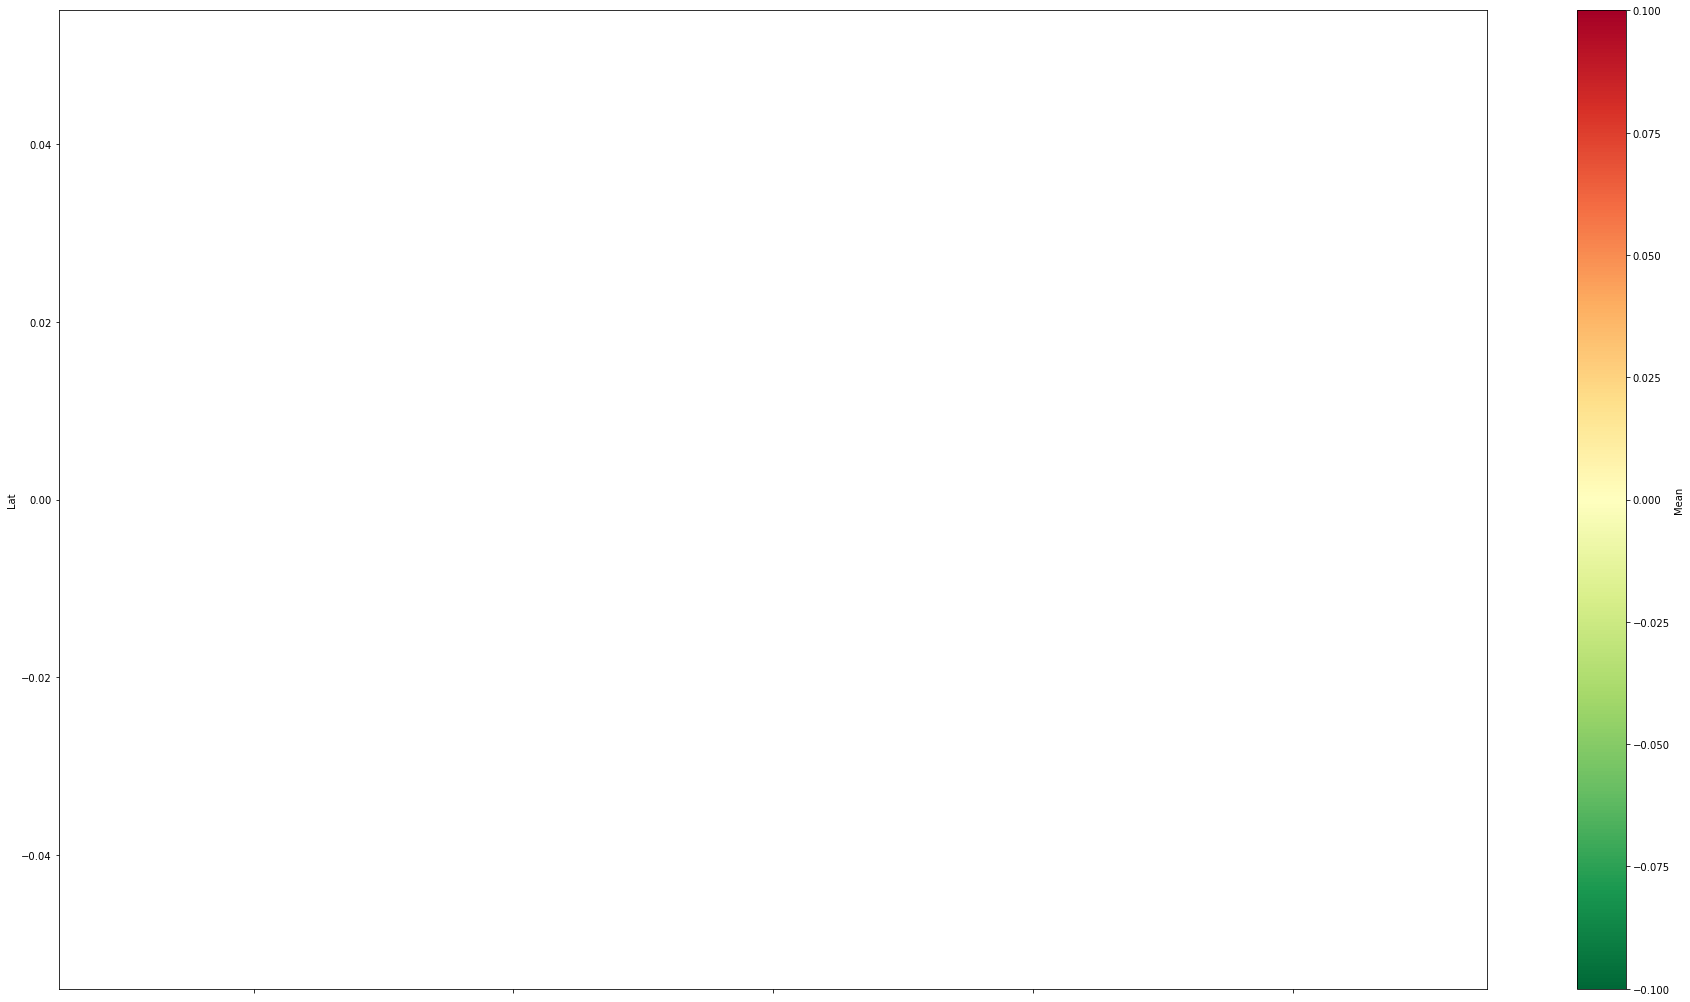

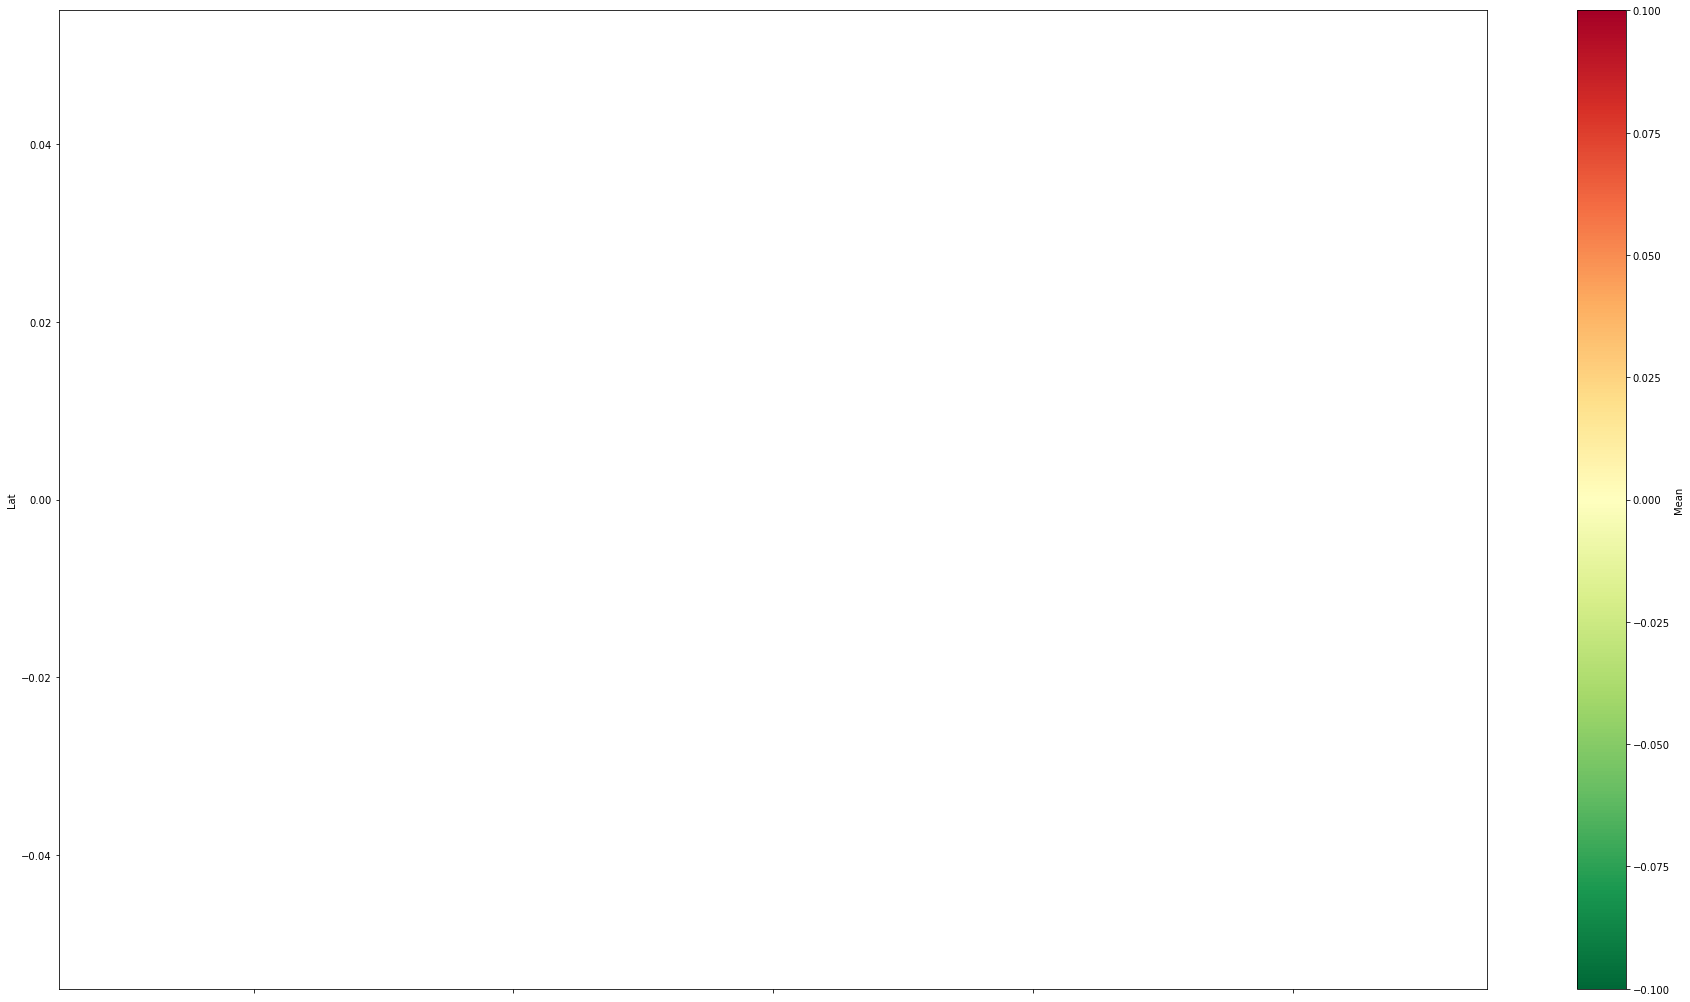

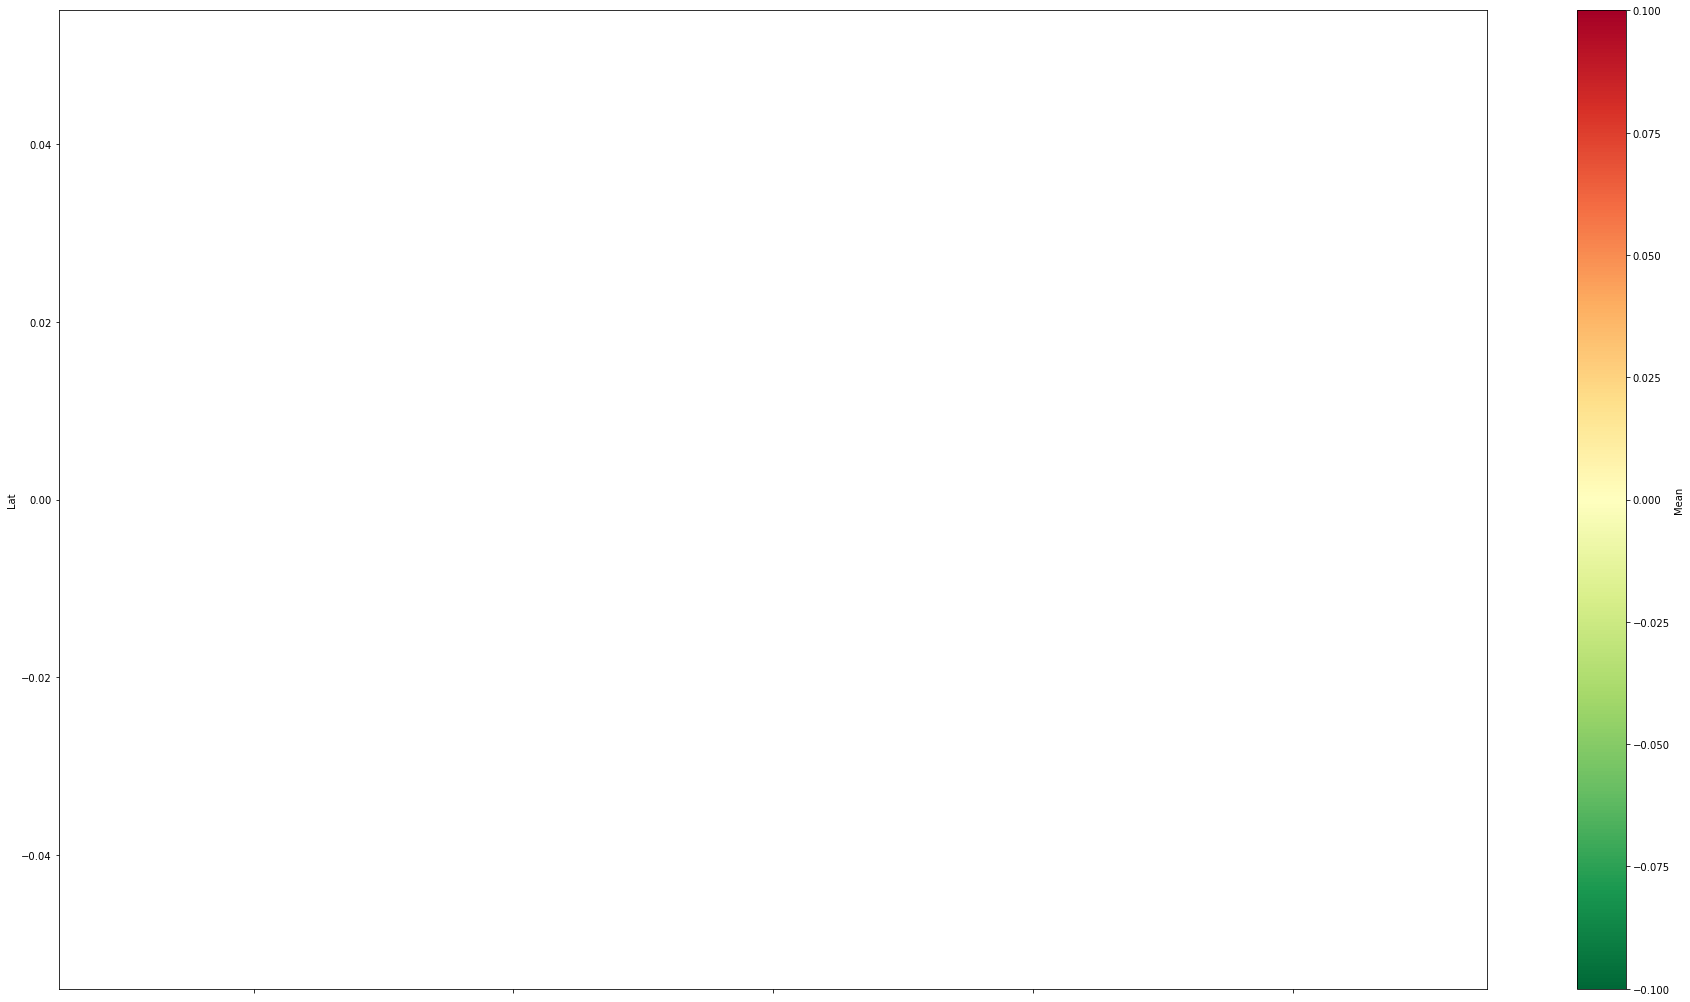

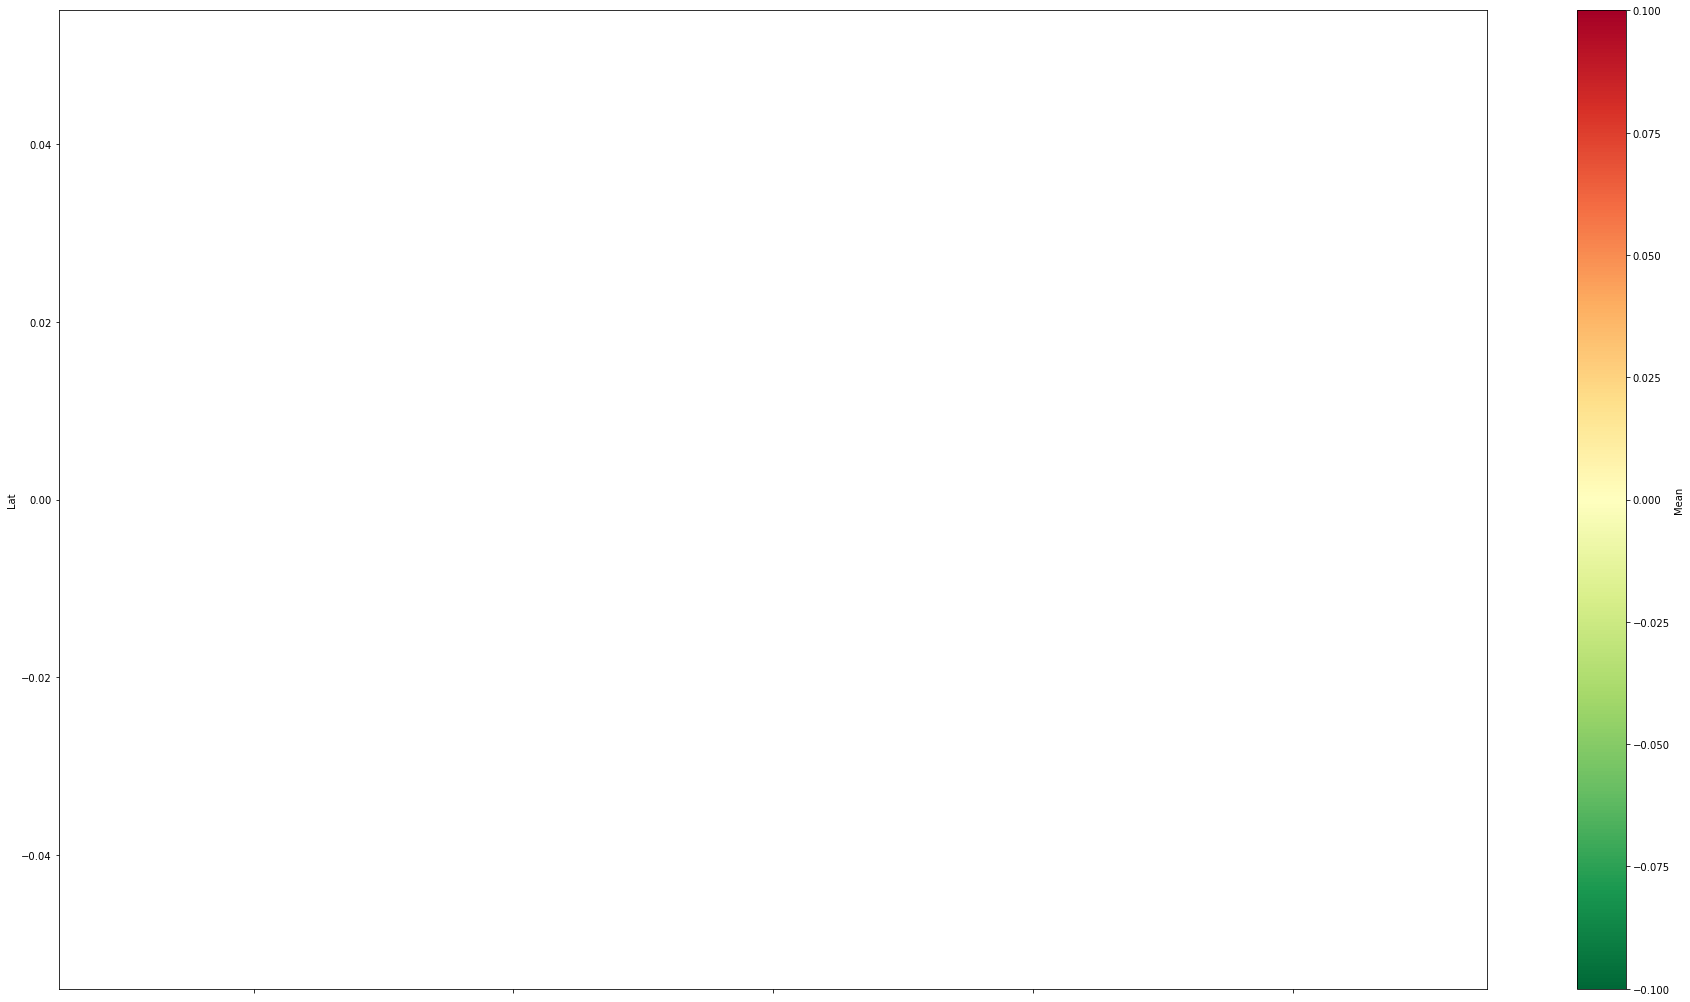

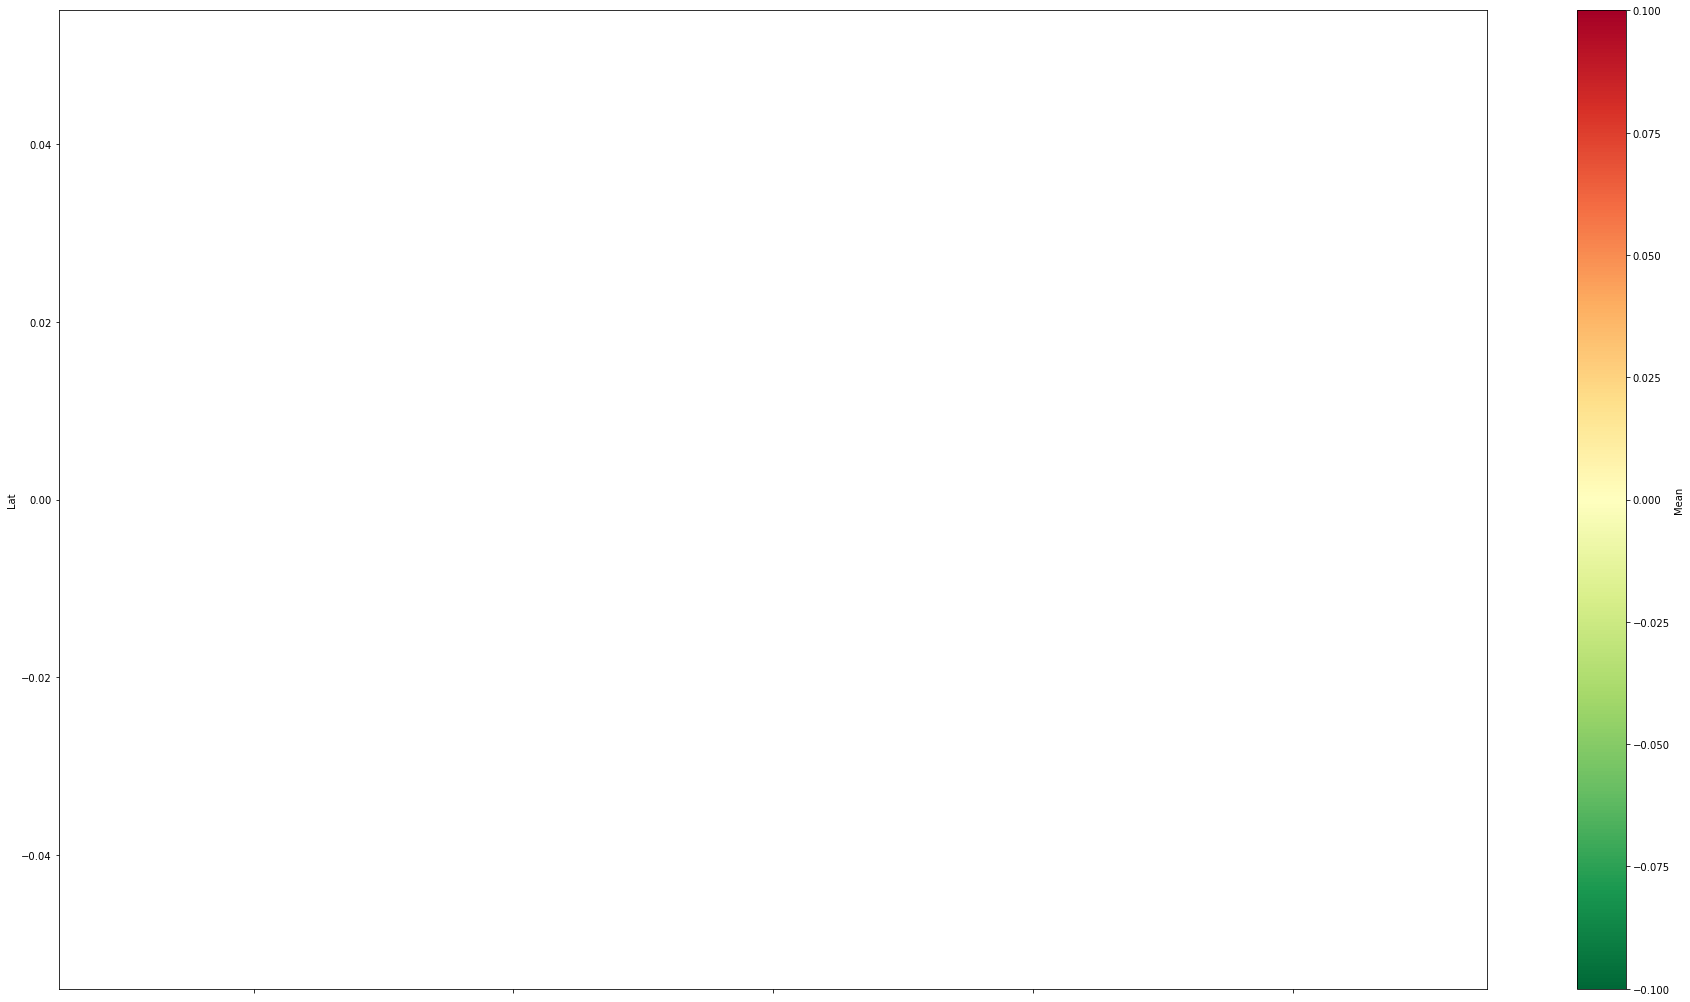

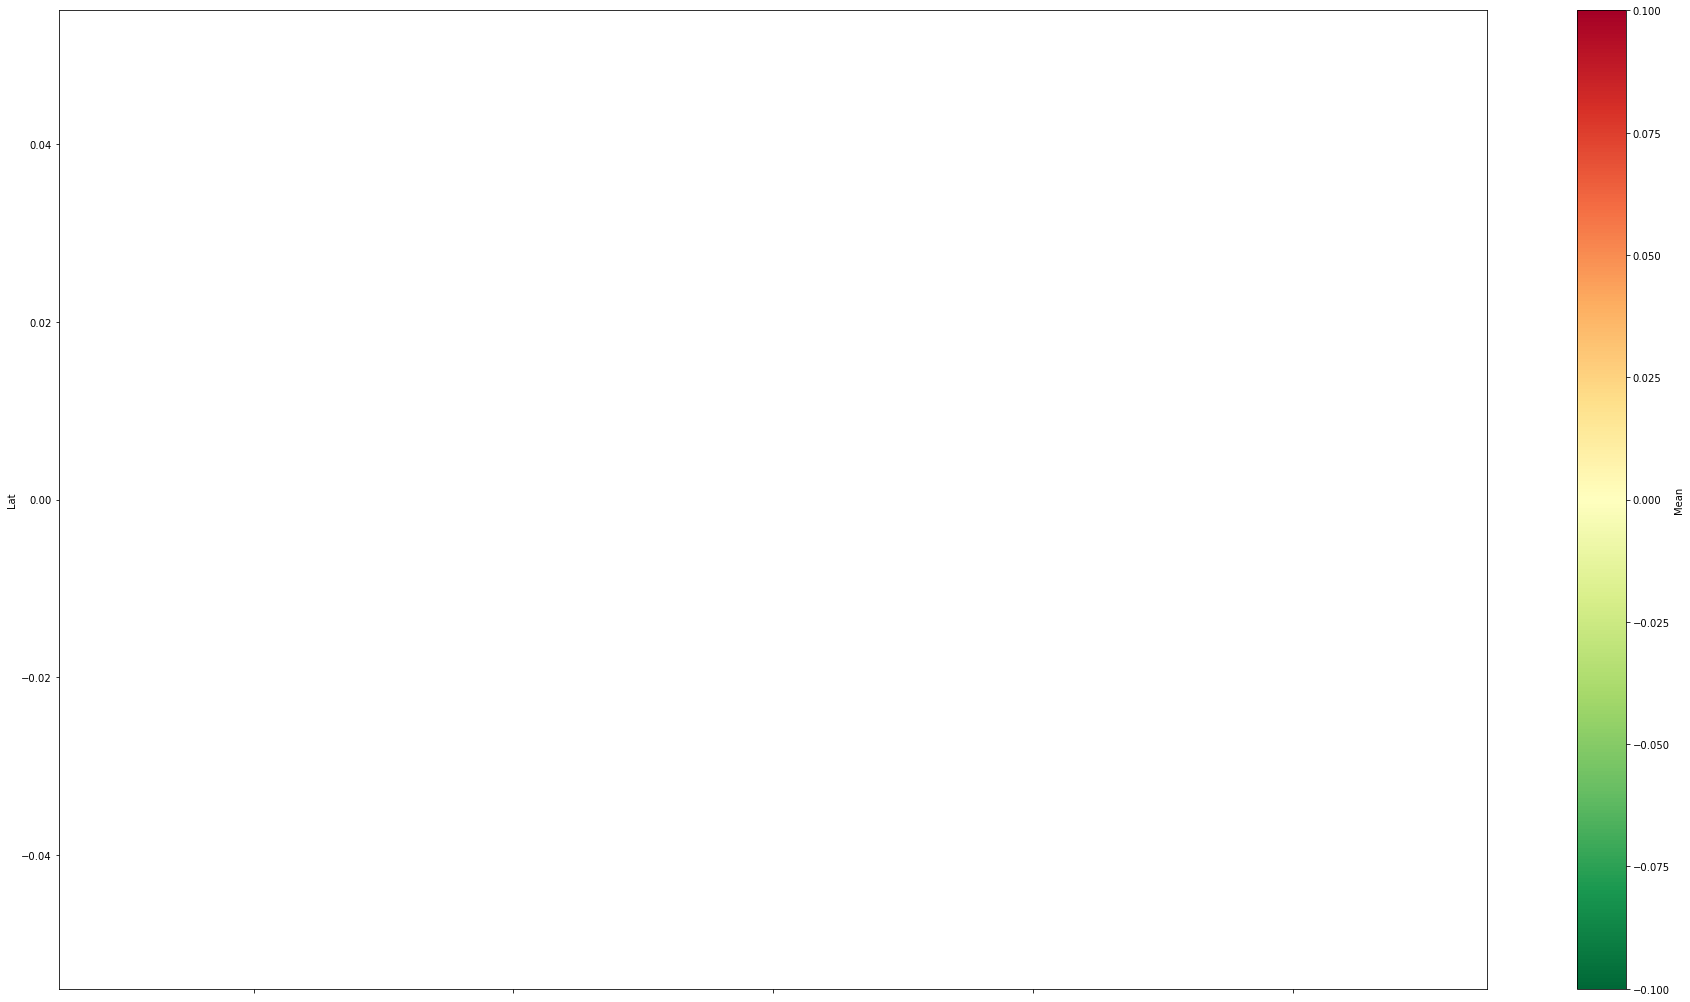

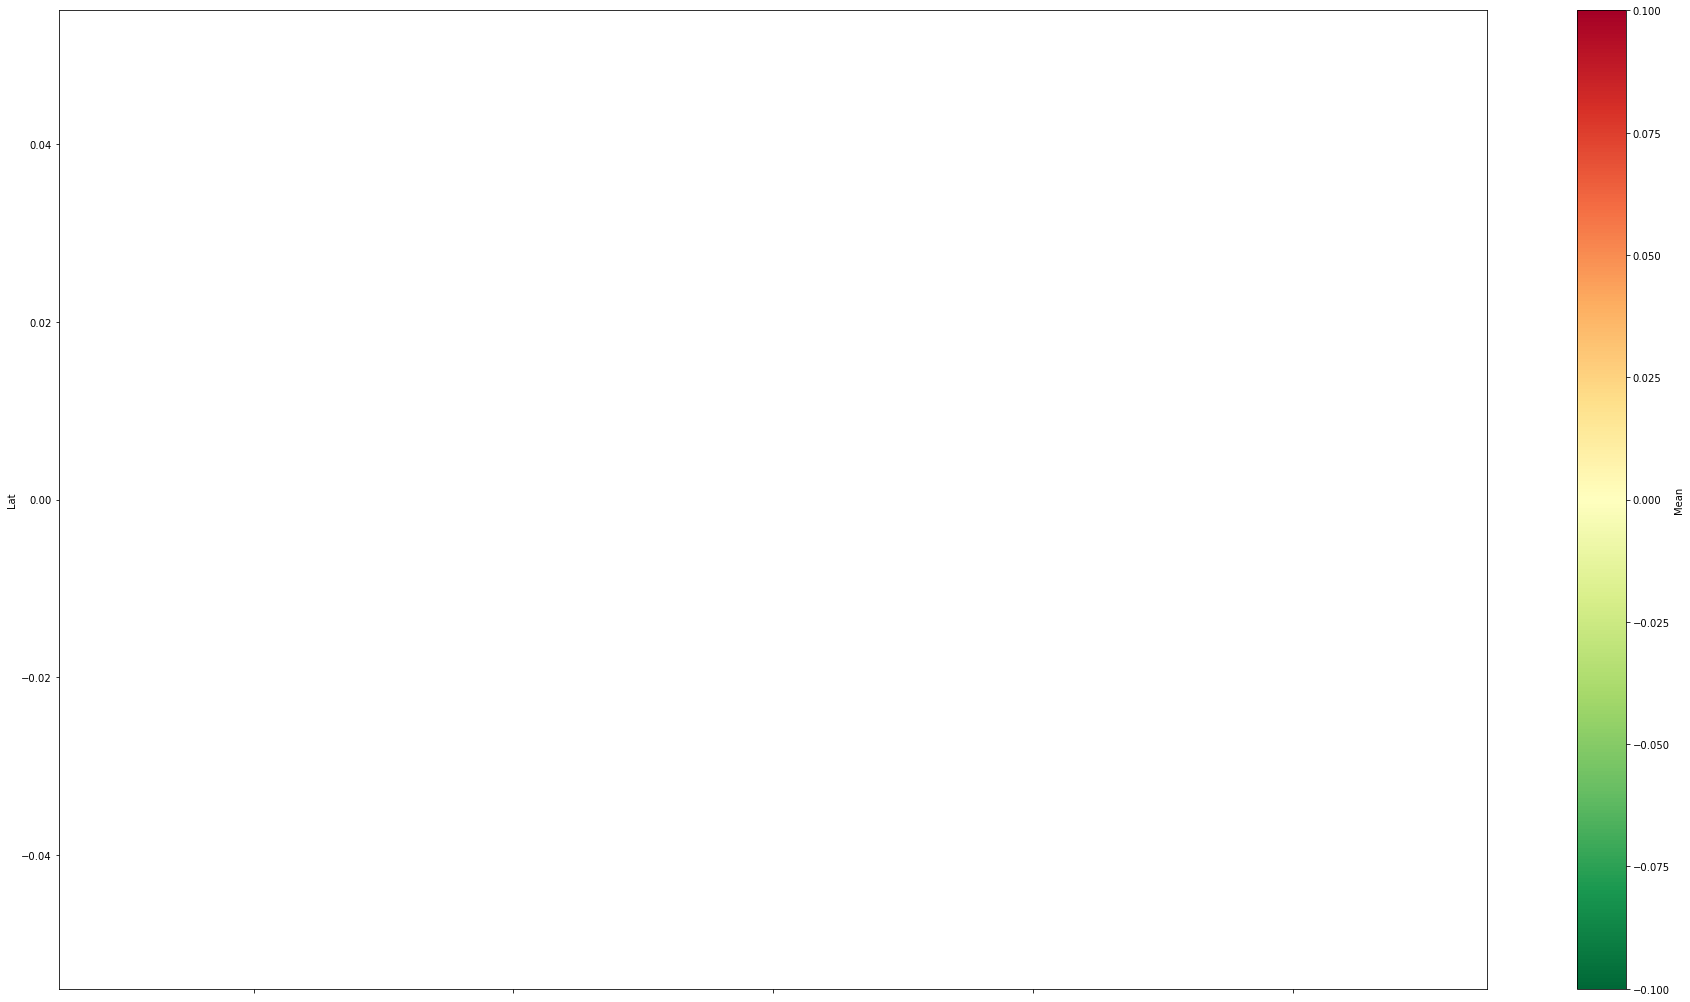

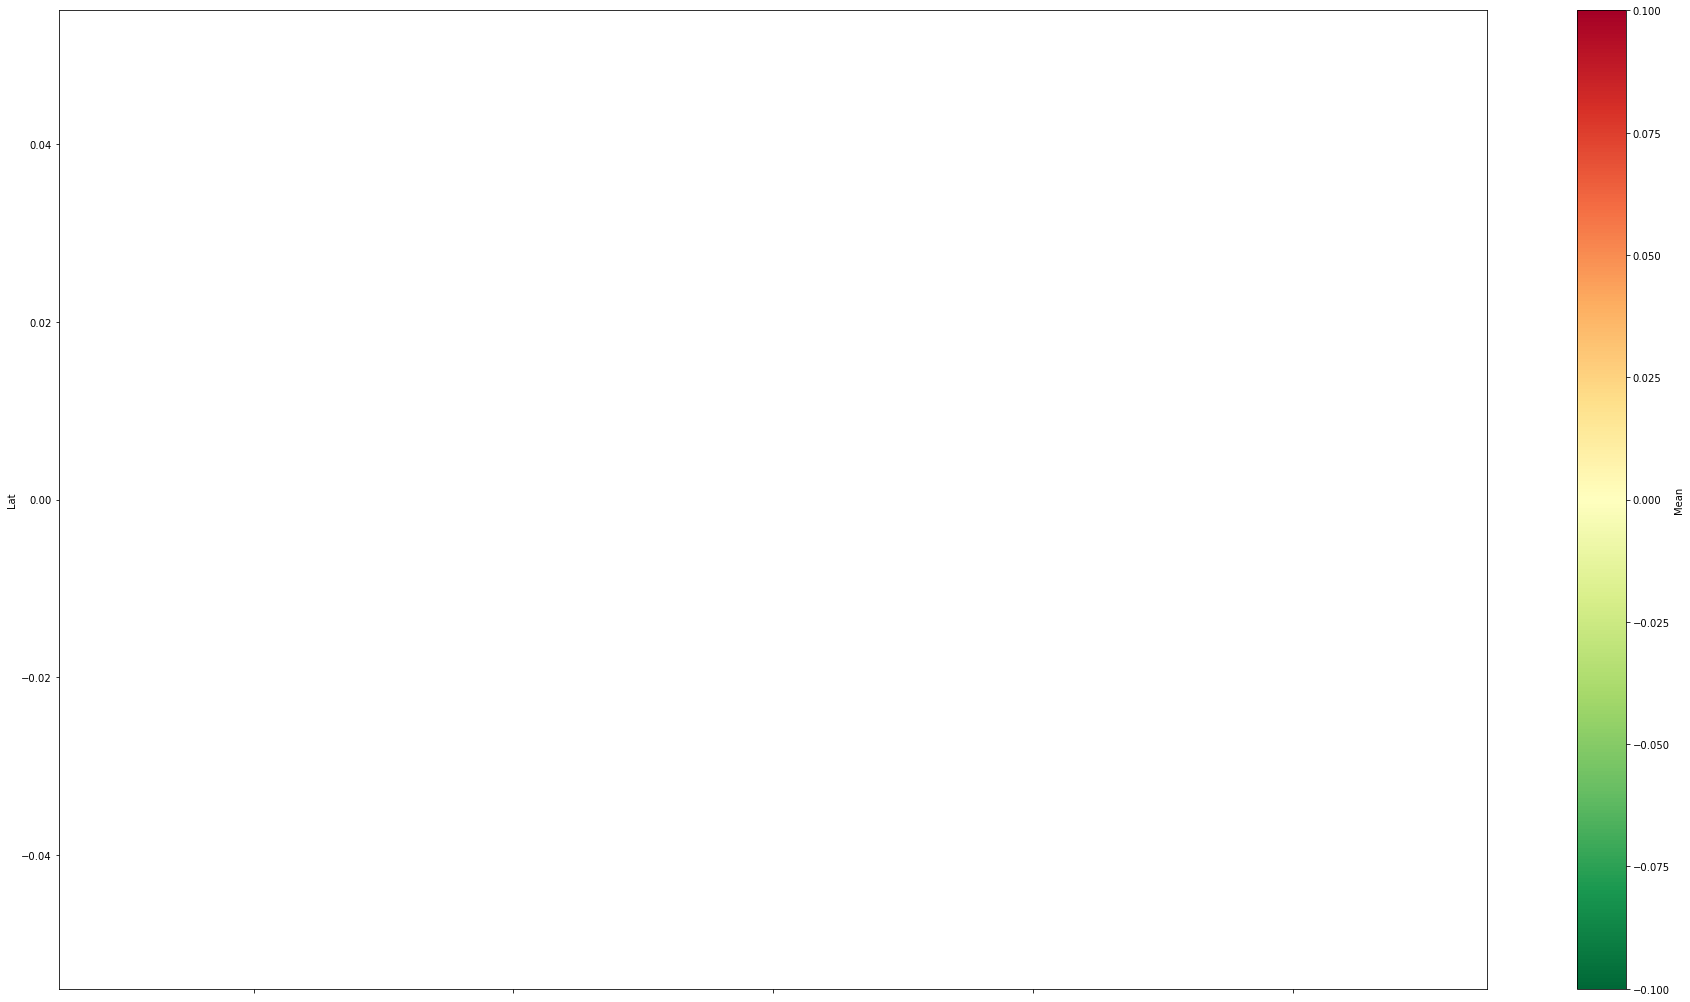

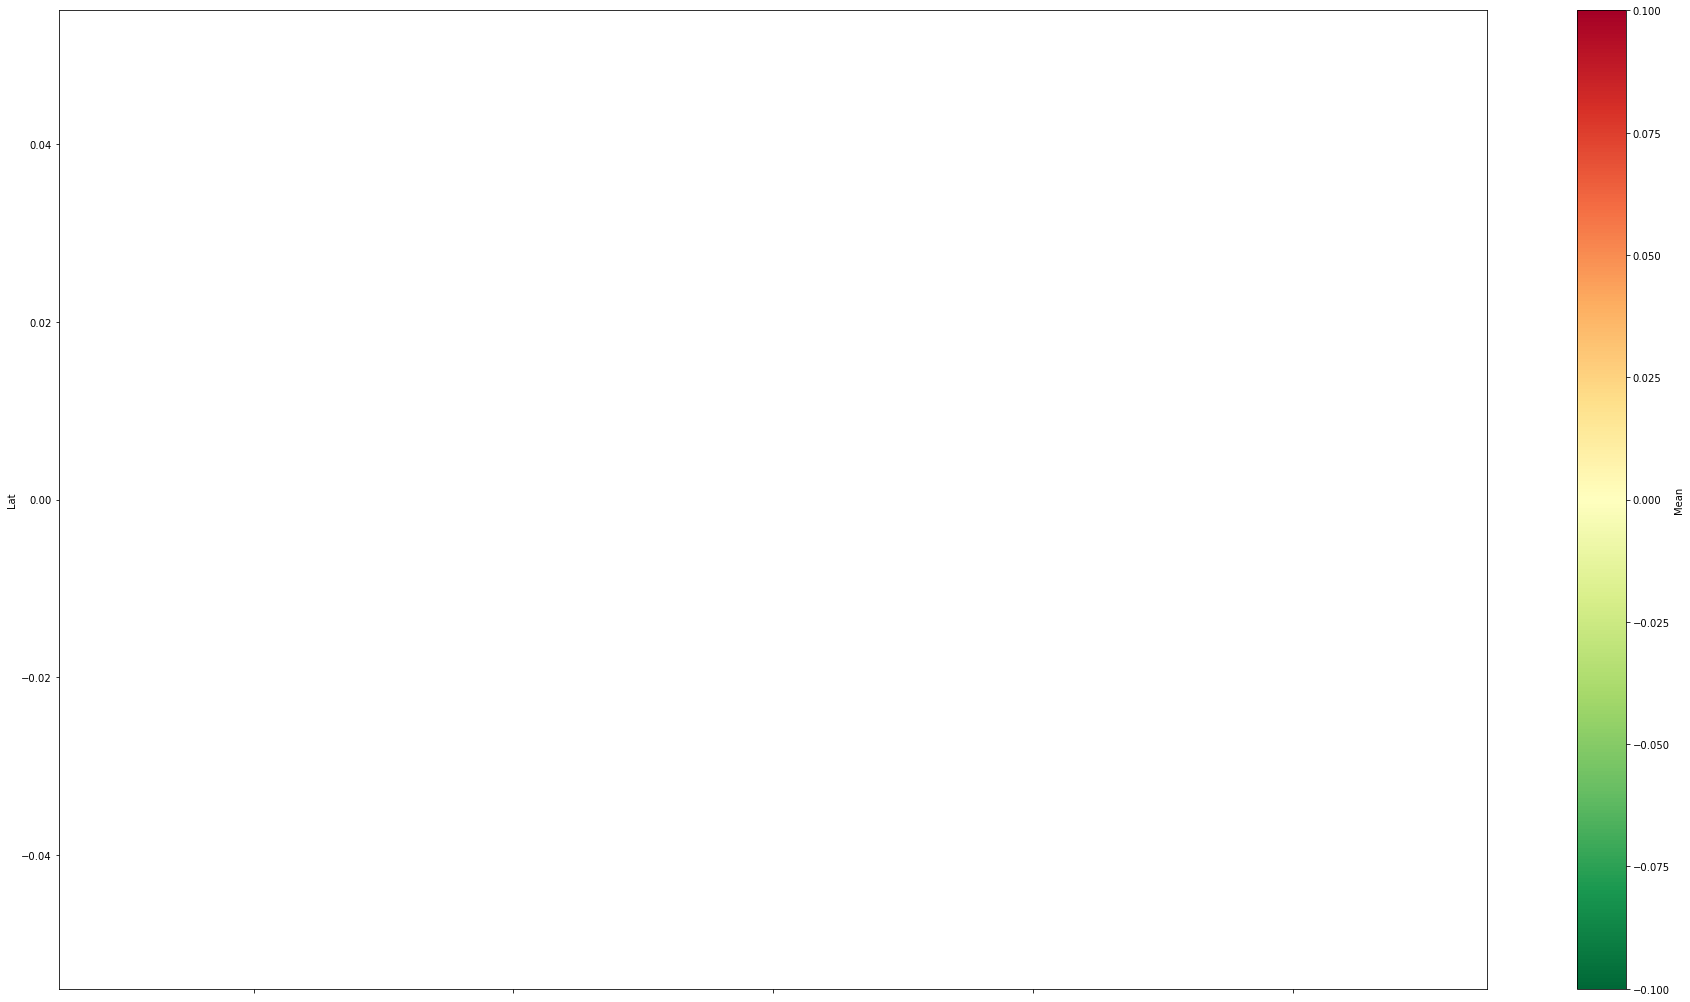

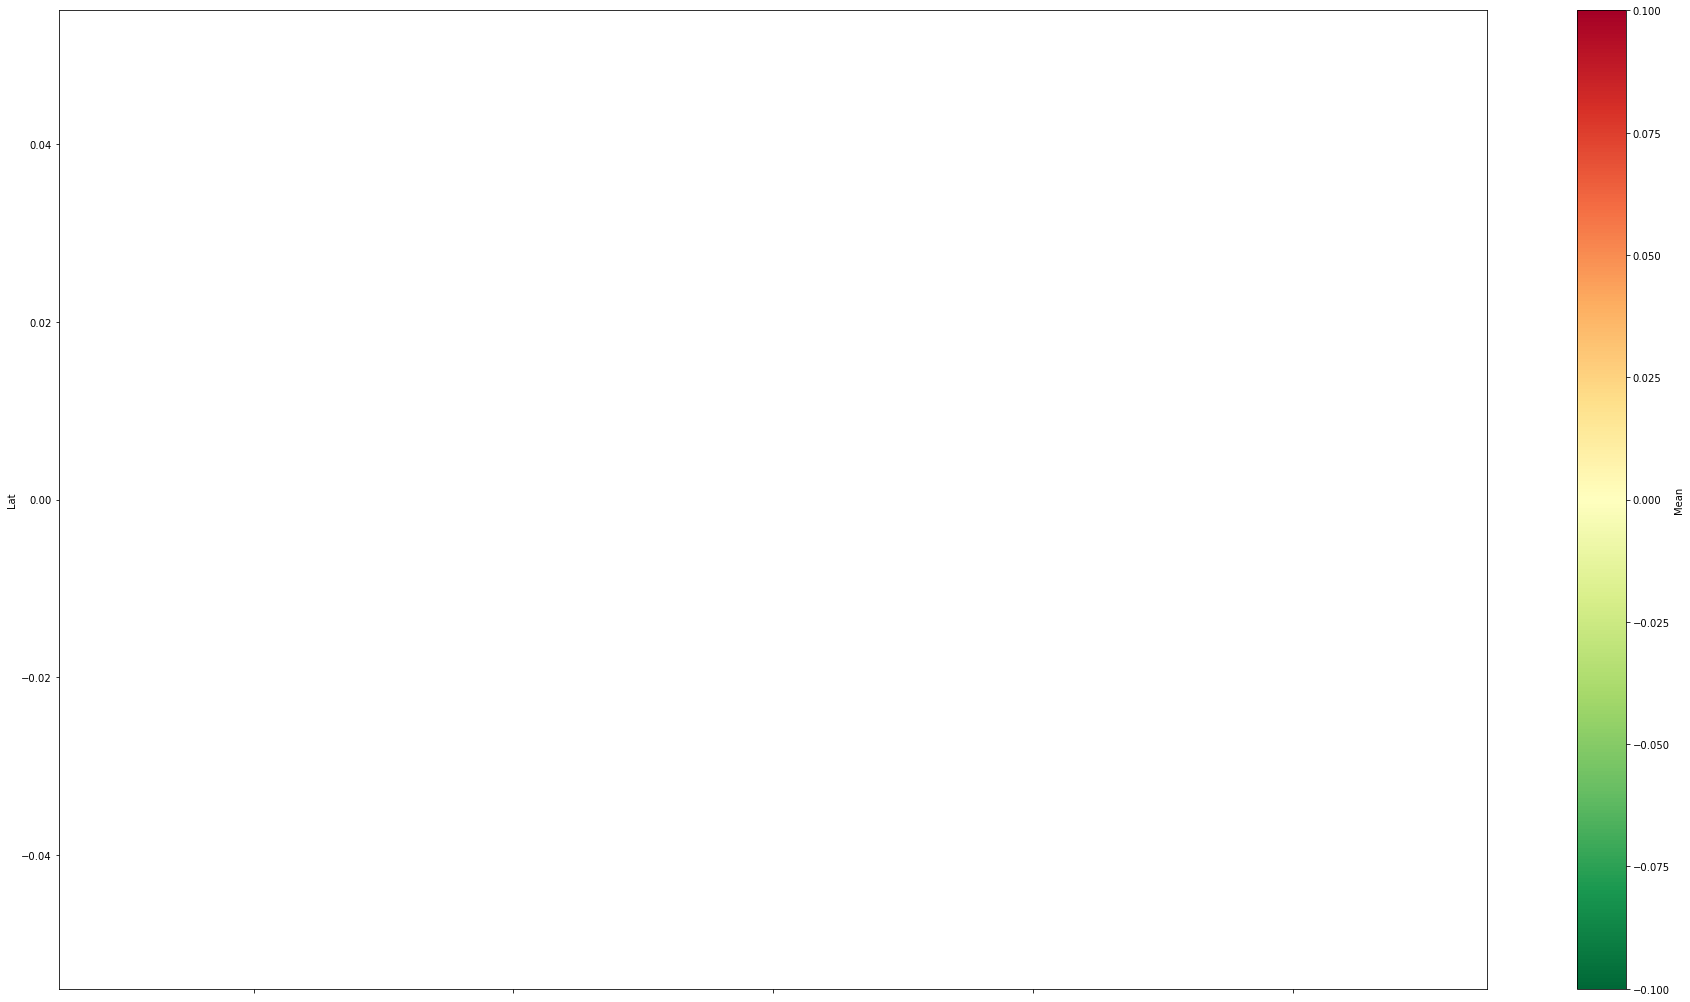

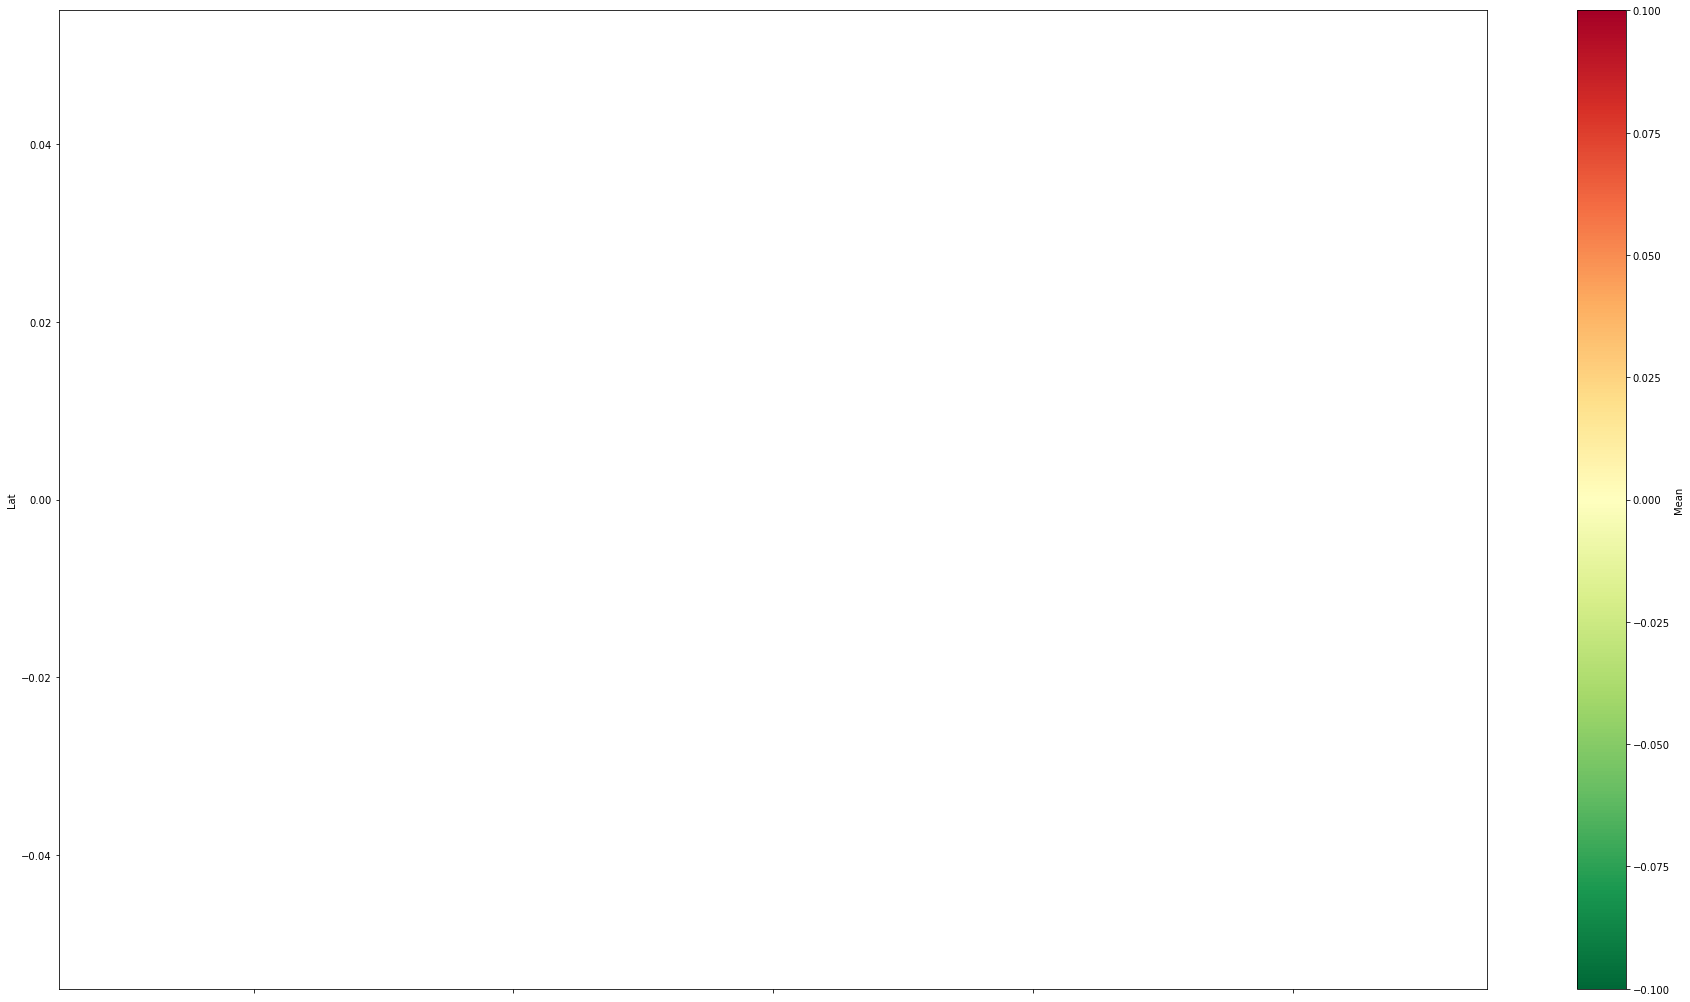

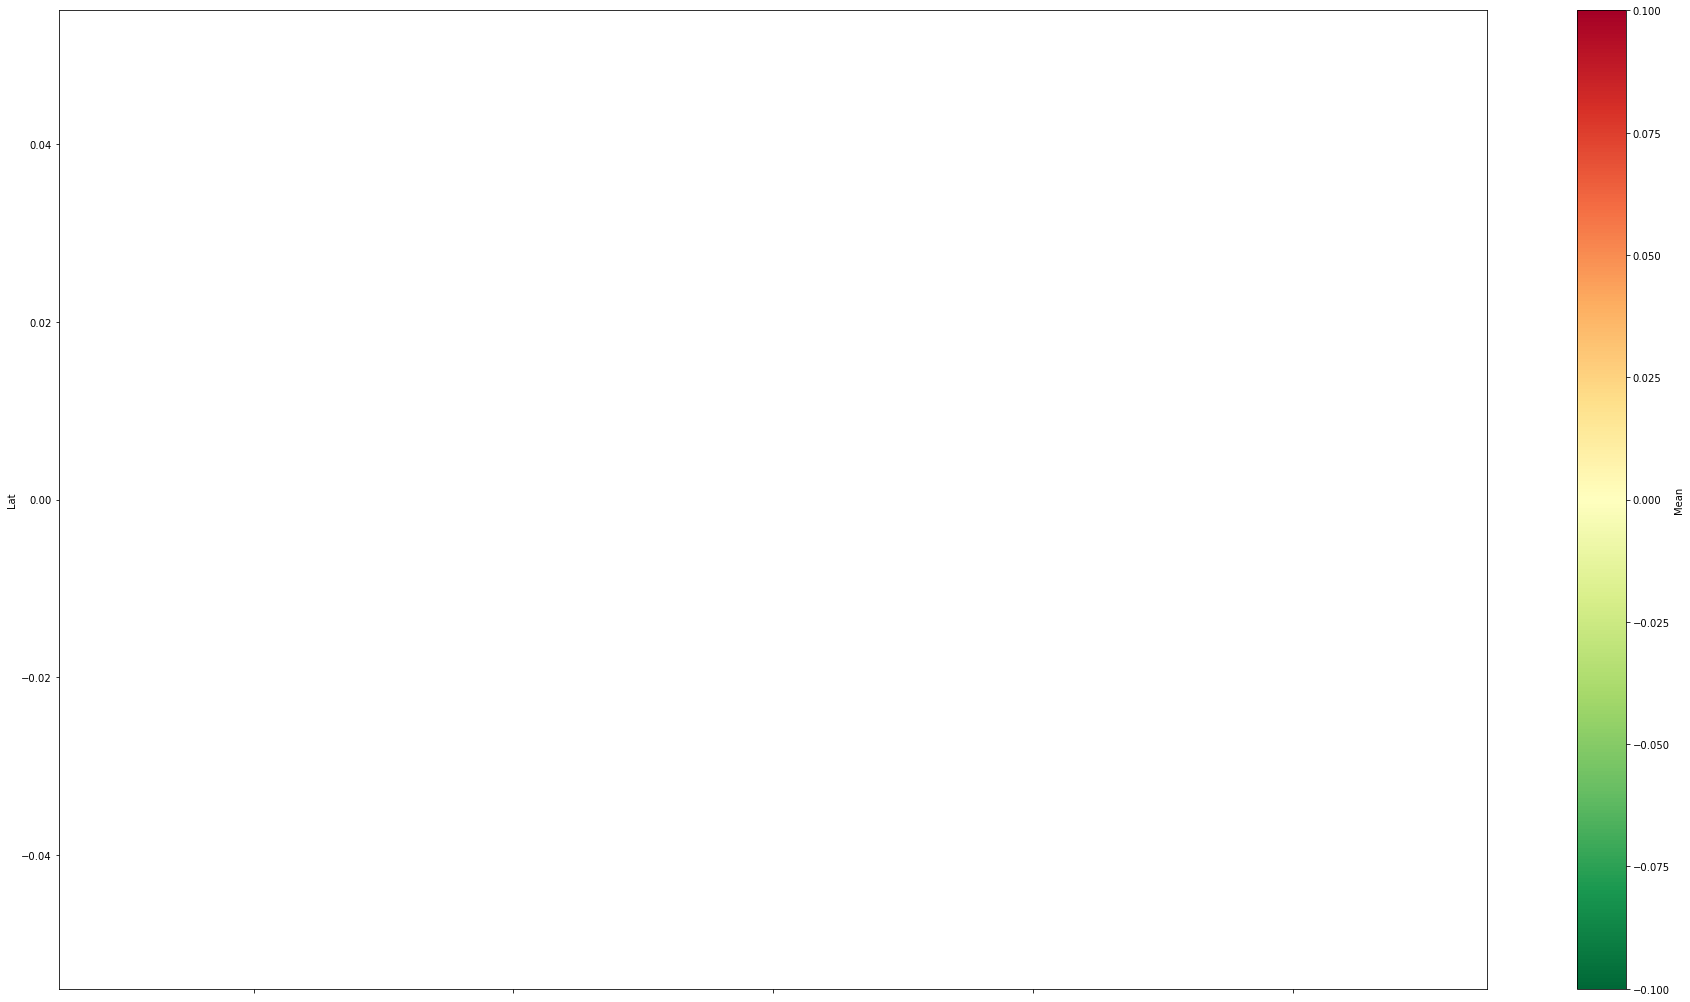

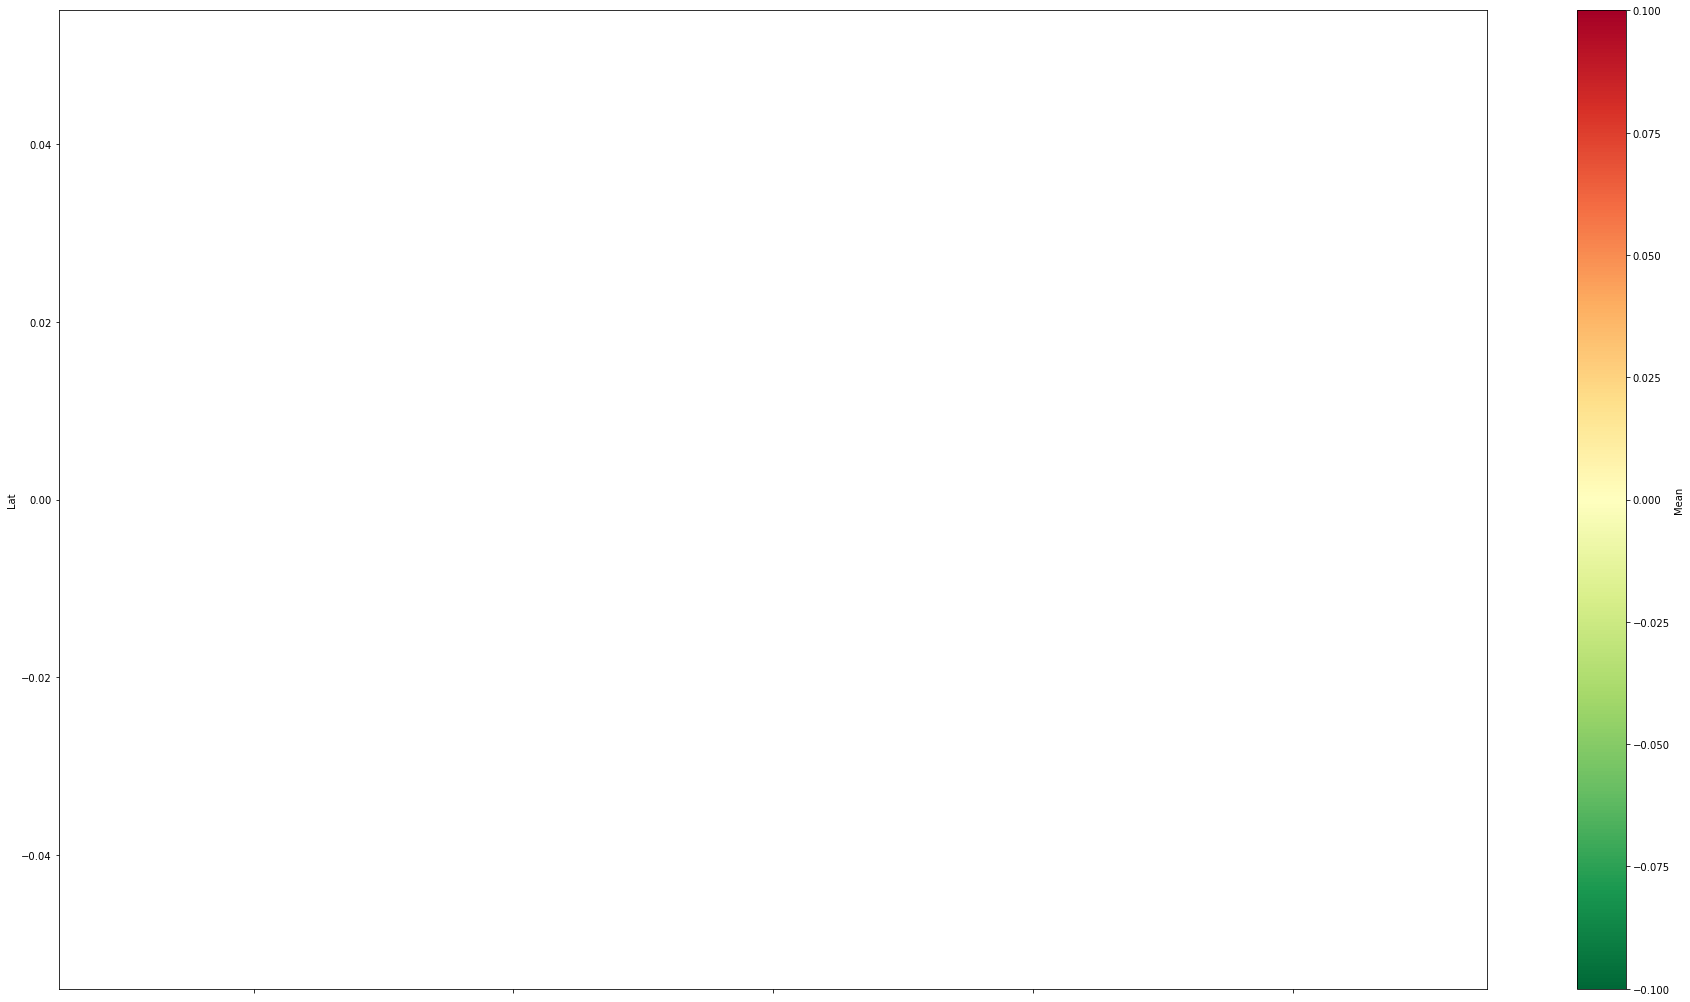

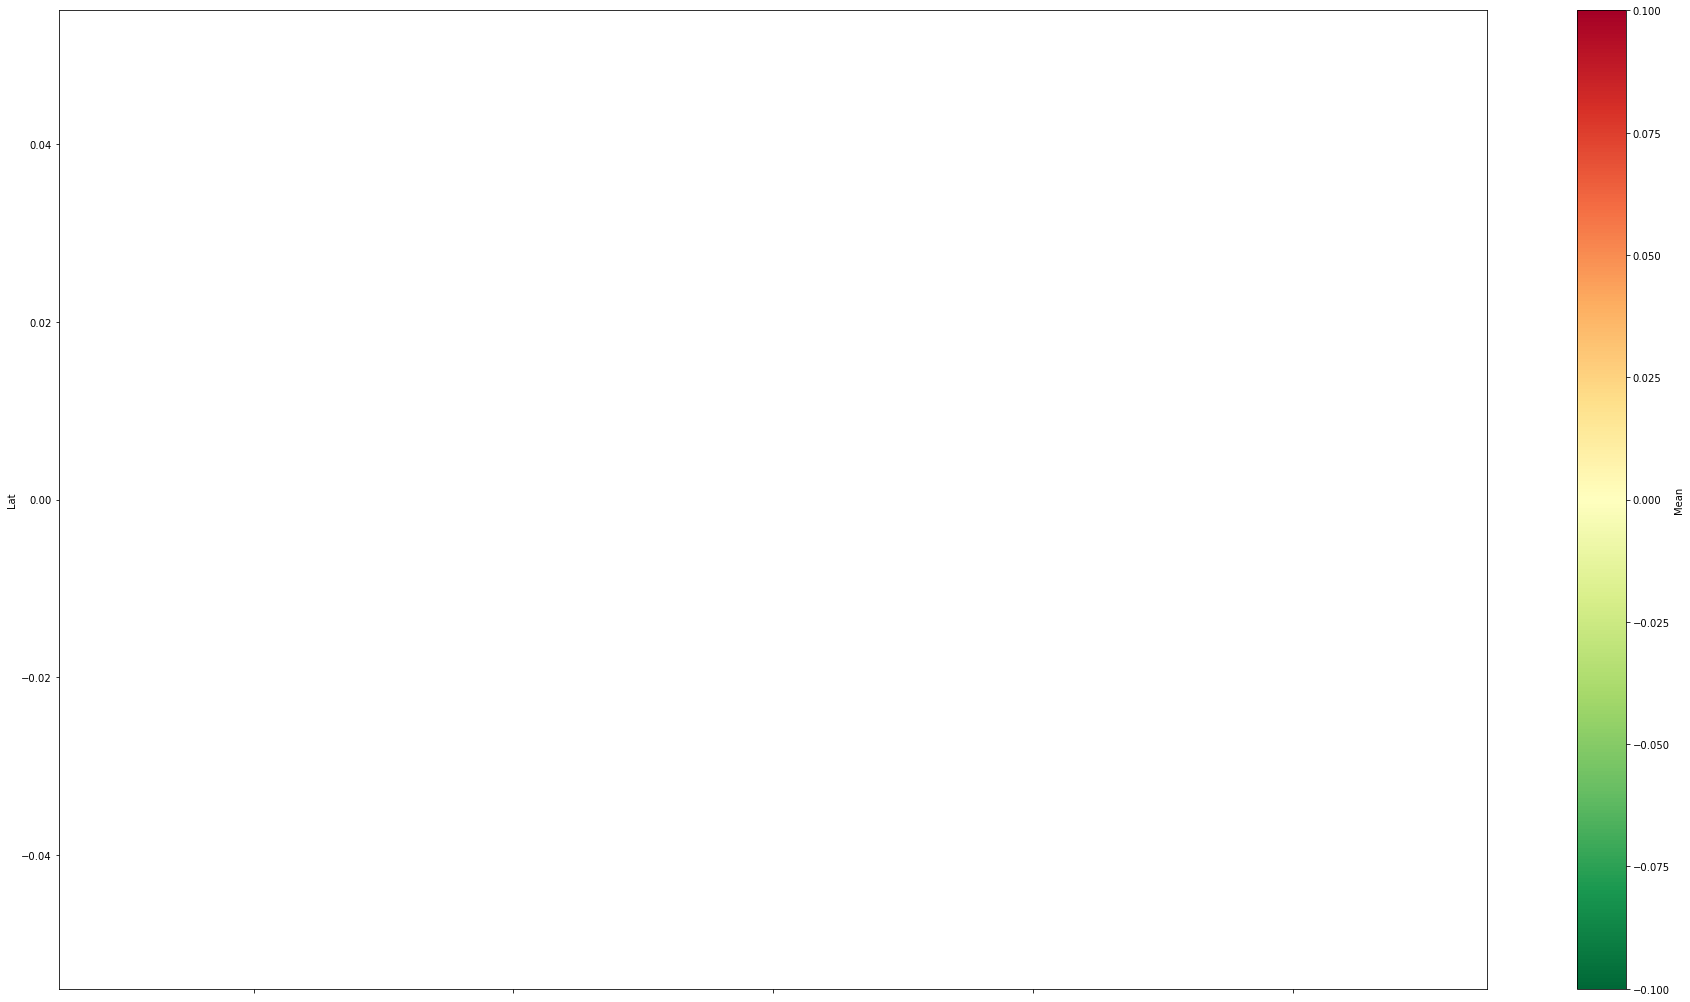

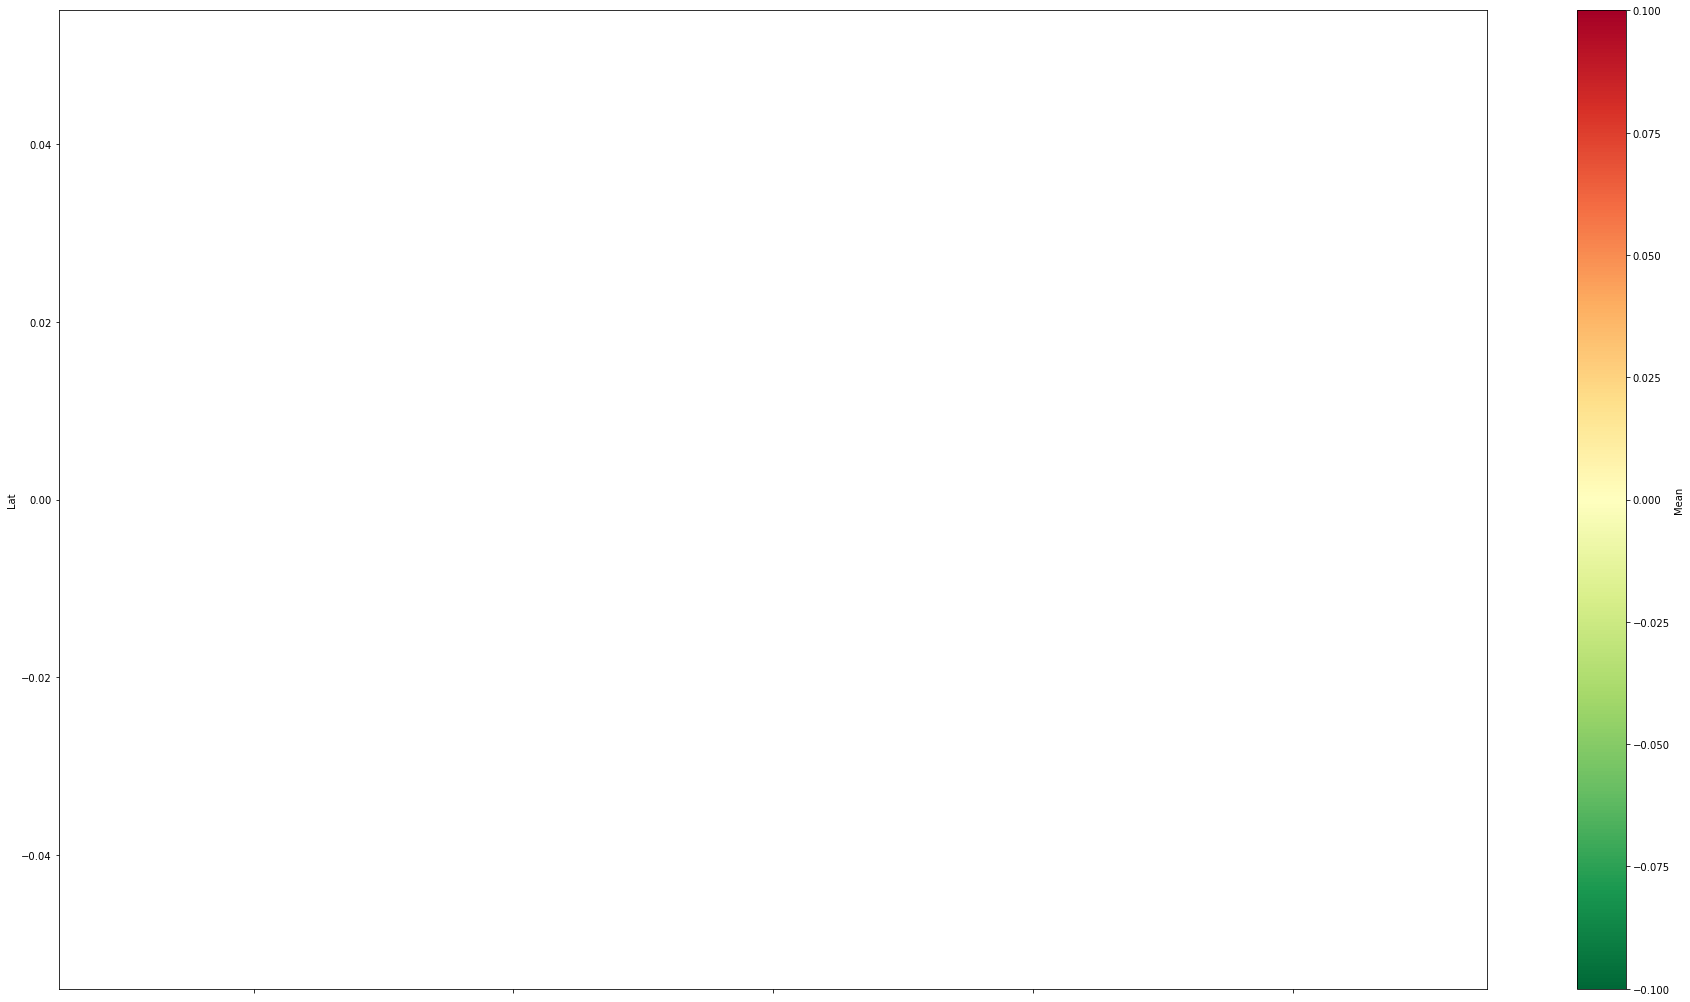

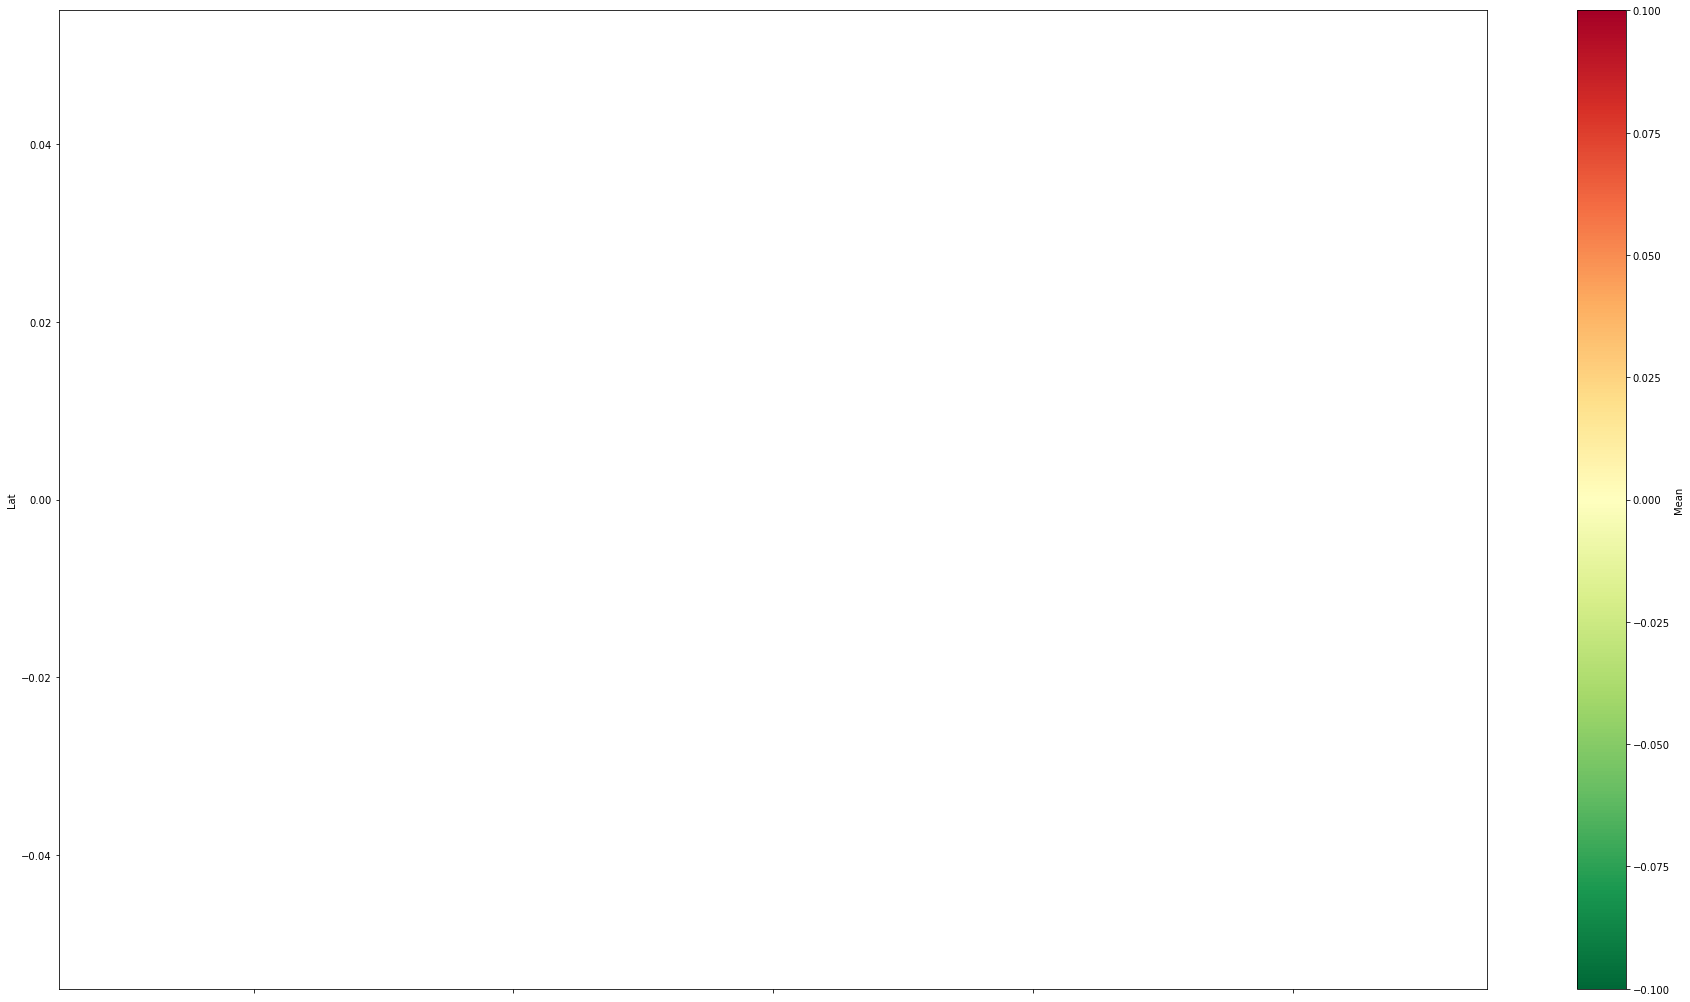

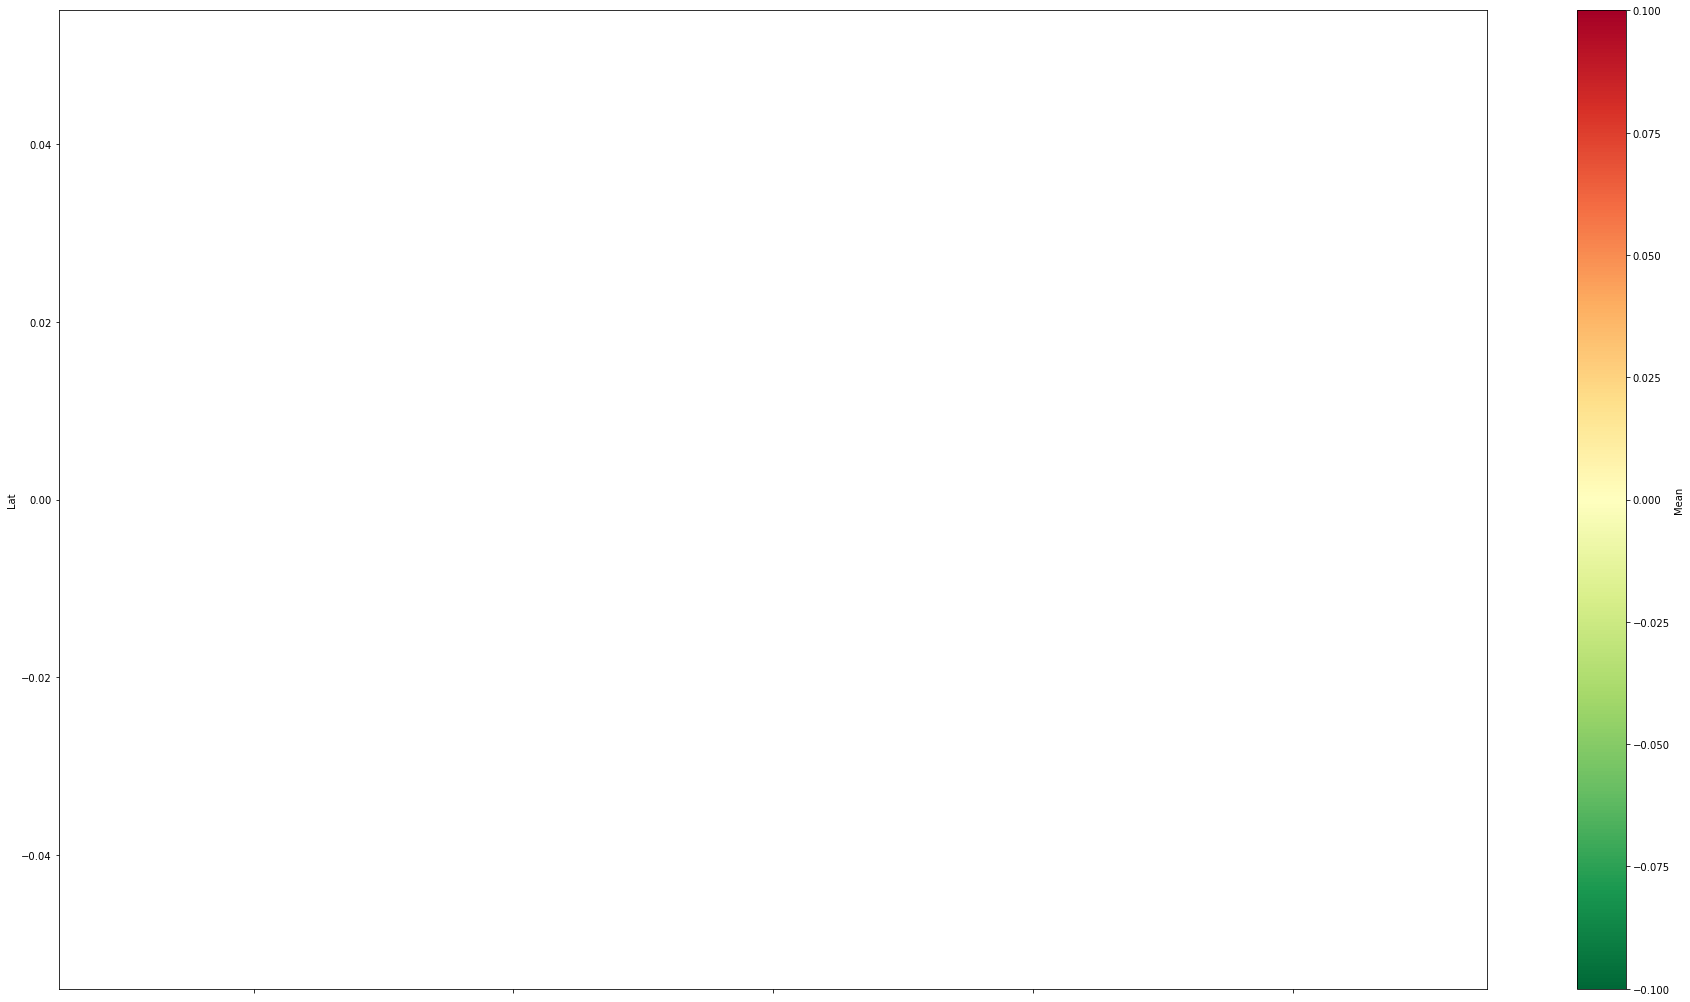

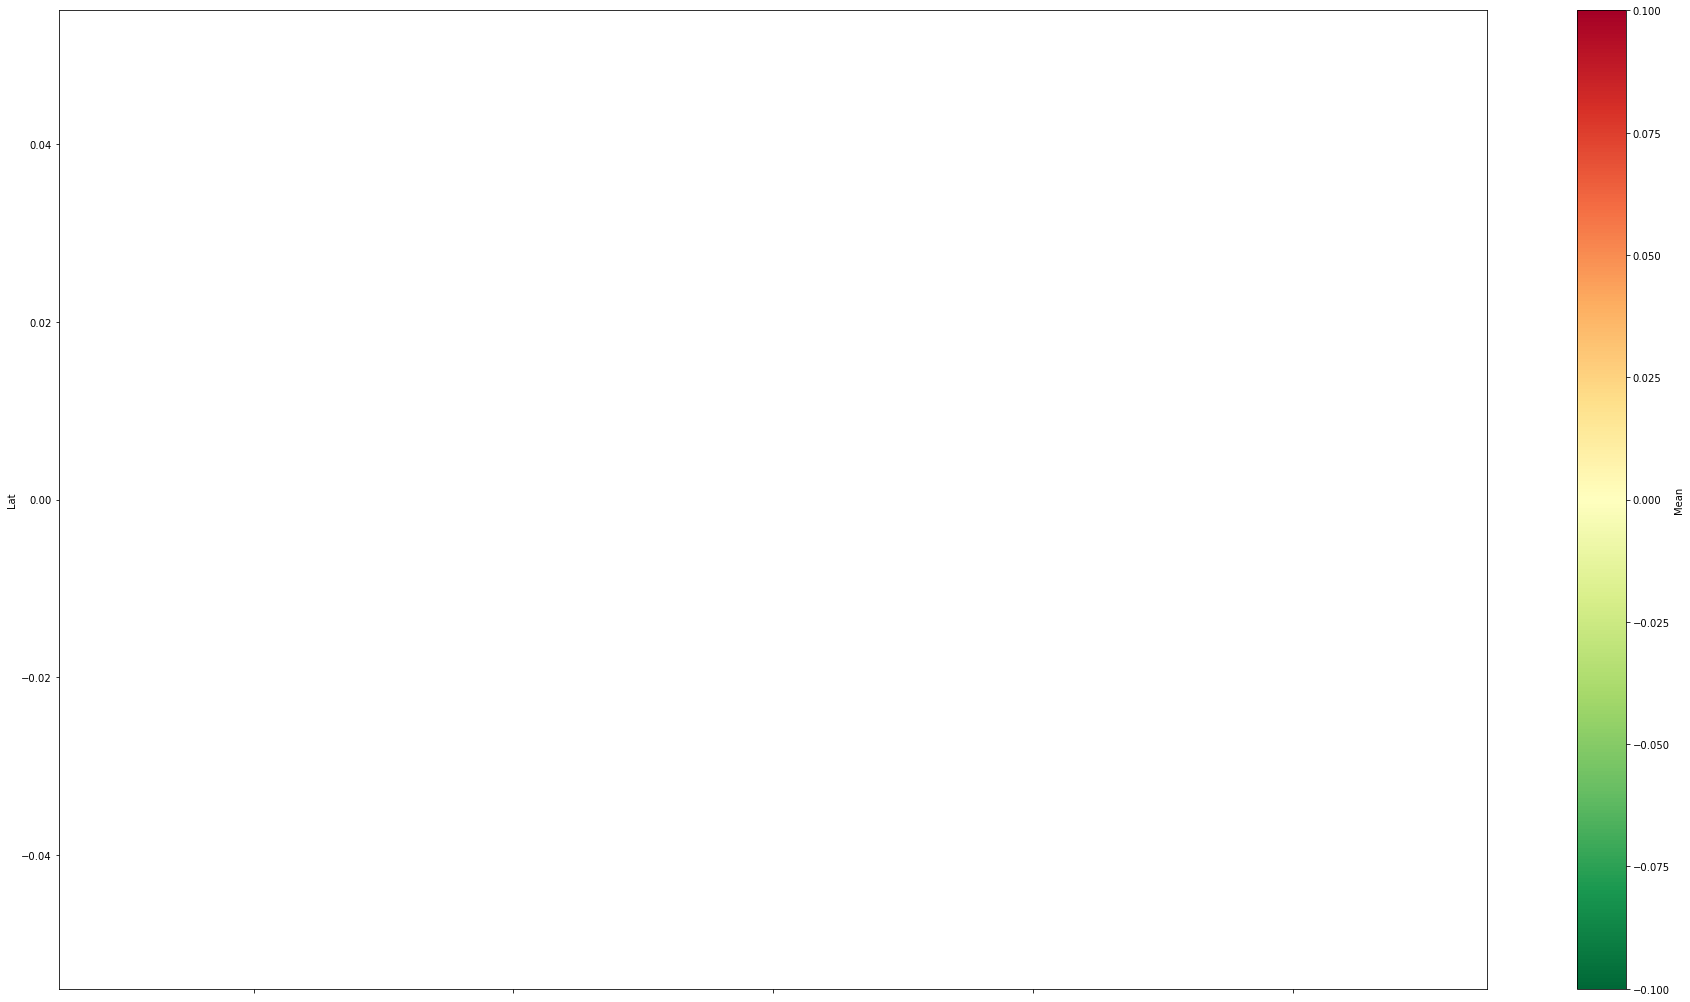

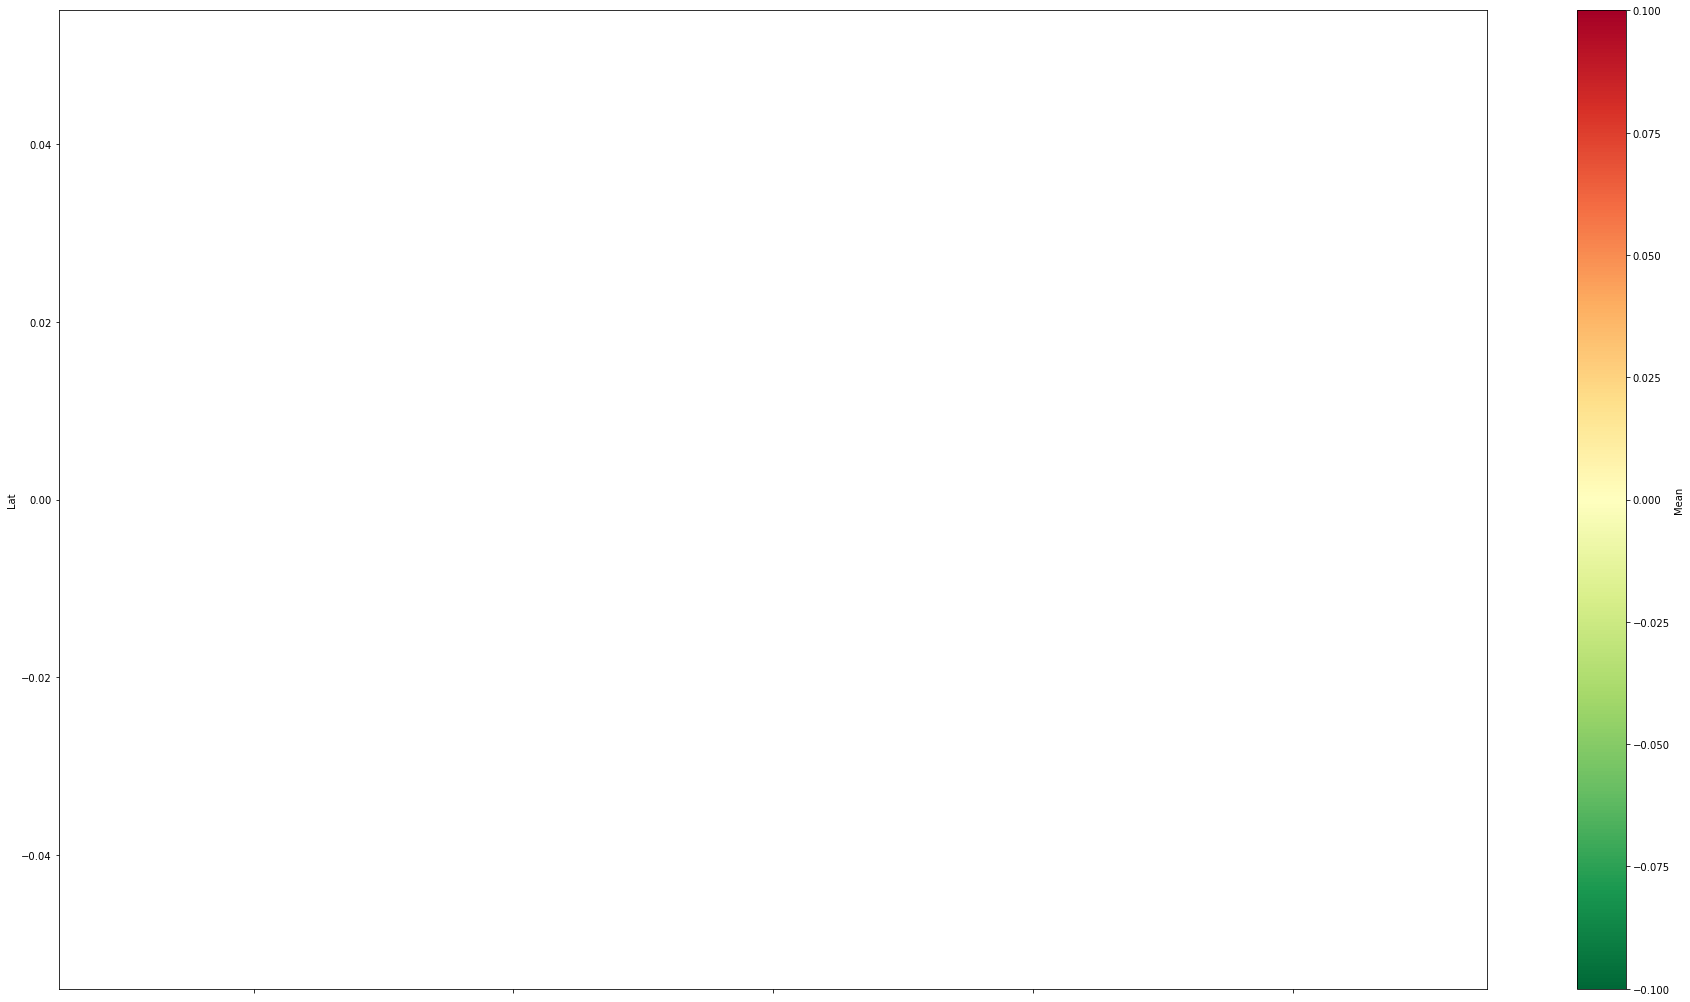

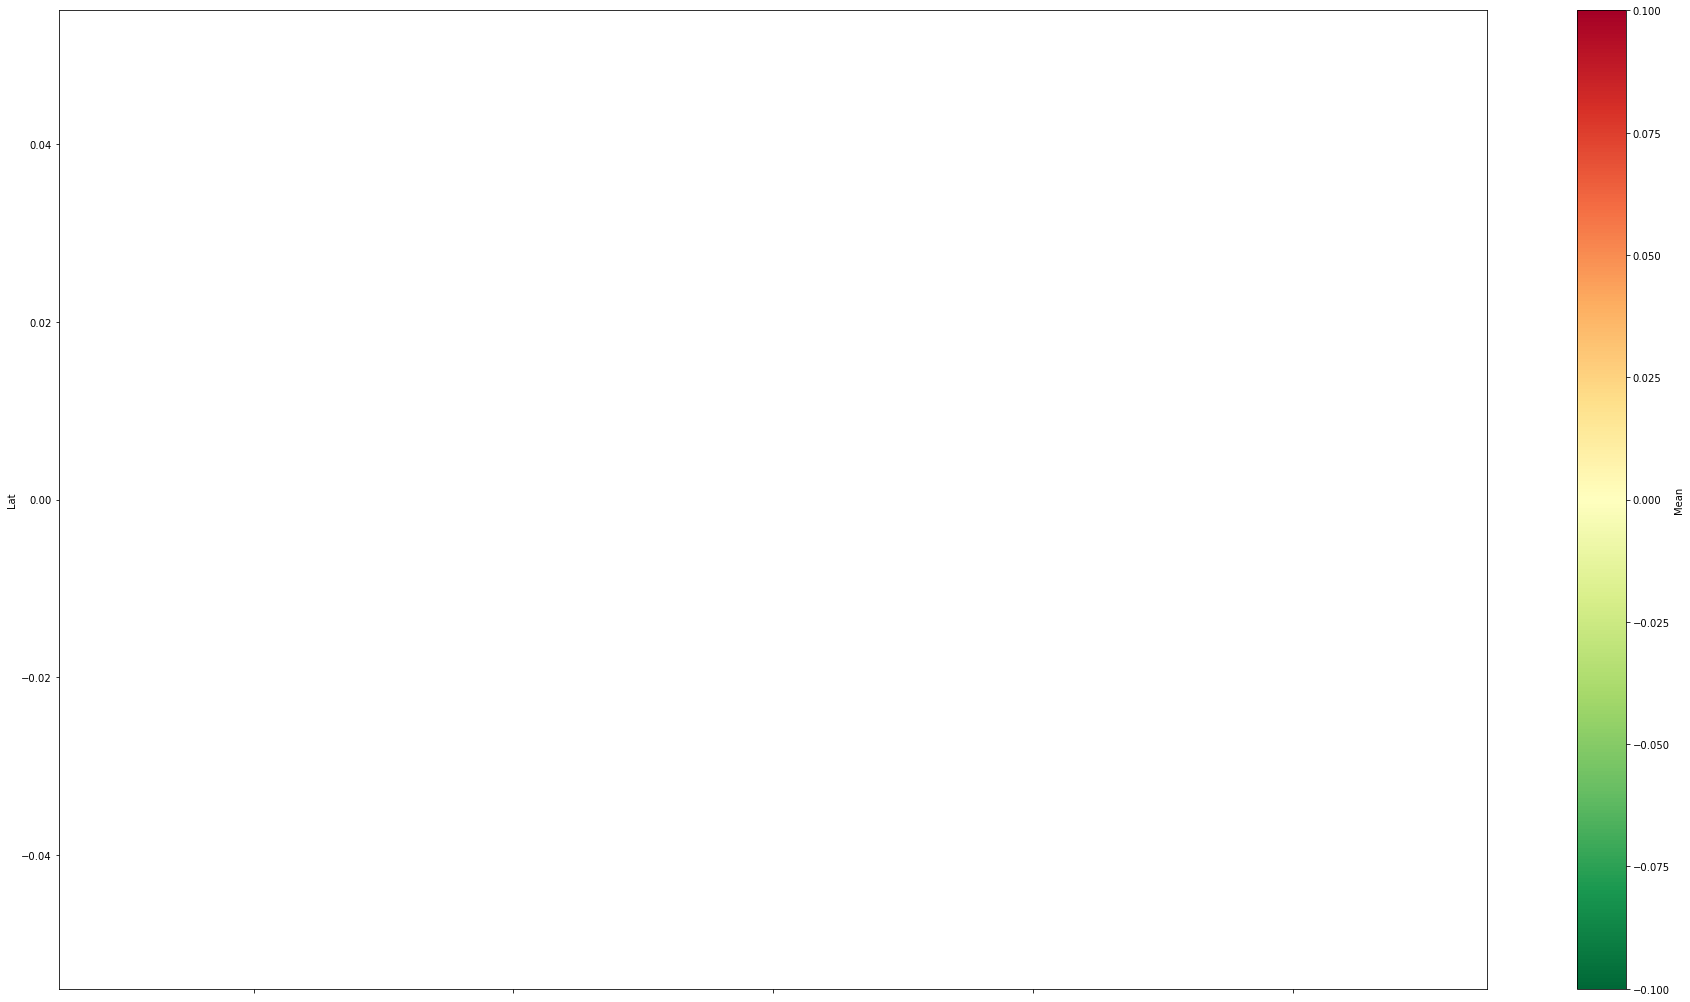

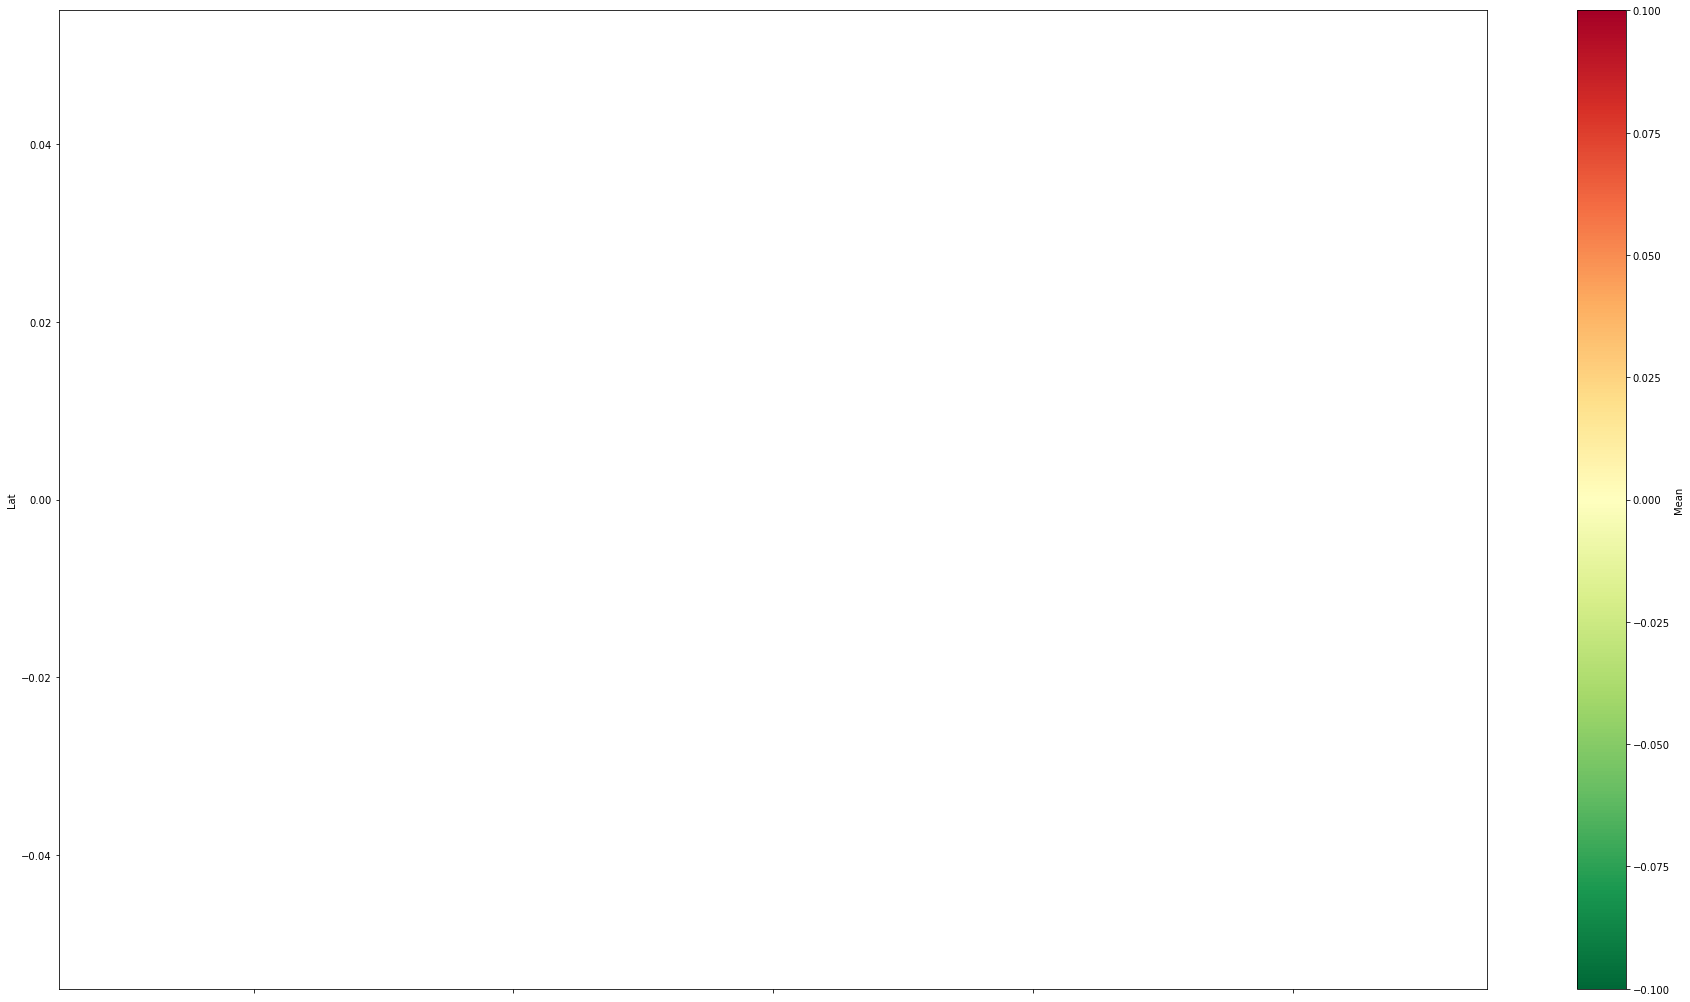

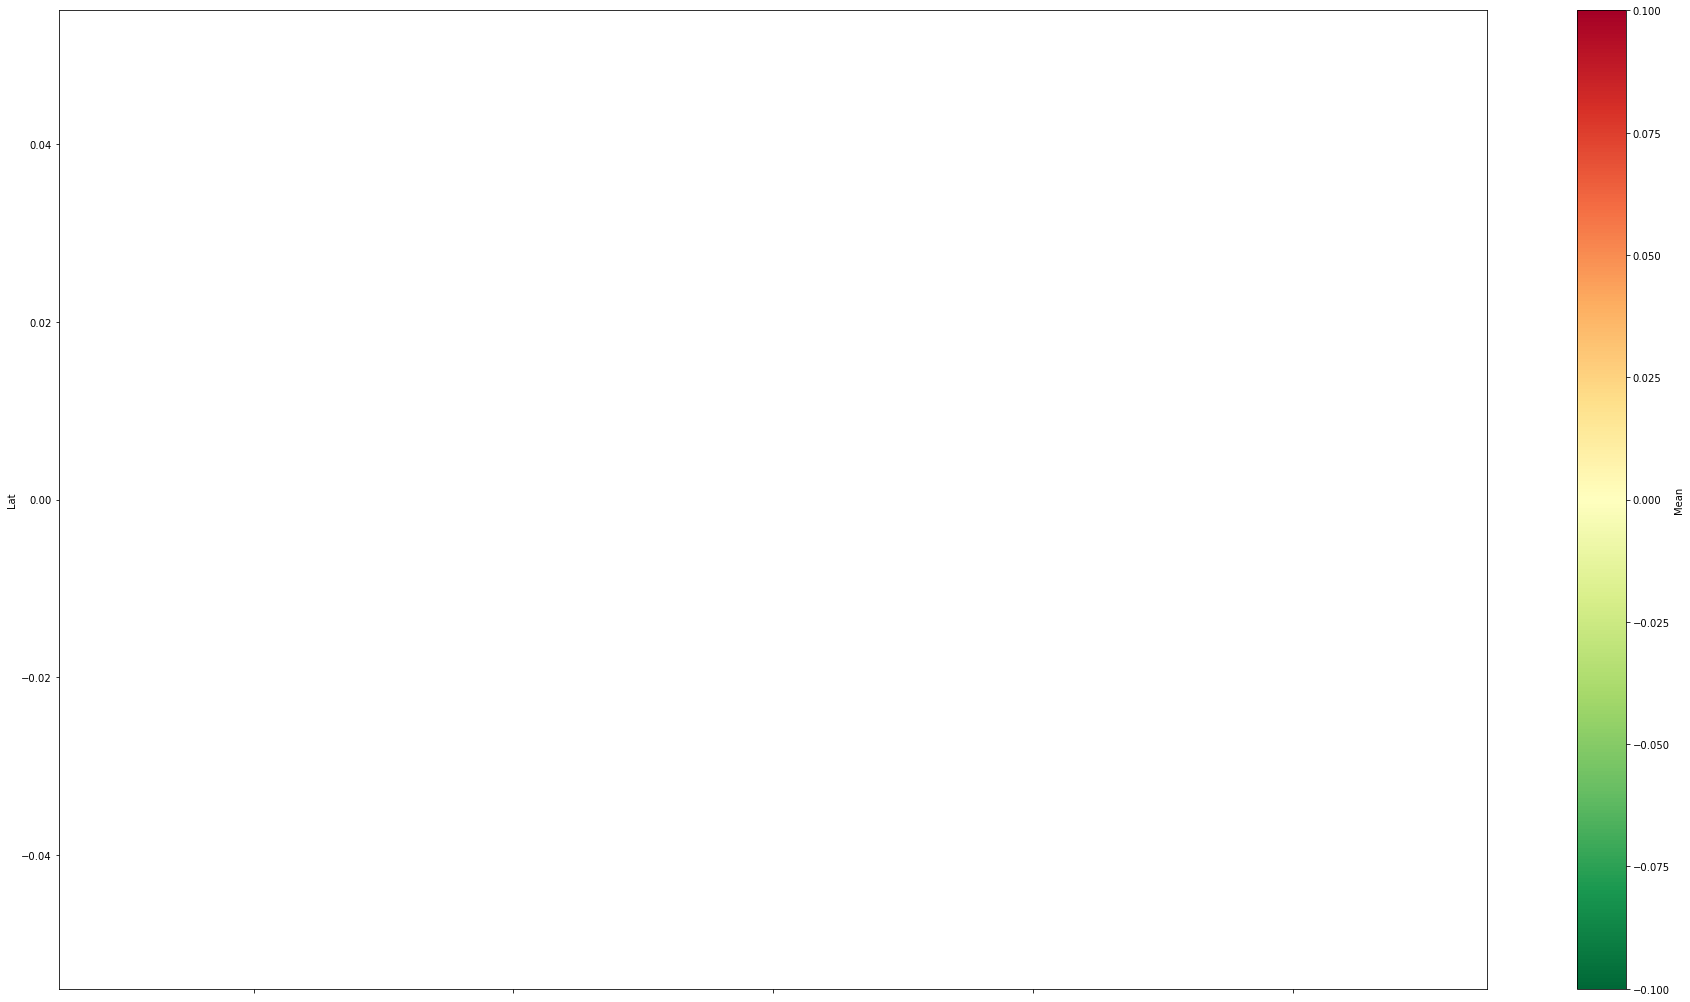

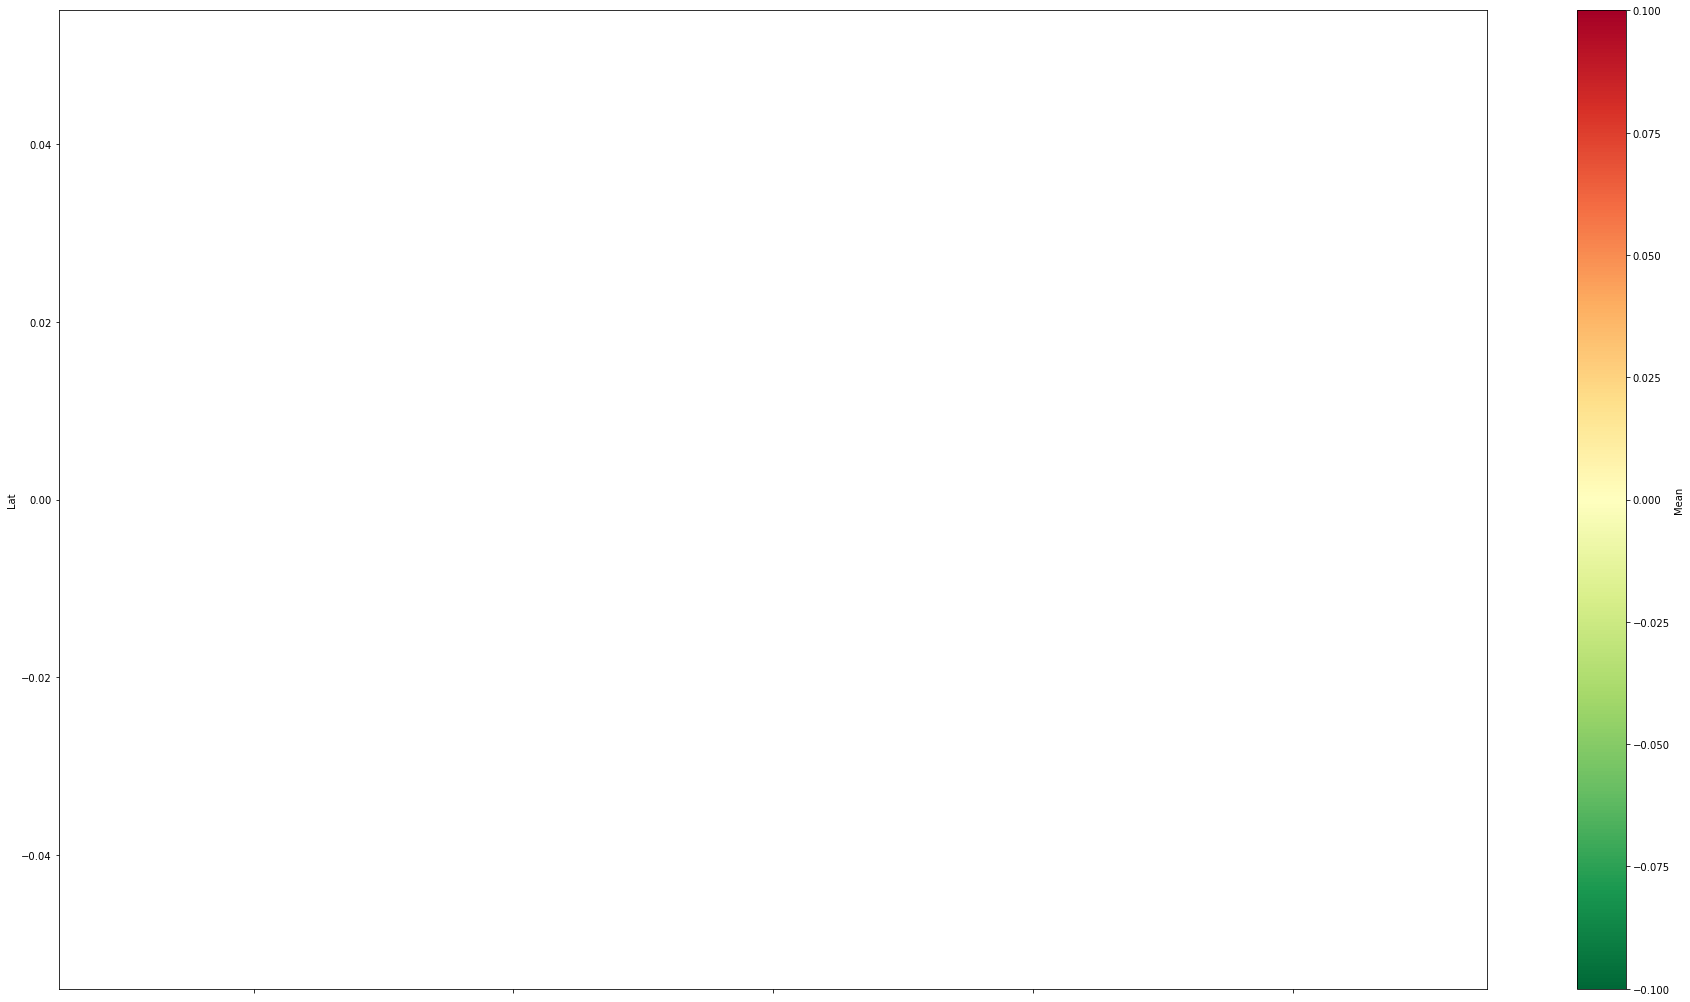

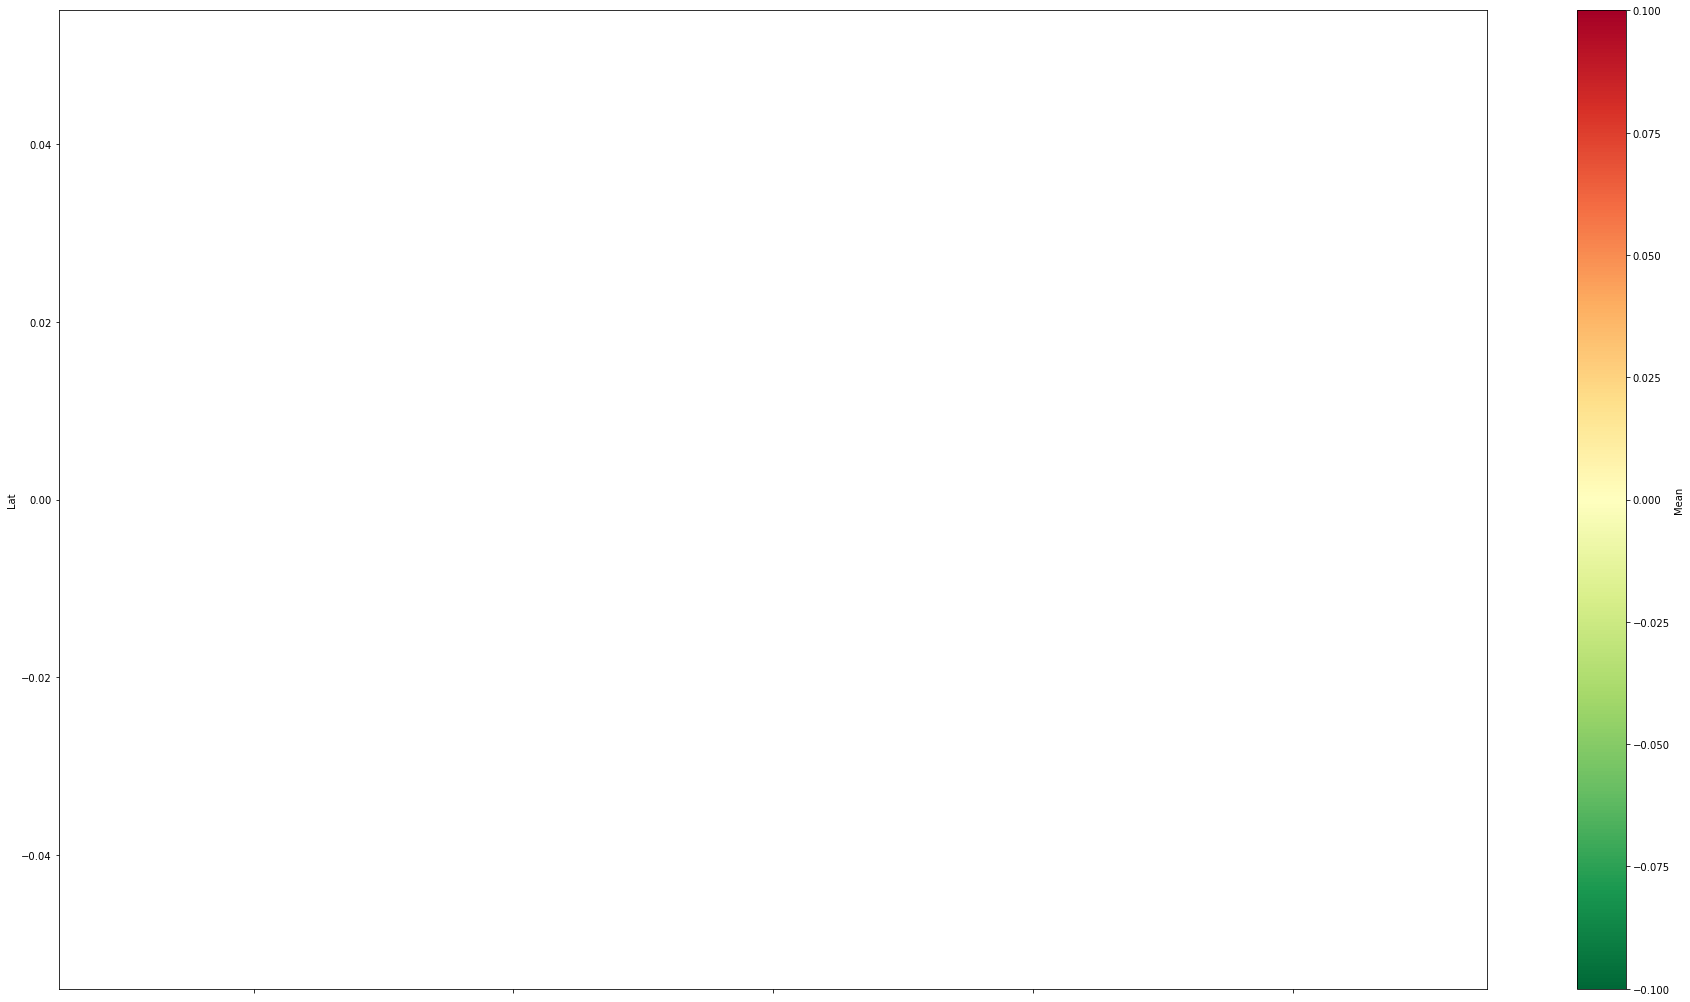

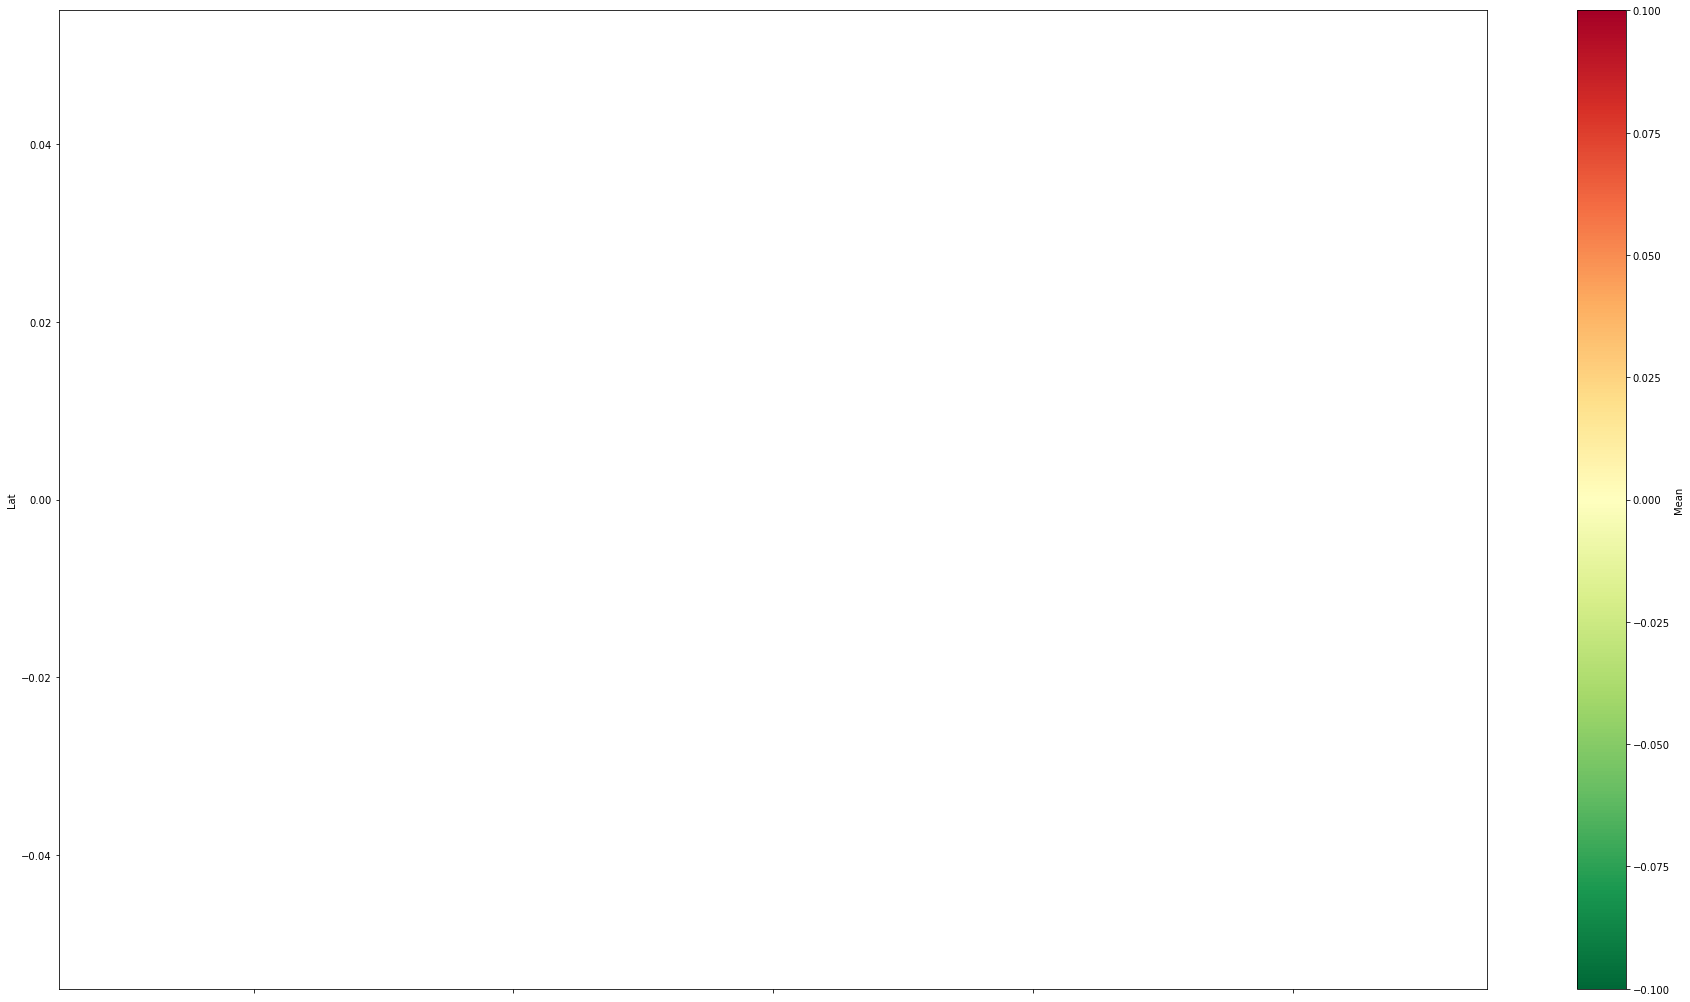

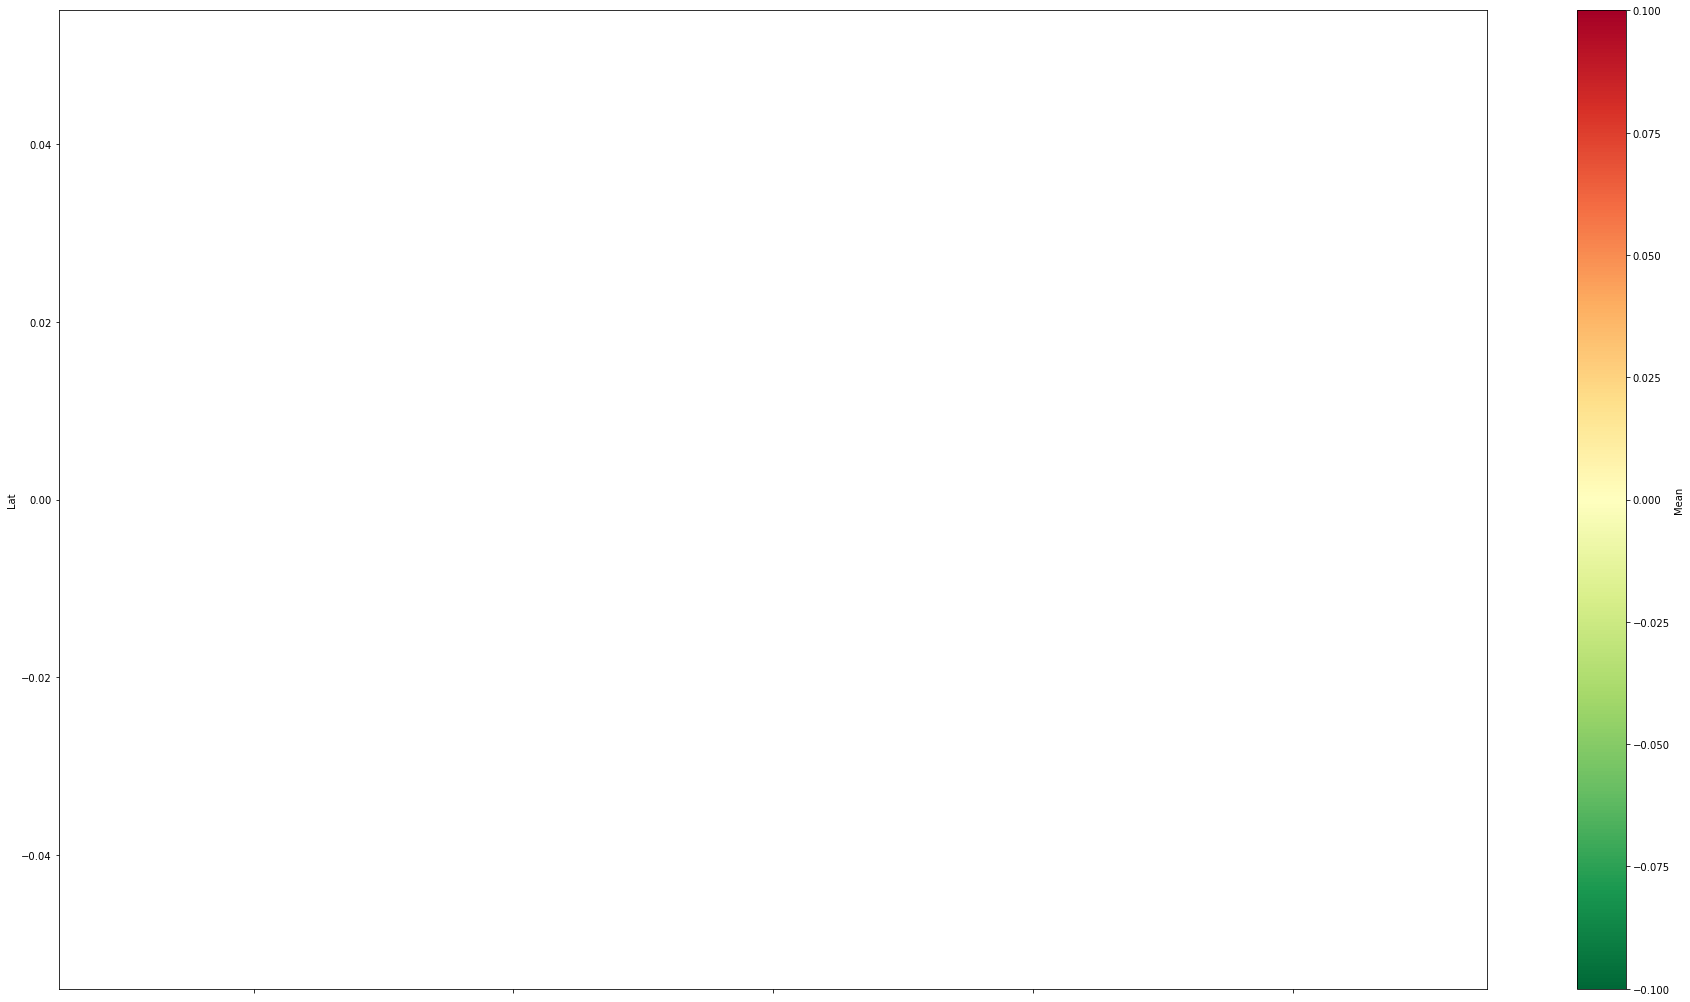

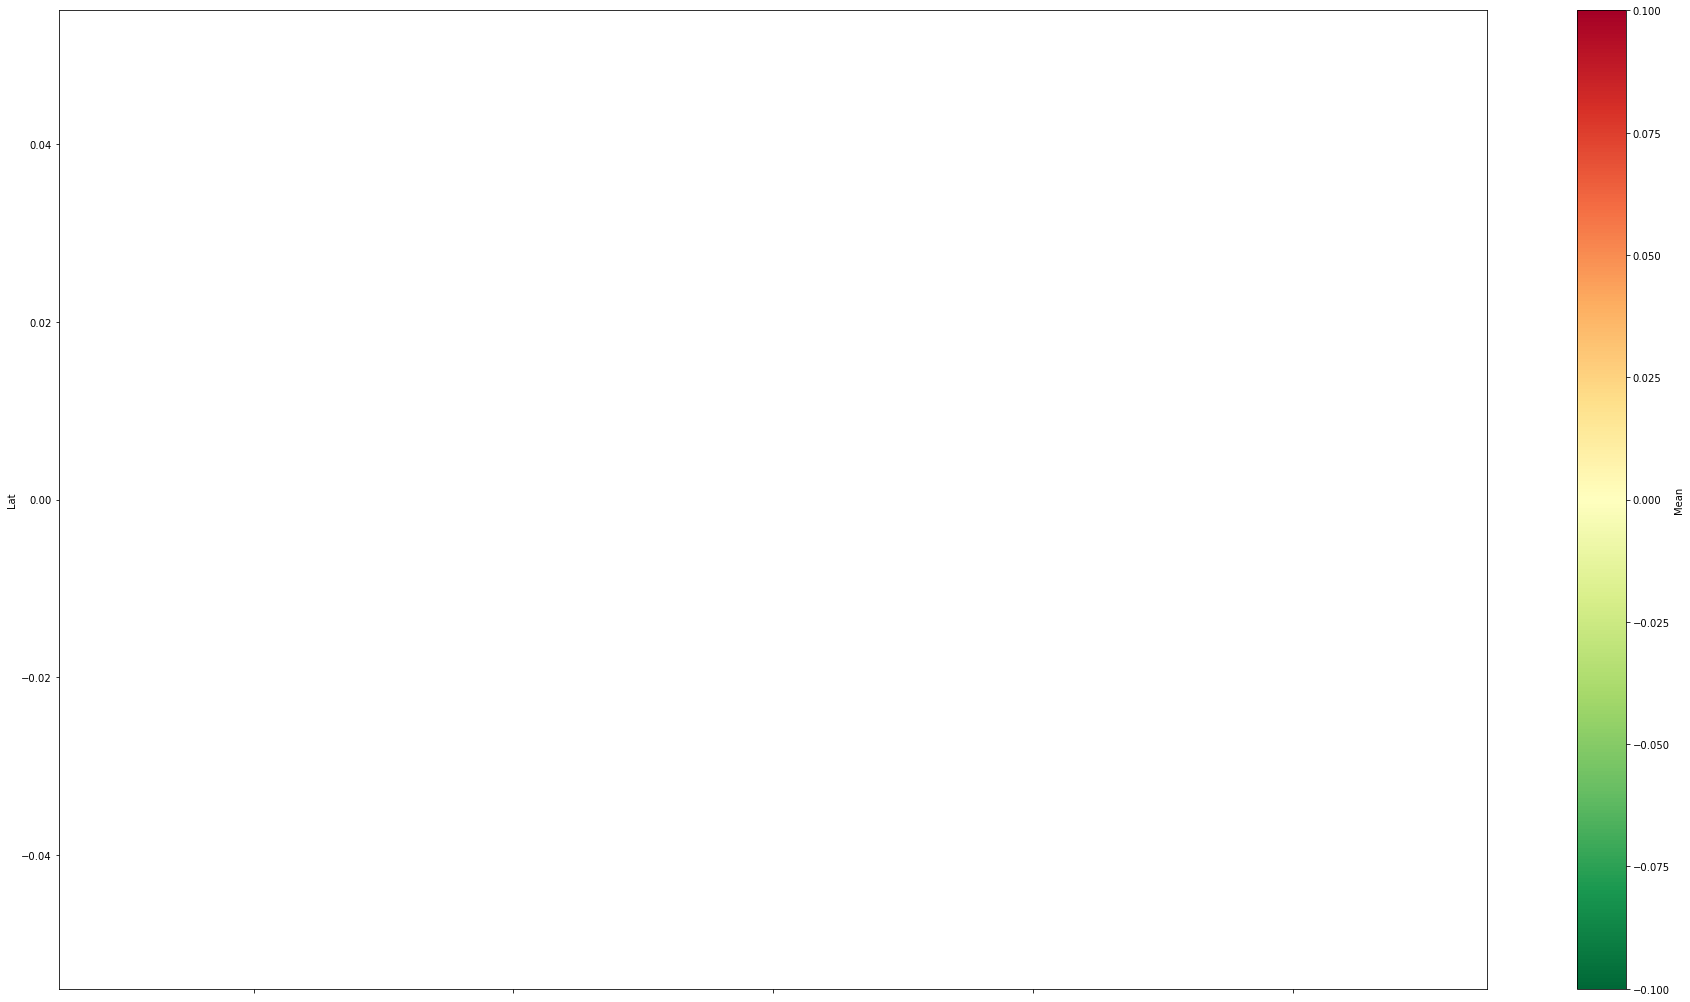

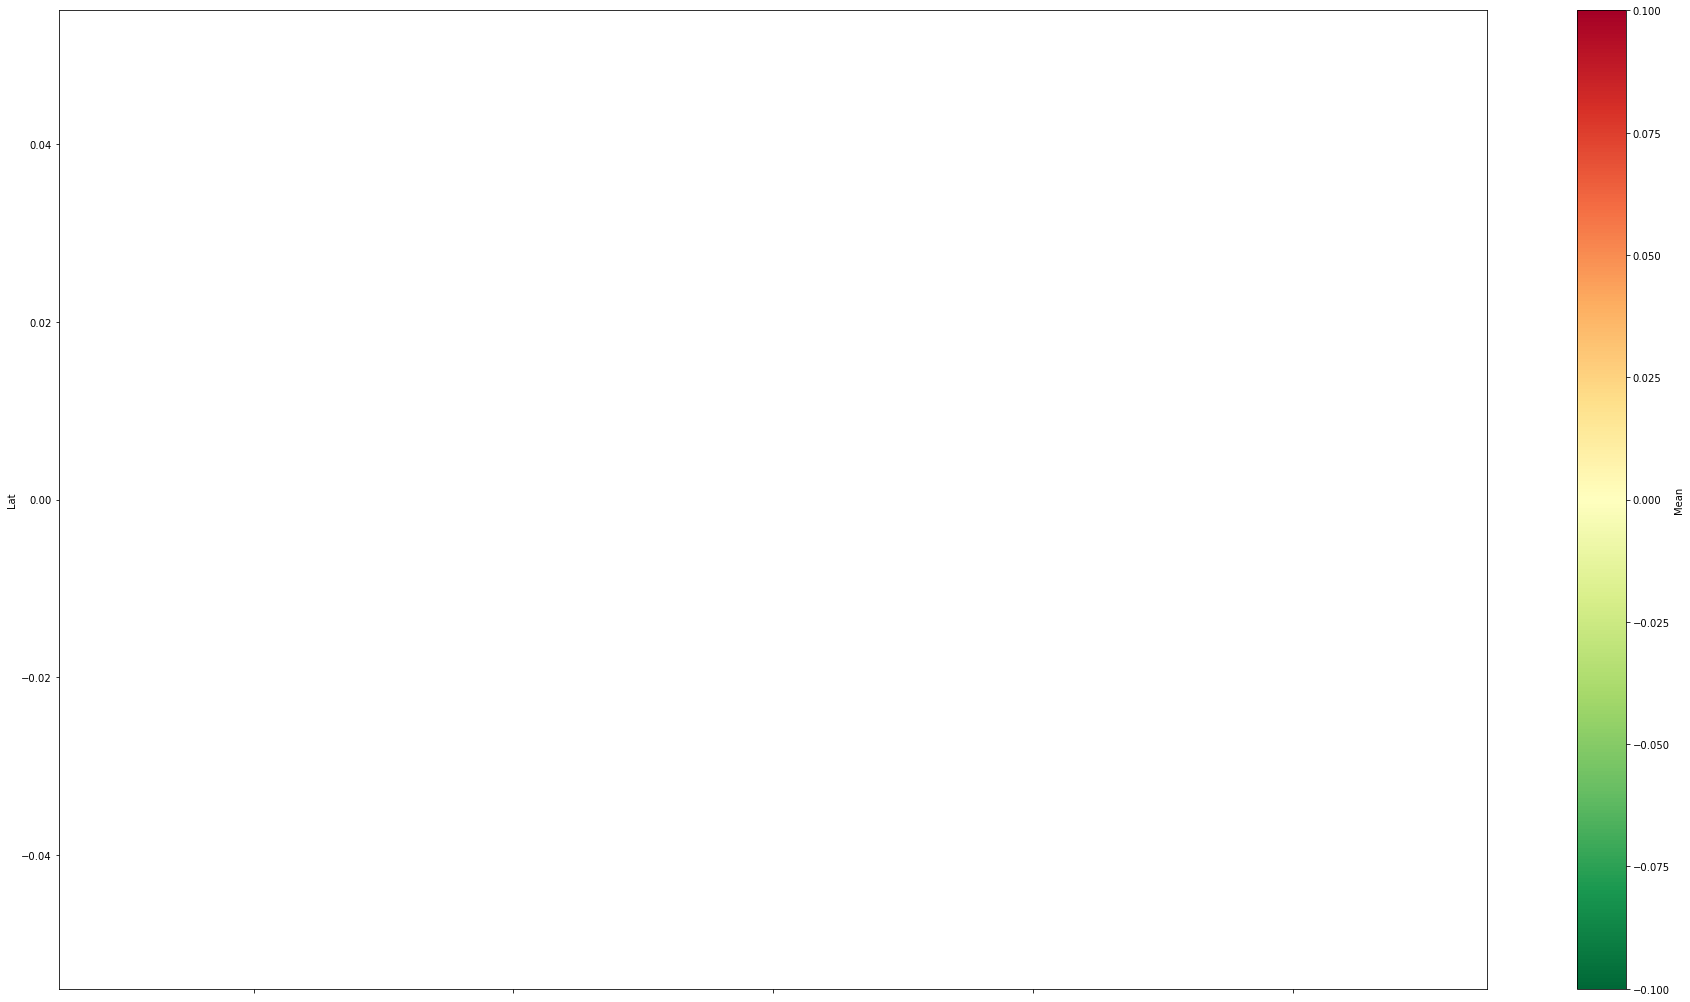

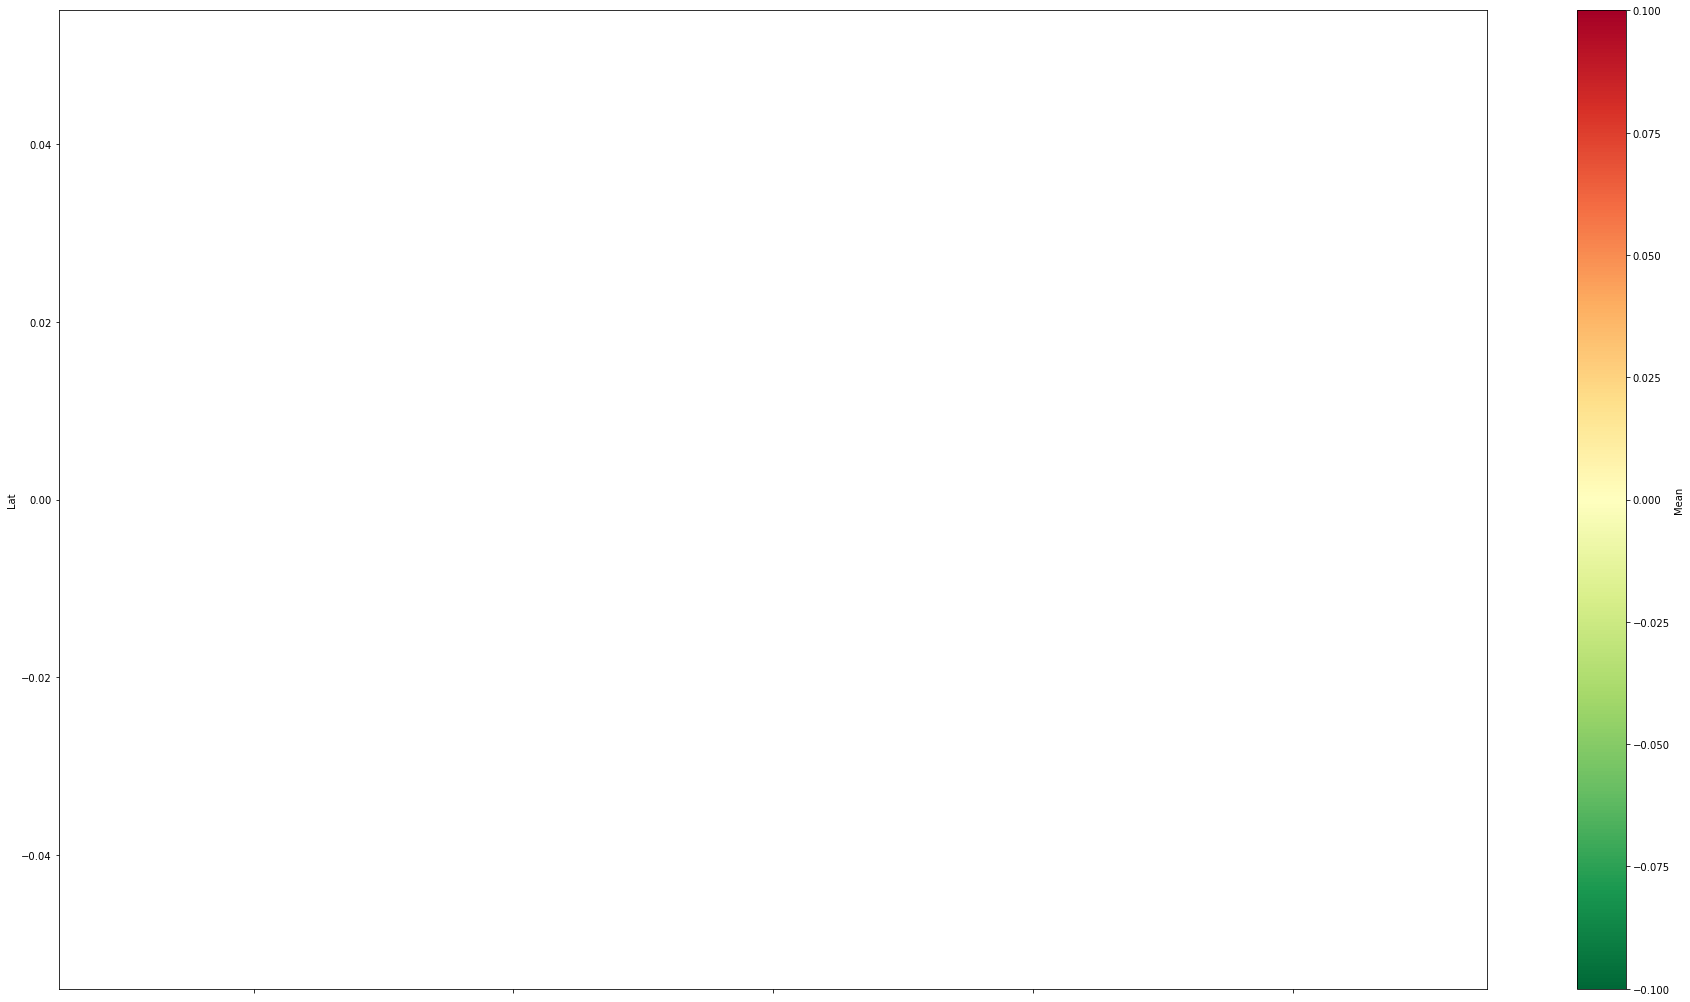

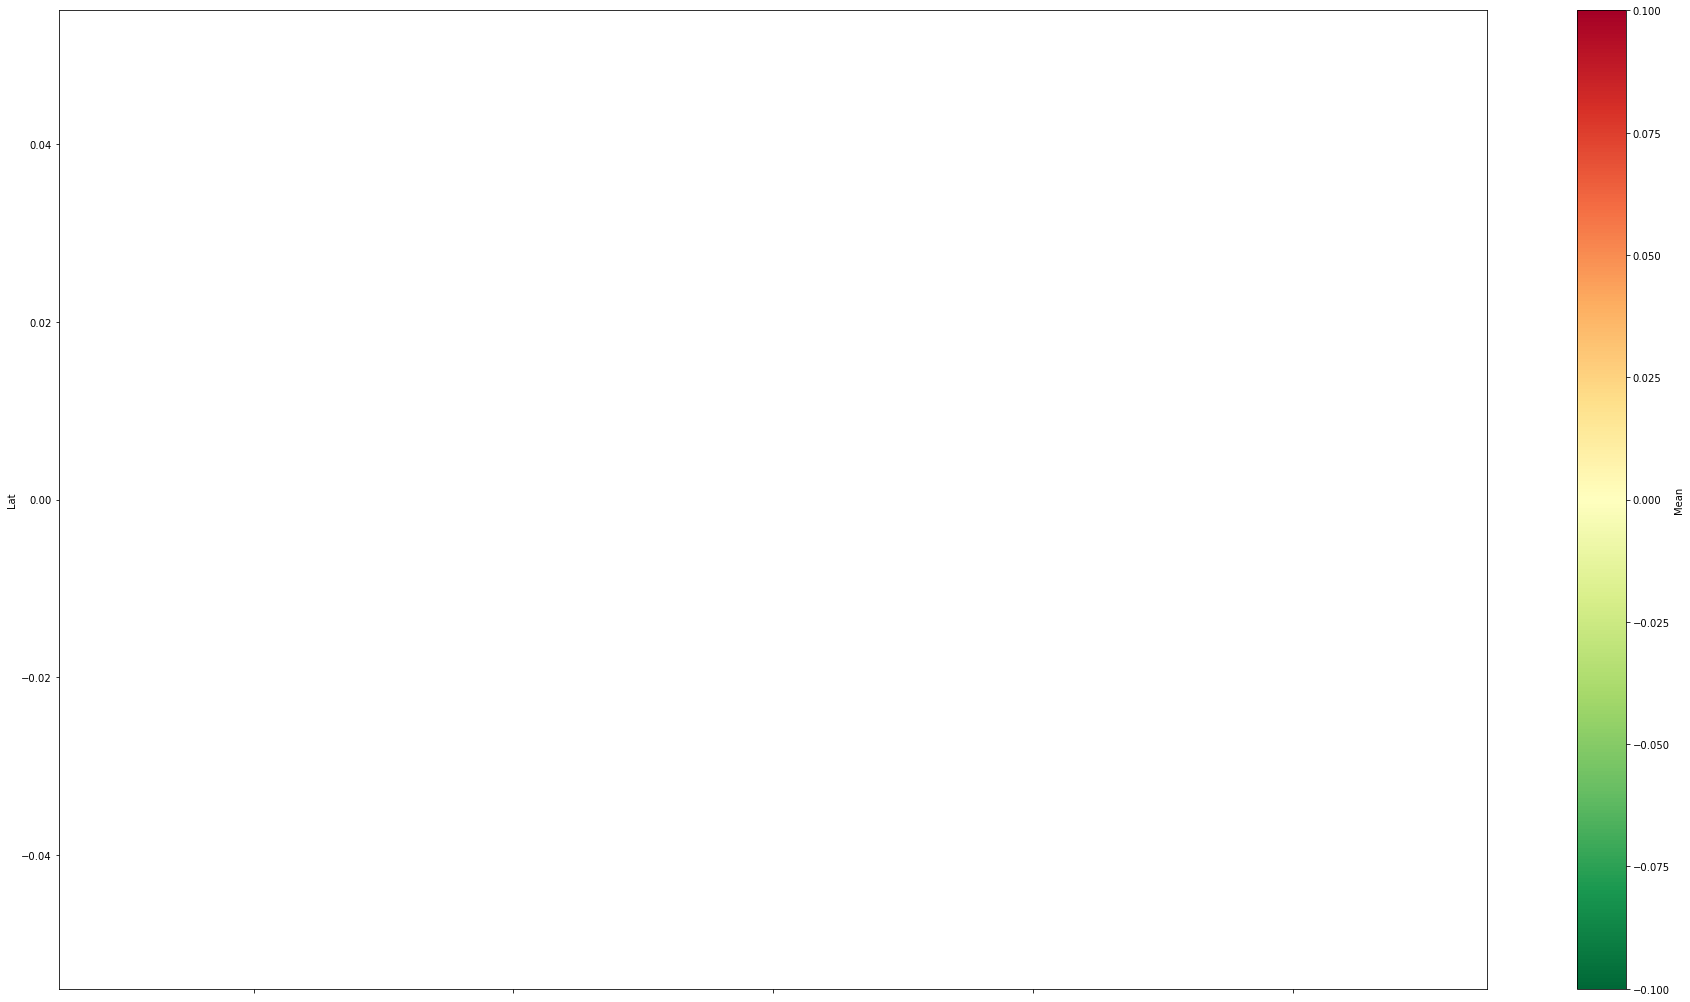

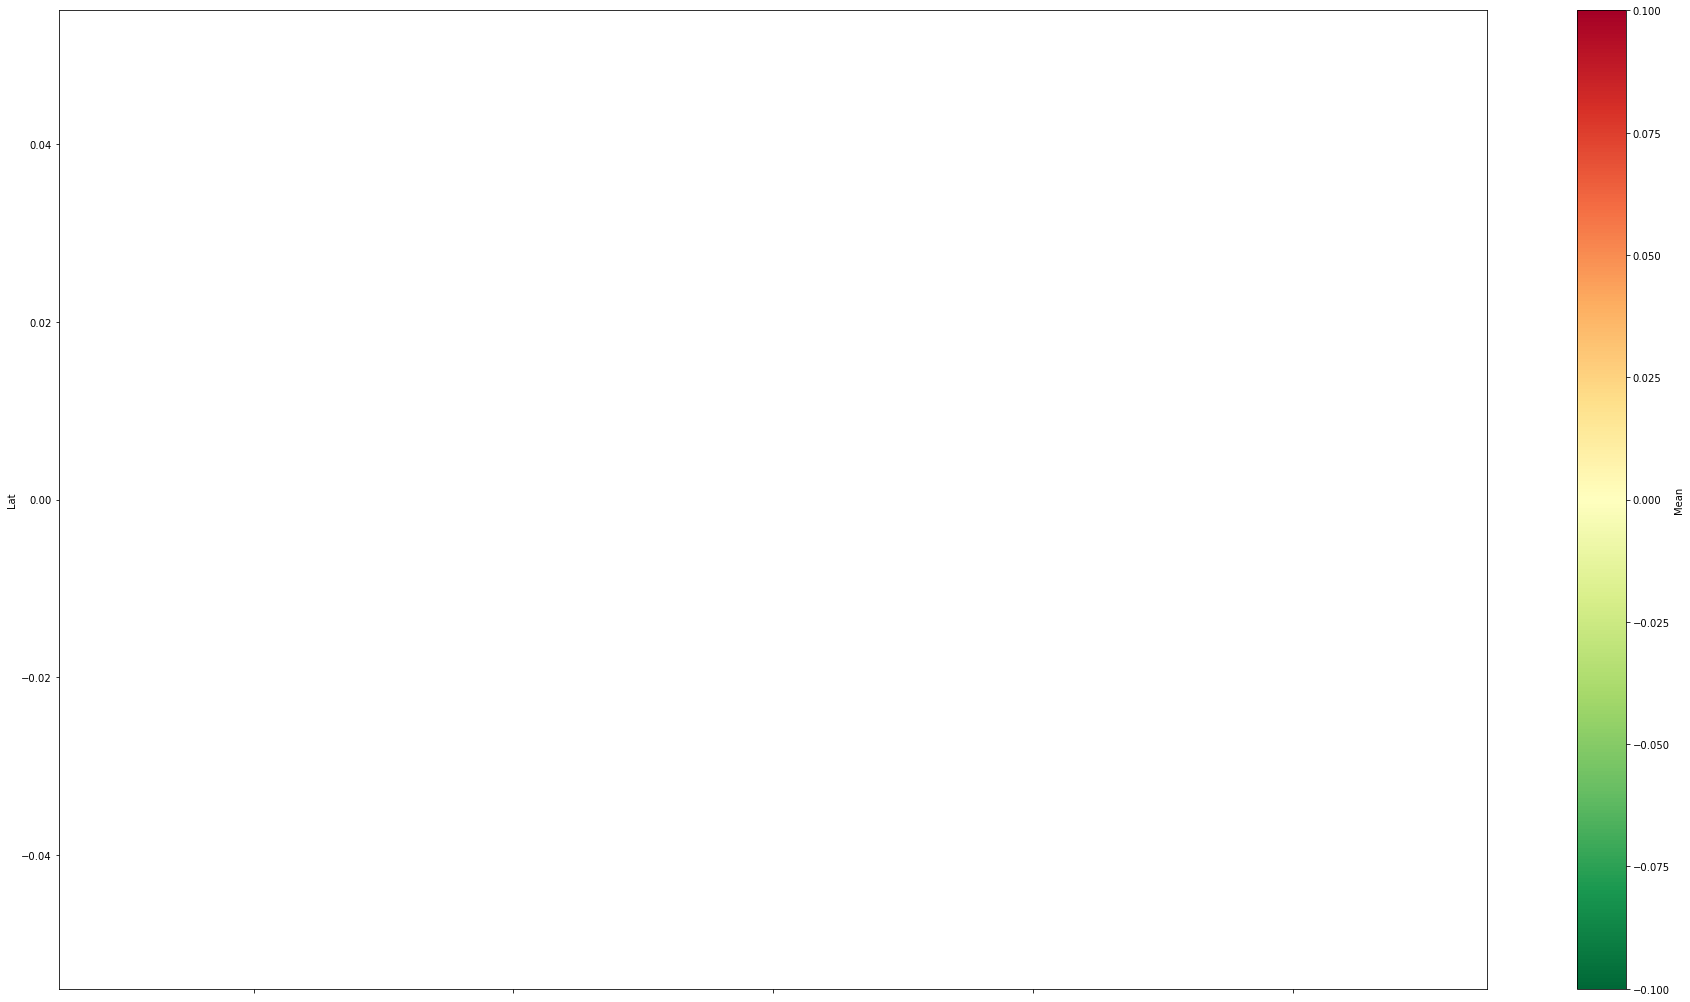

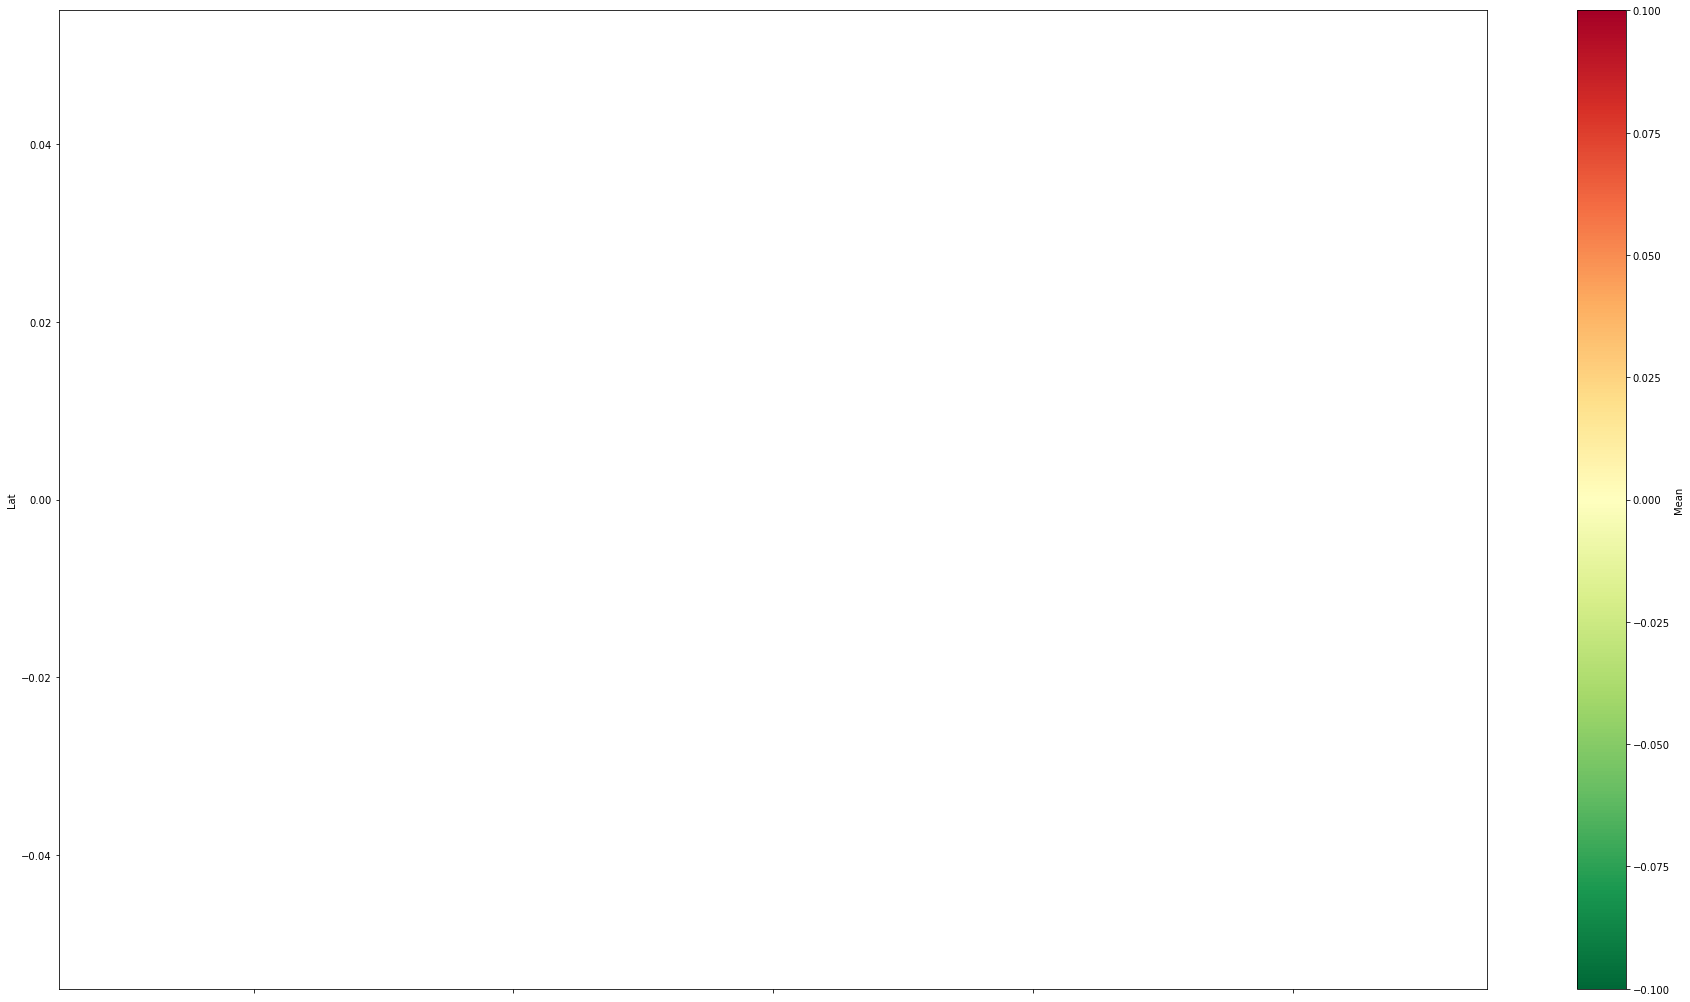

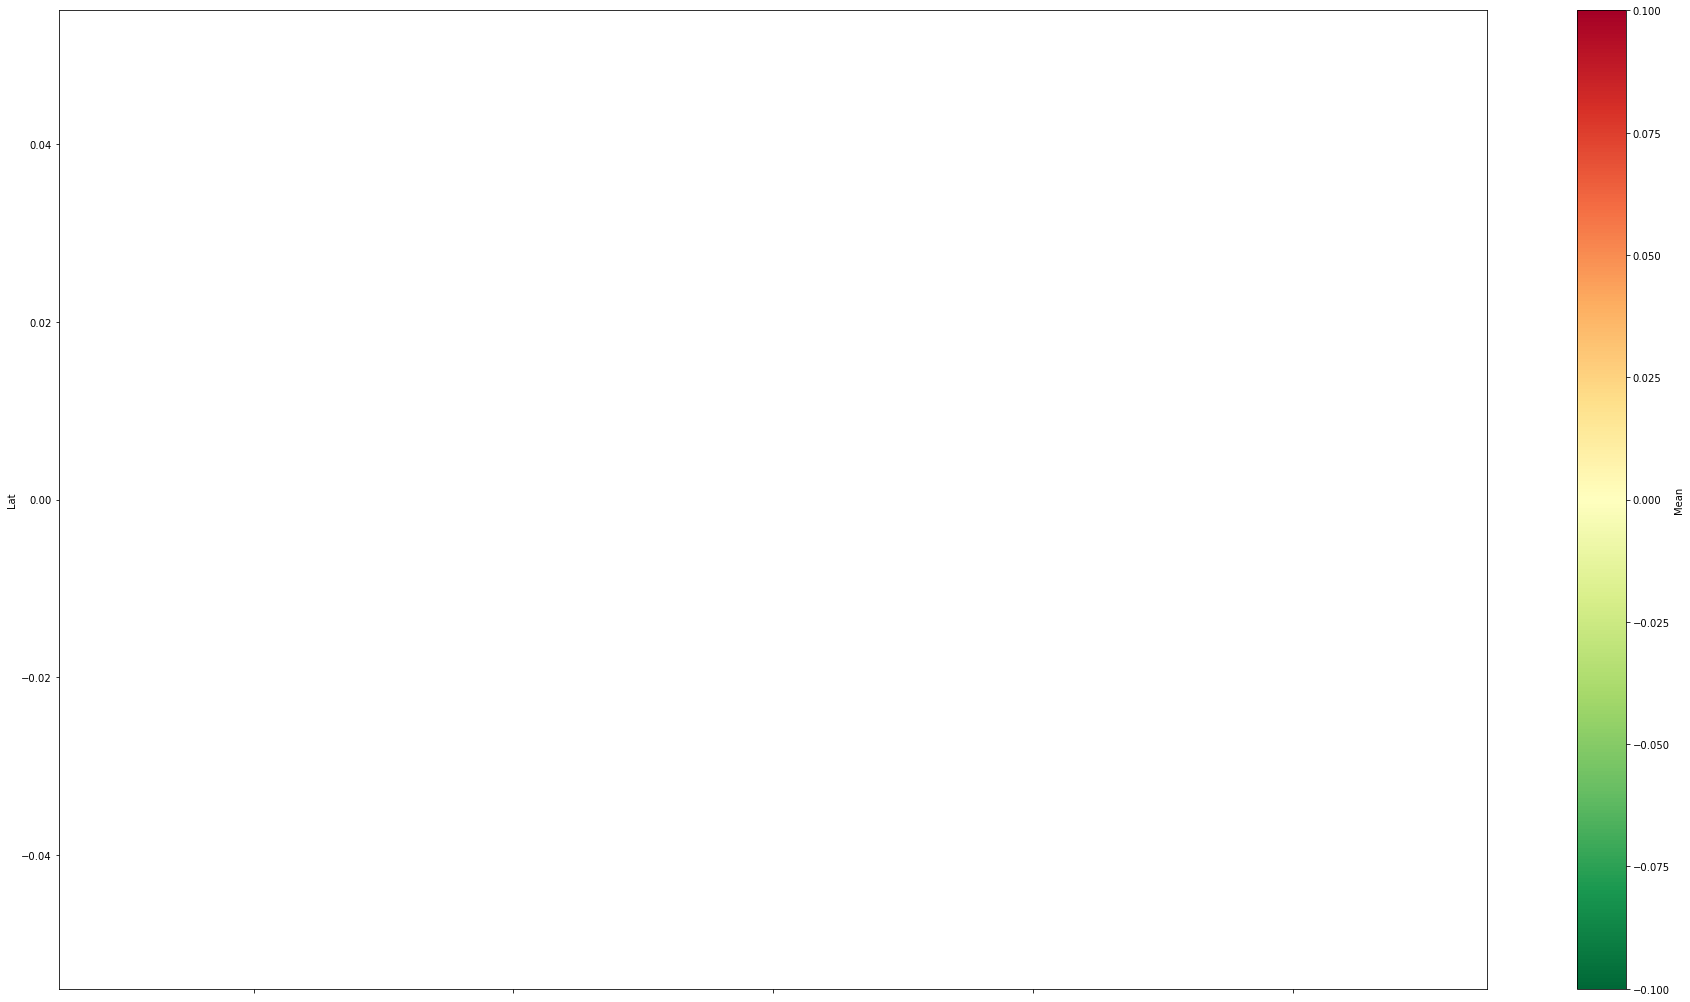

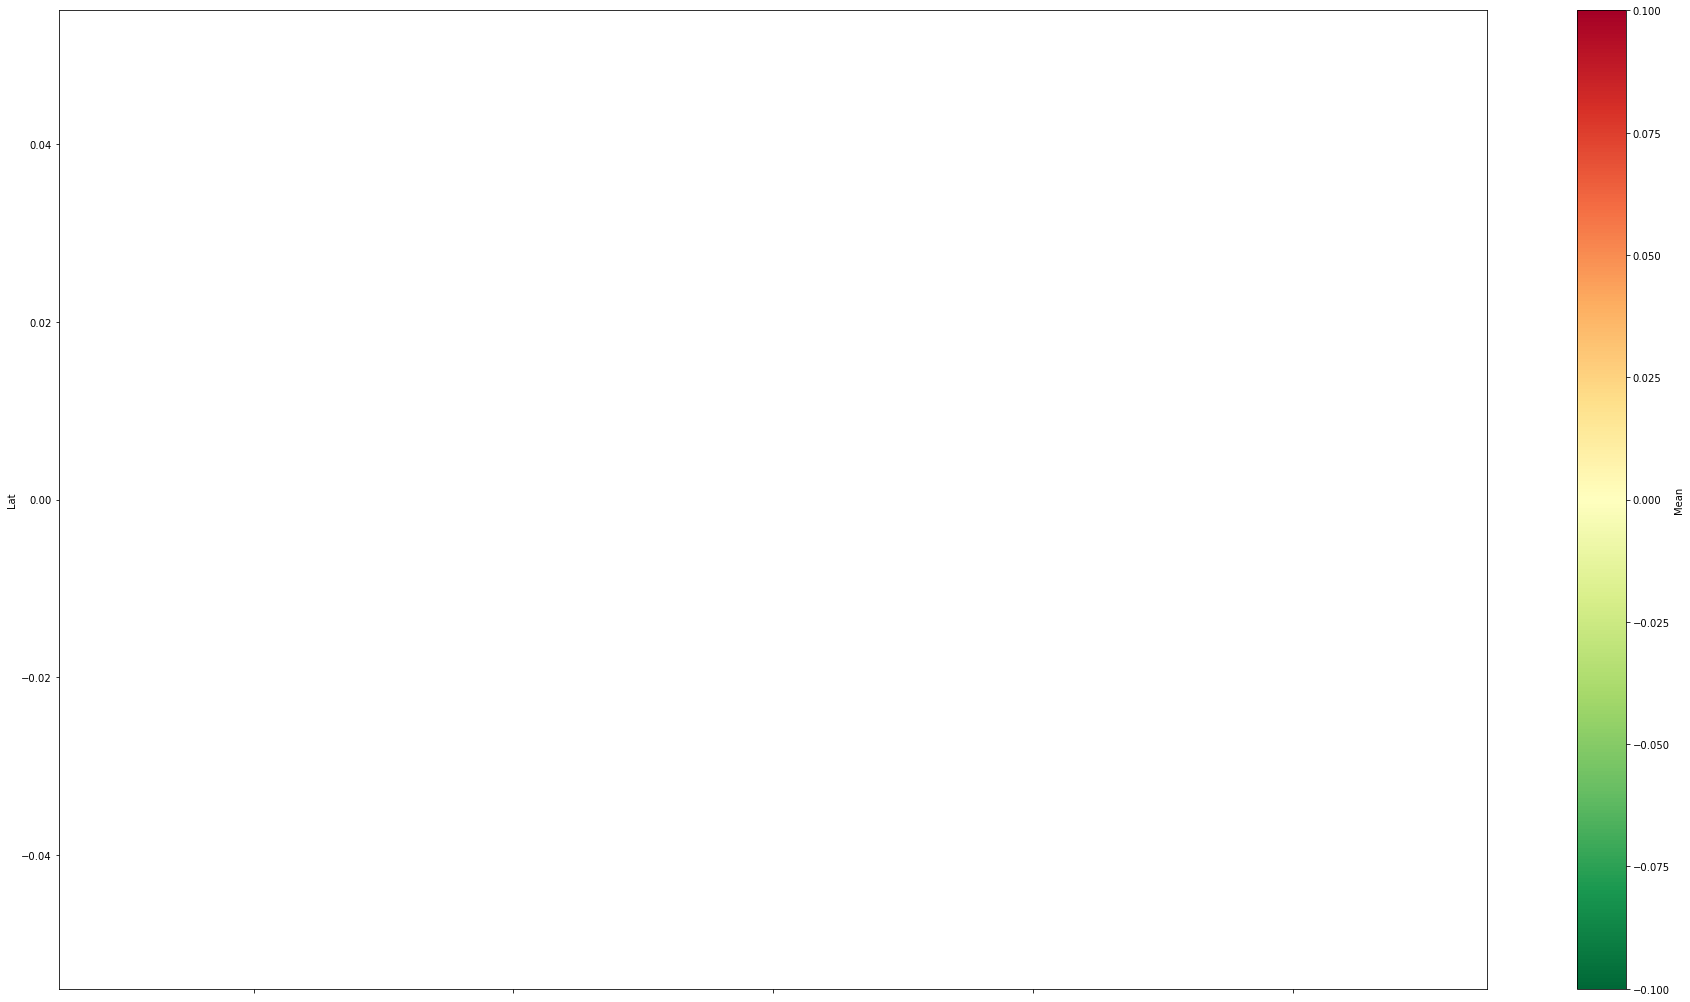

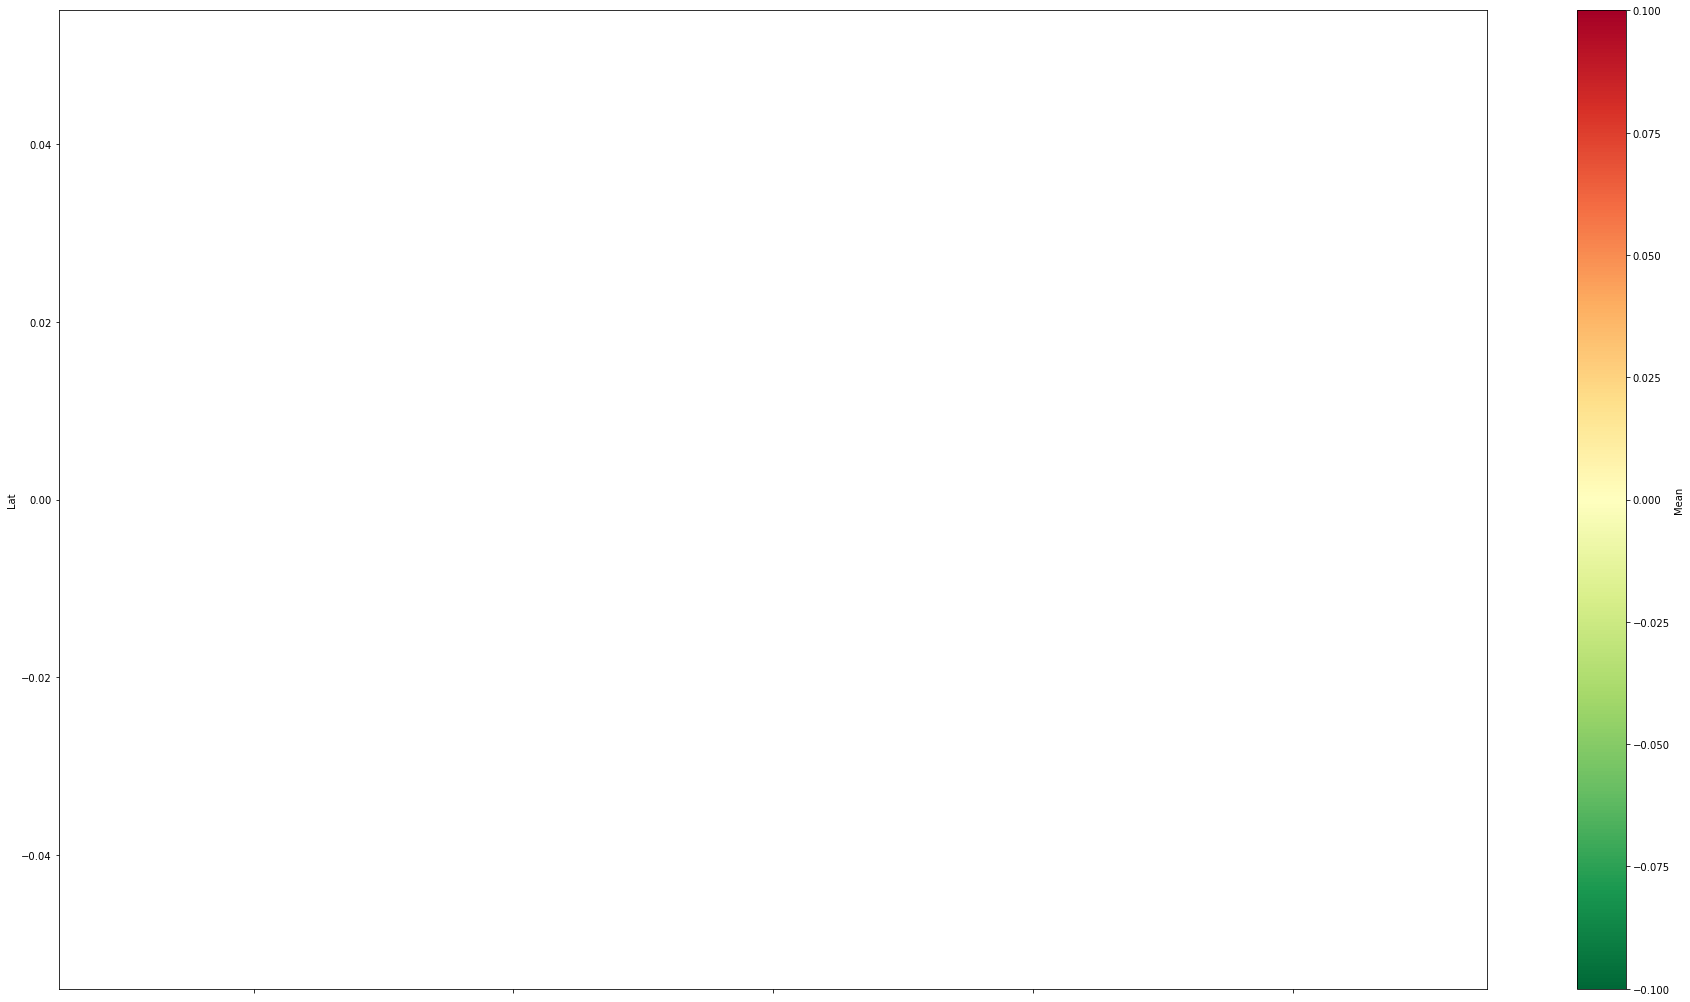

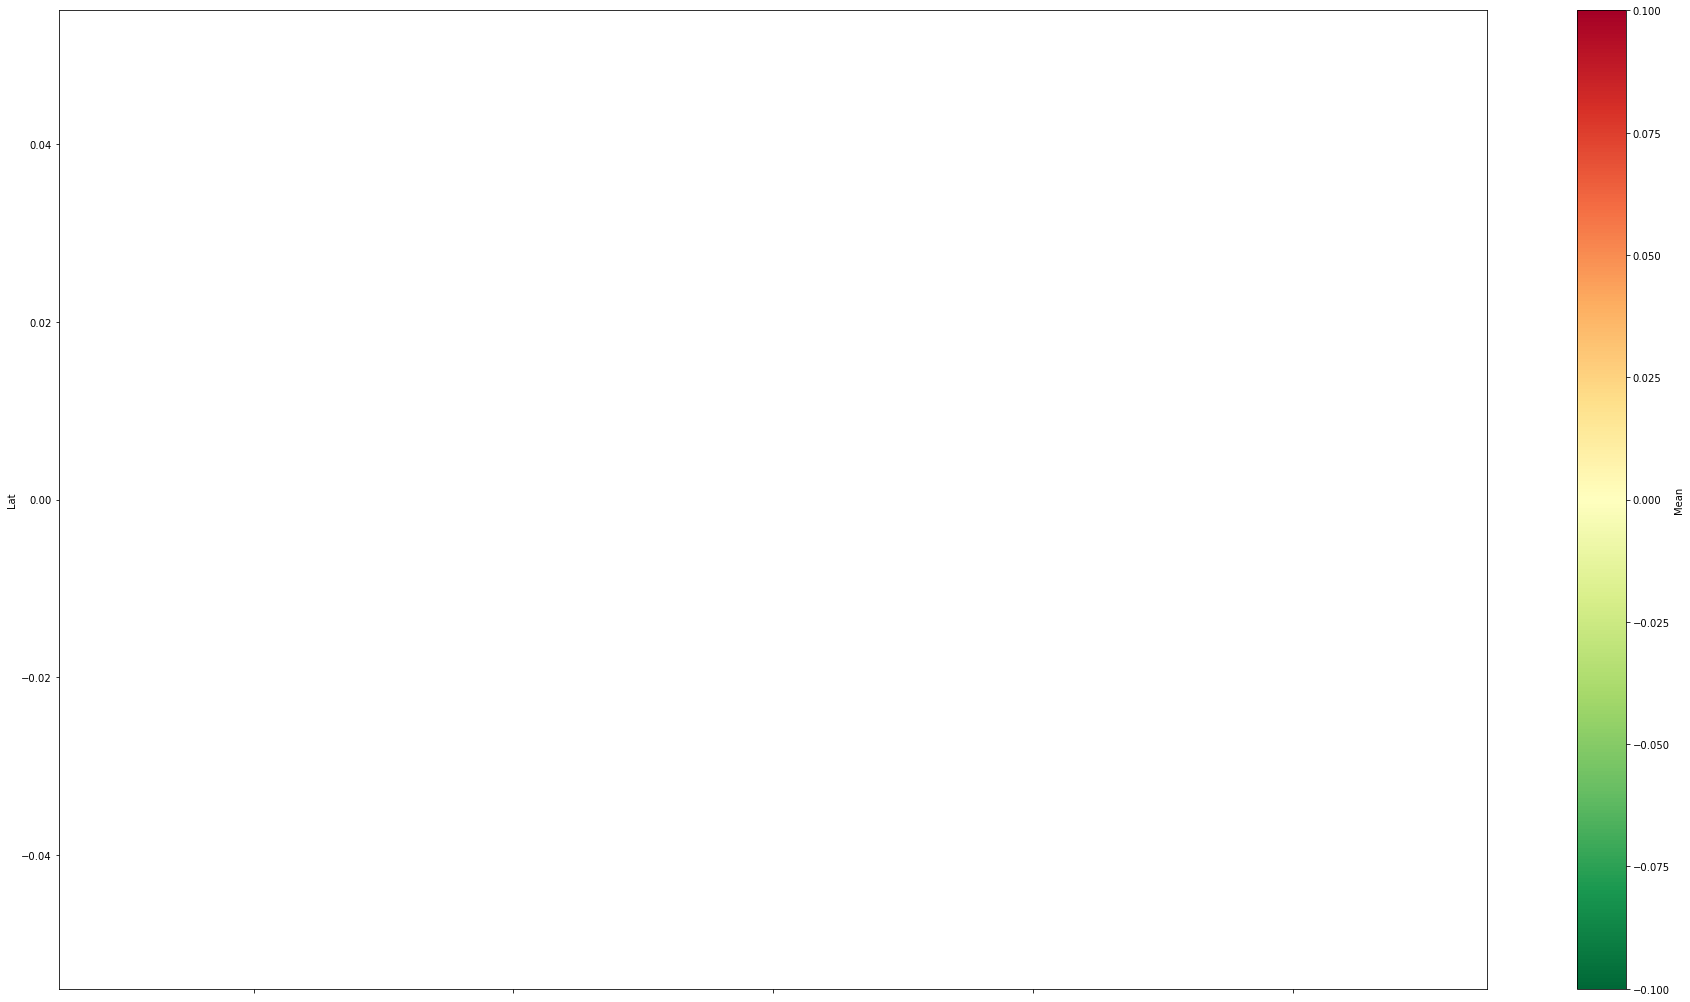

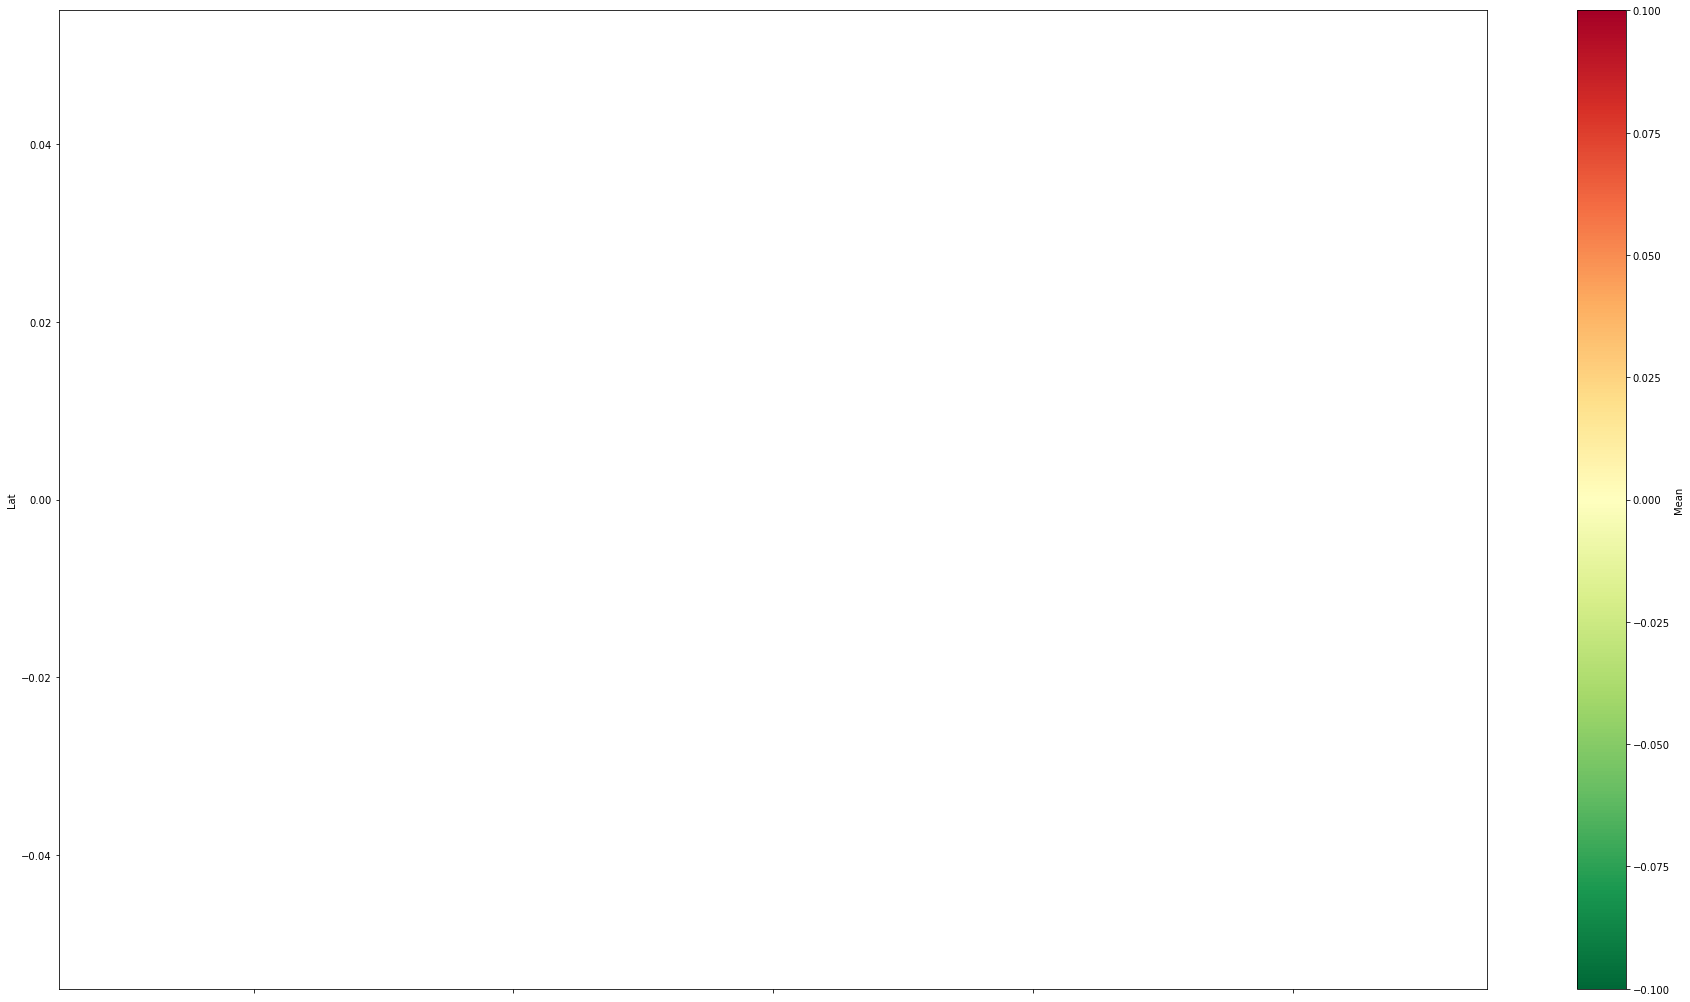

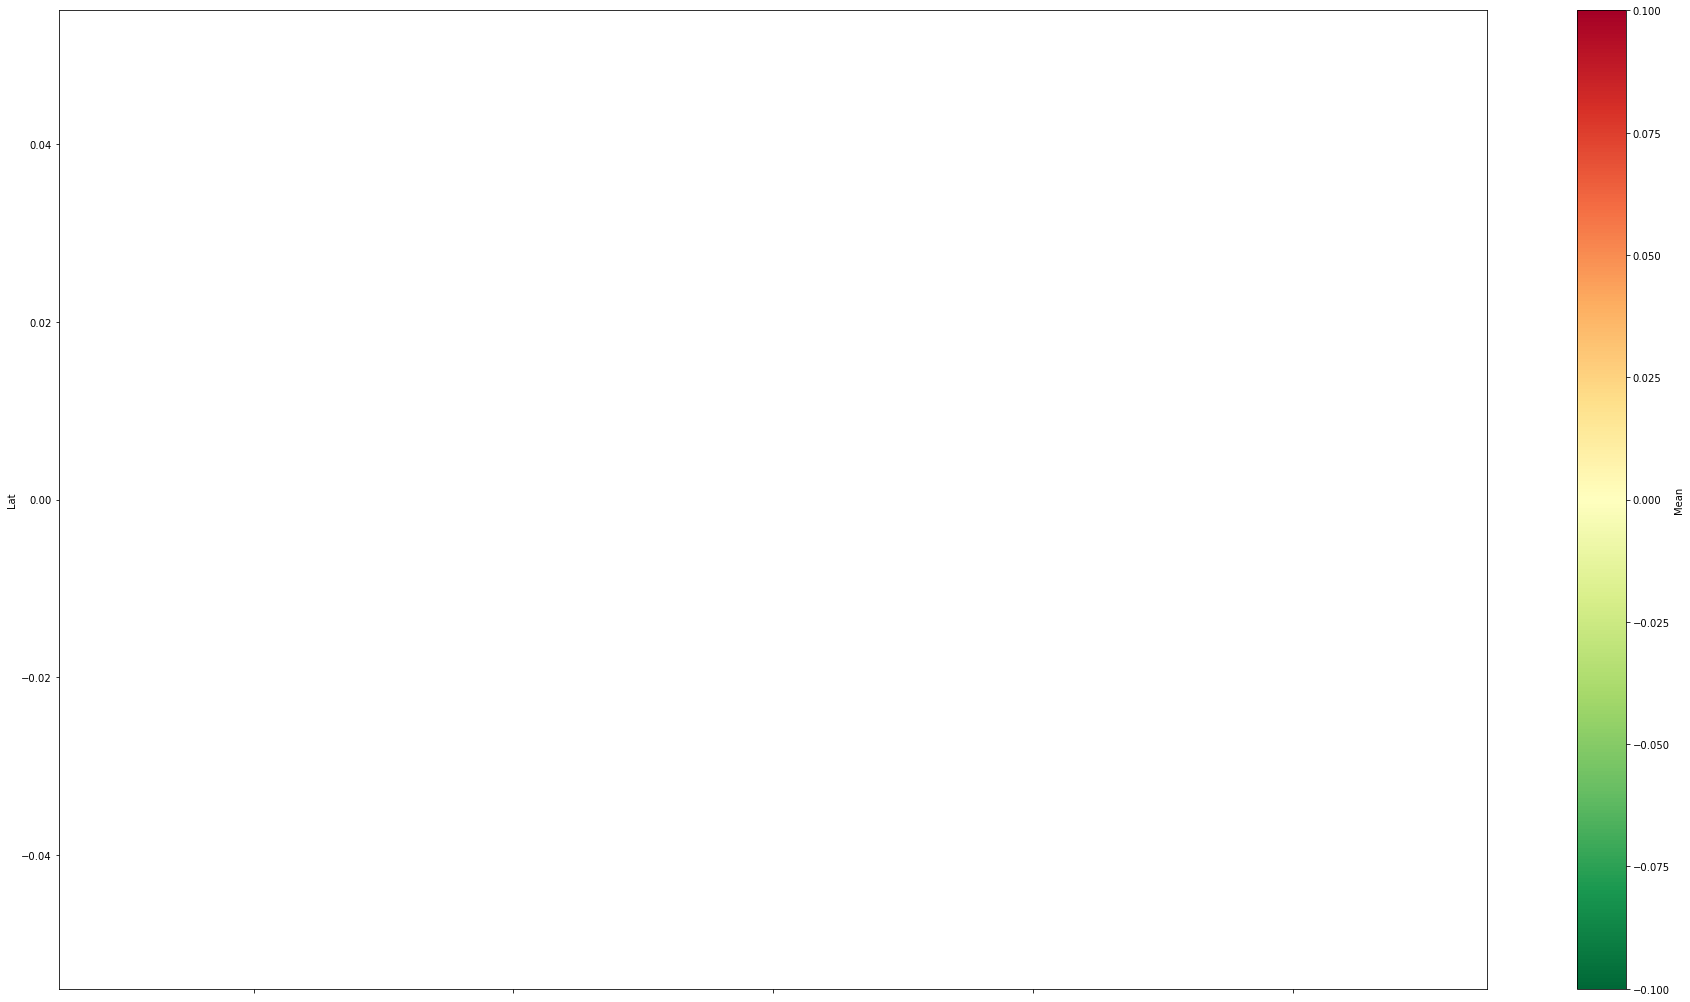

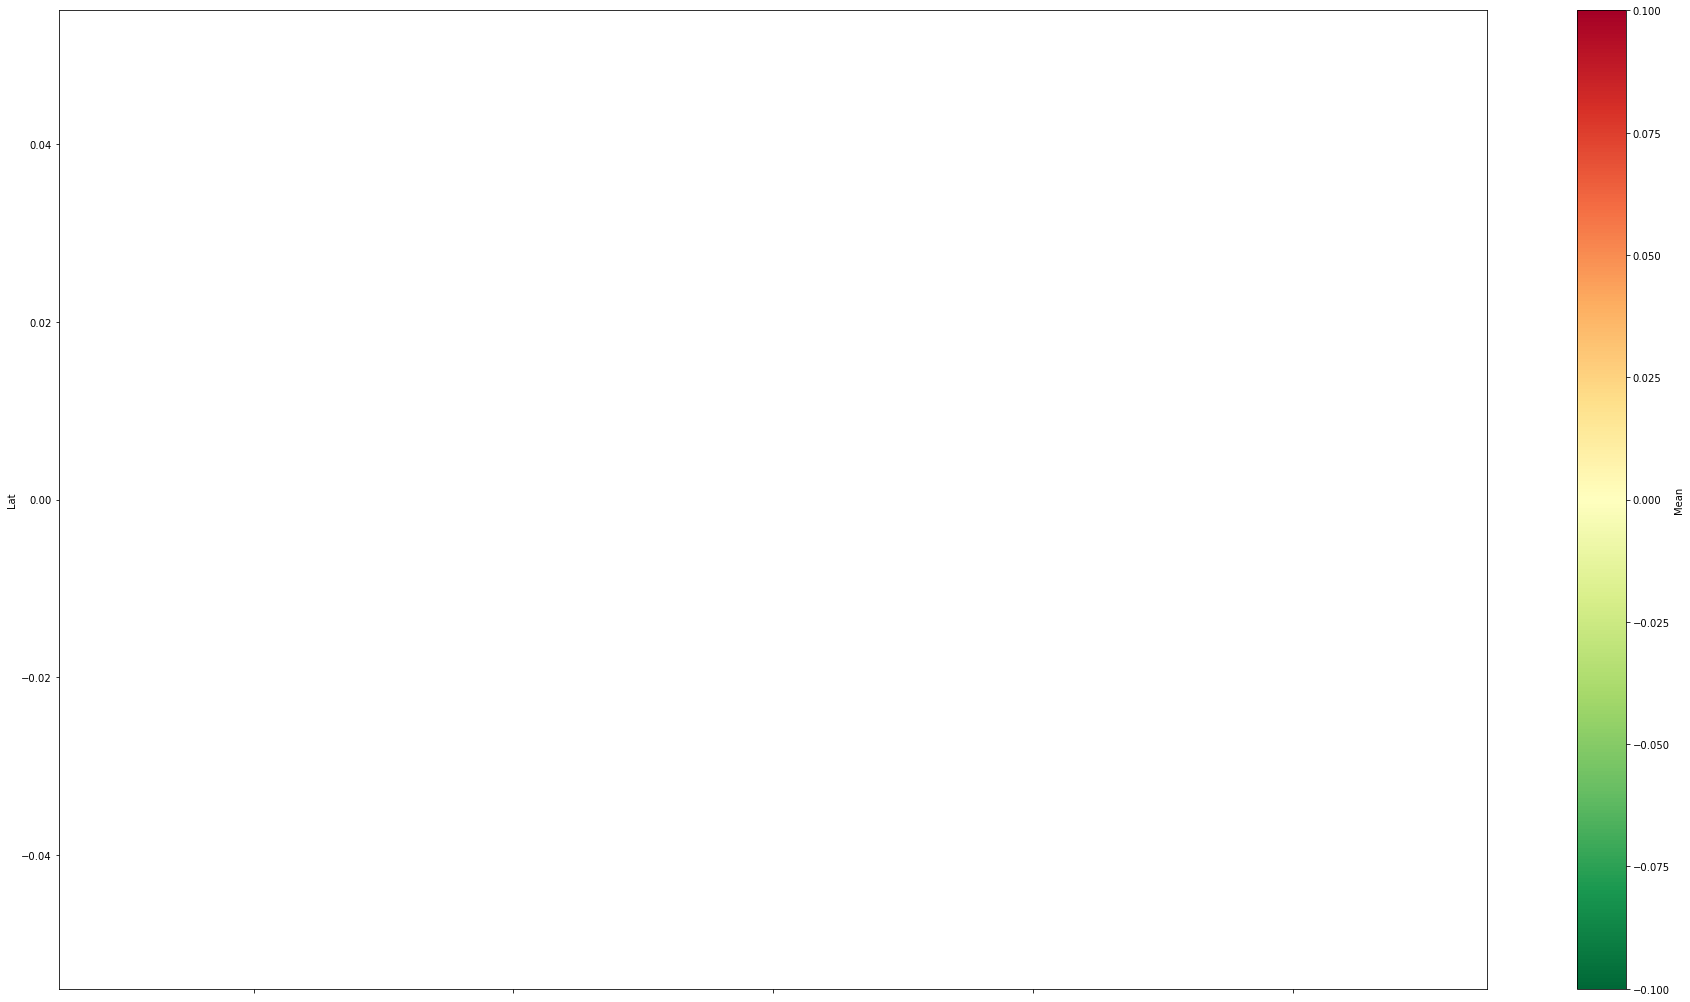

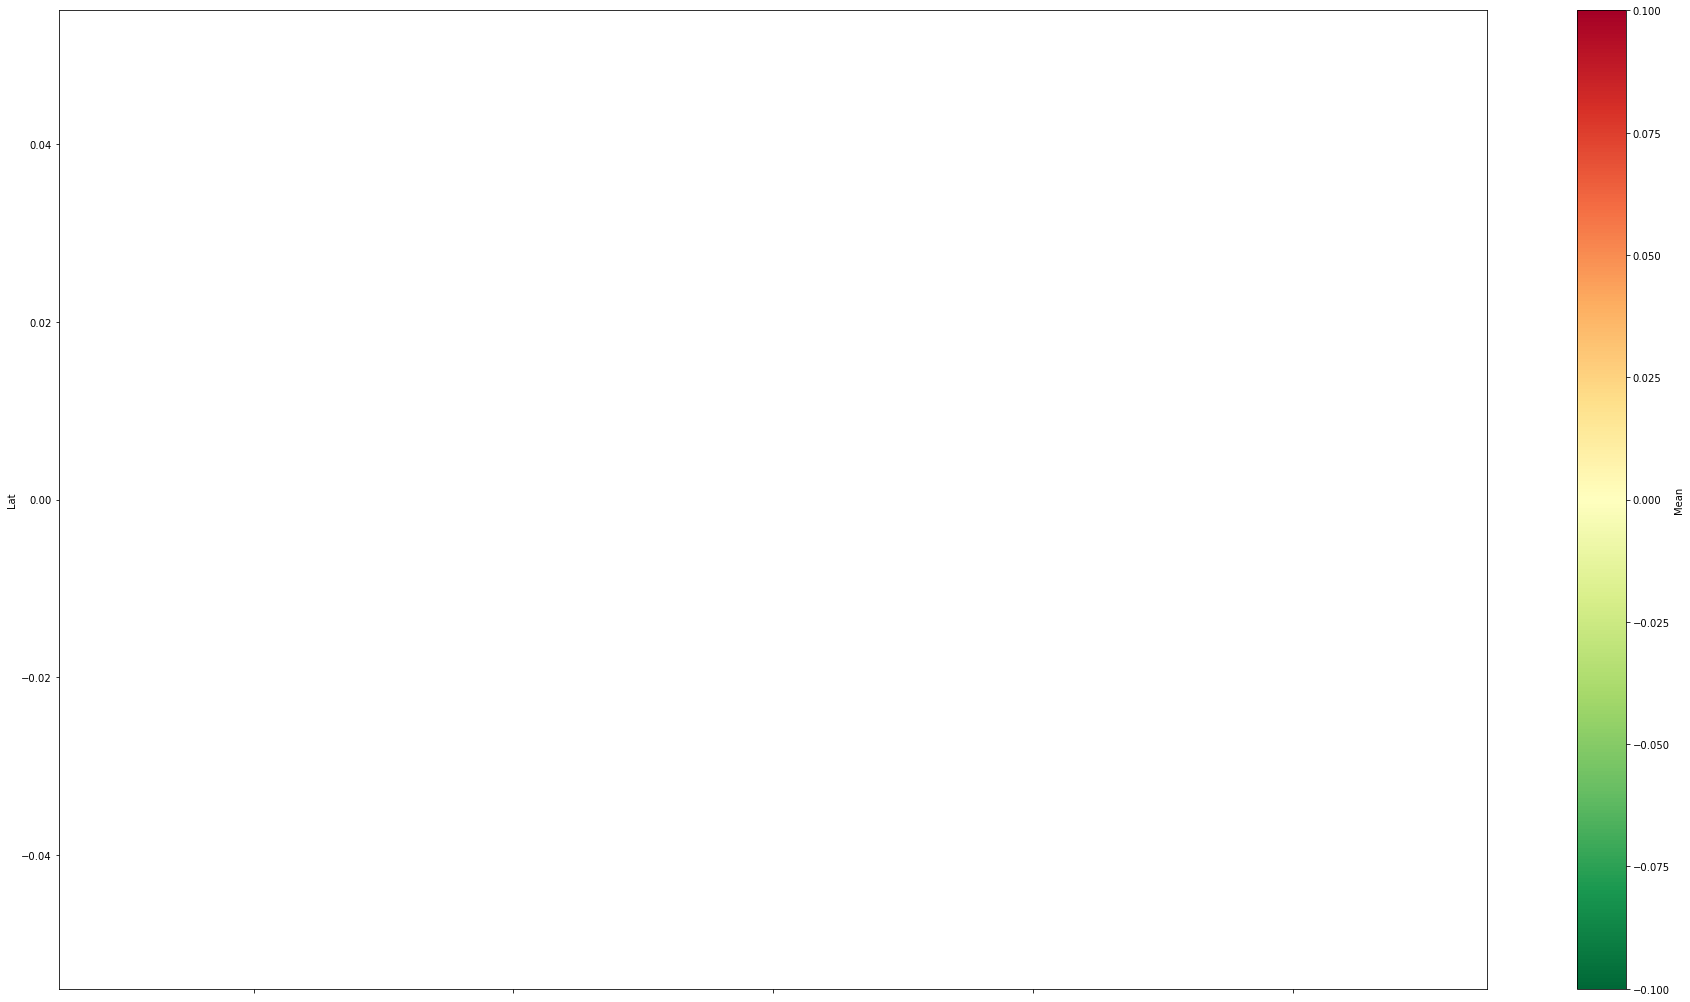

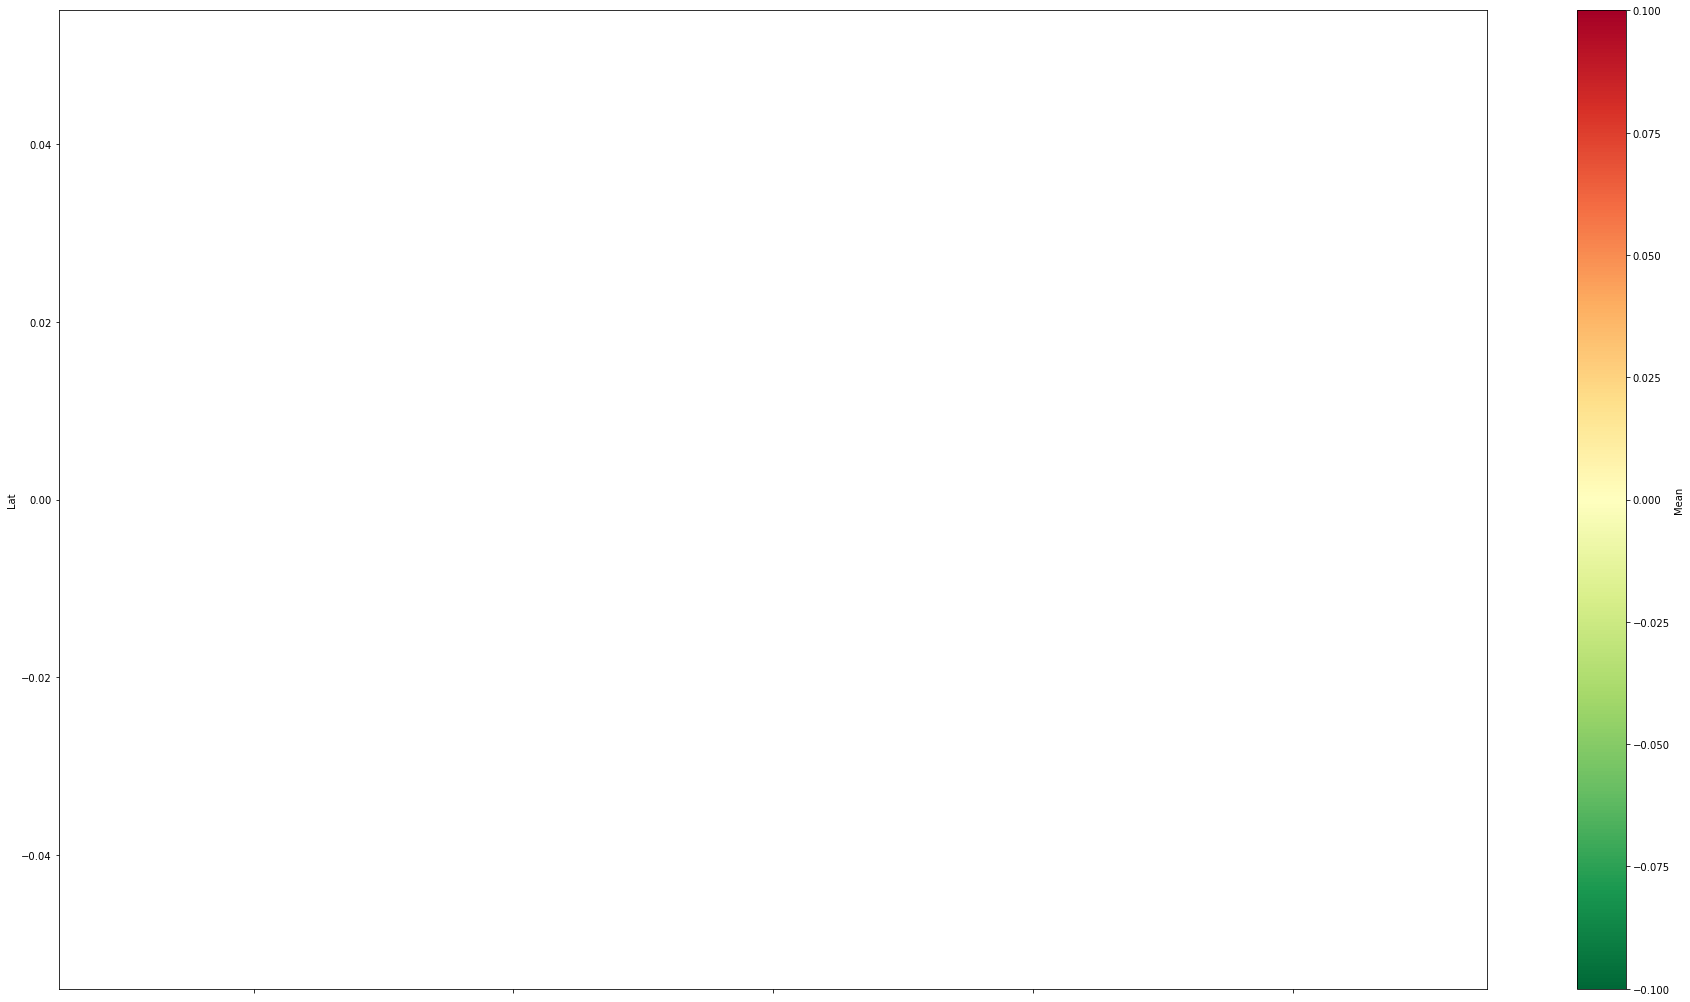

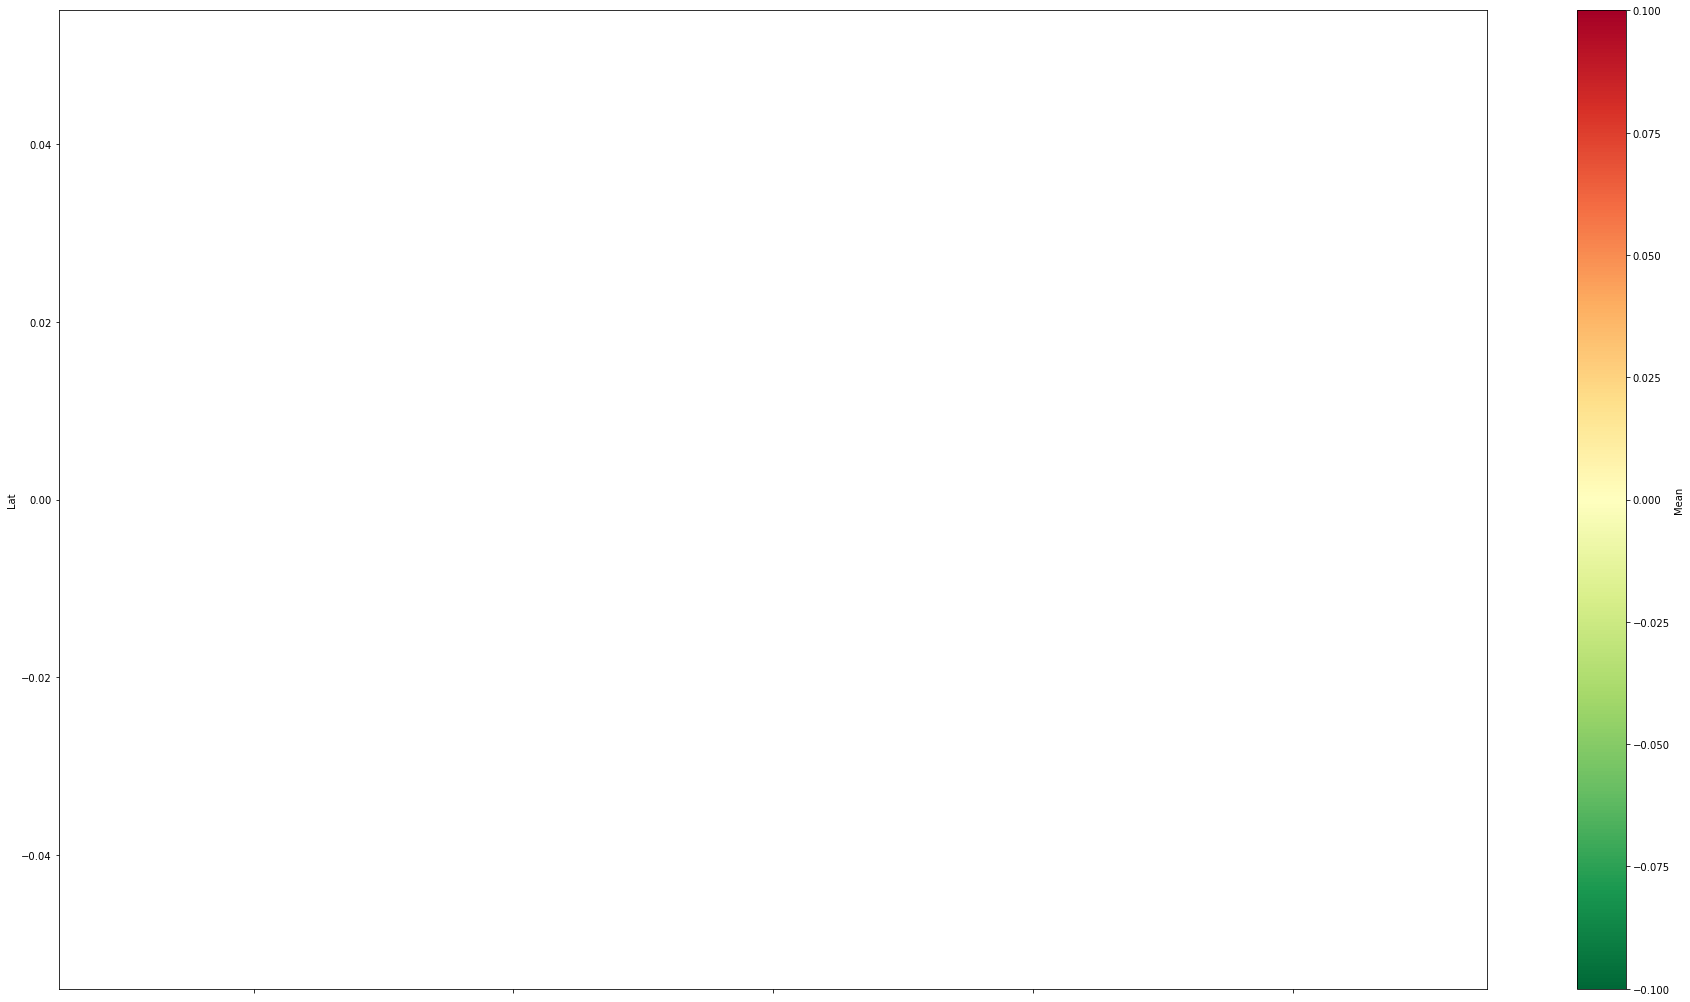

Error in callback <function flush_figures at 0x0000023756E8B1F0> (for post_execute):


KeyboardInterrupt: 

In [27]:
CountyGroup_df.plot(y='Lat', x='Lng', kind = 'scatter', figsize= [32,18], c='Mean', colormap= 'RdYlGn_r', s=2, xlabel='', ylabel='')

In [32]:
ID_Sev_City_df = Accident_Data_Starter_df[['ID', 'Severity', 'City', 'County', 'State']]
ID_Sev_City_df.head()

ID  Severity             City       County State
0  A-1         2       Greenville   Greenville    SC
1  A-2         2        Charlotte  Mecklenburg    NC
2  A-3         2        Los Gatos  Santa Clara    CA
3  A-4         2      Carson City      Douglas    NV
4  A-5         3  Fort Lauderdale      Broward    FL

In [33]:
ID_Sev_City_df['SpecCity'] = ID_Sev_City_df['City'] + ' ' + ID_Sev_City_df['State']

<ipython-input-33-93781f6f9df6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ID_Sev_City_df['SpecCity'] = ID_Sev_City_df['City'] + ' ' + ID_Sev_City_df['State']


In [34]:
ID_Sev_City_df

ID  Severity              City          County State  \
0              A-1         2        Greenville      Greenville    SC   
1              A-2         2         Charlotte     Mecklenburg    NC   
2              A-3         2         Los Gatos     Santa Clara    CA   
3              A-4         2       Carson City         Douglas    NV   
4              A-5         3   Fort Lauderdale         Broward    FL   
...            ...       ...               ...             ...   ...   
2906605  A-2906606         2           Houston          Harris    TX   
2906606  A-2906607         2            Colton  San Bernardino    CA   
2906607  A-2906608         2             Miami      Miami-Dade    FL   
2906608  A-2906609         2    Salt Lake City       Salt Lake    UT   
2906609  A-2906610         2  Colorado Springs         El Paso    CO   

                    SpecCity  
0              Greenville SC  
1               Charlotte NC  
2               Los Gatos CA  
3             Carson City NV  
4         Fort Lauderdale FL  
...                      ...  
2906605           Houston TX  
2906606            Colton CA  
2906607             Miami FL  
2906608    Salt Lake City UT  
2906609  Colorado Springs CO  

[2906610 rows x 6 columns]

In [31]:
SpecCityGroup_df = ID_Sev_City_df.groupby(['SpecCity'])

NameError: name 'ID_Sev_City_df' is not defined

In [ ]:
SpecCityGroup_df.count()

In [ ]:
SpecCityGroup_df.describe()

In [ ]:
SpecCityGroup_df['Severity'].value_counts()

In [ ]:
SpecCityGroup_df['Severity'].mean()

In [1]:
StateGroup_df = ID_Sev_City_df.groupby(['State'])

NameError: name 'ID_Sev_City_df' is not defined

In [ ]:
StateGroup_df['Severity'].mean()

In [ ]:
StateMeans_df = pd.DataFrame(StateGroup_df['Severity'].mean())
StateMeans_df

In [ ]:
type(StateMeans_df)

In [ ]:
x_values = StateMeans_df[{index}]
y_values = StateMeans_df["Severity"]
plt.bar(x_values,y_values)
plt.show

In [ ]:
# x_axis = np.arange(len(StateMeans_df))
# tick_locations = [value for value in x_axis]
# plt.figure(figsize=(20,3))
# plt.bar(x_axis, StateMeans_df[1], color='r', alpha=0.5, align="center")
# plt.xticks(tick_locations, StateMeans_df[0], rotation="vertical")

In [ ]:
StateMeans_df.describe()

In [ ]:
StateMeans_df

In [ ]:
StateMeans_df.plot(y='Severity', use_index=True,kind = 'bar',figsize = [16,9], ylim = [0,4], ylabel = 'Severity', colormap = 'autumn', sort_columns = True)

In [ ]:
CityMeans_df = pd.DataFrame(SpecCityGroup_df['Severity'].mean())

In [ ]:
CityMeans_df.describe()

In [ ]:
StateMeans_df.describe()